# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [1]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [17]:
HEXADECIMAL_BYTES = [
  0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xe0e8c8, 0xd8dcb8, 0xe0d4a0, 0xe0ccb0, 0xe0cca8, 0xe8cca8, 0xf0d8b0, 0xf0e4b0, 0xf0e0b0, 0xf0e0b8, 0xe8d0b0, 0xe0c4a8, 0xd8bc98, 0xd8b898, 0xd8b898, 0xd8bc98, 0xe0c4a0, 0xe8c8a8, 0xe8c4a0, 0xe8c0a8, 0xe8bca0, 0xe8b8a0, 0xd8b090, 0xd0ac88, 0xc09c78, 0xb08870, 0x987060, 0x986c58, 0xc8a458, 0xd0ac90, 0xc09c90, 0xa88468, 0x806458, 0x684838, 0x684028, 0x684028, 0x785830, 0xa08058, 0xa07c68, 0x906c50, 0x907048, 0x886448, 0x885040, 0xa06440, 0xd89058, 0xf0ac80, 0xf0d490, 0xf0e0a0, 0xf0dc98, 0xf0e0a0, 0xf0dc98, 0xf0d898, 0xf0cc90, 0xf0cc90, 0xf0c090, 0xf0b890, 0xc89c88, 0xc0a468, 0xc8b870, 0xb8b488, 0xb0b480, 0x989c78, 0x707458, 0x585830, 0x504c30, 0x484830, 0x484428, 0x404028, 0x404428, 0x404028, 0x484028, 0x404020, 0x404028, 0x404020, 0x404020, 0x404420, 0x404420, 0x404020, 0x484020, 0x404020, 0x403c20, 0x484420, 0x484428, 0x484428, 0x404028, 0x403c28, 0x484420, 0x484420, 0x484820, 0x484420, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xd0d4c0, 0xd0d0b0, 0xd8d4a8, 0xd8ccb0, 0xe0cca8, 0xe0d0a8, 0xf0d8b0, 0xf0e0b0, 0xf0e4b0, 0xf0e0b8, 0xf0d4b0, 0xe0c0a8, 0xd8b898, 0xd8bc98, 0xe0bc98, 0xe0b898, 0xe8c098, 0xe8c4a0, 0xe8c4a0, 0xe8bca0, 0xe0bca0, 0xe0c098, 0xd0b090, 0xc0a490, 0xb09080, 0xa07c68, 0x987450, 0x906850, 0xa88450, 0xb89888, 0xb08c80, 0x907060, 0x705450, 0x604028, 0x685030, 0x705438, 0x806848, 0x988060, 0x907468, 0x886848, 0x806050, 0x684030, 0x704028, 0x905830, 0xc07c48, 0xe89c78, 0xf0b878, 0xf0e8a0, 0xf0dc98, 0xf0dc98, 0xf0dc98, 0xf0d898, 0xf0c890, 0xf0c488, 0xf0b488, 0xf0b488, 0xc8a080, 0xb8a068, 0xc0b070, 0xc0b888, 0xb8b480, 0xa0a078, 0x707058, 0x585430, 0x504c30, 0x484c30, 0x484828, 0x484028, 0x484420, 0x403420, 0x403c20, 0x404028, 0x404020, 0x404020, 0x404020, 0x404020, 0x404020, 0x404020, 0x404020, 0x403c20, 0x404020, 0x404020, 0x404428, 0x404428, 0x404028, 0x504820, 0x403810, 0x403420, 0x403410, 0x403818, 0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xd0d8b8, 0xd0d0b0, 0xd8d4b0, 0xd8d0b0, 0xe0d0a8, 0xe8d0a8, 0xf0dcb0, 0xf0e0b8, 0xf0e8a8, 0xf0e0b8, 0xf0d8b0, 0xe0c8b0, 0xd8c098, 0xd8c0a0, 0xe0c098, 0xe0bca0, 0xe8c098, 0xe8c8a8, 0xf0c8a8, 0xe8bca0, 0xe0bca0, 0xe0bc98, 0xd8b490, 0xc8a888, 0xa88478, 0x987060, 0x987058, 0x987058, 0xa88850, 0xb08c70, 0xa07870, 0x886058, 0x705048, 0x684838, 0x685038, 0x786440, 0x907c48, 0xa08858, 0x886c60, 0x886c48, 0x806050, 0x784c30, 0x704030, 0x985830, 0xb87040, 0xe09468, 0xe8ac68, 0xf0ec98, 0xf0dca0, 0xf0dc98, 0xf0dc98, 0xf0d898, 0xf0cc98, 0xf0c090, 0xf0bc88, 0xf0b488, 0xc8a080, 0xc0a468, 0xb8ac70, 0xc0b488, 0xb8b880, 0xa0a478, 0x706c50, 0x585438, 0x504c30, 0x484c30, 0x484828, 0x383828, 0x686028, 0x585c38, 0x403c30, 0x404020, 0x404020, 0x404020, 0x404020, 0x404020, 0x404020, 0x404020, 0x404020, 0x403c20, 0x404020, 0x484020, 0x404420, 0x404020, 0x383820, 0x808420, 0x808450, 0x605850, 0x504420, 0x504c28, 0xf0f0c0, 0xf0f0d0, 0xf0f0e0, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xe0e0c0, 0xd8dcb0, 0xd8d8b0, 0xd8d0b0, 0xe0cca8, 0xe0cca8, 0xe8d8a8, 0xf0dcb0, 0xf0e8b0, 0xf0e4b8, 0xe8d8b0, 0xe8d0b0, 0xd8c098, 0xd8c098, 0xe0c098, 0xe8c0a0, 0xe8c098, 0xf0c4a8, 0xf0c8a8, 0xe8c0a0, 0xe0bca0, 0xd8b898, 0xd0b098, 0xc0a090, 0xa88478, 0x987858, 0x987458, 0x987458, 0xa08050, 0xa88c78, 0xa08068, 0x886858, 0x684c40, 0x684c38, 0x685038, 0x786440, 0x807048, 0x907458, 0x886850, 0x886448, 0x785440, 0x704828, 0x784838, 0x905430, 0xa86848, 0xd08868, 0xd89868, 0xf0dc88, 0xf0eca0, 0xf0dc98, 0xf0d898, 0xf0dc98, 0xf0cc90, 0xf0b890, 0xf0b888, 0xf0b088, 0xd0a480, 0xb8a468, 0xb0a870, 0xc0b880, 0xb8b880, 0xa8a478, 0x706c50, 0x584c38, 0x505030, 0x484c30, 0x484428, 0x484428, 0x807c30, 0x686c50, 0x383c38, 0x404028, 0x404020, 0x404020, 0x404020, 0x404020, 0x404428, 0x404020, 0x404020, 0x403c20, 0x403c20, 0x403c20, 0x484020, 0x484028, 0x404020, 0xa0a840, 0xa0b078, 0x808480, 0x707448, 0x808c60, 0xe0e0b0, 0xf0f0c8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xe0e4c0, 0xd8dcb8, 0xd8d8b0, 0xd8d0a8, 0xe0cca8, 0xe0cca0, 0xf0d8a8, 0xf0dcb0, 0xf0ecb0, 0xf0e8b8, 0xf0dcb8, 0xe8d4b0, 0xd8c4a0, 0xd8c098, 0xe0c098, 0xe0bca0, 0xe8c4a0, 0xf0c8a8, 0xf0c8a8, 0xe8c4a0, 0xe0c098, 0xe0bc98, 0xd0b088, 0xb89880, 0xa88070, 0x987460, 0x987858, 0x907460, 0x907058, 0x987460, 0xa88460, 0x886c60, 0x786050, 0x705c40, 0x685c38, 0x706838, 0x807448, 0x887448, 0x886448, 0xa88448, 0xa88868, 0x705450, 0x805430, 0x905c30, 0xa86c48, 0xc07c68, 0xd89050, 0xf0c080, 0xf0d4a0, 0xf0dc98, 0xf0d898, 0xf0d498, 0xf0cc90, 0xf0bc90, 0xf0b888, 0xf0b488, 0xd0a480, 0xc0a468, 0xb8a870, 0xc0bc80, 0xb8bc88, 0xa8a480, 0x707050, 0x585038, 0x505030, 0x505430, 0x484c30, 0x404430, 0x788440, 0x687050, 0x384030, 0x404028, 0x403c28, 0x403c20, 0x404020, 0x403c20, 0x403820, 0x403c20, 0x404020, 0x383820, 0x383020, 0x302c18, 0x403c20, 0x484420, 0x384020, 0x989c40, 0x909c70, 0x686c70, 0x707c40, 0x90a070, 0xe0e0a8, 0xf0f0c8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xe8e8c0, 0xd8d8b8, 0xd0ccb0, 0xd8cca8, 0xd8cca8, 0xe0d0a0, 0xe8d8a8, 0xe8d8b0, 0xf0e0b8, 0xf0e4b8, 0xe8d4b0, 0xe0c8a8, 0xd8c0a0, 0xd8c0a0, 0xe0c498, 0xe8c4a0, 0xf0cca8, 0xf0c8a8, 0xf0c8a8, 0xf0c8a8, 0xe0b898, 0xd0ac98, 0xc0a488, 0xb89478, 0xa08070, 0x907458, 0x987858, 0x987c60, 0x987860, 0x987c58, 0xa08468, 0xa08c68, 0x887468, 0x685c48, 0x706048, 0x706438, 0x807448, 0x806c48, 0x987c50, 0xb8a050, 0xb0a070, 0x806868, 0x785438, 0x906038, 0xa87040, 0xc88868, 0xc08050, 0xf0b078, 0xf0d890, 0xf0dc98, 0xf0d098, 0xf0d498, 0xf0cc90, 0xf0bc90, 0xf0b888, 0xf0b488, 0xc8a480, 0xc0a468, 0xb8ac70, 0xc0b478, 0xb0b080, 0xa8a880, 0x707050, 0x585438, 0x505030, 0x505030, 0x484830, 0x404428, 0x788038, 0x686c50, 0x383c28, 0x403820, 0x383420, 0x403c20, 0x403c20, 0x383c20, 0x403c20, 0x403c20, 0x383c20, 0x484418, 0x505030, 0x505030, 0x606840, 0x383418, 0x403c18, 0x909048, 0x888c60, 0x707068, 0x687428, 0x788458, 0xe8e8a8, 0xf0f0c8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xe8f0c8, 0xe0e4c0, 0xd0d0b0, 0xd8cca0, 0xd8c8a8, 0xe0d0a0, 0xf0d8a8, 0xf0d8a8, 0xf0d8b0, 0xe8d4b0, 0xe8d4b0, 0xe0c8a8, 0xd0b898, 0xd8bc98, 0xe0c098, 0xe8c8a8, 0xf0cca8, 0xf0c8a8, 0xf0c8a8, 0xf0c8a8, 0xe0bc98, 0xd0ac98, 0xc09c80, 0xb09070, 0x987c68, 0x907858, 0x907858, 0xa08c70, 0xa08c68, 0xa08468, 0x987c60, 0x988468, 0x908470, 0x686048, 0x685c48, 0x685830, 0x807040, 0x807048, 0x988048, 0xb09860, 0xa08868, 0x806858, 0x785438, 0x885c30, 0xc08c40, 0xd09488, 0xc07c50, 0xe8a460, 0xf0d490, 0xf0dca0, 0xf0d498, 0xf0d498, 0xf0d090, 0xf0bc90, 0xf0b888, 0xf0b488, 0xc8a080, 0xc0a068, 0xb8ac70, 0xc0b880, 0xb0ac80, 0xb0ac80, 0x707058, 0x605838, 0x505030, 0x505430, 0x484830, 0x384028, 0x787c40, 0x687448, 0x404430, 0x404430, 0x484830, 0x404028, 0x403c20, 0x403c20, 0x403c20, 0x403c20, 0x383820, 0x586020, 0x586858, 0x586c40, 0x809450, 0x303c38, 0x403c18, 0x787430, 0x686838, 0x686850, 0x707830, 0x788460, 0xe8ecb8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xe8f0c8, 0xe0e4b8, 0xd8d0b8, 0xd8cca8, 0xd8c8a8, 0xe0d0a0, 0xe8d4a8, 0xf0d8b0, 0xe8d4b0, 0xe8d8b0, 0xe8d8b0, 0xe0cca8, 0xd8bc98, 0xd8b890, 0xe0c498, 0xf0cca0, 0xf0cca8, 0xf0cca8, 0xf0cca8, 0xf0c8a8, 0xd8b898, 0xd0ac98, 0xb8a088, 0xa88c78, 0x988068, 0x907850, 0x988050, 0xa89068, 0xa89468, 0xa08c70, 0x988870, 0xa09870, 0x989478, 0x686050, 0x685848, 0x685830, 0x807040, 0x887448, 0x987c50, 0x987c58, 0x887050, 0x785838, 0x785038, 0x805830, 0xc09840, 0xc89490, 0xc08458, 0xe0a068, 0xf0d488, 0xf0e0a0, 0xf0d498, 0xf0d098, 0xf0c890, 0xf0b890, 0xf0b888, 0xe8b488, 0xc09c88, 0xc0a470, 0xc0b470, 0xc0b480, 0xa8a888, 0xb0ac78, 0x706c58, 0x605838, 0x505030, 0x505038, 0x484c30, 0x404028, 0x788440, 0x687850, 0x404828, 0x484c30, 0x484830, 0x383c30, 0x404028, 0x384020, 0x383c20, 0x383c20, 0x383820, 0x505c18, 0x606c50, 0x707c48, 0x788848, 0x283440, 0x403c30, 0x787838, 0x707440, 0x686850, 0x687028, 0x788058, 0xe8f0c0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xe8f0c8, 0xe0e4c0, 0xd8d4b8, 0xd8d0a0, 0xd8cca8, 0xe0cca0, 0xe8d0b0, 0xe8d0a0, 0xf0d8a8, 0xe8d8a8, 0xe8d4a8, 0xe0cca8, 0xe0c4a0, 0xe0c4a0, 0xe0c498, 0xf0cca0, 0xf0cca8, 0xf0d0b0, 0xf0ccb0, 0xf0c8a8, 0xd8b898, 0xc8ac90, 0xc0a480, 0xa08c70, 0x907860, 0x887050, 0x988058, 0xa08868, 0xa09070, 0xa08c68, 0x988c68, 0x989070, 0xa09868, 0x686850, 0x706848, 0x685c38, 0x807438, 0x887848, 0x806848, 0x786040, 0x785c40, 0x685038, 0x705038, 0x805828, 0xa88838, 0xd0ac80, 0xb88068, 0xe09850, 0xf0b880, 0xf0d498, 0xf0d498, 0xf0d098, 0xf0cc90, 0xf0b088, 0xf0b088, 0xe8b088, 0xc09880, 0xb89860, 0xb8ac68, 0xc0b880, 0xb0a880, 0xa8a870, 0x707068, 0x585c38, 0x505030, 0x505430, 0x484c30, 0x404428, 0x788840, 0x687850, 0x405028, 0x505838, 0x505c38, 0x404030, 0x383c28, 0x383c20, 0x383c20, 0x383820, 0x383820, 0x484c18, 0x607040, 0x788858, 0x889460, 0x303c50, 0x404028, 0x807c38, 0x787840, 0x686c58, 0x606030, 0x707858, 0xe8e8b8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xf0f0c0, 0xe0e0c8, 0xd8d8b0, 0xd0cca8, 0xd0c8a8, 0xd8c8a0, 0xe0d0a8, 0xe0d0a8, 0xe8dca8, 0xe8dcb0, 0xe8d8b0, 0xe8d0a0, 0xe0c498, 0xe0c498, 0xe0c4a0, 0xf0d0a0, 0xf0d0a8, 0xf0d0b0, 0xf0ccb0, 0xe8c4a8, 0xd8b498, 0xc8a898, 0xb89c80, 0x988070, 0x987c58, 0x907858, 0xa08c58, 0xa08c70, 0xa09070, 0xa09068, 0x908468, 0x888068, 0x888458, 0x787458, 0x706838, 0x686038, 0x706438, 0x786440, 0x604c38, 0x685030, 0x685830, 0x685838, 0x605038, 0x604428, 0x886830, 0xc09860, 0xa87460, 0xc88450, 0xe8ac78, 0xf0e098, 0xf0d8a0, 0xf0d498, 0xf0c890, 0xf0ac88, 0xf0b488, 0xe8b488, 0xc09c88, 0xb09868, 0xc0b060, 0xb8b480, 0xa0a488, 0xa8ac70, 0x788060, 0x586040, 0x505430, 0x505438, 0x505030, 0x404428, 0x788040, 0x687448, 0x405028, 0x485038, 0x505438, 0x383c38, 0x383c28, 0x383c20, 0x383c20, 0x403820, 0x383820, 0x404818, 0x787c48, 0x687440, 0x808048, 0x303450, 0x383820, 0x807830, 0x807840, 0x706458, 0x605828, 0x888c58, 0xf0f0c8, 0xf0f0d8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xf0f0d0, 0xe8e8d0, 0xd8d0b0, 0xd0c4a0, 0xd0c0a0, 0xd0c098, 0xe0cca8, 0xe8d0a8, 0xe8d4a0, 0xe8d4a8, 0xe0cca8, 0xe0cca0, 0xe0c8a0, 0xe0c8a0, 0xe8c8a0, 0xf0cca0, 0xf0d0a8, 0xf0d0a8, 0xf0cca8, 0xe8c4a0, 0xd8b498, 0xc8a888, 0xb89880, 0x907068, 0x907450, 0x907458, 0xa08860, 0xa08c70, 0xa89470, 0xa09068, 0x888468, 0x989460, 0x787c68, 0x808050, 0x706840, 0x685c38, 0x706438, 0x786840, 0x685438, 0x706038, 0x685840, 0x604c38, 0x685c30, 0x604c30, 0x785428, 0xb08848, 0xb08058, 0xc88858, 0xe8a068, 0xf0c890, 0xf0d498, 0xf0d098, 0xf0c498, 0xf0a888, 0xf0b488, 0xe8b088, 0xc09c80, 0xb8a068, 0xc0b468, 0xb8b488, 0xa0a080, 0x989c60, 0x707860, 0x606040, 0x505830, 0x505030, 0x505030, 0x404428, 0x787c40, 0x687448, 0x485030, 0x485038, 0x505838, 0x384038, 0x383c20, 0x383c20, 0x383c20, 0x403820, 0x383820, 0x484c18, 0x787c50, 0x687048, 0x707858, 0x384048, 0x504c30, 0x807840, 0x806848, 0x786048, 0x605428, 0x808458, 0xf0f0d0, 0xf0f0d8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d0, 0xd0d0c0, 0xc8bc98, 0xd0c0a0, 0xd0c0a0, 0xe0d0a8, 0xe0d0a8, 0xe0d0a8, 0xe0cca8, 0xe0cca8, 0xe0c8a0, 0xe0c8a0, 0xe0c8a0, 0xe8c8a0, 0xf0cca8, 0xf0d0a8, 0xf0d0b0, 0xf0d0a8, 0xe0c0a8, 0xd0b098, 0xb89c88, 0xa89078, 0x907460, 0x907850, 0x907858, 0xa08c60, 0xa09478, 0xa09478, 0x908868, 0x908c78, 0x909060, 0x707468, 0x706c40, 0x686438, 0x787448, 0x686c38, 0x686438, 0x605c30, 0x706838, 0x605c48, 0x605038, 0x605830, 0x685430, 0x604c30, 0xa88448, 0xa07450, 0xb07450, 0xd89460, 0xf0bc80, 0xf0d498, 0xf0d098, 0xf0cc90, 0xf0b088, 0xf0b080, 0xe0ac80, 0xc09c80, 0xb0a068, 0xc0b068, 0xb8b880, 0xa0a480, 0x989c68, 0x707860, 0x606838, 0x505830, 0x505030, 0x505030, 0x404028, 0x808038, 0x687448, 0x484c30, 0x585838, 0x585838, 0x404038, 0x383820, 0x383c20, 0x383c20, 0x383820, 0x403c28, 0x404418, 0x687040, 0x607048, 0x809860, 0x506058, 0x606440, 0x786c48, 0x886440, 0x806050, 0x685428, 0x908c58, 0xf0f0c0, 0xf0f0d0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xe0e4d0, 0xd0d098, 0xd0c8a8, 0xd8cca0, 0xe8d4a8, 0xe8d4a8, 0xe8d0a8, 0xe0d0a8, 0xe0cca8, 0xe0c8a0, 0xe0c8a0, 0xe0c8a0, 0xe8cca0, 0xf0d0a8, 0xf0d0a8, 0xf0cca8, 0xf0cca8, 0xe0c4a8, 0xd0b090, 0xb89c80, 0xa08c70, 0x887460, 0x907c58, 0x907c60, 0x907c60, 0x908860, 0xa09c68, 0x989068, 0x908c78, 0x787458, 0x786c50, 0x706840, 0x605838, 0x787848, 0x706c38, 0x605c40, 0x605830, 0x585038, 0x686030, 0x605440, 0x685430, 0x685830, 0x685428, 0xa08038, 0x987448, 0xa87450, 0xd09050, 0xf0b880, 0xf0d498, 0xf0cc90, 0xf0c890, 0xf0bc98, 0xf0c088, 0xe8b888, 0xc0a088, 0xb8a060, 0xc0b468, 0xc0b888, 0xa0a480, 0xa0a068, 0x707860, 0x606040, 0x505838, 0x505030, 0x505030, 0x404028, 0x808040, 0x687450, 0x485028, 0x505438, 0x585838, 0x404038, 0x383c28, 0x383c20, 0x404020, 0x404028, 0x404428, 0x384420, 0x607040, 0x587048, 0x708468, 0x506c40, 0x708058, 0x888058, 0x907050, 0x886858, 0x584830, 0x808048, 0xf0f0c0, 0xf0f0d0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xf0f0d8, 0xd0d0a8, 0xd0c8b0, 0xd0c0a0, 0xd8c8a0, 0xd8cca0, 0xe0d0a8, 0xe0d0a8, 0xe0d0a8, 0xd8c8a0, 0xe0c8a0, 0xe0c8a0, 0xe8cca0, 0xe8d0a8, 0xe8d0a8, 0xe8cca8, 0xe8c8a8, 0xd8c0a8, 0xc0ac98, 0xb09880, 0xa08878, 0x907c60, 0x907c58, 0x908060, 0x907c68, 0x807460, 0x908858, 0x908c68, 0x807c60, 0x787050, 0x787448, 0x706850, 0x605840, 0x706c50, 0x606428, 0x605c48, 0x605438, 0x484438, 0x605430, 0x605038, 0x605430, 0x685438, 0x685030, 0x806030, 0x906c38, 0xa07458, 0xc88c50, 0xf0bc78, 0xf0dc98, 0xf0cc90, 0xf0cc90, 0xf0c890, 0xf0c090, 0xe8b880, 0xc0a088, 0xa89460, 0xb0a868, 0xb8b480, 0xa0a080, 0x989870, 0x686858, 0x585430, 0x585830, 0x505030, 0x504c30, 0x383c28, 0x787c38, 0x607048, 0x505430, 0x505438, 0x505438, 0x404038, 0x403c28, 0x383c20, 0x403c20, 0x404028, 0x404028, 0x304020, 0x587840, 0x608460, 0x587858, 0x506c48, 0x687450, 0x807458, 0x906c50, 0x906458, 0x604830, 0x908848, 0xe8f0c0, 0xe8f0c0, 0xf0f0d8, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xe8f0d8, 0xe0dca8, 0xc8c4b0, 0xd0bc98, 0xd8c498, 0xd0c4a0, 0xd8c8a0, 0xd8cca0, 0xd8c8a0, 0xd8c4a0, 0xe0c498, 0xe0c4a0, 0xe8cca8, 0xe8cca0, 0xe8d0a0, 0xe8d0a8, 0xe8c8a8, 0xe0c0a0, 0xc0a490, 0xb09880, 0x988068, 0x887458, 0x887858, 0x887458, 0x887858, 0x807458, 0x887c50, 0x807c58, 0x787458, 0x787450, 0x787450, 0x706c50, 0x605c38, 0x787448, 0x585430, 0x585030, 0x605430, 0x504430, 0x504428, 0x604c28, 0x584830, 0x786428, 0x604c38, 0x684820, 0x805428, 0xa07048, 0xb88040, 0xe0a468, 0xf0d490, 0xf0cc98, 0xf0cc90, 0xf0c490, 0xf0c090, 0xe8b880, 0xc0a080, 0xa89460, 0xa89c60, 0xb8ac88, 0xa09c78, 0x908c58, 0x706c50, 0x585838, 0x585830, 0x505038, 0x484c30, 0x404028, 0x787c40, 0x607048, 0x505830, 0x505c38, 0x606440, 0x383c38, 0x403c28, 0x383c20, 0x403c20, 0x404028, 0x383c20, 0x384428, 0x607838, 0x608468, 0x587460, 0x506850, 0x687858, 0x807458, 0x906c58, 0x906858, 0x604c30, 0x989450, 0xe8ecc8, 0xf0f0c0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xf0f0d0, 0xe0e0b0, 0xc8bcb0, 0xc8bc98, 0xc8c098, 0xc8bc98, 0xd0c498, 0xd0c4a0, 0xd0c498, 0xd8c898, 0xd8c898, 0xe0c4a0, 0xe8cca8, 0xe8d0a8, 0xe0c8a8, 0xe8c8a8, 0xe0c8a8, 0xd8bca0, 0xb8a490, 0xa89480, 0x907c68, 0x887450, 0x887c58, 0x888058, 0x787058, 0x807458, 0x808058, 0x808060, 0x707450, 0x706c50, 0x686c48, 0x686450, 0x504438, 0x605030, 0x605838, 0x585030, 0x605430, 0x504438, 0x504428, 0x585428, 0x584c30, 0x685828, 0x705848, 0x685028, 0x806038, 0x906848, 0xa06840, 0xd09458, 0xf0c478, 0xf0d490, 0xf0cc90, 0xf0bc90, 0xf0bc88, 0xe8bc80, 0xc0a080, 0xa09460, 0xa09c60, 0xb8b088, 0xa09c80, 0x888c58, 0x706c50, 0x585438, 0x585838, 0x585430, 0x484c38, 0x484c28, 0x808440, 0x687050, 0x485430, 0x606440, 0x606448, 0x383c38, 0x404028, 0x403c20, 0x404020, 0x404020, 0x383c28, 0x304028, 0x587030, 0x587860, 0x506860, 0x506448, 0x707858, 0x807858, 0x907058, 0x906c58, 0x685438, 0x908c48, 0xe8f0d0, 0xf0f0c0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xe8e8c8, 0xc0b8b0, 0xc8b490, 0xc8b898, 0xc8bc98, 0xc8b898, 0xd0bc98, 0xd0bc98, 0xd0bc98, 0xd8c098, 0xd8c098, 0xe0c8a0, 0xe0c8a0, 0xe8c8a8, 0xe8c4a8, 0xe0c0a0, 0xd0b898, 0xb8a488, 0xa08c78, 0x887068, 0x887058, 0x908060, 0x908060, 0x787450, 0x807c50, 0x787458, 0x707048, 0x686440, 0x787448, 0x706c48, 0x686448, 0x584838, 0x584830, 0x584c30, 0x605830, 0x605438, 0x504838, 0x504828, 0x504828, 0x584c30, 0x584828, 0x786440, 0x685030, 0x806428, 0x907048, 0x987438, 0xc89048, 0xf0ac78, 0xf0c490, 0xf0cc90, 0xf0bc90, 0xf0bc88, 0xe8bc80, 0xc0a080, 0xa09460, 0xa09c68, 0xb0b088, 0xa0a080, 0x888c60, 0x686850, 0x585438, 0x585430, 0x505030, 0x484c38, 0x404828, 0x808440, 0x687050, 0x485030, 0x586048, 0x586440, 0x383c30, 0x404030, 0x403c20, 0x403c20, 0x404020, 0x383c28, 0x384028, 0x587030, 0x587868, 0x506c60, 0x506450, 0x707858, 0x807858, 0x907058, 0x906c60, 0x685038, 0x807c38, 0xe8f0d0, 0xf0f0c0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d0, 0xd0c8c0, 0xc0bca0, 0xc8c4a8, 0xc8c0a0, 0xc8c0a0, 0xc8bc98, 0xd0bc98, 0xd0c098, 0xd0c498, 0xd8c0a0, 0xd8c0a0, 0xe0c8a0, 0xe0c8a8, 0xe8c4a8, 0xd8bca0, 0xc8b098, 0xb09c88, 0x907c68, 0x806c58, 0x806c58, 0x888060, 0x807c60, 0x807c58, 0x787450, 0x605c58, 0x605840, 0x605c38, 0x706c38, 0x707048, 0x807848, 0x605038, 0x604c38, 0x584430, 0x504420, 0x584c30, 0x504038, 0x503c28, 0x504828, 0x584830, 0x584428, 0x705840, 0x604830, 0x685028, 0x806848, 0x886840, 0xb08048, 0xe8b070, 0xf0d090, 0xf0c890, 0xf0b888, 0xf0bc88, 0xe8bc80, 0xc0a480, 0xa09858, 0xa09c60, 0xb0b088, 0xa8a478, 0x888c58, 0x686850, 0x585438, 0x505030, 0x505430, 0x484c38, 0x404428, 0x808440, 0x686c58, 0x485030, 0x585c40, 0x585c40, 0x383c30, 0x404028, 0x403c20, 0x403c20, 0x404020, 0x383c20, 0x303c30, 0x587430, 0x608068, 0x506c60, 0x506050, 0x707c58, 0x807858, 0x887058, 0x886c58, 0x685438, 0x888038, 0xe8f0c8, 0xf0f0c8, 0xf0f0d0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xd8e0c0, 0xd0d0b0, 0xd0c8a8, 0xd0c8a8, 0xc8c098, 0xd0c098, 0xd0c098, 0xd0c498, 0xd8c098, 0xd8c4a0, 0xe8cca0, 0xe0c8a8, 0xe8cca8, 0xe0c0a0, 0xc8ac90, 0xb09480, 0x887068, 0x908458, 0x888868, 0x909070, 0x787860, 0x807c50, 0x787850, 0x686458, 0x605440, 0x605838, 0x686440, 0x706840, 0x787048, 0x686048, 0x706440, 0x706440, 0x686030, 0x686040, 0x584838, 0x503c28, 0x504028, 0x584830, 0x604c28, 0x705c38, 0x604c30, 0x584428, 0x604830, 0x785028, 0xa06c30, 0xe0a458, 0xf0c090, 0xf0bc90, 0xf0bc88, 0xf0b888, 0xe8bc88, 0xc0a480, 0xa09458, 0xa09860, 0xa8b088, 0xa0a080, 0x909060, 0x687058, 0x686840, 0x585838, 0x505430, 0x484c30, 0x404828, 0x788440, 0x687050, 0x485030, 0x687c48, 0x687858, 0x384430, 0x404028, 0x403c28, 0x403c20, 0x404028, 0x404028, 0x303c28, 0x587430, 0x608068, 0x587060, 0x506048, 0x707c58, 0x807c58, 0x886c58, 0x886c58, 0x705c38, 0x888030, 0xf0f0d0, 0xe8f0c8, 0xe8f0c0, 0xf0f0c8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0e0, 0xf0f0d8, 0xd0d4c0, 0xc0c4a8, 0xc8cca0, 0xc8c8a0, 0xc8c4a0, 0xc8c0a0, 0xd0c098, 0xd0c498, 0xd0c498, 0xd8c0a0, 0xe0c498, 0xe0c0a0, 0xe0c4a0, 0xd8c0a0, 0xc0a890, 0xa89878, 0x888068, 0xa09c68, 0x909880, 0x889470, 0x686c60, 0x686448, 0x686440, 0x686448, 0x605848, 0x685c38, 0x706440, 0x786c48, 0x807048, 0x807048, 0x806c48, 0x807040, 0x908458, 0x807c58, 0x706450, 0x604c38, 0x604c38, 0x584420, 0x705838, 0x705c38, 0x584c30, 0x584428, 0x584028, 0x684828, 0x784c30, 0xc08c48, 0xf0c080, 0xf0c488, 0xf0bc88, 0xf0b888, 0xe8bc88, 0xc8a480, 0xa09060, 0xa89c60, 0xb0b488, 0xa8b080, 0x989c68, 0x788060, 0x686c48, 0x505438, 0x505830, 0x484c30, 0x484828, 0x808840, 0x687058, 0x505428, 0x707c38, 0x606c58, 0x383c30, 0x404028, 0x404028, 0x404020, 0x404028, 0x404028, 0x303c28, 0x587030, 0x608060, 0x507060, 0x486048, 0x707c58, 0x787858, 0x887458, 0x907060, 0x685040, 0x807428, 0xf0f0d0, 0xe0e4b0, 0xe0ecb8, 0xf0f0d0, 0xf0f0d8, 0xf0f0e0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xd8dcc8, 0xc0c8a8, 0xc0c4a8, 0xc0c098, 0xc0bc98, 0xc8c090, 0xd0bc98, 0xd0bc98, 0xd0bc98, 0xd8c498, 0xe0c8a0, 0xe0c8a0, 0xe0c0a8, 0xd0b490, 0xb8a088, 0xa09478, 0x908c68, 0xa0a470, 0x909880, 0x808860, 0x686850, 0x606040, 0x585838, 0x605838, 0x605c40, 0x706838, 0x807448, 0x807448, 0x807048, 0x806c48, 0x806848, 0x806c48, 0x887450, 0x807050, 0x806850, 0x786048, 0x785c40, 0x705430, 0x786040, 0x584438, 0x604828, 0x584820, 0x584828, 0x785c30, 0x704c28, 0xa87838, 0xf0b470, 0xf0c490, 0xf0c088, 0xf0b880, 0xe8bc88, 0xc8a480, 0xa08c60, 0xa09458, 0xb0b080, 0xa0a880, 0x909870, 0x808858, 0x686c50, 0x505438, 0x505830, 0x484c38, 0x484828, 0x808840, 0x687058, 0x485428, 0x707c40, 0x607058, 0x383c30, 0x404030, 0x404028, 0x404028, 0x404028, 0x404028, 0x303828, 0x587030, 0x607c60, 0x587060, 0x485c48, 0x707858, 0x787858, 0x887458, 0x987058, 0x704c48, 0x786c28, 0xf0f0d0, 0xe0e8b0, 0xe0ecb8, 0xf0f0d8, 0xf0f0d8, 0xf0f0e0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0e0, 0xf0f0d8, 0xe0e8c8, 0xd0d0b0, 0xb8b898, 0xb8b498, 0xc0b498, 0xc8bc90, 0xc8bc98, 0xd0c098, 0xd0c098, 0xd8c498, 0xe8cca0, 0xe8d0a8, 0xd0b8a8, 0xc0a890, 0xb09c80, 0x988868, 0xa09c78, 0x989c68, 0x788478, 0x707050, 0x606440, 0x606440, 0x686438, 0x605c40, 0x706c48, 0x786840, 0x807050, 0x887048, 0x886c48, 0x886c48, 0x886848, 0x886840, 0x907050, 0x886c50, 0x886c48, 0x886c40, 0x806440, 0x886840, 0x887048, 0x785848, 0x705830, 0x504020, 0x504028, 0x605030, 0x604430, 0x906838, 0xe0b060, 0xf0c488, 0xf0c488, 0xf0b888, 0xe8b888, 0xc8a880, 0xa08c60, 0xa09460, 0xb0ac88, 0xa8ac78, 0x909870, 0x808458, 0x686c50, 0x505430, 0x505838, 0x484c30, 0x404828, 0x808440, 0x687058, 0x505430, 0x707c40, 0x606c60, 0x384030, 0x404030, 0x384028, 0x384028, 0x404028, 0x404028, 0x303c28, 0x586c30, 0x608460, 0x607c68, 0x486048, 0x687858, 0x787458, 0x907858, 0x987058, 0x684840, 0x786428, 0xf0f0d0, 0xe8f0c0, 0xf0f0c0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xd8dcd0, 0xd0ccb0, 0xb8b4a0, 0xb0aca0, 0xb8ac88, 0xc8b488, 0xc8b498, 0xd0bca0, 0xd0bc98, 0xd8c498, 0xe8c8a0, 0xe0c4a0, 0xd8c098, 0xc0a890, 0xa89478, 0xa09068, 0xa0a480, 0x889068, 0x707858, 0x606448, 0x585038, 0x584c38, 0x585030, 0x686438, 0x807448, 0x807448, 0x806c48, 0x806c48, 0x886c48, 0x886848, 0x886848, 0x886850, 0x906c48, 0x886c48, 0x886848, 0x886440, 0x906c48, 0x907048, 0x907048, 0x886c50, 0x887840, 0x504830, 0x584420, 0x604c28, 0x604828, 0x886428, 0xd0a058, 0xf0b888, 0xf0bc88, 0xf0b480, 0xe0b080, 0xc0a078, 0xa89068, 0xa09468, 0xa8a080, 0xa09c78, 0x989868, 0x808c60, 0x686c50, 0x505438, 0x505830, 0x485038, 0x404828, 0x808440, 0x687058, 0x485028, 0x708048, 0x606c60, 0x384030, 0x384028, 0x384028, 0x384028, 0x404028, 0x404028, 0x303c28, 0x586c30, 0x608068, 0x607c68, 0x486048, 0x687458, 0x787458, 0x886c50, 0xa07848, 0x785c50, 0x786828, 0xf0f0d0, 0xf0f0c8, 0xf0f0c8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0e0, 0xd0d0b0, 0xc8cca0, 0xc8c4b0, 0xb0ac90, 0xc0b490, 0xc0b498, 0xd0c498, 0xd0c098, 0xd0b898, 0xd8c0a0, 0xd8c0a0, 0xd0bc98, 0xb0a090, 0xa09070, 0x989068, 0xa0a488, 0x889068, 0x707458, 0x606040, 0x585038, 0x605038, 0x605030, 0x706038, 0x806c40, 0x807448, 0x807048, 0x806c48, 0x886c48, 0x907050, 0x906c50, 0x906850, 0x906c48, 0x906c48, 0x886448, 0x906040, 0x906840, 0x906840, 0x906c40, 0x906c40, 0x988048, 0x605440, 0x584828, 0x584828, 0x584430, 0x705428, 0xc89c50, 0xf0bc88, 0xf0b880, 0xe8b480, 0xd8b088, 0xc0a078, 0xb0a060, 0xa8a070, 0xa09c70, 0xa8a470, 0x989c68, 0x888868, 0x686850, 0x585c40, 0x585838, 0x485038, 0x404430, 0x808c40, 0x687058, 0x485028, 0x708048, 0x606c60, 0x384430, 0x384028, 0x384028, 0x404028, 0x404028, 0x404028, 0x383c28, 0x506828, 0x608060, 0x607c60, 0x486040, 0x607458, 0x787458, 0x887050, 0xa87c48, 0x785c50, 0x706430, 0xf0f0d0, 0xe8f0d0, 0xf0f0c8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xd8dcc0, 0xc8d0a8, 0xd0d4b8, 0xb8b8a0, 0xb8b090, 0xc0b090, 0xd0c498, 0xd0bc98, 0xd0bc98, 0xd8c498, 0xe0c4a0, 0xd0bc98, 0xb09c90, 0xa08c70, 0x989068, 0xa0a090, 0x808860, 0x687050, 0x585c40, 0x585038, 0x605438, 0x706438, 0x787040, 0x786c40, 0x806c40, 0x806848, 0x886848, 0x886c50, 0x886848, 0x886448, 0x886448, 0x886048, 0x886040, 0x886448, 0x906448, 0x986848, 0x986848, 0x986848, 0x906840, 0x987848, 0x604c40, 0x604420, 0x584820, 0x584828, 0x705820, 0xc09c48, 0xe0b480, 0xf0b480, 0xe8b880, 0xd8b480, 0xb8a070, 0xb0a068, 0xa8a470, 0xa09c70, 0xa0a470, 0x989868, 0x888868, 0x686c50, 0x586040, 0x505830, 0x485038, 0x404430, 0x808840, 0x607058, 0x485028, 0x708048, 0x606c60, 0x384030, 0x384028, 0x384028, 0x404020, 0x404028, 0x404028, 0x383c28, 0x506828, 0x608060, 0x587860, 0x486048, 0x607858, 0x787860, 0x887450, 0xa07450, 0x785450, 0x605420, 0xf0f0b8, 0xd8e8c0, 0xf0f0d0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xe0e0c8, 0xc8c8a0, 0xc8cca8, 0xc0bca0, 0xb8ac88, 0xb0a890, 0xc8bc90, 0xc8bc98, 0xd0bc98, 0xd0bc98, 0xd0c0a0, 0xc8b898, 0xb0a488, 0x988c68, 0xa8a470, 0x888c80, 0x808460, 0x707050, 0x605c40, 0x605838, 0x685c38, 0x706038, 0x706440, 0x706040, 0x786440, 0x785c40, 0x886440, 0x886048, 0x805840, 0x885840, 0x885440, 0x885040, 0x885038, 0x885438, 0x885038, 0x985840, 0x905c48, 0x986448, 0x986c40, 0x907040, 0x785c40, 0x685028, 0x605030, 0x604c30, 0x706430, 0xa89450, 0xe0b878, 0xf0bc80, 0xe8bc80, 0xd8b480, 0xb09c70, 0xa89c60, 0xb0a870, 0xa8a478, 0xa0a068, 0xa0a068, 0x888860, 0x606448, 0x605c40, 0x585430, 0x505038, 0x404430, 0x788840, 0x606c58, 0x485028, 0x788048, 0x607058, 0x384430, 0x404028, 0x404028, 0x404028, 0x404028, 0x404428, 0x303c28, 0x506428, 0x608460, 0x587c60, 0x506448, 0x687c58, 0x787460, 0x887458, 0xa07450, 0x705050, 0x685c30, 0xe0eca8, 0xd8e4c0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xe8f0d8, 0xc0c8a8, 0xd0d0a8, 0xc8c4b0, 0xb0a490, 0xb8ac88, 0xc0b888, 0xc8b498, 0xd0bc98, 0xd0bc90, 0xd0b890, 0xb8ac88, 0xa89c80, 0x988870, 0xa8a468, 0x909080, 0x808460, 0x707050, 0x585840, 0x585840, 0x685c38, 0x706438, 0x786440, 0x786440, 0x786040, 0x785438, 0x886048, 0x906850, 0xa07858, 0xa87c58, 0xa07058, 0xa06c50, 0xa06850, 0xa06848, 0xa06450, 0xa06048, 0x985c48, 0x986440, 0x986c48, 0x886440, 0x785c40, 0x685030, 0x605030, 0x605030, 0x685028, 0x906c30, 0xd8a850, 0xe8b888, 0xe8b480, 0xd8b078, 0xb89c70, 0xa89c60, 0xb0a870, 0xa8a478, 0xa8a068, 0xa8a870, 0xa0a470, 0x707458, 0x606440, 0x585830, 0x505438, 0x404430, 0x788440, 0x606c58, 0x485028, 0x708048, 0x607058, 0x384030, 0x404430, 0x404020, 0x404020, 0x404028, 0x404028, 0x303c28, 0x506428, 0x608460, 0x587c60, 0x486848, 0x687c58, 0x787460, 0x887058, 0xa87c50, 0x805c58, 0x685c30, 0xe0ecb0, 0xd0e0c0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xd0d8b8, 0xd0d4a8, 0xd8d8b0, 0xc0b4a0, 0xb8a890, 0xc0b488, 0xc8b898, 0xc8bc98, 0xc8b898, 0xc0b490, 0xb0a488, 0xa89c78, 0xa09870, 0xa8a470, 0x909480, 0x808060, 0x707050, 0x605838, 0x605840, 0x685838, 0x705c40, 0x705c40, 0x785c38, 0x685040, 0x886838, 0xa07c50, 0xa88460, 0xb88c68, 0xb88c68, 0xb88c68, 0xb88c68, 0xb88c68, 0xc89860, 0xc89868, 0xc89870, 0xc09070, 0xa87458, 0x906040, 0x805c40, 0x785c38, 0x685028, 0x604c30, 0x604828, 0x584028, 0x806038, 0xb89040, 0xe0b078, 0xe0a878, 0xd8b078, 0xb09870, 0xb0a068, 0xa8a068, 0xb0a870, 0xa0a068, 0xa0a470, 0xa0a878, 0x707458, 0x606440, 0x605c38, 0x585438, 0x484830, 0x808440, 0x607050, 0x405028, 0x788048, 0x687060, 0x384030, 0x404428, 0x404020, 0x404420, 0x404028, 0x404028, 0x384028, 0x486028, 0x608458, 0x588060, 0x486048, 0x707c50, 0x787860, 0x887058, 0xa88048, 0x785458, 0x584c38, 0xe0f0a8, 0xc8d8c0, 0xf0f0d0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e0, 0xe8f0d8, 0xd0e0c0, 0xd0dca8, 0xd0d4b8, 0xc0c0a8, 0xb8b490, 0xc0b088, 0xc8b898, 0xc8bc98, 0xd0c090, 0xc0b088, 0xb0a488, 0xa89878, 0x989078, 0xa8a878, 0x909880, 0x808860, 0x707050, 0x605c40, 0x605838, 0x685838, 0x705838, 0x705838, 0x684830, 0x785c38, 0x907048, 0xa88058, 0xa88468, 0xb88c68, 0xb88468, 0xb88870, 0xc09068, 0xc09470, 0xd09c68, 0xd8a878, 0xd8a878, 0xe0ac80, 0xc08c70, 0x885850, 0x886038, 0x705838, 0x685030, 0x685030, 0x685430, 0x605430, 0x907840, 0xb09048, 0xd8b080, 0xd8ac80, 0xd8b478, 0xb09870, 0xb0a068, 0xa8a068, 0xa8a470, 0xa09c70, 0x989468, 0x989868, 0x686458, 0x585838, 0x585428, 0x504838, 0x403828, 0x788040, 0x687050, 0x404830, 0x707c48, 0x607058, 0x384030, 0x404428, 0x404028, 0x404028, 0x404028, 0x404028, 0x384428, 0x485828, 0x608460, 0x587c60, 0x486848, 0x687850, 0x787868, 0x887058, 0xa87c48, 0x785458, 0x584830, 0xd8e8a8, 0xd0e0c0, 0xf0f0c0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0e0, 0xe8f0d8, 0xd8e8b8, 0xd8dca8, 0xd8dcb8, 0xd0cca8, 0xc0b8a0, 0xb8b098, 0xc8bc98, 0xc8b898, 0xc0b498, 0xb8ac88, 0xb0a480, 0xa09478, 0x989478, 0xa0a480, 0x989880, 0x808468, 0x707450, 0x585c38, 0x585440, 0x605838, 0x705838, 0x685030, 0x785c30, 0x886848, 0x987058, 0xa88068, 0xa88068, 0xb88870, 0xb88c68, 0xc09070, 0xc09470, 0xc09470, 0xc89c70, 0xd8a478, 0xd8a078, 0xd89c70, 0xc89070, 0xa87468, 0x785038, 0x705838, 0x685430, 0x685828, 0x705c30, 0x605038, 0x887038, 0x987c40, 0xd8b470, 0xd8b478, 0xd0b080, 0xb09c70, 0xb0a068, 0xa8a068, 0xa09868, 0x989870, 0x989870, 0x888c60, 0x706c58, 0x585838, 0x585030, 0x484438, 0x404028, 0x808440, 0x687450, 0x404830, 0x707848, 0x607058, 0x383c30, 0x404428, 0x404028, 0x404028, 0x404428, 0x404028, 0x384428, 0x405428, 0x608060, 0x588060, 0x486450, 0x687c48, 0x787c60, 0x806c58, 0xa07c50, 0x805c58, 0x604c38, 0xd0e4a8, 0xe0f0c8, 0xf0f0c8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e0, 0xe8f0d8, 0xd8ecc0, 0xd0e0a8, 0xd0d8b8, 0xd8d4b0, 0xc8c0a0, 0xc8bc98, 0xc0b498, 0xc8bc90, 0xc0b490, 0xb0a488, 0xb0a080, 0xa09470, 0x989078, 0xa0a488, 0x989c80, 0x808460, 0x706c48, 0x605c40, 0x585838, 0x605438, 0x604c38, 0x786430, 0x908048, 0xa08460, 0xa08460, 0xa88460, 0xb09068, 0xc09470, 0xb88868, 0xb88868, 0xb88868, 0xb88868, 0xc09060, 0xc89468, 0xd09868, 0xd09470, 0xd09868, 0xc89c78, 0x806058, 0x705430, 0x685430, 0x705c28, 0x705c38, 0x685438, 0x907838, 0x886c48, 0xc8a058, 0xd0a878, 0xc8a870, 0xa89068, 0xa89460, 0xa09860, 0xa09860, 0x909068, 0x909060, 0x808458, 0x707450, 0x606040, 0x585430, 0x484438, 0x404028, 0x808440, 0x687058, 0x485028, 0x788048, 0x687060, 0x303c38, 0x404428, 0x404428, 0x404028, 0x404028, 0x404028, 0x384428, 0x405428, 0x608060, 0x588058, 0x486850, 0x687c48, 0x808468, 0x887460, 0x987850, 0x805c58, 0x685430, 0xd8f0b0, 0xf0f0c8, 0xf0f0d0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e0, 0xe8f0d8, 0xd8e8c0, 0xc8d8a8, 0xe0e0b8, 0xd8d4b0, 0xc8bca0, 0xc8b898, 0xc0b498, 0xc0b498, 0xc0b088, 0xb0a480, 0xb0a480, 0xa09870, 0x909470, 0xa0a488, 0x98a078, 0x788068, 0x686850, 0x605c38, 0x585438, 0x604c28, 0x685830, 0x887440, 0xa08858, 0xa08468, 0x988058, 0xa08468, 0x987860, 0xa07450, 0x986c50, 0x986c50, 0xa06c50, 0xa07048, 0xa87450, 0xa87450, 0xb88050, 0xc08860, 0xc89458, 0xc09460, 0x987460, 0x684c30, 0x605030, 0x685c30, 0x685430, 0x705438, 0x907838, 0x887450, 0xb89850, 0xd0b070, 0xc0a878, 0xa89068, 0xa09458, 0xa09c68, 0xa09860, 0x909068, 0x888c60, 0x787c50, 0x707048, 0x606040, 0x585c30, 0x484c38, 0x404428, 0x788440, 0x687058, 0x485030, 0x707c48, 0x687058, 0x303838, 0x404028, 0x403c28, 0x403c20, 0x404028, 0x384028, 0x384028, 0x405430, 0x588060, 0x587c58, 0x486058, 0x707c48, 0x707860, 0x806c50, 0x987450, 0x886058, 0x583c30, 0xe0f0b0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xe8f0e0, 0xd8ecc0, 0xc8d8a8, 0xe0e4b8, 0xd8d4b0, 0xc8c0a8, 0xc8bc98, 0xc0b498, 0xb8ac90, 0xb8a888, 0xb0a480, 0xa8a080, 0xa09870, 0x908c70, 0xa0a078, 0x98a078, 0x787c68, 0x606040, 0x585438, 0x605030, 0x685c40, 0x786c48, 0x908050, 0x907c58, 0x988058, 0x907c50, 0x988050, 0x886c50, 0x806040, 0x785038, 0x805c38, 0x785438, 0x805838, 0x805438, 0x805430, 0x905c30, 0x906440, 0xa87448, 0xb08450, 0xa08060, 0x685038, 0x605028, 0x605028, 0x604828, 0x705c38, 0x887438, 0x907448, 0xb09040, 0xc0a470, 0xb8a068, 0xa89068, 0xa89458, 0xa89c68, 0x989860, 0x989860, 0x909058, 0x808050, 0x686840, 0x606038, 0x505830, 0x505038, 0x404428, 0x788448, 0x687058, 0x485028, 0x707c48, 0x687458, 0x383838, 0x403c28, 0x403c28, 0x403c20, 0x404028, 0x384028, 0x384028, 0x385028, 0x608058, 0x608060, 0x405c60, 0x687440, 0x787860, 0x807050, 0x987058, 0x886058, 0x604830, 0xc8dcb0, 0xf0f0c0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0d8, 0xe0ecc0, 0xc8d0a8, 0xd8e0b8, 0xd0d4a8, 0xc0c098, 0xc0b8a0, 0xb8b098, 0xb8ac90, 0xb8ac88, 0xb0a080, 0xa89c78, 0xa09870, 0x989870, 0x989c78, 0x909878, 0x787c60, 0x686040, 0x605438, 0x706038, 0x807048, 0x807048, 0x887458, 0x907858, 0x887860, 0x787050, 0x807050, 0x706040, 0x705830, 0x604c30, 0x684830, 0x604428, 0x705430, 0x684c40, 0x684830, 0x704c30, 0x785438, 0x906c38, 0x907440, 0x987c48, 0x705848, 0x604c30, 0x605030, 0x685430, 0x806438, 0x887040, 0x907c48, 0xa08c48, 0xc0b070, 0xb8a470, 0xa89460, 0xa09058, 0xa09460, 0x989860, 0x909860, 0x808860, 0x788048, 0x686840, 0x606438, 0x505438, 0x505030, 0x384420, 0x788448, 0x687458, 0x485030, 0x708450, 0x687458, 0x383c30, 0x383c28, 0x403c28, 0x403820, 0x404028, 0x383c28, 0x384028, 0x384c28, 0x588050, 0x588060, 0x405c60, 0x707c40, 0x788068, 0x807058, 0x906c50, 0x906858, 0x604438, 0xb8c498, 0xe0e8a8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0d8, 0xe0f0d0, 0xd0e0b0, 0xe0ecb8, 0xc8d8b0, 0xc8cca8, 0xc0c4a0, 0xb8b498, 0xb8ac88, 0xb8ac88, 0xb0a080, 0xa09480, 0xa09470, 0xa09870, 0x989c78, 0x989c78, 0x787860, 0x605848, 0x685840, 0x786848, 0x807050, 0x887448, 0x887850, 0x907c58, 0x887458, 0x706040, 0x706040, 0x685438, 0x605030, 0x605030, 0x685830, 0x604c30, 0x685838, 0x605038, 0x685030, 0x705428, 0x705430, 0x786030, 0x786438, 0x786438, 0x786448, 0x605030, 0x604c28, 0x604c30, 0x786438, 0x887040, 0xa08048, 0x988058, 0xc0a468, 0xb89c70, 0xb09c60, 0x988c60, 0xa09460, 0x989860, 0x989860, 0x808058, 0x707840, 0x606440, 0x606040, 0x505438, 0x505038, 0x384028, 0x788450, 0x607058, 0x485430, 0x708048, 0x687858, 0x303c30, 0x383c28, 0x403c28, 0x403c20, 0x404028, 0x383c28, 0x384428, 0x405028, 0x587c50, 0x587c60, 0x405c60, 0x708048, 0x787c68, 0x806c58, 0x906c50, 0x906458, 0x684c38, 0xb0bc98, 0xd8e8a0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0d8, 0xf0f0d0, 0xd8e8b8, 0xe0f0c0, 0xd8e0b0, 0xd0d4b0, 0xc0c0a8, 0xb8b098, 0xb8b088, 0xb8ac90, 0xb0a480, 0xb0a480, 0xa8a078, 0xa09c80, 0x989870, 0xa09c80, 0x787460, 0x686040, 0x786c48, 0x887858, 0x807450, 0x807450, 0x887450, 0x807458, 0x786c50, 0x605040, 0x605038, 0x685838, 0x605038, 0x585430, 0x585030, 0x504830, 0x605438, 0x585030, 0x584c30, 0x605030, 0x605030, 0x605430, 0x705c30, 0x706038, 0x685838, 0x685838, 0x604c30, 0x604830, 0x786438, 0x987c48, 0xa08448, 0xa88860, 0xb89c60, 0xb09860, 0xb09c68, 0xa89460, 0x908458, 0x908c58, 0x908c58, 0x807c60, 0x686840, 0x585c30, 0x585c30, 0x585430, 0x505038, 0x383c28, 0x808448, 0x687058, 0x485430, 0x708040, 0x687858, 0x303c30, 0x383c28, 0x383c28, 0x383c20, 0x384028, 0x384028, 0x404428, 0x385028, 0x587c50, 0x507c60, 0x486460, 0x607048, 0x707868, 0x806c58, 0x906c58, 0x986c50, 0x684840, 0xb0bca0, 0xd8e8a0, 0xf0f0d0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xe0f0d0, 0xe0f0b8, 0xe0f0c0, 0xc8d8b8, 0xd0d4b0, 0xc8c4a0, 0xb8b4a0, 0xc0b498, 0xb8ac98, 0xb0a080, 0xa8a480, 0xa8a888, 0xa0a088, 0x989c78, 0xb0ac78, 0x807868, 0x706850, 0x787450, 0x807858, 0x807450, 0x807450, 0x807450, 0x786848, 0x786c40, 0x705c40, 0x685430, 0x605438, 0x584c38, 0x585030, 0x584c30, 0x504830, 0x605030, 0x584828, 0x584830, 0x584428, 0x584428, 0x605428, 0x604c28, 0x705c30, 0x786438, 0x706048, 0x685430, 0x604c28, 0x786030, 0x987c48, 0xa08448, 0xa88c60, 0xb8a058, 0xb09c60, 0xa89c68, 0xa89868, 0x908458, 0x908458, 0x908c58, 0x808060, 0x706c40, 0x585430, 0x585438, 0x585438, 0x505038, 0x384020, 0x788440, 0x687050, 0x485430, 0x788040, 0x687858, 0x303c30, 0x404028, 0x384028, 0x384020, 0x384028, 0x384028, 0x404428, 0x405428, 0x507450, 0x507860, 0x486860, 0x607048, 0x707060, 0x786858, 0x906850, 0x906850, 0x705040, 0xc0d4a0, 0xe8f0b8, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xe8f0d8, 0xe8f0d0, 0xe8f0c0, 0xe0f0c8, 0xd8e8b8, 0xd8e4c0, 0xd0ccb0, 0xc8c0a0, 0xc0b8a0, 0xb8ac90, 0xb0a488, 0xb0a880, 0xa8a480, 0x989880, 0x909078, 0xb0ac78, 0x787068, 0x787048, 0x787048, 0x807450, 0x887450, 0x807450, 0x807450, 0x786c50, 0x706840, 0x686048, 0x585030, 0x585038, 0x585038, 0x585030, 0x585030, 0x504c30, 0x585038, 0x504828, 0x584c30, 0x584c30, 0x505030, 0x585430, 0x584c30, 0x685430, 0x685830, 0x685838, 0x685438, 0x604c30, 0x705c28, 0x907840, 0xa08850, 0xa08c58, 0xb09c58, 0xa89460, 0xa09860, 0xb0a468, 0xa09868, 0x908c68, 0x989860, 0x908868, 0x686448, 0x605830, 0x585438, 0x585038, 0x484438, 0x484828, 0x808848, 0x687058, 0x485030, 0x788040, 0x687458, 0x303c30, 0x404428, 0x384028, 0x384028, 0x384028, 0x404028, 0x404428, 0x384c28, 0x587848, 0x507860, 0x486860, 0x586c48, 0x687060, 0x786860, 0x886c50, 0x987050, 0x684848, 0xc0d8a0, 0xe8f0c0, 0xf0f0d8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xe8f0d0, 0xe8f0d0, 0xe8f0c0, 0xd8ecc8, 0xe0f0b8, 0xe0f0c8, 0xc8ccb0, 0xd0cca8, 0xc8c4a8, 0xc0bca0, 0xb8b098, 0xb0ac88, 0xb8b488, 0xa8ac90, 0xa0a488, 0xb0b080, 0x706c68, 0x787050, 0x787448, 0x807850, 0x807850, 0x807450, 0x807450, 0x786c50, 0x706838, 0x686448, 0x585030, 0x585030, 0x585038, 0x585430, 0x585838, 0x586038, 0x606038, 0x504430, 0x504830, 0x584c30, 0x504c30, 0x605830, 0x585430, 0x685c30, 0x605028, 0x685830, 0x685438, 0x605030, 0x786020, 0x908048, 0xa89058, 0xa08c60, 0xb09858, 0xa89460, 0xa09460, 0xa8a470, 0xb0b470, 0xa0a070, 0xa0a068, 0x909070, 0x706c50, 0x605828, 0x585438, 0x505038, 0x484830, 0x484c20, 0x808840, 0x606c58, 0x505428, 0x707c40, 0x687458, 0x384030, 0x404028, 0x383c28, 0x384028, 0x384028, 0x404028, 0x404028, 0x384820, 0x587848, 0x587c60, 0x486460, 0x586c48, 0x687460, 0x786c58, 0x886848, 0xa07458, 0x704848, 0xc0d498, 0xe8f0c8, 0xf0f0d8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xe8f0d0, 0xe8f0d0, 0xe8f0c0, 0xd8e8c8, 0xe0ecc0, 0xe0e8c8, 0xc0c8b0, 0xd0d0a8, 0xc8c4a8, 0xc0bca0, 0xb8ac90, 0xb8ac88, 0xc0bc88, 0xb8c098, 0xa0a488, 0xa0a480, 0x706860, 0x787050, 0x787050, 0x887c50, 0x887850, 0x887450, 0x807450, 0x786c50, 0x706838, 0x686848, 0x585430, 0x585438, 0x585438, 0x585438, 0x585c38, 0x585c38, 0x585840, 0x484028, 0x504428, 0x505028, 0x504c30, 0x504c28, 0x585028, 0x605430, 0x685838, 0x685838, 0x685430, 0x685030, 0x705818, 0x908040, 0xa09058, 0xa08c60, 0xb8a858, 0xb0a468, 0xa09860, 0xa8a470, 0xb0b070, 0x989c68, 0x989c60, 0xa0a068, 0x787c58, 0x585840, 0x505030, 0x585830, 0x485038, 0x484c28, 0x788438, 0x606858, 0x505428, 0x707c40, 0x687058, 0x384038, 0x404428, 0x384028, 0x383c28, 0x403c28, 0x404028, 0x404028, 0x304420, 0x587c48, 0x588068, 0x486460, 0x586c48, 0x687460, 0x706c58, 0x806450, 0xa07850, 0x684848, 0xc0d498, 0xe8f0c0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e0, 0xe8f0d0, 0xf0f0d0, 0xe0f0c8, 0xd8e8c8, 0xd8e8b8, 0xd8dcc0, 0xc8cca8, 0xd0d0b0, 0xc0c0a0, 0xc0bca0, 0xb0ac90, 0xb8b490, 0xb8b490, 0xb0b498, 0xa8a880, 0xa09c80, 0x706860, 0x787050, 0x787050, 0x887850, 0x887850, 0x887850, 0x807450, 0x706c48, 0x606438, 0x686840, 0x585430, 0x585030, 0x585030, 0x585430, 0x585430, 0x585438, 0x504c38, 0x504828, 0x504828, 0x505030, 0x505030, 0x504c28, 0x585030, 0x605428, 0x685838, 0x685830, 0x685c38, 0x685438, 0x685428, 0x886c30, 0x988050, 0xa08850, 0xb0a060, 0xb0a068, 0xa09c60, 0xb0a868, 0xa09c68, 0x989458, 0x989868, 0x989870, 0x808460, 0x686840, 0x505830, 0x505830, 0x485030, 0x404c28, 0x788438, 0x687050, 0x505030, 0x707c40, 0x687458, 0x384038, 0x404428, 0x384028, 0x383c28, 0x403c28, 0x404028, 0x404028, 0x304420, 0x587848, 0x587c60, 0x486858, 0x586c48, 0x687458, 0x706c58, 0x806850, 0xa07850, 0x684840, 0xb8d0a8, 0xd0e4b0, 0xf0f0c8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xe8f0d0, 0xe8f0c8, 0xe0f0c8, 0xe0ecc8, 0xd8e8b8, 0xd8e0b8, 0xd0d8a8, 0xd8dcb0, 0xc8d0a0, 0xc0c4a8, 0xb8b890, 0xc0bc90, 0xb0b090, 0xb8b490, 0xb0b490, 0x989888, 0x707058, 0x787050, 0x786c50, 0x807848, 0x807850, 0x807c50, 0x807850, 0x686440, 0x707448, 0x707048, 0x505030, 0x484830, 0x504830, 0x504430, 0x504828, 0x504c30, 0x504c30, 0x484420, 0x403c30, 0x484828, 0x505030, 0x505438, 0x505030, 0x584c30, 0x605838, 0x686438, 0x686038, 0x685c38, 0x685830, 0x887438, 0xa08c58, 0x988450, 0xa89458, 0xb0a468, 0xa09c60, 0xa8a068, 0x989060, 0xa09858, 0xa09860, 0x989068, 0x888060, 0x606048, 0x505030, 0x505430, 0x485038, 0x404c28, 0x788438, 0x687050, 0x505428, 0x787c40, 0x707858, 0x383c38, 0x404028, 0x403c28, 0x403c28, 0x403c28, 0x403c28, 0x403c28, 0x304420, 0x587440, 0x588460, 0x487060, 0x506c40, 0x607458, 0x706858, 0x806450, 0xa07450, 0x704840, 0xb0c4a8, 0xc8d098, 0xf0f0b8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e0, 0xe8f0d0, 0xe8f0c8, 0xe0f0c0, 0xe0ecc8, 0xd8e0b8, 0xd0dcb8, 0xd0d8a8, 0xd0d8b8, 0xd0d8a8, 0xc0c8a8, 0xc0c098, 0xc0c4a0, 0xb8bc90, 0xb8c098, 0xb8c090, 0x909880, 0x707060, 0x707050, 0x787050, 0x807848, 0x807850, 0x807c58, 0x787450, 0x706c40, 0x707850, 0x707048, 0x505038, 0x484c30, 0x504c30, 0x504028, 0x504028, 0x504c30, 0x504c30, 0x484430, 0x404020, 0x484020, 0x484428, 0x484828, 0x505030, 0x505030, 0x585030, 0x605c38, 0x605838, 0x685838, 0x685830, 0x806830, 0xa89448, 0xa08850, 0x988858, 0xa09460, 0xa09050, 0xa89860, 0x989060, 0x989058, 0xa09860, 0xa8a470, 0x989870, 0x606448, 0x505430, 0x505430, 0x404c38, 0x404828, 0x788438, 0x687050, 0x505828, 0x787c48, 0x687458, 0x384038, 0x404428, 0x403c28, 0x403c28, 0x403c28, 0x403c28, 0x404028, 0x304820, 0x507440, 0x508468, 0x487460, 0x486840, 0x607460, 0x706858, 0x886850, 0xa87448, 0x785050, 0xa8b8a0, 0xb8c4a0, 0xe0f0b0, 0xf0f0d8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e0, 0xf0f0d8, 0xe8f0c8, 0xe0f0c0, 0xd8e8c0, 0xe0ecb8, 0xe0f0c0, 0xd8e0b0, 0xd0d4b8, 0xd0d8a8, 0xc8d0a8, 0xc0c8a0, 0xc0c8a0, 0xc8cc98, 0xb8c0a0, 0xb0b898, 0x909480, 0x787860, 0x787050, 0x786c50, 0x787450, 0x707048, 0x787450, 0x808458, 0x787848, 0x606048, 0x686440, 0x505040, 0x484428, 0x484028, 0x484028, 0x504828, 0x504c30, 0x585430, 0x505030, 0x404428, 0x484428, 0x484028, 0x484028, 0x484428, 0x484428, 0x484428, 0x484028, 0x584c30, 0x584830, 0x604028, 0x705028, 0x988040, 0x988858, 0x988858, 0xa09868, 0x989058, 0x989058, 0xa8a468, 0xa8a868, 0xa0a068, 0xa8a868, 0x909478, 0x606048, 0x505430, 0x505830, 0x484c38, 0x484c28, 0x788440, 0x687058, 0x505830, 0x707c48, 0x687458, 0x384030, 0x404028, 0x403c28, 0x403c28, 0x403c28, 0x403c28, 0x404028, 0x304428, 0x507840, 0x508460, 0x487458, 0x486848, 0x687858, 0x706858, 0x886850, 0xa87848, 0x785048, 0xa0b490, 0xb8c898, 0xc8d8a0, 0xf0f0c0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e0, 0xf0f0d8, 0xe0ecc8, 0xd8e8c0, 0xe0f0c0, 0xe8f0c8, 0xe8f0c8, 0xe8f0c0, 0xd8ecc0, 0xd8e8b0, 0xc0d0a8, 0xc8d0a8, 0xb0bca8, 0xc8d090, 0xc0c4a0, 0xb0b490, 0x909080, 0x787c68, 0x787858, 0x787858, 0x787450, 0x787450, 0x787c48, 0x888c58, 0x888858, 0x706c50, 0x605840, 0x606030, 0x585c40, 0x585838, 0x504c30, 0x484830, 0x484428, 0x585428, 0x504c30, 0x484830, 0x484c30, 0x484428, 0x484428, 0x484028, 0x484428, 0x504428, 0x484428, 0x584c30, 0x605030, 0x604430, 0x785c30, 0x987c40, 0x988858, 0x988c58, 0xa8a060, 0xa09460, 0x989060, 0xa8a460, 0xa0a868, 0xa0a068, 0xa8a868, 0x909070, 0x606448, 0x505838, 0x505430, 0x484c38, 0x484828, 0x788040, 0x686c58, 0x505430, 0x707840, 0x687458, 0x384038, 0x404028, 0x404028, 0x403c28, 0x403c28, 0x383c28, 0x404028, 0x384420, 0x507440, 0x508060, 0x487460, 0x406048, 0x687858, 0x686858, 0x886848, 0xa87848, 0x805450, 0xb0c8b0, 0xb0c4a0, 0xb0c498, 0xe8f0b0, 0xf0f0e8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xf0f0d0, 0xe8f0c8, 0xe8f0c0, 0xf0f0c0, 0xf0f0d0, 0xf0f0d0, 0xf0f0d0, 0xe0ecd0, 0xd8e4b8, 0xc8d4a8, 0xc8d4a8, 0xb0b4a0, 0xc8c488, 0xc0c4a0, 0xb0b490, 0xa0a080, 0x787868, 0x807c58, 0x807c58, 0x787850, 0x787050, 0x706c48, 0x787448, 0x908c60, 0x787858, 0x686448, 0x707038, 0x686840, 0x606440, 0x585438, 0x484430, 0x504828, 0x585028, 0x504c30, 0x504830, 0x484430, 0x484028, 0x484428, 0x504428, 0x484428, 0x504828, 0x504428, 0x585030, 0x584c30, 0x605038, 0x786038, 0x907c40, 0x988858, 0x988458, 0xa09458, 0x989460, 0x989060, 0xa8a060, 0xa09c68, 0xa0a068, 0xa0a070, 0x888c70, 0x606440, 0x585430, 0x505430, 0x484c38, 0x484828, 0x808440, 0x606c50, 0x505430, 0x707c40, 0x687058, 0x384030, 0x384028, 0x403c28, 0x383c28, 0x403c28, 0x383c28, 0x404428, 0x303c28, 0x507038, 0x588460, 0x507060, 0x486048, 0x707c58, 0x706c58, 0x806848, 0xa07c48, 0x785450, 0xb8d4b0, 0xb0c8a0, 0xb8c498, 0xd8e8a0, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0d8, 0xf0f0d0, 0xe8f0d0, 0xf0f0d0, 0xf0f0c8, 0xf0f0d0, 0xf0f0d8, 0xf0f0d8, 0xd8ecc8, 0xd8e4b8, 0xc0d0a8, 0xc8d4a8, 0xc0c8a0, 0xd0dc98, 0xc8d0a8, 0xb0b498, 0xa0a490, 0x788068, 0x808458, 0x808058, 0x787858, 0x706850, 0x706848, 0x706448, 0x787458, 0x787858, 0x706c48, 0x606448, 0x605c40, 0x585840, 0x505038, 0x484428, 0x504830, 0x504430, 0x504c28, 0x504c30, 0x504c30, 0x504828, 0x504c28, 0x504c30, 0x505030, 0x585830, 0x505030, 0x585430, 0x584c30, 0x605030, 0x786838, 0x908038, 0xa89858, 0x988860, 0xa09458, 0xa09460, 0x989060, 0xa8a068, 0xa09c68, 0x989868, 0x989460, 0x888468, 0x606038, 0x505430, 0x505430, 0x484c38, 0x484828, 0x808440, 0x606858, 0x505430, 0x788048, 0x687058, 0x383c38, 0x384028, 0x383c20, 0x403c28, 0x404028, 0x404028, 0x404028, 0x304020, 0x506838, 0x587c60, 0x507460, 0x405c40, 0x707c58, 0x706c58, 0x806848, 0xa07448, 0x805858, 0xb8d0a0, 0xb0c498, 0xa8b898, 0xc8dca0, 0xf0f0d8, 0xf0f0e8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xe8f0d8, 0xe8f0d0, 0xe8f0c8, 0xe8f0c8, 0xf0f0c8, 0xf0f0d0, 0xf0f0d8, 0xf0f0d8, 0xd8e4c0, 0xd8e4c0, 0xc8d0a8, 0xc0cca8, 0xc8d0a8, 0xd0d4a0, 0xd0cca8, 0xb8b498, 0xb0b088, 0x808470, 0x888860, 0x808058, 0x807c58, 0x807c58, 0x807458, 0x706858, 0x807858, 0x807c50, 0x707048, 0x606450, 0x605c40, 0x686038, 0x605830, 0x504830, 0x504428, 0x504028, 0x504828, 0x606030, 0x585838, 0x504c28, 0x504c28, 0x504c28, 0x584c30, 0x605428, 0x584c30, 0x605830, 0x605430, 0x604c30, 0x706038, 0x887840, 0xa89c50, 0x988868, 0xa08c58, 0xa09060, 0x989060, 0xa8a060, 0xa09c68, 0x989468, 0x989868, 0x808468, 0x606038, 0x505430, 0x505430, 0x484838, 0x484428, 0x808040, 0x606850, 0x505430, 0x707c48, 0x687060, 0x384038, 0x384428, 0x404028, 0x404028, 0x404028, 0x404028, 0x404028, 0x303c28, 0x486838, 0x588060, 0x507460, 0x485c40, 0x707c58, 0x707058, 0x806848, 0xa07848, 0x805858, 0xb0c898, 0xb0c498, 0xb8c098, 0xc0d090, 0xf0f0c8, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xe8f0d8, 0xe8f0d0, 0xe0f0c8, 0xe0f0c8, 0xf0f0d0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d0, 0xe0ecc8, 0xe0e8c8, 0xc8d4a8, 0xc8d8a8, 0xc0ccb0, 0xd0d4a0, 0xd8d8a8, 0xc0c4a8, 0xb8c098, 0x909880, 0x889068, 0x808060, 0x808460, 0x888868, 0x909468, 0x808470, 0x888c60, 0x889068, 0x787860, 0x686850, 0x706848, 0x706c48, 0x686c48, 0x585838, 0x505028, 0x504830, 0x484430, 0x605c30, 0x505838, 0x505028, 0x484c28, 0x484828, 0x505030, 0x504830, 0x584c28, 0x686030, 0x605838, 0x685830, 0x786438, 0x806c38, 0x908440, 0xa09c60, 0x989468, 0x989060, 0x908c60, 0xa09c60, 0xa09c68, 0xa09870, 0xa0a068, 0x808468, 0x606438, 0x505430, 0x505430, 0x484838, 0x484428, 0x788040, 0x686c50, 0x505830, 0x788048, 0x687060, 0x383c38, 0x384028, 0x384028, 0x404028, 0x404028, 0x384028, 0x384028, 0x283828, 0x506c30, 0x588060, 0x587860, 0x485c40, 0x707858, 0x707058, 0x806848, 0xa07440, 0x805860, 0x98ac80, 0xa8bc88, 0xa8bc90, 0xb0c098, 0xd8e8a8, 0xf0f0d8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0e0, 0xe8f0d8, 0xe8f0d0, 0xe8f0d0, 0xe8f0c8, 0xf0f0d0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d0, 0xd8e8d0, 0xd8e8b0, 0xc8d4a8, 0xc0c0a8, 0xd0d098, 0xd8dca0, 0xc0c4a8, 0xb8bc98, 0x908c80, 0x908c68, 0x888860, 0x909460, 0x808868, 0x908c58, 0x808068, 0x888860, 0x889060, 0x808060, 0x706848, 0x786c48, 0x786c48, 0x787848, 0x605840, 0x585830, 0x585438, 0x504830, 0x585828, 0x505830, 0x585830, 0x505030, 0x504828, 0x585428, 0x584c30, 0x504c30, 0x706830, 0x706440, 0x786038, 0x705c38, 0x786840, 0x908840, 0xa0a058, 0x989460, 0xa09860, 0xa09860, 0xa0a068, 0xa8a868, 0xa0a470, 0x989c70, 0x808060, 0x606438, 0x505830, 0x505430, 0x484830, 0x404028, 0x808448, 0x686c58, 0x505830, 0x707850, 0x606c58, 0x303c38, 0x384428, 0x384020, 0x384020, 0x384028, 0x384028, 0x384028, 0x283828, 0x506c30, 0x588060, 0x587860, 0x405c40, 0x687c50, 0x707458, 0x806848, 0x987040, 0x885c60, 0x809068, 0x809068, 0x889470, 0x98a470, 0xb0bc90, 0xf0f0c8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xe8f0d8, 0xe8f0d0, 0xe8f0d0, 0xe8f0d0, 0xf0f0d0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xf0f0d0, 0xd0e0d0, 0xd8e4b0, 0xc8d4a8, 0xc8cc98, 0xd0dca0, 0xd8e0b0, 0xc0c8a8, 0xb0b498, 0x909088, 0x908c68, 0x808068, 0x909460, 0x889068, 0x808060, 0x888858, 0x909470, 0x888c68, 0x808468, 0x707050, 0x807850, 0x707048, 0x787448, 0x605c48, 0x505028, 0x585838, 0x585438, 0x504c38, 0x505030, 0x585c30, 0x605830, 0x605438, 0x605c38, 0x605c38, 0x605c38, 0x605c30, 0x706c38, 0x786c40, 0x786c40, 0x887840, 0x888040, 0xa09c58, 0x989460, 0x989460, 0xa0a060, 0xa8a470, 0xb0ac70, 0xb0b078, 0xa0a878, 0x788068, 0x606440, 0x505828, 0x505430, 0x484838, 0x404028, 0x808448, 0x686c58, 0x505428, 0x606440, 0x606848, 0x384038, 0x384028, 0x384028, 0x384028, 0x384028, 0x384028, 0x404028, 0x283828, 0x506c28, 0x588060, 0x587860, 0x405c40, 0x687850, 0x707458, 0x786848, 0x987048, 0x886060, 0x687c60, 0x687860, 0x687860, 0x788460, 0xa0ac78, 0xe0e8a0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xe8f0d0, 0xe8f0d0, 0xf0f0d0, 0xf0f0d8, 0xf0f0e0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d0, 0xd8e4d0, 0xc8d4a0, 0xd0d8b0, 0xc8d098, 0xd8e0a0, 0xd8e4b0, 0xc0c8a8, 0xb0b498, 0x909080, 0x908860, 0x909070, 0x989c68, 0x909878, 0x888868, 0x888860, 0x989870, 0x989870, 0x909470, 0x888860, 0x909468, 0x787460, 0x787450, 0x706c48, 0x585438, 0x584c30, 0x585038, 0x585030, 0x585030, 0x605430, 0x585030, 0x605c30, 0x707040, 0x686c40, 0x686438, 0x605838, 0x706840, 0x786c40, 0x887c50, 0x908450, 0x887c50, 0x989458, 0x989468, 0x989460, 0xa8a058, 0xa8a470, 0xa8a868, 0xb0b070, 0xa0a078, 0x787c60, 0x706c40, 0x585830, 0x505830, 0x484c38, 0x404828, 0x787c48, 0x686c50, 0x505430, 0x606848, 0x687048, 0x384038, 0x384028, 0x384028, 0x384020, 0x384028, 0x384028, 0x384028, 0x283828, 0x486430, 0x588460, 0x587860, 0x405c40, 0x687850, 0x707850, 0x786448, 0x907048, 0x906858, 0x687458, 0x687858, 0x687458, 0x707c50, 0x909c68, 0xd8dc98, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xe8f0d0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xe0f0d8, 0xd0e0b0, 0xd0dcb8, 0xc8d0a0, 0xd0d8a0, 0xd0e0b0, 0xc0c8a8, 0xa8b490, 0x909888, 0x909868, 0x98a078, 0xa0a878, 0x909878, 0x909868, 0x909070, 0x989c70, 0xa0a478, 0x98a088, 0x909878, 0x98a478, 0x808468, 0x787848, 0x787850, 0x686448, 0x605828, 0x605838, 0x585030, 0x605438, 0x585038, 0x504428, 0x584c28, 0x707038, 0x686438, 0x707038, 0x707048, 0x787448, 0x787448, 0x887c48, 0x908050, 0x887850, 0x989050, 0xa09868, 0x989460, 0xa8a060, 0xa8a070, 0xa09870, 0xa0a068, 0x888c68, 0x787c60, 0x687048, 0x505430, 0x505830, 0x404830, 0x484c28, 0x788040, 0x606850, 0x585c38, 0x606448, 0x606848, 0x384038, 0x384028, 0x384028, 0x384020, 0x384020, 0x384028, 0x384028, 0x303c28, 0x486428, 0x507c58, 0x507858, 0x405c40, 0x687848, 0x707c50, 0x786448, 0x987048, 0x906858, 0x687c58, 0x687858, 0x607050, 0x707850, 0x808c70, 0xc8d488, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xf0f0d8, 0xf0f0c8, 0xf0f0d0, 0xd8e4b8, 0xe0e8b8, 0xc8d4a8, 0xd0dca0, 0xe0f0b0, 0xd8e8c0, 0xb0b898, 0xa0a088, 0x989c68, 0x989c78, 0x98a070, 0x909878, 0x909060, 0x909870, 0x98a070, 0x989c70, 0x989c78, 0x909078, 0x909068, 0x909478, 0x686848, 0x787848, 0x787c58, 0x606040, 0x585038, 0x585030, 0x605830, 0x605830, 0x585038, 0x504830, 0x706830, 0x706c40, 0x807c30, 0x787848, 0x888050, 0x807848, 0x887850, 0x887c50, 0xa09060, 0x988c60, 0xa09460, 0x988c68, 0xa8a460, 0xb0a878, 0xa8a470, 0xa8a870, 0x889068, 0x788460, 0x707848, 0x505838, 0x505438, 0x404838, 0x485028, 0x787c40, 0x687048, 0x686840, 0x585c40, 0x606440, 0x404038, 0x384028, 0x383c28, 0x384020, 0x384020, 0x384028, 0x384028, 0x303c28, 0x405c28, 0x487458, 0x487450, 0x406048, 0x687850, 0x707450, 0x685c48, 0x906c50, 0x987058, 0x687850, 0x687450, 0x607050, 0x788460, 0x888c70, 0xb0b478, 0xf0f0c0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xf0f0d0, 0xf0f0d8, 0xf0f0e8, 0xf0f0f0, 0xf0f0e8, 0xf0f0e8, 0xf0f0d8, 0xe8f0d0, 0xe8f0c0, 0xf0f0d0, 0xe0ecc8, 0xe0f0b8, 0xd0e0b0, 0xd8e4a8, 0xd8e4b0, 0xe0f0a8, 0xb0c0a0, 0xa0a888, 0xa0a470, 0xa0a478, 0x989c78, 0x909878, 0x909470, 0x909470, 0x98a070, 0x909470, 0x989c78, 0x909880, 0x909468, 0xa0a878, 0x787c58, 0x687450, 0x808850, 0x686c48, 0x605838, 0x585028, 0x585830, 0x605c38, 0x686c38, 0x686440, 0x706838, 0x787040, 0x807840, 0x787048, 0x807840, 0x888048, 0x908858, 0x888058, 0xa09c60, 0xa09868, 0x989060, 0xa09460, 0xb0a868, 0xa8a870, 0xb0ac78, 0xb0b478, 0x909470, 0x808460, 0x707450, 0x586038, 0x505840, 0x484c30, 0x484c28, 0x787c48, 0x606c48, 0x686c38, 0x585c40, 0x606040, 0x384038, 0x384028, 0x384028, 0x383c20, 0x384028, 0x384020, 0x384028, 0x303c28, 0x486028, 0x487458, 0x487058, 0x406050, 0x687850, 0x707450, 0x705c48, 0x805848, 0x905c48, 0x607050, 0x606c50, 0x606c40, 0x788060, 0x888c78, 0x98a078, 0xf0f0b0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xf0f0d8, 0xe8f0d0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xf0f0e8, 0xf0f0e0, 0xe8f0d0, 0xe0f0d0, 0xe8f0c0, 0xf0f0d0, 0xe8f0d0, 0xd8ecb8, 0xd0dca8, 0xe0e8b0, 0xd0d8a8, 0xe0f0a8, 0xc0cca8, 0xa8ac90, 0xa0a478, 0xa0a080, 0x989c80, 0xa0a478, 0x989c70, 0x908c70, 0x909860, 0x98a078, 0xa8b080, 0xa0a888, 0x989c70, 0x909460, 0x909c70, 0x686c50, 0x707048, 0x787850, 0x686440, 0x585438, 0x605c30, 0x606040, 0x686430, 0x686438, 0x706840, 0x786c40, 0x787440, 0x908460, 0x908440, 0x908048, 0x908048, 0x907c58, 0x989058, 0xa09c68, 0xa09c68, 0xa09c68, 0xa8a470, 0xa8a870, 0xb0a870, 0xb0ac78, 0x989870, 0x707858, 0x606c48, 0x586440, 0x505838, 0x484430, 0x404028, 0x787848, 0x606850, 0x686c40, 0x585c48, 0x606448, 0x384040, 0x404028, 0x383c28, 0x383c28, 0x384028, 0x384020, 0x384028, 0x303c28, 0x405c28, 0x407058, 0x486c50, 0x385c50, 0x607848, 0x707850, 0x706048, 0x885848, 0x905c40, 0x607450, 0x586850, 0x788850, 0x788878, 0x808878, 0x98a460, 0xe0e8a0, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xf0f0d0, 0xe8f0c8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xe0f0d0, 0xd8f0c8, 0xe0f0b8, 0xe8f0c8, 0xf0f0c8, 0xd0e0c0, 0xd8e0a0, 0xd8e4b0, 0xd0d8a8, 0xe0e8b0, 0xc0ccb8, 0xb0b0a0, 0xa8ac80, 0xa0a888, 0x98a080, 0xa0a480, 0x98a478, 0x98a880, 0x909878, 0x90a070, 0xa0b080, 0x98a480, 0xa0a870, 0x787c78, 0x98a060, 0x686c50, 0x707040, 0x707448, 0x686448, 0x585430, 0x585430, 0x605c40, 0x605c28, 0x605c38, 0x706840, 0x787040, 0x786840, 0x908860, 0x989058, 0x989460, 0x887c60, 0x988c50, 0xa8a460, 0xa8a870, 0xa0a070, 0xa8a468, 0xa8a470, 0xa8a470, 0xb0a870, 0xa8a870, 0x989878, 0x787c58, 0x586040, 0x505c40, 0x505838, 0x505038, 0x484830, 0x787c48, 0x606850, 0x707038, 0x606850, 0x606440, 0x404438, 0x404020, 0x384028, 0x383c28, 0x384020, 0x404020, 0x404028, 0x304028, 0x405c28, 0x407050, 0x406850, 0x385c50, 0x607848, 0x707450, 0x706048, 0x886048, 0xa07050, 0x606c50, 0x687848, 0x98ac70, 0x809890, 0x788870, 0x909468, 0xc0c488, 0xf0f0e0, 0xf0f0e0, 0xe8f0d8, 0xe0f0d8, 0xe0f0c8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e0, 0xd8f0d0, 0xe0f0c8, 0xe0f0c0, 0xe0f0c0, 0xe8f0c0, 0xc8dcb8, 0xd0e0a0, 0xe8f0c0, 0xc8d4a8, 0xe0eca8, 0xd0d4b0, 0xb8c0a0, 0xb0b890, 0xb8bc90, 0xa8b090, 0xa0a888, 0xa0a478, 0xa8b080, 0x98a480, 0x909c70, 0xa0ac78, 0x98a480, 0x98a470, 0x808880, 0x888c50, 0x686858, 0x686c40, 0x707448, 0x686c48, 0x504c30, 0x605c30, 0x686450, 0x606430, 0x707040, 0x706c40, 0x786838, 0x706840, 0x989058, 0x989450, 0xa8a460, 0x908c68, 0x989458, 0xb0ac68, 0xa8a468, 0xa0a068, 0xa0a068, 0xa8a470, 0xa8a470, 0xa8a870, 0xb0b078, 0xa0a880, 0x787c68, 0x585c40, 0x505840, 0x585838, 0x505430, 0x404838, 0x707c48, 0x606850, 0x787438, 0x606050, 0x606440, 0x384438, 0x384028, 0x404028, 0x404020, 0x383c20, 0x384020, 0x404420, 0x384028, 0x405828, 0x487050, 0x487050, 0x406058, 0x687840, 0x707850, 0x685c48, 0x886840, 0xa07048, 0x586050, 0x808c50, 0x809488, 0x809478, 0x787c68, 0x909058, 0xa8a870, 0xf0f0c8, 0xf0f0e0, 0xf0f0d8, 0xe0f0d0, 0xe0f0c8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xd8f0d0, 0xe0f0c8, 0xe8f0c0, 0xe0f0d0, 0xe8f0c0, 0xc0d4c0, 0xd0e0a8, 0xe0f0c0, 0xc0d0b0, 0xd8e8a8, 0xd0e0c0, 0xc0c8a8, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0b898, 0x98a080, 0xa8b080, 0x98a080, 0x989c68, 0x98a070, 0xa0a878, 0x889078, 0x98a060, 0x889068, 0x606460, 0x605c38, 0x707040, 0x707848, 0x606040, 0x505438, 0x807c40, 0x606040, 0x787040, 0x888848, 0x787850, 0x686040, 0xa09850, 0x908860, 0xa0a060, 0x908c70, 0x908c60, 0xa8a868, 0xa0a068, 0xa8a070, 0xa0a068, 0xa8a470, 0xa8a470, 0xa8a068, 0xa0a470, 0xa0a878, 0x787c60, 0x606438, 0x585c38, 0x505438, 0x505030, 0x404428, 0x808840, 0x606858, 0x686c38, 0x586048, 0x606838, 0x384038, 0x384028, 0x403c28, 0x404028, 0x384028, 0x383c28, 0x404028, 0x384028, 0x385420, 0x487450, 0x487050, 0x406450, 0x607440, 0x687458, 0x685c50, 0x886840, 0xa06c48, 0x687450, 0xa0b070, 0x889888, 0x687470, 0x606858, 0x989c70, 0x98a078, 0xf0f0b8, 0xe0f0c8, 0xe8f0d8, 0xe0f0d0, 0xd8f0c8, 0xe8f0d0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0d8, 0xe0f0d0, 0xe0f0c8, 0xe0f0c8, 0xc8e4d0, 0xd8f0b8, 0xd0e4d0, 0xd0e8a8, 0xe0ecc0, 0xd0e0b0, 0xe8f0b0, 0xe0ecc0, 0xc0c8b0, 0xb0b898, 0xb8bc90, 0xb0b890, 0xa8b090, 0xb0b490, 0xa0ac88, 0x989c88, 0x909c70, 0x98a470, 0xa0a878, 0x909478, 0x909860, 0x909870, 0x808c78, 0x686c50, 0x787440, 0x606438, 0x606038, 0x585438, 0x686830, 0x707048, 0x807c40, 0x888840, 0x808058, 0x706440, 0x908848, 0x908860, 0xb0a860, 0x989470, 0x908458, 0xa89c60, 0xa0a068, 0xa09c68, 0xa8a468, 0xa0a068, 0xa8a470, 0xa8a470, 0xa0a470, 0xa0a478, 0x788060, 0x606440, 0x505838, 0x484c38, 0x485030, 0x485030, 0x606c28, 0x606c50, 0x808c40, 0x707858, 0x607048, 0x303c30, 0x404028, 0x383c20, 0x403c28, 0x404028, 0x384028, 0x384020, 0x384028, 0x385420, 0x487850, 0x407450, 0x406050, 0x607438, 0x687458, 0x605c50, 0x907048, 0x986c48, 0x788c58, 0x98ac88, 0x909c80, 0x707c70, 0x707858, 0x909878, 0x98a068, 0xe8f0a8, 0xd8ecc0, 0xe0f0c8, 0xe0f0d0, 0xe0f0c8, 0xe8f0c8, 0xf0f0d0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xe0f0d8, 0xe8f0d0, 0xe0f0c8, 0xd8e8d0, 0xd8e8b0, 0xe8f0b8, 0xd8e8b8, 0xe0f0b8, 0xe0f0c0, 0xe8f0b8, 0xd8f0c0, 0xc0ccb0, 0xb0bc90, 0xb8c498, 0xb8c498, 0xa0b490, 0xb8c890, 0xa8b890, 0x909880, 0x889068, 0x909c70, 0x98a080, 0x909c78, 0x889068, 0x808468, 0x909460, 0x808460, 0x787850, 0x585438, 0x585830, 0x585830, 0x686c38, 0x686c40, 0x888448, 0x888850, 0x808058, 0x787440, 0x908c50, 0x908460, 0x989468, 0xb0ac60, 0xa8a870, 0xb0ac70, 0xa0a470, 0xa09c68, 0xa8a470, 0xa8a470, 0xa0a070, 0xa8a870, 0xa8ac70, 0xb0b478, 0x889068, 0x606850, 0x505c38, 0x484c38, 0x485030, 0x505c30, 0x585c28, 0x606048, 0x808448, 0x787c60, 0x606c40, 0x383c38, 0x404428, 0x403c20, 0x383c28, 0x404028, 0x383c28, 0x403c28, 0x384428, 0x405820, 0x487850, 0x487858, 0x406050, 0x587040, 0x687058, 0x685c50, 0x805840, 0x885038, 0x889c60, 0x90a088, 0x889888, 0x708068, 0x707858, 0x808c70, 0xa0ac70, 0xe8f0b0, 0xd8f0c0, 0xd8f0c0, 0xd8f0c8, 0xe0f0d0, 0xd8f0c8, 0xd0e8b8, 0xd0e4c0, 0xe8f0c0, 0xe0f0d8, 0xe0f0d0, 0xd8f0c8, 0xe8f0c8, 0xd0e8d0, 0xd0dcb0, 0xd8ecb0, 0xd8ecc0, 0xe0f0b8, 0xd8f0c0, 0xe0f0b8, 0xd0e8b8, 0xd8e4c0, 0xb8c8a0, 0xb8c488, 0xb8c498, 0xb8c4a0, 0xb0c090, 0xa0b098, 0x909880, 0x909868, 0x889468, 0x98a078, 0x909c78, 0x889068, 0x888868, 0x908c58, 0x808868, 0x707050, 0x585840, 0x605c38, 0x585838, 0x686838, 0x706c40, 0x787c38, 0x909850, 0x989860, 0x888450, 0x908c50, 0xa09870, 0x908c58, 0xa8a458, 0xa8a470, 0xa8a870, 0xa8a870, 0xa8a878, 0xb0ac70, 0xb0ac78, 0xa8a878, 0x989468, 0x989860, 0x989878, 0x687048, 0x505438, 0x505828, 0x484c38, 0x485030, 0x404c30, 0x484c30, 0x505038, 0x888848, 0x787860, 0x606848, 0x384038, 0x404428, 0x403c20, 0x383828, 0x404028, 0x403c28, 0x404028, 0x383828, 0x384c20, 0x486c50, 0x507858, 0x406050, 0x586c40, 0x687860, 0x686458, 0x806048, 0x805038, 0x889860, 0x909c80, 0x788070, 0x687058, 0x788450, 0x707870, 0xa0a458, 0xe8f0a8, 0xd8ecc8, 0xc8dcb8, 0xc8d8a8, 0xc8dcb0, 0xc0d8a8, 0xb8c8a8, 0xb8c0a0, 0xd8e8b8, 0xe8f0d8, 0xe8f0d0, 0xc8dcc8, 0xd8f0b0, 0xd8f0c8, 0xc8d8b8, 0xd0e4a8, 0xd8f0b8, 0xd8f0b8, 0xd0e8b8, 0xd0e4b0, 0xd0e4a8, 0xd0e4c0, 0xc0d0a8, 0xb0bc90, 0xb0bc90, 0xc0cc98, 0xb8c498, 0xa0b098, 0x889478, 0x909468, 0x909868, 0x90a078, 0x909c78, 0x888c70, 0x909868, 0x909870, 0x889068, 0x686c48, 0x606040, 0x585830, 0x585430, 0x706c38, 0x787840, 0x808048, 0x909458, 0x989c68, 0x888c60, 0x909050, 0xa09c70, 0x908c58, 0xa8a058, 0xa0a070, 0xa8a470, 0xa8a070, 0xa8ac78, 0xa0a478, 0xa8a878, 0xa8a878, 0x989868, 0x989858, 0x909478, 0x585c40, 0x505438, 0x485030, 0x484c30, 0x484c30, 0x484830, 0x484828, 0x505030, 0x888c58, 0x787860, 0x606448, 0x384038, 0x384028, 0x383c28, 0x404028, 0x404028, 0x383828, 0x383820, 0x383420, 0x405418, 0x486848, 0x486c50, 0x405850, 0x586838, 0x687458, 0x606050, 0x786840, 0x705038, 0x889868, 0x889880, 0x788470, 0x687460, 0x707848, 0x586060, 0x888448, 0xd8dc88, 0xe8f0c8, 0xd0e4c0, 0xc0d4b8, 0xa8bca0, 0xb0c098, 0xa8b898, 0xb8c898, 0xe8f0b8, 0xe8f0d0, 0xe8f0d0, 0xc0d8d0, 0xd8ecb8, 0xd0ecc0, 0xc8e0c8, 0xc8dcb0, 0xc8dcb0, 0xd0e0b0, 0xc8e0b8, 0xd0e4b0, 0xc8dcb0, 0xd0dcb0, 0xc0cca0, 0xb0b890, 0xb0bc90, 0xc0c898, 0xb8c898, 0xa0b098, 0x909c78, 0x909468, 0x889468, 0x90a078, 0x909c78, 0x889468, 0x909868, 0x889060, 0x889068, 0x686848, 0x585838, 0x505430, 0x505030, 0x686c38, 0x808048, 0x808448, 0x989860, 0x888c58, 0x989860, 0x909060, 0xa09860, 0x908858, 0xa09c60, 0xa0a068, 0xb8b470, 0xb0b078, 0xa8a470, 0xa8a078, 0xb8b478, 0xa8a870, 0x989c68, 0x98a068, 0x707c60, 0x606840, 0x505c30, 0x485030, 0x484c30, 0x484c30, 0x484830, 0x404030, 0x404830, 0x888c50, 0x788058, 0x606840, 0x404438, 0x404020, 0x383820, 0x383420, 0x383820, 0x404028, 0x484428, 0x404428, 0x505828, 0x485c40, 0x486440, 0x486040, 0x506038, 0x505840, 0x504838, 0x605430, 0x605030, 0x90a068, 0x90a080, 0x788878, 0x707860, 0x485040, 0x504c38, 0x686030, 0xc0b868, 0xd8e8b8, 0xe0f0b8, 0xc8d8c0, 0xb0bc98, 0xa8ac88, 0xa0ac90, 0xb0bc98, 0xe0f0b8, 0xe8f0d0, 0xe8f0d0, 0xc8e8d0, 0xe0f0b0, 0xc8e0c0, 0xd0e8b8, 0xd0e0a8, 0xd0e0b0, 0xd0e0b0, 0xc0d8b0, 0xc8d8a8, 0xc0d0a0, 0xd0dca0, 0xc0ccb0, 0xb0b898, 0xb0bc90, 0xb8c8a0, 0xb8c8a0, 0xa0ac90, 0x98a080, 0x889468, 0x889470, 0x909c78, 0x909c70, 0x889870, 0x909868, 0x889068, 0x909470, 0x686c48, 0x606850, 0x585c40, 0x585430, 0x686830, 0x807c50, 0x808450, 0x989860, 0x909060, 0x909860, 0x989c60, 0x989460, 0x908c58, 0x989460, 0xa0a068, 0xb0ac70, 0xb8b880, 0xb0b078, 0xa8a478, 0xb8b878, 0xa0a070, 0x909460, 0x909858, 0x687058, 0x505840, 0x505430, 0x484c30, 0x484c30, 0x484830, 0x484830, 0x484830, 0x484820, 0x808440, 0x687458, 0x586048, 0x404430, 0x404830, 0x404c30, 0x485028, 0x485030, 0x485030, 0x484c30, 0x505430, 0x485430, 0x505830, 0x485830, 0x485830, 0x505830, 0x505030, 0x504c30, 0x585030, 0x585430, 0x90a470, 0x88a080, 0x788870, 0x687860, 0x505850, 0x505040, 0x585030, 0xb8b870, 0xd8e4b0, 0xe0f0b8, 0xc8dcc8, 0xb0c4a0, 0xa8b498, 0xa0ac98, 0xa0ac88, 0xd8ecb0, 0xe8f0d0, 0xe8f0d8, 0xc8e4d0, 0xc8e0a8, 0xc8e0c0, 0xc8e0b0, 0xc8dca8, 0xc8e0b0, 0xc8dcb0, 0xc0d0a8, 0xc8d8a8, 0xc0d0a8, 0xc8d8a8, 0xc0ccb0, 0xa8b090, 0xb0bc90, 0xb8c8a0, 0xb8c4a0, 0xa0b090, 0x98a478, 0x889468, 0x889868, 0x98a478, 0x98a070, 0x909870, 0x909868, 0x889068, 0x909470, 0x687048, 0x686c48, 0x505840, 0x585430, 0x686430, 0x808050, 0x888850, 0xa09860, 0x989868, 0x989858, 0x989860, 0xa09c68, 0x989c60, 0xa09c68, 0xa0a068, 0xb0a870, 0xb0b078, 0xb8b878, 0xb0b080, 0xa8ac70, 0x989870, 0x788060, 0x808850, 0x687848, 0x506038, 0x585c30, 0x485030, 0x484c28, 0x484c28, 0x484828, 0x484828, 0x404028, 0x605c28, 0x605c40, 0x505830, 0x505c38, 0x505c30, 0x505c38, 0x505838, 0x505838, 0x505438, 0x505430, 0x505030, 0x505030, 0x485438, 0x485430, 0x485430, 0x485430, 0x505030, 0x505430, 0x505030, 0x485030, 0x90a068, 0x809878, 0x788878, 0x687c68, 0x586858, 0x585c40, 0x585430, 0xb8b860, 0xc8d4a0, 0xd0e0b8, 0xc8dcb8, 0xb0c0a0, 0xa8b490, 0xa0b090, 0xa0b080, 0xc0d4a8, 0xd0ecb8, 0xd0ecc8, 0xc0d8c0, 0xb0c8a0, 0xd0e4a8, 0xd0e4b8, 0xc0d0a8, 0xc8d4a8, 0xc8d8a8, 0xc8dcb0, 0xc8d8b0, 0xc0d4a8, 0xc8d8a0, 0xd0d8a8, 0xb0bca0, 0xb8c490, 0xb8c8a0, 0xb8c4a0, 0xa0ac88, 0x98a080, 0x909878, 0x889070, 0x90a078, 0x989c78, 0x909870, 0x909470, 0x888c68, 0x889070, 0x687050, 0x686c48, 0x585440, 0x585038, 0x686430, 0x787c50, 0x908c58, 0x989860, 0x989468, 0x989860, 0x989460, 0xa0a068, 0x989868, 0xa0a068, 0xa8a868, 0xa8a868, 0xb0b480, 0xb0b478, 0xb0ac78, 0xb0ac70, 0xa0a070, 0x787858, 0x606c38, 0x505838, 0x484c30, 0x505030, 0x505030, 0x484c28, 0x484c28, 0x484828, 0x484828, 0x485028, 0x484828, 0x505030, 0x505030, 0x505830, 0x505838, 0x505430, 0x505430, 0x485030, 0x485030, 0x505438, 0x505830, 0x505430, 0x505830, 0x485430, 0x485430, 0x505430, 0x485030, 0x505430, 0x485030, 0x484c30, 0x889c70, 0x889878, 0x788c70, 0x707c60, 0x606450, 0x504c40, 0x484430, 0xa8a468, 0xb8c098, 0xc8d4a0, 0xc8dcb8, 0xb8cca8, 0xa8b498, 0x98a888, 0xa0b088, 0xa8b8a0, 0xc0d8a8, 0xc8e8b8, 0xc8e4c0, 0xb8d0a0, 0xc0d8a8, 0xc0d4a8, 0xb8c8a0, 0xc0d0a8, 0xc0d0a8, 0xc8d4a8, 0xc8d8a8, 0xc0d0a8, 0xc0d4a0, 0xd0e0b0, 0xb8c8a8, 0xc0c898, 0xb8c898, 0xb8c4a0, 0xa0ac88, 0x98a480, 0x909c78, 0x889470, 0x909868, 0x989c78, 0x98a070, 0x98a478, 0x909c78, 0x808c60, 0x686c48, 0x686c48, 0x585840, 0x605c28, 0x686438, 0x808050, 0x989458, 0x989460, 0x989068, 0xa09860, 0x989460, 0xa8a060, 0x989460, 0xa8a860, 0xa8a868, 0xa8a870, 0xb8b880, 0xb0b478, 0xb0b080, 0xa8ac70, 0x989c70, 0x687460, 0x586840, 0x586038, 0x505830, 0x485030, 0x485030, 0x484c28, 0x484828, 0x484828, 0x404828, 0x404428, 0x404828, 0x505438, 0x485030, 0x505430, 0x505438, 0x505030, 0x505430, 0x505030, 0x505030, 0x505430, 0x505430, 0x485430, 0x485430, 0x505838, 0x505830, 0x485430, 0x485030, 0x485430, 0x485030, 0x484c30, 0x889868, 0x809078, 0x809078, 0x707c68, 0x606858, 0x504c38, 0x504830, 0xa8a458, 0xb8b488, 0xc8cca0, 0xd8e8b8, 0xc0d4b8, 0xb0c4a0, 0xa0ac90, 0xa8b880, 0xa0b4a8, 0xb8cc90, 0xc0d0a8, 0xb8c8b0, 0xb8c898, 0xc0cca0, 0xb8c8a8, 0xb0c098, 0xc0c898, 0xb0bca0, 0xc0cc90, 0xc0d4a8, 0xc0d0a0, 0xb8c498, 0xc8d4a0, 0xc0cca8, 0xb0c0a0, 0xb8c498, 0xc0cca0, 0xa0b088, 0x90a478, 0x90a078, 0x909c70, 0x889470, 0x98a078, 0x90a078, 0x98a470, 0x98a878, 0x808c68, 0x787850, 0x686450, 0x605c38, 0x707038, 0x707858, 0x808050, 0xa0a060, 0x989868, 0x989068, 0x989860, 0xa09c60, 0x989870, 0x989868, 0xa8a868, 0xa8a470, 0xa09c60, 0xb8b470, 0xb0b478, 0xa8ac78, 0xa0a468, 0x909868, 0x686c50, 0x586038, 0x585c30, 0x485038, 0x505430, 0x484c28, 0x484c28, 0x484828, 0x484828, 0x404428, 0x404428, 0x484c28, 0x505430, 0x485430, 0x485830, 0x505430, 0x505430, 0x505030, 0x505030, 0x505030, 0x505430, 0x505430, 0x485430, 0x485430, 0x484c30, 0x485030, 0x485030, 0x485030, 0x484c28, 0x484828, 0x484828, 0x809060, 0x809478, 0x809078, 0x788468, 0x606c58, 0x484840, 0x505438, 0x908c58, 0xb0ac80, 0xc0c890, 0xc8d4a0, 0xc0d0a8, 0xc0d8a8, 0xa8bc98, 0xb8c8a0, 0xa8bca0, 0xa8c098, 0xb0c4a0, 0xb0c0a8, 0xa8b890, 0xb8c8a0, 0xb8c8a0, 0xa8b8a0, 0xb8c898, 0xb0c4a8, 0xc0d898, 0xb8d0b0, 0xb8c8a0, 0xa8b898, 0xc0cc98, 0xc0d0a0, 0xb0bca0, 0xb8c898, 0xb8cca0, 0x98ac88, 0x90a478, 0x90a078, 0x909c70, 0x889478, 0x889060, 0x909868, 0x98a868, 0x98a078, 0x909468, 0x788058, 0x606458, 0x605c38, 0x787430, 0x787860, 0x787c58, 0x989c60, 0x989c68, 0x989868, 0xa8a068, 0xa09c70, 0xa09c68, 0x989460, 0xa8a868, 0xa8a470, 0xa0a068, 0xa8a868, 0xb0ac70, 0x98a070, 0x909868, 0x889468, 0x606c48, 0x505830, 0x505028, 0x484c30, 0x485030, 0x484c30, 0x484c28, 0x404830, 0x404428, 0x404428, 0x404428, 0x404828, 0x485430, 0x485c38, 0x485830, 0x485830, 0x485030, 0x505030, 0x485030, 0x505438, 0x505030, 0x505430, 0x485030, 0x485030, 0x485030, 0x485030, 0x485030, 0x485030, 0x484c30, 0x484830, 0x484828, 0x788858, 0x809878, 0x808c78, 0x707c70, 0x687468, 0x485448, 0x585c40, 0x888050, 0xa09c68, 0xb8b890, 0xc0cca0, 0xc8d4b0, 0xc0d8b0, 0xb0c4a8, 0xb0c0a0, 0xa8bc98, 0xb0c098, 0xa8bc98, 0xb0c0a0, 0xa8b890, 0xa8b890, 0xb0bca0, 0xa8b898, 0xa8b490, 0xb8c898, 0xb8cc98, 0xb8cca0, 0xb8c8a0, 0xb0c0a0, 0xc0cc98, 0xc0d0a0, 0xa8bca0, 0xb8c898, 0xb8d0a0, 0x98a888, 0x909c78, 0x909c70, 0x909870, 0x889470, 0x808c68, 0x889060, 0x98a468, 0x909c78, 0x889070, 0x787c58, 0x606458, 0x505030, 0x706c38, 0x787c58, 0x787c58, 0x989860, 0x989468, 0x989460, 0xa0a068, 0xa09c68, 0xa09c68, 0xa09c68, 0xa0a070, 0xa8b068, 0xa0a068, 0xa0a460, 0xb0b470, 0xa8b070, 0x909868, 0x808868, 0x606c48, 0x585c38, 0x505428, 0x485030, 0x505030, 0x484c30, 0x484828, 0x404428, 0x404020, 0x404028, 0x404428, 0x404828, 0x404c28, 0x484c28, 0x485430, 0x505830, 0x485030, 0x505030, 0x504c30, 0x505030, 0x505030, 0x505030, 0x485030, 0x485030, 0x485030, 0x485030, 0x485030, 0x485030, 0x484c30, 0x484830, 0x484828, 0x708458, 0x809870, 0x789078, 0x708468, 0x708460, 0x505c50, 0x404830, 0x706c48, 0x908c68, 0xb0b078, 0xc0c490, 0xc0cca8, 0xb8c4a0, 0xb0c4a0, 0xb0c8a0, 0xa0b898, 0xa8bc98, 0xa8bc98, 0xb0c4a0, 0xa0ac98, 0xa0b098, 0xa8c098, 0xa0b490, 0x98ac90, 0xb0c090, 0xb0c098, 0xb0c498, 0xc0d4a8, 0xb0c4a8, 0xb8d098, 0xc0d8a8, 0xb0c4a0, 0xb8cc98, 0xb8cca0, 0x98a880, 0x909c78, 0x909470, 0x909c70, 0x889870, 0x809068, 0x808c60, 0x98a468, 0x909c70, 0x889470, 0x788460, 0x686858, 0x585430, 0x787038, 0x808460, 0x807c58, 0x989468, 0x909460, 0x989460, 0xa09868, 0xa09868, 0xa09c68, 0xa0a468, 0xa8a870, 0xa0a868, 0xa0a070, 0xa0a468, 0x98a468, 0x98a070, 0x808858, 0x788458, 0x687440, 0x586030, 0x485430, 0x484c30, 0x484c30, 0x484c30, 0x484828, 0x404428, 0x404420, 0x404428, 0x404028, 0x384028, 0x404428, 0x484830, 0x484830, 0x484828, 0x485030, 0x485030, 0x484c30, 0x505030, 0x485030, 0x505430, 0x485030, 0x485030, 0x485030, 0x484c30, 0x485030, 0x485030, 0x484c30, 0x484828, 0x404828, 0x708050, 0x789070, 0x708470, 0x788868, 0x687860, 0x586050, 0x484430, 0x686430, 0x887c50, 0xa0a070, 0xb0b488, 0xc8c898, 0xb0b898, 0xb8c498, 0xb8d0a0, 0xa8bc98, 0xb0c098, 0xa8c098, 0xb0c4a0, 0xa8b490, 0xa8b888, 0xa8b898, 0xa0b088, 0xa0b088, 0xa8b888, 0xb0bc90, 0xb8c498, 0xb8d0a0, 0xb0c8a0, 0xb0c498, 0xb0c498, 0xb0c098, 0xc0d098, 0xb8cca0, 0x98ac90, 0x98a488, 0x90a070, 0x90a078, 0x889c70, 0x809470, 0x788868, 0x889460, 0x909c70, 0x889878, 0x788460, 0x707060, 0x686840, 0x808450, 0x888c58, 0x787858, 0x908c60, 0x909060, 0x989860, 0xa0a468, 0xa0a470, 0xa0a470, 0xa09c70, 0xa8a470, 0xa0a468, 0xa0a468, 0xa0a068, 0x888858, 0x787c50, 0x686848, 0x585c48, 0x585c30, 0x505028, 0x485030, 0x484828, 0x484830, 0x484830, 0x484828, 0x404428, 0x404028, 0x383c20, 0x383c20, 0x384020, 0x404828, 0x484c28, 0x484c28, 0x484830, 0x484c30, 0x504c30, 0x485030, 0x485030, 0x485030, 0x484c30, 0x484c30, 0x485030, 0x485030, 0x485030, 0x484c30, 0x404828, 0x484c28, 0x484828, 0x404828, 0x586840, 0x788c68, 0x708468, 0x708060, 0x687858, 0x606050, 0x484c30, 0x504830, 0x706c50, 0x989868, 0xb0b488, 0xc0c488, 0xb0c0a0, 0xb0bc98, 0xb0c4a0, 0x98b098, 0xa8b888, 0xb0c098, 0xa8c098, 0xa8bca0, 0x98a888, 0x98ac88, 0xa0b888, 0x98ac88, 0x98ac88, 0xb0bc88, 0xb0c498, 0xb8d4a8, 0xb0c4a8, 0xa8bc98, 0xb0c498, 0xb0bc98, 0xb0c498, 0xb8c898, 0xa8b890, 0xa0b488, 0x98a880, 0x909c78, 0x889878, 0x809070, 0x788468, 0x889060, 0x909c70, 0x889478, 0x788060, 0x707458, 0x706c38, 0x787c58, 0x808450, 0x787860, 0x888450, 0x909060, 0xa0a068, 0xa8a870, 0xa8a870, 0xa0a478, 0x989c70, 0xa0a068, 0x989c68, 0xa0a068, 0x98a070, 0x707458, 0x606448, 0x585838, 0x505038, 0x606430, 0x505828, 0x485430, 0x484c28, 0x484830, 0x484830, 0x484830, 0x404828, 0x404028, 0x383c20, 0x383c20, 0x384020, 0x404828, 0x484c28, 0x484828, 0x484828, 0x484c30, 0x485030, 0x505030, 0x485030, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x485030, 0x484c30, 0x484830, 0x484828, 0x484c28, 0x404c28, 0x586038, 0x708460, 0x708068, 0x708060, 0x687458, 0x606858, 0x505038, 0x585438, 0x707040, 0x909058, 0xa8a480, 0xb0ac80, 0xb0b890, 0xb0b890, 0xb0b890, 0x98a088, 0xa0ac80, 0xa8b490, 0xa8b090, 0xa0ac90, 0x909c70, 0x90a480, 0xa0b088, 0xa0b090, 0x98a888, 0xa8b880, 0xb8cc98, 0xb8c8a0, 0xa8bc98, 0xa8b890, 0xb0c090, 0xb0c098, 0xb0c098, 0xb0c098, 0xa0b098, 0xa0b090, 0xa0b088, 0x889c70, 0x889c70, 0x889878, 0x788868, 0x889060, 0x909c70, 0x889878, 0x788060, 0x707858, 0x686c50, 0x808858, 0x788058, 0x808058, 0x909460, 0xa0a070, 0xa0a070, 0xa8a468, 0xa8a470, 0xa0a470, 0xa09c70, 0xa0a068, 0xa0a060, 0xa0a468, 0xa0a870, 0x808058, 0x686840, 0x585830, 0x585830, 0x606438, 0x485430, 0x485030, 0x484830, 0x484830, 0x484c30, 0x484830, 0x404428, 0x404428, 0x384028, 0x384020, 0x384020, 0x404420, 0x484828, 0x484828, 0x484830, 0x484c30, 0x484c30, 0x484830, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x484c28, 0x484c30, 0x484828, 0x484828, 0x484c28, 0x404828, 0x506048, 0x708060, 0x688060, 0x708068, 0x687858, 0x687050, 0x505848, 0x585438, 0x605c38, 0x787858, 0x909068, 0xa8ac78, 0xb0b888, 0xb0bc90, 0xb0bc98, 0x98a888, 0xa8b488, 0xa0b090, 0xa0ac90, 0xa0ac90, 0x90a080, 0x889880, 0x98a880, 0x98ac88, 0x98ac90, 0xa0b880, 0xa8c4a0, 0xb0c4a0, 0xa8b890, 0xa8bc90, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0c098, 0xa8bc90, 0xa8b890, 0xa0b090, 0x809078, 0x909c70, 0x909c78, 0x809068, 0x889460, 0x909c70, 0x889c78, 0x708060, 0x687050, 0x707850, 0x888c60, 0x787c50, 0x909058, 0xa0a868, 0xa8ac78, 0xa8a470, 0xa8a470, 0xa8a478, 0xa8a470, 0xa0a070, 0xa09c68, 0xa0a060, 0xa0a068, 0x889060, 0x808860, 0x606c48, 0x505438, 0x485030, 0x505030, 0x484c28, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x484830, 0x404428, 0x404428, 0x383c28, 0x384020, 0x384020, 0x404420, 0x404820, 0x484828, 0x484830, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x484c28, 0x484c30, 0x484c30, 0x484830, 0x484830, 0x484828, 0x404c28, 0x484c28, 0x484c30, 0x586038, 0x687850, 0x687868, 0x687860, 0x687458, 0x606c58, 0x505c48, 0x585838, 0x686430, 0x787450, 0x888450, 0xa0a070, 0xb0b080, 0xa8b480, 0xb0bc90, 0xa0b088, 0xa0b488, 0x98ac88, 0xa8b890, 0xa0b098, 0x90a488, 0x90a080, 0x98a480, 0x98ac88, 0xa0b090, 0xa8b888, 0xa8bc90, 0xa8b898, 0xb0bc90, 0xa8b890, 0xb0c490, 0xb0c098, 0xb0c098, 0xb0c498, 0xb0c098, 0xb0c898, 0xb0c0a0, 0x889880, 0x909870, 0x889478, 0x809070, 0x909868, 0x889870, 0x809468, 0x707c58, 0x687c48, 0x708050, 0x889460, 0x707858, 0x909058, 0x98a068, 0xb0b878, 0xb0b480, 0xb0b480, 0xa8ac78, 0xa8a478, 0xa0a470, 0xa0a468, 0x989c68, 0xa8a468, 0x787c60, 0x808050, 0x686848, 0x505038, 0x484828, 0x484c28, 0x484c30, 0x484c30, 0x484c30, 0x484c28, 0x484c30, 0x484830, 0x404828, 0x404428, 0x383c28, 0x383c20, 0x384020, 0x404028, 0x404428, 0x484828, 0x484830, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x484830, 0x484c30, 0x484c30, 0x484c28, 0x404c28, 0x484828, 0x484830, 0x484830, 0x484828, 0x404428, 0x404428, 0x485030, 0x606c50, 0x607858, 0x607458, 0x607458, 0x607058, 0x505c48, 0x505838, 0x606038, 0x686850, 0x787450, 0x989460, 0xa8a478, 0xa09c78, 0x98a078, 0xa0ac88, 0xa0ac88, 0x98a488, 0xa8b888, 0xa8b490, 0x90a088, 0x909878, 0x98a880, 0x98a888, 0xa0b090, 0x98ac90, 0x98ac90, 0xa8bc90, 0xa8b890, 0xb0c098, 0xa8bc90, 0xa8c090, 0xb0c498, 0xb0c498, 0xb0c098, 0xb0c098, 0xb8c4a0, 0x889488, 0x889878, 0x889878, 0x889068, 0x909868, 0x809478, 0x809068, 0x687c58, 0x708050, 0x708458, 0x889058, 0x787c60, 0x989458, 0x989c68, 0xb0b078, 0xa8b078, 0xb0b478, 0xa8ac78, 0xa8ac78, 0xa8ac70, 0xa0a870, 0x909468, 0xa0a868, 0x788468, 0x686c40, 0x586038, 0x505030, 0x484c38, 0x504c30, 0x484c30, 0x504c30, 0x484c30, 0x484c28, 0x484c30, 0x404830, 0x404828, 0x404428, 0x383c28, 0x383c20, 0x383c20, 0x384420, 0x404428, 0x404828, 0x404830, 0x484830, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x484830, 0x484c30, 0x404c28, 0x404828, 0x404830, 0x404830, 0x404830, 0x404828, 0x404828, 0x404428, 0x485030, 0x606c40, 0x607058, 0x687860, 0x607458, 0x587058, 0x586448, 0x505840, 0x585438, 0x605c38, 0x786c40, 0x888450, 0x989068, 0x989468, 0x989c78, 0xa0ac90, 0xa0ac88, 0x98a080, 0xa8b880, 0xa8bc98, 0x98a890, 0x98a888, 0x90a088, 0x90a080, 0x98a880, 0x98a480, 0x909c80, 0xa0b090, 0xa0b488, 0xb0c098, 0xa8c098, 0xa8bc98, 0xa8c098, 0xb0c498, 0xb0c098, 0xb0c098, 0xb8c898, 0x90a490, 0x909c78, 0x889478, 0x889070, 0x909860, 0x809470, 0x788868, 0x687858, 0x707850, 0x707850, 0x787c50, 0x808058, 0x989450, 0x989c60, 0xb0b478, 0xa8ac78, 0xb0b080, 0xa8a878, 0xa8ac78, 0xa8ac70, 0xa8ac68, 0x909468, 0x909458, 0x788458, 0x585848, 0x403c28, 0x484828, 0x585830, 0x484c30, 0x484c30, 0x484828, 0x484828, 0x484828, 0x484c30, 0x484c30, 0x404828, 0x404828, 0x404828, 0x384430, 0x384020, 0x384028, 0x404428, 0x404828, 0x484828, 0x484c30, 0x484830, 0x484830, 0x484c30, 0x484c30, 0x484c28, 0x484c30, 0x404c30, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404428, 0x485838, 0x506040, 0x606c50, 0x607058, 0x607458, 0x607850, 0x586840, 0x485440, 0x505038, 0x505038, 0x605840, 0x787848, 0x908c68, 0x989c68, 0xa0a878, 0xa0ac88, 0xa0b088, 0xa8b498, 0xb0bc90, 0xa8bc98, 0x98a890, 0x98ac80, 0x90a488, 0x88a080, 0x90a880, 0x98ac88, 0x90a480, 0xa0b490, 0xa0b488, 0xa0b088, 0xa8b480, 0xa8c090, 0xb0c898, 0xb0c498, 0xa8b890, 0xa8bc90, 0xb0c498, 0xa0ac98, 0x909c78, 0x808c70, 0x809070, 0x889868, 0x809070, 0x788860, 0x687450, 0x687450, 0x707448, 0x787c50, 0x888858, 0x989c58, 0xa0a870, 0xa0ac70, 0xa8ac70, 0xb8bc80, 0xb0b888, 0xa0a478, 0xa8ac70, 0xa0a870, 0x888c70, 0x687450, 0x687040, 0x505840, 0x404420, 0x404028, 0x484428, 0x484428, 0x504c28, 0x484830, 0x484828, 0x484828, 0x484c30, 0x484c28, 0x404830, 0x404828, 0x404428, 0x384428, 0x383c20, 0x383c20, 0x384428, 0x404428, 0x484c28, 0x484830, 0x404830, 0x404830, 0x404428, 0x404428, 0x484c30, 0x404c30, 0x404830, 0x404830, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404428, 0x485848, 0x485440, 0x586040, 0x586450, 0x586850, 0x586c50, 0x586840, 0x485040, 0x505838, 0x585c38, 0x606438, 0x807c40, 0x888060, 0x908460, 0xa0a470, 0xa8b088, 0xa8b490, 0xa0b498, 0xa8bc90, 0xa8bc90, 0x90a490, 0x98a888, 0x98a880, 0x90a478, 0x90a480, 0x98a880, 0x90a478, 0xa0b888, 0xa0b488, 0xa0b488, 0xa0b488, 0xa8bc98, 0xb0c898, 0xb8d4a8, 0xb0c8a0, 0xb8c898, 0xa0b898, 0xa8b888, 0x90a478, 0x788870, 0x889868, 0x809468, 0x808c68, 0x788060, 0x707458, 0x707450, 0x707848, 0x787c50, 0x909458, 0x909c60, 0xa0a868, 0xa0a470, 0xa8ac70, 0xb8b888, 0xc0c078, 0xb0b480, 0xb0b480, 0x98a070, 0x808c60, 0x707840, 0x485038, 0x484830, 0x404020, 0x404020, 0x404020, 0x404420, 0x484828, 0x505028, 0x505030, 0x484c28, 0x484c30, 0x484c28, 0x404028, 0x404428, 0x404828, 0x384030, 0x383c20, 0x383c20, 0x404028, 0x404428, 0x484828, 0x484828, 0x404830, 0x404830, 0x404c30, 0x484c30, 0x484c28, 0x484c28, 0x404828, 0x404828, 0x404828, 0x404828, 0x484828, 0x404428, 0x404428, 0x404428, 0x404c48, 0x485440, 0x586448, 0x586858, 0x606c50, 0x607050, 0x586840, 0x505848, 0x505c38, 0x505438, 0x505438, 0x686438, 0x787050, 0x888058, 0xa0a070, 0xa0a480, 0xa0ac80, 0xa0ac88, 0xa8b890, 0xa8bc90, 0x90a890, 0x90a888, 0x90a488, 0x809870, 0x889c78, 0x889c70, 0x98ac80, 0x98b088, 0xa0b488, 0x98b088, 0xa0b888, 0xa8c098, 0xb0cc98, 0xb8d4a0, 0xb8cca0, 0xb0c8a0, 0xa0b898, 0xa0b488, 0x90ac80, 0x789078, 0x789060, 0x809068, 0x788868, 0x788058, 0x707858, 0x707450, 0x788048, 0x787c58, 0x909458, 0x888c60, 0x909460, 0xa0a868, 0xa8ac68, 0xb0b478, 0xb8bc78, 0xa8b078, 0xa8ac80, 0x889470, 0x808860, 0x606448, 0x404430, 0x404420, 0x384020, 0x383c28, 0x384020, 0x383c20, 0x404020, 0x384028, 0x404428, 0x484c30, 0x484c30, 0x484c30, 0x384028, 0x384020, 0x384028, 0x384028, 0x383c20, 0x383c20, 0x404028, 0x404028, 0x404428, 0x404830, 0x404830, 0x404830, 0x404c30, 0x404c28, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x484428, 0x484428, 0x404428, 0x404428, 0x485c50, 0x485038, 0x505c40, 0x586048, 0x586450, 0x586850, 0x586448, 0x505848, 0x505c38, 0x505838, 0x585c38, 0x605c30, 0x686840, 0x807c50, 0x989058, 0x909070, 0x888c68, 0x98a878, 0xa8bc90, 0xa8bc98, 0x98ac90, 0x98a888, 0x90a078, 0x809468, 0x889878, 0x889470, 0xa0ac80, 0x98ac88, 0xa0b480, 0x98ac88, 0x98ac80, 0xb0c490, 0xb0c498, 0xb8c898, 0xb0c8a0, 0xb8cc98, 0xa0bc98, 0x90a888, 0x90ac70, 0x789078, 0x788c60, 0x808c60, 0x788860, 0x788060, 0x788058, 0x708058, 0x808850, 0x808858, 0x888c58, 0x808050, 0x808448, 0x909458, 0xa8a860, 0xb0b070, 0xb0b478, 0xa8a870, 0xa8a878, 0x889068, 0x888858, 0x585848, 0x383c28, 0x383c20, 0x383c20, 0x383820, 0x383820, 0x383820, 0x383c20, 0x383c20, 0x383c20, 0x484428, 0x484c28, 0x484c28, 0x404c28, 0x404828, 0x384428, 0x383c28, 0x383c20, 0x383c20, 0x404020, 0x404428, 0x404428, 0x484828, 0x404828, 0x404828, 0x404828, 0x404c28, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x484828, 0x484428, 0x404428, 0x404428, 0x586858, 0x404c48, 0x485440, 0x505c48, 0x505c48, 0x586848, 0x586448, 0x505848, 0x505838, 0x585838, 0x505438, 0x585840, 0x687040, 0x787850, 0x807c48, 0x888458, 0x888860, 0x98a470, 0x98ac88, 0x98b088, 0x98b088, 0x90a488, 0x809878, 0x90a070, 0x809478, 0x909c78, 0x809470, 0x90a078, 0xa0b080, 0x98a888, 0x98a880, 0xb8cc90, 0xa8bc98, 0xb0c4a0, 0xb0c0a0, 0xa8c0a0, 0xa0b490, 0x889c80, 0x889c68, 0x809870, 0x809068, 0x788860, 0x788860, 0x788458, 0x788058, 0x707c58, 0x808050, 0x787c58, 0x808050, 0x788058, 0x788058, 0x888c58, 0x989860, 0x98a068, 0xa8b478, 0xa8b078, 0x98a478, 0x788058, 0x707848, 0x585c40, 0x404428, 0x403c20, 0x383c20, 0x383c28, 0x383820, 0x383c20, 0x383c20, 0x384028, 0x384020, 0x404828, 0x485030, 0x484c28, 0x404828, 0x404828, 0x404428, 0x383c28, 0x383820, 0x383c20, 0x404020, 0x404028, 0x404428, 0x404428, 0x404828, 0x404828, 0x484828, 0x484c28, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404428, 0x607460, 0x505c50, 0x485438, 0x506040, 0x506448, 0x586848, 0x506448, 0x505848, 0x505840, 0x585838, 0x585438, 0x505038, 0x606028, 0x707040, 0x807c48, 0x888858, 0x888c68, 0xa0a878, 0x98ac80, 0x98a880, 0x98a880, 0x98a880, 0x809078, 0x808468, 0x889460, 0x98a078, 0x889468, 0x909870, 0x889870, 0x909c78, 0x909c78, 0xa8bc88, 0xa8bc90, 0xb0c090, 0xb0c098, 0xa0b490, 0x98a888, 0x98a888, 0x809470, 0x788468, 0x788468, 0x788460, 0x708058, 0x788058, 0x788058, 0x808c50, 0x788060, 0x808050, 0x808458, 0x808858, 0x808050, 0x808448, 0x909458, 0x889058, 0x888860, 0x888858, 0x808858, 0x707448, 0x606040, 0x606038, 0x404430, 0x383c20, 0x383c20, 0x383820, 0x383820, 0x383820, 0x383c20, 0x383c20, 0x383c20, 0x404428, 0x484828, 0x484828, 0x404428, 0x404428, 0x404420, 0x383820, 0x383c20, 0x383c20, 0x383c20, 0x404020, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x788860, 0x586858, 0x485438, 0x405040, 0x505c40, 0x506448, 0x506040, 0x506040, 0x505c40, 0x485438, 0x505438, 0x585438, 0x505028, 0x686c38, 0x707840, 0x888858, 0x909860, 0x98a880, 0xa0b088, 0x98a880, 0x98ac88, 0x90a880, 0x788878, 0x808868, 0x889068, 0x90a080, 0x889870, 0x809078, 0x809068, 0x90a068, 0x889c80, 0xa8bc80, 0xa8c498, 0xa8bc98, 0xa0b898, 0x98a890, 0x98b088, 0x90a888, 0x788c70, 0x707c60, 0x788060, 0x708060, 0x687858, 0x707c58, 0x788458, 0x889058, 0x889060, 0x808860, 0x788050, 0x788058, 0x707448, 0x787c48, 0x808450, 0x787850, 0x686450, 0x707048, 0x707048, 0x606830, 0x687048, 0x586430, 0x484c38, 0x404428, 0x403c28, 0x383420, 0x383c20, 0x383820, 0x383820, 0x383c20, 0x383c20, 0x404028, 0x404828, 0x484830, 0x404428, 0x404428, 0x384028, 0x383820, 0x383820, 0x383c20, 0x383c20, 0x384028, 0x404028, 0x404028, 0x404428, 0x404428, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404428, 0x404428, 0x404828, 0x404828, 0x708460, 0x607870, 0x405448, 0x485430, 0x485038, 0x485440, 0x506040, 0x505c40, 0x505c40, 0x505440, 0x505438, 0x585438, 0x505030, 0x686830, 0x707440, 0x787c50, 0x888c58, 0xa8b480, 0xa0b490, 0x98a880, 0x98ac80, 0x90a478, 0x788870, 0x808868, 0x788070, 0x808868, 0x708060, 0x808860, 0x788460, 0x889468, 0x98a478, 0xa0b480, 0xa8c090, 0xa8c090, 0xa8bc90, 0x90a880, 0x98a880, 0x88a080, 0x788468, 0x707c60, 0x788058, 0x708060, 0x707858, 0x708050, 0x788050, 0x808850, 0x788458, 0x808458, 0x707450, 0x707048, 0x686840, 0x706c38, 0x888048, 0x808050, 0x707050, 0x787840, 0x605840, 0x505028, 0x585830, 0x505430, 0x505438, 0x484828, 0x484830, 0x404028, 0x383820, 0x383820, 0x383820, 0x383820, 0x383818, 0x404828, 0x404828, 0x484c30, 0x404430, 0x404428, 0x384028, 0x383c20, 0x383820, 0x383820, 0x383c20, 0x404020, 0x404028, 0x404028, 0x404428, 0x404428, 0x484428, 0x404830, 0x404828, 0x404428, 0x404828, 0x404828, 0x404828, 0x404428, 0x404428, 0x404428, 0x404828, 0x404828, 0x788860, 0x708060, 0x505c50, 0x404c30, 0x404c40, 0x485840, 0x505c40, 0x505c40, 0x505c40, 0x505838, 0x505838, 0x505838, 0x505030, 0x606030, 0x707040, 0x707048, 0x787850, 0x909868, 0x98a478, 0x98a480, 0x98a478, 0x90a480, 0x809078, 0x808c68, 0x707c68, 0x687050, 0x687450, 0x708050, 0x707c50, 0x889c68, 0x98ac78, 0x90a480, 0xa0b488, 0x98b490, 0x98b088, 0x809878, 0x889c70, 0x889878, 0x788458, 0x788468, 0x707858, 0x707c58, 0x687c58, 0x687450, 0x686c48, 0x687048, 0x707448, 0x787c48, 0x707448, 0x707440, 0x686c48, 0x707040, 0x888848, 0x888c58, 0x687050, 0x686c48, 0x585440, 0x505028, 0x505430, 0x505830, 0x505430, 0x404828, 0x404428, 0x484c28, 0x383c28, 0x383420, 0x383820, 0x303820, 0x383c20, 0x383c20, 0x384020, 0x485028, 0x404430, 0x404428, 0x384028, 0x383820, 0x383820, 0x383820, 0x383820, 0x383820, 0x403c20, 0x404028, 0x404428, 0x404428, 0x404428, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404428, 0x404428, 0x404428, 0x404828, 0x404828, 0x708468, 0x688070, 0x586860, 0x404c30, 0x484c38, 0x505438, 0x505840, 0x505840, 0x505840, 0x505840, 0x505438, 0x505438, 0x505038, 0x504830, 0x606030, 0x707440, 0x807c50, 0x909050, 0x909468, 0x98a470, 0x90a078, 0x808c78, 0x787c68, 0x788058, 0x788060, 0x687450, 0x687050, 0x707c50, 0x687458, 0x889468, 0x98a478, 0x98a880, 0x98ac88, 0x90ac80, 0x90a478, 0x788c70, 0x808868, 0x808860, 0x788460, 0x788868, 0x687458, 0x687048, 0x686c48, 0x586440, 0x606438, 0x686c40, 0x606440, 0x707040, 0x687040, 0x687048, 0x787840, 0x808448, 0x808050, 0x787c48, 0x707048, 0x686840, 0x505038, 0x585430, 0x505430, 0x505830, 0x505030, 0x404428, 0x404828, 0x484c30, 0x404430, 0x383c28, 0x303418, 0x303820, 0x303820, 0x303820, 0x303420, 0x404420, 0x484c28, 0x404030, 0x403c30, 0x383820, 0x383820, 0x383820, 0x383c20, 0x383c20, 0x404020, 0x404028, 0x404428, 0x404428, 0x404828, 0x404428, 0x404828, 0x404828, 0x404828, 0x404828, 0x404828, 0x404428, 0x404428, 0x404828, 0x404428, 0x404828, 0x708468, 0x708868, 0x607058, 0x404438, 0x404840, 0x485038, 0x505838, 0x505c40, 0x505838, 0x485840, 0x485438, 0x505438, 0x505038, 0x484838, 0x605c38, 0x707040, 0x788050, 0x889060, 0x889468, 0x909468, 0x889468, 0x808868, 0x808060, 0x787c58, 0x707c58, 0x687450, 0x707c58, 0x707c50, 0x687850, 0x809068, 0x98a870, 0x90a880, 0x889c80, 0x88a080, 0x809068, 0x788868, 0x788468, 0x708460, 0x788460, 0x687458, 0x606c50, 0x586040, 0x585c40, 0x505c30, 0x586038, 0x606840, 0x606440, 0x686c48, 0x606838, 0x686c40, 0x707440, 0x787848, 0x707050, 0x707440, 0x686840, 0x606438, 0x505030, 0x505028, 0x505430, 0x505430, 0x485038, 0x404428, 0x404428, 0x404828, 0x484c30, 0x404428, 0x303028, 0x383820, 0x303420, 0x303820, 0x303820, 0x404428, 0x484828, 0x484030, 0x383c30, 0x383820, 0x383820, 0x383820, 0x303c20, 0x384020, 0x384028, 0x404028, 0x384028, 0x404428, 0x384428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404828, 0x404828, 0x404828, 0x404428, 0x404428, 0x708468, 0x688468, 0x607868, 0x405048, 0x404830, 0x404c38, 0x485038, 0x505840, 0x505838, 0x505838, 0x485038, 0x505438, 0x505438, 0x505030, 0x605c38, 0x606030, 0x707040, 0x808050, 0x888858, 0x888c60, 0x888860, 0x888c60, 0x808468, 0x788058, 0x708058, 0x687450, 0x707850, 0x707c50, 0x707c58, 0x889868, 0xa0b070, 0x98b080, 0x90a080, 0x889478, 0x708058, 0x687858, 0x687858, 0x687050, 0x707848, 0x586848, 0x687440, 0x586440, 0x586440, 0x586038, 0x586038, 0x585838, 0x505438, 0x686040, 0x585838, 0x686840, 0x707040, 0x706c40, 0x686440, 0x707438, 0x606040, 0x605c30, 0x585038, 0x585030, 0x585430, 0x585430, 0x484c30, 0x404428, 0x404028, 0x404828, 0x485028, 0x485038, 0x384030, 0x383818, 0x303420, 0x383820, 0x383820, 0x404028, 0x484428, 0x484830, 0x383c30, 0x383820, 0x383820, 0x383820, 0x303c20, 0x384020, 0x384028, 0x404028, 0x404028, 0x384428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404828, 0x404828, 0x404828, 0x404428, 0x404428, 0x404428, 0x688068, 0x688068, 0x687c60, 0x506050, 0x383c30, 0x404830, 0x405038, 0x485838, 0x485838, 0x485438, 0x485038, 0x505038, 0x505438, 0x504c38, 0x504c38, 0x585838, 0x686c40, 0x707050, 0x808050, 0x808868, 0x808860, 0x909068, 0x888860, 0x788058, 0x788058, 0x687450, 0x707c58, 0x788450, 0x707c58, 0x889468, 0x809468, 0x889c70, 0x809470, 0x808c70, 0x788460, 0x687860, 0x687450, 0x607048, 0x687848, 0x505848, 0x586038, 0x586840, 0x586440, 0x586440, 0x585c40, 0x505430, 0x585830, 0x606840, 0x686840, 0x606038, 0x787040, 0x787040, 0x786c40, 0x686430, 0x504c38, 0x605830, 0x505030, 0x505038, 0x585430, 0x585838, 0x484838, 0x404020, 0x404028, 0x404828, 0x485028, 0x485028, 0x383c28, 0x303420, 0x383820, 0x303420, 0x303420, 0x404020, 0x484c28, 0x485030, 0x384038, 0x383820, 0x383820, 0x383820, 0x383820, 0x383c20, 0x383c20, 0x383c28, 0x404028, 0x404428, 0x384828, 0x384428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404828, 0x404428, 0x404428, 0x404828, 0x404428, 0x687c68, 0x687c68, 0x607068, 0x586858, 0x384838, 0x405030, 0x405038, 0x485838, 0x485438, 0x485438, 0x485438, 0x505038, 0x505438, 0x505038, 0x504c30, 0x585430, 0x686838, 0x707048, 0x787c48, 0x808460, 0x807c50, 0x888460, 0x888860, 0x788058, 0x788058, 0x687050, 0x687450, 0x788448, 0x708058, 0x809060, 0x707c68, 0x788458, 0x809060, 0x808c70, 0x707c68, 0x687458, 0x687858, 0x687450, 0x707850, 0x505840, 0x505830, 0x585c38, 0x585c38, 0x505438, 0x505430, 0x505030, 0x606030, 0x707040, 0x686c48, 0x585838, 0x706040, 0x706838, 0x887c40, 0x686038, 0x484428, 0x585030, 0x504830, 0x505030, 0x504c30, 0x484c30, 0x484430, 0x404028, 0x404028, 0x404428, 0x484c28, 0x484c30, 0x404830, 0x384028, 0x303818, 0x383820, 0x303420, 0x384020, 0x404828, 0x484c30, 0x384430, 0x383c20, 0x383820, 0x383820, 0x383820, 0x383820, 0x383c20, 0x384020, 0x404020, 0x384420, 0x384428, 0x384428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404828, 0x404428, 0x404428, 0x404428, 0x404428, 0x707c68, 0x708068, 0x708468, 0x708860, 0x506050, 0x404c30, 0x404830, 0x485038, 0x485438, 0x485440, 0x485438, 0x485038, 0x505038, 0x585438, 0x585038, 0x504c30, 0x606438, 0x606440, 0x707040, 0x707050, 0x787850, 0x807c50, 0x808460, 0x788058, 0x788458, 0x687458, 0x686c50, 0x707848, 0x687450, 0x788458, 0x788868, 0x788860, 0x889868, 0x809068, 0x707c60, 0x707858, 0x707858, 0x687450, 0x687450, 0x505840, 0x505c38, 0x586040, 0x585c40, 0x585838, 0x585838, 0x585830, 0x484c30, 0x606040, 0x605c38, 0x605438, 0x706030, 0x908450, 0x988858, 0x605438, 0x484428, 0x504c30, 0x504828, 0x504c30, 0x504c30, 0x484c30, 0x484c30, 0x404028, 0x384028, 0x404428, 0x484c28, 0x485030, 0x485030, 0x383c28, 0x383420, 0x383420, 0x303420, 0x404020, 0x484828, 0x484c30, 0x404828, 0x383c20, 0x383820, 0x383820, 0x383820, 0x383820, 0x383c20, 0x404020, 0x404020, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404828, 0x404428, 0x404428, 0x404428, 0x404428, 0x687060, 0x687c60, 0x687c60, 0x607c68, 0x506858, 0x384440, 0x384430, 0x485038, 0x485440, 0x485838, 0x485440, 0x485438, 0x505038, 0x585438, 0x585038, 0x585438, 0x686830, 0x606848, 0x787440, 0x787448, 0x787850, 0x787c50, 0x808460, 0x808860, 0x788058, 0x707858, 0x686c50, 0x707448, 0x687048, 0x707c50, 0x788060, 0x707860, 0x788058, 0x707c60, 0x707c60, 0x707850, 0x687458, 0x606c48, 0x687848, 0x505c48, 0x505c38, 0x586038, 0x606040, 0x585838, 0x585430, 0x585830, 0x504830, 0x504c30, 0x504830, 0x605030, 0x887438, 0xb09c60, 0xa89868, 0x584c38, 0x403c18, 0x504428, 0x484830, 0x504c30, 0x504c30, 0x484c30, 0x484830, 0x403c20, 0x404020, 0x404420, 0x485028, 0x485030, 0x485030, 0x383c28, 0x383418, 0x303420, 0x303420, 0x403c20, 0x484828, 0x484c30, 0x404828, 0x383820, 0x383820, 0x383820, 0x383820, 0x383820, 0x404018, 0x404020, 0x404020, 0x404028, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404828, 0x404428, 0x404428, 0x404428, 0x404428, 0x607460, 0x687c60, 0x707c60, 0x687c60, 0x607450, 0x505c50, 0x485040, 0x384430, 0x404838, 0x485840, 0x485440, 0x485438, 0x485038, 0x505438, 0x585038, 0x505038, 0x585c30, 0x606840, 0x707848, 0x787c48, 0x707450, 0x707050, 0x788058, 0x787c58, 0x787c58, 0x787c50, 0x686c50, 0x707048, 0x687050, 0x707850, 0x707c58, 0x687058, 0x687850, 0x707c50, 0x687c50, 0x708458, 0x687c58, 0x607050, 0x606c40, 0x586048, 0x505838, 0x505038, 0x585438, 0x585838, 0x585430, 0x585830, 0x585030, 0x584c30, 0x584428, 0x705828, 0x987c38, 0xb89c68, 0xa08c60, 0x584c40, 0x403c18, 0x504c20, 0x484430, 0x504c30, 0x484c30, 0x484c30, 0x484c30, 0x404020, 0x384020, 0x404820, 0x484c28, 0x505030, 0x505030, 0x404028, 0x303020, 0x303420, 0x303420, 0x403c20, 0x484c28, 0x484c30, 0x484828, 0x383820, 0x383820, 0x383820, 0x383820, 0x383820, 0x383c18, 0x383c20, 0x404020, 0x404020, 0x404028, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404428, 0x404828, 0x404428, 0x404428, 0x484428, 0x484428
]

Then run the below to view the image.

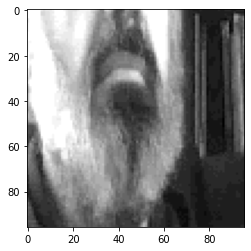

In [18]:
raw_bytes = np.array(HEXADECIMAL_BYTES)
image = np.reshape(raw_bytes,(96, 96)) #QCIF resolution

# Show the image
plt.imshow(image, cmap='gray')
plt.show()

In [16]:
len(HEXADECIMAL_BYTES)

9216

Testing the images collected during Inference

In [2]:
HEXADECIMAL_BYTES = [
  0x709080, 0x709080, 0x709080, 0x709080, 0x709078, 0x688878, 0x688470, 0x608068, 0x587868, 0x506c60, 0x506c58, 0x506858, 0x506450, 0x506858, 0x586850, 0x506050, 0x506048, 0x506048, 0x506040, 0x486048, 0x486040, 0x485c40, 0x485c40, 0x485c40, 0x485c40, 0x485840, 0x505c38, 0x505c40, 0x505c40, 0x506040, 0x586448, 0x586440, 0x586040, 0x505c40, 0x586048, 0x788450, 0x809460, 0x809068, 0x809068, 0x809468, 0x889868, 0x889878, 0x889878, 0x809070, 0x809070, 0x809070, 0x788c70, 0x809068, 0x808c70, 0x809068, 0x809068, 0x788c70, 0x788c68, 0x607868, 0x505c48, 0x485030, 0x404830, 0x404038, 0x383c28, 0x383c28, 0x383820, 0x383420, 0x383420, 0x383020, 0x383020, 0x383020, 0x303420, 0x303020, 0x303420, 0x303420, 0x303420, 0x303420, 0x383420, 0x383420, 0x383420, 0x383420, 0x383420, 0x383418, 0x383418, 0x383420, 0x403820, 0x403c20, 0x484028, 0x484820, 0x484828, 0x504c28, 0x504828, 0x504828, 0x584c28, 0x585028, 0x585428, 0x605830, 0x605430, 0x686030, 0x685c30, 0x686030, 0x789078, 0x709080, 0x709078, 0x709080, 0x708c78, 0x708878, 0x688070, 0x607c68, 0x587868, 0x587060, 0x587058, 0x587058, 0x587060, 0x586c50, 0x506850, 0x586c50, 0x506850, 0x506848, 0x506448, 0x486048, 0x486048, 0x485c48, 0x485c40, 0x486040, 0x486040, 0x505c40, 0x506040, 0x505c40, 0x506040, 0x586040, 0x586040, 0x586040, 0x586440, 0x606438, 0x606c40, 0x808c58, 0x809470, 0x809470, 0x809470, 0x809068, 0x809870, 0x809870, 0x889878, 0x809470, 0x809070, 0x809070, 0x809070, 0x809068, 0x889070, 0x809068, 0x809068, 0x808c70, 0x788860, 0x708468, 0x505c50, 0x404438, 0x404438, 0x404430, 0x383830, 0x383c28, 0x383420, 0x383420, 0x383420, 0x383020, 0x383020, 0x383020, 0x383020, 0x303020, 0x303420, 0x383420, 0x303420, 0x383420, 0x383420, 0x383420, 0x383420, 0x383420, 0x383420, 0x383418, 0x383418, 0x403820, 0x403c20, 0x403c20, 0x484420, 0x484820, 0x504828, 0x504828, 0x504c30, 0x504c28, 0x585028, 0x585428, 0x605830, 0x605828, 0x605430, 0x685c30, 0x685c38, 0x685c30, 0x708878, 0x708c78, 0x709080, 0x709078, 0x708878, 0x708478, 0x688070, 0x607868, 0x607868, 0x587460, 0x587058, 0x507058, 0x507058, 0x506c50, 0x506850, 0x506c58, 0x506850, 0x506c50, 0x506848, 0x506048, 0x506048, 0x486048, 0x485c40, 0x486040, 0x486040, 0x506040, 0x505c40, 0x505c40, 0x506048, 0x506040, 0x506040, 0x586040, 0x586848, 0x607448, 0x708850, 0x90a068, 0x809470, 0x809070, 0x809478, 0x809878, 0x809478, 0x809878, 0x809878, 0x809478, 0x809470, 0x809070, 0x809070, 0x889070, 0x889068, 0x809068, 0x809068, 0x808c70, 0x788458, 0x788868, 0x586860, 0x485438, 0x484830, 0x404430, 0x383c30, 0x383c28, 0x383420, 0x383420, 0x383420, 0x383020, 0x383020, 0x383020, 0x303420, 0x303420, 0x303420, 0x303420, 0x303420, 0x303420, 0x383420, 0x383420, 0x383420, 0x383420, 0x383420, 0x383420, 0x383820, 0x403820, 0x404020, 0x403c20, 0x484420, 0x484820, 0x504828, 0x504828, 0x504c28, 0x504c28, 0x585028, 0x585028, 0x585428, 0x605828, 0x605830, 0x685c30, 0x685c38, 0x685c30, 0x789c88, 0x709088, 0x688880, 0x709078, 0x708878, 0x688478, 0x688070, 0x607868, 0x607c60, 0x587460, 0x587458, 0x587058, 0x586c50, 0x587050, 0x586c50, 0x506c50, 0x506c50, 0x506848, 0x506848, 0x506448, 0x506048, 0x506048, 0x506048, 0x486048, 0x486040, 0x506040, 0x505c40, 0x485840, 0x485840, 0x506440, 0x607048, 0x687450, 0x687448, 0x708050, 0x788c58, 0x889878, 0x809470, 0x809470, 0x889c78, 0x809c78, 0x809478, 0x809878, 0x889878, 0x809478, 0x809478, 0x809070, 0x889070, 0x889070, 0x889068, 0x889468, 0x809068, 0x808c68, 0x788460, 0x708460, 0x607460, 0x505c48, 0x484c40, 0x404838, 0x383c30, 0x383c28, 0x383820, 0x383420, 0x383420, 0x383420, 0x383020, 0x383020, 0x303420, 0x303420, 0x303420, 0x383420, 0x383420, 0x383820, 0x383420, 0x383420, 0x383420, 0x383820, 0x383820, 0x383820, 0x383820, 0x403820, 0x403c20, 0x403c20, 0x484420, 0x484828, 0x504828, 0x504828, 0x504c28, 0x504c28, 0x505028, 0x585428, 0x585028, 0x685828, 0x685c30, 0x605c30, 0x685c38, 0x685c30, 0x80a088, 0x80a090, 0x709488, 0x709080, 0x708870, 0x688478, 0x688070, 0x607868, 0x607868, 0x607860, 0x587458, 0x587058, 0x586c58, 0x587058, 0x586c58, 0x506850, 0x506450, 0x506850, 0x486448, 0x506048, 0x506448, 0x506048, 0x486048, 0x486048, 0x506040, 0x506040, 0x485840, 0x485840, 0x506040, 0x586c40, 0x606c48, 0x607048, 0x687450, 0x708050, 0x809460, 0x809470, 0x809870, 0x809878, 0x80a078, 0x80a080, 0x88a080, 0x889c80, 0x889878, 0x889c78, 0x809470, 0x809078, 0x889070, 0x889470, 0x889468, 0x889468, 0x889468, 0x809070, 0x788460, 0x708060, 0x607060, 0x505c48, 0x404c38, 0x404830, 0x384028, 0x383c28, 0x383420, 0x383420, 0x383420, 0x383020, 0x383018, 0x383018, 0x303418, 0x303418, 0x303418, 0x383418, 0x383418, 0x383818, 0x383820, 0x383420, 0x383820, 0x383820, 0x383820, 0x383820, 0x383820, 0x383820, 0x403c20, 0x403c20, 0x404420, 0x484428, 0x484828, 0x504c28, 0x504c28, 0x504c28, 0x505028, 0x585430, 0x585428, 0x685c30, 0x605c30, 0x605c30, 0x685c38, 0x685c30, 0x80a490, 0x88a490, 0x789488, 0x709080, 0x688878, 0x688470, 0x688068, 0x607868, 0x607468, 0x607460, 0x587458, 0x607058, 0x607058, 0x587058, 0x586c58, 0x587050, 0x587050, 0x506c48, 0x506c48, 0x506848, 0x506448, 0x506448, 0x506448, 0x506048, 0x506040, 0x506040, 0x506038, 0x586840, 0x587048, 0x607048, 0x606c48, 0x687448, 0x687850, 0x788458, 0x808c60, 0x809070, 0x809870, 0x809870, 0x889c78, 0x889c80, 0x889c80, 0x889c80, 0x889878, 0x889c78, 0x809470, 0x809070, 0x889470, 0x889470, 0x889468, 0x889468, 0x809470, 0x889468, 0x708460, 0x707c68, 0x606c60, 0x586048, 0x484c38, 0x404838, 0x384028, 0x383c28, 0x303820, 0x383820, 0x303420, 0x383020, 0x383020, 0x383418, 0x303418, 0x383418, 0x383420, 0x383418, 0x383418, 0x383820, 0x383820, 0x383420, 0x383820, 0x383820, 0x383820, 0x383820, 0x383c20, 0x383c20, 0x403c20, 0x403c20, 0x484020, 0x484428, 0x504828, 0x504828, 0x504c28, 0x584c28, 0x585028, 0x585030, 0x605828, 0x605830, 0x605c30, 0x685c30, 0x606030, 0x686030, 0x80a090, 0x80a090, 0x789c90, 0x789c90, 0x709080, 0x688478, 0x688070, 0x587468, 0x587460, 0x607860, 0x587060, 0x586c60, 0x586c58, 0x586c58, 0x586c58, 0x587050, 0x587058, 0x506c50, 0x506c48, 0x506850, 0x506850, 0x586850, 0x506448, 0x506440, 0x506840, 0x506440, 0x506440, 0x506840, 0x586c40, 0x606c40, 0x607048, 0x687448, 0x687850, 0x788458, 0x809060, 0x809468, 0x809868, 0x809878, 0x88a078, 0x889c80, 0x889c80, 0x88a080, 0x889878, 0x889870, 0x809070, 0x809070, 0x809470, 0x889070, 0x889068, 0x889068, 0x889068, 0x809068, 0x788868, 0x788060, 0x586458, 0x484c40, 0x404038, 0x404430, 0x384028, 0x383c28, 0x303420, 0x303018, 0x383418, 0x383018, 0x303018, 0x303018, 0x303018, 0x303418, 0x383418, 0x383418, 0x383420, 0x383820, 0x383820, 0x383820, 0x383820, 0x383820, 0x383820, 0x383820, 0x383c20, 0x383c20, 0x383820, 0x403c20, 0x484020, 0x504828, 0x504828, 0x504828, 0x504828, 0x504c28, 0x585428, 0x585430, 0x605830, 0x605830, 0x605c30, 0x685c30, 0x606030, 0x686038, 0x80a490, 0x80a490, 0x80a490, 0x789c90, 0x789080, 0x708c78, 0x708870, 0x688470, 0x607868, 0x607460, 0x607460, 0x607458, 0x607458, 0x607458, 0x607458, 0x587058, 0x587050, 0x586c50, 0x586c50, 0x586848, 0x586850, 0x586448, 0x586048, 0x586440, 0x506040, 0x586840, 0x606c40, 0x586c48, 0x606c48, 0x607448, 0x607048, 0x607048, 0x607050, 0x708058, 0x788c60, 0x809868, 0x889868, 0x809c78, 0x88a078, 0x889c80, 0x809c80, 0x88a080, 0x889878, 0x889878, 0x809070, 0x809070, 0x889870, 0x889470, 0x889470, 0x808c68, 0x808c68, 0x808c68, 0x788870, 0x687460, 0x505850, 0x484c38, 0x484838, 0x404438, 0x404428, 0x383c28, 0x303420, 0x303020, 0x302c18, 0x303018, 0x303018, 0x303018, 0x383418, 0x383418, 0x383420, 0x383418, 0x383418, 0x383420, 0x383820, 0x383820, 0x383820, 0x383820, 0x383820, 0x383820, 0x383c20, 0x403c20, 0x404020, 0x484420, 0x484020, 0x504828, 0x504828, 0x584c28, 0x585028, 0x585030, 0x585430, 0x585030, 0x605830, 0x605830, 0x605c30, 0x685c30, 0x685c30, 0x686038, 0x88a890, 0x80a898, 0x80a490, 0x789c90, 0x709088, 0x708c80, 0x708878, 0x688470, 0x688870, 0x688070, 0x607c68, 0x688068, 0x688060, 0x608060, 0x607c60, 0x607858, 0x607458, 0x587050, 0x586c50, 0x586c50, 0x586c50, 0x586448, 0x586448, 0x506048, 0x506440, 0x586840, 0x586840, 0x606c48, 0x606c48, 0x607448, 0x607448, 0x687450, 0x687048, 0x707848, 0x788058, 0x788860, 0x809868, 0x809c78, 0x88a078, 0x809c80, 0x889c80, 0x889c80, 0x889878, 0x889878, 0x809470, 0x809478, 0x889870, 0x889870, 0x889470, 0x809068, 0x889468, 0x808860, 0x708060, 0x607058, 0x505c48, 0x404c40, 0x404838, 0x384028, 0x383c28, 0x383828, 0x303420, 0x303020, 0x302c18, 0x302c18, 0x302c18, 0x303018, 0x383418, 0x383020, 0x383418, 0x383820, 0x383818, 0x383818, 0x383820, 0x383820, 0x383820, 0x383820, 0x383c20, 0x383820, 0x383820, 0x383420, 0x383820, 0x403c20, 0x504820, 0x504828, 0x504c20, 0x585430, 0x585430, 0x585030, 0x585430, 0x585030, 0x585430, 0x585438, 0x605830, 0x605c30, 0x685c30, 0x686038, 0x88ac90, 0x80a898, 0x80a490, 0x80a490, 0x789880, 0x789880, 0x789880, 0x789478, 0x709078, 0x709078, 0x688870, 0x688470, 0x607c68, 0x607860, 0x607860, 0x607458, 0x587458, 0x587058, 0x587050, 0x587050, 0x586c50, 0x586848, 0x506450, 0x506448, 0x506440, 0x586840, 0x586c40, 0x606c48, 0x606c48, 0x607048, 0x586c48, 0x606848, 0x606848, 0x687448, 0x788458, 0x809068, 0x889868, 0x889c78, 0x889c78, 0x809c80, 0x809880, 0x889c80, 0x889880, 0x889878, 0x809478, 0x889478, 0x889878, 0x889870, 0x889470, 0x809068, 0x788860, 0x707c68, 0x687460, 0x586450, 0x485840, 0x384438, 0x384430, 0x383c28, 0x383828, 0x303428, 0x303020, 0x303018, 0x282c18, 0x282c18, 0x282c18, 0x282c18, 0x302c18, 0x303018, 0x383418, 0x383420, 0x383818, 0x383820, 0x383818, 0x383820, 0x403818, 0x403c20, 0x404020, 0x404020, 0x404420, 0x484420, 0x484828, 0x504c28, 0x505028, 0x504c28, 0x505028, 0x585030, 0x585430, 0x585430, 0x585430, 0x585030, 0x605830, 0x686438, 0x686438, 0x685c38, 0x685c30, 0x685c38, 0x88a890, 0x88ac90, 0x80a088, 0x789c88, 0x80a080, 0x789c80, 0x789880, 0x789880, 0x709478, 0x709078, 0x708c70, 0x688870, 0x688468, 0x688060, 0x607c60, 0x607c60, 0x607858, 0x586c58, 0x586c50, 0x606c50, 0x606c50, 0x586c50, 0x506848, 0x506840, 0x506440, 0x586c48, 0x586c48, 0x606c48, 0x607048, 0x607048, 0x606c50, 0x606848, 0x606848, 0x686c48, 0x707848, 0x809060, 0x809468, 0x889c78, 0x889878, 0x889c80, 0x889880, 0x889878, 0x889c78, 0x889878, 0x809478, 0x889878, 0x889878, 0x889870, 0x809470, 0x809070, 0x708460, 0x687850, 0x607058, 0x505c48, 0x404838, 0x383c38, 0x383c28, 0x303820, 0x303420, 0x302c20, 0x302820, 0x302c18, 0x302818, 0x282818, 0x282818, 0x282c18, 0x303018, 0x303018, 0x383418, 0x383420, 0x383818, 0x383820, 0x383820, 0x383820, 0x403820, 0x403c20, 0x404020, 0x404020, 0x484420, 0x484828, 0x484c28, 0x505028, 0x505428, 0x505028, 0x505028, 0x585430, 0x585830, 0x585430, 0x585830, 0x605830, 0x605c30, 0x686438, 0x686038, 0x686030, 0x605c30, 0x606030, 0x80a490, 0x80a490, 0x789888, 0x709880, 0x789c80, 0x789480, 0x789478, 0x789478, 0x709078, 0x688c70, 0x688868, 0x608068, 0x607c68, 0x607860, 0x587458, 0x587458, 0x586c58, 0x506450, 0x506048, 0x506048, 0x586448, 0x586848, 0x506448, 0x506848, 0x586848, 0x506040, 0x586440, 0x586848, 0x586848, 0x586c48, 0x586c48, 0x586848, 0x586048, 0x505840, 0x606448, 0x707c50, 0x889860, 0x889c78, 0x889878, 0x889880, 0x889c80, 0x889c80, 0x889c78, 0x889878, 0x809478, 0x889478, 0x889878, 0x809070, 0x809070, 0x809870, 0x708468, 0x586858, 0x586450, 0x485040, 0x404430, 0x383c30, 0x303428, 0x303020, 0x282820, 0x302818, 0x282818, 0x282818, 0x282818, 0x282818, 0x282818, 0x282818, 0x282c18, 0x302c18, 0x383418, 0x383420, 0x383820, 0x383420, 0x383420, 0x383820, 0x383820, 0x383820, 0x404020, 0x484428, 0x484420, 0x484020, 0x484828, 0x505028, 0x505028, 0x505028, 0x585028, 0x605c30, 0x605830, 0x585430, 0x605830, 0x605830, 0x605830, 0x605c30, 0x605830, 0x605c30, 0x605c30, 0x585c38, 0x809c88, 0x809c88, 0x789080, 0x709078, 0x789478, 0x708c70, 0x708c70, 0x688468, 0x608060, 0x607c68, 0x607860, 0x587458, 0x586c58, 0x506850, 0x506c50, 0x506850, 0x506850, 0x506448, 0x506040, 0x505840, 0x505840, 0x505840, 0x506040, 0x506040, 0x505c40, 0x505c40, 0x586040, 0x586840, 0x606840, 0x586440, 0x586440, 0x586440, 0x606848, 0x586040, 0x606840, 0x707448, 0x808860, 0x909c78, 0x88a078, 0x889878, 0x889478, 0x889878, 0x889c78, 0x889878, 0x809478, 0x889478, 0x889870, 0x889468, 0x808c68, 0x809068, 0x788868, 0x606858, 0x505840, 0x404440, 0x404030, 0x384030, 0x303428, 0x303020, 0x302c18, 0x302c18, 0x302c18, 0x282818, 0x282818, 0x282818, 0x282418, 0x282818, 0x282c18, 0x302c18, 0x303018, 0x383418, 0x383418, 0x383420, 0x383420, 0x383420, 0x403820, 0x403420, 0x383018, 0x403818, 0x484420, 0x484428, 0x504820, 0x585028, 0x505030, 0x504c28, 0x504c28, 0x605c30, 0x605c30, 0x585430, 0x605430, 0x605830, 0x605830, 0x605830, 0x685c30, 0x685c30, 0x605828, 0x585830, 0x708c80, 0x708480, 0x687c70, 0x607868, 0x607c68, 0x607c60, 0x687c68, 0x587060, 0x587058, 0x586c58, 0x586850, 0x506050, 0x485840, 0x405440, 0x485840, 0x485840, 0x486040, 0x506440, 0x486448, 0x485c40, 0x485c40, 0x505c40, 0x505840, 0x505440, 0x485838, 0x506438, 0x506448, 0x586c48, 0x586848, 0x586840, 0x586840, 0x586040, 0x586040, 0x485440, 0x505840, 0x606440, 0x788458, 0x889c70, 0x889878, 0x809878, 0x889878, 0x889870, 0x889878, 0x889878, 0x889878, 0x889478, 0x889878, 0x809068, 0x707c68, 0x708060, 0x708060, 0x586858, 0x505840, 0x485438, 0x384030, 0x383c30, 0x303420, 0x303020, 0x282820, 0x282420, 0x282418, 0x282418, 0x282418, 0x302418, 0x302418, 0x282410, 0x302818, 0x302c18, 0x383018, 0x383018, 0x403020, 0x403420, 0x403420, 0x403420, 0x403420, 0x403820, 0x403418, 0x403420, 0x484420, 0x484028, 0x483c20, 0x504428, 0x504828, 0x505028, 0x585430, 0x605c30, 0x585830, 0x584c30, 0x585428, 0x605c38, 0x605c38, 0x605c30, 0x685c38, 0x605830, 0x585030, 0x505028, 0x688480, 0x687c70, 0x607468, 0x587060, 0x587060, 0x506858, 0x587058, 0x506458, 0x505c50, 0x505c48, 0x505c48, 0x485848, 0x505c40, 0x485440, 0x485838, 0x405038, 0x405038, 0x405438, 0x405838, 0x405430, 0x405438, 0x485438, 0x485038, 0x485038, 0x485838, 0x506038, 0x586448, 0x606c48, 0x606448, 0x586040, 0x586040, 0x585c40, 0x586040, 0x505c38, 0x586038, 0x586040, 0x708048, 0x809868, 0x809468, 0x788c68, 0x809470, 0x889870, 0x889878, 0x889878, 0x889478, 0x889478, 0x809470, 0x809068, 0x708068, 0x707858, 0x686c50, 0x505850, 0x484c38, 0x404838, 0x383830, 0x302c28, 0x302c20, 0x302820, 0x282418, 0x202018, 0x202010, 0x282010, 0x282418, 0x302418, 0x302818, 0x382c18, 0x382c18, 0x383018, 0x383018, 0x383018, 0x403420, 0x403420, 0x403420, 0x403018, 0x403018, 0x402c18, 0x403018, 0x403418, 0x402c18, 0x483418, 0x483820, 0x483c20, 0x504820, 0x504c28, 0x584c28, 0x605828, 0x585430, 0x585830, 0x585030, 0x584c28, 0x605830, 0x605838, 0x605830, 0x585028, 0x504828, 0x484420, 0x708880, 0x688478, 0x607870, 0x607c68, 0x587068, 0x586c58, 0x586c58, 0x506058, 0x485c58, 0x485c50, 0x485848, 0x485c48, 0x485c40, 0x485840, 0x485c40, 0x405440, 0x405438, 0x485838, 0x405038, 0x384830, 0x404830, 0x404c30, 0x404c30, 0x404c30, 0x405038, 0x404c38, 0x485038, 0x505838, 0x505840, 0x505838, 0x585838, 0x586040, 0x586040, 0x585c40, 0x586040, 0x606848, 0x607048, 0x788458, 0x707c60, 0x607058, 0x708050, 0x889c60, 0x889870, 0x889878, 0x889478, 0x809478, 0x809070, 0x809470, 0x688068, 0x607468, 0x586458, 0x505848, 0x404438, 0x404030, 0x383828, 0x303020, 0x302c20, 0x282420, 0x282818, 0x282018, 0x282018, 0x302010, 0x302410, 0x382410, 0x402c10, 0x382818, 0x402c18, 0x403018, 0x403018, 0x403018, 0x403020, 0x403018, 0x403020, 0x402c18, 0x483020, 0x403018, 0x403018, 0x403018, 0x402c20, 0x403018, 0x403020, 0x403020, 0x403820, 0x483820, 0x483820, 0x484428, 0x484828, 0x504c28, 0x484830, 0x504828, 0x504820, 0x584c28, 0x504c28, 0x484828, 0x484820, 0x404020, 0x688880, 0x708878, 0x688070, 0x607c68, 0x586c60, 0x587060, 0x586c58, 0x506858, 0x486050, 0x506448, 0x485840, 0x485840, 0x485440, 0x485038, 0x485438, 0x485038, 0x404c40, 0x404830, 0x405030, 0x404c30, 0x404c38, 0x404c30, 0x404c30, 0x404c30, 0x404830, 0x404430, 0x484c30, 0x485038, 0x505838, 0x585840, 0x585840, 0x585838, 0x585838, 0x585c38, 0x586038, 0x606c40, 0x687438, 0x788450, 0x707860, 0x606848, 0x687040, 0x809060, 0x889878, 0x889878, 0x889478, 0x809470, 0x889470, 0x809470, 0x688060, 0x687060, 0x505848, 0x484840, 0x404038, 0x403830, 0x303028, 0x302c28, 0x302c20, 0x282418, 0x282418, 0x282018, 0x282010, 0x281c10, 0x302018, 0x382418, 0x402c18, 0x483018, 0x483420, 0x483420, 0x483420, 0x483820, 0x503820, 0x483820, 0x483820, 0x483420, 0x483020, 0x483018, 0x402c18, 0x403018, 0x403018, 0x483018, 0x402c18, 0x402c18, 0x402c18, 0x403018, 0x403418, 0x403420, 0x403418, 0x382c18, 0x382c18, 0x403818, 0x483c20, 0x504428, 0x484428, 0x403c20, 0x403c18, 0x403c20, 0x688c78, 0x709078, 0x688878, 0x708470, 0x607c68, 0x607860, 0x507060, 0x506858, 0x506048, 0x506448, 0x485c48, 0x485848, 0x485440, 0x485440, 0x485440, 0x404c38, 0x404838, 0x404c38, 0x485038, 0x404c30, 0x404c38, 0x404c30, 0x404c30, 0x404c30, 0x484c30, 0x484838, 0x485038, 0x505838, 0x485038, 0x505438, 0x505838, 0x585838, 0x585838, 0x585c38, 0x586038, 0x586040, 0x586840, 0x788450, 0x707858, 0x686c50, 0x687048, 0x889060, 0x889878, 0x889878, 0x889470, 0x809870, 0x788c78, 0x788c70, 0x687860, 0x586460, 0x485040, 0x484c38, 0x383c30, 0x303428, 0x302c20, 0x282c20, 0x283018, 0x282418, 0x282418, 0x282010, 0x302010, 0x382410, 0x483018, 0x503420, 0x503420, 0x583820, 0x583c20, 0x583c20, 0x503c20, 0x503c20, 0x503820, 0x503420, 0x503420, 0x483420, 0x503420, 0x483020, 0x483018, 0x483018, 0x403018, 0x403018, 0x403018, 0x403018, 0x403018, 0x403018, 0x382c18, 0x302418, 0x281c10, 0x281c10, 0x281c10, 0x282010, 0x382c10, 0x483c20, 0x403c20, 0x403820, 0x383820, 0x383018, 0x708c78, 0x708c78, 0x688478, 0x688070, 0x688070, 0x607c68, 0x507060, 0x506850, 0x506448, 0x506448, 0x485c40, 0x485840, 0x485440, 0x485438, 0x485440, 0x484c38, 0x484c38, 0x485038, 0x484c38, 0x484c38, 0x404c38, 0x404c30, 0x404c30, 0x404c30, 0x484c30, 0x484c38, 0x485038, 0x505438, 0x505038, 0x505438, 0x585838, 0x505838, 0x585838, 0x585c38, 0x606440, 0x606440, 0x606440, 0x687440, 0x788450, 0x707458, 0x788050, 0x809060, 0x889878, 0x889870, 0x889870, 0x889c70, 0x808c68, 0x708060, 0x606c58, 0x585c50, 0x484840, 0x484c38, 0x383c30, 0x303428, 0x283020, 0x282c20, 0x282818, 0x282418, 0x282018, 0x302018, 0x382818, 0x402c18, 0x503820, 0x584028, 0x584028, 0x583c20, 0x583c20, 0x583c20, 0x584028, 0x583c20, 0x503c20, 0x503820, 0x483420, 0x483420, 0x503820, 0x483420, 0x483018, 0x403018, 0x403018, 0x403018, 0x403018, 0x403018, 0x403018, 0x403018, 0x403018, 0x403018, 0x382418, 0x302010, 0x282010, 0x302010, 0x301c10, 0x382810, 0x383018, 0x383020, 0x382c18, 0x403418, 0x688878, 0x688c78, 0x688478, 0x688470, 0x688068, 0x607868, 0x587060, 0x506c50, 0x506448, 0x506048, 0x485c40, 0x485840, 0x485840, 0x485438, 0x485438, 0x485038, 0x404c38, 0x484c38, 0x484c38, 0x484c38, 0x484c38, 0x484c38, 0x404c38, 0x484c30, 0x484c38, 0x484c38, 0x485038, 0x485438, 0x505438, 0x505038, 0x505438, 0x505838, 0x505838, 0x505c38, 0x586440, 0x606440, 0x586448, 0x687050, 0x788050, 0x788060, 0x788458, 0x809468, 0x809470, 0x809470, 0x808c70, 0x788868, 0x687868, 0x606c60, 0x586050, 0x505440, 0x404030, 0x404030, 0x383c28, 0x303428, 0x282c20, 0x202418, 0x282418, 0x282018, 0x302410, 0x402c10, 0x483418, 0x503420, 0x603c28, 0x604020, 0x604020, 0x604028, 0x603828, 0x603820, 0x603c20, 0x583c20, 0x583c20, 0x583c20, 0x503820, 0x503820, 0x503420, 0x503820, 0x503820, 0x483420, 0x483020, 0x403018, 0x403018, 0x403018, 0x402c18, 0x403018, 0x403018, 0x402c18, 0x382818, 0x302418, 0x282010, 0x302410, 0x302418, 0x302818, 0x383018, 0x383018, 0x383018, 0x403418, 0x688878, 0x688870, 0x688470, 0x688470, 0x687c70, 0x587060, 0x587058, 0x586c50, 0x506448, 0x506048, 0x485848, 0x485840, 0x485438, 0x485438, 0x485438, 0x405038, 0x405038, 0x484c38, 0x484c38, 0x484c38, 0x484c38, 0x485030, 0x484c30, 0x484c30, 0x484c30, 0x484c38, 0x485038, 0x505838, 0x505c38, 0x485030, 0x505438, 0x505838, 0x505838, 0x505c38, 0x586440, 0x606440, 0x606440, 0x606840, 0x707448, 0x787c58, 0x788860, 0x889460, 0x809468, 0x889468, 0x889468, 0x788860, 0x707860, 0x606050, 0x505448, 0x505040, 0x404038, 0x383828, 0x303028, 0x282820, 0x202018, 0x282418, 0x281c18, 0x302018, 0x382418, 0x483018, 0x583c20, 0x604028, 0x684428, 0x684428, 0x604428, 0x604428, 0x604028, 0x603c28, 0x603c28, 0x603c28, 0x583c20, 0x583c28, 0x503c28, 0x503c20, 0x503820, 0x503820, 0x483420, 0x483420, 0x483020, 0x483018, 0x403018, 0x403018, 0x402c18, 0x402c18, 0x402c18, 0x403018, 0x382c20, 0x302418, 0x302418, 0x302410, 0x302810, 0x302c18, 0x382c18, 0x383018, 0x383020, 0x383418, 0x688878, 0x688870, 0x608478, 0x688470, 0x607c70, 0x587460, 0x586c58, 0x506448, 0x506048, 0x505c48, 0x485840, 0x485840, 0x485440, 0x485438, 0x485438, 0x485038, 0x404c38, 0x404c38, 0x484c38, 0x484c38, 0x484c30, 0x484c38, 0x404c30, 0x404c30, 0x404c30, 0x485038, 0x485038, 0x485438, 0x485038, 0x505840, 0x485438, 0x505838, 0x505c38, 0x505c38, 0x586038, 0x586440, 0x586440, 0x606840, 0x707848, 0x788450, 0x808c60, 0x808c60, 0x808c68, 0x808c68, 0x788868, 0x708468, 0x707c60, 0x586050, 0x505848, 0x505438, 0x384030, 0x303428, 0x303028, 0x282818, 0x282418, 0x282018, 0x302010, 0x482c18, 0x503020, 0x583820, 0x684428, 0x683c28, 0x684428, 0x704c30, 0x684828, 0x684428, 0x603c20, 0x603820, 0x684020, 0x684028, 0x603c28, 0x603c20, 0x583c20, 0x583c20, 0x583820, 0x503820, 0x503420, 0x503418, 0x483020, 0x483018, 0x482c18, 0x482c18, 0x402c18, 0x402c18, 0x402c18, 0x402c18, 0x382c18, 0x402c18, 0x382c18, 0x302818, 0x302818, 0x302818, 0x282418, 0x282418, 0x302c18, 0x383018, 0x688870, 0x688470, 0x608070, 0x688068, 0x607468, 0x607068, 0x586c58, 0x505c48, 0x505848, 0x505840, 0x485840, 0x485840, 0x485440, 0x485438, 0x485438, 0x485038, 0x484c38, 0x404c30, 0x484c30, 0x484c30, 0x484c30, 0x484c30, 0x404c30, 0x404c30, 0x404c30, 0x484c30, 0x485030, 0x485030, 0x485438, 0x485438, 0x485838, 0x505838, 0x505838, 0x506040, 0x505c40, 0x586440, 0x586440, 0x606840, 0x606c38, 0x707848, 0x808460, 0x808860, 0x808860, 0x808c60, 0x707c58, 0x686c50, 0x606448, 0x505448, 0x504c40, 0x404430, 0x383830, 0x303020, 0x282c20, 0x282818, 0x282418, 0x282018, 0x402c18, 0x503820, 0x604028, 0x684428, 0x684830, 0x684830, 0x704c30, 0x704c30, 0x684828, 0x704c28, 0x684c28, 0x684828, 0x604028, 0x604028, 0x604028, 0x604028, 0x603c20, 0x604020, 0x583c20, 0x583820, 0x503420, 0x503420, 0x483020, 0x482c20, 0x482c20, 0x482c18, 0x483018, 0x402c18, 0x402c18, 0x402c18, 0x402c18, 0x382818, 0x382818, 0x382818, 0x302818, 0x302818, 0x302418, 0x302818, 0x302c18, 0x383018, 0x688870, 0x688470, 0x608070, 0x688470, 0x587468, 0x587460, 0x506858, 0x506450, 0x505c48, 0x505848, 0x485840, 0x485840, 0x485440, 0x485438, 0x485038, 0x485038, 0x484c38, 0x404c30, 0x484c30, 0x484c30, 0x405030, 0x405030, 0x404830, 0x404830, 0x404c30, 0x484c30, 0x485038, 0x485038, 0x485038, 0x485438, 0x485438, 0x505838, 0x505838, 0x585c40, 0x585c40, 0x586038, 0x586440, 0x586440, 0x606c40, 0x707848, 0x808460, 0x808860, 0x788460, 0x707c60, 0x687058, 0x606050, 0x585c40, 0x484838, 0x484438, 0x404030, 0x383828, 0x282c20, 0x282820, 0x282818, 0x382818, 0x402c10, 0x503818, 0x603c28, 0x684430, 0x683c28, 0x704830, 0x704828, 0x704830, 0x704c30, 0x704c30, 0x705030, 0x704830, 0x684428, 0x684428, 0x684028, 0x684028, 0x604028, 0x604020, 0x603c20, 0x603820, 0x583820, 0x503820, 0x503420, 0x503420, 0x483020, 0x483020, 0x482c20, 0x483018, 0x402c18, 0x402c18, 0x402c18, 0x402c18, 0x402818, 0x402c18, 0x382818, 0x302818, 0x282418, 0x282418, 0x282818, 0x282410, 0x282810, 0x688470, 0x688470, 0x688070, 0x688070, 0x587468, 0x587460, 0x506858, 0x506450, 0x505848, 0x505840, 0x485840, 0x485840, 0x485838, 0x485038, 0x485030, 0x484c38, 0x484c38, 0x404c38, 0x484c38, 0x484c30, 0x484c30, 0x404c30, 0x404830, 0x404830, 0x404830, 0x404c30, 0x485030, 0x485038, 0x485438, 0x485438, 0x485438, 0x505838, 0x505840, 0x586040, 0x586040, 0x585c40, 0x586038, 0x586440, 0x606840, 0x707840, 0x788058, 0x808458, 0x808458, 0x787c50, 0x606448, 0x606048, 0x585840, 0x484440, 0x404030, 0x403828, 0x303020, 0x282420, 0x282818, 0x282018, 0x302018, 0x483018, 0x604828, 0x684428, 0x704830, 0x704828, 0x704c30, 0x704830, 0x704830, 0x704828, 0x704c30, 0x704830, 0x704830, 0x684428, 0x604030, 0x684028, 0x684028, 0x604028, 0x604028, 0x603c28, 0x603820, 0x583420, 0x503418, 0x503420, 0x503420, 0x503020, 0x483018, 0x482c20, 0x483018, 0x402c18, 0x402c18, 0x402c18, 0x402c18, 0x402818, 0x402c18, 0x382818, 0x302818, 0x302418, 0x282010, 0x202010, 0x282410, 0x282410, 0x688470, 0x688470, 0x688470, 0x607c70, 0x607868, 0x587060, 0x506858, 0x506050, 0x485c40, 0x485840, 0x485840, 0x485840, 0x485038, 0x485038, 0x485038, 0x404c38, 0x404c38, 0x404c38, 0x404c30, 0x404c30, 0x404c30, 0x404c30, 0x404830, 0x404830, 0x404830, 0x404c30, 0x484c30, 0x485038, 0x485038, 0x485438, 0x485438, 0x505838, 0x505840, 0x585c40, 0x586040, 0x585c40, 0x586040, 0x586040, 0x586040, 0x686c48, 0x787c50, 0x787c50, 0x707858, 0x687058, 0x586048, 0x585c48, 0x585840, 0x484838, 0x403830, 0x303028, 0x302c18, 0x282420, 0x302418, 0x302010, 0x483018, 0x583c20, 0x684430, 0x704430, 0x784830, 0x784c30, 0x785030, 0x785030, 0x705030, 0x785030, 0x785028, 0x785430, 0x705038, 0x704830, 0x684028, 0x684028, 0x684428, 0x684428, 0x604028, 0x604028, 0x603820, 0x604020, 0x583c20, 0x503420, 0x503420, 0x503020, 0x483018, 0x483018, 0x402c18, 0x402c18, 0x402c18, 0x402818, 0x402818, 0x402818, 0x402818, 0x382818, 0x382818, 0x302418, 0x282010, 0x202010, 0x202010, 0x202010, 0x688470, 0x688470, 0x688070, 0x607c70, 0x607868, 0x587058, 0x586858, 0x506048, 0x485c40, 0x485840, 0x485440, 0x485038, 0x404c38, 0x485038, 0x405438, 0x405038, 0x405038, 0x405038, 0x404c30, 0x404c30, 0x404c30, 0x404c30, 0x404830, 0x404c30, 0x404830, 0x404c30, 0x404c30, 0x485038, 0x485038, 0x485038, 0x485438, 0x485838, 0x506038, 0x586038, 0x585c40, 0x585c40, 0x585c40, 0x586040, 0x606448, 0x687040, 0x787848, 0x707850, 0x707450, 0x606848, 0x585838, 0x504c40, 0x484438, 0x484030, 0x383830, 0x383028, 0x302c18, 0x282420, 0x302018, 0x382810, 0x583c28, 0x684c28, 0x704c30, 0x704c30, 0x784c30, 0x784c30, 0x784c30, 0x705030, 0x705030, 0x705030, 0x785030, 0x785430, 0x704c30, 0x704830, 0x704828, 0x704428, 0x684428, 0x684428, 0x604028, 0x583c28, 0x583c28, 0x583c28, 0x583c20, 0x503420, 0x503420, 0x503420, 0x483420, 0x483020, 0x482c20, 0x402c18, 0x402818, 0x402818, 0x402818, 0x402818, 0x382818, 0x382818, 0x382818, 0x302018, 0x282010, 0x281c10, 0x201c10, 0x282010, 0x688470, 0x688470, 0x688070, 0x608070, 0x607c68, 0x586c60, 0x506858, 0x506048, 0x485c40, 0x485840, 0x485438, 0x485038, 0x484c38, 0x405038, 0x405438, 0x405038, 0x405030, 0x404c30, 0x404c38, 0x404c30, 0x404c30, 0x404830, 0x404c30, 0x404c30, 0x404c30, 0x404c30, 0x404c30, 0x485030, 0x485038, 0x485038, 0x485438, 0x485438, 0x506038, 0x506040, 0x505c38, 0x505c40, 0x505c40, 0x505c40, 0x586040, 0x606840, 0x687048, 0x687450, 0x606c50, 0x586048, 0x505038, 0x404038, 0x404030, 0x404028, 0x383828, 0x383820, 0x302818, 0x302420, 0x382410, 0x503820, 0x604830, 0x705430, 0x785438, 0x785430, 0x805830, 0x785430, 0x785030, 0x785030, 0x785030, 0x785030, 0x785030, 0x785030, 0x705030, 0x805830, 0x785030, 0x684030, 0x704028, 0x684428, 0x684428, 0x604428, 0x604428, 0x583c20, 0x583c20, 0x583820, 0x503820, 0x503420, 0x483420, 0x483020, 0x482c20, 0x482c20, 0x402c18, 0x402818, 0x402818, 0x402818, 0x382818, 0x382818, 0x382418, 0x302410, 0x282010, 0x281c10, 0x201c10, 0x201c10, 0x688470, 0x688470, 0x688470, 0x607c70, 0x607c68, 0x587058, 0x586c50, 0x506448, 0x485448, 0x485038, 0x485838, 0x485038, 0x484c38, 0x405038, 0x405038, 0x405038, 0x404c30, 0x404c30, 0x405030, 0x404c30, 0x404830, 0x404830, 0x404c30, 0x404c30, 0x404c30, 0x404c30, 0x404c30, 0x485038, 0x485038, 0x485438, 0x485438, 0x485838, 0x485438, 0x505438, 0x505c38, 0x505c40, 0x505c40, 0x585c40, 0x585c38, 0x606840, 0x687440, 0x707848, 0x687448, 0x586040, 0x505030, 0x403c30, 0x403c28, 0x403820, 0x302c20, 0x302820, 0x302818, 0x301c18, 0x483018, 0x604428, 0x684c30, 0x785428, 0x705030, 0x785430, 0x785030, 0x785430, 0x785030, 0x785030, 0x785430, 0x785030, 0x785430, 0x785430, 0x705430, 0x785430, 0x704c30, 0x684430, 0x684428, 0x684428, 0x604028, 0x604028, 0x604028, 0x583c20, 0x583c28, 0x583820, 0x503820, 0x503420, 0x483420, 0x483020, 0x482c20, 0x482818, 0x402818, 0x402818, 0x402818, 0x402818, 0x382818, 0x382818, 0x382418, 0x302418, 0x282010, 0x281c18, 0x201c10, 0x201c10, 0x688470, 0x688470, 0x688070, 0x607c70, 0x607868, 0x587058, 0x506450, 0x505c48, 0x405040, 0x485440, 0x405038, 0x405038, 0x404c38, 0x404838, 0x404c30, 0x405038, 0x404c30, 0x404c30, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404c30, 0x404c30, 0x484c30, 0x484c30, 0x485438, 0x485438, 0x485438, 0x505838, 0x505838, 0x505838, 0x485838, 0x505840, 0x505c40, 0x505c40, 0x585c40, 0x585c38, 0x606840, 0x687040, 0x687448, 0x606450, 0x505040, 0x484428, 0x404028, 0x403c28, 0x383828, 0x302c20, 0x382820, 0x382420, 0x482c10, 0x583c20, 0x684430, 0x705030, 0x785028, 0x785430, 0x785430, 0x785430, 0x785430, 0x785430, 0x785030, 0x785030, 0x785030, 0x704c30, 0x785430, 0x785430, 0x785430, 0x784c28, 0x704830, 0x704830, 0x684430, 0x684028, 0x684028, 0x604028, 0x603c20, 0x583828, 0x583820, 0x583820, 0x503420, 0x483420, 0x483020, 0x483018, 0x482818, 0x402818, 0x402818, 0x402818, 0x402818, 0x382818, 0x382818, 0x382418, 0x302418, 0x302010, 0x281c10, 0x281c10, 0x201c10, 0x688470, 0x688470, 0x688470, 0x607c68, 0x607c68, 0x586c58, 0x506050, 0x485840, 0x485440, 0x485440, 0x405438, 0x405038, 0x404c38, 0x404838, 0x404c38, 0x484c38, 0x404c38, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x484c30, 0x485038, 0x485038, 0x485438, 0x485438, 0x485038, 0x505438, 0x505438, 0x505438, 0x505c40, 0x505c38, 0x505c38, 0x585c38, 0x585c40, 0x606840, 0x687040, 0x707440, 0x686040, 0x484430, 0x484028, 0x404028, 0x403c28, 0x383420, 0x302820, 0x382818, 0x382018, 0x503020, 0x684c28, 0x684830, 0x785430, 0x785030, 0x785430, 0x785430, 0x785430, 0x785438, 0x785438, 0x785838, 0x785430, 0x785430, 0x785030, 0x705030, 0x785430, 0x785438, 0x704c30, 0x704830, 0x704830, 0x684030, 0x684428, 0x604028, 0x604028, 0x603c28, 0x583c28, 0x583820, 0x583820, 0x503420, 0x483420, 0x483420, 0x483018, 0x482c18, 0x482c18, 0x402818, 0x402818, 0x402818, 0x402818, 0x382418, 0x382418, 0x302418, 0x302418, 0x282018, 0x281c10, 0x201c10, 0x688070, 0x688470, 0x688470, 0x607c68, 0x607468, 0x506c58, 0x486458, 0x485848, 0x485038, 0x485438, 0x405038, 0x405038, 0x405038, 0x404838, 0x404c38, 0x404c38, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404430, 0x404830, 0x404830, 0x404830, 0x404c30, 0x405038, 0x485438, 0x485438, 0x505838, 0x485438, 0x505438, 0x505838, 0x485438, 0x505840, 0x505838, 0x505c38, 0x586038, 0x585c40, 0x606840, 0x687040, 0x707448, 0x606448, 0x484438, 0x484428, 0x403c28, 0x383428, 0x383420, 0x382c20, 0x382018, 0x482c10, 0x604028, 0x705430, 0x785438, 0x785428, 0x805430, 0x805430, 0x805430, 0x805430, 0x805438, 0x805438, 0x785430, 0x785830, 0x785430, 0x785430, 0x785430, 0x785030, 0x785030, 0x784c30, 0x704830, 0x704c30, 0x704c28, 0x684830, 0x684428, 0x604028, 0x603c20, 0x583c20, 0x583c20, 0x583820, 0x503420, 0x503420, 0x483420, 0x483018, 0x482c18, 0x482818, 0x402818, 0x402818, 0x402818, 0x402818, 0x382418, 0x382418, 0x382418, 0x302410, 0x302010, 0x281c10, 0x201c10, 0x688878, 0x688470, 0x688078, 0x687c70, 0x607468, 0x506c58, 0x486050, 0x485840, 0x485038, 0x485038, 0x405038, 0x405038, 0x404c38, 0x404838, 0x404830, 0x404830, 0x404838, 0x404830, 0x404830, 0x404c30, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404c30, 0x405038, 0x485438, 0x485838, 0x485438, 0x505438, 0x505438, 0x505438, 0x485438, 0x505838, 0x505838, 0x505838, 0x585c38, 0x585c40, 0x606840, 0x606840, 0x686c40, 0x606448, 0x484830, 0x484428, 0x404028, 0x383420, 0x383020, 0x382c20, 0x302020, 0x503020, 0x705030, 0x705430, 0x785c38, 0x785438, 0x805438, 0x805430, 0x805438, 0x805438, 0x785430, 0x785830, 0x785830, 0x785430, 0x785430, 0x785830, 0x785838, 0x785838, 0x785438, 0x785438, 0x785430, 0x704830, 0x704830, 0x684428, 0x684428, 0x604428, 0x583c28, 0x584028, 0x604028, 0x583828, 0x503820, 0x503820, 0x483420, 0x483020, 0x482c20, 0x402c18, 0x402818, 0x402818, 0x402818, 0x402818, 0x382818, 0x382410, 0x382418, 0x302418, 0x302010, 0x282018, 0x201c10, 0x688878, 0x688470, 0x688470, 0x607c70, 0x587868, 0x506c58, 0x485c50, 0x485440, 0x405038, 0x404c38, 0x404838, 0x404838, 0x404c38, 0x404830, 0x404830, 0x404838, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404c30, 0x404c30, 0x405038, 0x485438, 0x485438, 0x485438, 0x485438, 0x505038, 0x505038, 0x505438, 0x505438, 0x505838, 0x505838, 0x585c40, 0x585c40, 0x606840, 0x686c48, 0x686c40, 0x606448, 0x484830, 0x404028, 0x403c28, 0x383428, 0x382c20, 0x382c20, 0x483018, 0x684428, 0x684430, 0x704c30, 0x785830, 0x805c30, 0x805830, 0x805430, 0x805838, 0x805838, 0x805c38, 0x805838, 0x805c30, 0x805830, 0x785830, 0x785830, 0x785830, 0x785830, 0x785430, 0x785430, 0x705430, 0x704830, 0x684428, 0x704828, 0x684428, 0x684428, 0x604428, 0x604028, 0x604028, 0x583c20, 0x583c20, 0x503820, 0x503020, 0x483020, 0x482c18, 0x402c18, 0x402818, 0x402818, 0x402818, 0x402818, 0x382418, 0x382410, 0x382418, 0x382018, 0x302018, 0x302010, 0x281c10, 0x688878, 0x688478, 0x688070, 0x607c70, 0x587060, 0x506858, 0x405448, 0x485040, 0x485038, 0x405038, 0x404c38, 0x404c38, 0x404c38, 0x404c30, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404c30, 0x404830, 0x404830, 0x484830, 0x404c38, 0x485438, 0x485438, 0x485438, 0x485438, 0x505438, 0x505438, 0x505438, 0x505438, 0x505838, 0x585840, 0x585c40, 0x586040, 0x606838, 0x686848, 0x686c40, 0x606048, 0x404030, 0x404020, 0x403c20, 0x383420, 0x382c20, 0x382418, 0x483018, 0x705028, 0x704c30, 0x785430, 0x805838, 0x805c38, 0x805838, 0x805438, 0x805430, 0x805838, 0x805c38, 0x805c38, 0x785838, 0x785838, 0x785838, 0x785838, 0x785838, 0x785838, 0x705430, 0x705430, 0x785430, 0x705030, 0x704c30, 0x684430, 0x684428, 0x684428, 0x604428, 0x604028, 0x584028, 0x583c20, 0x503828, 0x503820, 0x503420, 0x483020, 0x482c20, 0x402c18, 0x402818, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382418, 0x302018, 0x302010, 0x302410, 0x282010, 0x688878, 0x688478, 0x688070, 0x607c70, 0x507060, 0x506850, 0x405848, 0x405440, 0x405038, 0x405038, 0x405038, 0x404c38, 0x404c38, 0x404c30, 0x404c38, 0x404830, 0x404430, 0x404430, 0x404430, 0x404830, 0x404830, 0x404c30, 0x404430, 0x404430, 0x404830, 0x484830, 0x404c38, 0x485438, 0x485438, 0x485438, 0x505438, 0x505438, 0x505038, 0x505438, 0x505438, 0x485438, 0x505840, 0x585c40, 0x585c40, 0x606038, 0x686840, 0x686440, 0x605848, 0x484428, 0x403c28, 0x403828, 0x402c20, 0x402820, 0x482810, 0x583c20, 0x785030, 0x785030, 0x805438, 0x805c38, 0x805838, 0x805838, 0x885838, 0x805838, 0x805c38, 0x805c38, 0x805c38, 0x805c38, 0x805830, 0x805830, 0x785838, 0x785c38, 0x786038, 0x785838, 0x785430, 0x785430, 0x705030, 0x704c30, 0x704830, 0x684430, 0x684428, 0x604428, 0x604028, 0x604028, 0x583c28, 0x503820, 0x503820, 0x483420, 0x483020, 0x483018, 0x402c18, 0x402818, 0x402818, 0x382818, 0x382818, 0x382818, 0x382418, 0x382418, 0x382418, 0x382018, 0x302410, 0x302010, 0x708878, 0x688470, 0x688468, 0x607468, 0x586c60, 0x506450, 0x485848, 0x485440, 0x485038, 0x404c38, 0x404c38, 0x404c38, 0x404c30, 0x404c30, 0x404830, 0x404830, 0x404838, 0x404430, 0x404430, 0x404830, 0x404830, 0x404830, 0x404430, 0x404830, 0x404830, 0x484c30, 0x484c38, 0x485038, 0x485038, 0x485438, 0x505438, 0x505438, 0x505438, 0x505038, 0x505438, 0x485438, 0x505440, 0x505c40, 0x585c38, 0x606438, 0x606840, 0x686840, 0x605840, 0x484030, 0x403828, 0x403420, 0x402c18, 0x382418, 0x503420, 0x704c28, 0x785430, 0x784c30, 0x805430, 0x805830, 0x805838, 0x805838, 0x805838, 0x805838, 0x805c38, 0x805c38, 0x805c38, 0x805c38, 0x805c38, 0x805c38, 0x785830, 0x786038, 0x785c38, 0x785838, 0x785430, 0x785038, 0x705030, 0x704c30, 0x704c38, 0x684830, 0x684430, 0x684428, 0x604028, 0x583c28, 0x583c28, 0x503828, 0x503820, 0x503820, 0x483020, 0x483018, 0x402c18, 0x402818, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382410, 0x382410, 0x302410, 0x302410, 0x302010, 0x688478, 0x687c70, 0x607868, 0x586c60, 0x506858, 0x486050, 0x485848, 0x405040, 0x384438, 0x384430, 0x404830, 0x404c30, 0x404c30, 0x404830, 0x404830, 0x404830, 0x404838, 0x404830, 0x404430, 0x404830, 0x404830, 0x404830, 0x404428, 0x404430, 0x404830, 0x404c30, 0x405038, 0x484c38, 0x485038, 0x485038, 0x505438, 0x505440, 0x505438, 0x485438, 0x485438, 0x485838, 0x485438, 0x505840, 0x585c40, 0x586038, 0x606440, 0x686840, 0x585840, 0x484030, 0x403828, 0x403820, 0x402c18, 0x482c18, 0x603c20, 0x704830, 0x784c30, 0x785030, 0x805830, 0x805c38, 0x885c38, 0x885c38, 0x805838, 0x885838, 0x805838, 0x805c38, 0x886038, 0x806038, 0x805c38, 0x785838, 0x806038, 0x786030, 0x785c38, 0x785838, 0x785438, 0x785038, 0x785030, 0x705030, 0x704c30, 0x684828, 0x684430, 0x684428, 0x604028, 0x604028, 0x583c28, 0x583c20, 0x503820, 0x503420, 0x483020, 0x483018, 0x402c18, 0x402818, 0x402818, 0x382818, 0x382818, 0x382418, 0x382418, 0x382418, 0x382410, 0x382410, 0x302010, 0x302018, 0x688470, 0x607c68, 0x687c68, 0x586c60, 0x506858, 0x506050, 0x485840, 0x405040, 0x384838, 0x404430, 0x404830, 0x404c30, 0x404c30, 0x404c30, 0x404830, 0x404830, 0x404838, 0x404838, 0x404830, 0x404830, 0x404c30, 0x404830, 0x404430, 0x404830, 0x404c30, 0x404c30, 0x405038, 0x484c38, 0x485038, 0x485438, 0x505438, 0x505438, 0x505438, 0x485038, 0x485438, 0x485438, 0x485438, 0x505838, 0x585c38, 0x586038, 0x606840, 0x686840, 0x585840, 0x484028, 0x403428, 0x403420, 0x382820, 0x483020, 0x684828, 0x785430, 0x805c30, 0x805c38, 0x806040, 0x805c38, 0x805c38, 0x805c38, 0x806038, 0x886038, 0x806038, 0x805c38, 0x806438, 0x806038, 0x805c38, 0x805838, 0x806038, 0x806430, 0x806840, 0x786040, 0x785438, 0x785030, 0x785038, 0x705038, 0x704c38, 0x684830, 0x684430, 0x684428, 0x604028, 0x604028, 0x583c28, 0x583c20, 0x503c20, 0x503820, 0x483420, 0x483018, 0x402c18, 0x402818, 0x402818, 0x382818, 0x382818, 0x382418, 0x382418, 0x382418, 0x382410, 0x302410, 0x302010, 0x302018, 0x608070, 0x607c68, 0x687c68, 0x586c60, 0x506860, 0x485c50, 0x485448, 0x405040, 0x384430, 0x384430, 0x384830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404838, 0x404430, 0x404830, 0x404830, 0x404c30, 0x404830, 0x404430, 0x404830, 0x404c30, 0x404c30, 0x404c38, 0x485038, 0x485040, 0x485438, 0x485438, 0x485438, 0x505438, 0x485038, 0x485038, 0x505438, 0x505438, 0x505838, 0x585c38, 0x585c38, 0x606440, 0x686840, 0x585840, 0x484428, 0x403828, 0x403028, 0x483420, 0x603c20, 0x684428, 0x805438, 0x805830, 0x785838, 0x805c38, 0x805c38, 0x805c30, 0x805c38, 0x886438, 0x886038, 0x886038, 0x886438, 0x885c30, 0x805c38, 0x805c38, 0x805c38, 0x785838, 0x806838, 0x806440, 0x785840, 0x805c38, 0x785438, 0x705038, 0x785038, 0x705030, 0x684830, 0x684828, 0x684428, 0x604028, 0x604028, 0x583c28, 0x583c20, 0x583820, 0x503420, 0x483420, 0x483018, 0x402c18, 0x402818, 0x402818, 0x402818, 0x402418, 0x382418, 0x382418, 0x382418, 0x382410, 0x382410, 0x302010, 0x302010, 0x607c70, 0x607c68, 0x687c68, 0x506858, 0x586c58, 0x506450, 0x485040, 0x384438, 0x384830, 0x384830, 0x384830, 0x404830, 0x404830, 0x404830, 0x404430, 0x404430, 0x404830, 0x404438, 0x404830, 0x404c30, 0x404830, 0x404430, 0x404430, 0x404830, 0x404830, 0x404c30, 0x405038, 0x485038, 0x485838, 0x485838, 0x505838, 0x485438, 0x485438, 0x485038, 0x505438, 0x485438, 0x505438, 0x505438, 0x585c38, 0x585c38, 0x606038, 0x605c40, 0x585040, 0x403828, 0x402c20, 0x402c20, 0x483018, 0x684428, 0x704c30, 0x805430, 0x805838, 0x805c38, 0x806038, 0x806038, 0x886440, 0x886038, 0x806438, 0x806438, 0x806038, 0x886038, 0x885c38, 0x806038, 0x805c38, 0x805c38, 0x805c38, 0x806438, 0x806040, 0x705838, 0x785c38, 0x785838, 0x785438, 0x705038, 0x704c38, 0x704c30, 0x684830, 0x684830, 0x684428, 0x604028, 0x583c28, 0x583c20, 0x583820, 0x503420, 0x483420, 0x483418, 0x402c18, 0x402818, 0x402818, 0x402818, 0x402818, 0x382418, 0x382418, 0x382418, 0x382410, 0x382410, 0x302010, 0x302010, 0x608070, 0x607c68, 0x607868, 0x506460, 0x506050, 0x485848, 0x384438, 0x384438, 0x384438, 0x384430, 0x384830, 0x384830, 0x384830, 0x404830, 0x404430, 0x404430, 0x404430, 0x384438, 0x404838, 0x404438, 0x404430, 0x404430, 0x404430, 0x404430, 0x404830, 0x484c38, 0x484c38, 0x485038, 0x485038, 0x485438, 0x485438, 0x485438, 0x505438, 0x505438, 0x505438, 0x485438, 0x485438, 0x505838, 0x505c38, 0x585c38, 0x585c38, 0x585840, 0x504c38, 0x483c28, 0x483420, 0x402c20, 0x583810, 0x704c28, 0x785438, 0x805438, 0x805830, 0x805838, 0x885c38, 0x886038, 0x806038, 0x806438, 0x886438, 0x886038, 0x885c38, 0x885c38, 0x885c38, 0x806438, 0x805c38, 0x806038, 0x806438, 0x806840, 0x806040, 0x785838, 0x785c38, 0x785838, 0x785438, 0x785038, 0x705030, 0x704830, 0x704830, 0x704428, 0x684428, 0x604028, 0x604028, 0x583c20, 0x503c20, 0x503820, 0x503420, 0x483418, 0x482c18, 0x402c18, 0x402818, 0x402818, 0x402818, 0x382418, 0x382418, 0x382410, 0x382410, 0x382410, 0x382010, 0x302010, 0x608068, 0x608068, 0x587868, 0x506c58, 0x485c50, 0x405048, 0x404838, 0x384438, 0x384438, 0x384430, 0x384430, 0x384830, 0x384830, 0x404830, 0x404830, 0x404430, 0x404430, 0x404430, 0x384030, 0x404430, 0x404430, 0x404430, 0x404830, 0x404830, 0x404830, 0x404c30, 0x484c38, 0x484c38, 0x485038, 0x485038, 0x485438, 0x485038, 0x485038, 0x505438, 0x505438, 0x485438, 0x485438, 0x505438, 0x505838, 0x585838, 0x585c38, 0x585838, 0x504c40, 0x403828, 0x403420, 0x483020, 0x604828, 0x705430, 0x785838, 0x805838, 0x886038, 0x806038, 0x806038, 0x886038, 0x806438, 0x806438, 0x886438, 0x886038, 0x886838, 0x886840, 0x886438, 0x806438, 0x786038, 0x805c38, 0x806438, 0x806438, 0x785c38, 0x785c38, 0x785c38, 0x785838, 0x785438, 0x705438, 0x705030, 0x704c30, 0x704828, 0x684428, 0x684428, 0x604028, 0x584028, 0x583c28, 0x583820, 0x503820, 0x503420, 0x483020, 0x482820, 0x402c18, 0x402818, 0x402818, 0x402418, 0x382418, 0x382418, 0x382410, 0x382010, 0x382010, 0x382010, 0x302010, 0x607c70, 0x587860, 0x507060, 0x486858, 0x485c50, 0x485448, 0x404c38, 0x384438, 0x384030, 0x384430, 0x384030, 0x384430, 0x384830, 0x384828, 0x404830, 0x404430, 0x404430, 0x404430, 0x404430, 0x404030, 0x404438, 0x404430, 0x404830, 0x404830, 0x404830, 0x484c30, 0x484c38, 0x484c38, 0x485038, 0x485038, 0x485438, 0x485038, 0x485038, 0x505438, 0x485438, 0x485838, 0x485838, 0x505838, 0x505438, 0x585838, 0x585838, 0x505438, 0x484838, 0x403c28, 0x483820, 0x503c18, 0x705028, 0x705440, 0x805830, 0x805c30, 0x886038, 0x806038, 0x806038, 0x886038, 0x886438, 0x886438, 0x886438, 0x886438, 0x886438, 0x886438, 0x886438, 0x886438, 0x806438, 0x806438, 0x806438, 0x806038, 0x806038, 0x805c38, 0x785c38, 0x785c38, 0x785838, 0x785438, 0x705430, 0x705030, 0x704828, 0x684428, 0x684428, 0x604028, 0x584028, 0x583c28, 0x583820, 0x503420, 0x503420, 0x482c18, 0x482c18, 0x402c18, 0x402818, 0x402818, 0x402818, 0x382418, 0x382418, 0x382410, 0x382410, 0x382410, 0x302010, 0x302410, 0x608068, 0x607c60, 0x587060, 0x486450, 0x405448, 0x405040, 0x404c38, 0x384438, 0x384030, 0x384030, 0x384028, 0x384428, 0x384428, 0x404830, 0x404830, 0x404430, 0x404830, 0x404430, 0x404430, 0x404030, 0x404430, 0x404430, 0x404830, 0x404830, 0x404830, 0x404830, 0x484c30, 0x485038, 0x485030, 0x485438, 0x485438, 0x485038, 0x505438, 0x505438, 0x485438, 0x485438, 0x485438, 0x505438, 0x505838, 0x505438, 0x585838, 0x585438, 0x484838, 0x403c28, 0x483820, 0x503c28, 0x785c38, 0x785838, 0x805c30, 0x806038, 0x886838, 0x806438, 0x886438, 0x886038, 0x886438, 0x886838, 0x886438, 0x886440, 0x886438, 0x886438, 0x886438, 0x886438, 0x806438, 0x806438, 0x806438, 0x806038, 0x806038, 0x805c38, 0x805c38, 0x785c40, 0x785c38, 0x785438, 0x705438, 0x704c38, 0x704c30, 0x684830, 0x684428, 0x604428, 0x584028, 0x584028, 0x583c20, 0x503428, 0x583420, 0x482c18, 0x482c20, 0x402c18, 0x402818, 0x402818, 0x402818, 0x382418, 0x382418, 0x382418, 0x382010, 0x382010, 0x302410, 0x302010, 0x607c70, 0x587468, 0x506c60, 0x486050, 0x405840, 0x405040, 0x404838, 0x384430, 0x384030, 0x384030, 0x384028, 0x384028, 0x404428, 0x384830, 0x384830, 0x384430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404830, 0x404c30, 0x405038, 0x405038, 0x485438, 0x485438, 0x485438, 0x485438, 0x485438, 0x485438, 0x485438, 0x485438, 0x485438, 0x485438, 0x505438, 0x505438, 0x505438, 0x505038, 0x484830, 0x484028, 0x483420, 0x604020, 0x785838, 0x805c38, 0x805c38, 0x806038, 0x886038, 0x806438, 0x886438, 0x886438, 0x886438, 0x886438, 0x886838, 0x886838, 0x886438, 0x886438, 0x886438, 0x886438, 0x886438, 0x806438, 0x806438, 0x806438, 0x806038, 0x806038, 0x805c38, 0x785c38, 0x785c40, 0x785838, 0x705438, 0x705030, 0x704c30, 0x684c30, 0x604428, 0x604428, 0x584028, 0x584028, 0x503c20, 0x503428, 0x503420, 0x482c18, 0x482c20, 0x402c18, 0x402818, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382010, 0x382410, 0x302418, 0x302010, 0x607868, 0x586c58, 0x486450, 0x405848, 0x485840, 0x405040, 0x404838, 0x384030, 0x384030, 0x383c28, 0x384028, 0x384028, 0x384030, 0x384028, 0x384428, 0x384430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x484c30, 0x404c30, 0x404c30, 0x485038, 0x485038, 0x485038, 0x485038, 0x485438, 0x485438, 0x485438, 0x485438, 0x485438, 0x485438, 0x505438, 0x505438, 0x505438, 0x505438, 0x484838, 0x403828, 0x503420, 0x684c28, 0x785838, 0x785c38, 0x806038, 0x806038, 0x886038, 0x886438, 0x806038, 0x886438, 0x886438, 0x886438, 0x886840, 0x886440, 0x886840, 0x886440, 0x886440, 0x886440, 0x886438, 0x806438, 0x806438, 0x806438, 0x806038, 0x806038, 0x806040, 0x806440, 0x785c40, 0x785838, 0x785438, 0x704c30, 0x684c30, 0x684c30, 0x684430, 0x604428, 0x604028, 0x583c28, 0x503c28, 0x503428, 0x503420, 0x483020, 0x482c20, 0x402c18, 0x402c18, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382410, 0x382010, 0x302010, 0x302010, 0x587468, 0x587060, 0x506858, 0x485c48, 0x405440, 0x404c40, 0x404430, 0x384030, 0x383c30, 0x303830, 0x383c28, 0x384428, 0x384430, 0x384028, 0x404028, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x384030, 0x404830, 0x405030, 0x404c30, 0x405030, 0x485038, 0x485038, 0x485038, 0x485038, 0x485038, 0x485438, 0x505838, 0x485438, 0x485438, 0x485438, 0x505438, 0x505438, 0x505438, 0x505438, 0x484830, 0x504028, 0x604c20, 0x785838, 0x785840, 0x805c38, 0x806038, 0x886038, 0x886038, 0x886038, 0x886038, 0x886438, 0x886438, 0x886438, 0x886840, 0x886840, 0x886840, 0x886440, 0x886440, 0x886440, 0x886438, 0x886438, 0x806438, 0x886438, 0x806438, 0x806038, 0x806038, 0x806040, 0x805c40, 0x785838, 0x785438, 0x705030, 0x704c30, 0x684c30, 0x684430, 0x604428, 0x604028, 0x583c28, 0x503828, 0x503820, 0x503420, 0x483020, 0x482c20, 0x402c18, 0x402c18, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382410, 0x382010, 0x302010, 0x302010, 0x587060, 0x586c58, 0x486450, 0x485c50, 0x405040, 0x404840, 0x384438, 0x384030, 0x383c30, 0x303830, 0x383c28, 0x303828, 0x384020, 0x384028, 0x404428, 0x404430, 0x404428, 0x404430, 0x404028, 0x404028, 0x404028, 0x404428, 0x404428, 0x384028, 0x404830, 0x405030, 0x405030, 0x485030, 0x485038, 0x485038, 0x485038, 0x485038, 0x485038, 0x485438, 0x505838, 0x485838, 0x485438, 0x485438, 0x505438, 0x505438, 0x505438, 0x505038, 0x484438, 0x483c28, 0x604420, 0x785430, 0x785438, 0x806038, 0x806038, 0x886038, 0x886038, 0x886038, 0x886038, 0x886438, 0x886840, 0x906840, 0x886840, 0x886840, 0x886438, 0x886440, 0x886840, 0x886440, 0x886438, 0x886438, 0x886438, 0x806438, 0x806438, 0x806438, 0x806038, 0x806438, 0x785840, 0x785438, 0x785838, 0x705038, 0x705030, 0x684c30, 0x604430, 0x604430, 0x603c28, 0x583c28, 0x503828, 0x503828, 0x503420, 0x483020, 0x483018, 0x402c18, 0x402c18, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382410, 0x382010, 0x302018, 0x302010, 0x587060, 0x506858, 0x405c48, 0x485c48, 0x405440, 0x404840, 0x384438, 0x383c30, 0x383c30, 0x303c30, 0x303c28, 0x303c28, 0x303c28, 0x383c28, 0x384028, 0x384428, 0x404430, 0x404430, 0x384028, 0x384028, 0x404028, 0x384028, 0x404428, 0x384028, 0x404830, 0x404c30, 0x404c30, 0x484c30, 0x484c38, 0x485038, 0x485038, 0x485038, 0x485038, 0x505438, 0x505438, 0x505838, 0x485438, 0x485438, 0x505438, 0x505438, 0x505438, 0x505038, 0x504830, 0x584428, 0x684c28, 0x805838, 0x805430, 0x805c38, 0x886038, 0x886038, 0x886438, 0x886038, 0x886438, 0x886438, 0x886838, 0x906840, 0x906840, 0x907040, 0x886c40, 0x886840, 0x886840, 0x886840, 0x886438, 0x886438, 0x886438, 0x886438, 0x886438, 0x806438, 0x806438, 0x806438, 0x806438, 0x786040, 0x705838, 0x705438, 0x705038, 0x684830, 0x684830, 0x684830, 0x604030, 0x583c28, 0x583c28, 0x503828, 0x483420, 0x483020, 0x483018, 0x402c18, 0x402c18, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382418, 0x382010, 0x382018, 0x382010, 0x587060, 0x506c58, 0x485c48, 0x506048, 0x405040, 0x384840, 0x384430, 0x303c30, 0x383c30, 0x303c28, 0x303c28, 0x303828, 0x383828, 0x383c28, 0x384028, 0x384028, 0x404428, 0x404428, 0x384428, 0x384028, 0x384028, 0x384428, 0x384428, 0x384428, 0x404830, 0x404830, 0x404c30, 0x484c30, 0x484c30, 0x485030, 0x485430, 0x485438, 0x485038, 0x485438, 0x505438, 0x505438, 0x485438, 0x485438, 0x485438, 0x505438, 0x505838, 0x585838, 0x504830, 0x584830, 0x705028, 0x805838, 0x805838, 0x805c38, 0x886038, 0x886038, 0x886438, 0x886438, 0x886038, 0x886438, 0x886440, 0x906c40, 0x906c40, 0x906c40, 0x886c40, 0x886840, 0x886840, 0x886438, 0x886438, 0x886440, 0x886440, 0x886440, 0x806440, 0x806438, 0x806438, 0x786438, 0x786438, 0x786040, 0x705c38, 0x705838, 0x705038, 0x684430, 0x684830, 0x604430, 0x604030, 0x583c28, 0x583c28, 0x503828, 0x483420, 0x483020, 0x483020, 0x402c18, 0x402c18, 0x402818, 0x402818, 0x382418, 0x382418, 0x382418, 0x382418, 0x382418, 0x382018, 0x382010, 0x506c60, 0x586c58, 0x485c48, 0x485848, 0x385038, 0x384c38, 0x384430, 0x384030, 0x383c28, 0x303c28, 0x303c28, 0x303c28, 0x303c28, 0x303c28, 0x383c28, 0x384028, 0x384430, 0x384428, 0x384428, 0x384028, 0x384028, 0x384028, 0x384428, 0x384428, 0x404830, 0x404830, 0x404830, 0x404c30, 0x405030, 0x485030, 0x485038, 0x485438, 0x485438, 0x485438, 0x485438, 0x485438, 0x485038, 0x505838, 0x505840, 0x485438, 0x505438, 0x585838, 0x504c30, 0x584430, 0x704c28, 0x805838, 0x805c38, 0x886030, 0x886038, 0x886038, 0x886438, 0x886038, 0x886838, 0x886840, 0x886438, 0x906c40, 0x906c40, 0x906c40, 0x886840, 0x886840, 0x886840, 0x886838, 0x886838, 0x886840, 0x886440, 0x886440, 0x806440, 0x806438, 0x806438, 0x806438, 0x806438, 0x806840, 0x785838, 0x785438, 0x705038, 0x684c30, 0x684830, 0x604430, 0x604428, 0x584028, 0x583c28, 0x503828, 0x483020, 0x483020, 0x483020, 0x482818, 0x402818, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382418, 0x382418, 0x382018, 0x302018, 0x506858, 0x586c50, 0x405440, 0x485440, 0x384830, 0x384838, 0x384830, 0x384030, 0x384028, 0x303c28, 0x303c20, 0x303828, 0x303828, 0x303828, 0x383c28, 0x384028, 0x384428, 0x384428, 0x384428, 0x384028, 0x384028, 0x384428, 0x384430, 0x384428, 0x404830, 0x404830, 0x404830, 0x404c30, 0x405030, 0x484c38, 0x484c38, 0x484c30, 0x485038, 0x485438, 0x485038, 0x505038, 0x485038, 0x505838, 0x505438, 0x505038, 0x505438, 0x585838, 0x584c30, 0x604430, 0x785030, 0x805830, 0x805838, 0x886030, 0x886038, 0x886038, 0x886838, 0x886438, 0x886840, 0x886440, 0x906c40, 0x906c40, 0x906840, 0x906840, 0x906840, 0x886840, 0x886840, 0x886838, 0x886838, 0x886840, 0x886840, 0x806840, 0x806838, 0x806438, 0x806438, 0x806438, 0x806438, 0x786440, 0x786038, 0x705438, 0x705438, 0x684c38, 0x684c30, 0x604430, 0x604430, 0x584428, 0x584028, 0x503820, 0x483028, 0x483020, 0x483020, 0x482818, 0x402420, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382418, 0x382418, 0x382010, 0x302010, 0x506858, 0x506858, 0x405440, 0x405440, 0x384c30, 0x384838, 0x384430, 0x384028, 0x384028, 0x303c28, 0x303828, 0x303820, 0x303828, 0x303c28, 0x303c20, 0x384028, 0x384028, 0x384428, 0x384028, 0x384028, 0x384028, 0x384028, 0x384028, 0x384428, 0x404830, 0x404830, 0x404830, 0x404c30, 0x484c30, 0x484c38, 0x484c38, 0x484c38, 0x485038, 0x485038, 0x485038, 0x485438, 0x485038, 0x485038, 0x504c38, 0x505038, 0x505438, 0x585438, 0x584c30, 0x685030, 0x805c38, 0x805c30, 0x886038, 0x885c38, 0x886038, 0x886438, 0x886438, 0x886438, 0x906840, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x886c40, 0x886840, 0x886438, 0x886838, 0x886838, 0x886840, 0x886840, 0x806840, 0x806838, 0x806438, 0x806438, 0x806438, 0x806438, 0x806438, 0x785c38, 0x705438, 0x705438, 0x704c38, 0x684c30, 0x604430, 0x604428, 0x584028, 0x583c28, 0x503820, 0x503420, 0x482c20, 0x483020, 0x482c18, 0x402820, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382418, 0x382418, 0x382018, 0x302410, 0x506858, 0x586c58, 0x405840, 0x405040, 0x384c38, 0x384838, 0x384430, 0x384028, 0x383c28, 0x303c28, 0x303828, 0x303820, 0x303828, 0x303828, 0x303c20, 0x383c28, 0x384028, 0x384428, 0x384028, 0x384028, 0x384028, 0x384028, 0x384028, 0x384428, 0x404430, 0x404830, 0x404830, 0x404c30, 0x484c30, 0x484c38, 0x484c38, 0x484c38, 0x485038, 0x485038, 0x485038, 0x505038, 0x505038, 0x505038, 0x505038, 0x505038, 0x505438, 0x585438, 0x584c38, 0x685038, 0x785c30, 0x805c30, 0x806038, 0x885c38, 0x886038, 0x886430, 0x886438, 0x906438, 0x906840, 0x906840, 0x906840, 0x906c40, 0x906c40, 0x906c40, 0x886c40, 0x906c40, 0x886c40, 0x886840, 0x886840, 0x886840, 0x806840, 0x806838, 0x806838, 0x806438, 0x806038, 0x806040, 0x806440, 0x806440, 0x785c38, 0x705438, 0x705838, 0x685038, 0x685038, 0x604430, 0x604430, 0x584428, 0x583c28, 0x503828, 0x503420, 0x483020, 0x482c20, 0x482c20, 0x402820, 0x402818, 0x402818, 0x402418, 0x382418, 0x382418, 0x382418, 0x382010, 0x302410, 0x302410, 0x486050, 0x506450, 0x385040, 0x384840, 0x404838, 0x384838, 0x384430, 0x384028, 0x383c28, 0x303c28, 0x303c28, 0x303828, 0x303c20, 0x303820, 0x383c28, 0x384028, 0x384028, 0x383c28, 0x384028, 0x384028, 0x384028, 0x384028, 0x384028, 0x384428, 0x404430, 0x404830, 0x404830, 0x404830, 0x404c30, 0x484c38, 0x484c38, 0x484c38, 0x485038, 0x485038, 0x485038, 0x485038, 0x505038, 0x484c38, 0x505038, 0x505438, 0x505438, 0x585438, 0x605038, 0x685038, 0x805c30, 0x805c38, 0x886038, 0x886038, 0x886038, 0x906438, 0x906438, 0x906438, 0x906840, 0x906840, 0x906840, 0x906840, 0x906c40, 0x906c40, 0x886c40, 0x886c40, 0x886840, 0x886838, 0x886840, 0x886840, 0x886840, 0x886840, 0x886838, 0x806440, 0x806038, 0x806038, 0x806440, 0x806440, 0x785c38, 0x705438, 0x705438, 0x705438, 0x684c30, 0x604030, 0x604430, 0x604430, 0x583c28, 0x503820, 0x503420, 0x483020, 0x502c20, 0x482c20, 0x402c18, 0x402818, 0x402818, 0x402418, 0x402418, 0x382418, 0x382418, 0x382410, 0x302418, 0x302410, 0x486450, 0x486050, 0x405448, 0x384c38, 0x404c38, 0x404830, 0x384430, 0x384028, 0x383c28, 0x303c28, 0x303828, 0x303828, 0x303820, 0x303820, 0x383c20, 0x383c28, 0x383c28, 0x383c28, 0x384028, 0x384028, 0x384028, 0x384028, 0x384028, 0x404028, 0x404428, 0x404830, 0x404830, 0x404830, 0x404c30, 0x404c30, 0x484c38, 0x484c38, 0x485038, 0x485038, 0x485038, 0x505038, 0x505038, 0x505038, 0x505038, 0x505438, 0x505438, 0x585038, 0x605438, 0x705438, 0x805c38, 0x805c38, 0x885c38, 0x885c38, 0x886440, 0x886438, 0x906438, 0x906840, 0x906840, 0x906c40, 0x906c40, 0x906c40, 0x907040, 0x907040, 0x887040, 0x886c40, 0x886840, 0x886838, 0x886840, 0x886440, 0x886840, 0x886840, 0x886840, 0x806840, 0x886840, 0x806440, 0x806440, 0x806038, 0x785840, 0x785c38, 0x705840, 0x705438, 0x685038, 0x684838, 0x604430, 0x604428, 0x583c28, 0x503828, 0x503420, 0x482c20, 0x483020, 0x482c20, 0x402c18, 0x402818, 0x402818, 0x402818, 0x402418, 0x382418, 0x382410, 0x302410, 0x302410, 0x302410, 0x486858, 0x405c50, 0x485848, 0x384c38, 0x404c38, 0x384830, 0x384430, 0x384028, 0x304028, 0x303c28, 0x303c28, 0x303828, 0x303828, 0x303820, 0x383c20, 0x383c28, 0x383c28, 0x383c28, 0x384028, 0x384028, 0x384028, 0x384028, 0x384028, 0x404028, 0x404428, 0x404430, 0x404830, 0x404830, 0x404830, 0x404c38, 0x484c38, 0x484c38, 0x485038, 0x485038, 0x485038, 0x485038, 0x505038, 0x505038, 0x505438, 0x505430, 0x505038, 0x585438, 0x685438, 0x785830, 0x805838, 0x885c38, 0x885c38, 0x885c38, 0x886440, 0x886438, 0x906438, 0x906840, 0x906840, 0x906c40, 0x906c40, 0x907040, 0x907040, 0x907040, 0x906c40, 0x886840, 0x806840, 0x887040, 0x886840, 0x886840, 0x886840, 0x886840, 0x886840, 0x886840, 0x806440, 0x806440, 0x806440, 0x806038, 0x785c38, 0x785c38, 0x705438, 0x785838, 0x684c30, 0x684838, 0x604030, 0x604428, 0x583c28, 0x503828, 0x503c20, 0x483420, 0x482c20, 0x482c18, 0x402818, 0x402818, 0x402818, 0x402818, 0x402418, 0x382418, 0x382410, 0x302410, 0x302410, 0x302410, 0x486058, 0x405440, 0x405840, 0x404c38, 0x404830, 0x384830, 0x384430, 0x384028, 0x304028, 0x304028, 0x303c28, 0x303828, 0x303828, 0x303828, 0x383828, 0x383828, 0x383828, 0x383c28, 0x383c28, 0x384028, 0x383c28, 0x404028, 0x384028, 0x404028, 0x404428, 0x404430, 0x404830, 0x404830, 0x404c30, 0x404c30, 0x484c30, 0x485038, 0x485038, 0x485438, 0x485438, 0x485038, 0x485038, 0x505038, 0x505038, 0x505838, 0x505438, 0x605840, 0x685438, 0x785838, 0x805838, 0x885c38, 0x885c38, 0x805c38, 0x886440, 0x886438, 0x906838, 0x886440, 0x906840, 0x906c40, 0x907040, 0x907040, 0x907040, 0x907048, 0x906c40, 0x886c40, 0x886038, 0x886438, 0x886440, 0x886840, 0x886840, 0x886840, 0x886840, 0x886840, 0x806440, 0x806440, 0x806438, 0x806038, 0x785c38, 0x785c38, 0x785c40, 0x705840, 0x685030, 0x684c38, 0x604430, 0x604428, 0x583c28, 0x583c28, 0x503820, 0x503820, 0x483020, 0x483020, 0x402c18, 0x402818, 0x402818, 0x402818, 0x402418, 0x382018, 0x382410, 0x382410, 0x302010, 0x302010, 0x405848, 0x405448, 0x485840, 0x404c38, 0x404838, 0x384430, 0x384430, 0x384028, 0x304028, 0x384028, 0x303c28, 0x303828, 0x303828, 0x303828, 0x303828, 0x303820, 0x383828, 0x383c28, 0x383c28, 0x383c28, 0x383c28, 0x383c28, 0x383c28, 0x384028, 0x404428, 0x404430, 0x404830, 0x404830, 0x404c30, 0x404c30, 0x484c30, 0x484c38, 0x485038, 0x485038, 0x485038, 0x485038, 0x485038, 0x485038, 0x485438, 0x505438, 0x585438, 0x605840, 0x705438, 0x805c38, 0x805c38, 0x885c38, 0x886038, 0x885c38, 0x886440, 0x906438, 0x906838, 0x906840, 0x906840, 0x906c40, 0x906c40, 0x907040, 0x907048, 0x906c48, 0x906c40, 0x906c40, 0x785438, 0x886030, 0x886440, 0x886438, 0x886840, 0x886840, 0x886840, 0x886840, 0x886840, 0x806840, 0x806438, 0x786038, 0x785c38, 0x785c38, 0x785838, 0x785440, 0x705030, 0x684c30, 0x604830, 0x604030, 0x583c28, 0x503828, 0x503820, 0x503420, 0x483020, 0x483020, 0x402c20, 0x402818, 0x402818, 0x402418, 0x402418, 0x382418, 0x382010, 0x382010, 0x382010, 0x382010, 0x405850, 0x405848, 0x405440, 0x404c38, 0x404830, 0x384430, 0x384430, 0x384430, 0x384430, 0x384030, 0x303c28, 0x303828, 0x303828, 0x303828, 0x303828, 0x303820, 0x383828, 0x383828, 0x383c28, 0x384028, 0x383c28, 0x383828, 0x383c28, 0x383c28, 0x404428, 0x404428, 0x404830, 0x404830, 0x404830, 0x404830, 0x484c30, 0x484c30, 0x485038, 0x484c30, 0x505038, 0x485038, 0x485038, 0x485038, 0x505438, 0x484830, 0x585838, 0x605838, 0x705838, 0x785c30, 0x805c38, 0x886038, 0x886038, 0x886038, 0x886440, 0x906440, 0x906840, 0x906840, 0x906840, 0x906c40, 0x907040, 0x907040, 0x907040, 0x907440, 0x907040, 0x906c40, 0x785438, 0x806030, 0x886840, 0x887040, 0x907040, 0x886c40, 0x886c40, 0x886840, 0x886840, 0x806840, 0x806840, 0x786040, 0x785c38, 0x785c38, 0x785838, 0x705440, 0x705038, 0x684c38, 0x604830, 0x604030, 0x583c28, 0x503828, 0x503820, 0x503420, 0x483020, 0x483020, 0x402820, 0x402818, 0x402818, 0x402818, 0x402418, 0x382418, 0x382018, 0x382010, 0x382010, 0x382010, 0x405848, 0x405448, 0x405040, 0x404c38, 0x404838, 0x384430, 0x384430, 0x384030, 0x303828, 0x303828, 0x303c28, 0x303828, 0x303828, 0x303828, 0x303828, 0x303828, 0x303828, 0x383828, 0x303c28, 0x384028, 0x383c28, 0x383828, 0x383828, 0x383c28, 0x404428, 0x404430, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x484c30, 0x484c38, 0x484c38, 0x484c38, 0x485038, 0x485038, 0x485038, 0x505438, 0x485030, 0x585838, 0x685838, 0x705838, 0x805c38, 0x805c38, 0x886038, 0x886038, 0x886040, 0x906440, 0x906440, 0x906840, 0x906840, 0x906840, 0x906c38, 0x907040, 0x987040, 0x907040, 0x907040, 0x907440, 0x987440, 0x805c38, 0x886438, 0x907040, 0x906c40, 0x907040, 0x886c40, 0x886840, 0x886840, 0x886840, 0x806840, 0x806840, 0x806440, 0x786038, 0x785c38, 0x785838, 0x705438, 0x704c38, 0x684c30, 0x684c30, 0x684830, 0x604428, 0x503828, 0x503828, 0x503420, 0x483020, 0x483020, 0x482c20, 0x402818, 0x402818, 0x402818, 0x402418, 0x382418, 0x382410, 0x382010, 0x382010, 0x382010, 0x405448, 0x405840, 0x405040, 0x404840, 0x404838, 0x384430, 0x384030, 0x384028, 0x383c28, 0x303c28, 0x303c20, 0x303c20, 0x303820, 0x303420, 0x303420, 0x303420, 0x383820, 0x383828, 0x303828, 0x383c28, 0x383c28, 0x383c28, 0x383c28, 0x383c28, 0x404028, 0x384028, 0x404430, 0x404430, 0x404830, 0x404830, 0x404830, 0x484c30, 0x484c30, 0x484c30, 0x484c38, 0x484c38, 0x485038, 0x485430, 0x505438, 0x505038, 0x585438, 0x685838, 0x705c38, 0x786030, 0x806038, 0x886038, 0x886038, 0x906038, 0x906440, 0x906440, 0x906840, 0x906840, 0x906c40, 0x987440, 0x907040, 0x987048, 0x907448, 0x907448, 0x907440, 0x907448, 0x886840, 0x886438, 0x907040, 0x907040, 0x907040, 0x886c40, 0x886c48, 0x886c48, 0x886c40, 0x806840, 0x806840, 0x786440, 0x806440, 0x785c40, 0x785838, 0x705038, 0x704c38, 0x684c30, 0x684c30, 0x604430, 0x604030, 0x503c28, 0x503c28, 0x503820, 0x483020, 0x483020, 0x402820, 0x402818, 0x402818, 0x402818, 0x402418, 0x382018, 0x382018, 0x382010, 0x382410, 0x382010, 0x405840, 0x405040, 0x384838, 0x384838, 0x384430, 0x384430, 0x384028, 0x384028, 0x303c28, 0x303c28, 0x303c20, 0x303c20, 0x303820, 0x303820, 0x303420, 0x303420, 0x303820, 0x303828, 0x303c28, 0x304028, 0x383c28, 0x383c28, 0x383c28, 0x383c28, 0x384028, 0x384028, 0x404430, 0x404430, 0x404430, 0x404830, 0x404830, 0x404830, 0x405030, 0x485038, 0x485038, 0x484c38, 0x485038, 0x485038, 0x485038, 0x505438, 0x505030, 0x685840, 0x785c30, 0x805c38, 0x806038, 0x886038, 0x886438, 0x906440, 0x906440, 0x906840, 0x906838, 0x906c40, 0x906c40, 0x987440, 0x987040, 0x987440, 0x987448, 0x987440, 0x987440, 0x987840, 0x906c40, 0x886438, 0x906c40, 0x906c40, 0x907040, 0x886c40, 0x886c48, 0x886c48, 0x886c40, 0x886840, 0x806840, 0x806440, 0x786440, 0x806040, 0x705438, 0x705438, 0x684c38, 0x684c30, 0x684830, 0x684430, 0x604030, 0x584028, 0x503c28, 0x503820, 0x483420, 0x483020, 0x482c20, 0x402820, 0x402818, 0x402818, 0x382818, 0x382418, 0x382010, 0x382018, 0x382010, 0x382010, 0x405840, 0x405448, 0x384838, 0x384838, 0x384830, 0x384028, 0x384028, 0x384028, 0x383c28, 0x303828, 0x303828, 0x303c28, 0x303820, 0x303420, 0x303420, 0x303420, 0x303820, 0x303828, 0x303828, 0x383c28, 0x383c28, 0x383828, 0x383c28, 0x383c28, 0x384028, 0x384028, 0x404430, 0x404430, 0x404430, 0x404430, 0x404830, 0x404830, 0x404830, 0x404830, 0x484830, 0x484c38, 0x485030, 0x485038, 0x485030, 0x505438, 0x585438, 0x685840, 0x785c30, 0x806038, 0x806038, 0x886038, 0x886038, 0x906438, 0x906838, 0x906838, 0x906c40, 0x906c40, 0x906c40, 0x987040, 0x907040, 0x987440, 0x987448, 0x987448, 0x987448, 0x907448, 0x907048, 0x886c40, 0x907040, 0x906c40, 0x906c40, 0x886c40, 0x886c40, 0x886c40, 0x886c40, 0x806c40, 0x806840, 0x806440, 0x786440, 0x786040, 0x705438, 0x705838, 0x705438, 0x684c30, 0x684838, 0x684430, 0x604030, 0x584028, 0x503c28, 0x503820, 0x483420, 0x483020, 0x482c20, 0x402818, 0x402818, 0x402418, 0x382818, 0x382418, 0x382018, 0x382018, 0x382018, 0x382018, 0x405840, 0x405440, 0x384838, 0x384838, 0x384430, 0x384030, 0x384028, 0x304028, 0x303c28, 0x303c28, 0x303828, 0x383828, 0x303820, 0x303428, 0x303420, 0x303420, 0x303828, 0x303828, 0x303828, 0x303c28, 0x303820, 0x303820, 0x383c28, 0x384028, 0x384028, 0x384028, 0x384430, 0x404430, 0x404430, 0x404430, 0x404830, 0x404830, 0x404830, 0x404c30, 0x484830, 0x484c30, 0x484c38, 0x505038, 0x505038, 0x505038, 0x585438, 0x605838, 0x785c38, 0x806038, 0x806038, 0x886038, 0x886438, 0x886438, 0x886838, 0x906838, 0x906c40, 0x906c40, 0x906c40, 0x907040, 0x987040, 0x987440, 0x987848, 0x987448, 0x987848, 0x987848, 0x987c48, 0x907440, 0x906c40, 0x906c40, 0x886c40, 0x886c40, 0x886c40, 0x886c48, 0x886848, 0x886c40, 0x806840, 0x806440, 0x786440, 0x806838, 0x705838, 0x705438, 0x785438, 0x704c30, 0x704838, 0x684830, 0x604038, 0x584030, 0x583c28, 0x503820, 0x503020, 0x503020, 0x482c20, 0x402820, 0x402818, 0x402418, 0x382818, 0x382418, 0x382418, 0x382018, 0x382018, 0x382018, 0x405440, 0x405040, 0x384438, 0x384438, 0x404430, 0x384030, 0x384030, 0x303c28, 0x303c28, 0x303828, 0x303828, 0x303828, 0x303828, 0x303420, 0x303420, 0x303828, 0x303420, 0x303820, 0x303820, 0x303c20, 0x384028, 0x384428, 0x384028, 0x384028, 0x384028, 0x384428, 0x384430, 0x404430, 0x404430, 0x404430, 0x404830, 0x404830, 0x404830, 0x404830, 0x484830, 0x504c30, 0x484c38, 0x485038, 0x505038, 0x505038, 0x585438, 0x605838, 0x785c38, 0x806038, 0x806038, 0x886038, 0x886038, 0x886440, 0x886838, 0x906838, 0x906840, 0x906840, 0x907048, 0x907040, 0x987040, 0x987440, 0x987848, 0x987848, 0x987848, 0x987848, 0x907448, 0x907448, 0x907448, 0x886c40, 0x886c48, 0x906c48, 0x886c48, 0x886c40, 0x886c40, 0x886c40, 0x806840, 0x806440, 0x786440, 0x806440, 0x705840, 0x705838, 0x785838, 0x704c30, 0x684838, 0x684c38, 0x604430, 0x584030, 0x583c28, 0x503820, 0x503420, 0x483020, 0x483020, 0x402c20, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382018, 0x382018, 0x382018, 0x405848, 0x384c38, 0x384840, 0x384838, 0x384430, 0x384030, 0x383c30, 0x303c28, 0x303c28, 0x303828, 0x303828, 0x303828, 0x303420, 0x303420, 0x303420, 0x303820, 0x303820, 0x303c20, 0x303c20, 0x384020, 0x384028, 0x384028, 0x384028, 0x384028, 0x384028, 0x384428, 0x404430, 0x404430, 0x404430, 0x404430, 0x404430, 0x404830, 0x404830, 0x404830, 0x484830, 0x484c30, 0x484c38, 0x485030, 0x485038, 0x485038, 0x585438, 0x685438, 0x785838, 0x806038, 0x886038, 0x886038, 0x886038, 0x886440, 0x906838, 0x906838, 0x906840, 0x906c40, 0x907040, 0x907040, 0x987440, 0x987440, 0x987848, 0x987c48, 0x987848, 0x987848, 0x987448, 0x907448, 0x907048, 0x886c48, 0x886c48, 0x886c48, 0x886c48, 0x886c40, 0x886c40, 0x886c40, 0x806840, 0x806840, 0x806440, 0x806440, 0x785c38, 0x785838, 0x785c38, 0x704c38, 0x684c38, 0x684c38, 0x604830, 0x584430, 0x583c28, 0x503820, 0x503420, 0x483020, 0x483018, 0x402c18, 0x402c18, 0x402818, 0x402818, 0x382818, 0x382418, 0x382018, 0x382018, 0x382018, 0x405848, 0x385038, 0x384840, 0x384838, 0x384430, 0x384030, 0x383c30, 0x303c28, 0x303c28, 0x303c28, 0x303828, 0x303820, 0x303820, 0x303820, 0x303420, 0x303420, 0x303820, 0x303c20, 0x304028, 0x304028, 0x384028, 0x384028, 0x384028, 0x384028, 0x384428, 0x384028, 0x404430, 0x404428, 0x404430, 0x404430, 0x404430, 0x404830, 0x404830, 0x484830, 0x484830, 0x484c30, 0x484c30, 0x485030, 0x485038, 0x505438, 0x585438, 0x685838, 0x785838, 0x805c38, 0x886038, 0x886038, 0x886038, 0x886438, 0x906438, 0x906840, 0x906840, 0x906840, 0x907048, 0x907440, 0x987440, 0x987848, 0x987848, 0x987c48, 0x987848, 0x987848, 0x987448, 0x907448, 0x907040, 0x886c48, 0x907048, 0x886c48, 0x887048, 0x907048, 0x886c40, 0x886c40, 0x806840, 0x806840, 0x806440, 0x806440, 0x785c40, 0x785c40, 0x785c38, 0x705438, 0x685038, 0x685030, 0x604830, 0x584430, 0x584028, 0x503820, 0x503420, 0x483020, 0x483020, 0x482c20, 0x402818, 0x402818, 0x382818, 0x382818, 0x382418, 0x382018, 0x382018, 0x382018, 0x405848, 0x385038, 0x384840, 0x384438, 0x384430, 0x303c30, 0x383c28, 0x383c28, 0x303c28, 0x383828, 0x383828, 0x303828, 0x303820, 0x303820, 0x303420, 0x303420, 0x303420, 0x303820, 0x383c28, 0x384028, 0x384028, 0x384028, 0x384030, 0x384028, 0x384428, 0x384428, 0x384428, 0x384430, 0x384428, 0x404430, 0x404430, 0x404430, 0x404830, 0x484830, 0x484830, 0x484c30, 0x484c30, 0x484c30, 0x485030, 0x505038, 0x585038, 0x685438, 0x785c38, 0x805c38, 0x886038, 0x886038, 0x886038, 0x886438, 0x906838, 0x906840, 0x906840, 0x906840, 0x987048, 0x987040, 0x987440, 0x987848, 0xa07848, 0xa07848, 0xa07848, 0x987848, 0x987448, 0x987448, 0x907440, 0x907048, 0x907048, 0x887048, 0x887048, 0x887040, 0x886c40, 0x886c40, 0x806840, 0x806840, 0x806440, 0x806840, 0x785840, 0x785c40, 0x705c38, 0x685438, 0x685038, 0x684c30, 0x604430, 0x584430, 0x584028, 0x503828, 0x503420, 0x483420, 0x483020, 0x402c18, 0x402818, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382418, 0x382018, 0x405448, 0x404c40, 0x384438, 0x384038, 0x384030, 0x384030, 0x383c28, 0x383c28, 0x383c28, 0x383828, 0x303820, 0x303820, 0x303820, 0x383820, 0x303420, 0x303428, 0x303428, 0x303828, 0x303c28, 0x384028, 0x384430, 0x404430, 0x404430, 0x384430, 0x384430, 0x384428, 0x384428, 0x384028, 0x384428, 0x404430, 0x404430, 0x404830, 0x404830, 0x484830, 0x484830, 0x484830, 0x484830, 0x484c30, 0x485030, 0x505438, 0x585438, 0x685438, 0x785c30, 0x805c38, 0x886438, 0x886038, 0x886040, 0x886438, 0x906838, 0x906840, 0x906840, 0x906c40, 0x907040, 0x987040, 0x987440, 0xa07848, 0xa07848, 0x987848, 0xa07848, 0x987848, 0x987448, 0x987448, 0x907440, 0x907448, 0x907048, 0x887048, 0x887040, 0x886c40, 0x886c40, 0x886840, 0x806848, 0x806440, 0x806440, 0x806440, 0x705840, 0x785838, 0x705c38, 0x685438, 0x685038, 0x684c30, 0x604430, 0x604430, 0x584030, 0x503828, 0x503420, 0x483420, 0x483018, 0x402c18, 0x402818, 0x402818, 0x402418, 0x382818, 0x382418, 0x382418, 0x382018, 0x382018, 0x385048, 0x384840, 0x384838, 0x384038, 0x384030, 0x303c30, 0x303c28, 0x303c28, 0x303c28, 0x303820, 0x303420, 0x303820, 0x303820, 0x383820, 0x303420, 0x303428, 0x303420, 0x303820, 0x303828, 0x384428, 0x384428, 0x404430, 0x404430, 0x404430, 0x384430, 0x384428, 0x384428, 0x384028, 0x404428, 0x404828, 0x404430, 0x404830, 0x404830, 0x484c30, 0x404830, 0x484c30, 0x484c30, 0x505030, 0x485038, 0x505438, 0x585438, 0x685838, 0x785838, 0x805c38, 0x886038, 0x886438, 0x886438, 0x886438, 0x906838, 0x906840, 0x906c40, 0x906c40, 0x986c40, 0x987440, 0x987448, 0xa07448, 0xa07848, 0xa07848, 0xa07c48, 0xa07c48, 0x987c50, 0x987848, 0x907048, 0x907448, 0x907048, 0x887048, 0x887048, 0x886c40, 0x886c40, 0x886c48, 0x806840, 0x806840, 0x806440, 0x806440, 0x705840, 0x785838, 0x705c38, 0x705438, 0x705038, 0x704c38, 0x604430, 0x604430, 0x584030, 0x583828, 0x503420, 0x483020, 0x483020, 0x482c20, 0x402818, 0x402818, 0x402818, 0x402418, 0x382418, 0x382418, 0x382018, 0x382018, 0x385048, 0x384c40, 0x384438, 0x384030, 0x384030, 0x303c30, 0x303c28, 0x384028, 0x303828, 0x303828, 0x303420, 0x303420, 0x303820, 0x383420, 0x303420, 0x383828, 0x303828, 0x384028, 0x384028, 0x384428, 0x384428, 0x384028, 0x404428, 0x404430, 0x384430, 0x384428, 0x384428, 0x384028, 0x404030, 0x404428, 0x404430, 0x404430, 0x404830, 0x484c30, 0x404c30, 0x484c38, 0x484c38, 0x485030, 0x485038, 0x505438, 0x585838, 0x685438, 0x785838, 0x805c38, 0x886038, 0x886038, 0x886040, 0x906440, 0x906840, 0x906840, 0x906c40, 0x906c40, 0x986c40, 0x987040, 0x987448, 0xa07848, 0xa07848, 0xa07848, 0x987c48, 0xa07c50, 0x987c50, 0x907848, 0x907448, 0x907448, 0x907048, 0x907040, 0x886c40, 0x886c40, 0x886c40, 0x886c40, 0x806840, 0x806840, 0x806440, 0x786440, 0x786040, 0x786040, 0x705c38, 0x705838, 0x705438, 0x705038, 0x684438, 0x604430, 0x584030, 0x583c28, 0x503420, 0x483420, 0x482c18, 0x402c18, 0x402818, 0x402818, 0x402818, 0x402418, 0x382418, 0x382418, 0x382018, 0x382018, 0x385048, 0x384c40, 0x304438, 0x304030, 0x384030, 0x303c28, 0x303c28, 0x303428, 0x303828, 0x303820, 0x303420, 0x303820, 0x303820, 0x303820, 0x303420, 0x383820, 0x383828, 0x384028, 0x384028, 0x384028, 0x404428, 0x384028, 0x384428, 0x384428, 0x404430, 0x384428, 0x384428, 0x384028, 0x404030, 0x404430, 0x404430, 0x404430, 0x404830, 0x404c30, 0x404830, 0x404c30, 0x484c30, 0x485030, 0x485038, 0x505038, 0x585438, 0x685838, 0x785838, 0x886038, 0x886038, 0x886438, 0x886440, 0x886440, 0x906840, 0x906838, 0x906c40, 0x906c40, 0x987040, 0x987440, 0x987448, 0x987448, 0xa07c48, 0x987c50, 0x987c48, 0x987c50, 0x987c50, 0x987848, 0x907448, 0x907448, 0x907448, 0x907040, 0x886c40, 0x886c40, 0x886c40, 0x886c40, 0x806840, 0x806840, 0x806440, 0x806440, 0x806040, 0x785c38, 0x705c40, 0x705838, 0x705838, 0x684c38, 0x604438, 0x604430, 0x584030, 0x584028, 0x483420, 0x483420, 0x483020, 0x482818, 0x482818, 0x402818, 0x402418, 0x402418, 0x402418, 0x382418, 0x382018, 0x382018, 0x405450, 0x384c40, 0x304438, 0x304030, 0x383c30, 0x383c28, 0x303c28, 0x303828, 0x303428, 0x303828, 0x303820, 0x303820, 0x303820, 0x303820, 0x303828, 0x383c28, 0x383c28, 0x384028, 0x384028, 0x384028, 0x404428, 0x384028, 0x384428, 0x384428, 0x404428, 0x384428, 0x384428, 0x384428, 0x384028, 0x404428, 0x404428, 0x404430, 0x404830, 0x484c28, 0x404c30, 0x484830, 0x484838, 0x484c30, 0x505038, 0x505438, 0x585438, 0x685438, 0x785c38, 0x886438, 0x886038, 0x886438, 0x886438, 0x886440, 0x906840, 0x906c38, 0x906c40, 0x906c40, 0x986c40, 0x987440, 0x987448, 0x987848, 0xa07c48, 0xa07c50, 0xa08050, 0xa08050, 0x987c50, 0x987848, 0x907448, 0x907048, 0x907448, 0x907040, 0x886840, 0x886c40, 0x886c40, 0x806840, 0x806840, 0x806840, 0x806440, 0x806440, 0x786040, 0x785c38, 0x705c38, 0x705838, 0x705438, 0x684c38, 0x604830, 0x604430, 0x584028, 0x503c28, 0x503820, 0x483020, 0x483020, 0x482c18, 0x482818, 0x402818, 0x402418, 0x402418, 0x402418, 0x382418, 0x382418, 0x382018, 0x405048, 0x384840, 0x304038, 0x384030, 0x303c30, 0x303828, 0x303828, 0x303828, 0x303828, 0x303828, 0x303820, 0x303820, 0x303820, 0x303820, 0x303820, 0x383c28, 0x383c28, 0x384028, 0x384028, 0x384428, 0x404428, 0x384428, 0x384428, 0x384428, 0x384428, 0x384428, 0x384428, 0x384028, 0x404428, 0x404428, 0x404428, 0x404428, 0x404430, 0x484830, 0x484830, 0x484c30, 0x484c30, 0x484c38, 0x505038, 0x505038, 0x585438, 0x685838, 0x785c38, 0x886438, 0x886038, 0x886438, 0x886038, 0x886440, 0x906440, 0x906c40, 0x906c40, 0x906c40, 0x986c40, 0x987440, 0x987448, 0x987848, 0xa07848, 0xa07c50, 0x987c50, 0x988050, 0x987c50, 0x987448, 0x907048, 0x907048, 0x887448, 0x887040, 0x886840, 0x886840, 0x886840, 0x886840, 0x806840, 0x806840, 0x806040, 0x806040, 0x786040, 0x785c38, 0x785840, 0x705438, 0x705438, 0x684838, 0x684830, 0x604030, 0x584428, 0x504028, 0x503820, 0x402c20, 0x483018, 0x482c18, 0x402818, 0x402818, 0x402418, 0x402418, 0x402418, 0x382418, 0x382418, 0x382410, 0x405048, 0x384838, 0x304038, 0x384030, 0x303c30, 0x303c30, 0x303c28, 0x303820, 0x303820, 0x303820, 0x303820, 0x303820, 0x303820, 0x303428, 0x303c28, 0x383c28, 0x384028, 0x384028, 0x384028, 0x384028, 0x404428, 0x384428, 0x384428, 0x384428, 0x384428, 0x384430, 0x384430, 0x404430, 0x404428, 0x404428, 0x404428, 0x404830, 0x404830, 0x404830, 0x484c30, 0x484c30, 0x484c30, 0x484c38, 0x505038, 0x484c38, 0x585438, 0x685838, 0x785c38, 0x886438, 0x886038, 0x886038, 0x885c38, 0x886440, 0x906440, 0x906440, 0x906840, 0x986c40, 0x986c40, 0x987048, 0x987448, 0xa07848, 0xa07848, 0x987848, 0xa07c48, 0xa08048, 0x987c50, 0x987448, 0x907040, 0x907040, 0x887040, 0x886c40, 0x886848, 0x886840, 0x886840, 0x886840, 0x806840, 0x806840, 0x806440, 0x806040, 0x785c40, 0x785c40, 0x785840, 0x705838, 0x705438, 0x684c38, 0x684830, 0x604030, 0x584430, 0x504028, 0x503c28, 0x483020, 0x483020, 0x482c18, 0x402c18, 0x402818, 0x402418, 0x402418, 0x402418, 0x382418, 0x382418, 0x382410, 0x405040, 0x384438, 0x384430, 0x384030, 0x304030, 0x304028, 0x304028, 0x303828, 0x303820, 0x303820, 0x283420, 0x303420, 0x303820, 0x303828, 0x383c28, 0x383c28, 0x384028, 0x384028, 0x384028, 0x384428, 0x384428, 0x384430, 0x384428, 0x384428, 0x404428, 0x384430, 0x404430, 0x404430, 0x404428, 0x404428, 0x404828, 0x404830, 0x404830, 0x404830, 0x484c30, 0x484c30, 0x484c30, 0x505030, 0x505038, 0x484c38, 0x585438, 0x685438, 0x785c38, 0x806038, 0x886038, 0x886038, 0x886038, 0x886440, 0x906440, 0x906840, 0x906840, 0x906840, 0x986c48, 0x987448, 0x987448, 0x987848, 0x987848, 0x987848, 0x987c48, 0x987848, 0x987848, 0x987448, 0x907448, 0x907448, 0x886c40, 0x887040, 0x886c40, 0x886840, 0x886840, 0x886840, 0x806840, 0x806440, 0x786440, 0x786038, 0x785c40, 0x785c40, 0x785840, 0x705438, 0x705438, 0x685038, 0x684c30, 0x604030, 0x604030, 0x583c28, 0x503c28, 0x483020, 0x483020, 0x482c18, 0x402c18, 0x402818, 0x402418, 0x402418, 0x382418, 0x382418, 0x382418, 0x382410, 0x405040, 0x384438, 0x384438, 0x384030, 0x304030, 0x304028, 0x304028, 0x303c28, 0x303820, 0x303420, 0x303420, 0x283420, 0x303420, 0x303820, 0x383c28, 0x384028, 0x384028, 0x384428, 0x384028, 0x384428, 0x384428, 0x384428, 0x384428, 0x384428, 0x384430, 0x404430, 0x404830, 0x384430, 0x404430, 0x384430, 0x404828, 0x404830, 0x404830, 0x404830, 0x484c30, 0x484c30, 0x484c30, 0x485030, 0x505038, 0x484c38, 0x585440, 0x685438, 0x785838, 0x806038, 0x886038, 0x886038, 0x886038, 0x886438, 0x906438, 0x906838, 0x986840, 0x906840, 0x986c48, 0x987040, 0x987448, 0x987448, 0x987848, 0x987848, 0xa08048, 0x987848, 0x987448, 0x987448, 0x907448, 0x907440, 0x886838, 0x886c40, 0x886c40, 0x886840, 0x886840, 0x886840, 0x806840, 0x806440, 0x806440, 0x786038, 0x786038, 0x785c40, 0x785840, 0x705438, 0x705438, 0x685038, 0x684830, 0x604030, 0x604030, 0x583c28, 0x503828, 0x483020, 0x483020, 0x482c18, 0x482818, 0x402818, 0x402818, 0x402418, 0x382418, 0x382418, 0x382418, 0x382018, 0x404c40, 0x384438, 0x404438, 0x384030, 0x304030, 0x304028, 0x303c28, 0x303c20, 0x303428, 0x303420, 0x303420, 0x303020, 0x303420, 0x303820, 0x303820, 0x384020, 0x384028, 0x384428, 0x384028, 0x384428, 0x384428, 0x384428, 0x384430, 0x404428, 0x404430, 0x404430, 0x404830, 0x404830, 0x404430, 0x404430, 0x404828, 0x404830, 0x404830, 0x404830, 0x484c30, 0x484c30, 0x484c30, 0x485430, 0x505038, 0x505038, 0x585438, 0x685438, 0x785838, 0x886040, 0x886038, 0x886038, 0x886438, 0x886438, 0x906438, 0x906838, 0x906c38, 0x986c40, 0x987040, 0x987040, 0x987448, 0x987448, 0x987848, 0x987c48, 0x987448, 0x987440, 0x907848, 0x907840, 0x907040, 0x907040, 0x886c40, 0x886c40, 0x886c40, 0x886840, 0x806840, 0x806840, 0x806840, 0x806440, 0x786040, 0x806040, 0x786040, 0x785c40, 0x785440, 0x705438, 0x705038, 0x685038, 0x684c30, 0x604430, 0x584028, 0x583c28, 0x503828, 0x483420, 0x482c20, 0x482c20, 0x402818, 0x402818, 0x402818, 0x402418, 0x402418, 0x402018, 0x382018, 0x382018, 0x384c40, 0x384438, 0x404438, 0x384030, 0x304030, 0x304030, 0x303c28, 0x303c28, 0x303428, 0x303420, 0x303420, 0x303420, 0x303420, 0x303828, 0x303c28, 0x384028, 0x384028, 0x384430, 0x384430, 0x384430, 0x384028, 0x384428, 0x384428, 0x384428, 0x404428, 0x404428, 0x404830, 0x404830, 0x404830, 0x404430, 0x404828, 0x404830, 0x404c30, 0x404c30, 0x484c30, 0x484c30, 0x404c30, 0x485030, 0x505038, 0x505038, 0x585038, 0x685438, 0x705438, 0x805c38, 0x886038, 0x886438, 0x886438, 0x886438, 0x906440, 0x906838, 0x986c38, 0x906c40, 0x986c40, 0x987040, 0x987440, 0x987448, 0x987848, 0x987848, 0x987448, 0x987448, 0x987448, 0x907448, 0x907048, 0x907040, 0x886c40, 0x886c40, 0x886c40, 0x886840, 0x886848, 0x806840, 0x806840, 0x806440, 0x806440, 0x786440, 0x786040, 0x785c40, 0x785440, 0x705438, 0x705038, 0x705038, 0x684830, 0x604430, 0x583c28, 0x583c28, 0x503828, 0x483420, 0x483020, 0x483020, 0x402818, 0x402818, 0x402818, 0x402418, 0x402418, 0x402018, 0x382018, 0x382018, 0x385040, 0x384838, 0x404838, 0x384430, 0x384030, 0x384030, 0x303c28, 0x303828, 0x303828, 0x303420, 0x303420, 0x303420, 0x303820, 0x303c28, 0x383c20, 0x384028, 0x384428, 0x404430, 0x404430, 0x404430, 0x384430, 0x384428, 0x384428, 0x384428, 0x404428, 0x404428, 0x404430, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404c30, 0x404c30, 0x484c30, 0x484c30, 0x404c30, 0x484c38, 0x485038, 0x505038, 0x585438, 0x685838, 0x705438, 0x805c38, 0x886438, 0x886438, 0x886438, 0x886440, 0x886440, 0x886838, 0x907038, 0x906c40, 0x906c40, 0x987040, 0x987440, 0x987448, 0x987448, 0x987448, 0x987448, 0x987448, 0x987448, 0x907448, 0x907048, 0x907040, 0x906c40, 0x886c40, 0x886c40, 0x886848, 0x886848, 0x806840, 0x806840, 0x806440, 0x806040, 0x786040, 0x786040, 0x785c40, 0x785838, 0x705438, 0x705038, 0x685038, 0x604830, 0x604430, 0x603c28, 0x583c28, 0x503828, 0x483420, 0x483020, 0x483020, 0x482818, 0x402818, 0x402818, 0x402418, 0x382418, 0x382018, 0x382018, 0x382018, 0x405040, 0x384840, 0x384838, 0x384438, 0x384030, 0x383c30, 0x303830, 0x303828, 0x303828, 0x303420, 0x303420, 0x303420, 0x303820, 0x303c28, 0x383c28, 0x384028, 0x384028, 0x404430, 0x404430, 0x384430, 0x384430, 0x384030, 0x384428, 0x384428, 0x404428, 0x404428, 0x404428, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404c30, 0x404830, 0x484c30, 0x484c30, 0x484c30, 0x485430, 0x505438, 0x585438, 0x685838, 0x785838, 0x886038, 0x886038, 0x886438, 0x886438, 0x886438, 0x886438, 0x886838, 0x906c38, 0x906c40, 0x906c40, 0x986c40, 0x987048, 0x987448, 0x987848, 0x987848, 0x987448, 0x987448, 0x987048, 0x907448, 0x907048, 0x907040, 0x906c40, 0x886c40, 0x886c40, 0x886c40, 0x886840, 0x806840, 0x806840, 0x806438, 0x806438, 0x806038, 0x786040, 0x785c40, 0x785838, 0x705438, 0x705038, 0x704c38, 0x684438, 0x604030, 0x604028, 0x583c28, 0x503820, 0x483020, 0x483020, 0x483020, 0x482818, 0x402818, 0x402818, 0x402818, 0x382418, 0x382418, 0x382010, 0x382010, 0x405440, 0x384840, 0x384830, 0x384438, 0x384030, 0x383c30, 0x383828, 0x303828, 0x303828, 0x303428, 0x303420, 0x303420, 0x303818, 0x383c28, 0x383c28, 0x384028, 0x384028, 0x404430, 0x404030, 0x404430, 0x384430, 0x384428, 0x384428, 0x384428, 0x404428, 0x404428, 0x404428, 0x404830, 0x404830, 0x404830, 0x404830, 0x404430, 0x404830, 0x404830, 0x484830, 0x404830, 0x484c30, 0x485030, 0x485438, 0x505438, 0x585438, 0x685838, 0x785838, 0x805c38, 0x886038, 0x886438, 0x886038, 0x886438, 0x886438, 0x886838, 0x886840, 0x906840, 0x906c40, 0x907040, 0x987048, 0x987048, 0x987448, 0x987040, 0x987440, 0x907440, 0x907040, 0x907040, 0x907040, 0x907040, 0x886c48, 0x886840, 0x886c40, 0x886c40, 0x886840, 0x806840, 0x806440, 0x806040, 0x806438, 0x805c38, 0x785c40, 0x785c40, 0x785c40, 0x705440, 0x705438, 0x684c38, 0x604830, 0x604430, 0x584030, 0x583c28, 0x503820, 0x483020, 0x482c20, 0x482c18, 0x482818, 0x402818, 0x402818, 0x402818, 0x382018, 0x382418, 0x382418, 0x382010, 0x405848, 0x384840, 0x384438, 0x384438, 0x384030, 0x384030, 0x383828, 0x303828, 0x303828, 0x303428, 0x303420, 0x303420, 0x303820, 0x383c28, 0x384028, 0x384028, 0x384028, 0x404430, 0x404430, 0x404430, 0x384430, 0x384430, 0x384028, 0x384028, 0x404428, 0x404430, 0x404430, 0x404430, 0x404830, 0x404430, 0x404428, 0x404830, 0x404830, 0x404830, 0x484830, 0x485030, 0x485030, 0x485030, 0x485030, 0x485038, 0x585438, 0x685838, 0x785838, 0x805838, 0x886038, 0x886438, 0x886038, 0x886438, 0x886438, 0x886438, 0x886838, 0x906840, 0x906c40, 0x987040, 0x987040, 0x987040, 0x987040, 0x987040, 0x987040, 0x987040, 0x907040, 0x907040, 0x907040, 0x907040, 0x886c48, 0x886c40, 0x886c40, 0x886c40, 0x886840, 0x886840, 0x806438, 0x806040, 0x805c38, 0x805c38, 0x785438, 0x785438, 0x705038, 0x704c38, 0x704c30, 0x604830, 0x604830, 0x604428, 0x583828, 0x583828, 0x503820, 0x483020, 0x482c20, 0x482820, 0x482818, 0x402818, 0x402418, 0x402418, 0x382018, 0x382418, 0x382018, 0x382010, 0x405848, 0x384840, 0x384038, 0x384438, 0x384030, 0x383c30, 0x303c30, 0x303828, 0x303828, 0x303428, 0x303420, 0x303420, 0x303820, 0x383c28, 0x384428, 0x384428, 0x384028, 0x404428, 0x404430, 0x404430, 0x404430, 0x384430, 0x384028, 0x384028, 0x404428, 0x404430, 0x404430, 0x404430, 0x404830, 0x404430, 0x404430, 0x404830, 0x484430, 0x484830, 0x484c30, 0x485030, 0x485038, 0x484c38, 0x485038, 0x485038, 0x585438, 0x605430, 0x705838, 0x785838, 0x886038, 0x886438, 0x886038, 0x886438, 0x886438, 0x886438, 0x886838, 0x906840, 0x906c40, 0x906c40, 0x907040, 0x907040, 0x987040, 0x907040, 0x907040, 0x907040, 0x907040, 0x906c40, 0x907040, 0x907040, 0x886c40, 0x886c40, 0x886c40, 0x886840, 0x886840, 0x886840, 0x806040, 0x806038, 0x786038, 0x785c38, 0x785440, 0x785438, 0x785438, 0x705038, 0x705038, 0x684838, 0x684430, 0x604030, 0x583c28, 0x503828, 0x503428, 0x483020, 0x482c20, 0x482820, 0x482818, 0x402818, 0x402818, 0x402418, 0x382418, 0x382018, 0x382018, 0x382018, 0x405c48, 0x384c40, 0x384838, 0x384438, 0x384030, 0x384030, 0x303828, 0x303828, 0x303828, 0x303428, 0x303420, 0x303420, 0x383820, 0x303c28, 0x384028, 0x384428, 0x384430, 0x404428, 0x404428, 0x404428, 0x404430, 0x384030, 0x384028, 0x384028, 0x404430, 0x404430, 0x404430, 0x404430, 0x404830, 0x404430, 0x404430, 0x404430, 0x404828, 0x484428, 0x484c30, 0x484830, 0x484c30, 0x484c38, 0x485038, 0x505038, 0x585438, 0x685830, 0x705438, 0x805838, 0x886038, 0x886038, 0x886038, 0x886438, 0x886438, 0x886438, 0x906438, 0x906838, 0x906c40, 0x906c40, 0x906c40, 0x907040, 0x987040, 0x987040, 0x907040, 0x907040, 0x906c40, 0x906c40, 0x907040, 0x907040, 0x886c40, 0x886840, 0x886840, 0x886840, 0x886440, 0x886440, 0x806440, 0x786040, 0x786040, 0x785840, 0x785838, 0x785438, 0x785438, 0x785038, 0x705038, 0x684830, 0x684830, 0x604030, 0x583c28, 0x503828, 0x503420, 0x503020, 0x482c20, 0x482820, 0x482820, 0x402818, 0x402818, 0x402418, 0x382418, 0x382418, 0x382018, 0x382018, 0x405c48, 0x405040, 0x384440, 0x384430, 0x384030, 0x383c30, 0x303828, 0x303828, 0x303428, 0x303428, 0x303428, 0x303420, 0x303820, 0x303828, 0x384028, 0x384428, 0x384428, 0x404428, 0x404028, 0x404028, 0x404028, 0x384028, 0x384028, 0x384028, 0x404428, 0x404030, 0x404430, 0x404430, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x484830, 0x484830, 0x484830, 0x484c30, 0x484838, 0x485038, 0x505438, 0x585838, 0x605838, 0x685438, 0x805c38, 0x886038, 0x886038, 0x886038, 0x886038, 0x886038, 0x906438, 0x906438, 0x986c38, 0x906c40, 0x986c48, 0x906c40, 0x907040, 0x907448, 0x907048, 0x907040, 0x907040, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x886840, 0x886840, 0x886840, 0x886440, 0x886440, 0x806440, 0x786040, 0x806038, 0x785840, 0x785838, 0x785438, 0x704c38, 0x704838, 0x704838, 0x684430, 0x684030, 0x604030, 0x583c28, 0x503c28, 0x503428, 0x503420, 0x483020, 0x482c20, 0x482818, 0x402818, 0x402818, 0x382818, 0x382418, 0x382418, 0x382018, 0x382018, 0x405c48, 0x405040, 0x384440, 0x384430, 0x384030, 0x383c30, 0x303828, 0x303828, 0x303828, 0x303428, 0x303420, 0x303420, 0x383c20, 0x383c28, 0x384028, 0x384428, 0x384428, 0x404030, 0x404030, 0x404030, 0x404030, 0x404028, 0x384028, 0x384430, 0x404030, 0x404030, 0x404428, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404c30, 0x404830, 0x484830, 0x484c30, 0x484c30, 0x484c38, 0x485038, 0x505038, 0x505838, 0x605838, 0x685038, 0x785838, 0x885c38, 0x886038, 0x886038, 0x886038, 0x906038, 0x906438, 0x906438, 0x986838, 0x906440, 0x986c40, 0x906c40, 0x906c40, 0x906c40, 0x907040, 0x907040, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x886c40, 0x886840, 0x886840, 0x886440, 0x886440, 0x806440, 0x806438, 0x785c38, 0x785838, 0x785838, 0x785838, 0x705030, 0x704c38, 0x704838, 0x684030, 0x603828, 0x604028, 0x583c28, 0x503820, 0x503420, 0x503020, 0x482c18, 0x482c18, 0x482818, 0x402818, 0x402818, 0x382818, 0x382418, 0x402418, 0x382418, 0x382018, 0x405848, 0x405040, 0x384440, 0x384430, 0x384030, 0x384030, 0x303c28, 0x303828, 0x383828, 0x303420, 0x303420, 0x303820, 0x383c20, 0x383c28, 0x384028, 0x384428, 0x384028, 0x404030, 0x384030, 0x384030, 0x384030, 0x404028, 0x404028, 0x404428, 0x384028, 0x404430, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404430, 0x404828, 0x404830, 0x404c30, 0x484c30, 0x484c30, 0x484c38, 0x485038, 0x485038, 0x505438, 0x585838, 0x685438, 0x785838, 0x805c38, 0x806038, 0x886038, 0x885c38, 0x906038, 0x906438, 0x906438, 0x906838, 0x906840, 0x906838, 0x906c40, 0x907040, 0x907040, 0x907440, 0x907040, 0x907040, 0x886c40, 0x906c40, 0x906c40, 0x906840, 0x906c40, 0x886c40, 0x886840, 0x886440, 0x886438, 0x806440, 0x806040, 0x806038, 0x785838, 0x785438, 0x785438, 0x785838, 0x705030, 0x704c38, 0x704c38, 0x604030, 0x603c30, 0x603c28, 0x583c28, 0x503820, 0x503420, 0x503018, 0x482c20, 0x482c18, 0x482818, 0x402818, 0x402818, 0x382418, 0x382418, 0x382418, 0x382418, 0x382418, 0x405848, 0x405040, 0x384438, 0x384438, 0x384030, 0x304030, 0x303830, 0x303828, 0x303828, 0x303828, 0x303820, 0x303820, 0x303c20, 0x383c28, 0x384028, 0x384430, 0x384428, 0x384030, 0x384428, 0x384430, 0x384428, 0x384028, 0x384028, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404430, 0x404830, 0x404830, 0x484c30, 0x484c38, 0x484c30, 0x484c38, 0x485038, 0x505038, 0x585438, 0x585838, 0x685438, 0x785838, 0x805c38, 0x806038, 0x886038, 0x885c38, 0x906038, 0x906038, 0x906438, 0x906838, 0x906838, 0x906c38, 0x906c40, 0x907040, 0x907040, 0x906c48, 0x907040, 0x907040, 0x907040, 0x906c40, 0x906c40, 0x906840, 0x906840, 0x886840, 0x906c40, 0x886438, 0x886440, 0x886440, 0x805c40, 0x805c38, 0x805c38, 0x785838, 0x785838, 0x785838, 0x704c30, 0x704c38, 0x684838, 0x604030, 0x604030, 0x603c28, 0x583c28, 0x583c20, 0x503420, 0x483018, 0x482c20, 0x482c18, 0x482c18, 0x402818, 0x402818, 0x382418, 0x382418, 0x382418, 0x382418, 0x382018, 0x405448, 0x405840, 0x404c40, 0x384838, 0x384430, 0x384030, 0x303c30, 0x303828, 0x303828, 0x303828, 0x303820, 0x303820, 0x303820, 0x384028, 0x384028, 0x384428, 0x384028, 0x384030, 0x384430, 0x404430, 0x384028, 0x384028, 0x384428, 0x404428, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404430, 0x404830, 0x404830, 0x404830, 0x484830, 0x484c38, 0x484c30, 0x484c30, 0x485038, 0x505038, 0x585438, 0x585438, 0x685438, 0x785838, 0x805438, 0x805c40, 0x885c38, 0x886038, 0x886038, 0x886038, 0x886440, 0x906438, 0x906838, 0x906838, 0x906c40, 0x907040, 0x907040, 0x906c40, 0x906c40, 0x906c40, 0x907040, 0x906c40, 0x906c40, 0x906840, 0x906840, 0x886840, 0x886c40, 0x806440, 0x806438, 0x806440, 0x785840, 0x785c38, 0x785c38, 0x785840, 0x785438, 0x785038, 0x704c30, 0x704838, 0x684c38, 0x684430, 0x604028, 0x603c28, 0x583c28, 0x503828, 0x503420, 0x483018, 0x483018, 0x482c18, 0x402c18, 0x402818, 0x402418, 0x382418, 0x382418, 0x382418, 0x382418, 0x382018, 0x405848, 0x485c48, 0x384c40, 0x384838, 0x384430, 0x384030, 0x304030, 0x383c28, 0x303828, 0x303828, 0x303828, 0x303820, 0x303820, 0x383820, 0x384028, 0x384028, 0x384028, 0x384030, 0x384030, 0x384030, 0x384028, 0x384028, 0x384028, 0x404428, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404430, 0x404830, 0x404830, 0x404830, 0x484830, 0x484c30, 0x484c30, 0x484c38, 0x505038, 0x505038, 0x585438, 0x585838, 0x685438, 0x785838, 0x805438, 0x805c38, 0x885c38, 0x885c38, 0x886038, 0x886038, 0x906838, 0x886440, 0x906838, 0x906838, 0x906838, 0x906c38, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x906840, 0x906c40, 0x886840, 0x886c40, 0x806438, 0x806438, 0x806038, 0x785840, 0x806038, 0x806040, 0x785438, 0x785030, 0x785038, 0x704c38, 0x704830, 0x684430, 0x604030, 0x604030, 0x603c28, 0x583828, 0x583820, 0x483020, 0x483018, 0x483018, 0x482c18, 0x402c18, 0x402818, 0x402418, 0x382418, 0x382418, 0x382418, 0x382418, 0x382018, 0x405c48, 0x405848, 0x405040, 0x384438, 0x384430, 0x384030, 0x384028, 0x303c28, 0x303828, 0x303828, 0x303828, 0x303820, 0x303820, 0x303828, 0x383c28, 0x384428, 0x384028, 0x384028, 0x384030, 0x384028, 0x384028, 0x384028, 0x384428, 0x404428, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404c30, 0x484830, 0x484830, 0x484830, 0x504c38, 0x505038, 0x505038, 0x585438, 0x585838, 0x685838, 0x705838, 0x785838, 0x805c38, 0x805c38, 0x886038, 0x886038, 0x886438, 0x886038, 0x886038, 0x906438, 0x906838, 0x906838, 0x906838, 0x906840, 0x906840, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x906c40, 0x906840, 0x906840, 0x886840, 0x886840, 0x806438, 0x806440, 0x806040, 0x785c40, 0x785438, 0x785838, 0x785438, 0x785038, 0x785038, 0x704838, 0x684830, 0x604030, 0x604430, 0x604028, 0x583c28, 0x583828, 0x583c20, 0x503420, 0x503018, 0x483018, 0x402c18, 0x402c18, 0x402418, 0x402418, 0x402418, 0x402418, 0x382418, 0x382418, 0x382418, 0x485c48, 0x405448, 0x405440, 0x404838, 0x384430, 0x384830, 0x384430, 0x384030, 0x383c28, 0x303828, 0x303828, 0x303828, 0x303828, 0x303828, 0x303c20, 0x303c20, 0x384028, 0x404028, 0x384030, 0x384028, 0x384028, 0x384028, 0x384428, 0x404430, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x484c30, 0x484830, 0x484830, 0x484838, 0x505038, 0x505038, 0x585438, 0x585438, 0x685838, 0x705838, 0x805838, 0x805c38, 0x885c38, 0x885c38, 0x886038, 0x886038, 0x886038, 0x886038, 0x906438, 0x906438, 0x906838, 0x906838, 0x906840, 0x906c40, 0x906c40, 0x906840, 0x906840, 0x906840, 0x906840, 0x906840, 0x886440, 0x886440, 0x886440, 0x805c38, 0x806038, 0x805c38, 0x805c40, 0x785838, 0x785838, 0x785438, 0x785030, 0x785038, 0x704830, 0x684830, 0x684430, 0x604030, 0x604028, 0x583c28, 0x583820, 0x503820, 0x503420, 0x483018, 0x483018, 0x482818, 0x402818, 0x402418, 0x402418, 0x402418, 0x382418, 0x382418, 0x382418, 0x382418, 0x485c48, 0x405448, 0x485840, 0x404c38, 0x384830, 0x384430, 0x384030, 0x384028, 0x303c28, 0x303828, 0x303c28, 0x303c28, 0x303c28, 0x303828, 0x303820, 0x303c28, 0x384028, 0x404428, 0x404430, 0x384030, 0x384028, 0x384028, 0x384428, 0x404430, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404830, 0x404838, 0x485030, 0x484c38, 0x484c38, 0x484c30, 0x505038, 0x505030, 0x505038, 0x505438, 0x585438, 0x605838, 0x705838, 0x785838, 0x805838, 0x805c38, 0x805c38, 0x805c38, 0x805c38, 0x885c38, 0x886038, 0x906438, 0x886438, 0x886838, 0x886838, 0x886838, 0x886840, 0x906c40, 0x886840, 0x886440, 0x906840, 0x906840, 0x886840, 0x886440, 0x886040, 0x806038, 0x806040, 0x805c38, 0x805c38, 0x805840, 0x785838, 0x785438, 0x785038, 0x705038, 0x705030, 0x684830, 0x684830, 0x604430, 0x604030, 0x603c28, 0x583c28, 0x583820, 0x503820, 0x483420, 0x483020, 0x483020, 0x482c18, 0x402818, 0x402818, 0x402418, 0x402418, 0x382418, 0x382418, 0x382410, 0x382418
]

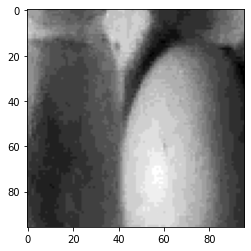

In [3]:
raw_bytes = np.array(HEXADECIMAL_BYTES)
image = np.reshape(raw_bytes,(96, 96)) #QCIF resolution

# Show the image
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
HEXADECIMAL_BYTES = [
  0x387048, 0x387048, 0x307048, 0x307048, 0x306c40, 0x306440, 0x386840, 0x386c40, 0x487858, 0x507050, 0x606c48, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ecf0, 0x7898a8, 0x586c70, 0x88a060, 0xe8f0d8, 0xe8f0f0, 0xe0f0e8, 0xb8e0d8, 0xb8e0b8, 0xc0e4c0, 0xc8f0b8, 0xc8f0d0, 0xd0f0d8, 0xc8f0e0, 0xb0e0d8, 0xb0e0c0, 0xa8d8b8, 0xa8d4c0, 0x98bcb0, 0x98bca8, 0x90b0a8, 0x809c90, 0x788c80, 0x607468, 0x586460, 0x404850, 0x384028, 0x383c20, 0x384028, 0x383c28, 0x404028, 0x404428, 0x484830, 0x484c38, 0x504c38, 0x505038, 0x485038, 0x484c38, 0x484430, 0x403c30, 0x282830, 0x282828, 0x282420, 0x302c20, 0x303020, 0x283028, 0x303028, 0x383428, 0x484030, 0x504830, 0x585840, 0x788848, 0x98ac80, 0x889c78, 0x90a080, 0x90a080, 0x90a888, 0xa0b490, 0xa0b898, 0x98b098, 0x98ac90, 0xa0ac90, 0x306848, 0x306448, 0x306840, 0x306840, 0x285c40, 0x306438, 0x386840, 0x386838, 0x487450, 0x486c50, 0x607448, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e4f0, 0x789ca8, 0x506470, 0x809860, 0xe8f0d0, 0xe8f0f0, 0xe0f0e8, 0xb8e0d0, 0xb8dcb8, 0xc8ecc8, 0xc8f0c8, 0xc0ecd0, 0xc8f0d8, 0xc8f0e0, 0xb0e4d0, 0xb0e0c0, 0xa8d0b8, 0xa8d0b8, 0xa0c0a8, 0xa0c4a0, 0x98c0a0, 0x98b498, 0x90a890, 0x789078, 0x687868, 0x505c60, 0x505440, 0x283428, 0x383828, 0x303428, 0x383830, 0x383830, 0x383428, 0x383428, 0x383828, 0x383430, 0x383028, 0x383420, 0x302c20, 0x303020, 0x302c20, 0x303020, 0x303428, 0x303420, 0x303020, 0x383820, 0x484428, 0x484830, 0x605830, 0x606040, 0x686c48, 0x909c58, 0x88a080, 0x889c78, 0x889c80, 0x90a080, 0x90a888, 0x98ac90, 0x98a890, 0x98a888, 0x98ac88, 0xa0ac90, 0x406c48, 0x386440, 0x306040, 0x386840, 0x306440, 0x386440, 0x386038, 0x386838, 0x487850, 0x486c50, 0x607050, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e4f0, 0x7898a0, 0x586c70, 0x708850, 0xd8f0b8, 0xe0f0e8, 0xd8f0e8, 0xb8e4d8, 0xc0ecc8, 0xd0f0d0, 0xc8f0d0, 0xc0ecd0, 0xc8f0d0, 0xc0ecd0, 0xb0dcc0, 0xb0dcc0, 0xa0ccb8, 0xa8c8b8, 0x98c0b0, 0xa0c0a8, 0x98bca8, 0x90b8a8, 0x90aca0, 0x80a090, 0x809480, 0x607c80, 0x687860, 0x405038, 0x383c30, 0x383420, 0x383828, 0x383828, 0x383828, 0x403c28, 0x383828, 0x383428, 0x383420, 0x383428, 0x383020, 0x302820, 0x303020, 0x303020, 0x303020, 0x282c20, 0x282c20, 0x303828, 0x484c30, 0x505438, 0x606840, 0x707c50, 0x788050, 0x90a468, 0x88a478, 0x88a480, 0x90a888, 0x88a080, 0x90a480, 0x98a888, 0x98a888, 0x90a488, 0x98ac88, 0x98ac88, 0x386448, 0x306040, 0x386440, 0x386440, 0x306038, 0x386438, 0x306440, 0x386838, 0x487850, 0x486c50, 0x607048, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e0f0, 0x7898a0, 0x587070, 0x607858, 0xb8dc98, 0xe0f0e0, 0xd8f0e0, 0xd0f0d0, 0xc8f0c8, 0xc8f0d0, 0xc8f0d8, 0xc0f0d8, 0xc0ecc8, 0xb8e4d0, 0xb0dcb8, 0xb0dcb8, 0xa0d0b8, 0xa8ccb0, 0xa8c8b0, 0xa0c4b0, 0xa0c4a8, 0xa0c4a8, 0x98b898, 0xa0bc98, 0x90b090, 0x809c88, 0x809c78, 0x607060, 0x506058, 0x505448, 0x484c40, 0x484838, 0x404030, 0x403c38, 0x383830, 0x303030, 0x302c28, 0x383428, 0x383420, 0x302c20, 0x303020, 0x303020, 0x303020, 0x404018, 0x404428, 0x485030, 0x585838, 0x605c40, 0x686c48, 0x788058, 0x788060, 0x889868, 0x90ac78, 0x88a480, 0x88a480, 0x88a480, 0x889c80, 0x90a880, 0x98a888, 0x98a888, 0x98ac88, 0x98b088, 0x386448, 0x386040, 0x386040, 0x386040, 0x385c38, 0x386040, 0x386440, 0x386838, 0x487850, 0x487050, 0x607048, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e0e8, 0x7898a0, 0x607468, 0x586858, 0xa0bc78, 0xd0f0c0, 0xd0f0e0, 0xc0f0d8, 0xc8f0d0, 0xc8f0d0, 0xc8f0d8, 0xc8f0d0, 0xb8e8c8, 0xb0d8c8, 0xa8d0b8, 0xa8d4b0, 0xa8ccb8, 0xa0c8b0, 0xa0c8b0, 0xa0c4b0, 0x98c0a8, 0x98bca8, 0x90b8a0, 0x98bca0, 0x90b098, 0x80a090, 0x88a490, 0x708878, 0x688070, 0x687c60, 0x607458, 0x687458, 0x586848, 0x586048, 0x505440, 0x484c40, 0x404038, 0x383c30, 0x384028, 0x404030, 0x404428, 0x404430, 0x383c28, 0x485028, 0x485038, 0x606440, 0x686840, 0x686c48, 0x707850, 0x788058, 0x788458, 0x889860, 0x90a478, 0x88a080, 0x88a480, 0x88a080, 0x88a080, 0x98a880, 0x90a480, 0x90a480, 0x98ac88, 0x98b088, 0x386440, 0x386040, 0x386040, 0x386040, 0x386038, 0x386440, 0x386440, 0x386838, 0x407850, 0x486c50, 0x587048, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e0e8, 0x789ca0, 0x506868, 0x405458, 0x98b478, 0xc8f0b8, 0xd0f0e0, 0xd0f0d8, 0xc8f0d0, 0xd0f0d8, 0xc8f0d8, 0xc0f0d8, 0xb8e0c8, 0xb0d8c0, 0xa8d0b8, 0xa8d0b8, 0xa8ccb8, 0xa0c8b0, 0xa0c8b0, 0xa0c0b0, 0xa0bca8, 0xa0bca8, 0x98b4a0, 0xa0c0a0, 0x90b0a0, 0x88a088, 0x88a480, 0x88a888, 0x809c78, 0x789078, 0x708c68, 0x788c68, 0x708468, 0x708468, 0x687c58, 0x607058, 0x505c48, 0x505840, 0x505c40, 0x505838, 0x485438, 0x485030, 0x505838, 0x586038, 0x585c40, 0x686840, 0x686c48, 0x707048, 0x707858, 0x787c58, 0x788060, 0x808c68, 0x889c78, 0x88a078, 0x88a078, 0x88a080, 0x90a080, 0x889c80, 0x90a080, 0x98a488, 0xa0ac88, 0x98ac90, 0x386448, 0x386440, 0x386040, 0x386040, 0x386038, 0x386440, 0x386440, 0x386c38, 0x407848, 0x406c50, 0x607450, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e0e8, 0x809ca0, 0x586c68, 0x485c58, 0xa0c078, 0xc8f0c0, 0xd8f0e0, 0xd0f0e0, 0xd0f0d8, 0xd0f0d8, 0xc8f0d0, 0xc0e4c8, 0xb8dcc0, 0xb0d4c0, 0xa8d0b8, 0xa8ccb8, 0xa8c8b0, 0xa0c8b0, 0xa0c8b0, 0xa0c0a8, 0xa0bca0, 0x98b8a0, 0x98b4a0, 0x98b8a0, 0x90b0a0, 0x88a890, 0x88a888, 0x88ac90, 0x88a088, 0x809888, 0x809c78, 0x809878, 0x708870, 0x688468, 0x688060, 0x607860, 0x587058, 0x607050, 0x586c48, 0x586848, 0x586448, 0x586440, 0x607048, 0x607040, 0x606848, 0x687040, 0x687448, 0x707848, 0x788050, 0x808058, 0x808458, 0x889460, 0x889c70, 0x88a078, 0x88a078, 0x88a480, 0x90a080, 0x90a080, 0x90a080, 0x98a488, 0xa0ac88, 0x98ac88, 0x386848, 0x386440, 0x386040, 0x386038, 0x386040, 0x386438, 0x306440, 0x386c38, 0x407848, 0x407048, 0x607450, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4e8, 0x809ca0, 0x506868, 0x486060, 0xa0c078, 0xc8f0c8, 0xd8f0e0, 0xd0f0e0, 0xd0f0e0, 0xd0f0e0, 0xc0ecd8, 0xb8e4c8, 0xb0d8c0, 0xa8d4c0, 0xa8d0b8, 0xa8c8b8, 0xa8c8b0, 0xa0c4b0, 0xa0c0b0, 0xa0bca8, 0x98b8a0, 0x98b8a0, 0x98b8a0, 0x98bca0, 0x90b4a0, 0x88a488, 0x88a488, 0x88a488, 0x88a080, 0x809478, 0x789470, 0x789078, 0x788c70, 0x708460, 0x687c60, 0x708058, 0x607450, 0x607048, 0x606c48, 0x606c48, 0x607448, 0x607048, 0x586448, 0x606440, 0x606440, 0x687040, 0x687848, 0x687c50, 0x708050, 0x788058, 0x788460, 0x808c60, 0x889c68, 0x88a078, 0x88a078, 0x90a480, 0x90a080, 0x90a080, 0x90a080, 0x98a480, 0xa0ac88, 0xa0ac88, 0x306040, 0x386440, 0x386040, 0x386038, 0x385c40, 0x386038, 0x386440, 0x306838, 0x407848, 0x487050, 0x607850, 0xf0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4e8, 0x80a0a8, 0x506868, 0x506460, 0xa8c470, 0xd0f0c8, 0xd8f0e0, 0xd8f0e0, 0xd0f0d8, 0xc0f0d8, 0xb8ecd0, 0xb8e4c8, 0xb0dcc0, 0xa8d4b8, 0xa8d0b8, 0xa8c8b8, 0xa0c8b0, 0xa0c4b0, 0xa0c0b0, 0xa0bca8, 0xa0b8a0, 0x98b4a0, 0x98b498, 0x98b898, 0x90b098, 0x88a488, 0x90a480, 0x88a088, 0x809480, 0x809478, 0x788c70, 0x708468, 0x708068, 0x688068, 0x687c60, 0x607858, 0x607850, 0x687c58, 0x687858, 0x607050, 0x607048, 0x607050, 0x607050, 0x606c48, 0x606c48, 0x687040, 0x687848, 0x707c50, 0x708050, 0x788058, 0x788058, 0x788458, 0x788858, 0x889878, 0x90a078, 0x909c80, 0x909c80, 0x909c80, 0x90a080, 0x98ac80, 0xa0b088, 0xa0b090, 0x305c40, 0x386440, 0x386440, 0x386040, 0x305c40, 0x385c40, 0x386440, 0x306838, 0x407840, 0x487050, 0x587450, 0xf0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4e8, 0x78a0a8, 0x506870, 0x486060, 0x98b878, 0xc8f0c0, 0xd0f0e0, 0xc8f0d8, 0xc0f0d8, 0xb8e8d0, 0xb0e0c0, 0xb0e0c0, 0xa8d4b8, 0xa0c8b0, 0xa8ccb0, 0xa8ccb0, 0xa0c4b0, 0xa0c4b0, 0xa0c0a8, 0xa0bca8, 0x98b8a0, 0x98b4a0, 0x90b098, 0x90b098, 0x90a898, 0x88a088, 0x809480, 0x809080, 0x788870, 0x788868, 0x708468, 0x687c68, 0x687c60, 0x687c58, 0x607c60, 0x687c58, 0x607850, 0x687458, 0x687450, 0x607050, 0x606c50, 0x687448, 0x687448, 0x607048, 0x687048, 0x606c48, 0x707450, 0x707c50, 0x708050, 0x707c58, 0x707c58, 0x707c58, 0x808c60, 0x90a470, 0x90a078, 0x98ac88, 0x98a888, 0x98a888, 0x98a888, 0xa0ac88, 0xa0b090, 0xa0ac90, 0x386448, 0x386440, 0x386040, 0x386040, 0x386438, 0x386040, 0x386440, 0x306838, 0x407840, 0x487450, 0x587450, 0xf0f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4e8, 0x78a0a8, 0x506c70, 0x485c58, 0x98b468, 0xc8ecb8, 0xc8f0d8, 0xc0f0d0, 0xb8e8c8, 0xb0dcc0, 0xa8d0c0, 0xb0d0b8, 0xa8ccb8, 0xa8ccb8, 0xa0c4b0, 0xa0c4a8, 0xa0c4b0, 0xa0c4b0, 0xa0c4b0, 0xa0c0b0, 0x98b8a0, 0x98b4a0, 0x98b098, 0x90b098, 0x88a490, 0x809c88, 0x789080, 0x788c70, 0x788c78, 0x788868, 0x708068, 0x707868, 0x687860, 0x687858, 0x607858, 0x607458, 0x607050, 0x606c50, 0x607050, 0x607050, 0x607050, 0x687050, 0x687050, 0x687048, 0x687448, 0x687450, 0x687450, 0x707850, 0x707c50, 0x707850, 0x787c58, 0x787c58, 0x788458, 0x889468, 0x90a078, 0x98b088, 0x98b490, 0x98b090, 0x98b090, 0xa0b490, 0xa0b090, 0xa0ac90, 0x305c48, 0x386040, 0x386040, 0x306038, 0x386038, 0x386040, 0x386440, 0x386838, 0x487840, 0x487450, 0x587450, 0xf0f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4e8, 0x80a0a8, 0x506c70, 0x405c58, 0x98b470, 0xb8e4b8, 0xc0f0d0, 0xb8ecc8, 0xb8e4c0, 0xb0dcb8, 0xa8ccb8, 0xb0d0b8, 0xb0d0b8, 0xa8ccb8, 0xa0c4b0, 0xa0c4b0, 0xa0c4b0, 0xa0c4b0, 0xa0c4b0, 0x98c0b0, 0x98b8a8, 0x90b0a0, 0x90ac98, 0x90ac98, 0x88a490, 0x88a088, 0x789488, 0x789078, 0x789078, 0x708470, 0x708068, 0x707c68, 0x687860, 0x687460, 0x607058, 0x607050, 0x607050, 0x607050, 0x687050, 0x606c50, 0x607050, 0x607050, 0x687450, 0x687048, 0x687048, 0x687850, 0x687850, 0x707850, 0x707c50, 0x707850, 0x707858, 0x707458, 0x687458, 0x788860, 0x90a870, 0xa0b488, 0x98b090, 0xa0b490, 0xa0b490, 0xa0b090, 0xa0b090, 0xa0b090, 0x305c40, 0x386040, 0x386040, 0x306038, 0x386038, 0x386038, 0x386440, 0x386840, 0x407440, 0x487450, 0x607c50, 0xf0f090, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4e8, 0x80a4b0, 0x587070, 0x506458, 0x98b870, 0xc0e4b8, 0xb8e4c0, 0xb8e4c0, 0xb0dcc0, 0xb0d8b8, 0xa8ccc0, 0xb0d0b8, 0xb0ccb8, 0xa8c8b0, 0xa0c4b0, 0xa0c4b0, 0xa0c4b0, 0xa0c4b0, 0xa0c4b0, 0x98c0b0, 0x98b8a0, 0x90b0a0, 0x90ac98, 0x90ac98, 0x88a898, 0x88a490, 0x809488, 0x789078, 0x789078, 0x708470, 0x708068, 0x687c68, 0x687c60, 0x687858, 0x607458, 0x607450, 0x607050, 0x607050, 0x607050, 0x687050, 0x606c50, 0x606c50, 0x606c48, 0x687050, 0x687050, 0x687050, 0x707848, 0x707850, 0x707850, 0x707850, 0x707850, 0x707858, 0x788058, 0x788858, 0x889c68, 0x98b088, 0x98b090, 0xa0b090, 0xa0b090, 0xa0b090, 0xa0b090, 0xa0b090, 0x306040, 0x386040, 0x386040, 0x306038, 0x386038, 0x306040, 0x386440, 0x306438, 0x487838, 0x487450, 0x607c50, 0xe8f090, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4e8, 0x80a4a8, 0x506878, 0x405858, 0x789458, 0xc0e4b8, 0xb0e0c0, 0xb0dcc0, 0xb0d8b8, 0xa8d4b8, 0xa8d0b8, 0xa8d0b8, 0xa8ccb8, 0xa8c8b0, 0xa8c8b0, 0xa8c4b0, 0xa0c4b0, 0xa0c4b0, 0xa0c4b0, 0xa0c4a8, 0x98b4a8, 0x98b0a0, 0x90ac98, 0x90ac98, 0x88a898, 0x88a490, 0x789488, 0x789478, 0x789070, 0x708470, 0x708068, 0x707c68, 0x707c60, 0x687858, 0x687458, 0x607450, 0x687450, 0x687050, 0x687050, 0x606c50, 0x606c50, 0x607050, 0x607050, 0x607050, 0x687450, 0x687050, 0x687450, 0x687450, 0x707850, 0x707850, 0x707858, 0x707850, 0x707858, 0x687458, 0x809460, 0xa0b478, 0x98ac88, 0x98b088, 0xa0b090, 0xa0b090, 0xa0b498, 0xa0b090, 0x386440, 0x386840, 0x306040, 0x386038, 0x386040, 0x386040, 0x386440, 0x306040, 0x487438, 0x507850, 0x607c50, 0xe8f088, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4e8, 0x88acb0, 0x506c78, 0x405458, 0x708848, 0xb8d8b0, 0xb0dcc0, 0xb0d8b8, 0xa8d4b8, 0xa8d0b8, 0xa8d4b8, 0xa8d0b8, 0xa8ccb8, 0xa8c8b8, 0xa8c4b0, 0xa8c4b0, 0xa0c4b0, 0xa8c4b0, 0xa0c4a8, 0xa0c0a8, 0x98b4a0, 0x98b0a0, 0x90ac98, 0x90a898, 0x90a898, 0x88a088, 0x789488, 0x789478, 0x708c78, 0x708470, 0x708068, 0x707c60, 0x687c60, 0x687860, 0x687858, 0x607450, 0x607450, 0x687050, 0x687050, 0x606c50, 0x606c50, 0x606c50, 0x607048, 0x687448, 0x687450, 0x687450, 0x687450, 0x687450, 0x707850, 0x707850, 0x707c50, 0x707c58, 0x707c58, 0x707c50, 0x788458, 0x98ac68, 0x98b090, 0x98b088, 0xa0b088, 0xa0b090, 0xa0ac90, 0x98a888, 0x386840, 0x386840, 0x386440, 0x386040, 0x386040, 0x386040, 0x386440, 0x306040, 0x487440, 0x507850, 0x587850, 0xe8f088, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e8e8, 0x88b0b0, 0x506c78, 0x405c60, 0x607c50, 0xb0d8a8, 0xb0d8b8, 0xb0d8b8, 0xa8d4b0, 0xa8d0b8, 0xa8d0b8, 0xa8d0b8, 0xa8ccb8, 0xa8ccb0, 0xa0c4b0, 0xa0c4b0, 0xa0c0b0, 0x98bca8, 0x98bca8, 0xa0c0a8, 0x98b4a0, 0x98b0a0, 0x90ac98, 0x88a898, 0x88a498, 0x88a088, 0x809880, 0x789078, 0x708c70, 0x708470, 0x708068, 0x707c68, 0x687c60, 0x687c60, 0x687458, 0x607050, 0x687050, 0x687050, 0x607050, 0x606c50, 0x606c50, 0x607050, 0x607048, 0x687448, 0x687450, 0x687450, 0x687450, 0x687450, 0x687450, 0x707850, 0x707850, 0x707c50, 0x707c58, 0x707858, 0x707c60, 0x90a468, 0xa0b880, 0xa0b488, 0x98b088, 0x98ac90, 0x98ac88, 0x98a888, 0x386848, 0x386440, 0x386438, 0x386440, 0x306040, 0x306040, 0x386438, 0x386438, 0x407440, 0x507c50, 0x607c50, 0xe0f080, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e8f0, 0x88b0b0, 0x506c78, 0x486058, 0x587040, 0xb0d090, 0xa8d4b8, 0xa8d4b8, 0xa8d4b8, 0xa8d0b0, 0xa8d4b8, 0xa8d0b8, 0xa8ccb8, 0xa8ccb8, 0xa0c8b0, 0xa0c8b0, 0xa0c4a8, 0xa0c0a8, 0x98bca0, 0x98b8a0, 0x98b4a0, 0x98b098, 0x90ac98, 0x88a498, 0x80a090, 0x809c88, 0x809c80, 0x789078, 0x708c70, 0x708470, 0x708068, 0x687c68, 0x687c60, 0x687c60, 0x687858, 0x607050, 0x687050, 0x687050, 0x607050, 0x607050, 0x607050, 0x606c48, 0x607048, 0x607048, 0x607448, 0x687450, 0x687448, 0x687448, 0x687850, 0x707850, 0x707c50, 0x707c58, 0x707c58, 0x707850, 0x788058, 0x889058, 0x909c70, 0xa0b080, 0xa0b088, 0x98ac88, 0x98a480, 0x98a880, 0x386448, 0x386440, 0x386440, 0x386440, 0x386038, 0x386840, 0x386840, 0x386440, 0x407040, 0x507c50, 0x587850, 0xd8e880, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e8e8, 0x90b4b0, 0x486c78, 0x486060, 0x486048, 0xa8cc88, 0xa8ccb8, 0xa8d0b0, 0xa8d0b0, 0xa8d0b8, 0xa8d0b8, 0xa8d0b8, 0xa8ccb8, 0xa8ccb8, 0xa8c8b0, 0xa0c8b0, 0xa0c4a8, 0x98c0a8, 0x98bca0, 0x98b8a0, 0x98b4a0, 0x90b0a0, 0x90ac98, 0x88a890, 0x88a490, 0x809c88, 0x809c80, 0x789078, 0x708870, 0x708470, 0x688068, 0x687c60, 0x687c60, 0x687c60, 0x687858, 0x607050, 0x607050, 0x607050, 0x607050, 0x607050, 0x607050, 0x606c50, 0x607048, 0x607048, 0x687048, 0x687450, 0x687050, 0x687048, 0x707450, 0x707850, 0x707850, 0x707c50, 0x707c58, 0x687458, 0x707858, 0x707858, 0x889068, 0xa0b078, 0x98a880, 0x90a088, 0x90a480, 0x90a480, 0x386448, 0x386440, 0x386440, 0x386040, 0x386040, 0x386440, 0x386440, 0x386440, 0x406c40, 0x508050, 0x607c50, 0xc0d070, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4e8, 0x90b4c0, 0x507880, 0x405c60, 0x486040, 0xa0bc78, 0xa8ccb8, 0xa8d0b0, 0xa8d0b0, 0xa8d4b8, 0xa8d4b8, 0xa8d0b8, 0xa8ccb8, 0xa8ccb0, 0xa8c8b0, 0xa0c8a8, 0xa0c4a8, 0xa0c0a8, 0x98b8a0, 0x98b8a0, 0x98b498, 0x90b098, 0x90ac90, 0x88a890, 0x88a890, 0x80a488, 0x789880, 0x789478, 0x788c70, 0x708468, 0x688068, 0x708060, 0x687c58, 0x687c60, 0x687858, 0x607058, 0x607050, 0x607050, 0x607050, 0x687450, 0x607050, 0x607050, 0x607048, 0x607050, 0x687448, 0x687448, 0x687448, 0x687448, 0x707850, 0x707850, 0x707858, 0x707c58, 0x707858, 0x707858, 0x788058, 0x788458, 0x808858, 0x90a470, 0x90a480, 0x909880, 0x889878, 0x90a480, 0x386048, 0x386440, 0x386440, 0x386440, 0x386440, 0x386440, 0x386440, 0x386440, 0x407040, 0x508050, 0x587858, 0xc8d478, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8ece8, 0x98c0b8, 0x588088, 0x405c60, 0x385450, 0x90b070, 0xb0d4b0, 0xa8ccb0, 0xa8ccb0, 0xa8d0b8, 0xa8d0b8, 0xa8d0b8, 0xa8ccb8, 0xa8ccb0, 0xa0c8b0, 0xa0c4b0, 0xa0c4a8, 0x98c0a8, 0x98bca0, 0x98b4a0, 0x90aca0, 0x90ac98, 0x90ac90, 0x88a890, 0x88a890, 0x80a088, 0x789880, 0x789478, 0x708870, 0x708468, 0x708068, 0x708060, 0x687858, 0x687858, 0x687858, 0x687058, 0x687050, 0x607050, 0x607050, 0x586848, 0x606c48, 0x607050, 0x607048, 0x687048, 0x687048, 0x687448, 0x687848, 0x687450, 0x707050, 0x707450, 0x707850, 0x707858, 0x707858, 0x707c58, 0x707c58, 0x707858, 0x707c58, 0x90a068, 0x90a470, 0x889478, 0x889868, 0x88a078, 0x386040, 0x386040, 0x386440, 0x386840, 0x386440, 0x386440, 0x386440, 0x386040, 0x407040, 0x588050, 0x587858, 0xc8d878, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e8e8, 0x90bcc0, 0x608488, 0x486060, 0x486048, 0x88a460, 0xa8d0b0, 0xa8c8b0, 0xa8cca8, 0xa8d0b8, 0xa8d0b8, 0xa8d0b0, 0xa8d0b0, 0xa8d4b0, 0xa0c8a8, 0xa0c0a8, 0xa0bca8, 0x98bca8, 0x98bca0, 0x98b4a0, 0x90ac98, 0x90ac98, 0x90a890, 0x88ac90, 0x88ac90, 0x80a088, 0x809480, 0x789478, 0x708870, 0x708468, 0x708068, 0x687c60, 0x687458, 0x687858, 0x687858, 0x687058, 0x687050, 0x607050, 0x607050, 0x607050, 0x606c48, 0x607048, 0x607048, 0x687050, 0x607450, 0x687448, 0x687450, 0x687450, 0x707050, 0x707450, 0x707850, 0x707858, 0x707c58, 0x707c58, 0x707c58, 0x707c50, 0x787c50, 0x808c60, 0x889468, 0x809070, 0x889c68, 0x90a878, 0x386840, 0x386840, 0x386840, 0x386440, 0x386040, 0x305c38, 0x385c38, 0x385c38, 0x406c40, 0x588450, 0x587858, 0xd0dc78, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e4e8, 0x98c0c0, 0x607c88, 0x405c60, 0x304848, 0x789458, 0xb0d8a8, 0xa0cca8, 0xa0ccb0, 0xa8d4b8, 0xa8d4b8, 0xa8d0b8, 0xa0c8b0, 0xa0c8b0, 0x98c0a8, 0xa0c0a8, 0x98c0a8, 0x98bca8, 0x98bca8, 0x98b0a0, 0x98ac98, 0x90a898, 0x90ac98, 0x90ac98, 0x90ac98, 0x88a088, 0x809880, 0x789478, 0x708870, 0x708468, 0x708068, 0x688060, 0x687c60, 0x687c60, 0x687858, 0x607058, 0x607050, 0x607050, 0x607050, 0x607050, 0x607048, 0x607048, 0x607050, 0x607050, 0x687450, 0x687448, 0x687450, 0x687450, 0x707850, 0x707850, 0x707850, 0x707858, 0x707c58, 0x707c58, 0x707c58, 0x707c58, 0x707458, 0x787c60, 0x889460, 0x809068, 0x809868, 0x809878, 0x387040, 0x386840, 0x306040, 0x306038, 0x386840, 0x306840, 0x386840, 0x406c40, 0x407448, 0x588050, 0x607c60, 0xd0dc78, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4e8, 0xa0c8c0, 0x689098, 0x486458, 0x385048, 0x708c50, 0xa0c4a8, 0xa0c0b0, 0xa0c8a8, 0xa8cca8, 0xa8ccb0, 0xa8ccb0, 0xa0c8b0, 0xa0c4a8, 0x98b8a8, 0xa0bca8, 0xa0bca8, 0x98bca8, 0x98b8a8, 0x90b0a0, 0x90b098, 0x90b098, 0x90b098, 0x90ac98, 0x90ac98, 0x88a090, 0x809880, 0x789478, 0x708470, 0x708468, 0x708068, 0x687c60, 0x687c60, 0x687c60, 0x687458, 0x607050, 0x607050, 0x607050, 0x607050, 0x606c48, 0x606c48, 0x607048, 0x607048, 0x687048, 0x687048, 0x687450, 0x687450, 0x687450, 0x707450, 0x707850, 0x707850, 0x707850, 0x707c50, 0x707c58, 0x707c58, 0x707c58, 0x787c58, 0x808458, 0x889060, 0x889468, 0x809070, 0x809068, 0x407848, 0x387448, 0x387440, 0x387440, 0x387040, 0x407848, 0x407c48, 0x407848, 0x407050, 0x608c58, 0x608068, 0xd0dc70, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8ece8, 0xa8d0c0, 0x709498, 0x405c60, 0x304c48, 0x587848, 0xa8c8a0, 0xa0ccb0, 0xa0c8a8, 0xa0c8b0, 0xa0c4b0, 0xa0c4a8, 0xa0c4a8, 0xa0c0a8, 0xa0bca8, 0x98bca8, 0x98c0a8, 0x98c0a8, 0x98b8a8, 0x90b098, 0x90b098, 0x98b498, 0x90b098, 0x90ac98, 0x88a898, 0x80a088, 0x809c80, 0x789478, 0x708870, 0x708468, 0x708068, 0x688060, 0x687c60, 0x687c58, 0x687458, 0x607050, 0x607050, 0x607050, 0x607050, 0x606c48, 0x606c48, 0x606c48, 0x607048, 0x687048, 0x687448, 0x687450, 0x687450, 0x687450, 0x687450, 0x707850, 0x687850, 0x687850, 0x707c50, 0x707c58, 0x707c58, 0x707c58, 0x787c58, 0x787c60, 0x808c60, 0x809468, 0x809870, 0x788c70, 0x407850, 0x387448, 0x407c48, 0x407c48, 0x387848, 0x407848, 0x407848, 0x407448, 0x487448, 0x608850, 0x608468, 0xc8d468, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e8e8, 0xa0ccc0, 0x7098a0, 0x486860, 0x385048, 0x485c38, 0x98b880, 0xa0c8b8, 0xa0c8a8, 0xa0c8a8, 0xa0c8a8, 0xa0c4a8, 0xa0c0a8, 0xa0c0a8, 0xa0c0a8, 0xa0c0a8, 0x98c0a8, 0x98bca8, 0x98b4a0, 0x90b0a0, 0x98b498, 0x90b098, 0x90b098, 0x90b098, 0x88a490, 0x80a088, 0x809880, 0x708c78, 0x708870, 0x708468, 0x708468, 0x688060, 0x687c60, 0x687c58, 0x687858, 0x687450, 0x607050, 0x607050, 0x607450, 0x606c48, 0x606c48, 0x606c48, 0x607048, 0x687048, 0x687048, 0x687448, 0x687450, 0x687050, 0x687050, 0x707450, 0x687450, 0x687450, 0x707c50, 0x707c50, 0x707c50, 0x707c58, 0x788058, 0x788058, 0x889058, 0x889468, 0x788868, 0x707c60, 0x387850, 0x387848, 0x307040, 0x387440, 0x387440, 0x387040, 0x387040, 0x407040, 0x406c48, 0x587c48, 0x607860, 0xc8d468, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8f0e8, 0xa8d4c0, 0x80a498, 0x507070, 0x385058, 0x304c40, 0x98b478, 0xa0c4a0, 0xa0c8a8, 0xa8c8a8, 0xa0c4a8, 0xa0c4a8, 0xa0c0a8, 0xa0c0a8, 0xa0c0a8, 0xa0c0a8, 0x98bca8, 0x98b8a8, 0x98b4a0, 0x98b0a0, 0x90b098, 0x90b098, 0x90b098, 0x88ac98, 0x88a490, 0x809c88, 0x789478, 0x708870, 0x708870, 0x688068, 0x688060, 0x688060, 0x687c60, 0x687858, 0x607058, 0x687458, 0x607050, 0x607050, 0x607050, 0x606c48, 0x606c48, 0x606c48, 0x607048, 0x687048, 0x687448, 0x687448, 0x687450, 0x687450, 0x687050, 0x687450, 0x687850, 0x687450, 0x707850, 0x687c50, 0x707c50, 0x707c58, 0x787c58, 0x788058, 0x788460, 0x788860, 0x788868, 0x788460, 0x386848, 0x386840, 0x386840, 0x386840, 0x386840, 0x386840, 0x386840, 0x406c40, 0x407040, 0x507c48, 0x607c60, 0xc0d068, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8ece8, 0xa0d0c8, 0x78a4a8, 0x507470, 0x385050, 0x304038, 0x90a860, 0x98b4a0, 0x98b8a0, 0xa0c0a0, 0xa0c4a8, 0xa0c4a8, 0xa0c0a8, 0xa0c0a8, 0xa0c0a8, 0xa0c0a8, 0x98b8a0, 0x90b4a0, 0x98b4a0, 0x98b4a0, 0x90b098, 0x90b098, 0x90ac98, 0x90a890, 0x809c80, 0x789480, 0x809878, 0x708870, 0x708870, 0x688068, 0x708460, 0x708060, 0x687c60, 0x687858, 0x607058, 0x687450, 0x607050, 0x607048, 0x606c48, 0x606c48, 0x606c48, 0x606c48, 0x607048, 0x687048, 0x607048, 0x687448, 0x687850, 0x687450, 0x687450, 0x687450, 0x687850, 0x687450, 0x707850, 0x707850, 0x707850, 0x707c50, 0x787c58, 0x788058, 0x788058, 0x788458, 0x788860, 0x708060, 0x386c48, 0x386c40, 0x386440, 0x386440, 0x386440, 0x386440, 0x386840, 0x386c40, 0x386c40, 0x507c48, 0x587c60, 0xc0cc68, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8ece8, 0xa8d4c0, 0x88aca0, 0x507478, 0x304c50, 0x283840, 0x789450, 0xa0c0a0, 0xa0c0a0, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c0a8, 0xa0c0a8, 0xa0c0a8, 0xa0c0a8, 0x98b4a8, 0x98b4a0, 0x98b4a0, 0x98b098, 0x98b098, 0x90b098, 0x90ac98, 0x88a490, 0x809c80, 0x809888, 0x789878, 0x788c68, 0x708470, 0x687c68, 0x687c60, 0x687c60, 0x687c60, 0x687858, 0x607458, 0x607050, 0x607050, 0x607048, 0x586c48, 0x606c48, 0x606c48, 0x606c48, 0x687048, 0x687048, 0x687048, 0x687448, 0x687850, 0x687450, 0x687450, 0x687450, 0x687450, 0x687850, 0x687850, 0x707850, 0x707c50, 0x707c50, 0x707c58, 0x788058, 0x788460, 0x788460, 0x707c60, 0x707858, 0x387048, 0x386c40, 0x386048, 0x386040, 0x386440, 0x386440, 0x386440, 0x386c40, 0x386840, 0x507440, 0x607c58, 0xb8c868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ecf0, 0xa8d0c8, 0x88b0a8, 0x587880, 0x385050, 0x304440, 0x708848, 0x98b498, 0xa0bca0, 0xa8c8a8, 0xa0c8b0, 0xa0c4b0, 0xa0c0b0, 0xa0c0a8, 0xa0c0a8, 0xa0c0a8, 0x98b4a0, 0x98b4a0, 0x98b4a0, 0x98b498, 0x98b098, 0x90b098, 0x90ac90, 0x88a490, 0x809c80, 0x809c80, 0x789478, 0x789070, 0x708470, 0x687c60, 0x707c60, 0x687858, 0x687860, 0x687858, 0x607458, 0x607050, 0x607050, 0x586c50, 0x606c48, 0x606c48, 0x606c48, 0x606c48, 0x687048, 0x687448, 0x687448, 0x607448, 0x687850, 0x687450, 0x687450, 0x687450, 0x687450, 0x687850, 0x707850, 0x707850, 0x707850, 0x707c50, 0x787c50, 0x787c58, 0x788058, 0x708058, 0x687860, 0x687450, 0x387048, 0x386c40, 0x306048, 0x386040, 0x386440, 0x386440, 0x386440, 0x406c48, 0x406c40, 0x507448, 0x607c58, 0xb8c868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0f0f0, 0xa8d4c0, 0x90b4a8, 0x587880, 0x385058, 0x304440, 0x506c38, 0x98c090, 0xa0c4a0, 0xa8cca8, 0xa0c8b0, 0xa0c0b0, 0xa0c0a8, 0xa0c0a8, 0xa0bca8, 0xa0bca8, 0x98b4a0, 0x98b4a0, 0x98b498, 0x98b4a0, 0x90b0a0, 0x90ac98, 0x88a890, 0x88a490, 0x809c80, 0x809880, 0x789078, 0x809470, 0x708468, 0x707c68, 0x707c60, 0x687860, 0x687860, 0x607860, 0x607458, 0x607050, 0x607050, 0x586850, 0x586c48, 0x606c48, 0x606c48, 0x606c48, 0x687448, 0x687448, 0x687448, 0x687448, 0x687450, 0x687450, 0x687450, 0x687450, 0x687450, 0x707850, 0x687850, 0x687850, 0x707850, 0x707c50, 0x707c58, 0x787c58, 0x707458, 0x707458, 0x687458, 0x607458, 0x387048, 0x306438, 0x386840, 0x386440, 0x386440, 0x386438, 0x306040, 0x386440, 0x386440, 0x507448, 0x607c58, 0xb0c060, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0f0f0, 0xa8d4c0, 0x90b8b0, 0x608890, 0x405c58, 0x384c48, 0x405830, 0x98b880, 0xa0c4a8, 0xa8cca8, 0xa8c8b0, 0xa0c4b0, 0xa0c4a8, 0xa0c0a8, 0xa0bca8, 0xa0bca8, 0x98b4a0, 0x98b4a0, 0x98b8a0, 0x98b8a0, 0x98b098, 0x90ac98, 0x90a890, 0x889c88, 0x809888, 0x789480, 0x788c78, 0x789070, 0x708068, 0x687c68, 0x708060, 0x687858, 0x687858, 0x607458, 0x607450, 0x607050, 0x606c48, 0x586c48, 0x586848, 0x606848, 0x606c48, 0x606840, 0x687448, 0x687450, 0x687450, 0x687448, 0x687448, 0x687850, 0x687450, 0x687450, 0x687450, 0x707850, 0x687850, 0x687850, 0x687850, 0x687c50, 0x707c50, 0x707c58, 0x707858, 0x707858, 0x687458, 0x687050, 0x386c48, 0x386840, 0x386440, 0x386440, 0x386438, 0x386440, 0x386440, 0x386040, 0x406438, 0x507448, 0x608058, 0xb0c060, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0f0f0, 0xa8d4c0, 0x98bca8, 0x688890, 0x405c58, 0x304448, 0x384c38, 0x98b478, 0xa0c4a8, 0xa8ccb0, 0xa8ccb0, 0xa0c4b0, 0xa0c0a8, 0xa0c0a8, 0xa0bca8, 0xa0bca8, 0x98b8a0, 0x98b4a0, 0x98b4a0, 0x98b8a0, 0x90b0a0, 0x90ac98, 0x88a490, 0x809c88, 0x809480, 0x789480, 0x789078, 0x789078, 0x708468, 0x688068, 0x688060, 0x607858, 0x687858, 0x607458, 0x607050, 0x607050, 0x606c50, 0x606c50, 0x586848, 0x586848, 0x606848, 0x606c48, 0x607450, 0x687450, 0x687050, 0x687048, 0x687448, 0x687450, 0x687450, 0x687450, 0x687450, 0x687850, 0x707850, 0x687850, 0x687450, 0x687850, 0x707c50, 0x707c58, 0x707858, 0x687858, 0x607058, 0x607050, 0x386840, 0x386840, 0x386440, 0x386440, 0x386440, 0x386440, 0x386440, 0x406440, 0x406c40, 0x487448, 0x608058, 0xa8b868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ece8, 0xa8d0c0, 0x90b8a8, 0x608898, 0x405858, 0x304840, 0x405030, 0x90ac70, 0xa0c8b0, 0xa0c4a8, 0xa0c4a8, 0xa0c0a8, 0xa0c0a8, 0xa0bca8, 0xa0bca8, 0x98b8a0, 0x98b8a0, 0x98b8a0, 0x98b4a0, 0x98b4a0, 0x90b0a0, 0x90ac90, 0x88a490, 0x809c88, 0x809880, 0x789478, 0x789078, 0x788c70, 0x688468, 0x687c68, 0x688060, 0x607860, 0x687850, 0x687450, 0x607050, 0x607050, 0x606450, 0x586448, 0x606840, 0x586840, 0x586848, 0x606c48, 0x687450, 0x687450, 0x687048, 0x607448, 0x687448, 0x687450, 0x687450, 0x687450, 0x687850, 0x687450, 0x687450, 0x707850, 0x687850, 0x687048, 0x687448, 0x707850, 0x707850, 0x687850, 0x607050, 0x606c48, 0x386448, 0x386440, 0x386440, 0x406840, 0x386038, 0x386440, 0x386440, 0x406440, 0x406c40, 0x487048, 0x688450, 0xa8b868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8ece8, 0xb0d0c0, 0x98b8a8, 0x709090, 0x406060, 0x304c48, 0x304c30, 0x90ac70, 0xa0c8b0, 0x98c0a8, 0xa0c4b0, 0xa0c0a8, 0xa0c0a8, 0xa0c0a8, 0xa0bca8, 0x98b8a0, 0x98b8a0, 0x98b8a0, 0x98b8a0, 0x90b4a0, 0x90b098, 0x88a890, 0x88a890, 0x809c80, 0x789480, 0x789478, 0x708c78, 0x708c70, 0x688468, 0x688460, 0x607860, 0x607858, 0x607458, 0x607050, 0x607050, 0x606c50, 0x586450, 0x586448, 0x586848, 0x586848, 0x586848, 0x586848, 0x606c48, 0x687048, 0x607048, 0x607448, 0x687448, 0x687450, 0x707850, 0x687850, 0x687850, 0x687450, 0x687450, 0x687850, 0x687450, 0x687048, 0x687450, 0x707850, 0x687850, 0x687850, 0x586c50, 0x586c48, 0x306448, 0x386840, 0x386440, 0x406440, 0x386038, 0x406440, 0x386440, 0x386440, 0x406c40, 0x487448, 0x608450, 0xa8b868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e8e8, 0xb0d0c0, 0x90b8b0, 0x689498, 0x406060, 0x304848, 0x304830, 0x90ac60, 0xa8d4b8, 0xa0ccb0, 0xa0c8b0, 0xa0c0a8, 0xa0c0a8, 0xa0bca8, 0x98bca0, 0x98b8a0, 0x98b8a0, 0x98b8a0, 0x98b498, 0x90b498, 0x90ac98, 0x88a490, 0x809c88, 0x809c80, 0x789880, 0x789478, 0x709078, 0x708868, 0x687c60, 0x688060, 0x607860, 0x607458, 0x687858, 0x607050, 0x606c50, 0x606c48, 0x586448, 0x586448, 0x586848, 0x586c40, 0x586448, 0x606c48, 0x687048, 0x687048, 0x607048, 0x607048, 0x687448, 0x687450, 0x707850, 0x687850, 0x687850, 0x687450, 0x687048, 0x707850, 0x687450, 0x687450, 0x687450, 0x707850, 0x687850, 0x687448, 0x606c50, 0x606c48, 0x386848, 0x386438, 0x386440, 0x386040, 0x386040, 0x386440, 0x386440, 0x386438, 0x406c40, 0x487448, 0x688448, 0xa8bc68, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc8ece8, 0xa8d4c0, 0x90b8b0, 0x689498, 0x406060, 0x304848, 0x304430, 0x90ac60, 0xb0d8b0, 0xa0c8b0, 0xa0c4b0, 0xa0c8a8, 0xa0c4a8, 0xa0c0a8, 0x98bca0, 0x98bca0, 0xa0bca0, 0x90a8a0, 0x90ac98, 0x90a898, 0x88a890, 0x80a490, 0x80a088, 0x789c80, 0x789880, 0x789878, 0x708c78, 0x708870, 0x687c68, 0x687c60, 0x607460, 0x607458, 0x607050, 0x606c48, 0x607050, 0x606c48, 0x586848, 0x586848, 0x586c48, 0x586848, 0x586440, 0x606c48, 0x686c48, 0x687048, 0x687048, 0x687448, 0x687048, 0x687050, 0x707848, 0x687850, 0x687850, 0x687850, 0x687450, 0x687448, 0x687450, 0x707050, 0x687450, 0x687850, 0x687850, 0x687448, 0x586c50, 0x586c48, 0x386c48, 0x406840, 0x386440, 0x386040, 0x386040, 0x386440, 0x406840, 0x406840, 0x406c48, 0x487048, 0x608448, 0xb0c068, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0e8d8, 0xa8d0c0, 0x90b8b0, 0x689498, 0x406060, 0x304c40, 0x384c38, 0x88ac60, 0xb0d4b0, 0xa0c8a8, 0xa0c8a8, 0xa0c8a8, 0xa0c4a8, 0xa0c0a8, 0xa0bca8, 0x98bca8, 0xa0bca0, 0x98b098, 0x98ac98, 0x90ac98, 0x88a490, 0x80a088, 0x80a080, 0x809c80, 0x789880, 0x789478, 0x708c78, 0x708870, 0x688068, 0x687c60, 0x687460, 0x607058, 0x607050, 0x606c50, 0x606848, 0x606c48, 0x586848, 0x586440, 0x506440, 0x506040, 0x586440, 0x606c48, 0x607048, 0x687048, 0x687048, 0x607048, 0x687048, 0x687048, 0x707848, 0x687850, 0x687850, 0x687450, 0x687450, 0x687448, 0x707450, 0x707050, 0x687450, 0x707850, 0x687850, 0x687848, 0x586c48, 0x607040, 0x386840, 0x386840, 0x386440, 0x386440, 0x386040, 0x386440, 0x406840, 0x386840, 0x406c48, 0x487048, 0x688448, 0xb0c068, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc0e8d8, 0xa0ccb8, 0x90b8a8, 0x689498, 0x406060, 0x385440, 0x405838, 0x88a868, 0xb0d0b8, 0xa0c8a8, 0xa0c8b0, 0xa8cca8, 0xa0c4a8, 0xa0c0a8, 0xa0c0a8, 0x98bca8, 0x98b8a8, 0x90b098, 0x90ac98, 0x90ac98, 0x88a490, 0x80a090, 0x80a080, 0x809c80, 0x809c78, 0x789878, 0x709078, 0x688868, 0x688068, 0x687c60, 0x607460, 0x606c50, 0x586c50, 0x586c50, 0x586c48, 0x586848, 0x506040, 0x506040, 0x506040, 0x586038, 0x606440, 0x606c48, 0x607048, 0x607048, 0x687448, 0x687448, 0x607048, 0x687048, 0x687850, 0x687850, 0x687850, 0x687850, 0x687450, 0x687050, 0x687450, 0x687450, 0x687450, 0x687850, 0x687850, 0x687848, 0x586848, 0x606c40, 0x386840, 0x386840, 0x386840, 0x386440, 0x386040, 0x386440, 0x406840, 0x406840, 0x406840, 0x487048, 0x688048, 0xa8bc68, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc0ecd0, 0xa0ccb8, 0x90bca8, 0x709498, 0x405c60, 0x384c48, 0x486438, 0x98b878, 0xa8ccb0, 0xa0c8a8, 0xa0c8b0, 0xa0ccb0, 0xa0c4b0, 0xa0c0a8, 0xa0c0a8, 0xa0bca8, 0x98b8a0, 0x90b098, 0x90ac98, 0x88a490, 0x809c88, 0x809c80, 0x809478, 0x809478, 0x789478, 0x789070, 0x708c70, 0x688868, 0x688068, 0x607860, 0x607460, 0x606c50, 0x606c48, 0x606c48, 0x606c48, 0x586848, 0x506040, 0x506040, 0x506040, 0x586040, 0x606840, 0x606c48, 0x607048, 0x607048, 0x687048, 0x687050, 0x687048, 0x607048, 0x687448, 0x687448, 0x687450, 0x687450, 0x687450, 0x687050, 0x687450, 0x687448, 0x687450, 0x707850, 0x687450, 0x707448, 0x586440, 0x586440, 0x386c40, 0x386840, 0x386440, 0x386440, 0x386440, 0x386440, 0x406840, 0x406840, 0x406840, 0x507048, 0x608050, 0xb0c070, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8ecd0, 0xa0c8c0, 0x90bca8, 0x689098, 0x405c60, 0x385048, 0x506838, 0xa0c080, 0xa0c8b8, 0xa0c8a8, 0xa8ccb0, 0xa0ccb0, 0xa0c8b0, 0xa0c4a8, 0xa0c4a8, 0x98bca8, 0x98b4a8, 0x90b098, 0x88a890, 0x88a890, 0x80a088, 0x809880, 0x789478, 0x789478, 0x789478, 0x709078, 0x708c70, 0x688468, 0x688068, 0x607858, 0x607458, 0x586c48, 0x586850, 0x586848, 0x586848, 0x586448, 0x506040, 0x506440, 0x506040, 0x586040, 0x606840, 0x606848, 0x606c48, 0x606c48, 0x607050, 0x687050, 0x607048, 0x687048, 0x687048, 0x687048, 0x687048, 0x687450, 0x687450, 0x687450, 0x687048, 0x687448, 0x687450, 0x687850, 0x707850, 0x687048, 0x586440, 0x586440, 0x386c40, 0x386840, 0x386440, 0x386440, 0x386440, 0x386440, 0x406840, 0x406840, 0x406840, 0x507048, 0x607c50, 0xa0a860, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc0ecd8, 0xa0ccb8, 0x90bca8, 0x709498, 0x405c60, 0x384c48, 0x486038, 0xa0c080, 0xa0ccb8, 0xa0c4b0, 0xa8ccb0, 0xa0ccb8, 0xa0c8b8, 0xa0c8b0, 0xa0c4b0, 0x98bca8, 0x90b4a0, 0x90ac98, 0x88a490, 0x88a090, 0x809c88, 0x809880, 0x789478, 0x789478, 0x789478, 0x789078, 0x708470, 0x687c68, 0x687c68, 0x607860, 0x607058, 0x586c50, 0x586c50, 0x586840, 0x606848, 0x586448, 0x506040, 0x506440, 0x506038, 0x586440, 0x606c40, 0x606c48, 0x606c48, 0x606c48, 0x606c48, 0x607048, 0x607048, 0x687048, 0x687048, 0x687048, 0x686c48, 0x686c48, 0x687050, 0x687048, 0x687048, 0x687448, 0x687448, 0x687850, 0x707850, 0x687048, 0x586440, 0x586040, 0x386c40, 0x386840, 0x386840, 0x386440, 0x386840, 0x386440, 0x406840, 0x406840, 0x406440, 0x487048, 0x607850, 0x98ac68, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc0ecd8, 0xa8d0b8, 0x90b8a8, 0x709498, 0x385c60, 0x385048, 0x486040, 0xa8c480, 0xa8d0b8, 0xa8c8b0, 0xa8ccb0, 0xa8d0b0, 0xa0ccb0, 0xa0c8b0, 0xa0c4b0, 0x98bca8, 0x90b4a0, 0x90ac98, 0x88a090, 0x88a490, 0x80a088, 0x809880, 0x789478, 0x789478, 0x789078, 0x708878, 0x708468, 0x688068, 0x607868, 0x607458, 0x586c58, 0x586c50, 0x586c50, 0x506048, 0x586848, 0x586848, 0x505c40, 0x505c38, 0x506040, 0x586440, 0x586840, 0x606c48, 0x606c48, 0x606c48, 0x606c48, 0x607048, 0x607048, 0x686c48, 0x687048, 0x687048, 0x586448, 0x606c48, 0x687048, 0x687048, 0x687048, 0x687448, 0x687848, 0x687850, 0x707850, 0x606c50, 0x586040, 0x505c48, 0x386c48, 0x386c40, 0x386840, 0x386040, 0x386038, 0x386840, 0x386840, 0x406c40, 0x406c48, 0x486c48, 0x607850, 0x90a060, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc0ece0, 0xa8d0b8, 0x90bca8, 0x709498, 0x405c60, 0x385048, 0x405840, 0xa0c078, 0xa8ccc0, 0xa8ccb0, 0xb0d0b8, 0xa8ccb8, 0xa0ccb0, 0xa0ccb0, 0xa0c4b0, 0xa0bca8, 0x98b8a0, 0x90b098, 0x88a498, 0x88a090, 0x80a088, 0x809c80, 0x789478, 0x789070, 0x788c70, 0x708878, 0x708068, 0x688068, 0x687860, 0x607458, 0x586c58, 0x586c50, 0x586c48, 0x506040, 0x506440, 0x505c40, 0x505c38, 0x505c38, 0x505c40, 0x586440, 0x607040, 0x586840, 0x606c40, 0x606c48, 0x606c48, 0x606c48, 0x607048, 0x687048, 0x687048, 0x686c48, 0x606c40, 0x686c48, 0x686c50, 0x687048, 0x687048, 0x687448, 0x686c48, 0x707848, 0x707850, 0x687058, 0x586440, 0x586048, 0x386c48, 0x386840, 0x386440, 0x386440, 0x386440, 0x386838, 0x386840, 0x406c40, 0x406840, 0x407048, 0x587c50, 0x88a068, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0e8e0, 0xa8d4b8, 0x98bca8, 0x709098, 0x405860, 0x384c48, 0x485840, 0xa8c478, 0xa8d0c0, 0xa8ccb0, 0xa8d0b0, 0xa8d0b8, 0xa0ccb0, 0xa0ccb0, 0xa0c8b0, 0x98bca8, 0x98b8a0, 0x90b098, 0x88a898, 0x88a498, 0x80a090, 0x809c80, 0x789480, 0x708c78, 0x708870, 0x708870, 0x708068, 0x688068, 0x687860, 0x607458, 0x607058, 0x506850, 0x586c48, 0x506040, 0x506040, 0x506040, 0x505c40, 0x505838, 0x585c38, 0x586040, 0x586040, 0x505840, 0x607040, 0x606848, 0x586c48, 0x606c48, 0x606c48, 0x686c48, 0x686c50, 0x606848, 0x687048, 0x607048, 0x687048, 0x687048, 0x687048, 0x687448, 0x687048, 0x707848, 0x707850, 0x687050, 0x586440, 0x585c48, 0x387048, 0x386840, 0x386440, 0x386440, 0x386840, 0x406c40, 0x386840, 0x406c40, 0x406c48, 0x487050, 0x587c50, 0x809460, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0e8e0, 0xa8d0b8, 0x98bcb0, 0x709498, 0x405c60, 0x385040, 0x405838, 0xa8c880, 0xa8d4c0, 0xa8ccb0, 0xa8d0b0, 0xa8ccb8, 0xa8ccb0, 0xa8c8b0, 0xa0c4b0, 0xa0bca8, 0x98b8a0, 0x90b4a0, 0x88ac98, 0x88a490, 0x80a090, 0x809c80, 0x789478, 0x788c78, 0x708870, 0x708070, 0x708068, 0x687c68, 0x607860, 0x607458, 0x607050, 0x586c50, 0x586848, 0x505c40, 0x505c40, 0x505838, 0x505840, 0x505838, 0x585c38, 0x585c40, 0x586038, 0x505840, 0x606840, 0x606848, 0x586c48, 0x606c48, 0x606c48, 0x686c48, 0x606c48, 0x606c48, 0x606c48, 0x607048, 0x687048, 0x687048, 0x687448, 0x707850, 0x686c50, 0x707850, 0x707850, 0x606c58, 0x586448, 0x586048, 0x387048, 0x386840, 0x305c38, 0x386440, 0x386440, 0x386840, 0x406840, 0x406840, 0x406c48, 0x487448, 0x587850, 0x809068, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0e8e0, 0xa0ccb8, 0x90b8a8, 0x7094a0, 0x405c60, 0x385048, 0x405438, 0xa8c880, 0xa8d0c0, 0xa8ccb0, 0xa8ccb0, 0xa8ccb8, 0xa8ccb8, 0xa0c8b0, 0xa0c0b0, 0xa0bca8, 0x98b8a8, 0x90b4a0, 0x88ac98, 0x88a490, 0x80a088, 0x809c80, 0x789478, 0x708c70, 0x688070, 0x708070, 0x687c68, 0x607468, 0x607860, 0x587458, 0x586c50, 0x506450, 0x506048, 0x485838, 0x505838, 0x505838, 0x505c38, 0x505838, 0x585c38, 0x585c40, 0x586040, 0x586040, 0x606440, 0x606848, 0x586c48, 0x586848, 0x606c40, 0x606c48, 0x607048, 0x606c48, 0x607048, 0x607048, 0x687048, 0x687048, 0x687448, 0x687450, 0x687450, 0x707850, 0x707c50, 0x687458, 0x606c48, 0x586050, 0x387048, 0x386c48, 0x386c48, 0x386848, 0x386440, 0x386040, 0x386440, 0x406840, 0x406c40, 0x507448, 0x587c50, 0x809468, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0e8e0, 0xa8ccc0, 0x90b4a8, 0x7098a0, 0x405c60, 0x385048, 0x405438, 0xa8c880, 0xa8d0c0, 0xa0c8b0, 0xa8ccb0, 0xa8ccb8, 0xa8ccb8, 0xa0c8b0, 0xa0c0b8, 0xa0c0a8, 0x98b8a8, 0x98b8a0, 0x88ac98, 0x88a490, 0x80a088, 0x809c88, 0x789478, 0x708c70, 0x688070, 0x688068, 0x687c68, 0x607468, 0x607458, 0x607858, 0x586c50, 0x586850, 0x505c40, 0x505838, 0x505838, 0x505838, 0x505c38, 0x505c38, 0x586038, 0x586040, 0x586040, 0x606440, 0x586048, 0x586440, 0x586840, 0x586840, 0x606c48, 0x606c48, 0x606c48, 0x607048, 0x607048, 0x607048, 0x687048, 0x687048, 0x687048, 0x687450, 0x687450, 0x687850, 0x708050, 0x708060, 0x687450, 0x585c50, 0x387050, 0x407c48, 0x407848, 0x407048, 0x387048, 0x387448, 0x407848, 0x407848, 0x407448, 0x507850, 0x587c58, 0x788868, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc8e8e0, 0xa8c8c0, 0x90b4a8, 0x7898a0, 0x406060, 0x385048, 0x405438, 0xa8c480, 0xa8ccb8, 0xa8c8b0, 0xa8d0b0, 0xa8ccb0, 0xa8ccb8, 0xa0c8b0, 0xa0c0b0, 0x98b8a8, 0x98b4a0, 0x98b8a0, 0x88a898, 0x88a490, 0x80a088, 0x789c88, 0x789878, 0x708c78, 0x607c70, 0x687c60, 0x688060, 0x607460, 0x587460, 0x607858, 0x587050, 0x506450, 0x485440, 0x505840, 0x505840, 0x505c38, 0x505c38, 0x505c38, 0x506038, 0x586038, 0x586040, 0x586440, 0x586440, 0x586440, 0x586840, 0x586840, 0x606c40, 0x606c48, 0x606c48, 0x607048, 0x606c48, 0x687048, 0x687048, 0x686c48, 0x687048, 0x687450, 0x707850, 0x687850, 0x788850, 0x708060, 0x607050, 0x586050, 0x407c58, 0x407c50, 0x387848, 0x407848, 0x407c48, 0x407c48, 0x407c48, 0x407c48, 0x488050, 0x508048, 0x587c50, 0x809068, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0e8e0, 0xa0ccc0, 0x90b4a8, 0x789898, 0x406060, 0x385048, 0x405838, 0xa8c478, 0xa8d0b8, 0xa0c8b0, 0xa8d4b0, 0xa8d4b8, 0xa8d0b8, 0xa0ccb0, 0xa0c4b0, 0x98b8a0, 0x90b4a0, 0x98b8a0, 0x88ac98, 0x88a490, 0x80a088, 0x789888, 0x789878, 0x708c70, 0x687c68, 0x687860, 0x607460, 0x607460, 0x607458, 0x587450, 0x587048, 0x586448, 0x485840, 0x505840, 0x505838, 0x505c38, 0x505c38, 0x506038, 0x506038, 0x586040, 0x586440, 0x586440, 0x586440, 0x586840, 0x586440, 0x586840, 0x606c40, 0x606848, 0x606848, 0x606848, 0x606c48, 0x607048, 0x687450, 0x687450, 0x687448, 0x687450, 0x687850, 0x687c50, 0x788850, 0x708458, 0x607048, 0x586050, 0x408058, 0x407c58, 0x407c50, 0x407850, 0x407848, 0x407c48, 0x407848, 0x407848, 0x407c48, 0x487c50, 0x587c50, 0x789060, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0e8e0, 0xa8ccb8, 0x90b8a8, 0x789898, 0x406060, 0x385048, 0x405840, 0xa0c078, 0xb0d4b8, 0xa0c8b0, 0xb0d4b0, 0xa8d4b8, 0xa8d0b8, 0xa0c8b8, 0xa0c8b0, 0x98c0a0, 0x98b8a8, 0x98b498, 0x90ac98, 0x88a090, 0x809c88, 0x789880, 0x789480, 0x708c70, 0x607c68, 0x607860, 0x607860, 0x607458, 0x586c58, 0x586c50, 0x506848, 0x506040, 0x485438, 0x505440, 0x505838, 0x505c38, 0x505c38, 0x586038, 0x506038, 0x586040, 0x586040, 0x586440, 0x586040, 0x586040, 0x586038, 0x586440, 0x606c40, 0x606c48, 0x606848, 0x606c48, 0x687048, 0x687448, 0x687050, 0x687450, 0x687448, 0x687450, 0x687850, 0x707850, 0x708450, 0x788458, 0x687050, 0x586048, 0x407450, 0x386c50, 0x386848, 0x386840, 0x386840, 0x386838, 0x386838, 0x386c40, 0x406c40, 0x406c40, 0x486c48, 0x788c60, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0e8e0, 0xa0ccb8, 0x90b8b0, 0x789898, 0x406460, 0x405448, 0x405840, 0x98b478, 0xa8d0b0, 0xa0c8b0, 0xb0d4b0, 0xa8d4b8, 0xa8d0b8, 0xa8ccb8, 0xa0c4b0, 0x98bca8, 0x98b8a8, 0x90b498, 0x88aca0, 0x88a490, 0x88a088, 0x789880, 0x789080, 0x688470, 0x687c68, 0x687c60, 0x607860, 0x607458, 0x607058, 0x586c48, 0x506448, 0x485840, 0x505440, 0x505440, 0x505c40, 0x505c40, 0x506040, 0x505c40, 0x505c38, 0x586440, 0x586440, 0x586440, 0x586040, 0x586040, 0x585c40, 0x606440, 0x606840, 0x606848, 0x606848, 0x606848, 0x606c48, 0x687448, 0x687448, 0x687448, 0x687450, 0x687450, 0x687850, 0x707c50, 0x708050, 0x708058, 0x687450, 0x586050, 0x386848, 0x386448, 0x386440, 0x386840, 0x306840, 0x386840, 0x386840, 0x386840, 0x406c40, 0x487440, 0x487050, 0x809458, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0e8e0, 0xa0c8b8, 0x90b8a8, 0x789c98, 0x406060, 0x385048, 0x385040, 0x98b478, 0xb0d4b0, 0xa0c8a8, 0xb0d4b0, 0xa8d4b8, 0xa8d4b8, 0xa8d0b8, 0xa0c4b0, 0x98bca8, 0x98b8a0, 0x90b498, 0x90b098, 0x88a490, 0x809c88, 0x789480, 0x789080, 0x708870, 0x688068, 0x607c68, 0x607860, 0x607458, 0x607058, 0x586c48, 0x586048, 0x505c40, 0x505440, 0x585838, 0x505838, 0x586040, 0x586038, 0x585c40, 0x505c38, 0x586440, 0x586040, 0x586440, 0x586040, 0x585c40, 0x585c40, 0x586040, 0x586440, 0x606840, 0x606848, 0x606c48, 0x606c48, 0x687448, 0x687448, 0x687448, 0x687448, 0x687450, 0x707850, 0x707450, 0x707c50, 0x788058, 0x687450, 0x586050, 0x407050, 0x386848, 0x386848, 0x386840, 0x386840, 0x386840, 0x386840, 0x386440, 0x406c40, 0x487040, 0x506c50, 0x788c58, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0e8e8, 0xa0c8b8, 0x90b4a8, 0x789898, 0x406068, 0x385048, 0x385038, 0x98b878, 0xa8d0b0, 0xa0c8b0, 0xb0d4b0, 0xa8d4b8, 0xa8d4b8, 0xa8ccb8, 0xa0c4b0, 0x98b8a0, 0x98b8a8, 0x90b4a0, 0x90ac98, 0x88a498, 0x80a088, 0x789480, 0x708880, 0x708c78, 0x688468, 0x607c68, 0x607460, 0x607458, 0x587050, 0x586850, 0x505c48, 0x505c40, 0x506040, 0x505840, 0x505c38, 0x586040, 0x506040, 0x506040, 0x586040, 0x586440, 0x586440, 0x586440, 0x586040, 0x585c40, 0x606040, 0x586040, 0x586440, 0x606c48, 0x606c48, 0x606c48, 0x606c48, 0x687448, 0x687448, 0x687448, 0x687448, 0x687450, 0x707450, 0x707850, 0x707c58, 0x707c58, 0x687450, 0x586050, 0x387048, 0x386848, 0x386848, 0x386840, 0x386840, 0x386840, 0x386840, 0x406840, 0x406c40, 0x486c48, 0x506c50, 0x788858, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0f0f0, 0xa0c0b8, 0x90b4a8, 0x789c98, 0x406068, 0x405048, 0x385040, 0xa0bc70, 0xa8d0b0, 0xa0ccb0, 0xa8ccb0, 0xa8d0b8, 0xa8d4b8, 0xa8d0b8, 0xa0c4b0, 0x98b8a8, 0x98b8a0, 0x90b4a0, 0x90b098, 0x88a898, 0x809c88, 0x789080, 0x708c80, 0x789070, 0x688468, 0x687c68, 0x607460, 0x607458, 0x587050, 0x586850, 0x586440, 0x505c40, 0x586040, 0x505c40, 0x505840, 0x586040, 0x586040, 0x586040, 0x506438, 0x586440, 0x586840, 0x586440, 0x586038, 0x586040, 0x586040, 0x586040, 0x586040, 0x586848, 0x606c48, 0x606c48, 0x607048, 0x687448, 0x687448, 0x687448, 0x687450, 0x707850, 0x707850, 0x707850, 0x708058, 0x687c58, 0x607450, 0x586050, 0x387048, 0x386848, 0x386440, 0x386440, 0x386440, 0x386440, 0x386440, 0x406840, 0x406c40, 0x486c48, 0x506c50, 0x808c58, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0f0f0, 0xa0c8b8, 0x90b4a8, 0x789c98, 0x406068, 0x405848, 0x385438, 0x98bc70, 0xa8d0b0, 0xa0c8b0, 0xa8ccb0, 0xa8d0b0, 0xa8d0b0, 0xa8ccb0, 0xa0c4b8, 0x98bca8, 0x98b8a0, 0x90b4a0, 0x90b098, 0x80a898, 0x80a090, 0x789880, 0x708c78, 0x708c70, 0x688470, 0x687c68, 0x607860, 0x607458, 0x586c50, 0x586850, 0x586c48, 0x586848, 0x505c38, 0x585c40, 0x585c40, 0x586040, 0x586040, 0x586040, 0x506440, 0x586440, 0x586440, 0x586840, 0x586040, 0x586438, 0x586440, 0x586840, 0x586840, 0x586840, 0x607048, 0x607048, 0x606c48, 0x607048, 0x687048, 0x687448, 0x687450, 0x707850, 0x707850, 0x707858, 0x707c50, 0x707c58, 0x606c48, 0x606848, 0x387040, 0x306448, 0x386440, 0x386440, 0x386440, 0x386440, 0x386440, 0x406840, 0x406c40, 0x486c48, 0x506848, 0x708058, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xa8d0c0, 0x90b8b0, 0x789ca0, 0x406068, 0x405448, 0x405438, 0x98bc70, 0xa8d0b0, 0xa0c8a8, 0xa8ccb0, 0xa8ccb0, 0xa8ccb0, 0xa0ccb0, 0xa0c8b0, 0x98bca8, 0x98b8a0, 0x90b0a0, 0x90ac98, 0x88a898, 0x80a090, 0x789880, 0x708c78, 0x708c70, 0x688470, 0x688068, 0x607460, 0x607058, 0x587050, 0x586c50, 0x587048, 0x607048, 0x506040, 0x506040, 0x585c40, 0x586040, 0x586040, 0x586040, 0x586438, 0x586040, 0x586440, 0x586440, 0x586840, 0x586840, 0x586440, 0x586840, 0x586840, 0x586840, 0x586440, 0x606c40, 0x606c48, 0x687048, 0x687448, 0x687448, 0x687850, 0x687850, 0x707850, 0x707c58, 0x707c58, 0x707858, 0x606850, 0x606848, 0x387040, 0x306448, 0x386440, 0x386440, 0x386040, 0x386440, 0x386840, 0x406c40, 0x386840, 0x487048, 0x506c40, 0x808c58, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xa0ccc0, 0x98bca8, 0x789898, 0x406068, 0x405448, 0x385440, 0xa0c068, 0xa0d0b0, 0xa0c8a8, 0xa8ccb0, 0xa8ccb0, 0xa8ccb0, 0xa0ccb0, 0xa0c8b0, 0x98c0a8, 0x90b8a0, 0x90b4a0, 0x90ac98, 0x88a898, 0x80a088, 0x809c80, 0x789078, 0x708870, 0x688470, 0x688068, 0x607860, 0x607058, 0x587050, 0x586c50, 0x587048, 0x607048, 0x586448, 0x586040, 0x586040, 0x586040, 0x586040, 0x586040, 0x586840, 0x586840, 0x586440, 0x586440, 0x586840, 0x586440, 0x586840, 0x586840, 0x586840, 0x586848, 0x586440, 0x606c48, 0x607048, 0x687048, 0x687048, 0x687450, 0x687448, 0x687850, 0x707850, 0x707850, 0x707c50, 0x707c58, 0x606c48, 0x586048, 0x306c48, 0x386848, 0x386840, 0x386440, 0x386040, 0x386440, 0x386840, 0x386c40, 0x386840, 0x407448, 0x486c48, 0x708058, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xa8c8c0, 0x98bca8, 0x7094a0, 0x486060, 0x385048, 0x486038, 0xa0c478, 0xa8ccb0, 0xa0c4a8, 0xa8ccb0, 0xa8ccb0, 0xa8ccb0, 0xa0ccb0, 0xa0c8b0, 0x98c0a8, 0x98b8a0, 0x90b4a0, 0x88ac98, 0x88a898, 0x80a088, 0x809c80, 0x789078, 0x708870, 0x688070, 0x688068, 0x607468, 0x607458, 0x586c58, 0x586c50, 0x586848, 0x586c48, 0x586448, 0x586440, 0x586440, 0x586440, 0x506048, 0x506040, 0x586838, 0x586840, 0x586440, 0x606440, 0x586440, 0x586440, 0x586840, 0x586840, 0x586840, 0x586448, 0x586438, 0x607048, 0x687048, 0x607048, 0x606c48, 0x687050, 0x687450, 0x687850, 0x707850, 0x707850, 0x707c58, 0x687c58, 0x607048, 0x505c48, 0x387048, 0x386c40, 0x386840, 0x386440, 0x386440, 0x386040, 0x386840, 0x406c40, 0x386c40, 0x407448, 0x487048, 0x788c50, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xa8c8c0, 0x98bca8, 0x789498, 0x486060, 0x385448, 0x486440, 0xa8c880, 0xa8ccb0, 0xa0c4a8, 0xa8ccb0, 0xa8ccb0, 0xa8ccb0, 0xa8d0b0, 0xa0c4b0, 0x98c0a8, 0x98b8a0, 0x90b4a0, 0x90b098, 0x88a898, 0x80a090, 0x809c88, 0x789078, 0x708878, 0x688068, 0x688068, 0x607460, 0x607058, 0x586c50, 0x586c48, 0x586848, 0x586040, 0x505c40, 0x586440, 0x506440, 0x506440, 0x506440, 0x506038, 0x586440, 0x586840, 0x606440, 0x586440, 0x586440, 0x586840, 0x606840, 0x586440, 0x586840, 0x607040, 0x586848, 0x607048, 0x607048, 0x687048, 0x687048, 0x687048, 0x687450, 0x687850, 0x687850, 0x707850, 0x708050, 0x687c58, 0x607450, 0x505c48, 0x386c50, 0x386c40, 0x386840, 0x386440, 0x386440, 0x386440, 0x386040, 0x386840, 0x386c40, 0x487440, 0x486c48, 0x708450, 0xe0ec90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xa0c8b8, 0x98bca8, 0x709098, 0x486460, 0x385448, 0x486440, 0xa8c480, 0xa0c8b0, 0x98c0a8, 0xa8d0b0, 0xa8d0b0, 0xa8ccb0, 0xa8ccb0, 0xa0c4b0, 0x98bca8, 0x98b8a0, 0x88b0a0, 0x88b098, 0x80a890, 0x80a088, 0x809888, 0x788c78, 0x708870, 0x688468, 0x687c70, 0x607460, 0x607050, 0x586c50, 0x506850, 0x506448, 0x586440, 0x506040, 0x586440, 0x506440, 0x506440, 0x586440, 0x505c38, 0x586440, 0x586440, 0x586440, 0x586440, 0x586440, 0x586440, 0x586440, 0x586440, 0x606440, 0x606840, 0x606848, 0x687048, 0x687048, 0x686c48, 0x687048, 0x687048, 0x687450, 0x687450, 0x687850, 0x707850, 0x708050, 0x687c58, 0x607450, 0x485848, 0x387050, 0x386840, 0x386840, 0x386440, 0x386440, 0x386440, 0x386440, 0x386840, 0x386840, 0x407040, 0x487048, 0x789050, 0xd8e488, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xa8c8b8, 0x98b8a8, 0x709098, 0x486060, 0x385448, 0x486840, 0xa0c480, 0xa0c8b8, 0xa0c0a8, 0xa8ccb0, 0xa8ccb0, 0xa8ccb0, 0xa0ccb0, 0xa0c4b0, 0x98b8a8, 0x98b8a0, 0x90b4a0, 0x90b498, 0x80a890, 0x80a090, 0x789888, 0x708c78, 0x708878, 0x708468, 0x607c68, 0x607860, 0x587058, 0x506c50, 0x506848, 0x506440, 0x586440, 0x506040, 0x506440, 0x506440, 0x586840, 0x586440, 0x505c38, 0x586040, 0x586440, 0x606440, 0x586440, 0x586040, 0x586440, 0x606440, 0x586040, 0x586840, 0x606840, 0x606c40, 0x687048, 0x687048, 0x687048, 0x687048, 0x687048, 0x687448, 0x687448, 0x687850, 0x687850, 0x707c58, 0x707c58, 0x687850, 0x505850, 0x386848, 0x386840, 0x386440, 0x386440, 0x386440, 0x386440, 0x386840, 0x386840, 0x386840, 0x407040, 0x507448, 0x709050, 0xd0e080, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xa0c8b8, 0x90b8a8, 0x7090a0, 0x486460, 0x405448, 0x506440, 0xa8c480, 0xa0c8b0, 0x98c4a8, 0xa8d0b0, 0xa8c8b0, 0xa8ccb0, 0xa0ccb8, 0xa0c8b0, 0x98bca8, 0x98b8a0, 0x90b0a0, 0x90b098, 0x80a490, 0x88a488, 0x809880, 0x708c78, 0x708878, 0x688470, 0x607c68, 0x607860, 0x587058, 0x506c50, 0x506848, 0x506440, 0x586440, 0x586440, 0x586040, 0x586438, 0x586840, 0x586840, 0x586440, 0x586440, 0x586440, 0x586040, 0x586440, 0x586440, 0x586440, 0x586440, 0x586040, 0x586840, 0x606840, 0x686c40, 0x686c48, 0x687048, 0x687048, 0x687048, 0x687448, 0x687450, 0x687450, 0x687450, 0x687c50, 0x707c58, 0x687c58, 0x607050, 0x485048, 0x386c50, 0x386848, 0x386448, 0x386040, 0x386040, 0x386440, 0x386440, 0x386840, 0x386840, 0x487040, 0x507448, 0x708c50, 0xd0e080, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xa8d0c0, 0x90b8a8, 0x708c98, 0x485c60, 0x405448, 0x486448, 0xa8c878, 0xa0c8b0, 0xa0c8a8, 0xa8d0b0, 0xa8ccb0, 0xa8ccb0, 0xa0c8b0, 0xa0c8b0, 0x98bca8, 0x98b8a0, 0x90b498, 0x90b098, 0x80a498, 0x88a490, 0x789480, 0x709078, 0x708c70, 0x688468, 0x607c68, 0x607860, 0x587458, 0x506c50, 0x506848, 0x586840, 0x586440, 0x586440, 0x606848, 0x586840, 0x586840, 0x586440, 0x586440, 0x586040, 0x586040, 0x586840, 0x586440, 0x586440, 0x586840, 0x586440, 0x586438, 0x586840, 0x606840, 0x686c40, 0x686c48, 0x686c48, 0x687048, 0x607048, 0x687448, 0x687450, 0x687450, 0x687850, 0x687850, 0x687850, 0x687858, 0x687450, 0x485048, 0x406c50, 0x386848, 0x386440, 0x386040, 0x386040, 0x386440, 0x386440, 0x386840, 0x386840, 0x487040, 0x506c48, 0x708c48, 0xd0e080, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa8c8c0, 0x90b8a8, 0x688c98, 0x486060, 0x405048, 0x506040, 0xa0c080, 0xa0c8b0, 0xa0c8a8, 0xa8ccb0, 0xa0c8b0, 0xa8ccb0, 0xa0c8b0, 0xa0c8b0, 0x98bca8, 0x98bca0, 0x90b0a0, 0x90b098, 0x88a498, 0x80a088, 0x809888, 0x788c78, 0x788c78, 0x688070, 0x607860, 0x607858, 0x587458, 0x506c50, 0x506848, 0x506440, 0x506040, 0x586040, 0x586440, 0x586448, 0x586840, 0x586840, 0x586840, 0x606c40, 0x586848, 0x586440, 0x586440, 0x586440, 0x586840, 0x586440, 0x586838, 0x606840, 0x606840, 0x606848, 0x606c48, 0x606c48, 0x687048, 0x687048, 0x687048, 0x687450, 0x687450, 0x687450, 0x707850, 0x707c50, 0x687460, 0x687848, 0x485048, 0x387050, 0x386848, 0x386440, 0x386840, 0x406840, 0x386440, 0x386440, 0x386840, 0x406840, 0x486c48, 0x506c48, 0x708848, 0xd0e488, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa8ccc8, 0x90b8a0, 0x688898, 0x486060, 0x486450, 0x688460, 0xa8cca0, 0xa0ccb0, 0xa0c8a8, 0xa8ccb0, 0xa0c8b0, 0xa8ccb0, 0xa0c8b0, 0xa0c8b0, 0x98bca8, 0x98bca0, 0x90b0a0, 0x90ac98, 0x88a498, 0x809c88, 0x789888, 0x789080, 0x708870, 0x688470, 0x607860, 0x607858, 0x587458, 0x586c58, 0x586848, 0x506440, 0x586040, 0x607038, 0x687458, 0x586450, 0x586848, 0x586840, 0x586440, 0x586c48, 0x586840, 0x586840, 0x586840, 0x586840, 0x586840, 0x586840, 0x586840, 0x586840, 0x606c40, 0x606c48, 0x606c48, 0x606c48, 0x687048, 0x687048, 0x687448, 0x687448, 0x687450, 0x687450, 0x707850, 0x707c50, 0x687458, 0x687048, 0x485040, 0x407450, 0x386c48, 0x386840, 0x386440, 0x386840, 0x386440, 0x386840, 0x406840, 0x406840, 0x486c40, 0x486848, 0x708848, 0xd8e488, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa8ccc8, 0x90b8a0, 0x688c98, 0x406058, 0x486448, 0x88a870, 0xa8cca8, 0xa0c8b8, 0xa0c4a8, 0xa8ccb0, 0xa8ccb0, 0xa8ccb0, 0xa0c8b0, 0xa8c8b0, 0x98c0a8, 0x98b8a0, 0x90b098, 0x88ac98, 0x88a498, 0x809c88, 0x809880, 0x789480, 0x708c70, 0x708470, 0x607460, 0x607858, 0x587458, 0x586c50, 0x586850, 0x506048, 0x506040, 0x607040, 0x687858, 0x586858, 0x586440, 0x586440, 0x586840, 0x586c48, 0x606840, 0x586840, 0x606840, 0x586840, 0x586840, 0x586840, 0x586840, 0x606c40, 0x607040, 0x606c48, 0x607048, 0x607048, 0x687048, 0x687048, 0x687448, 0x687848, 0x687450, 0x687450, 0x707850, 0x707858, 0x687458, 0x687048, 0x505448, 0x387448, 0x386c48, 0x386840, 0x386840, 0x386840, 0x386440, 0x406c40, 0x386440, 0x406840, 0x487040, 0x486c50, 0x708848, 0xd8ec90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa8c8c8, 0x90b4a8, 0x608898, 0x406058, 0x385040, 0x90ac60, 0xa8d0a8, 0xa0c8b8, 0xa0c8a8, 0xa8c8a8, 0xa8c8b0, 0xa8ccb8, 0xa8c8b0, 0xa0c4b0, 0xa0c0a8, 0x98b8a0, 0x90b098, 0x90ac98, 0x80a090, 0x809c88, 0x789480, 0x789078, 0x708c70, 0x708470, 0x607468, 0x607460, 0x587058, 0x586c58, 0x586c50, 0x505c40, 0x506040, 0x586038, 0x687848, 0x586858, 0x586840, 0x586440, 0x586840, 0x586c40, 0x606840, 0x606c40, 0x606840, 0x586848, 0x586848, 0x586848, 0x586848, 0x606c40, 0x606c40, 0x606c48, 0x607048, 0x607048, 0x687048, 0x687048, 0x687048, 0x687850, 0x687450, 0x687850, 0x707c50, 0x707c58, 0x687458, 0x606848, 0x484840, 0x407048, 0x406c48, 0x406840, 0x386840, 0x386440, 0x386440, 0x406840, 0x406c40, 0x486c40, 0x487040, 0x486c50, 0x688448, 0xe8f088, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xa8c4b8, 0x90b8a0, 0x608898, 0x406058, 0x304c50, 0x708848, 0xb0d4a8, 0xa0c8b0, 0xa0c8a8, 0xa0c8b0, 0xa8c8b0, 0xa0c8b8, 0xa0c8b0, 0xa0c4b0, 0xa0c0a8, 0x90b4a0, 0x90b098, 0x90ac98, 0x88a490, 0x809c88, 0x789480, 0x789478, 0x789078, 0x708868, 0x607868, 0x607458, 0x587060, 0x606c58, 0x607050, 0x506448, 0x506040, 0x485c40, 0x607848, 0x607450, 0x586c40, 0x586440, 0x586840, 0x586840, 0x606c40, 0x606840, 0x586840, 0x586840, 0x586848, 0x606848, 0x606840, 0x606c40, 0x606c48, 0x607048, 0x687048, 0x687048, 0x687048, 0x687048, 0x687048, 0x687850, 0x687850, 0x707850, 0x707c50, 0x708058, 0x687058, 0x586448, 0x485038, 0x387050, 0x407048, 0x386840, 0x406440, 0x386448, 0x386440, 0x406840, 0x406c40, 0x406c40, 0x487040, 0x486c50, 0x688050, 0xe8f090, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xa0c0b8, 0x98b8a8, 0x608490, 0x406058, 0x405450, 0x607850, 0xb0d098, 0xa0c8b0, 0xa0c8a8, 0xa0c8a8, 0xa8c8b0, 0xa8c8b0, 0xa0c8b0, 0xa0c4a8, 0x98c0a8, 0x98b8a8, 0x90b498, 0x90ac98, 0x88a490, 0x80a090, 0x789080, 0x789478, 0x789080, 0x688470, 0x607870, 0x607460, 0x607060, 0x607058, 0x606c50, 0x506048, 0x506440, 0x506438, 0x586840, 0x506440, 0x586440, 0x586840, 0x586840, 0x606c40, 0x606c40, 0x606840, 0x586840, 0x586840, 0x586840, 0x586840, 0x606840, 0x606840, 0x606c48, 0x607048, 0x687048, 0x687048, 0x687048, 0x687450, 0x687050, 0x687850, 0x687850, 0x707850, 0x707c50, 0x707c58, 0x687450, 0x606448, 0x484c38, 0x386850, 0x406c40, 0x386840, 0x386840, 0x406440, 0x386040, 0x386440, 0x406c40, 0x406840, 0x486c40, 0x506c50, 0x708450, 0xf0f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xa0c0b0, 0x90b0a8, 0x688490, 0x406058, 0x405850, 0x607850, 0xb0d4a0, 0xa0c8b0, 0xa0c4b0, 0xa0c8a8, 0xa8c8b0, 0xa0c8b0, 0xa0c8b0, 0x98c4a8, 0x98c0a8, 0x98bca0, 0x90b098, 0x90b098, 0x88ac90, 0x809c90, 0x789080, 0x708878, 0x788c70, 0x708870, 0x688468, 0x687c68, 0x607460, 0x586850, 0x586c50, 0x506048, 0x506440, 0x506440, 0x506448, 0x586440, 0x586840, 0x586840, 0x586840, 0x586840, 0x586c40, 0x586840, 0x586840, 0x586840, 0x586840, 0x606840, 0x606840, 0x606848, 0x606c48, 0x606c48, 0x687048, 0x687048, 0x687048, 0x687450, 0x687050, 0x687450, 0x707450, 0x687450, 0x687c50, 0x708058, 0x687858, 0x586850, 0x485038, 0x387458, 0x407048, 0x386c48, 0x386840, 0x386440, 0x386848, 0x386840, 0x386840, 0x487048, 0x486c48, 0x507050, 0x788c58, 0xf0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0xa0c0b8, 0x90b0a8, 0x608088, 0x405c58, 0x385450, 0x688058, 0xb0d098, 0xa0c8b8, 0xa0c4b0, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0x98c0a8, 0x98b8a8, 0x90b0a0, 0x90ac98, 0x88ac90, 0x809c88, 0x789080, 0x708c78, 0x708870, 0x708870, 0x608070, 0x607c68, 0x607860, 0x607458, 0x607058, 0x506850, 0x586c48, 0x506040, 0x586040, 0x586440, 0x606848, 0x586840, 0x586840, 0x586840, 0x586840, 0x586040, 0x586840, 0x586840, 0x586840, 0x586840, 0x606840, 0x606c40, 0x606c48, 0x606c48, 0x687048, 0x687048, 0x687048, 0x687448, 0x687450, 0x687450, 0x707450, 0x707850, 0x687850, 0x708050, 0x607050, 0x586448, 0x485030, 0x387450, 0x387048, 0x407440, 0x387048, 0x387048, 0x407048, 0x407448, 0x487848, 0x487c50, 0x487c50, 0x587c58, 0x809058, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0dcf0, 0xa0c0b8, 0x88b0a8, 0x608088, 0x385858, 0x405c48, 0x709060, 0xa8cca0, 0xa0c8b0, 0xa0c8b0, 0xa0c4b0, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0x98c0a8, 0x98c0a8, 0x98bca0, 0x90b0a0, 0x90ac98, 0x88a890, 0x80a090, 0x809880, 0x708c78, 0x708c78, 0x708c70, 0x688870, 0x688868, 0x708860, 0x687c60, 0x586c58, 0x506c50, 0x506448, 0x505c40, 0x585c40, 0x586040, 0x586448, 0x586440, 0x586440, 0x586840, 0x586840, 0x586040, 0x586440, 0x586440, 0x606840, 0x606840, 0x586840, 0x606840, 0x606c40, 0x606c40, 0x607048, 0x687048, 0x687048, 0x687448, 0x687450, 0x707450, 0x707850, 0x687450, 0x687450, 0x708050, 0x607450, 0x586848, 0x485030, 0x407c58, 0x407848, 0x407850, 0x407c50, 0x407c50, 0x407c50, 0x487c50, 0x488050, 0x488050, 0x487c50, 0x588058, 0x788860, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0dce8, 0x98c0b8, 0x90b4a0, 0x607c80, 0x385858, 0x405c48, 0x809c68, 0xa8d0a0, 0xa0c8b0, 0xa0c8b0, 0xa0c4b0, 0xa0c4a8, 0xa0c4a8, 0xa0c0a8, 0x98c0a8, 0x98bca0, 0x98b8a0, 0x90b0a0, 0x90ac98, 0x88a890, 0x809c90, 0x809c88, 0x789480, 0x709078, 0x708c70, 0x688470, 0x688468, 0x688068, 0x607860, 0x586c58, 0x587050, 0x506448, 0x505c40, 0x586040, 0x585c38, 0x586040, 0x586040, 0x586440, 0x586440, 0x586840, 0x586448, 0x606840, 0x606c40, 0x606840, 0x606840, 0x606c40, 0x606c40, 0x606848, 0x606c40, 0x687048, 0x687048, 0x687048, 0x687448, 0x687450, 0x707450, 0x707450, 0x687450, 0x687450, 0x708050, 0x607450, 0x606c50, 0x485038, 0x488060, 0x407850, 0x407c48, 0x407c50, 0x407850, 0x487850, 0x407850, 0x487850, 0x487c48, 0x487850, 0x587450, 0x889458, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8d8e8, 0x98c4b0, 0x88b4a8, 0x608480, 0x385458, 0x485c40, 0x809468, 0xa8c8a0, 0xa0c8b0, 0xa0c8b0, 0xa0c4b0, 0xa0c4a8, 0xa0c4a8, 0xa0c0a8, 0x98bca8, 0x98bca0, 0x98b8a0, 0x98b4a0, 0x90ac98, 0x88a890, 0x80a090, 0x80a088, 0x789480, 0x708c78, 0x708c70, 0x688468, 0x688468, 0x688068, 0x607860, 0x586c58, 0x607050, 0x506448, 0x586040, 0x505840, 0x585c40, 0x586040, 0x586040, 0x586040, 0x606840, 0x586840, 0x586840, 0x606c40, 0x606840, 0x606c40, 0x606840, 0x586440, 0x586440, 0x606840, 0x606c40, 0x686c48, 0x687048, 0x687048, 0x687448, 0x687448, 0x707450, 0x707850, 0x707c58, 0x707850, 0x708050, 0x607050, 0x606850, 0x484c38, 0x488460, 0x407850, 0x407050, 0x406c48, 0x386840, 0x386840, 0x386848, 0x386840, 0x487848, 0x487050, 0x507058, 0x909c60, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0ccd8, 0x98c0b0, 0x88aca0, 0x507078, 0x405c58, 0x405840, 0x809c68, 0xa8c4a0, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0x98c0a8, 0x98bca0, 0x98b8a0, 0x98b4a0, 0x90b098, 0x88ac98, 0x88a090, 0x80a088, 0x789480, 0x789080, 0x708c70, 0x708870, 0x688470, 0x688068, 0x607860, 0x586c58, 0x586c50, 0x506050, 0x505840, 0x505c38, 0x585c40, 0x585c40, 0x586040, 0x586040, 0x606840, 0x586840, 0x586840, 0x586840, 0x606840, 0x606840, 0x586440, 0x586840, 0x606840, 0x606840, 0x606c48, 0x686c48, 0x687448, 0x687448, 0x687448, 0x687450, 0x687450, 0x707850, 0x707850, 0x707850, 0x708050, 0x687050, 0x586048, 0x404438, 0x407850, 0x306448, 0x306040, 0x386840, 0x386840, 0x386c40, 0x386c40, 0x386c40, 0x487448, 0x507448, 0x607450, 0x98a058, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c8d8, 0x90bcb8, 0x78a0a0, 0x486870, 0x486050, 0x587048, 0x88a878, 0xa0c0a0, 0xa0c0a8, 0xa0c8a8, 0xa0c4a8, 0xa0c4a8, 0x98c0a8, 0xa0c4a8, 0x98c0a8, 0x98bca0, 0x98b8a0, 0x98b8a0, 0x90b098, 0x88ac98, 0x88a490, 0x80a088, 0x809878, 0x789478, 0x708c78, 0x708870, 0x708470, 0x688068, 0x607860, 0x607058, 0x607050, 0x586c50, 0x586448, 0x506040, 0x506040, 0x506040, 0x586040, 0x586040, 0x606440, 0x606840, 0x606840, 0x606840, 0x606840, 0x606840, 0x607040, 0x607048, 0x606848, 0x606440, 0x686c40, 0x687048, 0x687048, 0x687448, 0x687448, 0x687450, 0x707c50, 0x707c50, 0x707c50, 0x707c50, 0x708050, 0x607050, 0x586048, 0x484830, 0x407c50, 0x306448, 0x406c40, 0x386c40, 0x386840, 0x386c40, 0x386c40, 0x406c40, 0x487048, 0x487048, 0x587050, 0xa8b068, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0ccd8, 0x98bcb0, 0x789898, 0x506470, 0x405858, 0x587050, 0x98b480, 0xa0c098, 0xa0bca0, 0xa0c0a0, 0xa0c4a8, 0xa0c8a8, 0x98c0a0, 0xa0c8a8, 0x98c0a8, 0x98bca0, 0x98b8a0, 0x98b4a0, 0x90b098, 0x88ac98, 0x88a490, 0x809888, 0x789480, 0x789078, 0x708c70, 0x708c70, 0x708470, 0x688060, 0x607868, 0x587058, 0x607058, 0x586850, 0x506048, 0x505c40, 0x505c40, 0x505c40, 0x506040, 0x586040, 0x586448, 0x606840, 0x606848, 0x606c48, 0x606c48, 0x606c48, 0x606c40, 0x606c48, 0x606c48, 0x687048, 0x607048, 0x687048, 0x687048, 0x687048, 0x687448, 0x687450, 0x707c50, 0x707c50, 0x707c50, 0x707c50, 0x707c50, 0x607050, 0x586048, 0x484830, 0x407850, 0x306848, 0x386c48, 0x386840, 0x386840, 0x386c40, 0x406c40, 0x406c40, 0x487048, 0x507448, 0x587048, 0xa8b460, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0d0d8, 0x90b0b8, 0x709090, 0x506868, 0x485c58, 0x687850, 0x90ac88, 0x98b8a0, 0x98b8a0, 0xa0c4a8, 0xa0c4a8, 0xa0c8a8, 0x98c0a8, 0x98b8a8, 0x98bca0, 0x98b8a0, 0x98b8a0, 0x98b8a0, 0x90b0a0, 0x90ac98, 0x88a890, 0x80a088, 0x88a488, 0x80a080, 0x789480, 0x708c70, 0x708868, 0x687c68, 0x687c60, 0x607458, 0x607058, 0x586c50, 0x586840, 0x506440, 0x506440, 0x506440, 0x506040, 0x586440, 0x586448, 0x606840, 0x606c48, 0x606c48, 0x606c48, 0x606c48, 0x606c40, 0x686c48, 0x606c48, 0x687048, 0x687048, 0x607048, 0x687048, 0x687048, 0x687448, 0x687450, 0x707850, 0x707850, 0x707c50, 0x707c50, 0x708050, 0x607050, 0x586048, 0x484830, 0x407850, 0x386c48, 0x386c40, 0x386c40, 0x386840, 0x386c40, 0x406c40, 0x406c48, 0x487048, 0x507848, 0x586c50, 0xc0d070, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xb0d4d0, 0x90b4a8, 0x688888, 0x485c68, 0x506850, 0x789870, 0x98bca0, 0xa0c4a0, 0xa0c4a8, 0xa0bca8, 0xa0c0a8, 0x98c0a8, 0x98bca0, 0x98bca0, 0x98b8a0, 0x98b8a0, 0x98b498, 0x98b098, 0x90ac98, 0x90ac98, 0x88a490, 0x809c90, 0x80a088, 0x80a088, 0x789880, 0x709070, 0x688868, 0x687c68, 0x687c60, 0x607460, 0x607058, 0x586850, 0x586848, 0x586848, 0x506840, 0x506440, 0x506040, 0x586438, 0x606840, 0x606848, 0x606848, 0x606848, 0x606c48, 0x606c48, 0x606c48, 0x606c48, 0x607048, 0x607048, 0x607048, 0x687448, 0x687048, 0x687048, 0x687448, 0x687448, 0x707848, 0x707850, 0x707c50, 0x707c58, 0x708050, 0x607050, 0x585c40, 0x484c30, 0x407450, 0x387048, 0x386c40, 0x386840, 0x386840, 0x386840, 0x406c40, 0x406c48, 0x487048, 0x507450, 0x607850, 0xc0c868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa8d0d0, 0x88b0a8, 0x688480, 0x506060, 0x587048, 0x98b480, 0x98bca8, 0xa0c8a8, 0xa0c4a8, 0xa0c0a8, 0xa0bca8, 0x98c0a8, 0x98bca0, 0x98bca0, 0x98b8a0, 0x98b4a0, 0x98b0a0, 0x98b098, 0x90b098, 0x90ac98, 0x88a490, 0x80a088, 0x809c88, 0x789c80, 0x789880, 0x708c70, 0x688070, 0x688068, 0x687c60, 0x607458, 0x587058, 0x607050, 0x607050, 0x586848, 0x586848, 0x506440, 0x506440, 0x506040, 0x586840, 0x586448, 0x606848, 0x606848, 0x606848, 0x606c48, 0x606c40, 0x606c48, 0x686c48, 0x687448, 0x687850, 0x687450, 0x687048, 0x687448, 0x687448, 0x687448, 0x707848, 0x707450, 0x707c50, 0x707c58, 0x708458, 0x606c50, 0x585c40, 0x504c30, 0x407450, 0x386c48, 0x386c40, 0x386c40, 0x386840, 0x386c40, 0x406c48, 0x406c48, 0x487048, 0x487048, 0x607850, 0xc8d870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa8ccc0, 0x80a4a0, 0x587080, 0x506058, 0x586c50, 0xa0bc88, 0xa0c8a8, 0xa8c8a8, 0xa0c4a8, 0xa0c0a8, 0xa0bca8, 0x98bca8, 0x98bca0, 0x98bca0, 0x98b8a0, 0x98b4a0, 0x98b498, 0x98b098, 0x90ac98, 0x90a898, 0x88a498, 0x80a090, 0x809c80, 0x80a080, 0x709078, 0x709078, 0x688068, 0x688068, 0x687c60, 0x607460, 0x607058, 0x606c50, 0x586c50, 0x586c50, 0x586c48, 0x586440, 0x506440, 0x506440, 0x586448, 0x586840, 0x606c48, 0x606848, 0x606848, 0x606c50, 0x606c48, 0x607048, 0x687048, 0x687048, 0x687450, 0x687448, 0x687048, 0x687448, 0x687450, 0x687448, 0x707848, 0x707850, 0x707c50, 0x707c58, 0x708058, 0x606c50, 0x585840, 0x504c30, 0x407458, 0x386c48, 0x386840, 0x386c40, 0x386840, 0x386840, 0x406c40, 0x406c48, 0x487448, 0x487048, 0x688050, 0xd0d870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0x98bcc0, 0x789c98, 0x587070, 0x485c58, 0x687c50, 0xa0bc98, 0xa0c0b0, 0xa8c4b0, 0xa0c4a8, 0xa0c0a8, 0xa0bca8, 0x98b8a8, 0x98bca0, 0x98bca0, 0x98b8a0, 0x98b8a0, 0x98b098, 0x98b098, 0x90ac98, 0x90ac98, 0x88a890, 0x88a888, 0x80a088, 0x789480, 0x709480, 0x789480, 0x688068, 0x688068, 0x607c68, 0x607858, 0x607458, 0x607050, 0x586c48, 0x586c48, 0x606848, 0x586440, 0x586440, 0x586040, 0x586840, 0x586840, 0x607048, 0x607048, 0x687048, 0x606c48, 0x606c48, 0x607048, 0x687048, 0x687448, 0x687448, 0x687448, 0x687448, 0x687450, 0x687450, 0x687448, 0x707848, 0x707850, 0x707858, 0x788450, 0x708050, 0x606c50, 0x585840, 0x585030, 0x407050, 0x386c48, 0x386c40, 0x386c40, 0x386840, 0x386840, 0x406c40, 0x407040, 0x487040, 0x487050, 0x607c50, 0xd8e878, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x98bcc0, 0x708c88, 0x506c70, 0x486460, 0x789870, 0xb0d0a0, 0xa8ccb0, 0xa0c8b0, 0xa0c4b0, 0xa0c4a8, 0xa8c4b0, 0xa0c0a8, 0x98bca0, 0x98b8a0, 0x98b8a0, 0x98b8a0, 0x98b4a0, 0x98b0a0, 0x90b0a0, 0x90ac98, 0x88a890, 0x80a490, 0x80a488, 0x708c88, 0x608068, 0x688468, 0x688070, 0x688068, 0x687c68, 0x607860, 0x607458, 0x607058, 0x607050, 0x607050, 0x606c50, 0x586440, 0x586040, 0x586040, 0x586840, 0x586840, 0x607050, 0x687048, 0x606c48, 0x606c48, 0x606c48, 0x687450, 0x687450, 0x687450, 0x687850, 0x687850, 0x687848, 0x687850, 0x687850, 0x687450, 0x707850, 0x707850, 0x707c58, 0x707858, 0x687450, 0x586048, 0x585840, 0x505030, 0x407450, 0x386850, 0x386c40, 0x406c40, 0x386840, 0x406c40, 0x406c48, 0x406c40, 0x487440, 0x506c50, 0x708450, 0xe0e870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0x90bcc0, 0x709090, 0x506868, 0x587858, 0x90ac80, 0xa0c4a8, 0xa8ccb8, 0xa8c8b0, 0xa0c4b0, 0xa0c0a8, 0xa0c4a8, 0xa0c0a8, 0x98bca0, 0x98bca0, 0x98b8a0, 0x98b8a0, 0x98b4a0, 0x98b098, 0x90ac98, 0x90a898, 0x88a890, 0x80a490, 0x80a088, 0x708c88, 0x587068, 0x688068, 0x688470, 0x688068, 0x688068, 0x607460, 0x607458, 0x607458, 0x607458, 0x607050, 0x687448, 0x606848, 0x586440, 0x586040, 0x606840, 0x606848, 0x687050, 0x687048, 0x687048, 0x686c48, 0x607050, 0x687450, 0x687450, 0x687450, 0x687c50, 0x687848, 0x687848, 0x687850, 0x687850, 0x707450, 0x707848, 0x707c50, 0x787c58, 0x707c58, 0x687850, 0x606848, 0x585c38, 0x504c30, 0x407450, 0x386848, 0x386c48, 0x406c40, 0x386840, 0x386840, 0x406c40, 0x407048, 0x487040, 0x507050, 0x687c50, 0xe0f078, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0x90b0b0, 0x688088, 0x506c68, 0x608460, 0xa0c898, 0xa8cca8, 0xa8cca8, 0xa8ccb0, 0xa0c4a8, 0xa0c0a8, 0xa0c4a8, 0x98bca8, 0x98bca0, 0x98bca0, 0x98b898, 0x98b4a0, 0x98b4a0, 0x98b498, 0x98b098, 0x90ac98, 0x88a890, 0x88a490, 0x809c88, 0x789488, 0x688478, 0x708870, 0x688470, 0x688468, 0x688068, 0x607468, 0x687458, 0x607458, 0x607458, 0x607050, 0x607050, 0x607050, 0x606c48, 0x586c48, 0x606848, 0x606c48, 0x686c48, 0x687048, 0x686c48, 0x606c48, 0x607048, 0x607450, 0x687450, 0x687450, 0x687448, 0x687850, 0x687850, 0x687850, 0x687850, 0x687450, 0x707850, 0x707c50, 0x707c58, 0x707858, 0x707858, 0x586448, 0x606040, 0x505438, 0x407850, 0x306048, 0x386440, 0x386440, 0x406848, 0x406840, 0x406c40, 0x487048, 0x487048, 0x587050, 0x708048, 0xf0f088, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0dcf0, 0x88a8b0, 0x608078, 0x586c60, 0x789058, 0xa8d0a0, 0xa0ccb8, 0xa8ccb8, 0xa8c8b0, 0xa0c0b0, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0x98c0a8, 0xa0c0a8, 0x98b8a0, 0x98b4a0, 0x98b0a0, 0x90b098, 0x98b0a0, 0x90a898, 0x88a898, 0x88a090, 0x88a088, 0x809880, 0x708870, 0x708c78, 0x708870, 0x708470, 0x688060, 0x687860, 0x607458, 0x607458, 0x607058, 0x607050, 0x607050, 0x607048, 0x586840, 0x586448, 0x606848, 0x606848, 0x686c48, 0x687048, 0x687448, 0x687448, 0x687450, 0x687450, 0x687450, 0x687450, 0x687448, 0x687850, 0x687850, 0x687850, 0x687850, 0x707c50, 0x708050, 0x707c58, 0x707850, 0x707c58, 0x707858, 0x586048, 0x606438, 0x505440, 0x407850, 0x386c48, 0x406848, 0x406840, 0x406840, 0x406840, 0x406c40, 0x487048, 0x487048, 0x587450, 0x687c50, 0xf0f090, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0x88a4a8, 0x607478, 0x506460, 0x88a060, 0xb0d4b8, 0xa8d0b0, 0xa8d0b8, 0xa8ccb8, 0xa0c4b0, 0xa0c0a8, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0x98c0a8, 0x98b8a0, 0x98b4a0, 0x98b0a0, 0x90b098, 0x98b0a0, 0x90b098, 0x88a898, 0x88a490, 0x80a088, 0x809888, 0x708c78, 0x708c70, 0x688870, 0x708870, 0x687c60, 0x607860, 0x607860, 0x607458, 0x607058, 0x607050, 0x607050, 0x607048, 0x607048, 0x606c50, 0x606848, 0x606c48, 0x607048, 0x687050, 0x607450, 0x687450, 0x687450, 0x687450, 0x687850, 0x687450, 0x687850, 0x687850, 0x687c50, 0x687c50, 0x687c50, 0x708058, 0x707c58, 0x707c58, 0x708058, 0x707c58, 0x707858, 0x606850, 0x687040, 0x505840, 0x407450, 0x406c40, 0x406c48, 0x406c40, 0x406840, 0x406840, 0x406840, 0x406c48, 0x487448, 0x607848, 0x708050, 0xf0f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8d0f0, 0x7898a0, 0x607c70, 0x506860, 0x98b460, 0xb8dcc0, 0xb0d8c0, 0xa8d0b0, 0xa8d0b8, 0xa8ccb0, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c0a8, 0x98b8a0, 0x98b4a0, 0x98b0a0, 0x98b0a0, 0x90b098, 0x90b098, 0x88a898, 0x88a490, 0x88a088, 0x88a080, 0x708c78, 0x708878, 0x708470, 0x708470, 0x687c60, 0x687c60, 0x687c60, 0x687858, 0x687458, 0x687458, 0x607050, 0x607048, 0x607048, 0x606850, 0x606848, 0x606c48, 0x606c48, 0x687050, 0x687450, 0x687450, 0x607848, 0x687450, 0x687450, 0x687450, 0x687850, 0x687850, 0x707850, 0x707850, 0x707850, 0x707c58, 0x707c58, 0x707c50, 0x787c58, 0x707858, 0x707c50, 0x687048, 0x606848, 0x505c40, 0x407050, 0x387040, 0x406c40, 0x386840, 0x406840, 0x406c40, 0x407048, 0x407448, 0x487450, 0x587850, 0x707c58, 0xf0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8ccf0, 0x708c98, 0x587078, 0x486068, 0x90b470, 0xb8dcc0, 0xb0d8b8, 0xa8d0b8, 0xa8ccb8, 0xa0c8b8, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c0a8, 0x98b8a0, 0x98b4a0, 0x98b498, 0x90b098, 0x90b098, 0x90b098, 0x88a898, 0x88a890, 0x88a090, 0x809c80, 0x789480, 0x708c78, 0x708470, 0x688068, 0x687860, 0x687c60, 0x687c60, 0x687c60, 0x687860, 0x687458, 0x607050, 0x607050, 0x606c50, 0x606850, 0x606c48, 0x606c48, 0x606c48, 0x687050, 0x687450, 0x687450, 0x687448, 0x687450, 0x687850, 0x687450, 0x687850, 0x687850, 0x687850, 0x707c50, 0x707c50, 0x707c58, 0x707c58, 0x707c58, 0x787c58, 0x707858, 0x687858, 0x687450, 0x607048, 0x505c40, 0x407450, 0x407040, 0x406c40, 0x386840, 0x386840, 0x406c48, 0x407048, 0x487048, 0x487450, 0x607c48, 0x788850, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c0f0, 0x709090, 0x587470, 0x506860, 0x98b868, 0xb8d8c0, 0xb0d4b8, 0xa8c8b8, 0xa8ccb8, 0xa8c8b0, 0xa0c8a8, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0xa0c0a8, 0x98b8a0, 0x98b8a0, 0x98b4a0, 0x98b098, 0x90b098, 0x90ac98, 0x90ac98, 0x88a898, 0x88a090, 0x809c88, 0x789480, 0x708878, 0x708470, 0x688068, 0x688060, 0x687c60, 0x687c60, 0x687c60, 0x687858, 0x687458, 0x607050, 0x607050, 0x687450, 0x607050, 0x606848, 0x606c48, 0x606c48, 0x687048, 0x687450, 0x687450, 0x607048, 0x687448, 0x687850, 0x687850, 0x687850, 0x687850, 0x707850, 0x707c50, 0x707c50, 0x707c58, 0x708058, 0x788058, 0x788058, 0x707c58, 0x707c50, 0x707c58, 0x687450, 0x586040, 0x407458, 0x406c48, 0x406840, 0x406c40, 0x406c48, 0x406c40, 0x487048, 0x487448, 0x487448, 0x587850, 0x707c58, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0c0e8, 0x709090, 0x587070, 0x506460, 0x98b870, 0xc0e8d0, 0xb8e4c0, 0xb0d4c0, 0xa8d0b8, 0xa0ccb0, 0xa0c8b0, 0xa0c4a8, 0xa0c4a8, 0xa0c4a8, 0x98bca0, 0x98bca0, 0x98bca0, 0x98b4a0, 0x90b098, 0x90ac98, 0x90ac98, 0x90b090, 0x90ac90, 0x80a490, 0x809c88, 0x789480, 0x708878, 0x708470, 0x688068, 0x708460, 0x687c60, 0x687c60, 0x687c60, 0x687860, 0x687458, 0x607450, 0x607450, 0x607050, 0x607050, 0x607050, 0x606c48, 0x687048, 0x687850, 0x687850, 0x687450, 0x606c48, 0x687450, 0x687850, 0x687850, 0x687850, 0x687c50, 0x707c50, 0x707c50, 0x707c58, 0x707c58, 0x707c58, 0x788058, 0x708058, 0x707c58, 0x708058, 0x708458, 0x607050, 0x586448, 0x407850, 0x407048, 0x406c48, 0x406c40, 0x406c48, 0x406c40, 0x487048, 0x487448, 0x507448, 0x587450, 0x809458, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b4e8, 0x708888, 0x586c70, 0x506860, 0xa0c070, 0xc8f0d0, 0xc0e4c8, 0xb0d4c0, 0xb0d4b8, 0xa8ccb0, 0xa8c8b0, 0xa0c8a8, 0xa0c8a8, 0xa0c4a8, 0x98c0a0, 0x98bca0, 0x98bca0, 0x98b898, 0x90b098, 0x90b098, 0x90a898, 0x90a898, 0x90ac90, 0x88a490, 0x809c88, 0x789880, 0x708c78, 0x708870, 0x688468, 0x708468, 0x688060, 0x687c60, 0x687c60, 0x687c60, 0x687860, 0x687458, 0x687450, 0x607050, 0x687050, 0x687450, 0x687050, 0x687048, 0x687850, 0x687850, 0x687050, 0x606c48, 0x687850, 0x687850, 0x687850, 0x687850, 0x707850, 0x707c50, 0x707c50, 0x708058, 0x707c58, 0x708058, 0x788058, 0x788458, 0x808860, 0x788460, 0x788060, 0x687058, 0x606440, 0x407850, 0x407048, 0x406c48, 0x406c48, 0x386c40, 0x407040, 0x487048, 0x487448, 0x507850, 0x587450, 0x808c60, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0b4e0, 0x688488, 0x506870, 0x506458, 0xa0bc70, 0xc8f0d0, 0xb8e0c8, 0xb0d4b8, 0xb0d4b8, 0xa8d0b0, 0xa0ccb0, 0xa0c8b0, 0x98c0b0, 0xa0c4a8, 0x98c0a8, 0x98bca0, 0x98bca0, 0x98b8a0, 0x90b098, 0x90b098, 0x88a898, 0x90a898, 0x90ac90, 0x88a490, 0x809c88, 0x789880, 0x708c78, 0x708870, 0x688068, 0x708068, 0x687c60, 0x687c60, 0x687c60, 0x687c58, 0x687c60, 0x687458, 0x607458, 0x607450, 0x687450, 0x687450, 0x687450, 0x687450, 0x687450, 0x687850, 0x687050, 0x606c48, 0x687450, 0x687850, 0x687850, 0x687850, 0x707c50, 0x707c58, 0x708058, 0x708058, 0x707c58, 0x708058, 0x708058, 0x788860, 0x788060, 0x788460, 0x708060, 0x687058, 0x606848, 0x487c50, 0x407048, 0x406c48, 0x407048, 0x407040, 0x487448, 0x487048, 0x487448, 0x587850, 0x587050, 0x809058, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b4e0, 0x688888, 0x506c68, 0x586458, 0xa0b470, 0xc8f0c0, 0xc0e4c0, 0xb0d4b8, 0xa8d0b0, 0xa8d0b8, 0xa8ccb0, 0xa8ccb0, 0xa0c0b0, 0xa0c0a8, 0xa0c0a8, 0x98bca8, 0x98b8a0, 0x98b8a0, 0x90b098, 0x90ac98, 0x90ac98, 0x90a890, 0x90ac90, 0x88a490, 0x80a088, 0x809880, 0x708878, 0x788870, 0x708068, 0x708468, 0x708460, 0x708460, 0x708060, 0x687c60, 0x687c58, 0x687450, 0x687458, 0x687450, 0x687450, 0x687450, 0x687450, 0x687450, 0x687450, 0x687850, 0x687050, 0x687048, 0x687850, 0x687850, 0x707850, 0x707850, 0x707850, 0x707c58, 0x708050, 0x707c58, 0x787c58, 0x787c58, 0x788058, 0x808460, 0x788058, 0x808458, 0x788068, 0x687858, 0x687448, 0x487c50, 0x407448, 0x407048, 0x386c48, 0x406c40, 0x407048, 0x407048, 0x407048, 0x507850, 0x587050, 0x889858, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b0d8, 0x607c80, 0x586c70, 0x506458, 0xa8c078, 0xd0f0c8, 0xc8f0d8, 0xc0ecd0, 0xa0ccc0, 0xa8d0b0, 0xa8ccb0, 0xa8ccb0, 0xa0c4b0, 0xa0c0a8, 0xa0c0a8, 0x98c0a0, 0x98bca0, 0x98b8a0, 0x90b098, 0x90b098, 0x90b098, 0x90ac90, 0x90ac90, 0x88a490, 0x80a090, 0x809c80, 0x708c78, 0x708870, 0x708870, 0x708468, 0x688468, 0x688060, 0x708060, 0x687c58, 0x687c58, 0x687450, 0x687450, 0x687450, 0x687450, 0x687450, 0x687450, 0x687850, 0x687850, 0x687850, 0x687050, 0x687048, 0x707850, 0x707850, 0x707850, 0x707850, 0x707c58, 0x707c58, 0x708050, 0x708058, 0x708058, 0x787c58, 0x788058, 0x808c58, 0x808c60, 0x889468, 0x788c68, 0x687860, 0x606c50, 0x487850, 0x407040, 0x406c40, 0x406c40, 0x406840, 0x407440, 0x487848, 0x508050, 0x588450, 0x607c58, 0x889860, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x90a8d0, 0x688080, 0x586c68, 0x607458, 0xa8c880, 0xc8f0b8, 0xc0f0d8, 0xc8f0d0, 0xb0dcd0, 0xa8c8b0, 0xa8c4b0, 0xa8ccb0, 0xa0c8b0, 0xa0c0a8, 0xa0bca8, 0x98bca8, 0x98b4a0, 0x98b498, 0x90b098, 0x90b098, 0x90ac98, 0x90b098, 0x88a898, 0x88a890, 0x80a090, 0x809880, 0x708c78, 0x708870, 0x708870, 0x708468, 0x688468, 0x688060, 0x708060, 0x687c58, 0x687c58, 0x687450, 0x687450, 0x687450, 0x687450, 0x687450, 0x687450, 0x687850, 0x687450, 0x687850, 0x707850, 0x707450, 0x707850, 0x707850, 0x707850, 0x707c50, 0x707c58, 0x708058, 0x708050, 0x708058, 0x787c58, 0x787c58, 0x788058, 0x889058, 0x888860, 0x909468, 0x808c70, 0x687860, 0x687458
]

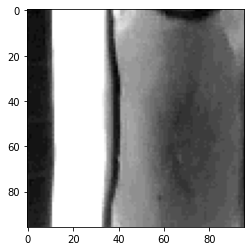

In [5]:
raw_bytes = np.array(HEXADECIMAL_BYTES)
image = np.reshape(raw_bytes,(96, 96)) #QCIF resolution

# Show the image
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
HEXADECIMAL_BYTES = [
  0x305858, 0x285458, 0x407060, 0x386468, 0x385858, 0x485c60, 0xb8bc78, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xc8e0f0, 0xb8cce0, 0x98acc0, 0x687c98, 0x404c68, 0x283848, 0x283438, 0x303c38, 0x303440, 0x302c30, 0x403830, 0x706450, 0x807070, 0x887870, 0x907c78, 0x907c78, 0x908078, 0x908078, 0x908078, 0x908478, 0x988480, 0x988c80, 0xa09488, 0xa09490, 0xa89c90, 0xa8a098, 0xb0a498, 0xb0a8a8, 0xb8b0a8, 0xb8b4b0, 0xc0bcb8, 0xc0c0b8, 0xd0c4c0, 0xd0c8c0, 0xd8d4d0, 0xd8d4d8, 0xe0dcd8, 0xe0e0e8, 0xe0e4e8, 0xe8e8e8, 0xe8e8e8, 0xe8e8e8, 0xe8e4e8, 0xe8e4f0, 0xd8d8e0, 0xd0d0d8, 0xc8ccd0, 0xc0bcc8, 0xb0b0c0, 0xa0a4b8, 0x8884a0, 0x504878, 0x382c40, 0x282440, 0x202020, 0x202420, 0x282828, 0x302020, 0x685030, 0x806050, 0x886050, 0x906860, 0x906858, 0x906860, 0x906c60, 0x907060, 0x305458, 0x205058, 0x407058, 0x306468, 0x305858, 0x405c60, 0xb0bc80, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xc8e0f0, 0xb8ccd8, 0x98acc0, 0x687ca0, 0x404c68, 0x303c48, 0x303438, 0x303838, 0x303c38, 0x303438, 0x403c38, 0x706450, 0x807468, 0x887c70, 0x907c78, 0x908078, 0x908078, 0x908078, 0x908078, 0x988078, 0x908480, 0x988c80, 0xa09088, 0xa09090, 0xa89c90, 0xa8a0a0, 0xb0a0a0, 0xb0a8a8, 0xb8b0a8, 0xb8b4b0, 0xc0bcb8, 0xc0c0b8, 0xd0c4c0, 0xd0c8c0, 0xd8d4d0, 0xd8d4d8, 0xe0dcd8, 0xe0e0e8, 0xe8e4e0, 0xe0e8e8, 0xe8e8e8, 0xe0e4f0, 0xe0e4e8, 0xe0e4f0, 0xd8d8e0, 0xd0ccd8, 0xc8ccd0, 0xc0bcc8, 0xb0b0c0, 0xa8a4b8, 0x8884a0, 0x584478, 0x402c40, 0x302838, 0x201c28, 0x282420, 0x282828, 0x302420, 0x705430, 0x785c58, 0x886450, 0x906860, 0x906858, 0x906c60, 0x906c60, 0x906c60, 0x305858, 0x285058, 0x407058, 0x306068, 0x305860, 0x485c60, 0xa0a878, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8e0e8, 0xb8ccd8, 0x98a8c0, 0x687ca0, 0x404868, 0x303448, 0x303438, 0x303838, 0x303840, 0x303438, 0x403830, 0x706450, 0x807068, 0x887c70, 0x907c78, 0x907c78, 0x907c78, 0x907c78, 0x908078, 0x908078, 0x988480, 0x988c80, 0xa09088, 0xa09490, 0xa89890, 0xa8a0a0, 0xb0a0a0, 0xb0a8a8, 0xb8b4a8, 0xb8b8b0, 0xc0bcb0, 0xc0c0b8, 0xc8c4c0, 0xd0c8c0, 0xd8d0c8, 0xd8d0d0, 0xe0dcd8, 0xe0e0e0, 0xe8e8e0, 0xe0e4e8, 0xe8e8e8, 0xe0e4e8, 0xe8e4e8, 0xe0dce8, 0xd8d4d8, 0xd0c8d8, 0xd0c8d0, 0xb8bcc8, 0xb0b0c0, 0xa0a0b8, 0x9088a0, 0x584878, 0x402c40, 0x302838, 0x201c28, 0x282420, 0x282428, 0x302020, 0x705430, 0x806058, 0x886850, 0x906858, 0x906c60, 0x906c60, 0x906c60, 0x907060, 0x305858, 0x285058, 0x386c58, 0x285c60, 0x305858, 0x405860, 0x98a480, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0f0, 0xc8e0e8, 0xb0ccd8, 0x90acc8, 0x687ca0, 0x384868, 0x303848, 0x303438, 0x303838, 0x303840, 0x303438, 0x403430, 0x786850, 0x807068, 0x887870, 0x907c78, 0x908078, 0x907c78, 0x988078, 0x908078, 0x908478, 0x988480, 0xa08c80, 0x988c88, 0xa09490, 0xa89c90, 0xa8a0a0, 0xa8a0a0, 0xb0a8a8, 0xb8b0a8, 0xb8b8b0, 0xc0b8b8, 0xc0c0b8, 0xc8c4c0, 0xd0c8c0, 0xd0d0c8, 0xd8d4d0, 0xe0d8d8, 0xe0dce0, 0xe0e0e0, 0xe0e4e8, 0xe0e4e8, 0xe0e4e8, 0xe0e0e8, 0xd8dce8, 0xd8d0d8, 0xd0c8d8, 0xc8c8d0, 0xc0bcc8, 0xb0b0c0, 0xa0a0b0, 0x9088a0, 0x584878, 0x402c40, 0x302838, 0x201c28, 0x282028, 0x302428, 0x382020, 0x705030, 0x886060, 0x906850, 0x906858, 0x906c60, 0x906c60, 0x906c60, 0x906c60, 0x284c48, 0x285850, 0x407858, 0x306468, 0x407060, 0x406468, 0x90a078, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xc8dce8, 0xb0c8d8, 0x90a4c0, 0x687498, 0x384468, 0x303848, 0x303438, 0x303838, 0x303840, 0x303038, 0x403830, 0x706850, 0x806c68, 0x907c70, 0x907870, 0x907c78, 0x907c78, 0x908078, 0x908078, 0x908478, 0x988880, 0xa08c80, 0x988c88, 0xa09490, 0xa89c90, 0xa89ca0, 0xa8a0a0, 0xb0aca8, 0xb8b0a8, 0xb8b4a8, 0xc0b8b8, 0xc8c0b8, 0xc8c0c0, 0xd0c8c0, 0xd8d0c8, 0xd8d4d0, 0xd8d8d8, 0xe0dce0, 0xe0e0e0, 0xe0e4e8, 0xe0e4e8, 0xe0e4e8, 0xe0e0e0, 0xd8d8e8, 0xd0d0d8, 0xd0c8d8, 0xc8c8d0, 0xc0bcc8, 0xb0acb8, 0xa0a0b0, 0x9088a0, 0x584c78, 0x402c48, 0x302838, 0x201c20, 0x282420, 0x302428, 0x382020, 0x705030, 0x806060, 0x906850, 0x906858, 0x906860, 0x906c60, 0x907060, 0x907060, 0x387468, 0x387070, 0x488460, 0x387878, 0x487870, 0x486870, 0x889478, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0f0, 0xc8e0e8, 0xa8c4d8, 0x90a4c0, 0x687498, 0x384868, 0x303c48, 0x303838, 0x304038, 0x303838, 0x302c30, 0x383438, 0x786850, 0x806c68, 0x887878, 0x907c70, 0x908078, 0x907c78, 0x988080, 0x908080, 0x908478, 0x988880, 0x988c80, 0x988c88, 0xa09490, 0xa09890, 0xa8a0a0, 0xa8a0a0, 0xb0a8a8, 0xb0aca8, 0xb8b4a8, 0xc0b8b0, 0xc0bcb8, 0xc8c0c0, 0xc8c8c0, 0xd0ccc8, 0xd8d0d0, 0xd8d8d8, 0xe0dce0, 0xe0e0e0, 0xe0e0e8, 0xe0e4e8, 0xe0e0e8, 0xd8e0e0, 0xd8d8e0, 0xd0d0d8, 0xc8c8d8, 0xc8c8d0, 0xc0b8c8, 0xa8a8b8, 0xa09cb0, 0x9088a0, 0x584c78, 0x402c48, 0x302838, 0x201c20, 0x282028, 0x302428, 0x302020, 0x705030, 0x805c58, 0x906858, 0x906858, 0x906c60, 0x906c60, 0x906c60, 0x907060, 0x387070, 0x386c68, 0x407858, 0x386870, 0x386058, 0x384c58, 0x909c70, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc8e0f0, 0xa8c0d8, 0x90a4c0, 0x687490, 0x384468, 0x303848, 0x303438, 0x303c40, 0x383c40, 0x302c30, 0x403838, 0x786850, 0x786c70, 0x887878, 0x908070, 0x908078, 0x908080, 0x988080, 0x908080, 0x908478, 0x988878, 0x988880, 0xa08c88, 0xa09088, 0xa09890, 0xa8a098, 0xa89ca0, 0xb0a8a8, 0xb8aca8, 0xb8b0a8, 0xc0b8b0, 0xc0bcb8, 0xc8c0c0, 0xc8c4c0, 0xd0ccc8, 0xd8d0c8, 0xd8d0d0, 0xe0d8d8, 0xe0dce0, 0xe0e0e0, 0xe0dce0, 0xe0dce0, 0xd8dcd8, 0xd8d4e0, 0xd0d0d0, 0xd0c8d8, 0xd0ccc8, 0xc0b8c8, 0xb0a8b8, 0xa09cb0, 0x9088a0, 0x584c78, 0x403048, 0x302830, 0x201c28, 0x282028, 0x302420, 0x301c20, 0x704c28, 0x805c50, 0x906858, 0x906860, 0x906c60, 0x906c60, 0x906c60, 0x907060, 0x204c50, 0x285048, 0x386448, 0x305c60, 0x305450, 0x405850, 0x909c70, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc8e0e8, 0xa8c0d8, 0x90a4c0, 0x607098, 0x384060, 0x303848, 0x283440, 0x303c40, 0x383c38, 0x302c30, 0x383038, 0x706048, 0x787070, 0x887870, 0x908070, 0x908078, 0x908078, 0x988078, 0x908078, 0x908478, 0x988880, 0x988880, 0x989088, 0xa09488, 0xa09490, 0xa8a098, 0xa8a098, 0xb0a8a8, 0xb0aca8, 0xb8b0a8, 0xb8b4b0, 0xc0b8b8, 0xc8c0b8, 0xc8c8c0, 0xd0c8c8, 0xd0ccc8, 0xd8d0d0, 0xe0d8d8, 0xe0dce0, 0xe0e0e8, 0xe0dce0, 0xe0dce0, 0xd8d8e0, 0xd0d4e0, 0xd0d0d8, 0xc8c4d0, 0xc8c4c8, 0xb8bcc0, 0xa8a8b8, 0xa09cb0, 0x9088a0, 0x585078, 0x403448, 0x302838, 0x201c28, 0x282028, 0x302428, 0x301c20, 0x704c30, 0x886048, 0x886458, 0x906860, 0x906860, 0x906c60, 0x906c60, 0x986c60, 0x285048, 0x305850, 0x306048, 0x306060, 0x385450, 0x405048, 0x989c68, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc8e0e8, 0xb0c4d8, 0x90a0c0, 0x606890, 0x384068, 0x303848, 0x283038, 0x303838, 0x383c40, 0x303030, 0x383030, 0x686048, 0x807470, 0x887c70, 0x908078, 0x908078, 0x908078, 0x907c80, 0x988080, 0x908078, 0x988878, 0x988880, 0xa08c80, 0xa09488, 0xa09490, 0xa89c98, 0xa8a098, 0xb0a8a8, 0xb0aca8, 0xb8b4a8, 0xb8b4b0, 0xc0b4b8, 0xc8c0b8, 0xc8c4c0, 0xd0c8c8, 0xd0ccc8, 0xd8d4d0, 0xe0d8d8, 0xe0d8e0, 0xe0dce0, 0xe0e0e0, 0xe0dce0, 0xd8d4e0, 0xd0cce0, 0xd0c4d0, 0xc8c4c8, 0xc8c0c8, 0xb8b4c0, 0xa8a8b8, 0xa09ca8, 0x9084a0, 0x585078, 0x403440, 0x282438, 0x201c28, 0x282020, 0x282428, 0x302020, 0x684828, 0x886048, 0x886458, 0x906858, 0x906860, 0x906c60, 0x986c60, 0x986c60, 0x305048, 0x284c50, 0x285448, 0x386058, 0x385458, 0x384c50, 0x888c68, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ecf0, 0xc8e0f0, 0xb0c8d8, 0x889cc0, 0x606c90, 0x384460, 0x283448, 0x283038, 0x303840, 0x383840, 0x303038, 0x383430, 0x686050, 0x807870, 0x887c70, 0x888078, 0x908078, 0x908078, 0x988080, 0x907c78, 0x908078, 0x988480, 0x988880, 0x988c88, 0xa09488, 0xa09890, 0xa09c98, 0xa8a498, 0xa8a8a0, 0xb0aca8, 0xb8b0b0, 0xb8b4b0, 0xb8b8b8, 0xc0c0b8, 0xc8c4c0, 0xc8c8c8, 0xd0ccc8, 0xd0d0d0, 0xd8d8d8, 0xd8d8d8, 0xd8d4e0, 0xd8d4e0, 0xd8d8d8, 0xd8d4d8, 0xd0cce0, 0xd0c8d8, 0xc8c4c8, 0xc0bcc8, 0xb8b4c0, 0xa8a8b8, 0xa09cb0, 0x8880a0, 0x605078, 0x403040, 0x282038, 0x202020, 0x202420, 0x282428, 0x302020, 0x604430, 0x806048, 0x886458, 0x906458, 0x906858, 0x906c60, 0x986c60, 0x986860, 0x305048, 0x304c48, 0x285048, 0x305858, 0x385850, 0x404c50, 0x889060, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc0d8e8, 0xa8c0d8, 0x88a0b8, 0x587090, 0x384460, 0x283448, 0x283438, 0x303838, 0x383c40, 0x303030, 0x383030, 0x605440, 0x787068, 0x887870, 0x887c78, 0x907c78, 0x908078, 0x908078, 0x907c78, 0x988478, 0x988480, 0x988880, 0x988c80, 0xa09488, 0xa09490, 0xa09c98, 0xa8a498, 0xa8a4a0, 0xb0a8a8, 0xb0aca8, 0xb8b4b0, 0xb8b8b0, 0xc8c0b8, 0xc0c0b8, 0xc8c4c0, 0xd0ccc8, 0xd0d0c8, 0xd8d4d0, 0xd8d8d8, 0xd8d8d8, 0xd8d8d8, 0xd8d8d8, 0xd0d0d0, 0xd0c4d8, 0xd0c8d8, 0xc8c4c8, 0xc0c0c8, 0xb8b4c0, 0xa09cb0, 0xa09ca8, 0x888098, 0x584870, 0x403048, 0x282038, 0x282020, 0x202420, 0x282428, 0x302420, 0x604430, 0x806050, 0x906458, 0x906458, 0x906858, 0x906c58, 0x906c58, 0x986c60, 0x305048, 0x304c48, 0x305048, 0x305860, 0x385850, 0x404c50, 0x888c68, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc0d8e8, 0xb0c4d8, 0x88a0b8, 0x586c90, 0x384460, 0x283448, 0x283438, 0x303c38, 0x383840, 0x303038, 0x303038, 0x605848, 0x787468, 0x887c70, 0x888078, 0x908078, 0x908078, 0x908078, 0x908078, 0x988478, 0x988480, 0x988880, 0x988c80, 0xa09088, 0xa09490, 0xa09c98, 0xa8a0a0, 0xa8a4a0, 0xb0aca8, 0xb0aca8, 0xb8b0b0, 0xb8b4b0, 0xc0bcb8, 0xc0c0b8, 0xc8c4c0, 0xc8c8c8, 0xd0d0c8, 0xd0d4d0, 0xd0d4d8, 0xd0d4d8, 0xd8d4d8, 0xd8d4d8, 0xd0d0d0, 0xc8c8d8, 0xd0c8d0, 0xc8c0c8, 0xb8b8c8, 0xb0b0c0, 0xa0a0b0, 0xa09cb0, 0x887c98, 0x584c70, 0x403040, 0x282038, 0x202020, 0x202420, 0x282828, 0x282020, 0x584030, 0x805c48, 0x886450, 0x886458, 0x906858, 0x906858, 0x906c60, 0x906c60, 0x304c48, 0x304c48, 0x284c48, 0x385c58, 0x385850, 0x384c50, 0x808c70, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0f0, 0xc0d8e8, 0xb0c0d0, 0x889cb8, 0x586c90, 0x304460, 0x283450, 0x283440, 0x303c40, 0x404040, 0x303030, 0x383430, 0x585438, 0x786c68, 0x807470, 0x887c78, 0x908078, 0x908078, 0x908078, 0x908078, 0x988078, 0x988480, 0x988480, 0xa08c80, 0xa09088, 0xa09090, 0xa09c98, 0xa8a098, 0xa8a4a0, 0xb0a8a8, 0xb8aca8, 0xb8b0b0, 0xb8b0b0, 0xc0b8b8, 0xc0bcb8, 0xc8c4c0, 0xc8c8c0, 0xd0d0c8, 0xd0d0d0, 0xd0d0d0, 0xd0d0d8, 0xd0d0d0, 0xd0ccd0, 0xd0ccd0, 0xc8c8d0, 0xc8c8d0, 0xc8c0c8, 0xb8b4c0, 0xb0a8b8, 0xa09cb0, 0xa098a0, 0x888098, 0x584870, 0x403048, 0x282038, 0x202020, 0x282420, 0x282828, 0x302428, 0x583c28, 0x805850, 0x886458, 0x886458, 0x906858, 0x906c58, 0x906c60, 0x906c60, 0x284c48, 0x304c48, 0x284c48, 0x385c58, 0x385450, 0x404c48, 0x909068, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0f0, 0xc0d8e8, 0xa8bcd0, 0x889cb8, 0x606c90, 0x384060, 0x283848, 0x283440, 0x383c38, 0x384040, 0x303030, 0x282430, 0x504838, 0x706860, 0x807870, 0x888070, 0x908078, 0x907c78, 0x908078, 0x908078, 0x908078, 0x988480, 0x988480, 0x988c80, 0x988c88, 0xa09090, 0xa89c98, 0xa8a098, 0xa8a4a0, 0xb0a8a8, 0xb8acb0, 0xb8b0b0, 0xb8b0b0, 0xc0b8b8, 0xc0bcb8, 0xc0c4c0, 0xc8c0c0, 0xc8c8c8, 0xd0ccc8, 0xd0ccd0, 0xd0d0d0, 0xd0ccd0, 0xc8c8d0, 0xc8ccd0, 0xc8c4c8, 0xc8c4c8, 0xc0bcc8, 0xb8b4c0, 0xa8a8b8, 0xa09cb0, 0x9894a8, 0x807c98, 0x584870, 0x402c48, 0x282038, 0x202020, 0x282020, 0x282428, 0x282028, 0x503828, 0x785848, 0x886450, 0x886458, 0x906858, 0x906858, 0x906c58, 0x906c58, 0x304848, 0x304c48, 0x284c40, 0x385c58, 0x385450, 0x405048, 0x98a080, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc0d8f0, 0xb0c0d0, 0x889cb8, 0x586c90, 0x304060, 0x283848, 0x283840, 0x383c38, 0x383c40, 0x303038, 0x302c30, 0x504830, 0x706460, 0x807070, 0x908070, 0x887c78, 0x907c78, 0x907c78, 0x988078, 0x908078, 0x988078, 0x988480, 0x988880, 0x988c88, 0xa09488, 0xa89c90, 0xa89c98, 0xb0a498, 0xb0a8a0, 0xb0a8a8, 0xb8acb0, 0xb8b4b0, 0xc0b8b8, 0xc0c0b8, 0xc8c4b8, 0xc8c4c0, 0xd0c8c0, 0xd0d0c8, 0xd0ccd0, 0xc8ccc8, 0xd0ccd0, 0xc8c8d0, 0xc8c8c8, 0xc0c0c8, 0xc8c4c8, 0xc0bcc0, 0xb8b4c0, 0xb0a8b8, 0xa09ca8, 0x9890a8, 0x807c90, 0x504468, 0x402c48, 0x281c30, 0x202020, 0x282420, 0x282428, 0x302828, 0x503420, 0x704c48, 0x885c58, 0x886458, 0x906858, 0x906858, 0x906c58, 0x906860, 0x304848, 0x304c48, 0x284848, 0x385c50, 0x405850, 0x485048, 0xa0a070, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc8dcf0, 0xa8c0d0, 0x889cb8, 0x586c90, 0x384060, 0x283848, 0x303840, 0x384038, 0x303c40, 0x283038, 0x282c30, 0x484838, 0x706c60, 0x787070, 0x888070, 0x887c78, 0x907c78, 0x907c78, 0x907c78, 0x908078, 0x988478, 0x988480, 0x988888, 0x988c88, 0x989088, 0xa09890, 0xa09c98, 0xa8a098, 0xb0a4a0, 0xb0a8a8, 0xb8b0a8, 0xb0b0b0, 0xb8b8b8, 0xb8bcb8, 0xc0bcc0, 0xc0c0c0, 0xc8c4c0, 0xc8c8c8, 0xc8ccd0, 0xc8ccd0, 0xd0d0d0, 0xc8ccd0, 0xc8c4d0, 0xc0c0c8, 0xc0c4c8, 0xc0bcc8, 0xb0b0c0, 0xa8a4b0, 0x989ca8, 0x9894a8, 0x807c98, 0x584c68, 0x403040, 0x281c30, 0x281c20, 0x282020, 0x282428, 0x281c28, 0x402820, 0x704c40, 0x886058, 0x906458, 0x906858, 0x906858, 0x906c58, 0x906c60, 0x304848, 0x304848, 0x284c48, 0x406050, 0x385450, 0x485050, 0xa0a870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0xc0d8f0, 0xa8c0d0, 0x8098b0, 0x586c90, 0x384058, 0x283448, 0x283840, 0x384040, 0x383c40, 0x303038, 0x302c38, 0x403828, 0x706850, 0x787470, 0x888078, 0x887c70, 0x907c78, 0x907c78, 0x907c78, 0x907c78, 0x988478, 0x988480, 0x988880, 0x988c88, 0xa09088, 0xa09490, 0xa09490, 0xa8a098, 0xb0a4a0, 0xb0a4a8, 0xb8b0a8, 0xb8b0b0, 0xb8b8b0, 0xc0bcb8, 0xb8b8b8, 0xc0c0b8, 0xc8c0c0, 0xc8c0c0, 0xc8c0c8, 0xc8ccc8, 0xd0ccc8, 0xc8c8c8, 0xc8c4c8, 0xc0bcc8, 0xc0bcc0, 0xb8b4b8, 0xb0acb8, 0xa0a4b0, 0x9894a0, 0x908c98, 0x787090, 0x504060, 0x403040, 0x201830, 0x282020, 0x282020, 0x282420, 0x302428, 0x382418, 0x684838, 0x886058, 0x886458, 0x906860, 0x906c58, 0x906c58, 0x906860, 0x304848, 0x304848, 0x284448, 0x405c48, 0x385450, 0x485450, 0xa8a870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8ecf0, 0xc0d4e8, 0xa8c0d0, 0x8098b0, 0x606c88, 0x384458, 0x303840, 0x283438, 0x383c40, 0x383c40, 0x303038, 0x302c38, 0x302c38, 0x686450, 0x787068, 0x887870, 0x887878, 0x907878, 0x907c78, 0x907c78, 0x907c78, 0x988078, 0x988480, 0x988880, 0x988c88, 0x989088, 0xa09490, 0xa09c90, 0xa8a098, 0xa8a4a0, 0xb0a4a8, 0xb0aca8, 0xb0acb0, 0xb8b4b0, 0xb8b8b8, 0xb8bcb8, 0xb8bcb8, 0xc0c0c0, 0xc8c4c8, 0xc8c4c8, 0xc8c8c8, 0xc0c0c8, 0xc0bcc0, 0xc8c0c8, 0xc0bcc0, 0xc0bcc0, 0xb8b4c0, 0xb0b0b8, 0xa0a4a8, 0x9094a0, 0x8888a0, 0x786c88, 0x504458, 0x383040, 0x201c28, 0x202020, 0x282420, 0x282820, 0x302820, 0x302020, 0x685038, 0x806050, 0x886458, 0x886858, 0x906c58, 0x906c58, 0x906860, 0x304440, 0x304840, 0x284848, 0x406048, 0x385450, 0x485850, 0xa8a870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8ecf0, 0xc0d4e8, 0xa8bcd0, 0x8094b0, 0x586c90, 0x303c60, 0x283448, 0x282c40, 0x384040, 0x384040, 0x303038, 0x303038, 0x383038, 0x605440, 0x786860, 0x807470, 0x887870, 0x907c78, 0x907c78, 0x907c78, 0x907c78, 0x988078, 0x988480, 0x988880, 0x988c80, 0xa09088, 0xa09490, 0xa09890, 0xa8a098, 0xa8a4a0, 0xb0a4a8, 0xb8aca0, 0xb0aca8, 0xb8b0b0, 0xb8b0b0, 0xb8b8b8, 0xc0bcb8, 0xc0c0b8, 0xc0c4c0, 0xc8c4c0, 0xc8c8c8, 0xc8c4c8, 0xc8c0c0, 0xc0bcc0, 0xc0bcc0, 0xb8b8c0, 0xb0b0b8, 0xa8a8b0, 0xa0a0a8, 0x9898a0, 0x908c98, 0x787088, 0x504060, 0x382c40, 0x201828, 0x202020, 0x282420, 0x282820, 0x302420, 0x281418, 0x604428, 0x785850, 0x886458, 0x886858, 0x906c58, 0x906c58, 0x906858, 0x304840, 0x284840, 0x284848, 0x385c48, 0x385450, 0x485050, 0xa8a868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xc0d8e8, 0xa0b8d8, 0x8098b0, 0x606c88, 0x404458, 0x303440, 0x404458, 0x303840, 0x303850, 0x303038, 0x303038, 0x302838, 0x504840, 0x807060, 0x807470, 0x887c70, 0x887c78, 0x907c78, 0x907c78, 0x907c78, 0x908080, 0x908480, 0x908880, 0x988c80, 0x989088, 0xa09490, 0xa09890, 0xa8a098, 0xa8a0a0, 0xa8a4a0, 0xb0a4a8, 0xb0a8a8, 0xb8b0b0, 0xb8b4b0, 0xb8b8b8, 0xb8b8b8, 0xb8b8c0, 0xc0b8c0, 0xc0b8c0, 0xc0c0c8, 0xc8c4c0, 0xc0c0c0, 0xc0bcc0, 0xb8b8c0, 0xb8b4c0, 0xb0b0b8, 0xa8a4b0, 0xa09ca8, 0x9090a0, 0x888098, 0x706888, 0x484058, 0x302c40, 0x201c28, 0x202020, 0x282820, 0x282820, 0x282420, 0x201420, 0x584428, 0x786048, 0x886850, 0x886458, 0x906c58, 0x906858, 0x906858, 0x284840, 0x284840, 0x304c48, 0x405c50, 0x405458, 0x485448, 0xa0a068, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xc0dce8, 0xa0b8d0, 0x8090a8, 0x586890, 0x404860, 0x586448, 0x607098, 0x404858, 0x404448, 0x303040, 0x303038, 0x383040, 0x484030, 0x786860, 0x807070, 0x887470, 0x887878, 0x907c78, 0x907c78, 0x907878, 0x907c78, 0x988478, 0x908480, 0x988880, 0x988888, 0xa09488, 0xa09890, 0xa89c98, 0xa8a0a0, 0xa8a0a0, 0xb0a4a8, 0xb0a8a8, 0xb8b0a8, 0xb8b4b0, 0xb8b8b8, 0xb8b8b8, 0xc0bcb8, 0xc0bcc0, 0xc8bcc0, 0xc0bcc0, 0xc0bcc0, 0xc0bcc0, 0xc0b8b8, 0xb8b4b8, 0xb8b4b8, 0xb0b0c0, 0xa8a8b0, 0xa09ca8, 0x9090a0, 0x908890, 0x686080, 0x403458, 0x302440, 0x201c28, 0x202020, 0x282820, 0x282820, 0x282428, 0x282020, 0x584020, 0x785848, 0x886450, 0x886850, 0x906858, 0x906858, 0x886858, 0x284848, 0x284848, 0x284848, 0x405848, 0x405458, 0x485050, 0xa0a068, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xc0dce8, 0x98b0d8, 0x8090a8, 0x606c88, 0x484c58, 0x808c58, 0x8090b8, 0x505c88, 0x384458, 0x303448, 0x303038, 0x302c38, 0x403438, 0x706c58, 0x807470, 0x887870, 0x887c78, 0x887c78, 0x907878, 0x907c78, 0x907c78, 0x908078, 0x908480, 0x908880, 0x988888, 0xa09088, 0xa09490, 0xa09c98, 0xa8a0a0, 0xa8a0a0, 0xa8a4a8, 0xb0a8a8, 0xb0a8a8, 0xb0acb0, 0xb8b4b0, 0xb8b8b8, 0xb8b8b8, 0xc0bcb8, 0xc0bcc0, 0xb8b8c0, 0xb8b8c0, 0xb8b8c0, 0xb8b4b8, 0xb8b8b8, 0xb0b0b8, 0xa8a8b8, 0xa0a0a8, 0xa0a0a0, 0x9090a0, 0x808090, 0x605478, 0x403450, 0x302838, 0x201c20, 0x202020, 0x202420, 0x282820, 0x282428, 0x201420, 0x483018, 0x705440, 0x886848, 0x886450, 0x886458, 0x906458, 0x886458, 0x284840, 0x304848, 0x304c48, 0x405c48, 0x405860, 0x485050, 0x989c68, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xc0dce8, 0x98acd0, 0x8090a0, 0x586488, 0x384060, 0x808868, 0xa8bcc0, 0x586ca0, 0x404850, 0x303440, 0x303438, 0x383438, 0x383030, 0x685848, 0x806c70, 0x887c70, 0x887c70, 0x887c78, 0x907c78, 0x907c78, 0x907c78, 0x908078, 0x908480, 0x908880, 0x988888, 0xa09088, 0xa09090, 0xa09c98, 0xa8a098, 0xa8a0a0, 0xa8a4a0, 0xb0a8a0, 0xb0aca8, 0xb8b0a8, 0xb8b0b0, 0xb8acb0, 0xb8b0b0, 0xb8b4b8, 0xc0b8b8, 0xb8b8c0, 0xb8b8b8, 0xc0b8b8, 0xb8b4b8, 0xb8b8b8, 0xb0b0b0, 0xa8a8b0, 0xa09ca8, 0x9898a0, 0x888898, 0x807c88, 0x585478, 0x403448, 0x282038, 0x202028, 0x202020, 0x202420, 0x282420, 0x282420, 0x282018, 0x382410, 0x684c38, 0x805c50, 0x886450, 0x886458, 0x906458, 0x906858, 0x304848, 0x304848, 0x304848, 0x406040, 0x405460, 0x484c50, 0x989868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0e4f0, 0xc0d8e8, 0x90a8d0, 0x809098, 0x606888, 0x404458, 0xa8b888, 0xb8d8d0, 0x6880b8, 0x404460, 0x303448, 0x303040, 0x303438, 0x302c38, 0x504840, 0x787060, 0x887c70, 0x887c78, 0x887c78, 0x907878, 0x907c78, 0x907c78, 0x907c78, 0x908480, 0x908480, 0x988880, 0x988888, 0x989090, 0xa09490, 0xa09ca0, 0xa8a4a0, 0xa8a4a0, 0xb0a8a0, 0xb0aca8, 0xb0acb0, 0xb0b0b0, 0xb0b0b0, 0xb8b4b8, 0xb8b8b8, 0xb8b4b8, 0xb8b8b8, 0xb8b8c0, 0xb8b0b8, 0xb0a8b0, 0xb0acb0, 0xa8a8a8, 0xa0a4b0, 0x9894a0, 0x9894a0, 0x888898, 0x808090, 0x605c78, 0x383050, 0x201c30, 0x202020, 0x202020, 0x282420, 0x282420, 0x282420, 0x201820, 0x281818, 0x684830, 0x785c48, 0x886850, 0x886458, 0x886858, 0x906458, 0x304448, 0x304848, 0x304448, 0x405c40, 0x405860, 0x405050, 0xa09c68, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0e8f0, 0xc0d8e8, 0x98a8c8, 0x788c98, 0x586488, 0x505c58, 0xa8bca8, 0xa8c4c0, 0x7080a0, 0x404860, 0x303850, 0x303440, 0x303438, 0x383830, 0x504830, 0x706460, 0x807068, 0x807070, 0x887878, 0x907878, 0x907878, 0x907878, 0x907878, 0x907c80, 0x908480, 0x988880, 0x988888, 0x989090, 0xa09890, 0xa09490, 0xa09890, 0xa8a0a0, 0xb0a4a0, 0xb0a8a8, 0xb0aca8, 0xb0b0b0, 0xb0b0b0, 0xb8b4b0, 0xb8b8b0, 0xb8b8b8, 0xb8b4b8, 0xb8b0b8, 0xb8acb0, 0xb0a8b0, 0xb0a4a8, 0xa09ca0, 0xa09ca8, 0x909098, 0x989498, 0x888490, 0x807c80, 0x585470, 0x302848, 0x201428, 0x201c28, 0x282020, 0x282420, 0x282420, 0x282820, 0x201c18, 0x301c18, 0x604428, 0x785848, 0x886858, 0x886458, 0x886458, 0x906458, 0x304840, 0x304840, 0x304848, 0x405840, 0x405c60, 0x485050, 0xa0a060, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0e4f0, 0xc0d8e8, 0x90a8d0, 0x788898, 0x505c80, 0x707460, 0xb0c4c0, 0x98acc0, 0x607490, 0x404860, 0x303850, 0x303440, 0x303438, 0x303038, 0x404038, 0x706860, 0x807868, 0x807470, 0x887878, 0x887478, 0x907878, 0x907878, 0x887878, 0x907c80, 0x908080, 0x908880, 0x988c88, 0x988c90, 0xa09490, 0xa09898, 0xa09898, 0xa8a0a0, 0xa8a0a0, 0xa8a4a8, 0xa8a4a8, 0xa8aca8, 0xb0acb0, 0xb0acb0, 0xb0b0b0, 0xb8b4b8, 0xb0b0b8, 0xb0acb0, 0xb0acb0, 0xa8a8b0, 0xa8a4a8, 0xa09ca8, 0x989ca0, 0x909098, 0x909098, 0x807c90, 0x706c88, 0x504c68, 0x302838, 0x201c28, 0x202028, 0x282020, 0x282420, 0x282820, 0x282820, 0x202018, 0x201420, 0x483020, 0x705038, 0x805c48, 0x886050, 0x886450, 0x886458, 0x304848, 0x304c48, 0x304448, 0x385448, 0x385860, 0x405050, 0xb0b068, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0e8f0, 0xc8dce0, 0x90a8c8, 0x788898, 0x505c80, 0x707c68, 0xb0c4c8, 0x98acc0, 0x606c88, 0x404868, 0x383c50, 0x303840, 0x303440, 0x303438, 0x383028, 0x685c50, 0x786c68, 0x887870, 0x887878, 0x887870, 0x887878, 0x887c78, 0x887878, 0x888080, 0x908078, 0x908080, 0x988888, 0x988c88, 0xa09090, 0xa09490, 0xa09490, 0xa09c98, 0xa89ca0, 0xa8a0a0, 0xa8a4a8, 0xb0a8a8, 0xb0a8a8, 0xb0a8b0, 0xb0acb0, 0xb0a8b0, 0xb0acb0, 0xb0a8b0, 0xb0a8a8, 0xa8a4a8, 0xa8a0a0, 0xa098a0, 0x9898a0, 0x908c98, 0x908888, 0x807c80, 0x706878, 0x484060, 0x202040, 0x201c28, 0x202028, 0x282020, 0x282420, 0x282828, 0x282828, 0x202020, 0x281c20, 0x482c18, 0x684838, 0x805848, 0x805c50, 0x886058, 0x886050, 0x304c40, 0x304840, 0x284440, 0x385448, 0x405c60, 0x485450, 0xb0b070, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0e8f0, 0xc0d4e0, 0x889cc8, 0x707c90, 0x505878, 0x808868, 0xa8c0c8, 0x98a8c0, 0x607080, 0x404c68, 0x383c58, 0x303440, 0x303040, 0x303038, 0x282430, 0x584c40, 0x706860, 0x807468, 0x807478, 0x887470, 0x887878, 0x887878, 0x887878, 0x888078, 0x888078, 0x888080, 0x988c80, 0x908888, 0x989090, 0xa09490, 0xa09498, 0xa098a0, 0xa09ca0, 0xa0a0a0, 0xa8a4a8, 0xa8acb0, 0xa8acb0, 0xb0acb0, 0xb0a8b0, 0xb0a8b0, 0xb0a8b0, 0xa8a8b0, 0xa8a8a8, 0xa8a4a8, 0xa09ca0, 0x909098, 0x909098, 0x888490, 0x807c88, 0x706c80, 0x605870, 0x403c50, 0x202030, 0x202020, 0x282028, 0x302828, 0x302828, 0x282420, 0x282428, 0x201c20, 0x201c20, 0x302420, 0x604838, 0x785448, 0x805848, 0x886050, 0x886450, 0x305448, 0x305448, 0x385c50, 0x406850, 0x487068, 0x485c60, 0xb0b470, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0e8f0, 0xc0d4e8, 0x909cc8, 0x687088, 0x505870, 0x809070, 0xb0c4d0, 0x90a8c8, 0x607088, 0x404c68, 0x384058, 0x383c40, 0x383840, 0x303438, 0x302c38, 0x504438, 0x706058, 0x786868, 0x807070, 0x887470, 0x887870, 0x887878, 0x887c78, 0x887c78, 0x887c78, 0x908080, 0x988c80, 0x988888, 0x988c90, 0xa09490, 0xa09498, 0xa09898, 0xa09898, 0xa8a4a0, 0xa8a0a0, 0xa8a4a8, 0xa8a8a8, 0xa8a8a8, 0xa8a8b0, 0xa8a8b0, 0xa8a8a8, 0xa8a4a8, 0xa8a0a0, 0xa09ca0, 0xa098a0, 0x989098, 0x909090, 0x888490, 0x807888, 0x706870, 0x585460, 0x302c48, 0x201828, 0x282028, 0x201c28, 0x282828, 0x302c28, 0x302c28, 0x302c28, 0x282020, 0x282020, 0x281818, 0x583828, 0x704038, 0x805040, 0x805c50, 0x886450, 0x385c50, 0x386050, 0x385c50, 0x386450, 0x487068, 0x485858, 0xb0b470, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0ecf0, 0xb8d4e8, 0x889cc8, 0x687490, 0x505c70, 0x808c70, 0xb0c4c8, 0x98a8b8, 0x687090, 0x505878, 0x484c68, 0x404050, 0x383c48, 0x303840, 0x303038, 0x383438, 0x605c50, 0x787068, 0x807470, 0x807470, 0x807070, 0x887870, 0x887c78, 0x887c78, 0x887c80, 0x887c80, 0x908480, 0x908888, 0x988c88, 0x989090, 0x989098, 0xa09498, 0xa094a0, 0xa09ca0, 0xa09ca0, 0xa8a0a8, 0xa8a0a8, 0xa0a0a8, 0xa8a4a8, 0xa8a4a8, 0xa8a4a8, 0xa0a0a8, 0xa09ca0, 0xa09ca0, 0xa09c98, 0x989498, 0x888898, 0x888090, 0x787888, 0x686878, 0x505060, 0x282840, 0x201c20, 0x282028, 0x282020, 0x302828, 0x383020, 0x383028, 0x302c30, 0x282428, 0x282020, 0x201420, 0x483020, 0x704838, 0x805840, 0x785450, 0x806050, 0x305450, 0x305050, 0x305048, 0x305040, 0x405c58, 0x405050, 0xb0b478, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8ecf0, 0xc0d8e0, 0x889cc8, 0x586480, 0x586068, 0x808c80, 0xb0c4c0, 0xa8c0d0, 0x7884a8, 0x586480, 0x505468, 0x404050, 0x383840, 0x383c40, 0x303438, 0x303038, 0x584840, 0x706460, 0x787070, 0x807470, 0x807870, 0x887870, 0x887c78, 0x887c78, 0x887c80, 0x887c80, 0x908080, 0x907c80, 0x988888, 0xa09090, 0x989090, 0xa09898, 0xa094a0, 0xa094a0, 0xa09ca0, 0xa8a0a8, 0xa0a4a8, 0xa8a4a8, 0xa8a4a8, 0xa8a4a8, 0xa8a4a0, 0xa0a0a0, 0xa09ca0, 0x989898, 0x989498, 0x908c90, 0x888088, 0x807480, 0x787078, 0x686068, 0x404050, 0x201830, 0x201c28, 0x201c28, 0x282028, 0x382838, 0x403430, 0x403830, 0x302c30, 0x282420, 0x282018, 0x281c20, 0x483010, 0x604438, 0x785848, 0x785850, 0x806050, 0x284440, 0x304c40, 0x304c48, 0x304c48, 0x486458, 0x485450, 0xb0b470, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xd0e8f0, 0xc0d4e0, 0x7888c8, 0x505880, 0x586060, 0xa0aca0, 0xc8e0d0, 0xc0d8d0, 0x8094b8, 0x606c90, 0x484c70, 0x404058, 0x383450, 0x303440, 0x303038, 0x302838, 0x403838, 0x686050, 0x786c68, 0x807468, 0x807470, 0x807470, 0x807470, 0x807870, 0x807878, 0x887c80, 0x908080, 0x908088, 0x988888, 0x908888, 0x908888, 0x989090, 0xa09498, 0xa09498, 0x9890a0, 0xa09ca0, 0xa0a0a8, 0xa0a0a8, 0xa0a4a8, 0xa0a0a8, 0xa098a0, 0xa098a0, 0xa09ca0, 0x989498, 0x908c98, 0x888488, 0x807888, 0x786c88, 0x686478, 0x585460, 0x383448, 0x202428, 0x282428, 0x282428, 0x382c20, 0x483c30, 0x504438, 0x483c40, 0x382838, 0x302428, 0x282020, 0x282020, 0x302018, 0x503430, 0x785838, 0x785c48, 0x806450, 0x304c40, 0x304c40, 0x305048, 0x305440, 0x486058, 0x485450, 0xb0b478, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0e4f0, 0xc0d4d8, 0x7888c0, 0x484c78, 0x585860, 0xa0b4a8, 0xd8f0d8, 0xc8e4f0, 0x98b0d8, 0x7888a8, 0x586478, 0x485060, 0x404450, 0x383848, 0x303038, 0x303038, 0x383038, 0x584c40, 0x685c60, 0x786868, 0x807068, 0x807470, 0x807470, 0x807870, 0x887c78, 0x887c78, 0x888080, 0x888080, 0x988888, 0x988888, 0x988c88, 0x988c90, 0x989090, 0x989498, 0xa094a0, 0xa09ca0, 0xa09ca0, 0xa0a0a0, 0xa0a0a0, 0xa09ca0, 0xa09098, 0xa09498, 0x989498, 0x989498, 0x888890, 0x888088, 0x807c80, 0x787478, 0x605868, 0x484050, 0x202040, 0x202028, 0x282428, 0x201c28, 0x382c30, 0x484048, 0x585048, 0x504850, 0x383838, 0x383030, 0x282820, 0x282020, 0x282020, 0x402c18, 0x604430, 0x705048, 0x785c48, 0x304848, 0x304c40, 0x305048, 0x305040, 0x486450, 0x405058, 0xb8b870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8e4f0, 0xb8d4d8, 0x7888c0, 0x485078, 0x606458, 0xa8b8a8, 0xd8ecd8, 0xd0f0e8, 0xb0cce8, 0x8094b8, 0x606c88, 0x505470, 0x404458, 0x404050, 0x303440, 0x383440, 0x282438, 0x403438, 0x685c58, 0x787068, 0x787068, 0x807470, 0x807870, 0x807870, 0x807878, 0x887c78, 0x887c78, 0x887c80, 0x908480, 0x908488, 0x908488, 0x908c90, 0x908c90, 0x989898, 0x9898a0, 0xa09ca0, 0xa0a0a0, 0x98a0a0, 0xa09ca0, 0xa098a0, 0xa09498, 0x989098, 0x908898, 0x908890, 0x807c88, 0x807c80, 0x787488, 0x606080, 0x504858, 0x403c40, 0x201c28, 0x282420, 0x282428, 0x302420, 0x503c28, 0x584c48, 0x706c60, 0x505060, 0x403c48, 0x302430, 0x282028, 0x201c20, 0x201820, 0x301c20, 0x504030, 0x705040, 0x785848, 0x304840, 0x304848, 0x304c40, 0x305048, 0x486050, 0x405058, 0xb8b870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8e4f0, 0xb8cce0, 0x7888b8, 0x485070, 0x586460, 0xb8c4b0, 0xd0e8d0, 0xc8ece8, 0xb0d0f0, 0x8098c0, 0x687490, 0x586878, 0x404c60, 0x484c50, 0x383c40, 0x303438, 0x383438, 0x383430, 0x605848, 0x786c68, 0x786c68, 0x786c68, 0x807068, 0x807470, 0x807470, 0x887878, 0x887c78, 0x888080, 0x908480, 0x908088, 0x907c88, 0x908888, 0x908c88, 0x988c88, 0x988c90, 0x989098, 0x989898, 0xa09ca0, 0x9898a0, 0x989498, 0x988c98, 0x988c98, 0x908890, 0x908890, 0x807c88, 0x888480, 0x707080, 0x504c68, 0x403848, 0x282438, 0x201c20, 0x202028, 0x201428, 0x301c28, 0x605038, 0x706860, 0x808478, 0x686878, 0x504c60, 0x383030, 0x302828, 0x282020, 0x281c20, 0x281818, 0x483018, 0x604038, 0x705440, 0x304c48, 0x304840, 0x304c40, 0x304c48, 0x486450, 0x485458, 0xc0c070, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xd0e8f0, 0xb0cce0, 0x7888b8, 0x404c70, 0x707460, 0xb8ccc0, 0xc0e0d0, 0xc8e4e8, 0xb0c8f0, 0x889cb8, 0x788890, 0x687480, 0x505868, 0x484c60, 0x383c50, 0x383440, 0x383840, 0x303038, 0x484840, 0x706858, 0x787068, 0x786868, 0x786c68, 0x807078, 0x807070, 0x807478, 0x807878, 0x887c80, 0x888080, 0x888088, 0x908088, 0x908890, 0x908c88, 0x908c90, 0x908c98, 0x909098, 0x909098, 0x909098, 0x909098, 0x908c98, 0x908c90, 0x908890, 0x908490, 0x888488, 0x787888, 0x787488, 0x605c70, 0x484458, 0x403838, 0x282830, 0x282420, 0x282828, 0x302428, 0x403428, 0x787458, 0x787880, 0x888c88, 0x808488, 0x605c78, 0x403048, 0x302430, 0x282028, 0x281c28, 0x281820, 0x302018, 0x503c30, 0x705038, 0x304c48, 0x304848, 0x304848, 0x304848, 0x486050, 0x405460, 0xc8cc70, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xc8e8e8, 0xb0cce0, 0x7084b8, 0x404870, 0x708068, 0xc8e4c8, 0xc8e4d8, 0xc0dce8, 0xa8c0f0, 0x889cb8, 0x788ca0, 0x687890, 0x606c80, 0x505868, 0x404850, 0x404048, 0x383840, 0x302c40, 0x383030, 0x504840, 0x706460, 0x786868, 0x786c68, 0x787070, 0x787070, 0x807470, 0x807478, 0x807878, 0x887c78, 0x888080, 0x888088, 0x908488, 0x908888, 0x908888, 0x908890, 0x989098, 0x989098, 0x989098, 0x989498, 0x908898, 0x888488, 0x888488, 0x888088, 0x888480, 0x807878, 0x706470, 0x504458, 0x382c48, 0x282438, 0x202028, 0x202428, 0x201c28, 0x282030, 0x605838, 0x909878, 0x889888, 0x909c98, 0x808c98, 0x787c88, 0x504868, 0x382c30, 0x302828, 0x282020, 0x282020, 0x282018, 0x483020, 0x604030, 0x304840, 0x304840, 0x304848, 0x304848, 0x486450, 0x485858, 0xc8c870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xc8e8e8, 0xb0cce0, 0x7080b8, 0x484c68, 0x788460, 0xc0d8c8, 0xc0e0d8, 0xc8e8f0, 0xb8d0f0, 0x90a4b8, 0x8094a8, 0x808c90, 0x707c88, 0x586078, 0x484860, 0x403850, 0x383040, 0x303038, 0x303038, 0x383830, 0x606050, 0x787460, 0x787068, 0x787078, 0x787470, 0x787470, 0x807878, 0x807878, 0x807880, 0x807480, 0x807880, 0x888088, 0x888488, 0x908888, 0x888890, 0x908c90, 0x908c90, 0x909098, 0x989098, 0x888490, 0x888488, 0x888088, 0x807880, 0x807880, 0x686480, 0x585470, 0x484050, 0x302438, 0x282020, 0x282420, 0x282428, 0x302420, 0x403430, 0x807c58, 0x909c88, 0x909c98, 0x90a0a0, 0x90a098, 0x909888, 0x605c80, 0x403450, 0x281c30, 0x201828, 0x282020, 0x181420, 0x302020, 0x504030, 0x304848, 0x304848, 0x304848, 0x304848, 0x486050, 0x485860, 0xc8cc78, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xc8e8e8, 0xb0ccd8, 0x6878b0, 0x485068, 0x808868, 0xc0d4c8, 0xb8d0d0, 0xc0dce0, 0xc8e4e8, 0xa0b8d8, 0x889ca8, 0x8090a0, 0x788098, 0x606488, 0x585870, 0x484858, 0x403c48, 0x383840, 0x303040, 0x383830, 0x585840, 0x686460, 0x706868, 0x706870, 0x786c68, 0x787070, 0x787070, 0x807070, 0x807478, 0x807478, 0x807478, 0x887c80, 0x887c80, 0x888480, 0x888888, 0x908888, 0x908890, 0x888490, 0x908488, 0x807c88, 0x887c80, 0x888080, 0x888480, 0x807878, 0x605c68, 0x484460, 0x382c48, 0x282438, 0x282430, 0x202428, 0x282028, 0x282428, 0x686040, 0x909880, 0x909890, 0x889490, 0x889890, 0x889498, 0x889490, 0x808490, 0x686070, 0x383048, 0x302828, 0x201c18, 0x201c20, 0x281818, 0x403018, 0x304840, 0x304848, 0x304c48, 0x304c48, 0x486050, 0x505c58, 0xc8c878, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8e0e8, 0xb0c8d8, 0x6074b0, 0x485060, 0x788868, 0xc0d0c8, 0xb0c4d8, 0xc0d8d8, 0xc0e0e0, 0xb8d0e8, 0x90a0c0, 0x8894b0, 0x808898, 0x707c88, 0x686878, 0x585468, 0x403c58, 0x383850, 0x303448, 0x383438, 0x403838, 0x585050, 0x686060, 0x706c70, 0x706c68, 0x707070, 0x787070, 0x787070, 0x787478, 0x807878, 0x807880, 0x807c80, 0x807880, 0x888080, 0x808088, 0x808088, 0x888088, 0x888088, 0x888088, 0x807880, 0x787880, 0x787878, 0x787480, 0x605c78, 0x504860, 0x403450, 0x302838, 0x282428, 0x282428, 0x282828, 0x302828, 0x302818, 0x807c58, 0x909088, 0x889090, 0x909490, 0x909890, 0x909890, 0x909888, 0x909890, 0x808088, 0x484468, 0x201c30, 0x201828, 0x282020, 0x181020, 0x302420, 0x304c48, 0x304c48, 0x304c48, 0x384c48, 0x485c50, 0x505c60, 0xc8d078, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8e0e8, 0xb0ccd8, 0x6070a8, 0x485060, 0x788860, 0xc0d0c8, 0xb0c8d8, 0xc0d4d0, 0xc8e4e0, 0xc8e8e8, 0xa0b8d8, 0x909cb0, 0x8090a0, 0x7884a0, 0x687490, 0x606878, 0x485060, 0x404450, 0x384048, 0x383840, 0x303040, 0x484038, 0x585050, 0x706c68, 0x706c70, 0x706868, 0x706c68, 0x786c70, 0x786c70, 0x787070, 0x807070, 0x787078, 0x807c78, 0x807c80, 0x807880, 0x807c80, 0x888080, 0x888488, 0x888888, 0x807c80, 0x808078, 0x808478, 0x787470, 0x605060, 0x483850, 0x382c48, 0x282038, 0x282428, 0x202428, 0x202028, 0x282428, 0x504c28, 0x909478, 0x909888, 0x889090, 0x909488, 0x909890, 0x909498, 0x889490, 0x889090, 0x808498, 0x585870, 0x302c40, 0x282828, 0x202020, 0x201c20, 0x281c10, 0x304c48, 0x304c48, 0x304c48, 0x304c48, 0x405848, 0x505860, 0xc8cc78, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xc8e4e8, 0xb0c8d8, 0x6070a8, 0x405068, 0x708460, 0xc0dcc8, 0xb8d0d8, 0xb0c8d0, 0xc8e0d8, 0xc8e8e8, 0xb8d4e8, 0x98a8c8, 0x8894a8, 0x8890a0, 0x788490, 0x707880, 0x585c70, 0x484860, 0x303850, 0x383840, 0x403c48, 0x383040, 0x484850, 0x686860, 0x707068, 0x706c70, 0x706c68, 0x706c70, 0x786c70, 0x786c78, 0x786c70, 0x787078, 0x787870, 0x787478, 0x787878, 0x808080, 0x808080, 0x808080, 0x808080, 0x787478, 0x707078, 0x706c78, 0x606070, 0x504c58, 0x403c40, 0x382c38, 0x282428, 0x282828, 0x282428, 0x302420, 0x383018, 0x787448, 0x989c90, 0x889490, 0x909890, 0x909890, 0x909898, 0x909498, 0x889090, 0x909888, 0x909488, 0x707880, 0x403c58, 0x282030, 0x201828, 0x201c18, 0x201818, 0x284848, 0x304c48, 0x304c48, 0x304c48, 0x405c50, 0x485c60, 0xd8e078, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xc8e0e8, 0xb0c4d8, 0x606ca8, 0x485468, 0x788460, 0xc0dcd0, 0xb8d0e0, 0xb0c0d0, 0xb8ccc0, 0xc0d8e0, 0xc8e8e0, 0xa8c0e0, 0x8898b0, 0x909ca8, 0x8090a8, 0x708098, 0x586480, 0x505870, 0x404450, 0x383848, 0x383840, 0x383040, 0x403c38, 0x505048, 0x606058, 0x707070, 0x707068, 0x707070, 0x787070, 0x787070, 0x787078, 0x786c70, 0x787470, 0x787470, 0x787478, 0x787878, 0x787878, 0x787878, 0x807c78, 0x787478, 0x706870, 0x686060, 0x504458, 0x403048, 0x302438, 0x201c30, 0x282428, 0x282428, 0x201c28, 0x302430, 0x585030, 0x888870, 0x98a090, 0x889088, 0x909898, 0x909c98, 0x909898, 0x909098, 0x889090, 0x889088, 0x889490, 0x808c90, 0x505070, 0x383030, 0x202028, 0x202020, 0x201820, 0x304848, 0x304848, 0x304c48, 0x304c48, 0x405c48, 0x506460, 0xe0e078, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xc8e4e8, 0xa8c0e0, 0x6070a8, 0x404868, 0x687458, 0xc0d0b8, 0xb8ccd0, 0xa8c0d0, 0xb0c4c8, 0xb8d0d0, 0xc8e4d8, 0xc8e4f0, 0xa0b4c8, 0x909cb0, 0x8890a0, 0x808890, 0x707480, 0x686c78, 0x505870, 0x383c50, 0x303048, 0x383448, 0x303448, 0x383840, 0x505050, 0x686460, 0x686868, 0x686868, 0x686468, 0x706870, 0x706870, 0x706870, 0x787470, 0x707478, 0x706c78, 0x707078, 0x787478, 0x707078, 0x707080, 0x686c78, 0x606078, 0x585860, 0x484050, 0x383840, 0x302c30, 0x282828, 0x202028, 0x302828, 0x302820, 0x403428, 0x807850, 0x909890, 0x909490, 0x909488, 0x909c98, 0x909c98, 0x989c98, 0x889090, 0x889090, 0x888c88, 0x808c88, 0x889488, 0x586078, 0x382c40, 0x201428, 0x201820, 0x201820, 0x304840, 0x304c40, 0x304c48, 0x304c48, 0x405848, 0x506060, 0xe8ec80, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ecf0, 0xc8e4e8, 0xa8c4e0, 0x6074a8, 0x484c70, 0x586058, 0xb8c8b0, 0xb0c8d0, 0xb0bcc8, 0xb8c8c0, 0xb8c8c8, 0xb8d4e0, 0xc8e4e8, 0xb0c4e0, 0x98a4b8, 0x8094a0, 0x7884a0, 0x708090, 0x707888, 0x586078, 0x505058, 0x383c58, 0x383840, 0x383840, 0x303440, 0x484040, 0x585048, 0x605c58, 0x686868, 0x686468, 0x686060, 0x706468, 0x706868, 0x706870, 0x707070, 0x787078, 0x706c78, 0x706870, 0x787470, 0x707070, 0x686468, 0x505460, 0x484450, 0x383440, 0x282838, 0x282428, 0x282828, 0x202828, 0x282c28, 0x282030, 0x605c38, 0x909878, 0x98a090, 0x889488, 0x909490, 0x909c98, 0x909c98, 0x989c98, 0x888c90, 0x889088, 0x888c88, 0x808c88, 0x809088, 0x707890, 0x404458, 0x302830, 0x282028, 0x201c20, 0x304840, 0x304c40, 0x305048, 0x304c48, 0x385450, 0x606c60, 0xe8ec88, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ecf0, 0xc8e4f0, 0xa0bce0, 0x606898, 0x404060, 0x606450, 0xb8c8b0, 0xb8c8d8, 0xa8b4c8, 0xb0bcc0, 0xb0c8c8, 0xc0dcd8, 0xc8e4e8, 0xc8e0e8, 0xa0b8c8, 0x90a0b0, 0x8894a8, 0x889098, 0x787c90, 0x707488, 0x606470, 0x404460, 0x383850, 0x303c48, 0x383848, 0x302c38, 0x383038, 0x504440, 0x585850, 0x585c58, 0x686460, 0x686868, 0x686c68, 0x606468, 0x686868, 0x706c70, 0x686870, 0x686c70, 0x686c70, 0x606068, 0x504c60, 0x403c48, 0x383438, 0x302c30, 0x282028, 0x282428, 0x282828, 0x302828, 0x302828, 0x382c28, 0x888c58, 0x909c88, 0x889488, 0x889488, 0x909490, 0x90a098, 0x909ca0, 0x909898, 0x889090, 0x889088, 0x888c88, 0x808488, 0x788488, 0x888c90, 0x505868, 0x282438, 0x281c30, 0x201c20, 0x304840, 0x304c40, 0x305048, 0x304c48, 0x385448, 0x586860, 0xf0f088, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ecf0, 0xc0dce8, 0xa0b8d0, 0x586898, 0x404068, 0x787c68, 0xc8d8c8, 0xc0d8d8, 0xa8bcc8, 0xb0bcc8, 0xb0c0c0, 0xb8d4d0, 0xc0e0e8, 0xc0e0e8, 0xa8c4d8, 0xa0b0c0, 0x90a0b8, 0x909cb0, 0x8088a0, 0x788898, 0x707c88, 0x586070, 0x485460, 0x404850, 0x404040, 0x303038, 0x302838, 0x382c30, 0x484038, 0x484840, 0x585858, 0x585858, 0x605c60, 0x606060, 0x686060, 0x686468, 0x686868, 0x606860, 0x585858, 0x484050, 0x383048, 0x282030, 0x201c30, 0x281c28, 0x282028, 0x282028, 0x201c28, 0x282430, 0x302430, 0x605c38, 0x98a480, 0x808c88, 0x808c80, 0x889088, 0x909890, 0x909c98, 0x909498, 0x909490, 0x909490, 0x889088, 0x889088, 0x808880, 0x808488, 0x808890, 0x606878, 0x383450, 0x302830, 0x202420, 0x304848, 0x304c40, 0x304c48, 0x304c48, 0x385050, 0x607058, 0xe8ec90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xb8d8e8, 0xa0b8d8, 0x586490, 0x505468, 0xa0a890, 0xc0dcd8, 0xd0e8f0, 0xa0b8d0, 0xb0c0c8, 0xa8b4c0, 0xb0ccd0, 0xc0dcd8, 0xc8e8e8, 0xb8d0d8, 0xa8b8c8, 0x98a8b8, 0x98acb0, 0x909ca8, 0x8894a0, 0x808c90, 0x707480, 0x586078, 0x484c60, 0x383c50, 0x303048, 0x302c40, 0x302c38, 0x282430, 0x302838, 0x403840, 0x484040, 0x484850, 0x505058, 0x504c50, 0x504c50, 0x505050, 0x484850, 0x403c40, 0x382c30, 0x302428, 0x282420, 0x282420, 0x282428, 0x282428, 0x302820, 0x302820, 0x483430, 0x483c30, 0x888c60, 0x909888, 0x788478, 0x808c80, 0x808c88, 0x889490, 0x889898, 0x889498, 0x909890, 0x909490, 0x889088, 0x889088, 0x808880, 0x808488, 0x808888, 0x787c78, 0x484858, 0x302838, 0x202030, 0x304c40, 0x304c48, 0x305048, 0x305048, 0x385050, 0x607460, 0xf0f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xc0dce8, 0x98b0d0, 0x586090, 0x607070, 0xb8d0b8, 0xd0f0e8, 0xd8f0f0, 0xa8bcd0, 0xb0bcc8, 0xa8b8c0, 0xb8d0c8, 0xc8e0d8, 0xc8e8e8, 0xb8d4f0, 0xa0c0d0, 0x98b0c8, 0xa0b4b8, 0x90a4b0, 0x889cb0, 0x8090a0, 0x788498, 0x687890, 0x586878, 0x404c68, 0x383850, 0x383438, 0x302c30, 0x302830, 0x282430, 0x282430, 0x382c30, 0x383038, 0x383038, 0x383038, 0x382c38, 0x302430, 0x302430, 0x282430, 0x201828, 0x201c20, 0x282428, 0x202028, 0x201c20, 0x282020, 0x383030, 0x403438, 0x504848, 0x605c50, 0x909878, 0x808880, 0x788480, 0x788888, 0x809088, 0x889490, 0x889498, 0x889090, 0x889490, 0x909498, 0x889090, 0x888c90, 0x808888, 0x808480, 0x808480, 0x707880, 0x505070, 0x404048, 0x383438, 0x304c40, 0x304c48, 0x304c48, 0x385040, 0x384848, 0x607058, 0xf0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0ecf0, 0xb8d4e8, 0x90a4d0, 0x506088, 0x708068, 0xd8f0d0, 0xd8f0f0, 0xd0ece8, 0xa0bcd0, 0xa8c0c0, 0xb0c0c8, 0xb0c4c0, 0xb8ccd8, 0xc0dce8, 0xb8d4e0, 0xa0bcc8, 0xa0b4c0, 0xa0b0b8, 0x98a8b0, 0x98a8a8, 0x90a8a8, 0x90a0a0, 0x809098, 0x708888, 0x607080, 0x505c70, 0x403c50, 0x302848, 0x302838, 0x302838, 0x302830, 0x282030, 0x281c30, 0x282030, 0x302830, 0x282030, 0x281c30, 0x281c28, 0x282028, 0x282428, 0x282428, 0x282420, 0x282820, 0x303028, 0x383430, 0x484038, 0x504840, 0x605c50, 0x686458, 0x888c80, 0x808c88, 0x889490, 0x788488, 0x788888, 0x809490, 0x809098, 0x808c90, 0x909888, 0x889898, 0x889090, 0x888c90, 0x808480, 0x808480, 0x808480, 0x808478, 0x606470, 0x484850, 0x383440, 0x304848, 0x304c48, 0x304c48, 0x385c50, 0x405c50, 0x687460, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0e4f0, 0xc0d8e0, 0x8090c8, 0x505878, 0x707c68, 0xd8f0c8, 0xd0f0f0, 0xc8e8f0, 0xa0b8d0, 0xa8c0c8, 0xb8ccd0, 0xb0c4d8, 0xc0d0d0, 0xb8d0d0, 0xa8c0d8, 0xa0b4c8, 0xa0b4c8, 0x98acb8, 0x90a4b0, 0x88a0b0, 0x90a0a8, 0x88a0b0, 0x7890a8, 0x788c98, 0x788ca0, 0x708490, 0x606878, 0x404060, 0x383840, 0x383038, 0x302838, 0x302430, 0x302430, 0x302830, 0x282430, 0x282030, 0x282028, 0x302430, 0x282430, 0x282028, 0x282428, 0x282428, 0x302c28, 0x383c38, 0x484040, 0x504840, 0x585048, 0x686858, 0x787858, 0x909880, 0x809088, 0x809088, 0x788888, 0x788080, 0x808880, 0x808c88, 0x808890, 0x889488, 0x889498, 0x889090, 0x889090, 0x889088, 0x808480, 0x808480, 0x788480, 0x606480, 0x505058, 0x383c48, 0x385850, 0x385858, 0x385850, 0x486858, 0x486058, 0x708060, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xd0e8f0, 0xc0d4e8, 0x8090c8, 0x505880, 0x586868, 0xc8e0c0, 0xd0ece8, 0xc8e4e0, 0xb0ccd8, 0xb8ccd0, 0xb8d4d8, 0xb8cce0, 0xb0ccd0, 0xb0cce0, 0xa8c0d0, 0xa8bcc0, 0xa0b8c0, 0x98acb8, 0x98a8b0, 0x98a8b0, 0x90a0a8, 0x90a0a8, 0x88a0a0, 0x889c98, 0x809898, 0x788c90, 0x788488, 0x606c80, 0x585c68, 0x505060, 0x505050, 0x485058, 0x484c58, 0x404850, 0x383c48, 0x383440, 0x303038, 0x383838, 0x383838, 0x383438, 0x383030, 0x383830, 0x403838, 0x484840, 0x504c40, 0x585448, 0x606050, 0x686458, 0x707060, 0x909080, 0x889088, 0x808888, 0x808888, 0x788480, 0x788488, 0x808888, 0x888c88, 0x889088, 0x889490, 0x909490, 0x909490, 0x888c88, 0x808c80, 0x808880, 0x788480, 0x606c78, 0x505060, 0x484450, 0x385c50, 0x385c50, 0x385850, 0x406458, 0x405c58, 0x687860, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0ecf0, 0xc0d8e0, 0x788cc8, 0x585c78, 0x505858, 0xb0c0a0, 0xc0d8e0, 0xc8dce0, 0xb0c4e0, 0xb8d0d8, 0xb8d4d8, 0xb8d4e0, 0xb0c8d0, 0xb0c4d0, 0x98b0c0, 0xa0b0b8, 0xa0b4c0, 0x98a8b8, 0x98a8b0, 0x98a8b0, 0x90a0a8, 0x889ca8, 0x8098a8, 0x809ca0, 0x8898a8, 0x708498, 0x788888, 0x708490, 0x788888, 0x687c80, 0x687878, 0x687870, 0x607068, 0x606860, 0x505858, 0x505858, 0x404850, 0x404848, 0x404848, 0x484848, 0x484840, 0x484840, 0x504c40, 0x505048, 0x585850, 0x606050, 0x686858, 0x686c58, 0x787460, 0x888870, 0x808480, 0x808480, 0x808480, 0x808480, 0x808488, 0x808880, 0x808c88, 0x889480, 0x889490, 0x909490, 0x889490, 0x888c90, 0x808880, 0x808c80, 0x788480, 0x686c70, 0x484c60, 0x403c50, 0x305448, 0x305448, 0x305448, 0x385850, 0x405848, 0x788458, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc8e0f0, 0xb8d0e0, 0x788cc0, 0x485078, 0x484c60, 0x98a088, 0xc0d4c8, 0xc8dce0, 0xc0d0d8, 0xc0d0e0, 0xb8d4d8, 0xb8d4e0, 0xa8c4d0, 0xa8bcc8, 0x98b0b8, 0x98acb8, 0x98acb8, 0x90a8b0, 0x90a8b0, 0x90a8b0, 0x90a0b0, 0x889ca8, 0x8898a0, 0x889ca0, 0x889ca0, 0x788c98, 0x809090, 0x809090, 0x789088, 0x788880, 0x708480, 0x687880, 0x687470, 0x607068, 0x586468, 0x586460, 0x505858, 0x485450, 0x484c50, 0x484c48, 0x484840, 0x504840, 0x504c48, 0x505048, 0x585c50, 0x605c50, 0x606450, 0x686460, 0x706860, 0x888070, 0x808078, 0x808078, 0x808478, 0x808080, 0x808480, 0x808888, 0x889088, 0x889488, 0x889490, 0x909490, 0x909490, 0x888c90, 0x888c80, 0x808480, 0x707c80, 0x606c70, 0x484860, 0x484850, 0x305048, 0x305048, 0x385048, 0x304848, 0x405448, 0x788468, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xc8e0f0, 0xb8ccd8, 0x788cc0, 0x485470, 0x404060, 0x889070, 0xc0d0c0, 0xc8dce8, 0xc0d4e8, 0xc0d8e0, 0xb8d0e0, 0xb8d0d8, 0xa8c0d0, 0xa8bcc0, 0x98b0c0, 0x98b0b8, 0x98acb8, 0x90a4b0, 0x90a4b0, 0x90a0a8, 0x8898a8, 0x889ca0, 0x889ca0, 0x889ca0, 0x889ca0, 0x788c98, 0x809090, 0x788c90, 0x708488, 0x687880, 0x687c78, 0x607070, 0x607068, 0x606c68, 0x505c68, 0x505860, 0x585c58, 0x585c58, 0x505c50, 0x505850, 0x505850, 0x505850, 0x505048, 0x505048, 0x585c50, 0x606050, 0x606450, 0x686860, 0x706c60, 0x807c68, 0x888c80, 0x808480, 0x808480, 0x808888, 0x808488, 0x808480, 0x889088, 0x889490, 0x889490, 0x909490, 0x909490, 0x889090, 0x888c88, 0x808878, 0x787c80, 0x606068, 0x504c58, 0x484458, 0x304c40, 0x304c40, 0x304c48, 0x384c48, 0x485448, 0x889060, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0xc8e0f0, 0xb0cce0, 0x788cb8, 0x485470, 0x404860, 0x98a480, 0xb8d4c8, 0xc0dce8, 0xb8d8e0, 0xb8d8e0, 0xb8d0e8, 0xa8c0d0, 0xa8bcc8, 0xa0bcc0, 0xa0b8c0, 0x98b0b8, 0x90a8b8, 0x90a4b0, 0x90a4b0, 0x90a0b0, 0x889ca8, 0x8898a0, 0x8094a0, 0x8098a0, 0x8090a0, 0x708490, 0x707c88, 0x707c80, 0x707878, 0x687470, 0x687470, 0x607068, 0x606868, 0x606460, 0x585860, 0x585858, 0x585c58, 0x585858, 0x585850, 0x585c50, 0x505c50, 0x585850, 0x585850, 0x505048, 0x585c48, 0x606050, 0x686858, 0x606058, 0x605c58, 0x706c60, 0x889070, 0x808480, 0x909480, 0x889090, 0x888c90, 0x889090, 0x889488, 0x909490, 0x889490, 0x909490, 0x909090, 0x888c90, 0x889090, 0x808c80, 0x707c80, 0x606870, 0x505050, 0x484450, 0x304c48, 0x304c40, 0x304c48, 0x384c50, 0x485450, 0x808c68, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0xc8e0f0, 0xb8cce0, 0x788cb8, 0x485470, 0x485460, 0xb0c490, 0xc0e4d8, 0xc8e4e0, 0xc0e0e8, 0xc0e4e8, 0xb0cce0, 0xa8bcc8, 0xa0b4c8, 0xa0b4c0, 0x98b0b8, 0x98b0b8, 0x90a8b8, 0x90a4b0, 0x90a4b0, 0x90a0b0, 0x889ca8, 0x889ca0, 0x8894a0, 0x8894a0, 0x7884a0, 0x707c90, 0x707880, 0x606870, 0x606870, 0x606c70, 0x606c68, 0x586068, 0x586060, 0x585c58, 0x505458, 0x585858, 0x585c58, 0x585850, 0x585850, 0x505850, 0x505850, 0x505850, 0x585450, 0x585c50, 0x606450, 0x606050, 0x606058, 0x605c58, 0x686458, 0x686458, 0x787868, 0x808478, 0x889088, 0x909898, 0x909c98, 0x909898, 0x909c90, 0x909898, 0x909498, 0x909490, 0x909090, 0x889490, 0x909890, 0x809088, 0x687478, 0x585c68, 0x484450, 0x404050, 0x304c48, 0x304c48, 0x384c48, 0x384c50, 0x485048, 0x909460, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xc8e4f0, 0xb0c8e0, 0x7888b8, 0x485070, 0x404c60, 0xa0b480, 0xb8d8d8, 0xc0d8e8, 0xb0cce0, 0xb0ccd8, 0xa8c0d0, 0xa0bcc0, 0xa0b4c0, 0x98acc0, 0x90a4b0, 0x98a8b0, 0x90a8b0, 0x90a4b0, 0x90a4b0, 0x90a0b0, 0x88a0a8, 0x889ca0, 0x788ca0, 0x788c98, 0x788498, 0x707c90, 0x707880, 0x687078, 0x687078, 0x606c70, 0x586868, 0x586060, 0x586060, 0x606060, 0x505458, 0x585458, 0x585450, 0x585450, 0x505850, 0x505450, 0x505450, 0x585450, 0x585850, 0x585850, 0x586058, 0x606058, 0x585c58, 0x606058, 0x686458, 0x606060, 0x707060, 0x888c70, 0x909888, 0x909890, 0x909890, 0x909890, 0x909890, 0x909898, 0x909498, 0x889490, 0x889490, 0x889490, 0x808c98, 0x707c88, 0x606870, 0x505058, 0x484c48, 0x404448, 0x304c48, 0x304c48, 0x384c48, 0x404c50, 0x485050, 0x909468, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xc8e0e8, 0xb0c8d8, 0x7880b8, 0x485070, 0x404c58, 0x98ac80, 0xb0d0c8, 0xb0d0d0, 0xa8c0d0, 0xa0bcc0, 0x98acc0, 0x98acb8, 0xa0b0b8, 0x98b0b8, 0x98a8b0, 0x98a4b0, 0x90a8b0, 0x90a4b0, 0x90a4b0, 0x90a4b0, 0x90a0a8, 0x8898a0, 0x808ca0, 0x808c98, 0x788890, 0x788898, 0x708088, 0x687480, 0x687078, 0x606c70, 0x606868, 0x586468, 0x586060, 0x585c60, 0x505458, 0x585458, 0x505458, 0x585450, 0x585450, 0x505450, 0x505450, 0x585450, 0x585450, 0x585850, 0x585858, 0x585450, 0x606058, 0x606058, 0x606458, 0x686460, 0x686858, 0x807c68, 0x888880, 0x909490, 0x909490, 0x909890, 0x909898, 0x909898, 0x909490, 0x909490, 0x909490, 0x909c90, 0x809090, 0x687480, 0x505868, 0x404458, 0x484448, 0x484440, 0x304c48, 0x304c48, 0x384c48, 0x405050, 0x505448, 0x989c68, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0xc0d8e8, 0xb0c8d8, 0x7084b0, 0x485070, 0x405060, 0x98b088, 0xa8ccc8, 0xb0ccd0, 0xa8c4d0, 0xa8bcc0, 0xa0b4c0, 0x98b0c0, 0x98b0b8, 0x98b0b8, 0x98a8b0, 0x98a8b0, 0x90a4b0, 0x90a4b0, 0x90a4b0, 0x90a4b0, 0x889ca8, 0x8094a0, 0x809498, 0x809498, 0x788c98, 0x788898, 0x708088, 0x687480, 0x687478, 0x606c70, 0x606868, 0x606468, 0x585c60, 0x585c58, 0x585860, 0x505458, 0x505850, 0x505850, 0x505450, 0x505450, 0x505450, 0x505450, 0x585850, 0x585850, 0x585850, 0x585c58, 0x606050, 0x606058, 0x606458, 0x686460, 0x606060, 0x707060, 0x888878, 0x909488, 0x909488, 0x909890, 0x909498, 0x889490, 0x888c90, 0x889090, 0x889090, 0x809098, 0x708090, 0x606c78, 0x505860, 0x484c50, 0x484848, 0x404040, 0x304c48, 0x304c48, 0x385048, 0x405048, 0x485048, 0xa0a470, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xc0d4e0, 0xb0c0d0, 0x687cb0, 0x485070, 0x485458, 0xa0b888, 0xa8c8c8, 0xa8c0c0, 0xa8bcc0, 0xa0b4c0, 0xa0b0c0, 0xa0b0c0, 0x98b0b8, 0x98acb8, 0x98a8b0, 0x98a8b0, 0x90a8b0, 0x90a4b0, 0x90a4a8, 0x90a8a8, 0x889ca8, 0x8090a0, 0x809098, 0x809098, 0x809090, 0x788490, 0x707888, 0x687480, 0x687480, 0x606870, 0x606868, 0x606460, 0x586060, 0x586058, 0x505858, 0x505858, 0x505850, 0x505850, 0x505450, 0x505050, 0x505448, 0x505450, 0x585848, 0x585450, 0x585858, 0x585c58, 0x606050, 0x606058, 0x606460, 0x686858, 0x686460, 0x787058, 0x888470, 0x909888, 0x909488, 0x909890, 0x889088, 0x889088, 0x888c88, 0x888c88, 0x889090, 0x808888, 0x707480, 0x606070, 0x505460, 0x484858, 0x484448, 0x403c38, 0x304c48, 0x304c48, 0x385048, 0x405050, 0x505448, 0xa8a870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ecf0, 0xc0d4e8, 0xa8c0d0, 0x7080a8, 0x404c70, 0x404c60, 0x90a478, 0xa8bcc0, 0xa0b0c0, 0xa0b0b8, 0xa0b0b0, 0xa0b4b8, 0x98b0b8, 0x98b0b8, 0x98b0b8, 0x98a8b0, 0x90a8b0, 0x90a8b0, 0x90a4b0, 0x88a0b0, 0x88a0a8, 0x809ca0, 0x7894a0, 0x809498, 0x788c98, 0x788890, 0x708088, 0x707880, 0x687480, 0x686c78, 0x606c68, 0x606868, 0x606468, 0x586060, 0x586058, 0x505860, 0x505458, 0x505850, 0x505450, 0x505450, 0x505850, 0x505450, 0x505450, 0x585848, 0x505050, 0x585858, 0x585858, 0x605c58, 0x606058, 0x606460, 0x686858, 0x686860, 0x686460, 0x787c68, 0x909880, 0x90a090, 0x909c90, 0x808c90, 0x889088, 0x889088, 0x809090, 0x808ca0, 0x707888, 0x606870, 0x585460, 0x504850, 0x403c48, 0x404040, 0x383c38, 0x304c40, 0x304c48, 0x385048, 0x384c48, 0x485048, 0xb0ac78, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0e8f0, 0xc0d4e8, 0xa8bcd0, 0x7080a8, 0x484c70, 0x404850, 0x889468, 0xa0b4c8, 0xa0b4b8, 0xa0b0b8, 0xa0b0b8, 0xa0b4b8, 0xa0b0b8, 0x98b0b8, 0x98b0b8, 0x98a8b0, 0x90a8b0, 0x90a8b0, 0x90a4b0, 0x88a0a8, 0x88a0a8, 0x8098a0, 0x8098a0, 0x809498, 0x788c98, 0x788488, 0x708080, 0x707880, 0x687480, 0x686c70, 0x686c70, 0x606468, 0x585860, 0x585c60, 0x585c60, 0x505860, 0x585c58, 0x505858, 0x505450, 0x505850, 0x505850, 0x505450, 0x505450, 0x505058, 0x585850, 0x585858, 0x585850, 0x605c58, 0x606058, 0x606458, 0x606458, 0x606458, 0x706858, 0x707060, 0x808068, 0x889080, 0x909488, 0x808488, 0x808078, 0x808880, 0x889488, 0x788488, 0x606878, 0x505860, 0x484c58, 0x484450, 0x403c48, 0x404440, 0x383838, 0x304c40, 0x304c48, 0x304c40, 0x384c48, 0x505440, 0xb0b070, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xb8d4e8, 0xb0c4d0, 0x7888a8, 0x404c70, 0x303858, 0x708058, 0xa8c0c0, 0xa0b8b8, 0x98b0b8, 0xa0b0b8, 0xa0b0b8, 0xa0b0b8, 0x98b0b8, 0x98b0b8, 0x98a8b0, 0x98a8b0, 0x90a8b0, 0x90a4a8, 0x88a0a8, 0x889ca0, 0x8098a8, 0x8094a0, 0x788c98, 0x788c98, 0x708490, 0x708080, 0x687880, 0x687480, 0x687070, 0x686c70, 0x586068, 0x585c68, 0x586060, 0x585c60, 0x505858, 0x505858, 0x505850, 0x505450, 0x505450, 0x505450, 0x585450, 0x585850, 0x585450, 0x585850, 0x605858, 0x585850, 0x605850, 0x606058, 0x606458, 0x606458, 0x606458, 0x606058, 0x686068, 0x787470, 0x888478, 0x808480, 0x787c78, 0x808080, 0x788080, 0x707c88, 0x687080, 0x586068, 0x505c58, 0x485458, 0x484850, 0x403c40, 0x383840, 0x383830, 0x304c48, 0x384c48, 0x304c48, 0x384c50, 0x505850, 0xc0c880, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xb8d4e0, 0xa8bcd0, 0x788cb0, 0x485878, 0x384458, 0x687050, 0xa0b4b0, 0x98acb8, 0xa0acb8, 0xa0b0b8, 0xa0b0b8, 0xa0b0b8, 0x98b0b8, 0x98acb8, 0x98a8b8, 0x98a8b0, 0x90a4b0, 0x90a0a8, 0x889ca8, 0x889ca0, 0x8094a0, 0x809098, 0x788c98, 0x809090, 0x788c98, 0x708490, 0x707888, 0x707880, 0x687070, 0x606c68, 0x606468, 0x585c68, 0x586060, 0x586060, 0x505860, 0x505858, 0x505458, 0x505450, 0x505450, 0x505450, 0x505450, 0x585450, 0x585850, 0x585850, 0x585850, 0x585858, 0x605850, 0x606050, 0x606058, 0x606458, 0x686458, 0x686458, 0x686858, 0x787060, 0x807c68, 0x787878, 0x707078, 0x888c78, 0x808880, 0x707880, 0x586070, 0x505868, 0x505458, 0x484850, 0x404048, 0x404040, 0x403838, 0x383430, 0x304c48, 0x384c48, 0x384c48, 0x384c50, 0x585c48, 0xc8cc78, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0e8f0, 0xb8d0e0, 0xa8bcc8, 0x7890b0, 0x405478, 0x384858, 0x506450, 0xa8bca8, 0x98acb0, 0x98b0b0, 0xa0b0b8, 0x98b0b8, 0x98b0b8, 0x98b0b8, 0x98acb8, 0x98a8b8, 0x90a8b0, 0x90a4b0, 0x90a0a8, 0x889ca8, 0x8898a0, 0x8090a0, 0x808c90, 0x808c98, 0x788c98, 0x788898, 0x787c90, 0x707888, 0x707880, 0x606c70, 0x606c68, 0x606468, 0x586068, 0x586060, 0x586060, 0x505c60, 0x505858, 0x505858, 0x505450, 0x505450, 0x505450, 0x505050, 0x505450, 0x585c48, 0x585c50, 0x585850, 0x585850, 0x585850, 0x605c58, 0x606058, 0x606058, 0x686458, 0x686460, 0x686460, 0x686860, 0x787868, 0x787c78, 0x707878, 0x808878, 0x708080, 0x687478, 0x586068, 0x585c60, 0x505050, 0x404850, 0x404448, 0x404040, 0x403838, 0x383430, 0x304848, 0x385048, 0x385048, 0x405050, 0x505850, 0xe0e888, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0e4f0, 0xb8d0e0, 0xa0bcc8, 0x7890b8, 0x405478, 0x404c50, 0x506048, 0xa0b4a0, 0x98a8b8, 0x98acb0, 0xa0b0b8, 0xa0b0b8, 0x98b0b8, 0x98b0b8, 0x98acb0, 0x98acb0, 0x90a4b0, 0x90a4a8, 0x88a0a8, 0x889ca8, 0x889ca0, 0x788ca0, 0x808c98, 0x808c98, 0x809098, 0x788890, 0x708090, 0x707c88, 0x707c78, 0x606c70, 0x606868, 0x606468, 0x586068, 0x586060, 0x586060, 0x506058, 0x505858, 0x505858, 0x505450, 0x505450, 0x505450, 0x505450, 0x505058, 0x585c50, 0x585c50, 0x585c50, 0x585c50, 0x585850, 0x605858, 0x606058, 0x606058, 0x686058, 0x686458, 0x686858, 0x686860, 0x787468, 0x787870, 0x787c70, 0x787c80, 0x606c70, 0x686c68, 0x585868, 0x505460, 0x505050, 0x404448, 0x403c40, 0x404038, 0x383838, 0x383430, 0x304848, 0x384c48, 0x385048, 0x405450, 0x585c50, 0xe0e480, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0xc8dce8, 0xb0d0d8, 0xa0bcc8, 0x8094b8, 0x405080, 0x384458, 0x405050, 0x98b498, 0x90a8a8, 0x98a8b0, 0x98b0b8, 0xa0b0b8, 0x98b0b8, 0x98b0b8, 0x98b0b8, 0x90a8b0, 0x90a4a8, 0x90a0a8, 0x88a0a8, 0x889ca8, 0x8898a8, 0x788ca0, 0x809098, 0x809098, 0x809498, 0x788890, 0x708090, 0x707c88, 0x687478, 0x606870, 0x606868, 0x606468, 0x586068, 0x586060, 0x585c60, 0x505c58, 0x505458, 0x505858, 0x505450, 0x505450, 0x505450, 0x505450, 0x505450, 0x585850, 0x585850, 0x585c50, 0x585c50, 0x585850, 0x605c58, 0x605c50, 0x605c58, 0x686058, 0x685c58, 0x686458, 0x606460, 0x787860, 0x787870, 0x787c70, 0x687470, 0x687070, 0x687068, 0x505860, 0x505460, 0x505458, 0x404448, 0x404040, 0x383838, 0x403830, 0x383430, 0x304c48, 0x385048, 0x385048, 0x405050, 0x505450, 0xe0e488, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0xc0dce8, 0xb0ccd8, 0xa0b8c8, 0x809cb8, 0x506488, 0x384458, 0x384040, 0x98a480, 0x90a4b0, 0x98a8b0, 0x98acb0, 0xa0acb0, 0x98acb8, 0x98a8b0, 0x90a8b0, 0x90a4b0, 0x88a0a8, 0x90a0a8, 0x88a0a8, 0x889ca8, 0x8898a8, 0x809498, 0x8094a0, 0x809498, 0x809898, 0x788888, 0x708090, 0x707c80, 0x687078, 0x606870, 0x606868, 0x606868, 0x586068, 0x586060, 0x585c60, 0x585c58, 0x505450, 0x505450, 0x505450, 0x505450, 0x505450, 0x505450, 0x505450, 0x585850, 0x585850, 0x585c50, 0x585c50, 0x585450, 0x605c58, 0x605850, 0x685c58, 0x686058, 0x686058, 0x686458, 0x606058, 0x787460, 0x787868, 0x787c68, 0x686468, 0x606468, 0x606460, 0x505460, 0x505458, 0x484850, 0x383c40, 0x404440, 0x383838, 0x383430, 0x383430, 0x304c48, 0x385048, 0x385048, 0x485848, 0x606448, 0xe0e090, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0xc0dcf0, 0xb0c8d8, 0x98b4c0, 0x88a0b8, 0x505c88, 0x384058, 0x304058, 0x98a878, 0x98b0b0, 0x98a8b0, 0x98acb0, 0x90a8b0, 0x90a4b0, 0x90a0b0, 0x90a4a8, 0x90a0a8, 0x88a0a8, 0x88a0a8, 0x88a0a8, 0x8898a8, 0x8898a0, 0x809498, 0x8098a0, 0x8094a0, 0x809498, 0x788890, 0x708088, 0x687880, 0x607078, 0x606870, 0x606868, 0x606868, 0x585c68, 0x585c60, 0x585c58, 0x585c58, 0x505450, 0x505450, 0x505450, 0x505050, 0x505050, 0x505450, 0x505450, 0x505450, 0x585850, 0x585c50, 0x585c50, 0x605c50, 0x585450, 0x585850, 0x605c58, 0x606058, 0x606058, 0x686458, 0x606058, 0x707060, 0x707870, 0x707468, 0x606068, 0x586060, 0x585c58, 0x505058, 0x404850, 0x404448, 0x404048, 0x404440, 0x383838, 0x383430, 0x383428, 0x304c48, 0x385048, 0x385048, 0x405048, 0x586458, 0xf0f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xc0d8e8, 0xb0c8d0, 0x98b4c0, 0x889cb8, 0x506088, 0x384050, 0x303c48, 0x889868, 0x90a8b8, 0x98a8b0, 0x98a8b0, 0x98a8b0, 0x90a8b0, 0x90a4b0, 0x90a4a8, 0x90a0a8, 0x88a0a8, 0x88a0a8, 0x90a4a8, 0x8898a0, 0x8094a0, 0x8094a0, 0x809498, 0x889898, 0x809098, 0x708488, 0x687880, 0x687478, 0x606c78, 0x586470, 0x606868, 0x606868, 0x585c68, 0x586060, 0x585c58, 0x586058, 0x505458, 0x505058, 0x505050, 0x505050, 0x505050, 0x505450, 0x505450, 0x585450, 0x585850, 0x585c50, 0x585c50, 0x585850, 0x585850, 0x585c50, 0x586058, 0x606058, 0x606058, 0x686458, 0x686450, 0x787458, 0x707468, 0x707468, 0x686c68, 0x606c60, 0x505c60, 0x485458, 0x484850, 0x404448, 0x404040, 0x404438, 0x383430, 0x383430, 0x383428, 0x304c40, 0x385048, 0x385048, 0x485048, 0x707050, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xc0d8e8, 0xb0c8d0, 0xa0b4c0, 0x90a0b0, 0x586888, 0x384458, 0x202850, 0x708058, 0x90a8a8, 0x90a4a0, 0x90a8a8, 0x98a4b0, 0x90a4b0, 0x90a4b0, 0x90a4a8, 0x90a0a8, 0x88a0a8, 0x88a0a8, 0x88a0a8, 0x8898a0, 0x8094a0, 0x8094a0, 0x809098, 0x788898, 0x788c90, 0x708088, 0x687c80, 0x687478, 0x607070, 0x606470, 0x586468, 0x606468, 0x585c68, 0x586060, 0x585c58, 0x505c58, 0x505458, 0x505458, 0x505050, 0x505050, 0x505048, 0x505450, 0x505850, 0x505850, 0x585850, 0x585c50, 0x585c50, 0x585850, 0x606050, 0x585c50, 0x586058, 0x606058, 0x606058, 0x606058, 0x706c58, 0x686858, 0x686c68, 0x686c60, 0x606060, 0x586060, 0x505858, 0x485058, 0x484c50, 0x404048, 0x403c40, 0x404038, 0x383830, 0x403830, 0x383028, 0x385048, 0x304848, 0x304848, 0x384848, 0x707458, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8ecf0, 0xc0d4e8, 0xb0c4d0, 0xa0b8c8, 0x889cb0, 0x607498, 0x404860, 0x283450, 0x607048, 0x88a0a0, 0x88a0a8, 0x90a4a8, 0x98a4b0, 0x90a8b0, 0x90a4b0, 0x90a4a8, 0x90a4a8, 0x90a0a8, 0x889ca8, 0x8898a0, 0x8094a0, 0x8094a0, 0x8094a0, 0x809098, 0x788c90, 0x788490, 0x708088, 0x687880, 0x687478, 0x607078, 0x606470, 0x606468, 0x585c60, 0x586060, 0x586060, 0x585858, 0x505858, 0x505058, 0x505050, 0x505050, 0x505048, 0x505048, 0x505450, 0x585850, 0x505850, 0x585850, 0x585c50, 0x605c50, 0x585850, 0x585c50, 0x585c58, 0x586058, 0x606058, 0x605c58, 0x606058, 0x706c58, 0x686860, 0x686868, 0x686c60, 0x606058, 0x505450, 0x484c50, 0x484c50, 0x484448, 0x403c40, 0x383838, 0x403838, 0x403430, 0x383430, 0x383028, 0x304840, 0x305048, 0x385850, 0x486058, 0x808860, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0f0, 0xc0d4e8, 0xb0c4d0, 0xa0b4c8, 0x88a4b0, 0x607490, 0x384468, 0x303850, 0x506440, 0x90a898, 0x88a4a0, 0x90a4a8, 0x90a4b0, 0x90a8b0, 0x90a4b0, 0x90a4a8, 0x90a4a8, 0x88a0a8, 0x8098a8, 0x8094a0, 0x8898a0, 0x8094a0, 0x8094a0, 0x789098, 0x788898, 0x708490, 0x708488, 0x687880, 0x687478, 0x607078, 0x606870, 0x586468, 0x586068, 0x586060, 0x586060, 0x505c58, 0x505858, 0x485058, 0x505050, 0x484c48, 0x505048, 0x505048, 0x585448, 0x585450, 0x585450, 0x585850, 0x585c50, 0x605c58, 0x585850, 0x605c50, 0x586058, 0x606058, 0x606058, 0x605c60, 0x606058, 0x606858, 0x606458, 0x686c60, 0x686c60, 0x586058, 0x585858, 0x505458, 0x484850, 0x404040, 0x403c40, 0x383838, 0x383830, 0x383430, 0x403430, 0x383028, 0x406050, 0x406858, 0x406858, 0x486860, 0x808c68, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8ecf0, 0xc0d0e8, 0xb0c4d0, 0xa0b0c0, 0x889cb0, 0x687898, 0x384460, 0x384450, 0x404840, 0x889c80, 0x88a0a8, 0x90a8b0, 0x98a8b0, 0x90a8b0, 0x90a4a8, 0x90a4a8, 0x90a0a8, 0x88a0a8, 0x8094a0, 0x8898a0, 0x8098a0, 0x889ca0, 0x8098a0, 0x809098, 0x788890, 0x708088, 0x707c80, 0x687880, 0x687478, 0x606c70, 0x606470, 0x586468, 0x586068, 0x586060, 0x585c60, 0x505858, 0x505850, 0x505050, 0x505050, 0x504c48, 0x505048, 0x505048, 0x585450, 0x585450, 0x585450, 0x585850, 0x585850, 0x585858, 0x585858, 0x585858, 0x585c50, 0x606058, 0x605c58, 0x585458, 0x605c50, 0x606450, 0x606058, 0x686c60, 0x686c60, 0x585858, 0x504c50, 0x504c48, 0x484040, 0x403c38, 0x404038, 0x383838, 0x383830, 0x383430, 0x383428, 0x383028, 0x406850, 0x386058, 0x385850, 0x485458, 0x808860, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xb8d0e8, 0xb0c0d0, 0x98b0c0, 0x90a8b0, 0x708498, 0x384470, 0x303450, 0x303848, 0x889c78, 0x88a4a8, 0x98a8a8, 0x90a8b0, 0x90a4b0, 0x90a4a8, 0x90a0a8, 0x88a4a8, 0x88a0a8, 0x8094a0, 0x8898a0, 0x8898a0, 0x889ca0, 0x8098a0, 0x789098, 0x708090, 0x687c88, 0x687c80, 0x687880, 0x687478, 0x606c70, 0x586870, 0x586468, 0x586468, 0x505460, 0x505c58, 0x505858, 0x505450, 0x485050, 0x484c48, 0x504c48, 0x504c48, 0x505048, 0x585450, 0x585850, 0x585450, 0x585450, 0x585450, 0x585850, 0x585c58, 0x585c50, 0x585c58, 0x585c58, 0x585c58, 0x605c58, 0x585850, 0x606050, 0x686c58, 0x606460, 0x606460, 0x585850, 0x505050, 0x505050, 0x484848, 0x383840, 0x383838, 0x383830, 0x383430, 0x383030, 0x383030, 0x383428, 0x385040, 0x304c48, 0x384c48, 0x404c50, 0x888c68, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0f0, 0xb8cce8, 0xb0c0d0, 0x98acc0, 0x88a0b0, 0x7080a0, 0x384468, 0x383c40, 0x283040, 0x808c68, 0x90a4b0, 0x98aca8, 0x98a8b0, 0x90a4a8, 0x90a4a8, 0x90a0a8, 0x88a0a8, 0x88a0a8, 0x8098a8, 0x8098a0, 0x889ca0, 0x889ca0, 0x8098a0, 0x789098, 0x708490, 0x707c88, 0x687880, 0x687480, 0x687478, 0x606c70, 0x606868, 0x586468, 0x606468, 0x505860, 0x505858, 0x505858, 0x505450, 0x485050, 0x505050, 0x504c48, 0x504c48, 0x504c48, 0x505048, 0x585450, 0x585850, 0x585450, 0x585850, 0x585850, 0x585850, 0x585c50, 0x585c58, 0x585c58, 0x585c50, 0x585c50, 0x585450, 0x585850, 0x606050, 0x686058, 0x605c58, 0x585450, 0x505450, 0x504c48, 0x484840, 0x403c38, 0x403830, 0x383830, 0x383430, 0x383428, 0x403028, 0x383430, 0x385048, 0x385050, 0x405450, 0x485050, 0x909460, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xb8cce0, 0xa8c0d0, 0x98b0c0, 0x90a4b0, 0x7088a0, 0x405078, 0x303c48, 0x203048, 0x788c60, 0x90aca8, 0x90a8b0, 0x90a8b0, 0x90a4b0, 0x90a4a8, 0x90a0a8, 0x88a0a8, 0x88a0a8, 0x889ca0, 0x8898a0, 0x8898a0, 0x8094a0, 0x8090a0, 0x809098, 0x708490, 0x707c80, 0x687880, 0x687478, 0x607078, 0x586c70, 0x586868, 0x505868, 0x505858, 0x505860, 0x505858, 0x505858, 0x505050, 0x505450, 0x484c50, 0x505048, 0x504c48, 0x504c48, 0x505050, 0x585450, 0x505850, 0x505850, 0x505850, 0x585c50, 0x585c50, 0x585c50, 0x585c58, 0x585858, 0x585c50, 0x605c50, 0x585850, 0x585c50, 0x606058, 0x606458, 0x606060, 0x585850, 0x505058, 0x484c50, 0x484840, 0x404040, 0x403830, 0x383830, 0x383430, 0x383428, 0x383428, 0x383428, 0x385048, 0x385048, 0x405050, 0x404850, 0x909868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0e8e8, 0xb8cce8, 0xa8c0d0, 0x98b0c0, 0x88a4a8, 0x708ca8, 0x405478, 0x303c48, 0x283440, 0x788858, 0x90a8a8, 0x90a8b0, 0x90a4b0, 0x90a0b0, 0x90a0a8, 0x90a0a8, 0x88a0a8, 0x889ca0, 0x889ca0, 0x889ca0, 0x8898a0, 0x889498, 0x788898, 0x788088, 0x707c88, 0x707c80, 0x687880, 0x687478, 0x607078, 0x586870, 0x586468, 0x506060, 0x505860, 0x585c58, 0x585858, 0x585858, 0x505450, 0x505050, 0x504c48, 0x504c48, 0x504c48, 0x504c48, 0x505048, 0x585450, 0x505850, 0x505850, 0x505850, 0x585850, 0x585c50, 0x585858, 0x605858, 0x585858, 0x585850, 0x585c50, 0x585850, 0x605c58, 0x606058, 0x605c50, 0x585450, 0x585850, 0x505050, 0x484448, 0x403c40, 0x383438, 0x403430, 0x383430, 0x383430, 0x383428, 0x383428, 0x383428, 0x305048, 0x385048, 0x405050, 0x485450, 0xa0a868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecf0, 0xb8d0e8, 0xa8c0d0, 0xa0b4c0, 0x88a4a8, 0x708ca0, 0x405478, 0x303c48, 0x283440, 0x788458, 0x98aca8, 0x90a8b0, 0x90a4b0, 0x90a0a8, 0x88a0a8, 0x88a0a8, 0x889ca8, 0x889ca8, 0x889ca0, 0x8898a0, 0x8094a0, 0x809098, 0x788498, 0x788090, 0x708080, 0x707c80, 0x687880, 0x687478, 0x607078, 0x586870, 0x586868, 0x505c60, 0x505860, 0x505858, 0x485058, 0x505050, 0x504c50, 0x505050, 0x484c48, 0x484848, 0x484440, 0x484c48, 0x505050, 0x505450, 0x505850, 0x505450, 0x505850, 0x585850, 0x585c50, 0x585858, 0x605c58, 0x585858, 0x605850, 0x585850, 0x585450, 0x605c58, 0x606058, 0x585c58, 0x505450, 0x504c48, 0x484448, 0x484040, 0x403c38, 0x403838, 0x403430, 0x383430, 0x383430, 0x383428, 0x383428, 0x383428, 0x384c48, 0x385048, 0x405050, 0x485050, 0xa0a468, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8dce8, 0xb8cce8, 0xa8bcd0, 0x98b0c0, 0x88a4b0, 0x708ca0, 0x405478, 0x303848, 0x283448, 0x708058, 0x98b0b0, 0x90a8b0, 0x90a4b0, 0x90a4b0, 0x90a8b0, 0x90a4a8, 0x88a0a8, 0x889ca8, 0x889ca0, 0x8898a0, 0x809498, 0x808c98, 0x788490, 0x788088, 0x707c80, 0x687c80, 0x687c78, 0x607078, 0x606c70, 0x586868, 0x606868, 0x505c58, 0x505860, 0x505458, 0x505050, 0x505450, 0x505050, 0x484c48, 0x484840, 0x484840, 0x484840, 0x484c48, 0x505048, 0x505850, 0x505850, 0x585c50, 0x585c50, 0x585850, 0x585c50, 0x585c50, 0x605858, 0x585858, 0x585450, 0x585450, 0x585450, 0x605858, 0x605c58, 0x606058, 0x585450, 0x504c48, 0x483c40, 0x483c40, 0x403838, 0x383830, 0x383430, 0x383428, 0x383028, 0x383428, 0x383428, 0x383428, 0x304c48, 0x385048, 0x405050, 0x485050, 0xa0a468, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ecf0, 0xc8dce0, 0xb8cce0, 0xa8c0c8, 0x98b4c0, 0x88a4b0, 0x7890a0, 0x405078, 0x303848, 0x303448, 0x788058, 0xa0b0b8, 0x98a8b0, 0x98a8b0, 0x90a8b0, 0x90a4a8, 0x90a4a8, 0x90a0a8, 0x909ca8, 0x8898a0, 0x8098a0, 0x8098a0, 0x8090a0, 0x788890, 0x708088, 0x708080, 0x687c80, 0x708080, 0x607478, 0x607070, 0x586468, 0x586060, 0x505c60, 0x485460, 0x485458, 0x505058, 0x505450, 0x484c50, 0x484848, 0x484848, 0x484840, 0x484c40, 0x484c48, 0x505048, 0x505450, 0x505450, 0x585c50, 0x585858, 0x505850, 0x505c50, 0x505858, 0x585850, 0x585850, 0x585450, 0x585450, 0x585450, 0x605858, 0x606058, 0x585c58, 0x505850, 0x484c48, 0x404048, 0x403c40, 0x383838, 0x403430, 0x383430, 0x383430, 0x383428, 0x383428, 0x383428, 0x383428, 0x304c48, 0x385050, 0x405448, 0x485050, 0xa8ac70, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0xc0d8e0, 0xb8cce0, 0xa8bcc8, 0xa0b4b8, 0x88a4b0, 0x7090a0, 0x405078, 0x303848, 0x303048, 0x788460, 0xa0b0b8, 0x98a8b0, 0x90a8b0, 0x90a8b0, 0x90a4b0, 0x90a0a8, 0x90a0a8, 0x90a0a8, 0x889ca8, 0x889c98, 0x808c98, 0x788890, 0x708090, 0x707c80, 0x707c80, 0x687c78, 0x687878, 0x586878, 0x687070, 0x606868, 0x586060, 0x505c60, 0x485460, 0x485058, 0x485050, 0x485048, 0x484c48, 0x484848, 0x484840, 0x484840, 0x484c40, 0x485048, 0x505048, 0x505448, 0x505450, 0x585c48, 0x505850, 0x585850, 0x585c50, 0x505858, 0x585c58, 0x585858, 0x585850, 0x585450, 0x585450, 0x605850, 0x686058, 0x606458, 0x505848, 0x484c50, 0x404448, 0x403c38, 0x383430, 0x403430, 0x383430, 0x383430, 0x383428, 0x383428, 0x383828, 0x383428, 0x304c48, 0x385450, 0x405448, 0x485450, 0xb8b870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e0f0, 0xc0e0e0, 0xb8ccd8, 0xa8bcc8, 0x98b0c0, 0x88a8a8, 0x7090a0, 0x405478, 0x303850, 0x383c40, 0x889070, 0x98acb8, 0x98a8b0, 0x98a8b0, 0x98a8b0, 0x90a8b0, 0x90a4a8, 0x90a4a8, 0x90a0a8, 0x88a0a8, 0x8094a0, 0x708498, 0x788088, 0x708080, 0x687c80, 0x687880, 0x687478, 0x607078, 0x606c70, 0x606c70, 0x586868, 0x506060, 0x505c60, 0x485058, 0x485050, 0x404c50, 0x484c48, 0x404c48, 0x404848, 0x484840, 0x484840, 0x484c40, 0x484c48, 0x505048, 0x505448, 0x505448, 0x505450, 0x505850, 0x585850, 0x505450, 0x505050, 0x505048, 0x585850, 0x585850, 0x585450, 0x585450, 0x585858, 0x606058, 0x585858, 0x484848, 0x484840, 0x403c40, 0x403838, 0x383430, 0x383430, 0x383430, 0x383028, 0x383428, 0x383428, 0x383430, 0x383428, 0x304c48, 0x385050, 0x405048, 0x485050, 0xb8c078, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d4f0, 0xc8e4e0, 0xb8ccd8, 0xa8bcc8, 0x98acb8, 0x88a0a8, 0x788ca0, 0x405078, 0x303850, 0x383c40, 0x909c78, 0x98acb8, 0x90a4b0, 0x98a8b0, 0x98a8b0, 0x90a8b0, 0x90a4b0, 0x90a4a8, 0x889cb0, 0x8898a0, 0x809098, 0x708090, 0x788088, 0x708088, 0x687880, 0x687878, 0x687478, 0x687078, 0x606c70, 0x606c70, 0x586060, 0x505858, 0x505458, 0x485058, 0x485050, 0x484c50, 0x484c48, 0x484c48, 0x404848, 0x484840, 0x484840, 0x484c40, 0x484c48, 0x505048, 0x505448, 0x505448, 0x505448, 0x585450, 0x585450, 0x505848, 0x505450, 0x505448, 0x505448, 0x585450, 0x585450, 0x585450, 0x585450, 0x605c50, 0x605c58, 0x484850, 0x484848, 0x404040, 0x383838, 0x403430, 0x383430, 0x383430, 0x383030, 0x383028, 0x383428, 0x383428, 0x383428, 0x304c48, 0x385450, 0x405448, 0x485450, 0xc0c070, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8d0f0, 0xc8e0d8, 0xb8d0d8, 0xa8bcc8, 0x98acb8, 0x88a4a8, 0x708ca0, 0x405478, 0x303c50, 0x384440, 0x90a078, 0x98a8c0, 0x90a4b0, 0x98b0b0, 0x98acb0, 0x98a8b0, 0x90a4b0, 0x90a4a8, 0x889cb0, 0x8898a0, 0x809098, 0x708490, 0x788088, 0x707c88, 0x687c80, 0x687878, 0x687478, 0x687078, 0x606c70, 0x586870, 0x586068, 0x505860, 0x505858, 0x485050, 0x485050, 0x404c50, 0x484c48, 0x485048, 0x404848, 0x484440, 0x404848, 0x484c48, 0x485048, 0x505450, 0x485050, 0x505448, 0x505450, 0x505450, 0x505850, 0x505848, 0x505450, 0x505050, 0x585450, 0x585450, 0x585450, 0x585450, 0x585450, 0x605c50, 0x686458, 0x504c58, 0x484c48, 0x404048, 0x383438, 0x383830, 0x383430, 0x383030, 0x383030, 0x383028, 0x383028, 0x383428, 0x383428, 0x305048, 0x385048, 0x405050, 0x485050, 0xc8cc78, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d0f0, 0xc8dcd8, 0xb0ccd8, 0xa8bcc8, 0x98acb8, 0x88a0a8, 0x788ca0, 0x405078, 0x303c50, 0x384040, 0x90a478, 0x98acc0, 0x90a4b0, 0x98acb0, 0x98acb0, 0x98acb0, 0x90a8b0, 0x90a4b0, 0x8898a8, 0x8898a0, 0x788c98, 0x708090, 0x788488, 0x708088, 0x707c80, 0x687478, 0x687070, 0x606870, 0x606c70, 0x586870, 0x506068, 0x505c60, 0x505858, 0x484c58, 0x484c48, 0x484848, 0x484848, 0x484440, 0x484440, 0x484440, 0x404440, 0x404440, 0x484840, 0x484c48, 0x505448, 0x505050, 0x505050, 0x505450, 0x505850, 0x505848, 0x505450, 0x505048, 0x585448, 0x585450, 0x585450, 0x585850, 0x585450, 0x605c50, 0x605c58, 0x505058, 0x505048, 0x404048, 0x383430, 0x383830, 0x383430, 0x383030, 0x383028, 0x383028, 0x383028, 0x383428, 0x303028, 0x305048, 0x385048, 0x405450, 0x485050, 0xd0cc78, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d8e8, 0xc0dce0, 0xb0c8d8, 0xa8b8c8, 0x98a8b8, 0x90a0a8, 0x788ca0, 0x405078, 0x384050, 0x383c40, 0x98a878, 0x98acc0, 0x90a8b0, 0x98acb0, 0x98acb0, 0x98acb0, 0x90a8b0, 0x90a4b0, 0x88a0a8, 0x889ca0, 0x809498, 0x788898, 0x788c90, 0x707c88, 0x707c80, 0x607078, 0x686c78, 0x606c70, 0x586c70, 0x586870, 0x586460, 0x505860, 0x505858, 0x404c58, 0x484c50, 0x404448, 0x404040, 0x404040, 0x404440, 0x484040, 0x484440, 0x484440, 0x484848, 0x484848, 0x505040, 0x505048, 0x505048, 0x505450, 0x505850, 0x505850, 0x505450, 0x505448, 0x585448, 0x585850, 0x585850, 0x585850, 0x585450, 0x585848, 0x605c58, 0x585c60, 0x505048, 0x404048, 0x383430, 0x383430, 0x383430, 0x383030, 0x383028, 0x383028, 0x303028, 0x303028, 0x303028, 0x305048, 0x385048, 0x405048, 0x485450, 0xd0d078, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e0f0, 0xc8dce0, 0xb0c8d8, 0xa8b8c8, 0x98a8b8, 0x88a0a8, 0x7890a0, 0x405070, 0x383c50, 0x303c40, 0x98a878, 0x98acc0, 0x98a8b0, 0x98acb8, 0x98acb8, 0x98acb8, 0x90a8b0, 0x90a4b0, 0x889cb0, 0x809ca0, 0x8094a0, 0x788c98, 0x788890, 0x707c88, 0x707c80, 0x607078, 0x687078, 0x606c68, 0x586870, 0x506068, 0x586060, 0x505860, 0x485458, 0x404c58, 0x484c50, 0x404448, 0x404440, 0x404440, 0x484440, 0x484040, 0x484440, 0x484840, 0x484848, 0x484848, 0x505048, 0x505048, 0x505048, 0x505050, 0x505450, 0x505448, 0x505050, 0x585450, 0x585450, 0x585848, 0x585850, 0x585850, 0x585c50, 0x686458, 0x606058, 0x585860, 0x505848, 0x404040, 0x383430, 0x383430, 0x383030, 0x383030, 0x383028, 0x383028, 0x303028, 0x303028, 0x303028, 0x384c48, 0x385048, 0x405448, 0x485450, 0xd0d478, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e0e8, 0xc0d8e0, 0xb0c4d8, 0xa0b8c0, 0x98a8b8, 0x88a0a8, 0x8090a0, 0x384478, 0x383c48, 0x383c40, 0x98a478, 0x90acc0, 0x98a8b0, 0x98acb0, 0x98acb8, 0x98acb8, 0x90a8b0, 0x90a4b0, 0x889cb0, 0x8898a0, 0x8094a0, 0x788898, 0x788890, 0x707c88, 0x707c80, 0x607078, 0x607078, 0x586868, 0x586870, 0x586468, 0x586060, 0x505860, 0x485060, 0x484c58, 0x484c50, 0x404448, 0x404440, 0x404040, 0x404440, 0x404440, 0x404440, 0x484840, 0x484848, 0x484c48, 0x484c48, 0x485048, 0x505048, 0x505050, 0x505050, 0x505050, 0x505450, 0x505450, 0x505448, 0x505848, 0x585848, 0x585850, 0x605c58, 0x606058, 0x606058, 0x585860, 0x505450, 0x404048, 0x383830, 0x383430, 0x383430, 0x383030, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x385048, 0x385048, 0x405448, 0x485450, 0xc8c870, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0e8f0, 0xc0dce8, 0xb0c4d8, 0xa0b4c0, 0x98a8b8, 0x88a0a8, 0x8090a0, 0x404c70, 0x383c48, 0x384440, 0xa0b088, 0x98b0c8, 0x90a8b0, 0x98acb0, 0x98acb8, 0x98acb8, 0x90a8b0, 0x90a4b0, 0x889cb0, 0x8898a0, 0x8098a0, 0x788898, 0x788490, 0x708088, 0x707c80, 0x607480, 0x687470, 0x606c68, 0x586468, 0x586068, 0x505c60, 0x505460, 0x505060, 0x484c50, 0x484c50, 0x404040, 0x404040, 0x404040, 0x404440, 0x404440, 0x484440, 0x484840, 0x484848, 0x484c48, 0x484c48, 0x484c48, 0x505048, 0x505048, 0x505050, 0x505050, 0x505450, 0x505450, 0x505450, 0x585848, 0x585850, 0x585c50, 0x605c58, 0x605c58, 0x606060, 0x585860, 0x585450, 0x404048, 0x383430, 0x383430, 0x383430, 0x383030, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x385048, 0x385048, 0x405448, 0x485050, 0xc8c470, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xc0d8e8, 0xb0c4d8, 0xa0b8c0, 0x90a8b8, 0x889ca8, 0x7890a0, 0x384870, 0x383848, 0x384440, 0x98ac88, 0x98b0c8, 0x90a8b0, 0x98acb0, 0x98acb8, 0x98acb8, 0x90a8b0, 0x90a4b0, 0x889ca8, 0x8898a0, 0x8090a0, 0x788898, 0x788890, 0x708088, 0x687c80, 0x607478, 0x586478, 0x586068, 0x505c68, 0x585c60, 0x505c60, 0x485860, 0x485058, 0x404c50, 0x404848, 0x404038, 0x404040, 0x404040, 0x484440, 0x484440, 0x404440, 0x484840, 0x484848, 0x484c48, 0x484c48, 0x484c48, 0x484c48, 0x505048, 0x505050, 0x505050, 0x505050, 0x505450, 0x505850, 0x585850, 0x585850, 0x585c50, 0x605850, 0x605c58, 0x686060, 0x605868, 0x585450, 0x403c40, 0x383830, 0x383430, 0x383030, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x384c48, 0x385048, 0x405448, 0x505450, 0xc0c070, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xc0dce8, 0xb0c4d8, 0xa0b8c0, 0x90a8b8, 0x889ca8, 0x708898, 0x384870, 0x383c48, 0x383838, 0x98a478, 0x90a8c0, 0x90a8b0, 0x98acb0, 0x98acb8, 0x98acb8, 0x98a8b8, 0x88a0b0, 0x889ca8, 0x8898a0, 0x8094a0, 0x788498, 0x788490, 0x708088, 0x708080, 0x607478, 0x606870, 0x586068, 0x505c68, 0x585c60, 0x505458, 0x485458, 0x484c50, 0x484c48, 0x404048, 0x404040, 0x404040, 0x404440, 0x484840, 0x484440, 0x404440, 0x484848, 0x484848, 0x484848, 0x484848, 0x484c48, 0x484c48, 0x505048, 0x505050, 0x505050, 0x505048, 0x505450, 0x585450, 0x585850, 0x585850, 0x585c50, 0x605850, 0x605858, 0x606060, 0x585868, 0x585450, 0x403c40, 0x383830, 0x383430, 0x383428, 0x383428, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x304c48, 0x385048, 0x405450, 0x505450, 0xc0c078, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0xc0d8e8, 0xb0c4d8, 0xa0b8c0, 0x90a8b8, 0x8098a8, 0x7088a0, 0x384870, 0x384048, 0x384040, 0x98a880, 0x90acc0, 0x98a8b0, 0x98acb8, 0x98acb8, 0x98acb8, 0x98acb0, 0x90a0b0, 0x8898a8, 0x8898a0, 0x8094a0, 0x708498, 0x708090, 0x708088, 0x687c80, 0x607478, 0x586878, 0x586068, 0x505c68, 0x505860, 0x505c58, 0x485058, 0x484c50, 0x404850, 0x404040, 0x404040, 0x404440, 0x484440, 0x484840, 0x484440, 0x484440, 0x484848, 0x484848, 0x484848, 0x484848, 0x484c48, 0x484c48, 0x484848, 0x484848, 0x504c48, 0x505048, 0x585448, 0x585450, 0x585450, 0x585850, 0x585c50, 0x605850, 0x605c58, 0x606460, 0x585c68, 0x585c50, 0x403c48, 0x383830, 0x383430, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x304c48, 0x385448, 0x405048, 0x505850, 0xb8b868, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e4f0, 0xc0d8e8, 0xb0c4d8, 0xa0b8c0, 0x98a8b8, 0x8098a0, 0x788898, 0x384470, 0x383c50, 0x384448, 0x98ac80, 0x90a8c0, 0x90a8b0, 0x98acb8, 0x98acb8, 0x98acb8, 0x98acb8, 0x88a0b0, 0x889ca8, 0x8898a0, 0x8898a0, 0x788ca0, 0x708090, 0x707888, 0x687c80, 0x607078, 0x586478, 0x586068, 0x586068, 0x586460, 0x505858, 0x485058, 0x484c50, 0x404448, 0x404040, 0x404040, 0x404440, 0x484840, 0x484840, 0x484440, 0x484840, 0x484848, 0x484848, 0x484840, 0x484840, 0x484840, 0x484c40, 0x484c48, 0x504c48, 0x504c48, 0x585450, 0x585450, 0x585450, 0x585450, 0x585850, 0x585c50, 0x605c50, 0x605c58, 0x686460, 0x585c68, 0x585858, 0x403c48, 0x383830, 0x383430, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x304840, 0x385048, 0x384848, 0x505050, 0xb8b470, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xc0d8e8, 0xb0c4d0, 0xa0b4c0, 0x98acb8, 0x8098a8, 0x6884a0, 0x384468, 0x383c50, 0x404840, 0x90a080, 0x90a8c0, 0x98a8b0, 0x98b0b8, 0x98b0b8, 0x98b0b8, 0x98acb8, 0x88a4b0, 0x889ca8, 0x8094a0, 0x8898a0, 0x808c98, 0x707c90, 0x707888, 0x687c80, 0x607078, 0x586478, 0x586468, 0x506068, 0x505860, 0x404c58, 0x485058, 0x484c50, 0x484848, 0x404448, 0x404040, 0x404440, 0x484840, 0x484840, 0x484840, 0x484840, 0x484848, 0x484848, 0x484840, 0x484840, 0x484c40, 0x484c48, 0x484848, 0x484c48, 0x505048, 0x505450, 0x505450, 0x585450, 0x585450, 0x585850, 0x585c50, 0x605c50, 0x605c58, 0x606460, 0x505860, 0x585850, 0x403848, 0x383030, 0x383430, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028, 0x383028
]

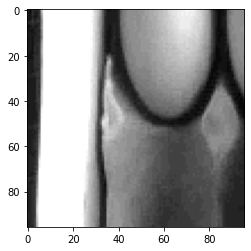

In [7]:
raw_bytes = np.array(HEXADECIMAL_BYTES)
image = np.reshape(raw_bytes,(96, 96)) #QCIF resolution

# Show the image
plt.imshow(image, cmap='gray')
plt.show()

In [8]:
HEXADECIMAL_BYTES = [
  0xc0f0f0, 0xb0f0c8, 0x98d0c0, 0x90c8a8, 0x88bca0, 0x88b898, 0x80b490, 0x78b488, 0x78b088, 0x78b088, 0x78b088, 0x80b088, 0x80ac88, 0x90c488, 0x88c098, 0x90bc98, 0xc0e098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8d0f0, 0xa0b8b0, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc8e8e8, 0xb8d0c0, 0xa0b4a8, 0x90a490, 0x90a088, 0x889080, 0x98a078, 0xa8b088, 0xb8c098, 0xd0d4b0, 0xd8dcb0, 0xd8dcb8, 0xd8dcb8, 0xe0e0b8, 0xe0e4b8, 0xe0e4b8, 0xe8e8c0, 0xe8f0c0, 0xe8f0c8, 0xf0f0c8, 0xf0f0d0, 0xf0f0d0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xf0f0d0, 0xe8f0c8, 0xe0e8c8, 0xc8ccb8, 0xc0c0a0, 0xa0a098, 0x888c88, 0x707070, 0x686468, 0x707460, 0x686860, 0x807c58, 0xa8ac80, 0xe0e8a0, 0xf0f0d0, 0xf0f0e0, 0xb8f0f0, 0xb0f0c8, 0x90d4c0, 0x88c0a8, 0x88c0a0, 0x88b898, 0x80b490, 0x80b090, 0x78b088, 0x78b088, 0x80ac88, 0x80b088, 0x80ac88, 0x90c488, 0x90c498, 0x90c098, 0xc8e090, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0c8f0, 0x98acb0, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e4d8, 0xa8c0b8, 0x98aca0, 0x909c90, 0x889888, 0x909878, 0x909888, 0xb0b490, 0xc8cca0, 0xd0d4a8, 0xd8dcb0, 0xd8dcb0, 0xd8dcb8, 0xd8dcb8, 0xd8e0b8, 0xe0e0c0, 0xe0e4c0, 0xe0ecc8, 0xe8f0c8, 0xf0f0d0, 0xe8f0d0, 0xf0f0d0, 0xf0f0d8, 0xf0f0d8, 0xf0f0d8, 0xe8f0d8, 0xe0ecd0, 0xd8e4c8, 0xd0d8c8, 0xb8bcb0, 0xb0b0a0, 0x989c90, 0x888880, 0x707060, 0x707058, 0x707058, 0x787050, 0x989860, 0xc0c888, 0xf0f0c0, 0xf0f0d8, 0xf0f0e8, 0xb8ecf0, 0xb0f0c8, 0x98d8c0, 0x88c0a8, 0x88bca0, 0x80b890, 0x80b490, 0x80b088, 0x80b088, 0x78b088, 0x80b088, 0x80b088, 0x78ac88, 0x90c488, 0x90c4a0, 0x90bc98, 0xd0e898, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0c8f0, 0x98b4b0, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xb8d4d0, 0xb0c8b0, 0x90a898, 0x90a488, 0x889080, 0x909480, 0xa0a480, 0xb8bc88, 0xc0c4a0, 0xd0d4b0, 0xd0dcb8, 0xd8d8b8, 0xd8d8b0, 0xe0e0b8, 0xe0e0b8, 0xd8dcb8, 0xe0e4c0, 0xe8e4c0, 0xe8e8c8, 0xe8ecc8, 0xe8f0c8, 0xe8f0d0, 0xe8f0d0, 0xf0f0d0, 0xe0e8d0, 0xd8e0c0, 0xd8dcb0, 0xc8c8b0, 0xb0b0a8, 0xa0a490, 0x808078, 0x707070, 0x707058, 0x706c58, 0x686858, 0x808060, 0xa8b080, 0xe8f0a8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xb8ecf0, 0xb0f0c8, 0x98d8c0, 0x88c4a8, 0x88bca0, 0x80b890, 0x80b490, 0x80b088, 0x80b088, 0x80b088, 0x80b088, 0x80b088, 0x80ac88, 0x90c488, 0x90c4a0, 0x90bc98, 0xd0e898, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c8f0, 0x98b0b0, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ecd8, 0xb8d4c0, 0x98aca8, 0x98a098, 0x889890, 0x909c88, 0x909888, 0xa0ac88, 0xb8bca0, 0xc8d4a8, 0xd0d8b0, 0xd0d8b0, 0xd0d4b0, 0xd8d8b8, 0xd0d8b8, 0xd0d8b8, 0xd8dcc0, 0xd8e0c0, 0xd8e0c0, 0xe0e4c8, 0xe0ecc8, 0xe0ecc8, 0xe0e8d0, 0xe0ecd0, 0xd8e0d0, 0xc8d4c0, 0xc0c8b0, 0xb8b8a8, 0xa8ac98, 0x909488, 0x787868, 0x787860, 0x707058, 0x787858, 0x808458, 0xa0a868, 0xc8d090, 0xf0f0d0, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xb8ece8, 0xa8f0c8, 0x98d8c0, 0x88c4a8, 0x88bca0, 0x80b898, 0x80b490, 0x80b088, 0x80b088, 0x80b088, 0x80b088, 0x80ac88, 0x80b088, 0x90c088, 0x98c4a8, 0x88b498, 0xd8ec98, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c0e8, 0xa0b0b0, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc8e8e0, 0xb0c4b8, 0x98b0a0, 0x90a490, 0x90a088, 0x909c88, 0x909880, 0xa0a480, 0xb0b490, 0xc0c8a0, 0xc8ccb0, 0xc8ccb0, 0xd0d4b0, 0xd0d4b0, 0xd8d8b0, 0xd8dcb8, 0xd8e0b8, 0xe0e4c0, 0xe0e4c0, 0xe0e0c0, 0xe0e4c0, 0xe0ecc0, 0xd8e0c0, 0xc8d4c0, 0xc8d0b0, 0xb8c0a0, 0xa0a490, 0x909488, 0x808080, 0x686c60, 0x787860, 0x686c58, 0x787860, 0x888868, 0xb0b480, 0xe0f0a8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xb0e8e8, 0xa8f0c0, 0x98d8c0, 0x88c4a0, 0x88bca0, 0x80b498, 0x80b490, 0x80b088, 0x80b488, 0x80b088, 0x80b088, 0x80b488, 0x80b088, 0x90c088, 0x98c8a0, 0x90bc98, 0xd8f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0b8e8, 0xb0c4a8, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc8e0d8, 0xa0b4b0, 0x90a498, 0x889890, 0x889888, 0x909888, 0x889080, 0xa0a488, 0xb0bc90, 0xc0c4a0, 0xc8cca8, 0xd0d4a8, 0xd0d4b0, 0xc8d4b8, 0xd0d8b8, 0xd0dcb8, 0xd0dcc0, 0xd0dcc0, 0xd0dcc0, 0xd0dcc0, 0xd0dcc0, 0xc0d0b8, 0xb8c4b0, 0xb0b8a0, 0xa0ac90, 0x909888, 0x888c70, 0x787860, 0x787458, 0x707458, 0x808058, 0x888c60, 0xa0a068, 0xc0cc90, 0xf0f0c0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xb0e8e8, 0xa8ecc0, 0x90d4c0, 0x90c4a0, 0x80b4a0, 0x80b098, 0x80b490, 0x78b090, 0x78b088, 0x78ac88, 0x78ac88, 0x80b088, 0x88b890, 0x88bc88, 0x90c8a0, 0x88b898, 0xd8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0c0d8, 0xe0ecb8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xb8d4d0, 0xa8c0b0, 0x98ac98, 0x98a488, 0x909880, 0x889080, 0x909878, 0xa0a478, 0xa8ac88, 0xb8bc98, 0xc0c4a0, 0xc8c8a8, 0xc0c4a8, 0xc8ccb0, 0xd0d4b0, 0xc8d4b0, 0xd0d8b8, 0xd0d8b8, 0xd0d8b8, 0xc8ccb0, 0xb8c4a8, 0xa8b4a0, 0xa0a890, 0x889480, 0x787870, 0x787468, 0x787860, 0x706c60, 0x686860, 0x808060, 0x909068, 0xb8c088, 0xd8ecb0, 0xf0f0c8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xb8e8e8, 0xa8f0c0, 0x98dcc0, 0x90c8a0, 0x88bca0, 0x80b898, 0x80b490, 0x80b890, 0x80b490, 0x80b890, 0x80b890, 0x80b890, 0x88bc90, 0x90c890, 0x98d4a8, 0x98c898, 0xe0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8c8d8, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0e8, 0xc0dcc8, 0xa0b0a8, 0x98a098, 0x889090, 0x808c80, 0x808c78, 0x889070, 0x909880, 0xa0a888, 0xa8b090, 0xb8bc90, 0xb8b8a0, 0xb8c0a8, 0xc0c4a8, 0xc0c8a8, 0xc0c8b0, 0xb8c8b0, 0xb8c0a8, 0xb0bca0, 0xa8b4a0, 0x98a490, 0x909c80, 0x808c70, 0x707058, 0x787458, 0x707058, 0x787458, 0x808058, 0x909468, 0xa0a470, 0xd0dc98, 0xe0f0c8, 0xf0f0d0, 0xf0f0d0, 0xf0f0e0, 0xf0f0e8, 0xf0f0f0, 0xb0ece8, 0xa8f0b8, 0x98e4c8, 0x90d0a8, 0x88c4a0, 0x88c4a0, 0x88c4a0, 0x88c498, 0x88c498, 0x88bc98, 0x88bc90, 0x88c090, 0x88c090, 0x90cc90, 0x98d0a8, 0x98c8a0, 0xe0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0bcd0, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xb8d4d0, 0xa8b8b8, 0x98a090, 0x909478, 0x808478, 0x808070, 0x908c70, 0x909470, 0x989878, 0xa0a880, 0xa8b090, 0xb0b498, 0xb0b498, 0xb0b498, 0xa8b498, 0xa8b490, 0xa8b490, 0xa0a890, 0x909888, 0x788478, 0x707468, 0x707460, 0x707458, 0x707060, 0x787458, 0x808068, 0x989870, 0xa0a880, 0xb0b888, 0xe0f0b0, 0xe8f0c8, 0xe8f0c8, 0xe8f0d0, 0xf0f0d8, 0xf0f0e0, 0xf0f0f0, 0xb8f0f0, 0xa8f0c8, 0x98e8c8, 0x88cca8, 0x88c8a0, 0x88c498, 0x88c498, 0x80c098, 0x80bc90, 0x80bc90, 0x88b890, 0x88bc90, 0x88bc90, 0x88c490, 0x98cca0, 0x98c4a0, 0xe8f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0bcc8, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0e8, 0xc0d8c8, 0xa8b4a8, 0x989898, 0x808088, 0x807c70, 0x808068, 0x807c68, 0x888470, 0x888c70, 0x908c78, 0x989480, 0x909480, 0x989880, 0x989c80, 0x909880, 0x909878, 0x888c70, 0x788470, 0x707460, 0x686c50, 0x707450, 0x707858, 0x808460, 0x908c60, 0x989870, 0xa8a880, 0xb0b488, 0xb8c090, 0xe0f0c0, 0xe8f0d8, 0xe8f0d8, 0xe8f0d8, 0xe8f0d8, 0xf0f0e0, 0xf0f0e8, 0xc0f0e8, 0xa8f0c0, 0x98e4c0, 0x88cca8, 0x90cca0, 0x88c898, 0x88c498, 0x88c098, 0x80bc90, 0x80b890, 0x88b890, 0x88b890, 0x88b890, 0x90c088, 0x98cca8, 0x98c4a0, 0xe8f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c0c0, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0dcd8, 0xb0c0b0, 0xa0a898, 0x909488, 0x888470, 0x808068, 0x808068, 0x888868, 0x888470, 0x908c70, 0x888878, 0x888470, 0x808470, 0x808068, 0x808060, 0x707060, 0x706c60, 0x686c60, 0x706c60, 0x707058, 0x787c58, 0x889070, 0x989878, 0xa0a078, 0xb8b888, 0xb8c098, 0xd0dca0, 0xf0f0c8, 0xe8f0d8, 0xe8f0d0, 0xe8f0d8, 0xf0f0d0, 0xf0f0e0, 0xf0f0e0, 0xb0f0e8, 0xa0ecb8, 0x98e4c0, 0x88c8a8, 0x88c4a0, 0x80b898, 0x80b898, 0x80b890, 0x80b890, 0x80b490, 0x80b490, 0x80b490, 0x88b888, 0x88c090, 0xa0d4a0, 0x98bca0, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xa0c0c8, 0xd8ecb0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0ecd0, 0xb8d0b8, 0xa0aca8, 0x989c90, 0x909488, 0x909088, 0x909480, 0x909080, 0x888878, 0x888870, 0x888070, 0x787868, 0x808060, 0x807c60, 0x787058, 0x706c58, 0x787458, 0x707458, 0x808458, 0x888c60, 0x989c70, 0xa8a880, 0xa8ac88, 0xc0c098, 0xc8d0a0, 0xd0e4b0, 0xe8f0d0, 0xe8f0d0, 0xe8f0d0, 0xe0f0d8, 0xe0f0d0, 0xe8f0d0, 0xf0f0e0, 0xb8ece0, 0xa0e8c0, 0x98dcc0, 0x88c4a0, 0x88c098, 0x88bc98, 0x88b890, 0x80b890, 0x80b490, 0x80b488, 0x88b488, 0x88b490, 0x88b488, 0x88bc88, 0x98cca0, 0x98b8a0, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xa0b8b8, 0xb8cca0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0f0d8, 0xb8d0c8, 0xa8c0a8, 0xa8b898, 0xa8b490, 0xa8b090, 0xa0ac88, 0xa0a488, 0x909080, 0x909078, 0x888470, 0x908870, 0x888068, 0x807c60, 0x807c68, 0x888468, 0x888870, 0x909c70, 0x98a470, 0xa0ac80, 0xb0bc90, 0xb8c498, 0xc8d4a0, 0xc8d0a0, 0xd8e4a8, 0xe8f0c0, 0xe8f0d0, 0xe8f0d0, 0xe0f0d0, 0xe0f0c8, 0xe8f0d0, 0xf0f0d8, 0xa8e4e0, 0xa0e4b8, 0x98d8b8, 0x88c4a0, 0x80bc98, 0x80bc98, 0x80b898, 0x80b090, 0x80b488, 0x80b488, 0x80b088, 0x80b488, 0x88b488, 0x88bc90, 0x98cca0, 0x98bc98, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0x98b4b8, 0xc0d0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0e8, 0xe8f0d8, 0xd0ecd8, 0xc8e4c0, 0xb8d4c0, 0xb8ccb0, 0xb0c4a8, 0xb0bca0, 0xb0bca0, 0xa8b498, 0xa8b498, 0xa0a488, 0xa0a488, 0xa0a480, 0x98a080, 0x989880, 0x989c78, 0x98a078, 0xa0a480, 0xa8ac88, 0xb0b888, 0xb8c098, 0xb8c4a0, 0xc8d4a8, 0xc8d4b0, 0xd8e4b0, 0xe8f0c0, 0xe8f0d0, 0xe8f0d0, 0xe0f0d0, 0xe8f0d0, 0xe8f0d0, 0xf0f0d8, 0xb0e4d8, 0xa0dcb8, 0x98d8c0, 0x88c4a0, 0x88c098, 0x80b898, 0x80b890, 0x80b490, 0x80b088, 0x80b088, 0x80b088, 0x80b088, 0x88b888, 0x88bc88, 0x98cca0, 0x98b898, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xa0b8b8, 0xb8cca0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0e8, 0xe0f0e8, 0xe0f0e0, 0xd8f0e0, 0xd0f0d0, 0xc8ecc0, 0xc8e4b8, 0xc0d8b8, 0xb8d4b8, 0xb0c8a8, 0xb0c4a8, 0xa8b8a0, 0xb0b898, 0xa8b490, 0xa0ac90, 0xa0a888, 0xa0ac88, 0xa8b088, 0xa8b888, 0xa8b888, 0xb0bc90, 0xb8c898, 0xb8c898, 0xc8d4a0, 0xd0d8a8, 0xd0d8b0, 0xe0ecb0, 0xe8f0d0, 0xe8f0c8, 0xe8f0d0, 0xe8f0d0, 0xe8f0d0, 0xf0f0d8, 0xa8e0e0, 0xa0dcb8, 0xa0dcc0, 0x88c4a0, 0x88bc98, 0x80b898, 0x80b890, 0x80b490, 0x80b088, 0x80b088, 0x80b088, 0x80b088, 0x88b490, 0x88bc88, 0xa0d0a0, 0xa0c098, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0x98b4b0, 0xb8c8a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0e8, 0xe8f0e0, 0xe8f0e0, 0xd8f0d8, 0xd0f0c8, 0xd0f0c0, 0xc8e8c0, 0xc0e0b8, 0xc0dcb8, 0xb8ccb0, 0xb8cca8, 0xb0c098, 0xb0bca0, 0xb0b890, 0xb0bc90, 0xb0b890, 0xa8b890, 0xb0b890, 0xa8b490, 0xa8b490, 0xb0bc90, 0xb8c8a0, 0xb8c8a0, 0xc8d0a0, 0xc8d4a8, 0xc8d0a8, 0xe0f0b0, 0xe8f0c8, 0xe0f0c8, 0xf0f0d0, 0xf0f0d8, 0xe8f0d0, 0xf0f0d8, 0xb0e4d8, 0xa0dcb8, 0xa0dcb8, 0x88c4a0, 0x88bc98, 0x80b898, 0x80b890, 0x80b490, 0x80b088, 0x80b088, 0x80b088, 0x80b088, 0x88b490, 0x88bc88, 0xa0d0a0, 0xa0c0a0, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0x98b4b0, 0xb8c8a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0e8, 0xe8f0d8, 0xe0f0d8, 0xd0f0d8, 0xd0f0c8, 0xc8e8c0, 0xc8e4b8, 0xc0d8b0, 0xb8d4b0, 0xb0c8a8, 0xb0c4a0, 0xb0c8a0, 0xb0c4a8, 0xb0c4a0, 0xb0c4a0, 0xb0c4a0, 0xb0c098, 0xb0bc98, 0xa8b890, 0xb0bc90, 0xb8c490, 0xb8c8a0, 0xc0cca0, 0xc8d4a0, 0xc8d4a0, 0xc8d4a0, 0xd8e8a0, 0xf0f0c0, 0xe8f0c8, 0xf0f0d8, 0xf0f0e0, 0xf0f0d8, 0xf0f0e0, 0xa8e4d8, 0xa0d8b0, 0xa0d8b8, 0x88c0a0, 0x88bc98, 0x80b498, 0x80b890, 0x88b490, 0x80b088, 0x80b088, 0x80b088, 0x88b088, 0x88b890, 0x88b890, 0xa0d498, 0xa0c098, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e0f0, 0x98b8b0, 0xb8c8a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0e8, 0xd0ecd0, 0xc8e4c0, 0xc8e4c8, 0xc8e4c0, 0xc8e0b8, 0xc0d8b0, 0xb8ccb0, 0xb8c8a8, 0xb0c8a8, 0xb0c4a0, 0xb0c4a0, 0xb0c4a0, 0xb0c098, 0xb0c098, 0xb0c498, 0xb0c098, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb8c498, 0xc0c8a0, 0xc0cca0, 0xc8d0a0, 0xc0cca0, 0xc0c8a0, 0xc0d0a0, 0xe0f0b8, 0xf0f0d0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e0, 0xa8e4d0, 0x98dcb0, 0xa0d8b8, 0x88c0a0, 0x88bc90, 0x80b498, 0x80b490, 0x80b088, 0x80b088, 0x80b088, 0x80b088, 0x88b488, 0x88b490, 0x88b890, 0xa0d0a0, 0x98b8a0, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e0f0, 0xa0bcb0, 0xb8cca0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0d0, 0xc8e8c0, 0xc0dcc8, 0xc0d8b8, 0xc0d0b0, 0xc0d0b0, 0xb8cca8, 0xb0c4a0, 0xb0c0a0, 0xb0c4a0, 0xb0c4a0, 0xb0c0a0, 0xb0c098, 0xb0bc98, 0xb0c098, 0xb0bc98, 0xb0c098, 0xb0c4a0, 0xb8c498, 0xb8c498, 0xc0c8a0, 0xc0cca0, 0xc8cc98, 0xc8cca0, 0xc8d0a0, 0xc8d498, 0xd8e8a8, 0xf0f0d0, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xa8e8d0, 0x98dcb0, 0x98d8b8, 0x88c4a0, 0x88bc90, 0x80b898, 0x80b490, 0x80b088, 0x80b088, 0x80b088, 0x80b088, 0x88b488, 0x88b890, 0x88b890, 0xa8d498, 0xa0c4a0, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d8f0, 0x90a8b0, 0xb0c0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd0f0d8, 0xc8ecc8, 0xc0e0c8, 0xc0d8c0, 0xb8d0b0, 0xc0d4b0, 0xb8ccb0, 0xb0c4a0, 0xb0c0a0, 0xb0c4a0, 0xb0c4a0, 0xb0c098, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb8c098, 0xb8c498, 0xb8c898, 0xc0c8a0, 0xc0cca0, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xc8d4a8, 0xf0f0b8, 0xf0f0e0, 0xf0f0e8, 0xf0f0e8, 0xf0f0e8, 0xa8e0c8, 0x98dcb0, 0x98d8b8, 0x88c4a0, 0x88bc90, 0x80b890, 0x80b490, 0x80b088, 0x80b088, 0x80b088, 0x80b088, 0x88b488, 0x88b890, 0x88b890, 0xa0d498, 0x98bca0, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0dcf0, 0x90a8b0, 0xa0b098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd0f0d8, 0xc8ecc8, 0xc0e0c8, 0xc0dcc0, 0xc0d4b0, 0xc0d4b0, 0xb8cca8, 0xb0c4a0, 0xb0c0a0, 0xb0c4a0, 0xb0c4a0, 0xb0c098, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb8c098, 0xb8c0a0, 0xc0c898, 0xc0c8a0, 0xc0c8a0, 0xc0c8a0, 0xc0c8a0, 0xc8cca0, 0xc8cc98, 0xe0e8a8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xf0f0e8, 0xa0e0c8, 0x98dcb0, 0x98dcb8, 0x88c4a0, 0x88b898, 0x88b890, 0x80b490, 0x80b090, 0x80b088, 0x80b088, 0x80b488, 0x88b488, 0x88b890, 0x88b890, 0xa8d498, 0x98bca0, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d8f0, 0x90acb0, 0xa0b4a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd0f0d8, 0xc8f0c8, 0xc0e0c8, 0xc0dcc0, 0xb8d4b0, 0xc0d4b0, 0xb8cca8, 0xb8c8a0, 0xb0c4a8, 0xb0c4a0, 0xb0c4a0, 0xb0c0a0, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c0a0, 0xb8c898, 0xc0c8a0, 0xc0c8a0, 0xc0c8a0, 0xc0c8a0, 0xc8cca0, 0xc0c8a8, 0xd0dca0, 0xf0f0c8, 0xf0f0d8, 0xf0f0e0, 0xf0f0e8, 0xa0e0c8, 0x98d8b0, 0x98d8b8, 0x90c4a0, 0x88b898, 0x80b890, 0x80b490, 0x80b490, 0x80b088, 0x80b088, 0x80b488, 0x88b490, 0x88b490, 0x88b890, 0xa8d898, 0x98bca0, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d8f0, 0x90aca8, 0x98a4a0, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xe0f0e0, 0xc8ecd0, 0xc8ecc0, 0xc0e4c0, 0xc0d8b8, 0xb8d4b0, 0xb8d0b0, 0xb8d0a8, 0xb8cca8, 0xb0c4a0, 0xb0c0a0, 0xb0bca0, 0xb0bca0, 0xb0bc98, 0xb0bc98, 0xb0b898, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c098, 0xb8c498, 0xb8c8a0, 0xc0c8a0, 0xc0c8a0, 0xc0cca0, 0xc8d0a0, 0xc8d0a0, 0xd0d498, 0xf0f0c0, 0xf0f0d8, 0xf0f0e0, 0xf0f0e0, 0xa8e0c8, 0x98d8b0, 0x98d8b0, 0x88c4a0, 0x88b898, 0x88b890, 0x80b490, 0x80b490, 0x80b488, 0x80b488, 0x88b488, 0x88b490, 0x88b490, 0x88b890, 0xa8d498, 0xa0c0a0, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d8f0, 0x98aca8, 0x889ca8, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xc8f0d0, 0xc8ecc8, 0xc0dcc0, 0xc0d8b8, 0xb8d4b0, 0xb8ccb0, 0xb8cca8, 0xb8c8a8, 0xb0c4a0, 0xb0c0a0, 0xb0c0a0, 0xb0bca0, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c8a0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xe0f0b0, 0xf0f0d0, 0xf0f0d8, 0xf0f0e0, 0xa0dcc0, 0x98d4b0, 0x98d8b0, 0x90c4a8, 0x88b898, 0x88b890, 0x80b490, 0x80b488, 0x80b088, 0x80b488, 0x80b488, 0x88b488, 0x88b888, 0x88b890, 0xa8d098, 0xa0c0a0, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d8f0, 0x98b4a8, 0x98aca0, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd0f0d8, 0xd0f0d0, 0xc8ecc0, 0xc0e0c0, 0xc0d8b8, 0xb8d4b0, 0xb8ccb0, 0xb8cca8, 0xb8c8a8, 0xb0c4a0, 0xb0c0a0, 0xb8c0a0, 0xb0bca0, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0bc98, 0xb0bc98, 0xb8c098, 0xb8c098, 0xb8c4a0, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc8d098, 0xd0dca0, 0xf0f0b8, 0xf0f0d8, 0xf0f0d8, 0xa0dcc0, 0x90d0b0, 0xa0d8b0, 0x88c4a8, 0x88b898, 0x88b490, 0x88b490, 0x80b490, 0x80b088, 0x80b088, 0x80b488, 0x88b488, 0x88b488, 0x88bc88, 0xa8d498, 0xa8c4a0, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0x90aca8, 0x8094a0, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd0f0e0, 0xd0f0d0, 0xc8e8c8, 0xc0e4c0, 0xc0d8b8, 0xc0d4b0, 0xb8ccb0, 0xb8cca8, 0xb8c8a8, 0xb0c4a8, 0xb0c0a0, 0xb0c0a0, 0xb0c0a0, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c8a0, 0xb8c8a0, 0xb8cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca8, 0xe0f0a8, 0xf0f0d0, 0xf0f0d0, 0xa0dcc8, 0x90d0b0, 0x98d8b0, 0x88c4a0, 0x88b898, 0x88b498, 0x80b490, 0x80b490, 0x80b488, 0x80b488, 0x80b488, 0x88b488, 0x88b888, 0x90bc88, 0xa0d098, 0xb0cca8, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0x98b0a8, 0x889c98, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd0f0e0, 0xd0f0d0, 0xc8e8c8, 0xc0e0c0, 0xc0dcb0, 0xb8d0b0, 0xb8d0a8, 0xb8cca8, 0xb0c8a8, 0xb0c8a0, 0xb0c498, 0xb0c098, 0xb0c0a0, 0xb0bc98, 0xb0c098, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c4a0, 0xb8c498, 0xb8c8a0, 0xb8cca0, 0xc0cca0, 0xc0cca0, 0xc0d0a0, 0xc8d0a0, 0xc8d0a0, 0xd0d498, 0xe8f0b0, 0xe8f0c8, 0xa0dcc8, 0x90d4b0, 0x98d8b0, 0x90c4a8, 0x88b898, 0x88b498, 0x88b490, 0x80b090, 0x80b488, 0x80b488, 0x80b488, 0x88b488, 0x90b890, 0x90bc88, 0xa8d498, 0xb0d0a0, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0ecf0, 0x90acb0, 0x809898, 0xe0eca0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd0f0e0, 0xd0f0d8, 0xc8e8c8, 0xc0e0b8, 0xc0d8b8, 0xc0d4a8, 0xc0d0a8, 0xb8cca8, 0xb8cca8, 0xb8d0a8, 0xb0c4a0, 0xb0c098, 0xb0c0a0, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c4a0, 0xb8c498, 0xb8c498, 0xb8c8a0, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xc0d0a0, 0xc0d0a0, 0xc0c8a0, 0xc0c4a0, 0xd8e0a8, 0xe0f0b8, 0xa0e0c8, 0x90d0b0, 0x98d8b0, 0x88c0a8, 0x88b898, 0x88b498, 0x88b490, 0x80b090, 0x80b488, 0x80b488, 0x88b490, 0x88b490, 0x90b490, 0x90bc90, 0xa0d498, 0xc0e4a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0x90b0a8, 0x88a498, 0xe0f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xd0f0d0, 0xc8e8c8, 0xc0e0b8, 0xc0d8b8, 0xc0d4b0, 0xb8d0a8, 0xb8cca8, 0xb8cca0, 0xb8d0a0, 0xb0c0a0, 0xb0c098, 0xb0c098, 0xb0bc98, 0xb0c098, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0c8a0, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xc0d0a0, 0xc0d0a0, 0xc0d0a0, 0xc8d4a0, 0xd8e0a0, 0xd8e4b0, 0xa8e0c8, 0x90d4b0, 0xa0d8b0, 0x90c4a8, 0x88bc98, 0x88b898, 0x88b490, 0x88b488, 0x88b488, 0x88b488, 0x88b490, 0x88b490, 0x90b490, 0x90bc90, 0xa8d498, 0xc0e4a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0x90acb0, 0x88a490, 0xd0dc90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0e8, 0xd0f0e0, 0xc8f0d8, 0xc8e8c8, 0xc0dcb8, 0xc0d4b8, 0xc0d0b0, 0xb8d0a8, 0xb8cca8, 0xb8c8a0, 0xb8cca0, 0xb0c098, 0xb0c098, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c098, 0xb8c498, 0xc0c8a0, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0d0a0, 0xc0d0a0, 0xc0cca0, 0xd0d8a8, 0xd8e8b8, 0xa8e4c8, 0x90d4b0, 0xa0dcb0, 0x88c4a8, 0x88b898, 0x88b498, 0x80b490, 0x80b488, 0x80b488, 0x80ac88, 0x80ac88, 0x88b088, 0x88b090, 0x88b490, 0x98cc98, 0xc8eca8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0x90b0b0, 0x98a898, 0xa8b880, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0e8, 0xd8f0e0, 0xd0f0d0, 0xc8e4c8, 0xc0d8b8, 0xc0d4b0, 0xc0d4b0, 0xb8cca8, 0xb8cca8, 0xb8c8a0, 0xb8c4a0, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c498, 0xc0c8a0, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0d0a0, 0xc8d0a0, 0xd0d8a0, 0xd8e4b0, 0xa8e0c0, 0x98d0b0, 0x98d4a8, 0x88c0a0, 0x80b498, 0x88b488, 0x80b490, 0x80b088, 0x80b488, 0x88b890, 0x88b890, 0x88b890, 0x90c098, 0x90c498, 0xa8e0a0, 0xe0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x90acb8, 0x88a498, 0xa8b888, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xc8f0d0, 0xc8e4c8, 0xb8d8b8, 0xc0d4b0, 0xc0d0b0, 0xb8d0a8, 0xb8cca8, 0xb0cca0, 0xb8c8a0, 0xb0c098, 0xb0bc98, 0xb0c098, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c098, 0xb8c498, 0xb8c4a0, 0xb8c4a0, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc8d0a0, 0xc8d0a0, 0xc8d0a0, 0xd0e0b0, 0xa8e4c8, 0x98d8b0, 0xa0e8b0, 0x90d0a8, 0x88c8a0, 0x90cca0, 0x90cca0, 0x90cca0, 0x90c898, 0x90cc98, 0x90cca0, 0x98cc98, 0x98d0a0, 0x98d4a0, 0xb0eca8, 0xd8f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x90b0b8, 0x90a498, 0x889880, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e0, 0xd0f0d8, 0xc8e8c8, 0xc0dcc8, 0xc0d4b8, 0xc0d4b0, 0xc0d4b0, 0xb8ccb0, 0xb8cca8, 0xb0c8a0, 0xb8c8a0, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0b898, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c098, 0xb8c498, 0xb8c4a0, 0xb8c8a0, 0xc0c8a0, 0xc0c8a0, 0xc0c898, 0xc0cca0, 0xc8d0a0, 0xc8d0a0, 0xc8d4a0, 0xd0dca8, 0xa8ecd0, 0x98e4b8, 0xa8f0b8, 0x98dcb0, 0x88cca0, 0x90c8a0, 0x90c898, 0x90c898, 0x90c898, 0x90c898, 0x90c898, 0x90c498, 0x90c098, 0x90c498, 0xa8d898, 0xd8f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x90b0c0, 0x809c98, 0x809090, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0e8, 0xd0f0e0, 0xd0f0d0, 0xc8e8c0, 0xc0e0c0, 0xb8d8b0, 0xc0d4b0, 0xb8d0b0, 0xc0d4b0, 0xb8ccb0, 0xb0c8a0, 0xb8c8a0, 0xb0c098, 0xb0bc98, 0xa8bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c098, 0xb8c4a0, 0xb8c4a0, 0xb8c8a0, 0xb8c8a0, 0xb8c898, 0xc0cc98, 0xc0d0a0, 0xc8d0a0, 0xc0d0a0, 0xc8d8a8, 0xa8f0d0, 0xa0e4c0, 0xa0e0b0, 0x90d0b0, 0x88c498, 0x88c498, 0x88bc98, 0x88b490, 0x88bc90, 0x88bc90, 0x88b890, 0x88b890, 0x88b890, 0x88b890, 0xa8d498, 0xd8f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0b8c8, 0x809890, 0x809488, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e0, 0xd0f0d8, 0xd0f0d0, 0xc0e4c0, 0xc0e0c0, 0xb8d4b0, 0xb8d0b0, 0xb8d0a8, 0xb8d0a8, 0xb0c8a8, 0xb0c4a0, 0xb0c4a0, 0xb0c098, 0xb0bc98, 0xa8b898, 0xa8b890, 0xa8b890, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb8bc98, 0xb8c098, 0xb8c4a0, 0xb8c498, 0xb8c498, 0xb8c4a0, 0xb8c4a0, 0xb8c8a0, 0xc0c8a0, 0xc0c8a0, 0xc0cc98, 0xc0d0a0, 0xc8d0a0, 0xc8d0a0, 0xc8d0a8, 0xa0e0c8, 0x90d0b0, 0x98d8a8, 0x90c8a8, 0x80b898, 0x80b898, 0x80b490, 0x88b490, 0x88b490, 0x80b088, 0x88b488, 0x88b890, 0x90bc90, 0x90bc90, 0xa8d898, 0xd8f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0b4d0, 0x889ca0, 0x708490, 0xd8e490, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xd0f0d8, 0xd0f0d0, 0xc0e0c0, 0xc0e0b8, 0xb8d4b0, 0xb8d0b0, 0xb8d0a8, 0xb8cca8, 0xb0c8a0, 0xb0c4a0, 0xb0c4a0, 0xa8c098, 0xa8bc98, 0xa8b898, 0xa8b898, 0xa8b890, 0xb0bc90, 0xb0c098, 0xb0bc98, 0xb8c098, 0xb8c098, 0xb8c4a0, 0xb8c498, 0xb8c498, 0xb8c4a0, 0xb8c4a0, 0xb8c8a0, 0xb8c8a0, 0xb8c8a0, 0xc0c8a0, 0xc0cca0, 0xc8d0a0, 0xc0d0a8, 0xb8c8a0, 0xa0dcc0, 0x98ccb0, 0x98d8a8, 0x90c8a8, 0x88b898, 0x88bc98, 0x88b890, 0x88b488, 0x88b488, 0x88b488, 0x88b490, 0x90b490, 0x90b890, 0x90bc90, 0xa8d498, 0xe0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0b8d8, 0x88a498, 0x788c90, 0xd0dc88, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0e8, 0xd8f0e0, 0xd0f0d8, 0xd0f0c8, 0xc0e0c8, 0xc0e0b8, 0xb8d4b0, 0xb8d0b0, 0xb8d0a8, 0xb8cca8, 0xb0c8a8, 0xb0c4a0, 0xb0c8a0, 0xb0c098, 0xa8bc98, 0xa8b898, 0xa8b898, 0xa8b898, 0xb0bc90, 0xb0c098, 0xb8c498, 0xb8c098, 0xb8c498, 0xb8c4a0, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c8a0, 0xc0c8a0, 0xb8c8a0, 0xb8c8a0, 0xc0c8a0, 0xc0c898, 0xc8d0a0, 0xc8d0a0, 0xc0cca0, 0xa0e0c0, 0x98d0b0, 0x98d4b0, 0x90c8a8, 0x88b898, 0x88b898, 0x88b890, 0x88b488, 0x88b488, 0x88b490, 0x88b488, 0x88b490, 0x90b890, 0x90bc90, 0xa8d498, 0xe0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b0d8, 0x88a498, 0x809490, 0xc8d080, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xd8f0e0, 0xc8f0d0, 0xc8f0c8, 0xc0e4c8, 0xc0e4b8, 0xb8d0b0, 0xb8d0b0, 0xb8ccb0, 0xb0cca8, 0xb0c8a8, 0xb0c0a0, 0xb0bca0, 0xa8bc98, 0xa8bc98, 0xa8b898, 0xa8b898, 0xa8b898, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c898, 0xb8c8a0, 0xb8c8a0, 0xb8c8a0, 0xb8c898, 0xc0c8a0, 0xc0d0a0, 0xc8d0a0, 0xb8cca0, 0xa0d8c0, 0x98d0b0, 0x98d4a8, 0x88c4a8, 0x88bc98, 0x88bc90, 0x88b890, 0x88b488, 0x88b488, 0x88b488, 0x88b490, 0x88b490, 0x90b890, 0x90bc90, 0xa8d098, 0xe0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0c0e8, 0x88a498, 0x889890, 0xa8b078, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e0, 0xd0f0d8, 0xd0f0d0, 0xc8e8c0, 0xc0e4c0, 0xc0e0b8, 0xb8d4b0, 0xb8d0b0, 0xb8ccb0, 0xb8c8a8, 0xb0c4a0, 0xb0c0a0, 0xb0c0a0, 0xa8b890, 0xa8b898, 0xa8b890, 0xa8b890, 0xa8b898, 0xb0bc90, 0xb0c098, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c898, 0xc0c898, 0xb8c8a0, 0xc0c898, 0xc0c898, 0xc0cca0, 0xc8d0a0, 0xc0cc98, 0xa0d8c0, 0x90ccb0, 0x98d4a8, 0x90c4a8, 0x88bc98, 0x88b890, 0x88b890, 0x88b490, 0x88b488, 0x88b488, 0x88b490, 0x88b890, 0x90bc90, 0x90bc90, 0xa8d498, 0xe0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bce8, 0x88a0a0, 0x809890, 0xa8b480, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0f0e8, 0xd0f0d8, 0xd0f0d0, 0xc0e8c8, 0xc0e4c0, 0xb8dcb8, 0xb8d8b8, 0xb8d0b0, 0xb8c8a8, 0xb0c8a0, 0xb0c4a0, 0xb0bca0, 0xb0c0a0, 0xa8b890, 0xa8b890, 0xa8b890, 0xa8b890, 0xa8b898, 0xa8b898, 0xb0c0a0, 0xb0c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c498, 0xb8c4a0, 0xb8c498, 0xb8c498, 0xb8c4a0, 0xb8c8a0, 0xb8c8a0, 0xb8c498, 0xb8c498, 0xc0d0a0, 0xc8d0a8, 0xb8c8a0, 0xa0d8b8, 0x98ccb0, 0x98d4a8, 0x88c0a8, 0x88bc98, 0x88b890, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b890, 0x90b890, 0x90c090, 0xa8d098, 0xe0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c0f0, 0x80a098, 0x889890, 0xa8b480, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe8f0e8, 0xd0f0e0, 0xd0f0d8, 0xc8ecc8, 0xc0e4c0, 0xc8e8c0, 0xb8d8b8, 0xb0c8b0, 0xb8c8a8, 0xb0c8a8, 0xb0c4a8, 0xb0c4a0, 0xa8c0a0, 0xb0bc98, 0xa8b890, 0xa8b490, 0xa8b890, 0xa8b890, 0xa8b890, 0xb0b890, 0xb0c098, 0xb8c098, 0xb0bc98, 0xb8bc98, 0xb8c098, 0xb8c498, 0xb8c8a0, 0xb8c4a0, 0xb8c498, 0xb8c498, 0xb8c898, 0xb8c898, 0xb8c098, 0xb8c098, 0xc0c898, 0xc0c4a0, 0xb8c098, 0xa0d4b8, 0x90c8b0, 0x98d4a8, 0x88c4a8, 0x88bc98, 0x88b890, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x90b890, 0x90bc98, 0xa8d098, 0xe8f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c4f0, 0x88a098, 0x809890, 0xa0b080, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xd0f0d8, 0xd0f0d0, 0xc8ecd0, 0xc0e4c0, 0xc0e0c0, 0xb8d0b0, 0xb0ccb0, 0xb0cca8, 0xb0cca8, 0xb0c8a8, 0xa8c4a0, 0xa8c0a0, 0xa8c098, 0xa8b490, 0xa8b490, 0xa8bc90, 0xa8bc90, 0xa8b890, 0xb0bc90, 0xb0c098, 0xb0c098, 0xb0bc98, 0xb0bc98, 0xb8c098, 0xb8c498, 0xb8c8a0, 0xb8c8a0, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c098, 0xb8c098, 0xb8c8a0, 0xc0c8a0, 0xb8c498, 0xa0d8c0, 0x90cca8, 0x98d0a8, 0x88c0b0, 0x88bc98, 0x88b890, 0x88b490, 0x88b490, 0x80b490, 0x88b490, 0x88b490, 0x90b890, 0x88b890, 0x90bc98, 0xa0cc90, 0xe8f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c0f0, 0x88a098, 0x809490, 0xa0ac80, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0e8, 0xd8f0e0, 0xd0f0d8, 0xd0f0d0, 0xc8ecd0, 0xc8e4c0, 0xc0dcb8, 0xb8d0b0, 0xb0ccb0, 0xb8cca8, 0xb0c4a0, 0xb0c4a0, 0xa8c0a0, 0xa8bca0, 0xa8bc98, 0xa8b498, 0xa8b490, 0xa8b490, 0xa0b088, 0xa8b890, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c098, 0xb8c098, 0xb8c098, 0xb8c8a0, 0xb8c8a0, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c098, 0xb8c098, 0xb8c098, 0xc0c498, 0xc0c4a0, 0xb8c0a0, 0xa0dcc0, 0x90cca8, 0x98d4a8, 0x88c4b0, 0x88bc98, 0x88b890, 0x88b890, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x90bc98, 0xa8c890, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c0f0, 0x88a098, 0x809890, 0xa0ac80, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xd0f0d8, 0xd0f0d0, 0xc8ecd0, 0xc0e4c0, 0xc0d8c0, 0xb8d0b0, 0xb0ccb0, 0xa8c4a8, 0xa8bca0, 0xa8b8a0, 0xa8bc98, 0xa8bc98, 0xa8bc98, 0xa8b498, 0xa8b490, 0xa0b490, 0xa0b488, 0xa8b490, 0xb0bc90, 0xb0c098, 0xb0c098, 0xb0c498, 0xb0c498, 0xb0c098, 0xb0c098, 0xb8c4a0, 0xb8c4a0, 0xb8c4a0, 0xb8c498, 0xb8c498, 0xb8c098, 0xb8c098, 0xb8c098, 0xc0c498, 0xc0c4a0, 0xb8c098, 0xa0d8c0, 0x98cca8, 0x98d0a8, 0x88c0b0, 0x90bc98, 0x88b890, 0x88b890, 0x88b890, 0x88b488, 0x88b488, 0x88b488, 0x88b488, 0x90b890, 0x90bc90, 0xa8c898, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c0f0, 0x88a098, 0x809490, 0xc0cc90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0e8, 0xe0f0e0, 0xd0f0d8, 0xd0f0d8, 0xd0f0d0, 0xd0f0d0, 0xc8e4c0, 0xb8d4c0, 0xb8d4b8, 0xb0ccb0, 0xb0c4a8, 0xa8bca0, 0xa8bca0, 0xa8bc98, 0xa8bc98, 0xa8bc98, 0xa8b490, 0xa8b490, 0xa0b090, 0xa0b090, 0xa8b490, 0xb0bc90, 0xb0bc90, 0xb0c098, 0xb0c498, 0xb0c498, 0xb0c098, 0xb0c098, 0xb8c4a0, 0xb8c898, 0xb8c498, 0xb8c498, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xc0c498, 0xc0c8a0, 0xb8c098, 0xa0d8c0, 0x98cca8, 0x98d0a8, 0x90c4b0, 0x88bc98, 0x88b890, 0x88b890, 0x88b890, 0x88b488, 0x88b488, 0x88b488, 0x88b490, 0x90b888, 0x98bc90, 0xa8c898, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bcf0, 0x88a098, 0x809490, 0xc0cc80, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd0f0e0, 0xd0f0d8, 0xd0f0d0, 0xc8f0d0, 0xc8e8d0, 0xc0dcb8, 0xc0d8b8, 0xb8d0b8, 0xb0ccb0, 0xb0c4a8, 0xa8bca0, 0xa8b8a0, 0xa8bc98, 0xa8bc98, 0xa8b898, 0xa8b490, 0xa0a888, 0xa0b088, 0xa0b090, 0xa8b890, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0c4a0, 0xb0c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c098, 0xb8bc98, 0xb8c4a0, 0xc0c898, 0xc0c8a0, 0xb0bc98, 0xa0d4b8, 0x98cca8, 0x98d0a8, 0x90c0b0, 0x88bc98, 0x88b890, 0x88b890, 0x88b888, 0x88b488, 0x88b488, 0x88b488, 0x88b490, 0x90bc90, 0x98bc90, 0xa8cc98, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bcf0, 0x88a098, 0x809890, 0xd8e898, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e0, 0xd8f0d8, 0xc8f0d0, 0xd0f0d0, 0xd0f0c8, 0xc8e8c8, 0xc0dcb8, 0xb8d8b8, 0xb8d4b0, 0xb0c8a8, 0xb0c4a8, 0xa8bca0, 0xa8bc98, 0xa8bc98, 0xa8bc98, 0xa8b898, 0xa8b490, 0xa0ac88, 0xa0b088, 0xa0b088, 0xa8b490, 0xa8bc90, 0xb0bc90, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0bc98, 0xb0bc90, 0xb0c498, 0xb8c4a0, 0xb8c498, 0xb8c098, 0xb8bc90, 0xb8c498, 0xc0c898, 0xc0c8a0, 0xb0c0a0, 0xa0d4b8, 0x90c8a8, 0x98cca8, 0x90c8a8, 0x88bc98, 0x88b890, 0x88b490, 0x88b490, 0x88b488, 0x88b488, 0x88b890, 0x88b890, 0x90bc90, 0x90bc90, 0xa8c898, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c0f0, 0x88a098, 0x889890, 0xe0ec90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xd0f0d8, 0xc8f0c8, 0xc8f0c8, 0xc0ecc8, 0xc8e8c8, 0xc0dcb8, 0xb8d8b8, 0xb8d0b8, 0xb0c4a8, 0xb0c4a8, 0xa8bca0, 0xa8b898, 0xa8b898, 0xa0b498, 0xa0b090, 0xa0ac88, 0xa0ac88, 0xa0ac88, 0xa0b088, 0xa8b890, 0xa8b890, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c498, 0xc0cc98, 0xc0cca0, 0xb0c098, 0xa0d8b8, 0x90cca8, 0x98d0a0, 0x90c8a8, 0x88bc98, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b890, 0x90bc90, 0x90c090, 0xa0cc98, 0xe8f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bcf0, 0x889ca0, 0x809890, 0xe0ec90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xd0f0d8, 0xd0ecc8, 0xd0f0c8, 0xc0e8c0, 0xc0e0c0, 0xb8d8b8, 0xb8d4b0, 0xb0ccb0, 0xa8c0a0, 0xb0c4a0, 0xa8bca0, 0xa8b498, 0xa0b490, 0xa0b490, 0xa0b490, 0xa0ac88, 0xa0ac88, 0xa0b088, 0xa0b088, 0xb0bc90, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc90, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c490, 0xb8c8a0, 0xb8cca0, 0xa0d8b8, 0x90ccb0, 0x98d0a0, 0x90c8a8, 0x88bc98, 0x88b890, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b890, 0x88b890, 0x90b890, 0x90bc98, 0xa0c898, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c0f0, 0x88a0a0, 0x889890, 0xe0ec90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xe0f0e0, 0xd8f0d8, 0xc8ecd0, 0xc8ecc8, 0xc0e4c0, 0xc0dcc0, 0xb8d8b8, 0xb8d4b8, 0xb0ccb0, 0xb0c4a0, 0xa8bca0, 0xa8b8a0, 0xa0b498, 0xa0b490, 0xa0b490, 0xa8b490, 0x98ac88, 0x98ac88, 0xa0b088, 0xa0b088, 0xa8b490, 0xa8b490, 0xa8b890, 0xb0b890, 0xb0b890, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc90, 0xb8c098, 0xb8c098, 0xb8bc98, 0xb8c090, 0xb8bc98, 0xb8c498, 0xc0c8a0, 0xc0c8a0, 0xa0d8b8, 0x90c8b0, 0x98cca0, 0x90ccb0, 0x88bc98, 0x88b890, 0x88b490, 0x88b490, 0x88b488, 0x88b488, 0x88b888, 0x88b888, 0x90b890, 0x90bc90, 0xa0c490, 0xe8f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0c0e8, 0x809c98, 0x809890, 0xd8e890, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xd8f0d8, 0xc8f0d0, 0xc8e8c8, 0xc0e0c0, 0xc0dcc0, 0xb8d8b8, 0xb8d0b0, 0xb0c8b0, 0xb0c0a8, 0xa8bca0, 0xa8b4a0, 0xa0b090, 0xa0ac90, 0xa0ac88, 0xa0ac88, 0x98ac88, 0x98ac80, 0xa0ac88, 0xa0b088, 0xa8b488, 0xa8b888, 0xa8b890, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc90, 0xb0bc90, 0xb8bc98, 0xb8bc98, 0xb8bc98, 0xb8bc98, 0xb8c098, 0xb8c098, 0xc0c898, 0xb8c8a0, 0xa0d4b8, 0x90cca8, 0x90cca0, 0x90cca8, 0x88c090, 0x88b890, 0x88b490, 0x88b490, 0x88b488, 0x88b488, 0x88b488, 0x90b890, 0x90b890, 0x90b890, 0xa0c098, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bce8, 0x88a098, 0x809c90, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8f0e8, 0xd0f0d8, 0xc8f0d0, 0xc0e4c8, 0xc0e4b8, 0xb8dcc0, 0xb8d8b8, 0xb8d0b8, 0xb0c8a8, 0xb0c4a8, 0xa8bca0, 0xa8b4a0, 0xa0b090, 0x98a890, 0x98a488, 0xa0a880, 0xa0a880, 0x98a880, 0xa0ac80, 0xa0b088, 0xa0b488, 0xa8b488, 0xa8b888, 0xa8bc90, 0xa8b890, 0xb0b890, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb8bc98, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8bc98, 0xc0c498, 0xc0c8a0, 0xa0d4b8, 0x90c8b0, 0x90cca0, 0x90ccb0, 0x88c090, 0x80b890, 0x88b890, 0x88b490, 0x88b488, 0x88b888, 0x88b488, 0x90b890, 0x90b890, 0x98bc98, 0xa0c098, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bce8, 0x80a098, 0x809890, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8f0e8, 0xd0f0d8, 0xc8ecd0, 0xc0e0c8, 0xc0e0b8, 0xb8d8c0, 0xb8d0b8, 0xb0c8b0, 0xb0c8a8, 0xa8c0a0, 0xa8bca0, 0xa8b498, 0xa0b090, 0xa0a888, 0xa0a888, 0xa0a880, 0xa0a880, 0xa0a880, 0xa0ac80, 0xa0b088, 0xa8b088, 0xa8b088, 0xa8b888, 0xa8b490, 0xa8b490, 0xb0b490, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb8c098, 0xb8c498, 0xb8c498, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xa0d4b8, 0x98c8b0, 0x90c8a0, 0x98d0a8, 0x88c090, 0x88b890, 0x88b890, 0x88b490, 0x88b488, 0x88b488, 0x90b490, 0x90b890, 0x90b890, 0x98bc98, 0xa0c098, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bce0, 0x80a098, 0x809490, 0xe8f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8f0e0, 0xd0f0d8, 0xc8f0d0, 0xc0e0c8, 0xc0d8c0, 0xb8d4b8, 0xb8d0b0, 0xb8ccb0, 0xb0c8a8, 0xa8c4a0, 0xa8bca0, 0xa0b498, 0xa0b090, 0xa0ac88, 0xa0a880, 0xa0a880, 0xa0a880, 0xa0a880, 0xa0ac80, 0xa0b088, 0xa8b088, 0xa8b488, 0xa8b488, 0xa8b888, 0xa8b490, 0xa8b890, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c898, 0xb8c8a0, 0xc0cca0, 0xa0d4c0, 0x98ccb0, 0x90c8a0, 0x98d0b0, 0x88c498, 0x88b898, 0x88b890, 0x80b490, 0x88b490, 0x88b090, 0x88b488, 0x88b490, 0x88b488, 0x90b898, 0x98bc98, 0xe8f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bce0, 0x88a098, 0x809890, 0xe8f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xd0f0d8, 0xd0f0d0, 0xc0e4c0, 0xc0dcb8, 0xb8d0b8, 0xb0c8b0, 0xb0c8a8, 0xb0c4a0, 0xa8c0a0, 0xa8c0a0, 0xa0b498, 0x98a488, 0xa0a488, 0xa0a880, 0xa0a888, 0xa0a880, 0xa0a880, 0xa0ac80, 0xa0ac88, 0xa0b088, 0xa8b088, 0xa8b088, 0xa8b488, 0xa8b890, 0xa8b490, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c8a0, 0xc0cca0, 0xc8d8a8, 0xa0d4b0, 0x90c4a8, 0x90c4a0, 0x98d0a8, 0x88bc90, 0x80b490, 0x80b490, 0x80b088, 0x88b490, 0x88b890, 0x88b888, 0x90bc88, 0x90bc90, 0x98c498, 0xa8cca0, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bce0, 0x88a098, 0x889890, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0f0, 0xd8f0e0, 0xd0f0d8, 0xc8f0d0, 0xc0e0c0, 0xb8d0b8, 0xb8d0b0, 0xb0c8b0, 0xb0c8a8, 0xa8c4a0, 0xa8c0a0, 0xa8bca0, 0x98ac98, 0x98a888, 0x98a888, 0xa0a480, 0xa0a480, 0xa0a880, 0xa0ac80, 0xa0b080, 0xa0b088, 0xa0b088, 0xa8b488, 0xa8b088, 0xa8b488, 0xa8b490, 0xa8b490, 0xa8b490, 0xb0bc90, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0c090, 0xb8c098, 0xb8c498, 0xb8c898, 0xb8c8a0, 0xc8d498, 0xc0d4a8, 0xa0d8b8, 0x90ccb0, 0x90cca0, 0xa0dca8, 0x90c8a0, 0x88c498, 0x90c898, 0x90cc98, 0x90cca0, 0x90cca0, 0x98d098, 0x98d4a0, 0xa0d8a0, 0x98d0a0, 0xa8d4a0, 0xe8f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bcd8, 0x809c98, 0x809890, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0f0, 0xd8f0e0, 0xc8f0d8, 0xd0f0d0, 0xc0e0c0, 0xb0ccb0, 0xb0ccb0, 0xb0c8b0, 0xb0c8a8, 0xb0c4a0, 0xa8bca0, 0xa0b498, 0x98b090, 0x98a888, 0x98ac88, 0xa0ac88, 0xa0ac88, 0xa0ac88, 0xa0ac88, 0xa8b088, 0xa0b088, 0xa0b088, 0xa8b488, 0xa8b088, 0xa0ac80, 0xa8b488, 0xa8b490, 0xa8b490, 0xb0bc90, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c898, 0xc0c4a0, 0xc0d498, 0xc0d8a8, 0xa8f0c8, 0xa0e4c0, 0x98e0b0, 0xa8e8b0, 0x98d8a8, 0x90d4a8, 0x90d4a0, 0x90d0a0, 0x90c898, 0x90c898, 0x98cc98, 0x98d4a0, 0x98d0a0, 0x98c8a0, 0xa8d0a0, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b4e0, 0x88a098, 0x809890, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0f0e0, 0xc8f0d8, 0xc8f0d0, 0xc0dcc0, 0xb0ccb0, 0xb0d0b0, 0xb0cca8, 0xa8c4a8, 0xa0b8a0, 0xa0b098, 0xa0b498, 0xa0b090, 0x98a888, 0x98a880, 0xa0ac80, 0xa0ac88, 0xa0ac88, 0xa0ac88, 0xa8b088, 0xa0b088, 0xa0b088, 0xa0b088, 0xa8b088, 0xa8ac88, 0xa8b088, 0xa8b088, 0xa8b490, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0bc98, 0xb0bc98, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c898, 0xc0c898, 0xc0d498, 0xc0d8a8, 0xa8f0c0, 0x98e0c0, 0xa0e0b0, 0xa0e4a8, 0x90cca0, 0x90c898, 0x88c498, 0x88c090, 0x88c090, 0x90bc90, 0x88b890, 0x88b488, 0x88b088, 0x90b490, 0xa0bc90, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b4d8, 0x889c98, 0x809890, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0f0e0, 0xc8f0d0, 0xd0f0d0, 0xb8dcc0, 0xb0ccb8, 0xb0d0b0, 0xb0c8a8, 0xb0c4a8, 0xa8bca0, 0xa0b0a0, 0xa0b098, 0x98a488, 0x98a480, 0x98a880, 0xa0ac88, 0xa0ac88, 0xa0ac88, 0xa0ac88, 0xa8b088, 0xa8b088, 0xa8b088, 0xa0b088, 0xa8b088, 0xa8b088, 0xa8b088, 0xa8b088, 0xa8b490, 0xb0b890, 0xb0b890, 0xb0bc98, 0xb0bc98, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0c898, 0xc0d098, 0xc0d8a8, 0x98d0b0, 0x90c8a8, 0x90d0a0, 0x98d0a0, 0x80b898, 0x80b490, 0x88b890, 0x88b888, 0x88bc90, 0x88b890, 0x88b490, 0x90b890, 0x90bc90, 0x90bc98, 0xa0c098, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b4d8, 0x88a098, 0x809490, 0xf0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0f0e0, 0xc8ecd8, 0xc8e8c8, 0xb8dcc0, 0xb0d0b8, 0xb0d0b0, 0xb0c8a8, 0xa8c4a8, 0xa8bca0, 0xa0b498, 0xa0ac98, 0xa0a888, 0x98a480, 0xa0a888, 0xa0ac88, 0xa0b088, 0xa8ac88, 0xa8ac88, 0xa8b088, 0xa8b088, 0xa0b088, 0xa0b088, 0xa0b088, 0xa0b088, 0xa8b088, 0xa8b088, 0xa8b490, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0bc98, 0xb0c498, 0xb8c498, 0xb8c098, 0xb8c498, 0xb8c898, 0xc0cca0, 0xc0d0a0, 0xc8d8a8, 0xa0d4b8, 0x90c8a8, 0x90c8a0, 0x98d0a0, 0x90c0a0, 0x88b890, 0x88b490, 0x88b090, 0x88b490, 0x88b890, 0x90b890, 0x90b890, 0x90bc90, 0x98bc98, 0xa0c098, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b4d8, 0x88a098, 0x809490, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0f0e8, 0xc8f0d8, 0xc0e8c8, 0xb8dcc0, 0xb0d0b8, 0xb0d0b0, 0xa8c8a8, 0xb0c4a8, 0xa8bca0, 0xa0b498, 0x98ac98, 0x98ac90, 0xa0b088, 0xa0ac88, 0xa0ac88, 0xa0b088, 0xa8ac88, 0xa0ac88, 0xa8b088, 0xa8b090, 0xa8b490, 0xa0b090, 0xa0b088, 0xa0b088, 0xa8b088, 0xa8b088, 0xa8b488, 0xb0b890, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb0c498, 0xb0c498, 0xb8c498, 0xb8c498, 0xb8c8a0, 0xc0cca0, 0xc0cc98, 0xc0d4a0, 0xa0d8b8, 0x90c4b0, 0x90c8a0, 0x98d4a0, 0x88bca0, 0x88b898, 0x88b490, 0x88b490, 0x88b890, 0x88b890, 0x88b490, 0x90b890, 0x90bc90, 0x98bc98, 0xa0bc98, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b8d8, 0x88a098, 0x809490, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0f0e8, 0xc8f0d8, 0xc0e8c8, 0xc0e0c0, 0xb8d8b8, 0xb0d0b8, 0xa8c8a8, 0xa8c4a8, 0xa8bca0, 0xa8b898, 0xa0b090, 0xa0ac88, 0xa0ac88, 0xa0ac88, 0xa0ac88, 0xa8b088, 0xa8b088, 0xa8ac88, 0xa8b090, 0xa8b090, 0xa8b490, 0xa0b088, 0xa0b088, 0xa0b088, 0xa8b088, 0xa8b088, 0xa8b488, 0xa8b888, 0xb0c090, 0xb0bc98, 0xb0bc98, 0xb0c498, 0xb0c498, 0xb8c498, 0xb8c898, 0xb8c8a0, 0xc0c898, 0xc0cca0, 0xc0d0a8, 0xa0d8c0, 0x90c8a8, 0x90c8a0, 0x98d0a0, 0x88c098, 0x88b890, 0x88b490, 0x88b890, 0x88b488, 0x88b888, 0x90b490, 0x90b890, 0x90bc90, 0x98bc98, 0xa0bc98, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b8d8, 0x80a098, 0x809890, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0f0e8, 0xc8f0d8, 0xc0e8d0, 0xb8e0c0, 0xb8d8c0, 0xb0d0b8, 0xa8c8b0, 0xa8c4a8, 0xa0bca0, 0xa0b898, 0xa8b898, 0xa8b898, 0xa0b088, 0xa0b088, 0xa0b088, 0xa8b088, 0xa8b088, 0xa8b088, 0xa8b090, 0xa8b090, 0xa0b090, 0xa0b090, 0xa0b090, 0xa0b088, 0xa8b488, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b888, 0xb0bc90, 0xb0bc90, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c898, 0xb8c898, 0xc0c8a0, 0xc0cca0, 0xc0d0a0, 0xa0d4b8, 0x90c8a8, 0x90c4a0, 0x98d0a0, 0x88c0a0, 0x88b890, 0x88b490, 0x88b490, 0x80b888, 0x88b888, 0x88b490, 0x90b890, 0x90bc90, 0x98bc98, 0xa0bc98, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98bcd8, 0x88a098, 0x809890, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xd0f0d8, 0xc8e8d0, 0xb8d8c0, 0xb8d8b8, 0xb0ccb8, 0xa8c8b0, 0xa8c0a8, 0xa0b898, 0xa0b898, 0xa8b898, 0xa8b890, 0xa0ac90, 0xa0b088, 0xa0b088, 0xa0b088, 0xa0b088, 0xa8b088, 0xa8b090, 0xa8b090, 0xa8b090, 0xa0b090, 0xa8b088, 0xa8b488, 0xa8b488, 0xa8b490, 0xa8b490, 0xa8b890, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb8c098, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c898, 0xb8c8a0, 0xc0cca0, 0xc0cca0, 0x98d4b8, 0x98c8b0, 0x90c498, 0x98d0a0, 0x88bca8, 0x88b890, 0x88b488, 0x88b490, 0x88b488, 0x88b888, 0x88b488, 0x90b890, 0x90bc90, 0x98bc90, 0xa0c098, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bcd8, 0x80a098, 0x809898, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8f0e8, 0xd0f0d8, 0xc8e8d0, 0xb8d8c0, 0xb8d8b8, 0xb0ccb8, 0xa8c4b0, 0xa8c0a8, 0xa0bca0, 0xa0b898, 0xa8b898, 0xa8b898, 0xa0b090, 0xa0b090, 0xa0b088, 0xa0b088, 0xa0ac88, 0xa8b088, 0xa8b088, 0xa8b088, 0xa0b088, 0xa0b488, 0xa8b488, 0xa8b488, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c898, 0xb8c898, 0xc0cc98, 0xc0cca0, 0x98d4b8, 0x98c8b0, 0x90c4a0, 0x98d098, 0x88bca8, 0x88bc88, 0x88b888, 0x80b890, 0x88b888, 0x88b488, 0x88b888, 0x88b890, 0x90bc90, 0x98bc90, 0x98bc98, 0xe8f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa0bcd8, 0x88a098, 0x889c90, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xd0f0d8, 0xc0e8d0, 0xb8d8c0, 0xb8d8b8, 0xb0ccb8, 0xa8c4b0, 0xa8bca8, 0xa0b8a0, 0xa0b898, 0xa0b898, 0xa8bc98, 0xa0b090, 0xa0b090, 0xa0b088, 0xa8b088, 0xa0b088, 0xa0b088, 0xa0b088, 0xa0b488, 0xa8b088, 0xa0b488, 0xa8b488, 0xa8b488, 0xa8b490, 0xa8b490, 0xb0b490, 0xb0b490, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0c8a0, 0xc0cc98, 0xc0cca0, 0x98d4b8, 0x98c8b0, 0x90c4a0, 0x98d098, 0x88c0a8, 0x88bc90, 0x88b890, 0x88b490, 0x88b490, 0x80b490, 0x88b890, 0x88b890, 0x90b890, 0x98bc90, 0x98c098, 0xe0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bcd8, 0x88a098, 0x889890, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8f0e8, 0xc8f0d8, 0xc0e4c8, 0xb8d8c0, 0xb8d8b8, 0xb0ccb8, 0xa8c4a8, 0xa8bca8, 0xa8b8a0, 0xa0b898, 0xa0b498, 0xa0b090, 0xa0b090, 0xa0b088, 0xa0b088, 0xa8b088, 0xa0b088, 0xa0b088, 0xa0b088, 0xa8b488, 0xa8b488, 0xa0b488, 0xa8b488, 0xa8b488, 0xa8b490, 0xa8b090, 0xb0b490, 0xb0b490, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c498, 0xb8c898, 0xc0cca0, 0xc0cca0, 0x98d0b8, 0x98cca8, 0x90c4a0, 0x98cca0, 0x88c0a8, 0x88b890, 0x88b890, 0x88b890, 0x88b490, 0x88b490, 0x88b890, 0x88b890, 0x90b890, 0x90bc98, 0x98c098, 0xe0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa0b8d8, 0x88a098, 0x889c90, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xc8f0d8, 0xc0e4c8, 0xb8dcc0, 0xb8d8b8, 0xb0ccb8, 0xa8c4a8, 0xa8bca8, 0xa8b8a0, 0xa0b498, 0xa0b498, 0xa0b090, 0xa0b090, 0xa0b088, 0xa0b088, 0xa8b088, 0xa8b088, 0xa8b088, 0xa0b088, 0xa8b488, 0xa0b488, 0xa0b488, 0xa0b488, 0xa8b488, 0xa8b490, 0xa8b490, 0xb0b490, 0xb0b490, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb8c098, 0xb8c498, 0xb8c898, 0xc0cca0, 0xb8cca0, 0x98d4b8, 0x98cca8, 0x90c4a0, 0x98cca0, 0x88c0a8, 0x88bc90, 0x88b890, 0x88b490, 0x88b490, 0x88b490, 0x88b490, 0x88b890, 0x90bc90, 0x90bc98, 0x98c098, 0xd8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b4d0, 0x88a0a0, 0x889c90, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xc8f0d8, 0xc0e0c8, 0xb8e0c8, 0xb8dcb8, 0xb0ccb8, 0xa8c8a8, 0xa8c0a8, 0xa8b8a0, 0xa0b498, 0xa0b490, 0xa0b090, 0xa8b090, 0xa8b090, 0xa0b490, 0xa0b490, 0xa0b490, 0xa0b088, 0xa0b488, 0xa0b488, 0xa0b490, 0xa0b488, 0xa0b888, 0xa8b488, 0xa8b088, 0xa8b488, 0xb0b888, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb8c098, 0xb0c098, 0xb8c098, 0xb8c498, 0xb8c498, 0xc0cca0, 0xb8cca0, 0x98d4b8, 0x98cca8, 0x90c4a0, 0x90cca0, 0x90c4a0, 0x88b890, 0x88b890, 0x88b890, 0x88b490, 0x88b490, 0x90b490, 0x90b890, 0x90bc90, 0x90bc98, 0x98c098, 0xd8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0b4d0, 0x90a0a0, 0x889890, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xc8f0d8, 0xc0e0c8, 0xc0e0c0, 0xb8d4b8, 0xa8c8b8, 0xa8c4a8, 0xa8c0a0, 0xa8b898, 0xa0b098, 0xa0b090, 0xa0b090, 0xa8b090, 0xa8b088, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b488, 0xa8b488, 0xa8b488, 0xa8b488, 0xa0b488, 0xa8b490, 0xa8b490, 0xa8b088, 0xa8b488, 0xb0b488, 0xb0bc90, 0xb0b890, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb8c098, 0xb0c098, 0xb8c098, 0xb8c498, 0xb8c898, 0xb8cca0, 0xb8c8a0, 0x98d4b8, 0x98cca8, 0x90c8a0, 0x90cca0, 0x90c4a0, 0x88b890, 0x88b890, 0x88b488, 0x88b888, 0x88b490, 0x88b490, 0x90b890, 0x90bc90, 0x90c098, 0x98c098, 0xd8f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b4d0, 0x90a0a0, 0x809090, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xc8f0d8, 0xb8e0c0, 0xc0e4c0, 0xb8d8b8, 0xa8c4b0, 0xa8c4a8, 0xa8c0a8, 0xa8b898, 0xa0b098, 0xa0b090, 0xa0b090, 0xa0ac90, 0xa8b490, 0xb0bc90, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa0b488, 0xa8b488, 0xa8b490, 0xa0b088, 0xa8b488, 0xa8b490, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c498, 0xb8c498, 0xb8c498, 0xb8c898, 0xc0cca0, 0xb8cca0, 0x98d4b8, 0x98c8a8, 0x90c4a0, 0x90cca0, 0x98c8a0, 0x88b490, 0x88b490, 0x88b488, 0x88b888, 0x88b490, 0x88b490, 0x90b890, 0x90bc90, 0x98bc98, 0x98c098, 0xd8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b4d0, 0x90a898, 0x98a490, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xd0f0d8, 0xc0e8c8, 0xc0e0c8, 0xc0d8b8, 0xa8c4b0, 0xb0c4a8, 0xa8c0a0, 0xa0bc98, 0xa0b498, 0xa0b090, 0xa0b090, 0xa8bc88, 0xb0c098, 0xa8b8a0, 0xa8b490, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b488, 0xa8b490, 0xa8b490, 0xa8b088, 0xa8b488, 0xa8b890, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0c498, 0xc0c8a0, 0xb8c4a8, 0x98d0b8, 0x98c8b0, 0x90c8a0, 0x90cca0, 0x98c8a0, 0x88b490, 0x88b890, 0x88b890, 0x88b888, 0x88b488, 0x88b490, 0x90b890, 0x90b890, 0x98c098, 0x98c090, 0xd0e8a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0b8d0, 0x90b098, 0xb8cca8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e0, 0xd0f0d8, 0xc8e8d0, 0xc8e4c8, 0xb8d4b8, 0xb0c8b0, 0xa8c4a8, 0xa8c0a8, 0xa8bc98, 0xa0b098, 0xa0b090, 0xa0b090, 0xb0bc88, 0xb0c4a8, 0xa8b8a0, 0xa8b490, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b090, 0xa8b490, 0xa8b490, 0xb0b898, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0cc98, 0xc0c8a0, 0xb8c4a8, 0x98d4b8, 0x90c8b0, 0x90c8a0, 0x90cca0, 0x90c8a0, 0x80b890, 0x88b890, 0x88b890, 0x88b888, 0x88b490, 0x88b890, 0x90b890, 0x90bc90, 0x90c098, 0x98c090, 0xd0e8a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x98b8d0, 0x90ac90, 0xb0c8a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e0, 0xd0f0d8, 0xc8ecc8, 0xc0e4c8, 0xc0dcb8, 0xb0c8b0, 0xb0c4a8, 0xa8c4a8, 0xa8bca0, 0xa0b498, 0xa0b098, 0xa0b090, 0xb0bc88, 0xb8c8a8, 0xa8bca0, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xb0b898, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c898, 0xc0cc98, 0xc0cca0, 0xb8c4a8, 0x98d4c0, 0x90c8a8, 0x90c8a0, 0x90c8a0, 0x90c8a0, 0x88b898, 0x88b890, 0x88b890, 0x88b890, 0x88b490, 0x90b890, 0x90b890, 0x90bc90, 0x90c098, 0x90bc90, 0xd8f0a0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa0bcd0, 0x88a098, 0xa0b490, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xd0f0d8, 0xc8ecd0, 0xc0e0c8, 0xc0dcc0, 0xb0d0b0, 0xb0c8a8, 0xa8c4a8, 0xa8bca0, 0xa0b898, 0xa0b098, 0xa0b090, 0xa8b488, 0xa8b898, 0xa8b098, 0xa8b090, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b890, 0xa8b890, 0xa8b490, 0xb0b490, 0xb0b890, 0xb0bc90, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb8c098, 0xb8c498, 0xb8c4a0, 0xb8c4a0, 0xc0cc98, 0xc0cca0, 0xb8c4a0, 0xa0d8c0, 0x90cca8, 0x90c4a0, 0x90c8a0, 0x90c4a0, 0x88bc98, 0x88b890, 0x88b890, 0x88b890, 0x88b490, 0x90b890, 0x90bc90, 0x90bc90, 0x98c098, 0x98c090, 0xd8f0a0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x98bcd0, 0x88a498, 0x98a890, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8f0e8, 0xc8f0d8, 0xc8ecd0, 0xc0e4c8, 0xc0dcc0, 0xb8d0b0, 0xb0c4a8, 0xa8c0a8, 0xa8b8a0, 0xa8b898, 0xa0b098, 0xa0b090, 0x98ac90, 0xa0b498, 0xa8b490, 0xa8b090, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b890, 0xa8b890, 0xa8b890, 0xa8b490, 0xa8b490, 0xb0b490, 0xb0b890, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c4a0, 0xb8c4a0, 0xc0cc98, 0xc0cca0, 0xb8c4a0, 0x98d8b8, 0x90cca8, 0x90c8a0, 0x90c8a0, 0x90c8a0, 0x88bc98, 0x88b890, 0x88b890, 0x88b890, 0x88b890, 0x88b890, 0x90bc90, 0x90c090, 0x90c098, 0x98c098, 0xe0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x98b4c8, 0x88a498, 0x98a890, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8f0e8, 0xc8f0d8, 0xc8ecc8, 0xc0e0c8, 0xc0dcc0, 0xb0d0b8, 0xb0c8b0, 0xb0c4a8, 0xa8c0a0, 0xa8c0a0, 0xa0b098, 0xa0b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b090, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b890, 0xa8b890, 0xa8b890, 0xa8b890, 0xa8b490, 0xa8b490, 0xb0b490, 0xb0b890, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c498, 0xb8c498, 0xc0c890, 0xc0c8a0, 0xb8c4a0, 0x98d4b8, 0x98d0b0, 0x90c8a0, 0x90c8a0, 0x90c8a0, 0x88bc98, 0x88b890, 0x88b890, 0x90b890, 0x88b890, 0x88b890, 0x90bc90, 0x90c098, 0x98c090, 0x98bc98, 0xe0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0x98b8c8, 0x90a898, 0x98a890, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8f0e0, 0xc8f0d8, 0xc8ecc8, 0xc0dcc8, 0xc0dcc0, 0xb8d4b0, 0xb8d0b0, 0xb0c8b0, 0xa8c0a8, 0xa8c0a0, 0xa0b098, 0xa0b090, 0x98ac90, 0xa0b088, 0xa0b490, 0xa0b490, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b890, 0xa8b890, 0xa8b890, 0xa8b490, 0xb0b490, 0xb0b490, 0xb0b490, 0xb0b890, 0xb0bc98, 0xb0bc90, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0cca0, 0xb8c4a8, 0x98d4b8, 0x98ccb0, 0x88c0a0, 0x90c8a0, 0x90c8a0, 0x80b898, 0x88b890, 0x88b490, 0x88b490, 0x88b890, 0x88bc90, 0x88bc90, 0x88bc90, 0x90c090, 0x98bc98, 0xe0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0x90b4c0, 0x88a498, 0x98b098, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8f0e8, 0xc8f0d8, 0xc8ecc8, 0xc0e4c8, 0xc0e0c0, 0xb8d4b8, 0xb8d0b8, 0xb0ccb8, 0xb0c0a8, 0xa8bca0, 0xa0b4a0, 0xa0b090, 0xa0ac88, 0xa0b088, 0xa0b088, 0xa0b090, 0xa8b090, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b890, 0xa8b890, 0xa8b490, 0xb0b490, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0cca0, 0xb8c8a8, 0x98d0b8, 0x98c8a8, 0x98cca0, 0x90c8a0, 0x90cca0, 0x88c0a0, 0x90c898, 0x88c098, 0x88bc90, 0x90bc90, 0x90c090, 0x90c090, 0x98c898, 0xa0d098, 0xa8cca0, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0x98b8c0, 0x90a898, 0xa8bc90, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd0f0d0, 0xd0f0d0, 0xc0e8d0, 0xc0e4c0, 0xc0d8b8, 0xb8d4b8, 0xb8ccb8, 0xb0c4a8, 0xa8c0a0, 0xa8b8a0, 0xa0b098, 0xa0ac88, 0xa0ac88, 0xa0b088, 0xa8b090, 0xa8b090, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xb0b490, 0xb0b490, 0xb0b490, 0xb0b490, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c498, 0xb8c098, 0xb8c498, 0xc0cca0, 0xb8c8a0, 0xa0e4c8, 0x98d8b0, 0x90d4a8, 0x98d4a8, 0x98d8a8, 0x88cca8, 0x90cc98, 0x90c8a0, 0x90cca0, 0x90cca0, 0x98cca0, 0x98d0a0, 0x98d4a0, 0xa0dca0, 0xa0d0a8, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0x90b0b8, 0x88a098, 0xa8c098, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xd0f0d0, 0xc0e4d0, 0xc0e4c8, 0xb8d8b8, 0xb8d4b8, 0xb8ccb8, 0xb0c8a8, 0xa8c0a0, 0xa8bca0, 0xa0b098, 0xa0ac88, 0xa0ac88, 0xa0b088, 0xa8b088, 0xa8b088, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xb0b490, 0xb0b490, 0xb0b490, 0xb0b890, 0xb0b490, 0xb0b890, 0xb8bc90, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c8a0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xa8ecc8, 0x98e0b8, 0x98d8b0, 0x98e0b0, 0x98e0a8, 0x88c8a8, 0x90cca0, 0x90cca0, 0x90cca0, 0x90cca0, 0x98cca0, 0x98cca0, 0x90c898, 0x98cca0, 0xa8cca0, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e8f0, 0x98b4b0, 0x90a098, 0xb0c090, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0e8, 0xd8f0e0, 0xd0f0d8, 0xc8e8c8, 0xc8e8c8, 0xc0dcc0, 0xb8d4b8, 0xb8d0b8, 0xb0cca8, 0xa8c0a0, 0xa8bca0, 0xa0b098, 0xa0ac88, 0xa0ac88, 0xa0b088, 0xa0b088, 0xa0b088, 0xa8b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b490, 0xb0b490, 0xb0b490, 0xb0b490, 0xb0b490, 0xb0b490, 0xa8b490, 0xb0b890, 0xb0bc90, 0xb8c098, 0xb8c098, 0xb8c098, 0xb8c098, 0xc0c898, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xa8ecc8, 0xa0e4b8, 0x98e0b0, 0x98dca8, 0xa0e0a8, 0x90cca8, 0x90c498, 0x90c098, 0x90c098, 0x88bc98, 0x90bc90, 0x90c090, 0x90c090, 0x98c090, 0xa0bc98, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e4f0, 0x90b0b8, 0x809c98, 0xb8d0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xc8ecd0, 0xc0e4d0, 0xc0e8c8, 0xc0e4c0, 0xb8dcb8, 0xb0d0b8, 0xb0c8b0, 0xa8c0a8, 0xa8bca0, 0xa0b498, 0xa0b088, 0xa0ac88, 0xa0b088, 0xa0b088, 0xa8b088, 0xa0ac88, 0xa8b490, 0xa8b490, 0xa8b490, 0xa8b890, 0xb0b890, 0xb0b490, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0c098, 0xb0bc98, 0xb8c098, 0xb8c098, 0xc0c898, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0x98d8c0, 0x90d0b0, 0x90c8a0, 0x88c8a0, 0x90cc98, 0x80b898, 0x88b490, 0x88b890, 0x88b890, 0x88bc90, 0x90bc90, 0x90c090, 0x90c090, 0x98c098, 0xa8c498, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xb8d8f0, 0x90aca8, 0x98ac98, 0xd0e4a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd0f0d0, 0xc8f0d0, 0xc8e8c8, 0xc0e4c0, 0xb8dcb8, 0xb0d0b8, 0xb0c8a8, 0xa8c0a8, 0xb0c0a0, 0xa8bc98, 0xa0ac90, 0xa0ac88, 0xa0b088, 0xa0b088, 0xa0b088, 0xa0b090, 0xa8b490, 0xa8b490, 0xa8b490, 0xb0b890, 0xa8b890, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb8bc98, 0xb8bc98, 0xb8c898, 0xb8c898, 0xc0cca0, 0xc0c8a0, 0xc0cca0, 0xc0d0a0, 0xc0d0a0, 0x98d4b8, 0x90ccb0, 0x90c4a0, 0x90c498, 0x98cca0, 0x88bca0, 0x88bc90, 0x88bc90, 0x88b890, 0x90b890, 0x90b890, 0x90bc90, 0x90bc90, 0x98bc98, 0xa8c098, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8d8e8, 0x98b4b0, 0x90a8a0, 0xe8f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xd0f0d8, 0xd0f0d8, 0xc8f0d0, 0xc0e8c0, 0xb8e0b8, 0xa8ccb8, 0xb0ccb0, 0xa8c4a8, 0xb0c4a0, 0xa8bc98, 0xa0b098, 0xa0b090, 0xa0ac90, 0xa0b090, 0xa0b088, 0xa0ac88, 0xb0b888, 0xa8b490, 0xa8b890, 0xa8b890, 0xa8b890, 0xa8b890, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb8bc98, 0xb8c098, 0xb8c498, 0xc0cc98, 0xc0cca0, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xc0d0a0, 0x98d4c0, 0x98d0b0, 0x90c8a0, 0x90c4a0, 0x98d0a0, 0x88bca0, 0x88bc90, 0x88bc90, 0x88b890, 0x88b890, 0x90b890, 0x90bc90, 0x90c090, 0x98bc98, 0xa8c098, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xb0d0e0, 0x90aca0, 0xa0b098, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e0, 0xd8f0d0, 0xd0f0d0, 0xc8f0d0, 0xc0ecc8, 0xc0dcb8, 0xb8d4b8, 0xb8d4b0, 0xb0c8b0, 0xb0c0a0, 0xa8bc98, 0xa8b898, 0xa0b090, 0xa0b090, 0xa8b090, 0xa0b090, 0xa0b088, 0xa8b888, 0xa8b490, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb8bc98, 0xb8bc98, 0xb8c098, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xb8cca0, 0x98d4b8, 0x98d0b0, 0x90c8a0, 0x88c0a0, 0x98cca0, 0x88bca0, 0x88bc90, 0x88b898, 0x88b890, 0x88b890, 0x88bc90, 0x90bc90, 0x90c098, 0x90bc98, 0xa8c498, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa0c0d0, 0x90a8a0, 0xb8cca0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0e8, 0xd8f0d8, 0xd0f0d0, 0xc8f0d0, 0xc0ecc8, 0xb8dcb8, 0xb0d0b8, 0xb8d4b0, 0xb0c4a8, 0xb0c4a8, 0xa8bc98, 0xa8b898, 0xa8b898, 0xa8b490, 0xa8b490, 0xa0b090, 0xa8b088, 0xa8b490, 0xa8b490, 0xa8b890, 0xb0bc90, 0xb0bc90, 0xb0b890, 0xb0b890, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0bc98, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0c498, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xb8c8a0, 0xa0d4b8, 0x98d0b0, 0x90c4a0, 0x90c0a0, 0x98cca0, 0x88c0a0, 0x88bc90, 0x88b890, 0x88b890, 0x88bc90, 0x88bc90, 0x90bc90, 0x90c098, 0x98bc98, 0xa8c0a0, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xa8c4c8, 0x90a8a0, 0xc0d498, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e0, 0xd8f0d8, 0xd0f0d8, 0xc8f0e0, 0xc8ecc8, 0xb8dcb8, 0xb8d4b8, 0xb8d4b0, 0xb0c8a8, 0xb0c4a8, 0xb0c098, 0xa8c098, 0xa8bc98, 0xa8b490, 0xa8b490, 0xa0b090, 0xa0b088, 0xa8b490, 0xa8b490, 0xb0b890, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0c098, 0xb0c098, 0xb0c498, 0xb8c498, 0xb8c098, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xb8c4a8, 0xa0d8c0, 0x98d0b0, 0x90c8a8, 0x90c0a0, 0x98cca0, 0x88c0a0, 0x88c090, 0x88bc90, 0x88bc90, 0x88bc90, 0x88bc90, 0x90bc90, 0x90c090, 0x98c098, 0xa0bca0, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xa0c0c0, 0x90a8a0, 0xe0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xe0f0e0, 0xd0f0d8, 0xc0e8c8, 0xc0e4c0, 0xb8d8c0, 0xb8d8b8, 0xb8d0b0, 0xb0c8b0, 0xb0c4b0, 0xb0c0a0, 0xa8bca0, 0xa8b898, 0xa8b490, 0xa8b490, 0xa0b090, 0xa0b488, 0xa8b488, 0xa0b490, 0xb0bc90, 0xa8bc90, 0xb0bc90, 0xb0bc90, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c4a0, 0xc0c8a0, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0cc98, 0xc0cca0, 0xc0cca0, 0xb8c4a0, 0xa0d8c0, 0x98c8b0, 0x98c4a0, 0x90c0a0, 0x98c8a0, 0x90c4a0, 0x88bc90, 0x88bc90, 0x88bc90, 0x88bc90, 0x90bc90, 0x90bc90, 0x98bc90, 0x98c098, 0xa0bca0, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e8f0, 0xa0bcb0, 0xa0b4a0, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xc8f0e0, 0xa8d4c8, 0xb0d4b0, 0xb8d8c0, 0xb8d8b8, 0xb8d4b0, 0xb0c8b0, 0xb0c8b0, 0xb0c0a0, 0xb0c0a0, 0xb0c0a0, 0xb0bc98, 0xa8b490, 0xa0b088, 0xa8b088, 0xa8b488, 0xa8b490, 0xb0bc90, 0xb0c098, 0xb0bc98, 0xb0bc90, 0xb0bc90, 0xb0c098, 0xb0c098, 0xb0c498, 0xb8c498, 0xb8c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xc0c898, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xb8c4a0, 0xa0d8c0, 0x98c8b0, 0x98c8a8, 0x90c4a0, 0x98c8a0, 0x90c8a0, 0x88bc90, 0x88b890, 0x88bc90, 0x88bc90, 0x90bc90, 0x90bc90, 0x90c090, 0x98c498, 0xa0c0a0, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e4f0, 0xa8c4b8, 0xa8c0a8, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e8, 0xd0f0e0, 0xb0d4c8, 0xb8d8b0, 0xc0dcb8, 0xb8d8b8, 0xb8d4b8, 0xb0ccb0, 0xb0c8b0, 0xb0c0a0, 0xb0c4a0, 0xb0c0a0, 0xb0c4a0, 0xa8b898, 0xa8b890, 0xa8b488, 0xa8b488, 0xa8b890, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c098, 0xb0c498, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c4a0, 0xb8c498, 0xb8c898, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xb8c4a0, 0xa8d8c0, 0x98c8b0, 0x98c8a8, 0x90c4a0, 0x98c8a0, 0x90c8a0, 0x88bc90, 0x90bc90, 0x90b890, 0x90b890, 0x90bc90, 0x90bc90, 0x90c090, 0x98c098, 0xa0c498, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8d0f0, 0xa0bca8, 0xb8cca0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xe0f0e0, 0xd0f0d8, 0xb8dcc8, 0xb8d4b8, 0xb8d8b8, 0xb8d8b8, 0xb8d4b8, 0xb0ccb0, 0xb0c8a8, 0xb0c8a0, 0xb0c4a0, 0xb0c0a0, 0xb0c0a0, 0xb0c098, 0xb0bc98, 0xa8b490, 0xa8b890, 0xb0b890, 0xb0c090, 0xb0c098, 0xb0c098, 0xb0bc98, 0xb0bc98, 0xb8c498, 0xb8c498, 0xb0c098, 0xb8c498, 0xb8c898, 0xb8c8a0, 0xc0c898, 0xb8c898, 0xb8c898, 0xc0cca0, 0xc0cca0, 0xc0d0a0, 0xc0cca0, 0xb8c8a0, 0xa0d8c0, 0x98c8b0, 0x98c4a0, 0x98c4a0, 0x98c8a0, 0x90c4a0, 0x88bc98, 0x90b890, 0x90b890, 0x90b890, 0x90bc90, 0x90bc90, 0x98c090, 0x98c098, 0xa8c498, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8d0e8, 0x98bca8, 0xd8ecb8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xe0f0e0, 0xd0f0e0, 0xc0e4d8, 0xc0e8c0, 0xc0e0c0, 0xb8dcb8, 0xb8d4b8, 0xb0ccb0, 0xb0c4b0, 0xb0c4a8, 0xb0c4a0, 0xb0c4a0, 0xb0c0a0, 0xb0bc98, 0xa8c098, 0xa8bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c098, 0xb8c498, 0xb0c098, 0xb8c498, 0xb8c8a0, 0xb8c898, 0xb8c8a0, 0xb8c8a0, 0xb8c8a0, 0xb8c8a0, 0xb8cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xb8c4a0, 0xa0d8c0, 0x98c8b0, 0x98c4a8, 0x98c4a0, 0x90c898, 0x90c4a0, 0x88bc90, 0x88b898, 0x90b890, 0x90bc90, 0x90bc90, 0x90bc90, 0x98c098, 0x98c098, 0xa8c898, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0cce8, 0xa8c4b0, 0xe8f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0e8, 0xe0f0e0, 0xe0f0d8, 0xc8f0d0, 0xc0e4c8, 0xc0e4c8, 0xc0dcc0, 0xb8d4b8, 0xb8d0b0, 0xb0cca8, 0xb0c8a8, 0xb0c8a0, 0xb0c4a0, 0xb0c0a0, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc90, 0xb0bc98, 0xb0c098, 0xb0c098, 0xb0c498, 0xb8c498, 0xb8c498, 0xb8c898, 0xb8c498, 0xb8c498, 0xb8c8a0, 0xb8c8a0, 0xc0c8a0, 0xc0c898, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xc0d0a0, 0xc0cca0, 0xc0d0a0, 0xa0d8c0, 0x98ccb0, 0x98c8a8, 0x98c8a0, 0x98c8a0, 0x90c8a0, 0x88bc98, 0x88bc98, 0x90bc90, 0x90bc90, 0x90bc90, 0x90c090, 0x98c098, 0x98c098, 0xa0c498, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0c8d8, 0xa0bcb0, 0xe8f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xc8f0e0, 0xc0ecd0, 0xc0e4c0, 0xb8dcb8, 0xb8d4b8, 0xb8d0b0, 0xb8ccb0, 0xb8c8a8, 0xb0c8a8, 0xb0c4a0, 0xb0c0a0, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0bc98, 0xb0c090, 0xb0c098, 0xb0c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c8a0, 0xb8c8a0, 0xb8c8a0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0cca0, 0xc0d0a0, 0xc0cca0, 0xc0c8a0, 0xa8dcc0, 0x98ccb0, 0x98c8a8, 0x90c8a0, 0x98cca0, 0x90c8a0, 0x88c090, 0x88bc90, 0x90bc90, 0x90bc90, 0x90bc90, 0x90c090, 0x98c490, 0x98c098, 0xa8c898, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0c8e0, 0xa0bcb0, 0xe8f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0e8, 0xd8f0e0, 0xd0f0d8, 0xc0e8d8, 0xc0e0c8, 0xb8dcb8, 0xb8d0b8, 0xb8cca8, 0xb8ccb0, 0xb8cca8, 0xb8c8a8, 0xb0c4a0, 0xb0c0a0, 0xb0bca0, 0xb0bc98, 0xb0bc98, 0xb0b898, 0xb0bc98, 0xb0bc98, 0xb8c090, 0xb0c098, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c498, 0xb8c898, 0xb8c8a0, 0xc0c8a0, 0xc0cca0, 0xc0cca0, 0xc0cca8, 0xc0cca0, 0xc8d0a0, 0xc8cca0, 0xc0cca0, 0xc8d0a0
]

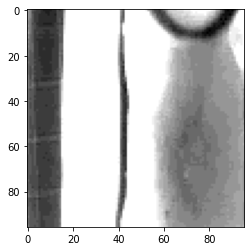

In [9]:
raw_bytes = np.array(HEXADECIMAL_BYTES)
image = np.reshape(raw_bytes,(96, 96)) #QCIF resolution

# Show the image
plt.imshow(image, cmap='gray')
plt.show()

In [10]:
HEXADECIMAL_BYTES = [
  0x203838, 0x203838, 0x203c38, 0x203c30, 0x203c38, 0x203c38, 0x203430, 0x203830, 0x283838, 0x283c38, 0x303838, 0x404438, 0xe0e490, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xe0f0f0, 0xd0e8f0, 0xb0c8d8, 0xa8bcc8, 0x98a8c8, 0x485480, 0x708060, 0xb0c4b8, 0xa8c4b8, 0xb0c8d0, 0x98b4c8, 0xa0b8b8, 0xa0b8c0, 0xa8c0c0, 0x98acc0, 0x88a4a8, 0x88a0b0, 0x708090, 0x607488, 0x485870, 0x384450, 0x383848, 0x302c38, 0x282428, 0x202028, 0x201c20, 0x201820, 0x281820, 0x281820, 0x382028, 0x402428, 0x402428, 0x402428, 0x402428, 0x482c30, 0x402828, 0x382028, 0x381c20, 0x382428, 0x302828, 0x282020, 0x201818, 0x201818, 0x201818, 0x201418, 0x181418, 0x181410, 0x181410, 0x181410, 0x181010, 0x101010, 0x281c18, 0x383828, 0x585c40, 0x586060, 0x687070, 0x687478, 0x687078, 0x687078, 0x606878, 0x606468, 0x606868, 0x606868, 0x203c38, 0x203838, 0x203838, 0x283c38, 0x203c38, 0x203c38, 0x203830, 0x203c30, 0x283c30, 0x283c38, 0x283840, 0x404438, 0xe0e490, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd8f0f0, 0xd0e8f0, 0xb8ccd0, 0xa8c0c8, 0x98acc0, 0x485480, 0x687060, 0x98a8b0, 0x98acb0, 0xa0b4b8, 0x98acb8, 0xa0b0b0, 0xa0b0b8, 0xa8c4c8, 0x98b0c0, 0x88a0a8, 0x8898a0, 0x789098, 0x708490, 0x586870, 0x485468, 0x403c58, 0x302840, 0x281c30, 0x302428, 0x302420, 0x382820, 0x402828, 0x402830, 0x503830, 0x503c38, 0x583838, 0x583838, 0x583838, 0x583838, 0x583438, 0x503430, 0x482c30, 0x301828, 0x301820, 0x281420, 0x201818, 0x201818, 0x201418, 0x181418, 0x181418, 0x181410, 0x181010, 0x181010, 0x201410, 0x281c18, 0x302820, 0x403830, 0x484c40, 0x586460, 0x687468, 0x687478, 0x687478, 0x687478, 0x606878, 0x606868, 0x606870, 0x606868, 0x283838, 0x203838, 0x203838, 0x203c30, 0x203c38, 0x203838, 0x203830, 0x203830, 0x283c38, 0x283c38, 0x283840, 0x404438, 0xe0e088, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0e4e8, 0xc8d8e0, 0xb0c4d8, 0xa8bcc8, 0x98acc0, 0x506480, 0x708068, 0xa0acb0, 0x90a0a0, 0x98a4a8, 0x90a0b0, 0xa0a8b0, 0x98a8b0, 0xa8bcb8, 0xa0b8d0, 0x88a0a8, 0x8090a0, 0x7888a0, 0x688090, 0x586c80, 0x505c70, 0x404058, 0x383848, 0x302838, 0x382830, 0x402c30, 0x483030, 0x503840, 0x583c38, 0x684c40, 0x684c48, 0x684c48, 0x684c48, 0x684848, 0x684848, 0x684048, 0x684448, 0x604448, 0x503438, 0x402830, 0x381c28, 0x281418, 0x201410, 0x201410, 0x181418, 0x181418, 0x181418, 0x181010, 0x181010, 0x181418, 0x302420, 0x383420, 0x403828, 0x505038, 0x586058, 0x707870, 0x687478, 0x687478, 0x687078, 0x606c78, 0x606c70, 0x606c70, 0x686c70, 0x203c38, 0x203838, 0x203838, 0x203c30, 0x203c38, 0x203838, 0x203830, 0x203830, 0x283c30, 0x283c38, 0x283840, 0x404c38, 0xd0d888, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0d4e8, 0xc0d4d8, 0xb8ccd8, 0xa8bcc8, 0x98b0c0, 0x587478, 0x809078, 0x98a8b8, 0x98a4a8, 0xa0acb0, 0x98a8b0, 0x98acb0, 0x98a8b8, 0x98b0b8, 0x98b4c0, 0x88a0a8, 0x809ca0, 0x809098, 0x708490, 0x607080, 0x505c70, 0x505458, 0x505048, 0x403448, 0x483838, 0x503838, 0x604038, 0x704c48, 0x684448, 0x684848, 0x705050, 0x785450, 0x785050, 0x785050, 0x785050, 0x785048, 0x704c50, 0x705048, 0x684c48, 0x583c40, 0x482838, 0x381c28, 0x281020, 0x181018, 0x181018, 0x181418, 0x181418, 0x181410, 0x201c10, 0x282018, 0x302c28, 0x302c28, 0x383830, 0x404440, 0x485448, 0x788468, 0x687878, 0x687478, 0x607478, 0x606c78, 0x606c68, 0x686c68, 0x686c70, 0x203c38, 0x203838, 0x203830, 0x203830, 0x284038, 0x203838, 0x203838, 0x203838, 0x283c38, 0x283c38, 0x283840, 0x404838, 0xd0d888, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d4e8, 0xc0d0d8, 0xb8ccd8, 0xa8bcc8, 0x98acc0, 0x587078, 0x809480, 0xa0b0b8, 0x98a8b0, 0xa0aca8, 0xa0b0b0, 0x98acb0, 0x98a8b0, 0x90a4a8, 0x8898a8, 0x7888a0, 0x788c98, 0x788c98, 0x688098, 0x586c80, 0x485870, 0x484c58, 0x484448, 0x483848, 0x503c40, 0x604040, 0x684840, 0x785c58, 0x785858, 0x705050, 0x785050, 0x785050, 0x785450, 0x805c58, 0x805858, 0x785858, 0x785858, 0x705458, 0x684c50, 0x705048, 0x604850, 0x503840, 0x402430, 0x281818, 0x201410, 0x181010, 0x181010, 0x201818, 0x281c18, 0x282020, 0x302c20, 0x383428, 0x403c28, 0x484430, 0x484838, 0x707868, 0x687480, 0x607070, 0x687070, 0x606c78, 0x606c70, 0x686c70, 0x686c70, 0x283838, 0x203838, 0x203830, 0x203430, 0x284038, 0x203838, 0x203838, 0x283838, 0x283838, 0x283c38, 0x303c40, 0x404838, 0xd8dc90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d0e0, 0xc8d4d8, 0xb8c8d0, 0xa8b8c8, 0xa0b0b8, 0x506478, 0x809078, 0xa0b0b0, 0xa0acb0, 0xa0b0b0, 0xa0b4b8, 0x98acb8, 0x8090a8, 0x8090a0, 0x788498, 0x707c80, 0x687c80, 0x687c80, 0x687480, 0x586870, 0x505c68, 0x505058, 0x504448, 0x584040, 0x604440, 0x684448, 0x704848, 0x886450, 0x806058, 0x785858, 0x785050, 0x805450, 0x885c50, 0x885c58, 0x886058, 0x806058, 0x805c58, 0x785c50, 0x786050, 0x806050, 0x785458, 0x705048, 0x604040, 0x483030, 0x301c30, 0x181018, 0x201818, 0x282018, 0x282020, 0x282020, 0x302428, 0x302828, 0x302830, 0x382830, 0x302c30, 0x686850, 0x687870, 0x687470, 0x687470, 0x606c78, 0x606c70, 0x686c68, 0x687070, 0x283c38, 0x203838, 0x203830, 0x203830, 0x283c38, 0x203838, 0x203838, 0x283c38, 0x283c38, 0x283c38, 0x283438, 0x404838, 0xd8e098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d0e0, 0xd0e4e8, 0xc0d0d0, 0xa8b8c8, 0xa0acb8, 0x586080, 0x708070, 0xa0b4b0, 0xa0b8b8, 0x98acb8, 0xa8bcb0, 0x98a8b0, 0x788498, 0x788088, 0x687488, 0x606c78, 0x606c70, 0x606870, 0x586470, 0x585c70, 0x505460, 0x504450, 0x584048, 0x604040, 0x704c48, 0x704848, 0x704c48, 0x805c50, 0x805c58, 0x805c58, 0x805c58, 0x886058, 0x886058, 0x805c58, 0x885c58, 0x805c60, 0x805c58, 0x806058, 0x806058, 0x785858, 0x704c58, 0x704c50, 0x684850, 0x584448, 0x403440, 0x282028, 0x282018, 0x282020, 0x282020, 0x282020, 0x302420, 0x302420, 0x302420, 0x382820, 0x302820, 0x585440, 0x606868, 0x606c78, 0x607070, 0x606c70, 0x606c70, 0x687070, 0x687070, 0x283838, 0x283838, 0x283830, 0x203838, 0x284438, 0x203c38, 0x203838, 0x283830, 0x203830, 0x283830, 0x304040, 0x505440, 0xd8e098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d0d8, 0xd0e0e8, 0xb8c8d8, 0xa8bcc8, 0xa0acb8, 0x586488, 0x788470, 0xa8b8b8, 0xa0b8b8, 0xa0b0b8, 0x90a0b0, 0x8894a8, 0x707c90, 0x687880, 0x606878, 0x506070, 0x505c68, 0x506068, 0x606068, 0x605c60, 0x604c58, 0x604040, 0x684448, 0x704848, 0x704848, 0x704848, 0x784850, 0x805850, 0x805c58, 0x886058, 0x886858, 0x886460, 0x886060, 0x886060, 0x886060, 0x886060, 0x886460, 0x886460, 0x806058, 0x805c58, 0x805460, 0x805450, 0x785050, 0x684c48, 0x584040, 0x403038, 0x281c20, 0x201820, 0x282420, 0x282820, 0x282020, 0x282420, 0x282420, 0x302820, 0x302428, 0x403c38, 0x586058, 0x606c68, 0x687068, 0x606c70, 0x606c70, 0x607070, 0x687070, 0x283c38, 0x203838, 0x203838, 0x203430, 0x284038, 0x203c38, 0x203c38, 0x284438, 0x284838, 0x304c40, 0x304448, 0x505440, 0xe0e090, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0d4d8, 0xd0e4f0, 0xb8ccd0, 0xa8b8c8, 0x98a8c0, 0x586488, 0x788878, 0xb0c0b8, 0xa0b8b8, 0xa8bcb8, 0x889ca8, 0x788098, 0x687480, 0x687478, 0x687078, 0x586468, 0x505860, 0x484c58, 0x504c50, 0x605050, 0x604450, 0x604440, 0x684448, 0x704848, 0x704c50, 0x784c50, 0x805450, 0x805c50, 0x805c58, 0x806058, 0x886458, 0x886860, 0x886460, 0x906460, 0x906868, 0x886460, 0x886460, 0x886460, 0x886460, 0x886860, 0x805c68, 0x805c58, 0x785458, 0x704c50, 0x604848, 0x503c48, 0x403030, 0x281c28, 0x282020, 0x282020, 0x201c18, 0x282018, 0x281c18, 0x282020, 0x302418, 0x383020, 0x504840, 0x586060, 0x606c70, 0x606c70, 0x586468, 0x687070, 0x687070, 0x203838, 0x203830, 0x203838, 0x203838, 0x304840, 0x284840, 0x284440, 0x284440, 0x284840, 0x284840, 0x304048, 0x505440, 0xe0e498, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0ece8, 0xc8dcf0, 0xb8c4d8, 0xa8bcc8, 0xa0b4c0, 0x607090, 0x808c78, 0xa8c0c0, 0xa0b8c0, 0x98acb8, 0x8094a8, 0x788498, 0x687480, 0x607080, 0x606c80, 0x505c68, 0x505458, 0x504c58, 0x584c50, 0x684c50, 0x684448, 0x684048, 0x684440, 0x704840, 0x785048, 0x785450, 0x805458, 0x805858, 0x885c58, 0x886058, 0x886460, 0x906860, 0x906860, 0x986c68, 0x906868, 0x906860, 0x906860, 0x886860, 0x906860, 0x886460, 0x806060, 0x886058, 0x805c50, 0x785050, 0x705048, 0x684c48, 0x583c40, 0x402c38, 0x281c30, 0x201818, 0x201818, 0x201818, 0x201818, 0x282018, 0x281c20, 0x281c20, 0x383030, 0x505440, 0x606c58, 0x606868, 0x586468, 0x687070, 0x687070, 0x284840, 0x284440, 0x284040, 0x204038, 0x304c38, 0x284840, 0x284840, 0x284440, 0x284038, 0x284438, 0x283840, 0x484c40, 0xe0e8a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xb8ccd8, 0xa8bcc0, 0xa0b4b8, 0x607488, 0x809478, 0xb0c0c8, 0xa0b4b8, 0x8898a0, 0x708098, 0x788090, 0x707888, 0x687478, 0x606478, 0x484860, 0x484850, 0x585050, 0x605050, 0x685050, 0x684448, 0x704448, 0x704848, 0x785048, 0x785850, 0x805858, 0x805858, 0x805c58, 0x886058, 0x886460, 0x886460, 0x906860, 0x906868, 0x906868, 0x906860, 0x907068, 0x907068, 0x906c60, 0x906860, 0x886060, 0x886060, 0x886460, 0x806060, 0x785858, 0x785458, 0x684c48, 0x584048, 0x503840, 0x383038, 0x201818, 0x201c18, 0x201818, 0x201818, 0x282018, 0x282420, 0x302818, 0x382c20, 0x504838, 0x585c60, 0x606470, 0x586468, 0x686c68, 0x686c70, 0x284848, 0x284040, 0x203c38, 0x204038, 0x284438, 0x203c38, 0x203830, 0x203830, 0x203c30, 0x283c38, 0x283838, 0x485438, 0xe8e898, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xb8ccd8, 0xa8b8c8, 0xa0b0b8, 0x606888, 0x788470, 0x98acc8, 0x889cb8, 0x808c98, 0x687880, 0x687078, 0x606878, 0x586078, 0x505468, 0x504850, 0x584c50, 0x604c50, 0x684c50, 0x704850, 0x704850, 0x704848, 0x784c48, 0x785050, 0x805c50, 0x805c58, 0x805c58, 0x805c58, 0x886058, 0x906460, 0x906460, 0x906860, 0x986c68, 0x907068, 0x987068, 0x987068, 0x986c68, 0x906c68, 0x986868, 0x986868, 0x906868, 0x886460, 0x886458, 0x806458, 0x785458, 0x704c48, 0x684848, 0x584040, 0x483838, 0x282028, 0x181018, 0x201818, 0x201818, 0x202018, 0x282020, 0x282020, 0x282430, 0x484430, 0x586050, 0x606460, 0x586060, 0x606868, 0x606c68, 0x284040, 0x284040, 0x283c40, 0x284038, 0x284438, 0x284038, 0x283c38, 0x203830, 0x283c30, 0x283c38, 0x283840, 0x484c38, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xb8d0d8, 0xa8bcc8, 0xa0b0b8, 0x606c88, 0x808c78, 0x98acb8, 0x8088a0, 0x707c88, 0x707880, 0x687078, 0x586070, 0x505060, 0x484458, 0x584848, 0x604c48, 0x685050, 0x684c50, 0x704850, 0x704850, 0x704848, 0x704c50, 0x785050, 0x805c50, 0x806058, 0x886460, 0x886060, 0x886460, 0x906460, 0x906c68, 0x906c68, 0x907068, 0x987068, 0x987068, 0x907068, 0x906c68, 0x906c68, 0x986c68, 0x906868, 0x906868, 0x886860, 0x886460, 0x806458, 0x805c60, 0x785450, 0x704c50, 0x684848, 0x503c40, 0x403038, 0x281c20, 0x201810, 0x201c18, 0x202018, 0x202018, 0x282018, 0x302420, 0x383018, 0x585838, 0x606468, 0x606068, 0x606868, 0x686c68, 0x203c38, 0x203c38, 0x203838, 0x203430, 0x284030, 0x203c38, 0x283c38, 0x203838, 0x283c30, 0x283c38, 0x303c38, 0x505038, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0xc0d0d8, 0xa8bcc8, 0xa0acb8, 0x606c88, 0x788c80, 0x889cb8, 0x708098, 0x707880, 0x687480, 0x586470, 0x505468, 0x484850, 0x484448, 0x584848, 0x684c50, 0x705050, 0x705050, 0x784c50, 0x704850, 0x784c48, 0x785450, 0x805858, 0x805c50, 0x806058, 0x886458, 0x906858, 0x906c60, 0x906868, 0x986c68, 0x987068, 0x987068, 0x987068, 0x987070, 0x987068, 0x987068, 0x986c68, 0x986c68, 0x986c68, 0x906c68, 0x906860, 0x886860, 0x886860, 0x806058, 0x805858, 0x785050, 0x704848, 0x604448, 0x503c38, 0x281c28, 0x181018, 0x201818, 0x201818, 0x201c18, 0x201c20, 0x201820, 0x302428, 0x504830, 0x585c50, 0x606850, 0x607060, 0x606c70, 0x283c38, 0x283c38, 0x203838, 0x203838, 0x284038, 0x203c40, 0x203c38, 0x283838, 0x283c38, 0x283838, 0x303c38, 0x485038, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc0d0d8, 0xa8bcc8, 0xa0acb8, 0x607088, 0x809080, 0x8898a8, 0x708490, 0x687080, 0x586068, 0x484c60, 0x404050, 0x404050, 0x483c48, 0x584850, 0x684c50, 0x705050, 0x705050, 0x705050, 0x785450, 0x785050, 0x785450, 0x805858, 0x806058, 0x806058, 0x886058, 0x906460, 0x906868, 0x906c68, 0x986c68, 0x987068, 0x987068, 0x987070, 0x987470, 0x987470, 0x987470, 0x987470, 0x987470, 0x987070, 0x907068, 0x907068, 0x906c68, 0x886860, 0x886060, 0x806060, 0x785858, 0x785058, 0x684448, 0x503c40, 0x382838, 0x281c18, 0x201c18, 0x201818, 0x201c18, 0x281c18, 0x281c20, 0x382818, 0x402c20, 0x484438, 0x585c50, 0x687468, 0x606c70, 0x203c38, 0x203838, 0x203838, 0x203838, 0x284038, 0x203c40, 0x203c38, 0x283838, 0x283838, 0x283c38, 0x303c38, 0x505438, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0ecf0, 0xc0d0d8, 0xa8b8c8, 0xa0acb8, 0x586c90, 0x687878, 0x7890a0, 0x708088, 0x586478, 0x505868, 0x485058, 0x404448, 0x403840, 0x504040, 0x604848, 0x684c50, 0x704c50, 0x704c50, 0x784c50, 0x785050, 0x785050, 0x805450, 0x805c50, 0x886058, 0x906858, 0x906460, 0x906460, 0x906c60, 0x986c68, 0x986c68, 0x986c68, 0x987068, 0x987068, 0x987470, 0x987470, 0xa07870, 0xa07870, 0x987470, 0x986c68, 0x986c68, 0x986c68, 0x906868, 0x906868, 0x886460, 0x805860, 0x806050, 0x806060, 0x704c50, 0x604040, 0x503840, 0x282028, 0x181420, 0x201818, 0x201818, 0x201818, 0x201818, 0x281c20, 0x282028, 0x403c38, 0x505848, 0x586860, 0x505868, 0x203c38, 0x203838, 0x203838, 0x203830, 0x284030, 0x284038, 0x283c38, 0x203838, 0x283838, 0x283c38, 0x303838, 0x505438, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0d0d8, 0xa8b8c8, 0xa0acb8, 0x586090, 0x606c58, 0x687c90, 0x687478, 0x505470, 0x484860, 0x403c48, 0x403840, 0x403438, 0x584440, 0x684c48, 0x684c48, 0x704c50, 0x704c50, 0x704c50, 0x785048, 0x785450, 0x805850, 0x805c58, 0x806060, 0x886860, 0x906860, 0x906c68, 0x987068, 0x907068, 0x987468, 0x987470, 0x987870, 0xa07870, 0xa07c78, 0x987878, 0x987878, 0x987878, 0x987878, 0x987470, 0x987068, 0x987068, 0x906c70, 0x906c68, 0x886868, 0x806068, 0x806058, 0x805c60, 0x705050, 0x684850, 0x584048, 0x382c38, 0x201420, 0x201818, 0x201818, 0x201818, 0x201c18, 0x282018, 0x302820, 0x403428, 0x504c38, 0x484c48, 0x403c50, 0x203c38, 0x203838, 0x203838, 0x203838, 0x203c38, 0x284038, 0x283c38, 0x203838, 0x283c38, 0x283c38, 0x283838, 0x484c38, 0xf0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xb8ccd8, 0xa8bcc8, 0xa0b0b8, 0x606c98, 0x505c50, 0x607090, 0x586478, 0x484c60, 0x404050, 0x403c40, 0x403440, 0x504040, 0x684c48, 0x684848, 0x704848, 0x704c50, 0x704c50, 0x785450, 0x785450, 0x785450, 0x805c50, 0x805c58, 0x886060, 0x906460, 0x906860, 0x906868, 0x986c68, 0x987068, 0x987468, 0x987470, 0xa07470, 0xa07470, 0xa07878, 0xa07878, 0xa07478, 0xa07870, 0xa07870, 0xa07c70, 0xa07870, 0x987870, 0x987468, 0x907070, 0x907068, 0x886868, 0x806060, 0x805c60, 0x805c50, 0x705050, 0x604448, 0x483438, 0x281830, 0x201018, 0x201818, 0x201818, 0x201c18, 0x201c18, 0x282020, 0x302830, 0x383830, 0x403c40, 0x403c40, 0x203c38, 0x203838, 0x203838, 0x203430, 0x203830, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x283838, 0x485438, 0xf0f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xb8c8d8, 0xa8bcc8, 0xa0acb8, 0x687498, 0x384048, 0x606870, 0x505868, 0x404058, 0x383c50, 0x383448, 0x403838, 0x584848, 0x705048, 0x684c48, 0x704848, 0x704c50, 0x704c50, 0x785050, 0x785450, 0x785450, 0x805c58, 0x885c58, 0x886060, 0x906860, 0x906860, 0x906c68, 0x986c68, 0x987068, 0x987468, 0x987870, 0xa07870, 0xa07878, 0xa07878, 0xa07878, 0xa07c78, 0xa07878, 0xa07878, 0xa07c78, 0xa07c78, 0x987870, 0x987470, 0x987468, 0x906c68, 0x906868, 0x886468, 0x805c68, 0x785458, 0x705058, 0x604048, 0x503848, 0x382838, 0x201418, 0x201418, 0x201818, 0x201818, 0x201c18, 0x282420, 0x302820, 0x383420, 0x383428, 0x302c30, 0x203c38, 0x203838, 0x203838, 0x203838, 0x203838, 0x284038, 0x283c38, 0x203838, 0x283c38, 0x284038, 0x283838, 0x484c38, 0xf0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8c8d8, 0xa8bcc8, 0xa0acb8, 0x687498, 0x384050, 0x586870, 0x485460, 0x383c48, 0x383840, 0x383438, 0x503838, 0x604440, 0x684848, 0x704848, 0x704c48, 0x704c50, 0x704c50, 0x785050, 0x785450, 0x805450, 0x805c50, 0x885c58, 0x886460, 0x906460, 0x906860, 0x906868, 0x986c68, 0x987068, 0x987070, 0xa07870, 0xa07c70, 0xa07878, 0xa07878, 0xa87c78, 0xa87c78, 0xa07c78, 0xa07c78, 0xa07c78, 0xa07870, 0xa07870, 0x987870, 0xa07870, 0x986c68, 0x906c68, 0x906468, 0x906060, 0x805858, 0x785858, 0x705050, 0x684848, 0x483440, 0x281828, 0x201418, 0x201818, 0x201818, 0x181818, 0x282020, 0x282020, 0x302c28, 0x302828, 0x282428, 0x203c38, 0x203838, 0x203838, 0x203838, 0x203838, 0x284038, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x303840, 0x505438, 0xe8f098, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xb8c8e0, 0xb0bcc8, 0x98acb8, 0x6874a0, 0x303450, 0x505858, 0x404c60, 0x383448, 0x303040, 0x383038, 0x503c38, 0x604c40, 0x684c48, 0x705048, 0x704850, 0x704c50, 0x705050, 0x785050, 0x785450, 0x805450, 0x805c50, 0x886060, 0x886460, 0x906860, 0x906460, 0x906468, 0x986c70, 0x987070, 0x987470, 0x987470, 0xa07c78, 0xa07878, 0xa07878, 0xa07c78, 0xa07c78, 0xa07c78, 0xa07c78, 0xa08078, 0xa08078, 0xa07c78, 0x987878, 0x987870, 0x987070, 0x906c68, 0x886468, 0x906468, 0x886460, 0x785c60, 0x704c50, 0x604848, 0x483848, 0x302430, 0x201818, 0x181418, 0x201818, 0x201418, 0x281c18, 0x302820, 0x302c20, 0x302828, 0x302c28, 0x203c38, 0x203838, 0x203830, 0x283838, 0x283838, 0x284030, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x303840, 0x484838, 0xd8dc90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0d0d8, 0xa8b8c8, 0x98a8b8, 0x707898, 0x303060, 0x404048, 0x404448, 0x383848, 0x383438, 0x382c38, 0x584440, 0x684848, 0x704848, 0x704848, 0x704848, 0x704c50, 0x784c50, 0x785050, 0x785050, 0x805450, 0x805c50, 0x886060, 0x906460, 0x906860, 0x987068, 0x987070, 0x987070, 0xa07070, 0x987070, 0xa07470, 0xa07c78, 0xa07c70, 0xa07c78, 0xa88078, 0xa87c78, 0xa88078, 0xa88078, 0xa88080, 0xa08078, 0xa07c78, 0xa07870, 0xa07870, 0x987070, 0x986c70, 0x906868, 0x906860, 0x886060, 0x805860, 0x704c50, 0x684848, 0x583c40, 0x382430, 0x181020, 0x201418, 0x201418, 0x181418, 0x201818, 0x282020, 0x282820, 0x282428, 0x282828, 0x203c38, 0x203838, 0x203830, 0x283430, 0x283438, 0x284038, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x303840, 0x484c38, 0xd8dc90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0ccd8, 0xb0bcd0, 0x98a4b8, 0x6874a0, 0x303468, 0x404040, 0x303448, 0x282c40, 0x303030, 0x403430, 0x604848, 0x704c48, 0x704848, 0x704848, 0x704c48, 0x704c48, 0x704c50, 0x785050, 0x805450, 0x805850, 0x805c50, 0x886058, 0x886460, 0x906860, 0x906c68, 0x986c68, 0x987470, 0x987470, 0xa07870, 0xa07870, 0xa07c70, 0xa08078, 0xa88078, 0xa88078, 0xa88080, 0xa07c80, 0xa07c80, 0xa07c80, 0xa08080, 0xa07c78, 0xa07c80, 0x987c80, 0x987478, 0x906c70, 0x987470, 0x907068, 0x886868, 0x805c60, 0x785460, 0x704c50, 0x584048, 0x483440, 0x281830, 0x201410, 0x201418, 0x201418, 0x201818, 0x282418, 0x282420, 0x282828, 0x282820, 0x283c38, 0x203838, 0x283830, 0x283830, 0x283838, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x303840, 0x505438, 0xe0e498, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0d0d8, 0xb0bcd0, 0x98a4b8, 0x687898, 0x303c68, 0x383c40, 0x303c48, 0x303038, 0x302c28, 0x503430, 0x684440, 0x704848, 0x704848, 0x704c48, 0x704c48, 0x704c48, 0x704c48, 0x785050, 0x785450, 0x805850, 0x805850, 0x886058, 0x906458, 0x906860, 0x986c60, 0x987068, 0xa07c68, 0xa07c70, 0xa08078, 0xa07c78, 0xa07c78, 0xa07c78, 0xa88078, 0xa88080, 0xa88080, 0xa88480, 0xa88480, 0xa88880, 0xa88880, 0xa08080, 0xa07c80, 0xa08080, 0xa08080, 0xa07878, 0xa07478, 0x906c70, 0x886868, 0x805c58, 0x785458, 0x785450, 0x684850, 0x503840, 0x301830, 0x201018, 0x201418, 0x201418, 0x201818, 0x201c20, 0x202420, 0x282820, 0x282820, 0x283c38, 0x203838, 0x283838, 0x203830, 0x203830, 0x284038, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x303c40, 0x485038, 0xe0e498, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0d4d8, 0xb0c0d0, 0x98a8b8, 0x687498, 0x384068, 0x303438, 0x282c38, 0x302c30, 0x302030, 0x503830, 0x704c40, 0x705048, 0x704c48, 0x704c48, 0x705048, 0x705048, 0x704c48, 0x785050, 0x785450, 0x805850, 0x805c50, 0x886458, 0x906858, 0x906c60, 0x986c68, 0x986c68, 0xa07470, 0xa07c70, 0xa07c70, 0xa07c78, 0xa07c78, 0xa08078, 0xa88080, 0xa88480, 0xa88488, 0xa88c88, 0xa88888, 0xa88880, 0xa88488, 0xa08480, 0xa08480, 0xa08080, 0xa08080, 0xa07c80, 0x987878, 0x906c70, 0x886c68, 0x806068, 0x785460, 0x785858, 0x684c58, 0x503848, 0x382440, 0x281820, 0x201410, 0x201418, 0x201818, 0x201c18, 0x201c18, 0x282018, 0x281c18, 0x283c38, 0x203838, 0x203838, 0x203830, 0x203830, 0x284038, 0x284038, 0x283c38, 0x283c38, 0x283c38, 0x303c40, 0x505438, 0xe0e498, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d0e0, 0xb0c0d0, 0x98a8c0, 0x687098, 0x384068, 0x303040, 0x282c38, 0x302828, 0x402c28, 0x604438, 0x704848, 0x704c48, 0x704c48, 0x705048, 0x705048, 0x705048, 0x704c48, 0x785450, 0x785450, 0x805c50, 0x886058, 0x886460, 0x906860, 0x906860, 0x986c68, 0x986c68, 0xa07870, 0xa07c78, 0xa07c78, 0xa07c78, 0xa88078, 0xa88080, 0xa88080, 0xa88480, 0xa88480, 0xb08888, 0xa88888, 0xa88888, 0xa88888, 0xa88888, 0xa88888, 0xa88480, 0xa08080, 0xa07878, 0xa07870, 0x987070, 0x907068, 0x906c60, 0x805c68, 0x785458, 0x705050, 0x604048, 0x402c38, 0x281428, 0x181018, 0x201418, 0x181818, 0x201c18, 0x201c18, 0x201c20, 0x201c18, 0x283838, 0x203838, 0x203838, 0x203838, 0x203830, 0x284038, 0x284038, 0x283c38, 0x283c38, 0x304038, 0x303c40, 0x485040, 0xe0e898, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0d8e0, 0xb0c0d0, 0xa0acc0, 0x687090, 0x404068, 0x303040, 0x302c30, 0x282430, 0x403030, 0x684c40, 0x684840, 0x704c48, 0x704c48, 0x784c48, 0x704c48, 0x705048, 0x704c50, 0x785458, 0x785450, 0x886058, 0x806060, 0x886460, 0x906860, 0x986c68, 0x986c68, 0x987070, 0xa07470, 0xa07c78, 0xa07c78, 0xa07c78, 0xa88078, 0xa88080, 0xa88480, 0xa88880, 0xa88888, 0xa88c88, 0xa88c90, 0xa88c90, 0xb09090, 0xa88c90, 0xa08888, 0xa88888, 0xa08880, 0xa08080, 0xa07c78, 0x987478, 0x907070, 0x886868, 0x886870, 0x805c58, 0x704c58, 0x604050, 0x483040, 0x302030, 0x201010, 0x181418, 0x201418, 0x201818, 0x201c18, 0x201c18, 0x201818, 0x283838, 0x203838, 0x203838, 0x203830, 0x203830, 0x284038, 0x284038, 0x283838, 0x283c38, 0x304040, 0x303c40, 0x505838, 0xe0e898, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8d8e0, 0xa8bcd0, 0xa0acc0, 0x606898, 0x383c60, 0x282c40, 0x282c30, 0x302830, 0x503830, 0x684848, 0x704848, 0x704848, 0x704c48, 0x704c48, 0x704c48, 0x704c48, 0x704c50, 0x785458, 0x805450, 0x886050, 0x886060, 0x886458, 0x906860, 0x987060, 0x987068, 0x987070, 0xa07470, 0xa07c78, 0xa07c78, 0xa07c78, 0xa88478, 0xa88480, 0xa88480, 0xa88880, 0xb08888, 0xb08c88, 0xb08c88, 0xb08c90, 0xb09090, 0xb09090, 0xb09090, 0xa88888, 0xa08480, 0xa08080, 0xa07c78, 0x987480, 0x986c78, 0x906868, 0x886468, 0x805858, 0x784c58, 0x684850, 0x583c40, 0x382430, 0x181020, 0x181410, 0x181418, 0x181818, 0x181818, 0x181818, 0x181818, 0x283838, 0x203838, 0x203838, 0x203838, 0x283838, 0x283c38, 0x284038, 0x283c38, 0x283c38, 0x303c38, 0x303840, 0x505c40, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc0d8e8, 0xb0c0d0, 0x98a8c0, 0x606c98, 0x383c58, 0x282c40, 0x302c30, 0x281c30, 0x583c38, 0x684840, 0x704848, 0x704c48, 0x704c48, 0x704c48, 0x704c48, 0x704c48, 0x704c48, 0x785458, 0x785850, 0x886458, 0x886458, 0x906860, 0x906860, 0x906c60, 0x987068, 0x987070, 0xa07470, 0xa07878, 0xa07c78, 0xa88078, 0xa88478, 0xa88880, 0xa88880, 0xa88888, 0xa88c88, 0xb08c88, 0xb09088, 0xb09090, 0xb09090, 0xa89490, 0xa89490, 0xa89090, 0xa08488, 0xa08088, 0xa08080, 0x987480, 0x987480, 0x906c70, 0x886870, 0x805c60, 0x785458, 0x684450, 0x503c40, 0x382c38, 0x201820, 0x181410, 0x181418, 0x181410, 0x181818, 0x201818, 0x201418, 0x203c38, 0x203838, 0x203838, 0x203838, 0x283838, 0x283c38, 0x284038, 0x283c38, 0x283c38, 0x304038, 0x303838, 0x505c40, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8d8e8, 0xb0c0d0, 0x98a8c0, 0x606898, 0x383c58, 0x282c40, 0x302830, 0x382c30, 0x604038, 0x704448, 0x704848, 0x704c48, 0x704c48, 0x704c48, 0x704c48, 0x784c48, 0x704c48, 0x805458, 0x805450, 0x886058, 0x886458, 0x906860, 0x906860, 0x906c60, 0x987468, 0x987070, 0xa07470, 0xa07c70, 0xa87c78, 0xa88078, 0xa88478, 0xa88880, 0xb08880, 0xa88888, 0xb08c88, 0xb09088, 0xb09090, 0xb09090, 0xb09090, 0xb09490, 0xb09490, 0xa89090, 0xa88c88, 0xa88888, 0xa88480, 0x987480, 0x987478, 0x907070, 0x906c68, 0x886460, 0x785460, 0x684450, 0x583c40, 0x402c38, 0x281820, 0x181010, 0x181418, 0x181418, 0x181810, 0x181810, 0x181410, 0x203c38, 0x203c38, 0x203838, 0x203838, 0x283838, 0x283c38, 0x283c40, 0x283c38, 0x283c38, 0x303c38, 0x303840, 0x585c40, 0xe8f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d4e8, 0xb0c4d0, 0x98a8c0, 0x606890, 0x383c58, 0x282c40, 0x302430, 0x402c30, 0x604840, 0x704848, 0x704848, 0x784c48, 0x704c48, 0x704c48, 0x704c48, 0x784c48, 0x785048, 0x805450, 0x805850, 0x885c58, 0x886458, 0x886458, 0x906860, 0x986c68, 0x987468, 0x987870, 0x987470, 0xa07870, 0xa87c78, 0xa08078, 0xa88478, 0xa88880, 0xb08888, 0xb08c88, 0xb09488, 0xb09490, 0xb09498, 0xb09098, 0xb09498, 0xb09498, 0xb09498, 0xa89098, 0xa88c90, 0xa88c90, 0xa88488, 0xa07880, 0x987878, 0x906c70, 0x886870, 0x806068, 0x805860, 0x704858, 0x604448, 0x483438, 0x302030, 0x201818, 0x181410, 0x181410, 0x181410, 0x181410, 0x181810, 0x283c38, 0x203838, 0x203838, 0x203838, 0x283838, 0x283c38, 0x284040, 0x284038, 0x284038, 0x304038, 0x384038, 0x485440, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d4e8, 0xb8c8d0, 0x98a4c0, 0x586490, 0x383c58, 0x302840, 0x302430, 0x483030, 0x604040, 0x704848, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785050, 0x785050, 0x805850, 0x805850, 0x886058, 0x886458, 0x906458, 0x986c60, 0x987068, 0x987468, 0xa07870, 0xa07870, 0xa07c70, 0xa07c78, 0xa88478, 0xa88478, 0xa88880, 0xb08c88, 0xb08c88, 0xb09488, 0xb09490, 0xb89890, 0xb89c98, 0xb89898, 0xb09898, 0xb09498, 0xb09498, 0xb09090, 0xb08c90, 0xa88888, 0xa07c88, 0xa07c78, 0x906878, 0x906c70, 0x886468, 0x886060, 0x705058, 0x684450, 0x503440, 0x382430, 0x201420, 0x181410, 0x181410, 0x181410, 0x181410, 0x181410, 0x203c38, 0x203c38, 0x203c38, 0x203838, 0x203838, 0x203838, 0x203c40, 0x203438, 0x203830, 0x304038, 0x384038, 0x485440, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d4e8, 0xb8c8d0, 0x98a8c8, 0x606890, 0x383850, 0x282840, 0x282030, 0x483430, 0x684040, 0x704848, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x805450, 0x805858, 0x886058, 0x886458, 0x906860, 0x906c60, 0x986c68, 0x987468, 0xa07870, 0xa07878, 0xa07c70, 0xa07c78, 0xa88078, 0xa88880, 0xa88880, 0xb08c88, 0xb09088, 0xb09090, 0xb09098, 0xb09898, 0xb898a0, 0xb898a0, 0xb09ca0, 0xb098a0, 0xb094a0, 0xb09098, 0xa89098, 0xa88c90, 0xa08088, 0xa08080, 0x987480, 0x906c70, 0x886468, 0x805c60, 0x705058, 0x684848, 0x483440, 0x382430, 0x201420, 0x181010, 0x181010, 0x181010, 0x181410, 0x181410, 0x283c40, 0x283c38, 0x203838, 0x203830, 0x203430, 0x203830, 0x284840, 0x305040, 0x305448, 0x305048, 0x384c40, 0x506050, 0xe8f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d0e8, 0xb8c4d8, 0x98a8c0, 0x586490, 0x303850, 0x282838, 0x302430, 0x503830, 0x684448, 0x704848, 0x704c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x805450, 0x805858, 0x886058, 0x906858, 0x906860, 0x906c60, 0x986c68, 0xa07070, 0xa07470, 0xa07878, 0xa07870, 0xa87c78, 0xa88078, 0xb08880, 0xa88880, 0xb08c88, 0xb09088, 0xb09490, 0xb89898, 0xb89898, 0xb89898, 0xb898a0, 0xb89ca0, 0xb8a0a0, 0xb098a0, 0xb090a0, 0xb09098, 0xa88890, 0xa08490, 0xa88080, 0x987480, 0x987478, 0x886868, 0x806460, 0x705058, 0x684850, 0x503440, 0x382430, 0x281820, 0x181018, 0x181010, 0x101010, 0x181410, 0x181010, 0x203c40, 0x203c40, 0x204038, 0x284438, 0x284840, 0x284840, 0x305448, 0x305448, 0x305048, 0x304c48, 0x384840, 0x506050, 0xe8f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8d8f0, 0xb8c4d0, 0x98acc8, 0x606898, 0x303450, 0x282840, 0x302438, 0x503c38, 0x684448, 0x784c48, 0x704c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x785048, 0x805448, 0x805850, 0x886058, 0x906858, 0x906860, 0x906860, 0x986c68, 0xa07070, 0xa07470, 0xa07478, 0xa07c78, 0xa88078, 0xa88080, 0xa88880, 0xa88480, 0xb08c88, 0xb08c88, 0xb09090, 0xb09898, 0xb89ca0, 0xb89ca0, 0xb89ca0, 0xb8a0a0, 0xb89ca0, 0xb8a0a0, 0xb098a0, 0xb098a0, 0xa88c98, 0xa88490, 0xa08080, 0x987880, 0x907070, 0x906c68, 0x886060, 0x785458, 0x684850, 0x503440, 0x402830, 0x281c28, 0x181418, 0x101010, 0x181010, 0x181010, 0x181010, 0x284040, 0x284840, 0x284840, 0x284840, 0x284840, 0x204438, 0x284840, 0x204040, 0x204038, 0x284038, 0x303c40, 0x506048, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8d8f0, 0xb8c4d8, 0xa0acc8, 0x606890, 0x303458, 0x302c40, 0x302838, 0x583838, 0x684448, 0x785040, 0x704c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x785448, 0x805850, 0x885c58, 0x906458, 0x906860, 0x986c60, 0x987068, 0x987070, 0xa07470, 0xa07870, 0xa87c78, 0xa88078, 0xa88080, 0xa88880, 0xb08880, 0xb08c88, 0xb09088, 0xb09490, 0xb89c98, 0xb89c98, 0xb89ca0, 0xb8a0a0, 0xb8a0a0, 0xb8a0a0, 0xb89ca8, 0xb098a0, 0xb09898, 0xb09098, 0xa88890, 0xa08080, 0x987480, 0x987070, 0x906870, 0x886060, 0x805460, 0x704848, 0x583840, 0x402430, 0x301c28, 0x181018, 0x181010, 0x181010, 0x181010, 0x181010, 0x284848, 0x284840, 0x284840, 0x284040, 0x203838, 0x203838, 0x284440, 0x284440, 0x284038, 0x304040, 0x283838, 0x585c40, 0xe0e8a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8d8f0, 0xb0c8d8, 0x98acc8, 0x606c98, 0x383858, 0x302840, 0x382438, 0x583840, 0x684848, 0x705040, 0x705048, 0x705048, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x785048, 0x785448, 0x805850, 0x886058, 0x886458, 0x906860, 0x986c60, 0x987068, 0x987068, 0xa07470, 0xa07870, 0xa87c78, 0xa88078, 0xa88080, 0xa88880, 0xb08c80, 0xb08c88, 0xb09090, 0xb89490, 0xb89c98, 0xb89ca0, 0xb8a0a0, 0xb8a0a8, 0xb8a4a8, 0xb8a4a8, 0xb8a4a8, 0xb098a0, 0xb09898, 0xa89098, 0xa88c90, 0xa08488, 0xa07c88, 0x987878, 0x907070, 0x886468, 0x805860, 0x704850, 0x583c40, 0x402c30, 0x301c20, 0x201418, 0x181010, 0x181010, 0x181010, 0x181010, 0x284448, 0x203c40, 0x203838, 0x203838, 0x283c38, 0x203c40, 0x284840, 0x284040, 0x284038, 0x284040, 0x303c40, 0x505840, 0xd8e4a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8d8f0, 0xb8ccd8, 0xa0b4c8, 0x606c98, 0x383458, 0x302840, 0x382838, 0x583c38, 0x684448, 0x785048, 0x785048, 0x785048, 0x785048, 0x784c48, 0x784c48, 0x785048, 0x784c48, 0x785050, 0x885c50, 0x886058, 0x886458, 0x906860, 0x986c60, 0x987068, 0x987068, 0xa07470, 0xa07870, 0xa07c78, 0xa88078, 0xa88078, 0xa88880, 0xb08880, 0xb08c88, 0xb09090, 0xb89890, 0xb89c98, 0xb89ca0, 0xb8a0a0, 0xb8a0a8, 0xc0a4a8, 0xb8a4a8, 0xb8a4a8, 0xb8a0a0, 0xb89ca0, 0xb09498, 0xa88c90, 0xa88888, 0xa08488, 0x987878, 0x907070, 0x886468, 0x805860, 0x704c50, 0x604040, 0x483038, 0x301c28, 0x201418, 0x181018, 0x101010, 0x101010, 0x181010, 0x203c40, 0x283c40, 0x283c38, 0x283c38, 0x283c38, 0x203c38, 0x284438, 0x284438, 0x284038, 0x284040, 0x304040, 0x505440, 0xd0d898, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8d8f0, 0xb8cce0, 0xa0b8d0, 0x687ca0, 0x383c58, 0x302848, 0x382838, 0x583c40, 0x684848, 0x704c48, 0x785050, 0x785050, 0x785450, 0x785048, 0x784c48, 0x785048, 0x785450, 0x785050, 0x885c50, 0x885c50, 0x886458, 0x906860, 0x986c60, 0x986c68, 0x987068, 0xa07470, 0xa07870, 0xa87c78, 0xa87c78, 0xa88480, 0xa88880, 0xb08888, 0xb08c88, 0xb09090, 0xb89890, 0xb89c98, 0xb89ca0, 0xb8a0a0, 0xb8a0a8, 0xb8a4a8, 0xb8a4a8, 0xb8a4a8, 0xb0a0a8, 0xb8a0a8, 0xb09ca0, 0xa88c98, 0xa08488, 0xa08088, 0x987878, 0x907070, 0x886470, 0x806060, 0x705458, 0x584048, 0x483038, 0x302028, 0x201818, 0x181010, 0x101010, 0x101010, 0x181010, 0x284038, 0x283c38, 0x283c38, 0x283c38, 0x283838, 0x203c38, 0x284438, 0x284440, 0x284038, 0x284040, 0x304038, 0x485440, 0xd0dca0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0d8f0, 0xc0cce0, 0xb0c0c8, 0x6878a0, 0x383458, 0x302848, 0x382c38, 0x583c40, 0x684840, 0x704c48, 0x785050, 0x784c50, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785448, 0x785050, 0x805c50, 0x886458, 0x886858, 0x906860, 0x906c60, 0x987068, 0x987068, 0xa07470, 0xa07870, 0xa87c70, 0xa87c78, 0xa87c80, 0xb08480, 0xb08888, 0xb09088, 0xb09090, 0xb89898, 0xb89c98, 0xb8a0a0, 0xb8a0a0, 0xc0a0a8, 0xb8a4a8, 0xc0a4a8, 0xc0a4b0, 0xb8a0a8, 0xb89ca0, 0xb89ca0, 0xb09498, 0xa08488, 0xa88888, 0x987c80, 0x987470, 0x906870, 0x886060, 0x785058, 0x603c48, 0x483038, 0x302028, 0x201420, 0x181010, 0x181010, 0x101010, 0x181010, 0x283c38, 0x283c38, 0x283c38, 0x203c38, 0x203838, 0x203c38, 0x284438, 0x284440, 0x284040, 0x284040, 0x304038, 0x485440, 0xd0dc98, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8dcf0, 0xb8cce0, 0xa8bcd0, 0x6878a0, 0x303458, 0x302c48, 0x403038, 0x604040, 0x684840, 0x704c48, 0x785050, 0x784c50, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x785448, 0x805850, 0x886458, 0x886458, 0x886460, 0x986c60, 0x987068, 0x987068, 0xa07470, 0xa07870, 0xa87c78, 0xa87c78, 0xa88080, 0xa88480, 0xb08888, 0xb09088, 0xb89490, 0xb09890, 0xb89c98, 0xb8a0a0, 0xb8a0a0, 0xc0a0a8, 0xc0a4a8, 0xc0a8b0, 0xc0a8b0, 0xc0a4b0, 0xb8a0a8, 0xb09ca0, 0xb094a0, 0xa88c90, 0xa88c88, 0x987c80, 0x907078, 0x886c78, 0x886468, 0x785058, 0x603c48, 0x503038, 0x302028, 0x201420, 0x181010, 0x181010, 0x181010, 0x181010, 0x283c40, 0x283c38, 0x283c38, 0x283c38, 0x283838, 0x203c38, 0x284438, 0x284440, 0x284040, 0x283c40, 0x304040, 0x485440, 0xd8dc98, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0dcf0, 0xc0d0e0, 0xb0bcc8, 0x707ca0, 0x303860, 0x383048, 0x403038, 0x584040, 0x704840, 0x704c48, 0x785050, 0x784c50, 0x784c50, 0x805048, 0x785050, 0x784c48, 0x785048, 0x785448, 0x805850, 0x806058, 0x886450, 0x886460, 0x906c60, 0x987468, 0x987068, 0xa07470, 0xa07870, 0xa87c70, 0xa88078, 0xa88080, 0xb08480, 0xb08888, 0xa88888, 0xb09090, 0xb09490, 0xb89c98, 0xb8a0a0, 0xb8a0a0, 0xc0a4a8, 0xc0a4a8, 0xc0a8b0, 0xc0a8b0, 0xc0a4b0, 0xb89ca8, 0xb09ca0, 0xb09898, 0xa88890, 0xa88888, 0xa07880, 0x987478, 0x906c70, 0x886468, 0x785058, 0x603c50, 0x503038, 0x382028, 0x281820, 0x181018, 0x181010, 0x181010, 0x181010, 0x283c40, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x284030, 0x284440, 0x284440, 0x284038, 0x384840, 0x505838, 0xd0d890, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e0f0, 0xc0d8e0, 0xb0c8d8, 0x7884b0, 0x384060, 0x303040, 0x403438, 0x584040, 0x704840, 0x784c48, 0x785048, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x785450, 0x805850, 0x805c58, 0x886458, 0x886460, 0x906868, 0x987060, 0x987068, 0xa07470, 0xa07870, 0xa87c70, 0xa88078, 0xa88080, 0xb08880, 0xb08880, 0xb08888, 0xb09090, 0xb09490, 0xb09c98, 0xb09c98, 0xb8a4a0, 0xc0a4a8, 0xc0a4b0, 0xc0a8b0, 0xc0a8b0, 0xc0a4b0, 0xb8a0a8, 0xb09ca0, 0xb09898, 0xa88c98, 0xa88888, 0x987888, 0x987478, 0x906c70, 0x906868, 0x785060, 0x684050, 0x503438, 0x382028, 0x281c20, 0x181018, 0x181010, 0x181010, 0x181010, 0x283c40, 0x283c38, 0x283c38, 0x283c38, 0x283838, 0x283838, 0x283c38, 0x284838, 0x284040, 0x284040, 0x304038, 0x404c40, 0xd0d890, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e4f0, 0xc8d4e0, 0xb8c8d0, 0x8088b0, 0x383c68, 0x303040, 0x403038, 0x584038, 0x704840, 0x784c48, 0x785048, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785450, 0x805450, 0x805850, 0x886060, 0x906858, 0x906460, 0x987060, 0x987068, 0x987870, 0xa07c70, 0xa87c78, 0xa88078, 0xa88480, 0xb08880, 0xb08880, 0xb08888, 0xb09090, 0xb09490, 0xb89898, 0xb89ca0, 0xc0a4a0, 0xc0a4a8, 0xc0a4b0, 0xc0a8b0, 0xc0a8b0, 0xb8a4b0, 0xb8a0a8, 0xb09ca0, 0xb09898, 0xa88c98, 0xa88490, 0xa08080, 0x987878, 0x907070, 0x886868, 0x785458, 0x684050, 0x503438, 0x382028, 0x281c20, 0x181018, 0x181010, 0x181010, 0x201010, 0x283c40, 0x283c40, 0x283c40, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x284840, 0x284840, 0x304840, 0x304040, 0x404838, 0xc0c080, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e4f0, 0xc0d8e0, 0xb0c4d8, 0x7888b8, 0x404468, 0x302c40, 0x403438, 0x584040, 0x704840, 0x784c48, 0x784c48, 0x805048, 0x805048, 0x784c48, 0x784c48, 0x784c48, 0x785050, 0x805848, 0x805858, 0x805850, 0x886060, 0x906458, 0x906460, 0x987060, 0x987068, 0xa07868, 0xa07870, 0xa87c78, 0xa87c78, 0xa88078, 0xa88880, 0xb08880, 0xb08c88, 0xb08c90, 0xb09498, 0xb89898, 0xb09898, 0xb8a4a0, 0xc0a8a8, 0xc0a8b0, 0xc0a8b0, 0xc0a8b0, 0xb8a4b0, 0xb8a0a8, 0xb09ca0, 0xb09898, 0xa89098, 0xa88490, 0xa08088, 0x987c78, 0x906c70, 0x886468, 0x785458, 0x684450, 0x503438, 0x382028, 0x281c20, 0x181018, 0x181010, 0x181010, 0x201010, 0x283c40, 0x283c40, 0x283c40, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x304838, 0x284840, 0x284440, 0x304040, 0x384040, 0xc0c488, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0xc0d8e0, 0xb8c8d0, 0x8090b0, 0x404868, 0x302840, 0x403438, 0x583c40, 0x684840, 0x785048, 0x785048, 0x785048, 0x785048, 0x785048, 0x785050, 0x785050, 0x785048, 0x785450, 0x805850, 0x805c50, 0x886060, 0x906458, 0x906860, 0x986c60, 0x986c68, 0x987068, 0x987468, 0xa07c70, 0xa87c78, 0xa88478, 0xa88480, 0xa88880, 0xb08c88, 0xb08c88, 0xb89490, 0xb89898, 0xb898a0, 0xc0a4a0, 0xc0a8a8, 0xc0a8b0, 0xc0a8b0, 0xc0a8b0, 0xb8a4a8, 0xb8a0a8, 0xb89ca0, 0xb09898, 0xb09098, 0xa88890, 0xa08088, 0x987878, 0x907070, 0x886868, 0x785460, 0x684448, 0x503438, 0x382028, 0x301820, 0x201018, 0x181010, 0x181010, 0x201010, 0x283c38, 0x283c40, 0x283c40, 0x283c38, 0x283838, 0x283c38, 0x283c38, 0x304838, 0x284840, 0x284840, 0x304440, 0x484c38, 0xc0bc80, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0xc0d8e0, 0xb8c8d8, 0x8894c0, 0x484870, 0x302c40, 0x403438, 0x583c40, 0x684840, 0x784c48, 0x785048, 0x785050, 0x785050, 0x785050, 0x785050, 0x785050, 0x785050, 0x805450, 0x785450, 0x885c58, 0x886058, 0x906458, 0x906860, 0x986c60, 0x986c68, 0x987468, 0xa07468, 0xa07870, 0xa88078, 0xa88080, 0xa88478, 0xa88880, 0xb08888, 0xb08c88, 0xb89490, 0xb89898, 0xb898a0, 0xc0a0a0, 0xc0a8a8, 0xc0a8b0, 0xc0a8b0, 0xc0a8b0, 0xb8a4a8, 0xb8a0a8, 0xb09ca0, 0xb09898, 0xa89098, 0xa88490, 0xa07c88, 0x987478, 0x907078, 0x886870, 0x805860, 0x684448, 0x503038, 0x381c28, 0x281820, 0x201418, 0x181010, 0x181010, 0x201010, 0x283c38, 0x283c40, 0x283c40, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x304838, 0x304840, 0x304440, 0x304040, 0x403c40, 0xa8ac78, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc0d0e0, 0xc0ccd0, 0x9098b8, 0x484878, 0x302c48, 0x403440, 0x583c40, 0x684440, 0x784c48, 0x785050, 0x785050, 0x785050, 0x785050, 0x785050, 0x785050, 0x785450, 0x785050, 0x785450, 0x805c58, 0x886058, 0x886458, 0x906860, 0x906860, 0x986c60, 0x987068, 0x987470, 0xa07870, 0xa88078, 0xa88078, 0xa88480, 0xa88480, 0xb08888, 0xb08c90, 0xb89490, 0xb89898, 0xb89898, 0xb8a0a0, 0xc0a8a8, 0xc0a8b0, 0xc0a8b0, 0xc0a8b0, 0xb8a4a8, 0xb8a0a8, 0xb09ca0, 0xb09898, 0xa89498, 0xa88c90, 0xa08088, 0x987480, 0x907078, 0x886868, 0x805860, 0x684448, 0x502c40, 0x381c28, 0x281c20, 0x201418, 0x181410, 0x181010, 0x281010, 0x283c40, 0x283c40, 0x283c40, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x304430, 0x304840, 0x304440, 0x304040, 0x404038, 0xa0a068, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8ecf0, 0xc0d4e0, 0xb8c8d0, 0x8898c0, 0x484c78, 0x383848, 0x403438, 0x583c40, 0x684440, 0x784c48, 0x785048, 0x785050, 0x785050, 0x785048, 0x785050, 0x785050, 0x785050, 0x805450, 0x785450, 0x805c58, 0x805c58, 0x886458, 0x906860, 0x906860, 0x986c60, 0x987468, 0xa07468, 0xa07870, 0xa07878, 0xa88078, 0xa88480, 0xa88480, 0xb08888, 0xb09088, 0xb09090, 0xb89498, 0xb89c98, 0xb8a0a0, 0xc0a4a8, 0xc0a8a8, 0xc0a8a8, 0xc0a8a8, 0xb8a4a8, 0xb8a0a8, 0xb09ca0, 0xb09898, 0xa89098, 0xa88c98, 0xa08088, 0xa07c80, 0x907078, 0x886c68, 0x805c68, 0x684850, 0x502c40, 0x382028, 0x281820, 0x201418, 0x181010, 0x181010, 0x281010, 0x283c40, 0x283c40, 0x283c40, 0x283c38, 0x283c38, 0x283c38, 0x283c38, 0x284438, 0x304440, 0x304440, 0x303c40, 0x384040, 0x98a070, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0ecf0, 0xb8d0e0, 0xc0d0d0, 0x98a8c0, 0x484c80, 0x303448, 0x383438, 0x503c40, 0x684440, 0x784848, 0x784c48, 0x785050, 0x785048, 0x785048, 0x785048, 0x785450, 0x785050, 0x785850, 0x785850, 0x805c58, 0x805c58, 0x886458, 0x906460, 0x906860, 0x986c60, 0x987068, 0x987468, 0xa07870, 0xa07478, 0xa88078, 0xa88480, 0xa88480, 0xb08880, 0xb08c88, 0xb09090, 0xb89898, 0xb89c98, 0xb8a0a0, 0xb8a4a8, 0xc0a4a8, 0xc0a4a8, 0xb8a8a8, 0xb8a4a8, 0xb8a0a8, 0xb09ca0, 0xb09898, 0xa89498, 0xa88c98, 0xa08488, 0x987c80, 0x907478, 0x906868, 0x805c60, 0x684850, 0x482c40, 0x382028, 0x281820, 0x201418, 0x181410, 0x181010, 0x281010, 0x283c48, 0x284040, 0x284040, 0x283c38, 0x283c38, 0x203c38, 0x284038, 0x284438, 0x304840, 0x304840, 0x384448, 0x383c48, 0x909460, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc0d8e8, 0xb8d0d8, 0x98a8c8, 0x505888, 0x383c48, 0x383438, 0x503840, 0x684448, 0x784c48, 0x784c48, 0x785448, 0x785448, 0x785048, 0x785048, 0x785448, 0x785048, 0x785850, 0x785850, 0x805c58, 0x805c58, 0x886458, 0x906458, 0x906860, 0x986c60, 0x987068, 0x987468, 0xa07870, 0xa87c70, 0xa88078, 0xa88080, 0xa88480, 0xb08880, 0xb08c88, 0xb89490, 0xb89890, 0xb89c98, 0xb8a0a0, 0xb8a4a8, 0xc0a4a8, 0xc0a4a8, 0xb8a4a8, 0xb8a4a8, 0xb8a0a8, 0xb09ca0, 0xb098a0, 0xa89098, 0xa88c98, 0xa08488, 0x987880, 0x907478, 0x906c68, 0x785860, 0x684850, 0x482c38, 0x382028, 0x281820, 0x201018, 0x181410, 0x181010, 0x281410, 0x284040, 0x284040, 0x284040, 0x204038, 0x283c38, 0x283c38, 0x284038, 0x284038, 0x304840, 0x304440, 0x384840, 0x303c48, 0x808458, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d4e8, 0xc0ccd8, 0xa8b0c0, 0x505888, 0x383450, 0x383038, 0x483c38, 0x604448, 0x784c48, 0x785048, 0x785448, 0x785048, 0x785048, 0x805048, 0x805450, 0x785050, 0x785450, 0x785850, 0x785c58, 0x806058, 0x886458, 0x906458, 0x906860, 0x986c60, 0x987068, 0x987468, 0xa07870, 0xa07c70, 0xa87c78, 0xa88080, 0xa88480, 0xb08880, 0xa88c88, 0xb09490, 0xb09490, 0xb89c98, 0xb8a0a0, 0xb8a0a8, 0xc0a4a8, 0xc0a4a8, 0xb8a0a8, 0xb8a4a8, 0xb8a0a8, 0xb09ca0, 0xb098a0, 0xa89098, 0xa88c90, 0xa08488, 0x987c80, 0x987478, 0x886868, 0x785860, 0x604450, 0x482c38, 0x382020, 0x281418, 0x201418, 0x181010, 0x181010, 0x301410, 0x284048, 0x284040, 0x284040, 0x283c40, 0x203c40, 0x283c38, 0x284038, 0x284438, 0x304840, 0x304448, 0x384840, 0x384040, 0x787c50, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc8d8e8, 0xb8ccd8, 0xa0b0d0, 0x586490, 0x383848, 0x383038, 0x483838, 0x604448, 0x704c48, 0x785048, 0x784c48, 0x805448, 0x805048, 0x805048, 0x784c48, 0x785048, 0x705050, 0x785850, 0x805c58, 0x806058, 0x886458, 0x906460, 0x906860, 0x986c68, 0x987068, 0x987468, 0xa07870, 0xa07c78, 0xa87c78, 0xa88078, 0xa88480, 0xb08880, 0xb08888, 0xb09488, 0xb09490, 0xb89c90, 0xb09c98, 0xb8a0a0, 0xc0a4a0, 0xb8a4a8, 0xb8a4a8, 0xb8a0a8, 0xb8a0a8, 0xb09ca0, 0xb098a0, 0xa89098, 0xa88c90, 0xa08488, 0x987880, 0x987878, 0x886868, 0x785860, 0x684450, 0x482c38, 0x382020, 0x281420, 0x201818, 0x181010, 0x181010, 0x301410, 0x284040, 0x284040, 0x284040, 0x283c40, 0x283c38, 0x284040, 0x284038, 0x284438, 0x304c40, 0x304840, 0x384848, 0x383c40, 0x707850, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8dce8, 0xb8ccd0, 0xa8b4c8, 0x586090, 0x303450, 0x383038, 0x483838, 0x604440, 0x704c48, 0x785048, 0x785050, 0x805048, 0x785048, 0x785048, 0x785050, 0x785050, 0x785050, 0x805858, 0x785458, 0x805858, 0x886058, 0x906860, 0x906860, 0x906c60, 0x987068, 0x987470, 0xa07870, 0xa07878, 0xa07c78, 0xa88078, 0xa88480, 0xb08880, 0xb08888, 0xb09090, 0xb09490, 0xb09898, 0xb89c98, 0xb8a0a0, 0xb8a4a0, 0xb8a4a8, 0xb8a0a8, 0xb8a0a8, 0xb8a0a8, 0xb09ca0, 0xb098a0, 0xa89098, 0xa88c98, 0xa08888, 0x987c80, 0x907478, 0x886870, 0x785868, 0x684450, 0x482c38, 0x301c20, 0x281418, 0x201818, 0x181010, 0x181010, 0x301810, 0x284040, 0x284440, 0x284040, 0x284040, 0x283c40, 0x284040, 0x284038, 0x284038, 0x304840, 0x304c50, 0x384c48, 0x383c40, 0x787858, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e0e8, 0xc0d0d8, 0xa0b8d0, 0x606c98, 0x383848, 0x383440, 0x503838, 0x604040, 0x704c50, 0x785048, 0x785050, 0x805050, 0x785050, 0x785050, 0x785050, 0x785048, 0x784c50, 0x785450, 0x785450, 0x806050, 0x886058, 0x886458, 0x906860, 0x906868, 0x986c68, 0x987470, 0xa07470, 0xa07870, 0xa07c78, 0xa88078, 0xa88478, 0xb08880, 0xb08c80, 0xb09088, 0xb09490, 0xb89490, 0xb89898, 0xb8a0a0, 0xb8a0a0, 0xb8a0a8, 0xb8a0a8, 0xb8a0a8, 0xb8a0a8, 0xb09ca0, 0xb098a0, 0xa89098, 0xa88c90, 0xa08488, 0x987880, 0x907478, 0x886868, 0x785860, 0x684450, 0x482830, 0x301820, 0x281818, 0x201410, 0x181010, 0x181010, 0x281810, 0x304448, 0x284040, 0x284040, 0x284040, 0x284040, 0x284040, 0x304038, 0x284038, 0x304838, 0x304c48, 0x384c48, 0x303838, 0x706c58, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0e0e8, 0xc0d0d8, 0xb0c0d0, 0x6870a0, 0x383458, 0x383040, 0x503838, 0x604040, 0x704850, 0x785048, 0x785050, 0x785050, 0x785050, 0x785050, 0x785050, 0x785048, 0x784c48, 0x785050, 0x785450, 0x886050, 0x806058, 0x886458, 0x886860, 0x906860, 0x986c68, 0x987470, 0xa07470, 0xa07870, 0xa87c70, 0xa88078, 0xa88080, 0xb08880, 0xa88c88, 0xb09088, 0xb09090, 0xb09490, 0xb09498, 0xb898a0, 0xb89ca0, 0xb8a0a0, 0xb8a0a8, 0xb8a0a8, 0xb89ca8, 0xb09ca0, 0xb094a0, 0xa89098, 0xa88890, 0xa08088, 0x987c80, 0x907078, 0x886868, 0x785860, 0x684450, 0x402430, 0x301820, 0x281818, 0x201418, 0x181010, 0x181010, 0x281810, 0x284448, 0x284440, 0x284040, 0x283c40, 0x283c40, 0x284040, 0x284040, 0x304440, 0x304840, 0x304c50, 0x384848, 0x384040, 0x787c60, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8dce0, 0xc0d0e0, 0xa8b4d8, 0x6874a8, 0x383850, 0x382c40, 0x503438, 0x583c40, 0x684848, 0x705048, 0x785048, 0x785050, 0x785050, 0x785050, 0x785048, 0x785048, 0x785448, 0x785450, 0x805450, 0x886050, 0x805c58, 0x886458, 0x886860, 0x906c60, 0x986c68, 0x987470, 0xa07068, 0xa07470, 0xa07870, 0xa87c78, 0xa88078, 0xb08880, 0xb08880, 0xb08c88, 0xb09088, 0xb89490, 0xb89498, 0xb89898, 0xb89ca0, 0xb8a0a0, 0xb8a0a0, 0xb8a0a0, 0xb89ca0, 0xb098a0, 0xb094a0, 0xa89090, 0xa88888, 0xa08088, 0x987c80, 0x907478, 0x886868, 0x805860, 0x684448, 0x402430, 0x301820, 0x281818, 0x201418, 0x181010, 0x181010, 0x301810, 0x304448, 0x284040, 0x283c40, 0x304040, 0x304440, 0x304440, 0x304040, 0x304440, 0x304c48, 0x385858, 0x405c50, 0x485c58, 0x788068, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xc8d8e0, 0xc0d0e0, 0xb0c4d0, 0x707ca0, 0x383460, 0x302c40, 0x483438, 0x584040, 0x684848, 0x704c48, 0x785048, 0x785048, 0x785050, 0x785050, 0x785048, 0x785048, 0x785448, 0x805450, 0x805050, 0x805850, 0x786058, 0x886c58, 0x886c60, 0x906c60, 0x906868, 0x987468, 0xa07068, 0xa07470, 0xa07470, 0xa88078, 0xa87c78, 0xb08880, 0xa88880, 0xa88c88, 0xb09088, 0xb09490, 0xb09498, 0xb89c98, 0xb89ca0, 0xb89ca0, 0xb89ca0, 0xb89ca0, 0xb09ca0, 0xb098a0, 0xb094a0, 0xa88c90, 0xa88888, 0xa08088, 0x987480, 0x906c70, 0x886468, 0x785458, 0x604048, 0x402430, 0x301820, 0x281418, 0x201418, 0x181010, 0x181010, 0x301c10, 0x304848, 0x284448, 0x304848, 0x304848, 0x304848, 0x304c48, 0x305048, 0x385448, 0x305048, 0x385858, 0x385450, 0x405858, 0x788058, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8d8e8, 0xc0d4e0, 0xb0c4d0, 0x7884b8, 0x404060, 0x302c40, 0x483438, 0x583c38, 0x704848, 0x704c48, 0x785048, 0x785048, 0x785050, 0x785450, 0x785048, 0x785448, 0x805450, 0x805050, 0x805450, 0x805850, 0x785450, 0x786058, 0x886860, 0x906860, 0x986c60, 0x986c68, 0xa07068, 0xa07470, 0xa07470, 0xa88078, 0xa88078, 0xb08c78, 0xa88880, 0xb08888, 0xb09088, 0xb89490, 0xb89490, 0xb09498, 0xb89898, 0xb89c98, 0xb89c98, 0xb89ca0, 0xb89c98, 0xb09898, 0xb09498, 0xa88c90, 0xa88888, 0xa08480, 0x987878, 0x906c70, 0x886068, 0x805460, 0x604048, 0x402030, 0x301820, 0x281418, 0x201418, 0x181010, 0x181010, 0x301810, 0x385050, 0x304c50, 0x304c50, 0x304c50, 0x385050, 0x304c48, 0x304c48, 0x304c48, 0x284c48, 0x405858, 0x385050, 0x404c50, 0x707458, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8d8f0, 0xc8d4e0, 0xb8c8c8, 0x808cb0, 0x383c68, 0x302840, 0x403038, 0x583c38, 0x704c48, 0x704848, 0x784c48, 0x785048, 0x785050, 0x785048, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x785450, 0x785450, 0x705050, 0x785c50, 0x886c58, 0x906860, 0x906860, 0x986c68, 0x987468, 0xa07470, 0xa07470, 0xa87c78, 0xa07878, 0xa88080, 0xb08880, 0xb08888, 0xb09088, 0xb09090, 0xb09090, 0xb89498, 0xb89898, 0xb89898, 0xb89898, 0xb09c98, 0xb09898, 0xb09898, 0xb09498, 0xa88c90, 0xa08888, 0xa08080, 0x987878, 0x906c70, 0x806468, 0x785460, 0x583c48, 0x402430, 0x301818, 0x201418, 0x181418, 0x181010, 0x181010, 0x301810, 0x406058, 0x385c60, 0x305458, 0x305050, 0x304c50, 0x304c50, 0x304848, 0x284848, 0x304c50, 0x405858, 0x384450, 0x384050, 0x707458, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8d8f0, 0xc0d0e0, 0xb0c4d0, 0x8090c0, 0x484c70, 0x383440, 0x402c38, 0x583838, 0x684840, 0x704848, 0x784c48, 0x785050, 0x785050, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c50, 0x805050, 0x785450, 0x785450, 0x785c50, 0x886858, 0x886460, 0x906c60, 0x986c68, 0xa07468, 0xa07468, 0xa07470, 0xa87c70, 0xa87c78, 0xa87c78, 0xa88078, 0xa88480, 0xb08c88, 0xb08888, 0xb09088, 0xb09490, 0xb89490, 0xb89890, 0xb89898, 0xb09898, 0xb09898, 0xb09c98, 0xb09498, 0xa88c90, 0xa08488, 0xa08080, 0x987878, 0x906c70, 0x886468, 0x705058, 0x583848, 0x382028, 0x301818, 0x201418, 0x181010, 0x181010, 0x181010, 0x301810, 0x385458, 0x384c58, 0x304850, 0x304450, 0x304048, 0x304040, 0x304040, 0x304040, 0x304048, 0x404c50, 0x404850, 0x504848, 0x707058, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0d8f0, 0xc0d4e0, 0xb8d0d0, 0x90a0b8, 0x484c78, 0x302c40, 0x403038, 0x483438, 0x684440, 0x704848, 0x785048, 0x785050, 0x785050, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x785050, 0x785050, 0x805450, 0x805850, 0x805c50, 0x806058, 0x886460, 0x906868, 0x906c60, 0x987068, 0x987468, 0xa07870, 0xa07878, 0xa07c78, 0xa87c78, 0xa88080, 0xa88080, 0xb08880, 0xa88c88, 0xb09088, 0xb09490, 0xb89490, 0xb09490, 0xb09490, 0xb09498, 0xb09498, 0xb09098, 0xa88c90, 0xa88890, 0xa08488, 0xa08080, 0x907478, 0x906c70, 0x886868, 0x705058, 0x583848, 0x382028, 0x301818, 0x201418, 0x181010, 0x181010, 0x181010, 0x281410, 0x385050, 0x384c58, 0x304850, 0x304450, 0x304450, 0x304050, 0x304050, 0x384450, 0x384450, 0x404858, 0x383c60, 0x605858, 0x888c80, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0xc0d4e0, 0xb8c8d8, 0x90a0c0, 0x586080, 0x303448, 0x383438, 0x483438, 0x684440, 0x704448, 0x784c48, 0x784c48, 0x785048, 0x784c48, 0x784c48, 0x784c50, 0x785050, 0x785050, 0x785050, 0x805450, 0x805850, 0x806050, 0x886058, 0x886460, 0x906860, 0x986c68, 0x986c68, 0x987068, 0xa07470, 0xa07870, 0xa07c70, 0xa87c78, 0xa88078, 0xa88480, 0xa88878, 0xa88c80, 0xb08c88, 0xb08c88, 0xb09490, 0xb09490, 0xb09090, 0xb09490, 0xb09090, 0xa89090, 0xa88890, 0xa88888, 0xa08088, 0xa08080, 0x987478, 0x886870, 0x886868, 0x704c58, 0x583440, 0x381c28, 0x301818, 0x201418, 0x181010, 0x181010, 0x181010, 0x281810, 0x586870, 0x586470, 0x485468, 0x505860, 0x505c60, 0x505868, 0x585c68, 0x585c70, 0x505870, 0x505068, 0x605c70, 0x908c80, 0xc0c8c0, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e0f0, 0xc0d4e0, 0xb8c8d8, 0xa0acc0, 0x585c88, 0x303048, 0x383438, 0x403438, 0x604040, 0x704840, 0x785048, 0x784c48, 0x785048, 0x784c48, 0x784c48, 0x784c48, 0x785050, 0x785048, 0x785050, 0x805050, 0x805450, 0x886050, 0x886058, 0x886058, 0x906460, 0x906860, 0x906868, 0x987068, 0xa07870, 0xa07870, 0xa07870, 0xa87c78, 0xa87c78, 0xa88078, 0xa88480, 0xa88880, 0xb08888, 0xa88888, 0xb08c88, 0xb09090, 0xb09090, 0xb09090, 0xa89090, 0xa89090, 0xa88890, 0xa88888, 0xa08080, 0xa08080, 0x987478, 0x886870, 0x886468, 0x684458, 0x503440, 0x301c20, 0x281818, 0x201418, 0x181010, 0x181010, 0x181010, 0x281410, 0x909ca0, 0x889898, 0x808c98, 0x808c98, 0x808c98, 0x9094a0, 0x98a0a8, 0x90a0a8, 0x909ca8, 0x8894a8, 0xa0aca8, 0xd0e0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0xc8d4e0, 0xb0c4d8, 0xa0b0c8, 0x586090, 0x303048, 0x303438, 0x483838, 0x583c40, 0x704848, 0x784c48, 0x784c48, 0x785048, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x784c48, 0x805048, 0x805050, 0x805450, 0x805850, 0x885c58, 0x886058, 0x906458, 0x906860, 0x906868, 0x986c68, 0x987468, 0x987470, 0xa07c70, 0xa07c70, 0xa08078, 0xa88078, 0xa88480, 0xa88880, 0xa88880, 0xb08888, 0xb08888, 0xa88888, 0xb08c88, 0xb08888, 0xa88888, 0xa88888, 0xa08488, 0xa88480, 0xa08080, 0x988078, 0x907478, 0x886870, 0x886460, 0x684458, 0x503038, 0x301828, 0x281c18, 0x201418, 0x181010, 0x181010, 0x181010, 0x281410, 0xc0d8d8, 0xb0c4c8, 0xb0bcc0, 0xa0acb8, 0xc0d0c8, 0xc8dcd8, 0xd0e8e8, 0xd8f0f0, 0xe0f0f0, 0xe0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e4f0, 0xc8d4e0, 0xb8c8d8, 0xa8b8c8, 0x606490, 0x302c50, 0x383040, 0x382c38, 0x503838, 0x684440, 0x784c40, 0x704848, 0x784c50, 0x785048, 0x784c48, 0x784c48, 0x785048, 0x784c48, 0x785048, 0x785050, 0x785050, 0x805850, 0x885c58, 0x886058, 0x906458, 0x906860, 0x906868, 0x986c68, 0x987468, 0xa07470, 0xa07870, 0xa07c70, 0xa08078, 0xa88078, 0xa88480, 0xa88480, 0xa88480, 0xa88888, 0xb08888, 0xa88888, 0xb08c90, 0xb08c88, 0xa88888, 0xa88890, 0xa88888, 0xa88480, 0xa07c80, 0x987c78, 0x907878, 0x886c70, 0x806468, 0x684858, 0x503438, 0x301c28, 0x281818, 0x201418, 0x181010, 0x181010, 0x181010, 0x281010, 0xf0f0f0, 0xc8dcf0, 0xc8dce0, 0xd0e4e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0xc8d8e0, 0xb8c8d8, 0xa0b0c8, 0x606c98, 0x383850, 0x302c40, 0x382c30, 0x503438, 0x684440, 0x704848, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x785048, 0x784c48, 0x784c48, 0x785048, 0x805050, 0x805850, 0x886058, 0x886058, 0x906458, 0x906860, 0x906860, 0x986c68, 0x987068, 0x987468, 0xa07870, 0xa07c70, 0xa08078, 0xa88078, 0xa88480, 0xa88480, 0xa88480, 0xa88880, 0xb08880, 0xa88888, 0xa88488, 0xa88888, 0xa88c88, 0xa88888, 0xa88888, 0xa88480, 0xa07c80, 0x987c78, 0x907070, 0x886868, 0x785460, 0x603c48, 0x483038, 0x301820, 0x281818, 0x201418, 0x181010, 0x181010, 0x181010, 0x201010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8d8e8, 0xb8c8d0, 0xa8b4c0, 0x707498, 0x383860, 0x302c48, 0x382c38, 0x503838, 0x684840, 0x704848, 0x704c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785450, 0x805850, 0x805850, 0x886050, 0x886460, 0x906460, 0x906460, 0x986c68, 0x987068, 0x987470, 0xa07c70, 0xa07c70, 0xa88070, 0xa88078, 0xa87c78, 0xa88078, 0xa88478, 0xa88880, 0xa88880, 0xa88888, 0xa88888, 0xa88888, 0xa88888, 0xa88888, 0xa88480, 0xa07c78, 0xa07c80, 0x987878, 0x907078, 0x886868, 0x785468, 0x604050, 0x482c38, 0x301c20, 0x281818, 0x201818, 0x181010, 0x101010, 0x181010, 0x201010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8d8e0, 0xc0d0d8, 0xa8bcd0, 0x707ca8, 0x384060, 0x303040, 0x383038, 0x483830, 0x603c38, 0x704440, 0x704848, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x805448, 0x805450, 0x885c50, 0x885c58, 0x906460, 0x906460, 0x986c68, 0x986c68, 0x987068, 0x987868, 0xa07c70, 0xa88070, 0xa88078, 0xa87c78, 0xa87c80, 0xa88080, 0xa88880, 0xa88880, 0xa88880, 0xa88888, 0xa88888, 0xa88480, 0xa88480, 0xa88080, 0xa07c80, 0xa08080, 0x987878, 0x906870, 0x886868, 0x785860, 0x604048, 0x482c38, 0x301c20, 0x281818, 0x201810, 0x181010, 0x101010, 0x181010, 0x201010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0ecf0, 0xc8dce0, 0xc0d0d8, 0xb0c4c8, 0x7884a8, 0x404068, 0x302c40, 0x302c38, 0x403038, 0x584038, 0x684440, 0x704848, 0x704c48, 0x784c48, 0x704c48, 0x785048, 0x784c48, 0x784c48, 0x784c48, 0x784c48, 0x785048, 0x805050, 0x805450, 0x805450, 0x885c58, 0x906458, 0x886460, 0x906860, 0x907060, 0x987468, 0x987468, 0x987868, 0xa07870, 0xa87c78, 0xa87c78, 0xa87c78, 0xa88080, 0xa88480, 0xa88480, 0xa88480, 0xa88480, 0xa08080, 0xa07c80, 0xa07c80, 0xa07c80, 0xa07c80, 0x987878, 0x907078, 0x886c70, 0x886470, 0x785460, 0x603c48, 0x402c30, 0x301c20, 0x201818, 0x201810, 0x181010, 0x101010, 0x181010, 0x181010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0ecf0, 0xc8d8e8, 0xc0d0d8, 0xa8b8c8, 0x7884b0, 0x485068, 0x303040, 0x302c38, 0x382c28, 0x503c38, 0x684c48, 0x684440, 0x784c48, 0x784c50, 0x785048, 0x704c48, 0x704848, 0x784848, 0x784c40, 0x785048, 0x785048, 0x805048, 0x805450, 0x805450, 0x885c50, 0x906458, 0x906460, 0x906860, 0x987060, 0x987868, 0xa07468, 0xa07868, 0xa07870, 0xa07870, 0xa87c78, 0xa88078, 0xa87c78, 0xa88078, 0xa88080, 0xa88080, 0xa88080, 0xa08080, 0xa08078, 0xa07c78, 0xa07878, 0xa07878, 0x987478, 0x906c78, 0x886868, 0x806060, 0x704c58, 0x583c48, 0x402830, 0x301c20, 0x201818, 0x181410, 0x181010, 0x101010, 0x181010, 0x201410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e4f0, 0xc8d8e0, 0xc0d4d8, 0xb0c0c8, 0x8890b0, 0x484c70, 0x282848, 0x282438, 0x302830, 0x483838, 0x604440, 0x684040, 0x704848, 0x704448, 0x704c48, 0x704c48, 0x704c48, 0x704840, 0x784c48, 0x784c48, 0x785448, 0x805048, 0x805048, 0x805450, 0x805c50, 0x886058, 0x886058, 0x886460, 0x906c60, 0x907068, 0x987068, 0x987468, 0x987470, 0xa07870, 0xa07c70, 0xa07c78, 0xa87c78, 0xa07c80, 0xa07c80, 0xa07c78, 0xa07c80, 0xa08080, 0xa08080, 0xa07c80, 0x987878, 0x987878, 0x987478, 0x886c70, 0x886870, 0x785868, 0x684850, 0x583c40, 0x402830, 0x281820, 0x201818, 0x181410, 0x181010, 0x181010, 0x181010, 0x181010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e4f0, 0xc8dce8, 0xc0d4d8, 0xb0c0d0, 0x8898c0, 0x505878, 0x303040, 0x282438, 0x382830, 0x483430, 0x583840, 0x683c40, 0x704440, 0x704848, 0x704848, 0x704848, 0x704848, 0x704840, 0x784c48, 0x704848, 0x704848, 0x784c48, 0x805050, 0x805450, 0x885850, 0x885850, 0x906458, 0x906458, 0x886460, 0x906858, 0x986c60, 0x987068, 0x987470, 0xa07470, 0xa07470, 0xa07870, 0xa87c78, 0xa87c78, 0xa07c78, 0xa07c78, 0xa07c78, 0xa07c78, 0xa07c78, 0xa07878, 0x987878, 0x987878, 0x987470, 0x886c70, 0x886470, 0x785860, 0x684448, 0x503440, 0x402830, 0x281820, 0x201418, 0x181410, 0x181010, 0x181010, 0x181010, 0x201410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0ecf0, 0xc8d8e8, 0xc0d4d8, 0xa8bcc8, 0x90a0c0, 0x505880, 0x303050, 0x202440, 0x302830, 0x403030, 0x583840, 0x683c40, 0x684040, 0x704440, 0x704848, 0x704848, 0x704848, 0x704840, 0x784848, 0x784848, 0x784848, 0x784c48, 0x805050, 0x805050, 0x805050, 0x805450, 0x886058, 0x886460, 0x886460, 0x906858, 0x906c60, 0x907068, 0x987468, 0x987470, 0x987470, 0xa07c70, 0xa07c78, 0xa07c78, 0xa07878, 0xa07c78, 0xa07c78, 0xa07878, 0x987478, 0xa07878, 0x987878, 0x987478, 0x987878, 0x886868, 0x806068, 0x785860, 0x604450, 0x503440, 0x402830, 0x281820, 0x201818, 0x181410, 0x181010, 0x101010, 0x181010, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8dce8, 0xc0cce0, 0xa8b8d0, 0x90a0c0, 0x606490, 0x383850, 0x282438, 0x302830, 0x403028, 0x503038, 0x684040, 0x684440, 0x684440, 0x704848, 0x704848, 0x704848, 0x784848, 0x784848, 0x784848, 0x784848, 0x784c48, 0x784c48, 0x805050, 0x805050, 0x885850, 0x885c50, 0x885c58, 0x906458, 0x906858, 0x906860, 0x986c60, 0x987468, 0x987468, 0x987068, 0xa07468, 0xa07870, 0xa07c70, 0xa07870, 0xa07870, 0xa07870, 0xa07470, 0xa07478, 0xa07870, 0x987470, 0x987070, 0x906c70, 0x886868, 0x806068, 0x785860, 0x684850, 0x503038, 0x402830, 0x281820, 0x201418, 0x181010, 0x101010, 0x101010, 0x181010, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8dce8, 0xc8d4d8, 0xb0c0d0, 0xa0acb8, 0x606490, 0x383458, 0x282840, 0x282830, 0x302828, 0x402c38, 0x604438, 0x684440, 0x684440, 0x704848, 0x704848, 0x784848, 0x784848, 0x784848, 0x704848, 0x704848, 0x784848, 0x784c48, 0x804c48, 0x805050, 0x805850, 0x805850, 0x805450, 0x886050, 0x906458, 0x906860, 0x906c68, 0x987068, 0x987068, 0x987070, 0xa07470, 0xa07470, 0xa07870, 0xa07870, 0xa07870, 0xa07878, 0x987478, 0x987470, 0x987470, 0x987070, 0x906878, 0x907070, 0x886c68, 0x785c68, 0x705858, 0x604448, 0x482c38, 0x382428, 0x281820, 0x201418, 0x181010, 0x101010, 0x101010, 0x101010, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8dce8, 0xc0d4d8, 0xb0c0d0, 0x98a8c0, 0x606898, 0x383c58, 0x282838, 0x282828, 0x302c28, 0x402830, 0x604438, 0x684440, 0x684040, 0x684448, 0x704440, 0x704040, 0x704040, 0x704448, 0x704848, 0x704440, 0x784840, 0x784848, 0x784840, 0x804c48, 0x805048, 0x805850, 0x805850, 0x886050, 0x906858, 0x906458, 0x906460, 0x986c60, 0x986c68, 0xa07068, 0xa07470, 0xa07470, 0x987468, 0x987068, 0x987468, 0x987470, 0x987470, 0x987470, 0x987470, 0x986c70, 0x906870, 0x906868, 0x886c60, 0x785458, 0x704c50, 0x583c48, 0x482c38, 0x382428, 0x281818, 0x201418, 0x181010, 0x101010, 0x101010, 0x101010, 0x181010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8e0e8, 0xc8d8d8, 0xb8c8d0, 0xa8b8b8, 0x707c98, 0x404868, 0x282440, 0x282830, 0x282828, 0x383030, 0x584038, 0x604038, 0x603c40, 0x684040, 0x684040, 0x704040, 0x704440, 0x704848, 0x704440, 0x704440, 0x704440, 0x784840, 0x784848, 0x784c48, 0x805448, 0x805848, 0x805c50, 0x886458, 0x886458, 0x906858, 0x906460, 0x906860, 0x906c68, 0x986c68, 0x987068, 0x987468, 0x987870, 0x987470, 0x987468, 0x987470, 0x987470, 0x987470, 0x987470, 0x907068, 0x886468, 0x886468, 0x806460, 0x705460, 0x684850, 0x583c40, 0x402c38, 0x302428, 0x201820, 0x181418, 0x181010, 0x101010, 0x101010, 0x101010, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8e0e8, 0xc0d8d8, 0xb0c4d8, 0xa0b0c8, 0x7084a8, 0x485470, 0x303440, 0x282830, 0x282428, 0x382c28, 0x503c30, 0x583838, 0x604040, 0x684040, 0x704040, 0x704040, 0x704440, 0x704440, 0x704040, 0x704440, 0x704440, 0x784440, 0x784840, 0x784c48, 0x805048, 0x885848, 0x805850, 0x885c50, 0x885c50, 0x886050, 0x906458, 0x906c60, 0x906c60, 0x986c60, 0x906460, 0x986c68, 0x986c68, 0x986c68, 0x987068, 0x987468, 0x907468, 0x907470, 0x987470, 0x907068, 0x886868, 0x886860, 0x806460, 0x705060, 0x684850, 0x583c40, 0x402c38, 0x302028, 0x201818, 0x181410, 0x101010, 0x101010, 0x101010, 0x101010, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8e0e8, 0xc8d8d8, 0xb0c4d0, 0xb0bcc0, 0x808ca8, 0x484c78, 0x303048, 0x282430, 0x282430, 0x282430, 0x483828, 0x503c38, 0x604040, 0x603c40, 0x684040, 0x684040, 0x704440, 0x704440, 0x704040, 0x704440, 0x704440, 0x704840, 0x784c40, 0x704848, 0x704848, 0x805048, 0x785048, 0x805850, 0x886058, 0x906458, 0x886458, 0x906860, 0x906860, 0x906860, 0x906460, 0x906c68, 0x906c68, 0x987068, 0x906c68, 0x906868, 0x906868, 0x906c68, 0x907068, 0x886c68, 0x806460, 0x806060, 0x806060, 0x705458, 0x604c48, 0x503c40, 0x382c38, 0x282028, 0x201818, 0x181410, 0x101010, 0x101010, 0x101010, 0x101010, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8e0e8, 0xc8d8d8, 0xb0c4d0, 0xa8b4c8, 0x8090b0, 0x485480, 0x303448, 0x282430, 0x282830, 0x302828, 0x403020, 0x483430, 0x603c40, 0x603c40, 0x683c40, 0x684040, 0x704440, 0x704440, 0x704440, 0x704040, 0x704440, 0x704440, 0x704440, 0x704840, 0x784c40, 0x805040, 0x805048, 0x885850, 0x885850, 0x886050, 0x906458, 0x906460, 0x906860, 0x906860, 0x906860, 0x906c68, 0x906c68, 0x987068, 0x906c68, 0x906c68, 0x906868, 0x906c60, 0x906860, 0x806460, 0x806458, 0x806058, 0x705450, 0x684c50, 0x604450, 0x503c40, 0x402c30, 0x282020, 0x201818, 0x181410, 0x101010, 0x101010, 0x101010, 0x101010, 0x181010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0e0e0, 0xc0d4e0, 0xb8c4d0, 0xa8b8c0, 0x8898a8, 0x505c78, 0x303050, 0x282438, 0x282830, 0x282028, 0x382c28, 0x483430, 0x583c38, 0x603c40, 0x604040, 0x684040, 0x684440, 0x684440, 0x684040, 0x684040, 0x704440, 0x704040, 0x704440, 0x704c40, 0x704840, 0x784c48, 0x784c48, 0x805050, 0x805450, 0x885c50, 0x886058, 0x886058, 0x886458, 0x886458, 0x886860, 0x906c68, 0x886868, 0x886868, 0x907460, 0x907470, 0x906c68, 0x886868, 0x886868, 0x806460, 0x806460, 0x785860, 0x704c50, 0x604c48, 0x604c48, 0x504448, 0x382838, 0x282020, 0x201818, 0x181010, 0x101010, 0x101010, 0x101010, 0x181010, 0x181010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xc8e0e0, 0xc0d8d8, 0xb8c8d0, 0xa8b4c0, 0x8894b8, 0x586888, 0x383c58, 0x282c38, 0x282830, 0x282428, 0x382820, 0x483028, 0x583c38, 0x603840, 0x684040, 0x684040, 0x684040, 0x684040, 0x684040, 0x684040, 0x684040, 0x704040, 0x683c38, 0x704440, 0x704c40, 0x704c40, 0x784840, 0x805448, 0x805850, 0x885c50, 0x885c50, 0x886050, 0x886058, 0x886058, 0x886058, 0x906460, 0x906860, 0x906860, 0x805c60, 0x886058, 0x886460, 0x886460, 0x886060, 0x806060, 0x886458, 0x785450, 0x684c48, 0x685448, 0x605850, 0x504850, 0x382c30, 0x281c18, 0x201418, 0x181010, 0x101010, 0x101010, 0x101010, 0x181010, 0x181010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0e0e8, 0xc0d4e0, 0xb8c8d0, 0xa8b8c0, 0x909cb0, 0x606880, 0x383858, 0x282c40, 0x282830, 0x282428, 0x282428, 0x402c28, 0x503430, 0x583438, 0x603c40, 0x604040, 0x604040, 0x604040, 0x604040, 0x604040, 0x684440, 0x684040, 0x684040, 0x704040, 0x704840, 0x704840, 0x704848, 0x785050, 0x785048, 0x805850, 0x805850, 0x886050, 0x886058, 0x886058, 0x886458, 0x886858, 0x886860, 0x886860, 0x805868, 0x806058, 0x806460, 0x806460, 0x806460, 0x806460, 0x785c60, 0x705048, 0x604448, 0x605448, 0x686450, 0x504c58, 0x382830, 0x281c20, 0x181418, 0x181010, 0x101010, 0x101010, 0x101010, 0x101010, 0x101010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd0e8f0, 0xc8d8e8, 0xb8c4d0, 0xa8b4c0, 0x909cb8, 0x686c90, 0x384060, 0x303040, 0x282c30, 0x282828, 0x282428, 0x382420, 0x483030, 0x503438, 0x603838, 0x603c38, 0x604038, 0x604038, 0x604038, 0x603c38, 0x603c38, 0x684038, 0x684040, 0x684040, 0x704438, 0x704440, 0x784840, 0x784c48, 0x784c48, 0x805450, 0x805450, 0x885848, 0x885c50, 0x885c50, 0x886058, 0x886858, 0x886458, 0x806058, 0x805c60, 0x886458, 0x806458, 0x806458, 0x806058, 0x785c50, 0x705450, 0x684440, 0x604048, 0x503c38, 0x584840, 0x504840, 0x302838, 0x281820, 0x181418, 0x181010, 0x101010, 0x101010, 0x101010, 0x101010, 0x101010, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xc8d8e8, 0xb8c8d0, 0xb0bcc0, 0x98a8b0, 0x707890, 0x484870, 0x303448, 0x282838, 0x282430, 0x282828, 0x282020, 0x483430, 0x503838, 0x583838, 0x603c38, 0x603c38, 0x604038, 0x604038, 0x603c40, 0x603c40, 0x684040, 0x684040, 0x684040, 0x684040, 0x704440, 0x704848, 0x704848, 0x704848, 0x805450, 0x805850, 0x805c50, 0x805c50, 0x805c58, 0x805c58, 0x806058, 0x806058, 0x806458, 0x806058, 0x806058, 0x806058, 0x786058, 0x785c58, 0x705850, 0x704c50, 0x684c48, 0x604448, 0x503c40, 0x483038, 0x403030, 0x382828, 0x201c18, 0x181418, 0x101010, 0x101010, 0x101010, 0x101010, 0x101010, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0xc8d8e8, 0xb8c8d8, 0xa8c0c8, 0x98acc0, 0x687898, 0x485070, 0x383c48, 0x303438, 0x282c30, 0x282428, 0x281c28, 0x382c20, 0x403028, 0x503438, 0x583838, 0x583c38, 0x604038, 0x603c38, 0x603c38, 0x603c38, 0x603c38, 0x603c38, 0x684038, 0x684040, 0x684040, 0x684440, 0x704448, 0x704448, 0x784848, 0x784c48, 0x805048, 0x805448, 0x805850, 0x805850, 0x805c50, 0x805c50, 0x806450, 0x806458, 0x806050, 0x805850, 0x785450, 0x785450, 0x785450, 0x684450, 0x684448, 0x604040, 0x583c38, 0x482830, 0x382028, 0x281828, 0x201418, 0x181018, 0x101010, 0x101010, 0x101010, 0x101010, 0x101010, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0xc8dce8, 0xb8c8d8, 0xb0bcc8, 0xa0b4b0, 0x708498, 0x505878, 0x384048, 0x282c40, 0x282438, 0x282828, 0x282428, 0x282428, 0x483828, 0x483438, 0x583c30, 0x583c38, 0x583c38, 0x583c38, 0x603c38, 0x603c38, 0x603c38, 0x603c38, 0x603c38, 0x604038, 0x683c40, 0x684040, 0x704440, 0x704848, 0x784c48, 0x784c48, 0x785048, 0x784c48, 0x784c48, 0x785450, 0x785850, 0x785850, 0x785850, 0x785850, 0x785850, 0x785450, 0x704848, 0x704848, 0x704848, 0x684440, 0x604040, 0x503438, 0x483038, 0x482c30, 0x382828, 0x302020, 0x201418, 0x101018, 0x101010, 0x101010, 0x101010, 0x181010, 0x181010, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0xc8d8e8, 0xb8c8d8, 0xb0bcc8, 0x98acb8, 0x7888a8, 0x506080, 0x485058, 0x383c58, 0x282838, 0x282828, 0x282428, 0x302428, 0x403020, 0x483430, 0x583c30, 0x503838, 0x583c38, 0x584038, 0x603c38, 0x603c38, 0x603c38, 0x603c38, 0x603c38, 0x603c38, 0x684040, 0x684040, 0x684040, 0x704840, 0x704840, 0x785040, 0x784c48, 0x784c48, 0x784c48, 0x785050, 0x785048, 0x785448, 0x785050, 0x704848, 0x784c48, 0x785050, 0x704c48, 0x684440, 0x684440, 0x604440, 0x604840, 0x503838, 0x483030, 0x402c28, 0x382828, 0x282020, 0x181418, 0x101010, 0x101010, 0x101010, 0x101010, 0x181410, 0x181410, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e0f0, 0xc8d4e8, 0xc0c8d8, 0xb0c0c8, 0xa0b0b0, 0x8088a0, 0x606880, 0x585c58, 0x404460, 0x282c48, 0x282430, 0x282430, 0x282028, 0x302420, 0x403028, 0x483830, 0x503c30, 0x503c38, 0x503c38, 0x583838, 0x583838, 0x583838, 0x603838, 0x603838, 0x603c38, 0x603c40, 0x603c40, 0x684040, 0x684040, 0x684440, 0x704840, 0x704848, 0x704848, 0x704848, 0x784c50, 0x705048, 0x704c48, 0x704848, 0x704c48, 0x784c50, 0x705050, 0x684850, 0x604048, 0x604040, 0x584040, 0x584440, 0x503838, 0x483438, 0x382828, 0x282020, 0x201c20, 0x181410, 0x101010, 0x101010, 0x101010, 0x101010, 0x181410, 0x181410, 0x181410, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e4f0, 0xc8d4e0, 0xc0c8d8, 0xb0bcc8, 0xa0acb8, 0x8088b0, 0x586080, 0x505868, 0x404860, 0x303848, 0x282c28, 0x282430, 0x282428, 0x302420, 0x382c28, 0x483430, 0x483430, 0x503830, 0x503c38, 0x583c38, 0x583838, 0x583838, 0x583838, 0x603838, 0x603838, 0x603838, 0x603c38, 0x684438, 0x684440, 0x684440, 0x684040, 0x704440, 0x704848, 0x704440, 0x684440, 0x684440, 0x704840, 0x704848, 0x784c48, 0x785048, 0x704848, 0x684448, 0x603c48, 0x604040, 0x583838, 0x503430, 0x482830, 0x402830, 0x382428, 0x302020, 0x201818, 0x181010, 0x101010, 0x101010, 0x101010, 0x101410, 0x181410, 0x181418, 0x181818, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e0f0, 0xc8d4e0, 0xc0ccd8, 0xb8c0c8, 0xa0b0b8, 0x8894a8, 0x686c80, 0x686c70, 0x505470, 0x383c58, 0x282838, 0x202430, 0x202028, 0x202028, 0x302828, 0x403030, 0x483030, 0x483430, 0x503c38, 0x503c38, 0x503838, 0x503438, 0x583838, 0x583430, 0x583838, 0x583838, 0x583838, 0x583c38, 0x583c38, 0x583c38, 0x603c38, 0x604040, 0x684440, 0x684040, 0x603c40, 0x684840, 0x684c48, 0x684848, 0x684048, 0x684040, 0x684440, 0x604440, 0x583c40, 0x583838, 0x503438, 0x483430, 0x402830, 0x382428, 0x302420, 0x282020, 0x181418, 0x101410, 0x101010, 0x101010, 0x101410, 0x181410, 0x181410, 0x181810, 0x181818, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0xc8d0e0, 0xc0ccd0, 0xb0bcc8, 0x98acb8, 0x8890b0, 0x606890, 0x687480, 0x606870, 0x404c60, 0x303840, 0x282c30, 0x282828, 0x282428, 0x282420, 0x382c20, 0x402c30, 0x483438, 0x503830, 0x503830, 0x503830, 0x583430, 0x583430, 0x583830, 0x583830, 0x583830, 0x583830, 0x583c30, 0x583c38, 0x604038, 0x604038, 0x604438, 0x684440, 0x684040, 0x684440, 0x704c40, 0x684440, 0x684440, 0x684040, 0x684440, 0x684440, 0x583c38, 0x583c38, 0x503838, 0x483430, 0x483428, 0x403028, 0x382828, 0x282020, 0x201c18, 0x181418, 0x101410, 0x101010, 0x101410, 0x101410, 0x181410, 0x181418, 0x201818, 0x181818, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e4f0, 0xc8d8e0, 0xc8d0d8, 0xb8c4c8, 0xa8b4c0, 0x98a4b0, 0x707c88, 0x787c88, 0x606478, 0x404460, 0x383848, 0x282c40, 0x202428, 0x202028, 0x282020, 0x302420, 0x402c30, 0x403038, 0x483430, 0x483430, 0x503830, 0x503430, 0x503430, 0x503838, 0x503830, 0x503830, 0x583830, 0x583c38, 0x584038, 0x604040, 0x583c38, 0x583c38, 0x583c38, 0x603c40, 0x603c38, 0x603c40, 0x583c38, 0x604440, 0x604840, 0x604440, 0x584040, 0x503c38, 0x503838, 0x483438, 0x483030, 0x402c30, 0x382c28, 0x302428, 0x201c20, 0x201818, 0x101410, 0x101410, 0x101010, 0x101010, 0x181410, 0x181410, 0x201c10, 0x201c18, 0x201c18, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e0f0, 0xc8d8e8, 0xc8d8d8, 0xb0c4c8, 0xa0b4c0, 0x90a0b8, 0x788498, 0x808c98, 0x687080, 0x484c68, 0x384450, 0x303440, 0x282c30, 0x202428, 0x282020, 0x282020, 0x302420, 0x402c30, 0x483030, 0x483030, 0x483430, 0x483430, 0x483030, 0x482c28, 0x503030, 0x503030, 0x503028, 0x583430, 0x583430, 0x583830, 0x583838, 0x583c38, 0x583c38, 0x583838, 0x603c38, 0x603c38, 0x583c38, 0x583c38, 0x583c38, 0x583c38, 0x503438, 0x503030, 0x503430, 0x483030, 0x402c30, 0x402828, 0x382420, 0x281c20, 0x201420, 0x181418, 0x181418, 0x101010, 0x101010, 0x101410, 0x181410, 0x181418, 0x181818, 0x202018, 0x202020, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0xd0dce8, 0xc8d4d8, 0xb0c0d0, 0xa8b4c0, 0x98a4b0, 0x889498, 0x8898a0, 0x708090, 0x505c78, 0x404460, 0x303848, 0x283038, 0x202430, 0x202028, 0x282020, 0x282020, 0x382c30, 0x403028, 0x403030, 0x483430, 0x483030, 0x483030, 0x403030, 0x483430, 0x483428, 0x503430, 0x503430, 0x503430, 0x503438, 0x503430, 0x503438, 0x503830, 0x583838, 0x583c38, 0x583c38, 0x583c38, 0x503838, 0x503438, 0x503438, 0x503838, 0x483430, 0x403030, 0x382830, 0x382828, 0x382828, 0x302428, 0x281c20, 0x181418, 0x181418, 0x101418, 0x101410, 0x181410, 0x181410, 0x181410, 0x181818, 0x281c18, 0x282418, 0x302420
]

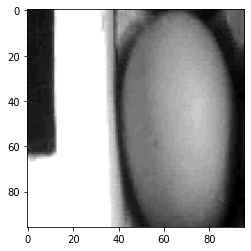

In [11]:
raw_bytes = np.array(HEXADECIMAL_BYTES)
image = np.reshape(raw_bytes,(96, 96)) #QCIF resolution

# Show the image
plt.imshow(image, cmap='gray')
plt.show()

In [12]:
HEXADECIMAL_BYTES = [
  0x509c70, 0x60b078, 0x68b470, 0x489070, 0x508860, 0x508458, 0x488450, 0x488450, 0x488448, 0x488448, 0x488048, 0x488048, 0x488048, 0x488048, 0x488040, 0x509058, 0x588c58, 0x588048, 0x608058, 0x688058, 0x687c58, 0x607c60, 0x607c58, 0x587858, 0x587458, 0x587458, 0x587860, 0x507460, 0x507458, 0x506c58, 0x506c58, 0x486c58, 0x486c58, 0x506c58, 0x506858, 0x586858, 0x506858, 0x486450, 0x486450, 0x406450, 0x487058, 0x486c58, 0x486c58, 0x486048, 0x405848, 0x486040, 0x406048, 0x405848, 0x385048, 0x405c48, 0x405c48, 0x385048, 0x405440, 0x485c40, 0x405848, 0x405448, 0x405848, 0x405848, 0x405448, 0x385840, 0x507060, 0x507058, 0x485c48, 0x485840, 0x384c40, 0x405040, 0x405440, 0x384c40, 0x404440, 0x585450, 0x484c50, 0x504c40, 0x686858, 0x404458, 0x404838, 0x485040, 0x404848, 0x405440, 0x385040, 0x385040, 0x405840, 0x385048, 0x405440, 0x384c48, 0x384830, 0x384c30, 0x384c38, 0x384c38, 0x384c40, 0x303c48, 0xa0a868, 0xa0b4a0, 0x485070, 0x404040, 0xb0b878, 0xa0b8b0, 0x509c70, 0x60a878, 0x68b078, 0x509068, 0x508860, 0x488458, 0x488450, 0x488450, 0x488448, 0x488448, 0x488448, 0x488048, 0x407c48, 0x487c48, 0x488040, 0x508c58, 0x588c50, 0x587c48, 0x607c58, 0x688058, 0x687c58, 0x587458, 0x587458, 0x587458, 0x587860, 0x587458, 0x486c50, 0x486850, 0x506c50, 0x507050, 0x587058, 0x507058, 0x506c50, 0x506850, 0x586450, 0x586458, 0x506458, 0x486058, 0x486458, 0x486850, 0x486c58, 0x507058, 0x385850, 0x405440, 0x485840, 0x486440, 0x486848, 0x405c40, 0x506040, 0x485c48, 0x505c48, 0x485048, 0x404c38, 0x405448, 0x385038, 0x405448, 0x405448, 0x405440, 0x405848, 0x405c40, 0x507060, 0x507058, 0x486050, 0x405448, 0x405440, 0x405840, 0x405840, 0x405038, 0x585c40, 0xa0a890, 0x707490, 0x586048, 0xa8b498, 0x7888b0, 0x404c40, 0x687450, 0x586068, 0x384440, 0x384840, 0x385040, 0x385440, 0x385440, 0x385440, 0x384c48, 0x384830, 0x384c30, 0x384c38, 0x384c38, 0x384430, 0x404038, 0xd0d480, 0xc8d0b8, 0x585c88, 0x484c40, 0xd0e4a8, 0x98b8b8, 0x509c70, 0x60a880, 0x68b078, 0x509468, 0x508c60, 0x488450, 0x488450, 0x488050, 0x488048, 0x488048, 0x488048, 0x407c48, 0x487c48, 0x487c48, 0x488040, 0x508c58, 0x588c50, 0x587c48, 0x607c50, 0x688058, 0x688058, 0x607c58, 0x607850, 0x506c58, 0x506c50, 0x506c50, 0x486c50, 0x506850, 0x486050, 0x486050, 0x586c58, 0x506058, 0x506058, 0x505c58, 0x586460, 0x607060, 0x587058, 0x506858, 0x486450, 0x406050, 0x487060, 0x487060, 0x406050, 0x405440, 0x485c40, 0x486040, 0x486048, 0x405048, 0x687850, 0x687068, 0x505850, 0x788058, 0x708470, 0x506c68, 0x385040, 0x405440, 0x405440, 0x405440, 0x405848, 0x405c40, 0x506c60, 0x507460, 0x486050, 0x405448, 0x405038, 0x405438, 0x405440, 0x384c38, 0xa0b050, 0xf0f0f0, 0x98a4f0, 0xa0b468, 0xf0f0f0, 0xa0b4f0, 0x607860, 0xa0bc88, 0x708ca8, 0x485848, 0x385040, 0x385038, 0x385440, 0x385440, 0x385440, 0x384c48, 0x384830, 0x384830, 0x384c38, 0x304438, 0x384030, 0x707848, 0xf0f0c0, 0xf0f0e8, 0x8094b8, 0x789868, 0xd0f0d8, 0x789cb8, 0x509c70, 0x60ac80, 0x68ac78, 0x509468, 0x508c60, 0x488450, 0x488450, 0x488050, 0x488050, 0x488048, 0x488048, 0x407c48, 0x487c40, 0x407c48, 0x508840, 0x488850, 0x588850, 0x587c48, 0x607c50, 0x688058, 0x687c58, 0x587458, 0x587058, 0x506850, 0x506c48, 0x507050, 0x506c50, 0x586448, 0x585c40, 0x585c50, 0x586450, 0x606450, 0x606850, 0x686850, 0x687068, 0x707880, 0x586860, 0x506468, 0x486858, 0x507458, 0x507c70, 0x486c60, 0x406050, 0x405840, 0x485840, 0x485c40, 0x485c48, 0x486448, 0xc8e4a0, 0xc8e8d0, 0x587070, 0xc8e8a8, 0xd0f0e0, 0x607c90, 0x485c60, 0x505c58, 0x404848, 0x404c48, 0x405448, 0x405c40, 0x507060, 0x507460, 0x405c50, 0x405440, 0x405440, 0x405438, 0x405440, 0x405038, 0xb8c050, 0xf0f0f0, 0xd0e0f0, 0xb8c488, 0xf0f0f0, 0xc0d0f0, 0x688870, 0xd0f0b8, 0x98c4d8, 0x586c68, 0x283c48, 0x384c48, 0x385040, 0x305040, 0x385440, 0x385040, 0x384830, 0x404830, 0x384c38, 0x384c40, 0x486038, 0xc8dca8, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xb8e8c0, 0xc8ecd0, 0x506090, 0x509c70, 0x60a880, 0x68ac78, 0x509468, 0x488c58, 0x488850, 0x488448, 0x488048, 0x488048, 0x488048, 0x408048, 0x488048, 0x407c48, 0x407c48, 0x508840, 0x508858, 0x508058, 0x507848, 0x607c50, 0x687c58, 0x687c58, 0x587050, 0x486040, 0x506040, 0x506848, 0x507050, 0x506c50, 0x506048, 0x808850, 0x909888, 0x687478, 0xa0ac68, 0xc0d4a0, 0xd8f0b0, 0xd8f0d0, 0xa8cce0, 0x608090, 0x607c68, 0x486860, 0x507458, 0x507c68, 0x486c60, 0x406050, 0x405448, 0x405440, 0x486040, 0x405848, 0x688050, 0xf0f0d8, 0xf0f0f0, 0x90a0d0, 0xf0f0d8, 0xf0f0f0, 0x687ce0, 0x485068, 0x505458, 0x505848, 0x485450, 0x405440, 0x405c48, 0x507068, 0x507460, 0x405858, 0x405440, 0x405440, 0x405438, 0x405440, 0x384838, 0xa8b458, 0xf0f0f0, 0xf0f0f0, 0xc8d8c0, 0xf0f0f0, 0xc0dcf0, 0xa0bc88, 0xe8f0f0, 0xe0f0f0, 0x7098b0, 0x385058, 0x385448, 0x385048, 0x305448, 0x385440, 0x384c40, 0x384830, 0x404830, 0x404c38, 0x384c38, 0x608438, 0xe8f0d0, 0xf0f0f0, 0xf0f0f0, 0xd0f0f0, 0xc0f0c0, 0xa8c4d8, 0x585878, 0x58a070, 0x60a880, 0x60b078, 0x509468, 0x488858, 0x488450, 0x488450, 0x488050, 0x488048, 0x488048, 0x408048, 0x408048, 0x407c48, 0x407c48, 0x508c40, 0x508c58, 0x508058, 0x587848, 0x607c50, 0x687c50, 0x607c58, 0x587050, 0x506448, 0x506048, 0x506440, 0x506c48, 0x506450, 0x687c48, 0xf0f0c0, 0xf0f0f0, 0x909cb0, 0xf0f0c0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x7090b8, 0x607c78, 0x506c70, 0x587860, 0x507c68, 0x486c60, 0x406058, 0x405448, 0x485c40, 0x485c40, 0x485c48, 0x687840, 0xf0f0d8, 0xf0f0f0, 0xb0bcf0, 0xf0f0e0, 0xf0f0f0, 0x6880d0, 0x607478, 0x687c68, 0x688078, 0x405868, 0x304850, 0x405c48, 0x507460, 0x507460, 0x405460, 0x405440, 0x405040, 0x405040, 0x405440, 0x384438, 0xa8b450, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb8e0f0, 0xd8f0c8, 0xf0f0f0, 0xe8f0f0, 0xa8ccf0, 0x406478, 0x385048, 0x385448, 0x385040, 0x385040, 0x384c40, 0x384830, 0x384830, 0x404c38, 0x304838, 0x607c30, 0xb0d080, 0xe8f0d8, 0xe8f0e0, 0x789cc0, 0xc0e8c0, 0x90b4c8, 0x708080, 0x58a070, 0x60ac80, 0x60b078, 0x509468, 0x488858, 0x488458, 0x488450, 0x488448, 0x488048, 0x488048, 0x408048, 0x408048, 0x407c48, 0x487c48, 0x488440, 0x488450, 0x588458, 0x587c48, 0x607c50, 0x687c50, 0x607c58, 0x587450, 0x506448, 0x506440, 0x586840, 0x506850, 0x506050, 0x607458, 0xf0f0d0, 0xf0f0f0, 0xb0c0e0, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x88a8d0, 0x608078, 0x507070, 0x588060, 0x588068, 0x507468, 0x406058, 0x405440, 0x405440, 0x486048, 0x485c48, 0x607040, 0xf0f0d0, 0xf0f0f0, 0xd8ece8, 0xf0f0f0, 0xf0f0f0, 0xa8d4d8, 0xd8f0d0, 0xe0f0e8, 0xc8f0e8, 0x608cb0, 0x385460, 0x385448, 0x507460, 0x507468, 0x405c58, 0x404c48, 0x404c40, 0x405038, 0x405440, 0x384838, 0xb0bc50, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0e4f0, 0xb8dcc8, 0xe8f0f0, 0xd8f0f0, 0x80b4c8, 0x406068, 0x385048, 0x385448, 0x385448, 0x405c48, 0x384c40, 0x404838, 0x384430, 0x405038, 0x384838, 0x384420, 0x586840, 0xc8e070, 0xb0d4c0, 0x80a888, 0xc0ecc0, 0xb0e4a8, 0xd8f0a8, 0x50a470, 0x60ac80, 0x60a878, 0x509468, 0x488858, 0x488458, 0x488450, 0x488048, 0x488048, 0x408048, 0x408048, 0x407c48, 0x407c48, 0x487c48, 0x508440, 0x508850, 0x588450, 0x587c40, 0x607c50, 0x687c50, 0x607858, 0x607450, 0x506848, 0x506040, 0x586c40, 0x506c48, 0x506450, 0x607050, 0xf0f0b8, 0xf0f0f0, 0xe8ecf0, 0xf0f0e0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x809cc0, 0x607878, 0x507468, 0x587868, 0x587c68, 0x507460, 0x486058, 0x405448, 0x405440, 0x506440, 0x506448, 0x586c48, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xd8f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x80b0e0, 0x406460, 0x406058, 0x507860, 0x507868, 0x486058, 0x404c48, 0x404c40, 0x485438, 0x485440, 0x384840, 0xa0ac48, 0xe8f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xb8ccf0, 0x789878, 0xd8f0d0, 0xa8d0e8, 0x487078, 0x406058, 0x305448, 0x385848, 0x405c48, 0x405c48, 0x384c40, 0x404838, 0x404c30, 0x405038, 0x384838, 0x303830, 0x303838, 0xb8d070, 0xb0dcc0, 0xa0d0a8, 0xb8ecd0, 0xb0e0a8, 0xe8f0e0, 0x58a470, 0x60b078, 0x60ac78, 0x509868, 0x508860, 0x488458, 0x488050, 0x488448, 0x488048, 0x408048, 0x408048, 0x407c48, 0x407c48, 0x407848, 0x508840, 0x488850, 0x588850, 0x587c48, 0x607c50, 0x687c50, 0x607858, 0x607450, 0x506448, 0x486040, 0x586c38, 0x506c48, 0x506450, 0x607050, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x7094b8, 0x587468, 0x587460, 0x587c68, 0x588068, 0x507468, 0x486058, 0x405048, 0x405440, 0x506040, 0x506448, 0x607448, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x88b0f0, 0xa8dcd0, 0xa8e0c8, 0x98ccc8, 0x608888, 0x406050, 0x405c58, 0x507860, 0x487468, 0x406058, 0x405048, 0x404c40, 0x485838, 0x485440, 0x485840, 0xb0c048, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xb8d8f0, 0x507470, 0xb0d8a0, 0x88b8b8, 0x406868, 0x385858, 0x305448, 0x385848, 0x385448, 0x405c50, 0x384c40, 0x404830, 0x404c30, 0x485440, 0x384838, 0x404c30, 0x384030, 0x809060, 0x809490, 0x98b080, 0xb0ccb0, 0x80a488, 0x90bca0, 0x58a870, 0x60b080, 0x60ac78, 0x489068, 0x508858, 0x488058, 0x488450, 0x488448, 0x488048, 0x408048, 0x408048, 0x408048, 0x407c48, 0x407c48, 0x508c40, 0x488858, 0x508450, 0x587c48, 0x607c50, 0x687c50, 0x687858, 0x607450, 0x506448, 0x486040, 0x586c38, 0x506c48, 0x486050, 0x586450, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0f0, 0x88a8c0, 0x607c70, 0x587468, 0x587c68, 0x587c68, 0x507068, 0x406050, 0x385450, 0x405440, 0x506440, 0x506448, 0x587050, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x7084e8, 0x606c78, 0x606868, 0x586460, 0x485c58, 0x486048, 0x385c48, 0x487868, 0x487868, 0x406858, 0x405848, 0x404c40, 0x485838, 0x485040, 0x384440, 0xa0b850, 0xe0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xa8d8f0, 0x587c78, 0x708868, 0x587870, 0x406050, 0x405c50, 0x385440, 0x405848, 0x405c48, 0x385448, 0x384c48, 0x404830, 0x404c30, 0x485840, 0x384c38, 0x384c38, 0x303c40, 0x484c40, 0x485858, 0xb0cca0, 0xa0c0c0, 0x607070, 0x485450, 0x58a470, 0x58ac80, 0x60a878, 0x509468, 0x488858, 0x488458, 0x488450, 0x488450, 0x408048, 0x408048, 0x408048, 0x407c48, 0x407c48, 0x408048, 0x508c40, 0x508c58, 0x488050, 0x587c48, 0x607850, 0x687c50, 0x687858, 0x607450, 0x506448, 0x506040, 0x506838, 0x506848, 0x506050, 0x606c48, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0xd0f0f0, 0x88acb8, 0x608070, 0x587460, 0x587c60, 0x588068, 0x486c68, 0x406050, 0x385448, 0x405840, 0x506440, 0x586c48, 0x607c50, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x7898d8, 0x587070, 0x506058, 0x506458, 0x405860, 0x485c50, 0x385c48, 0x507860, 0x487060, 0x406460, 0x405848, 0x404840, 0x485840, 0x485438, 0x384048, 0x607438, 0xa8ccb0, 0xa8d8b8, 0xc0f0d8, 0xa0d0c0, 0x80acb8, 0x486468, 0x506460, 0x485c58, 0x304450, 0x385048, 0x385440, 0x385848, 0x405850, 0x385448, 0x385048, 0x404838, 0x405030, 0x485440, 0x384c40, 0x385038, 0x405438, 0x384838, 0x607438, 0xa8ccb0, 0x88a8a8, 0x405050, 0x384438, 0x50a070, 0x60a878, 0x60a878, 0x509468, 0x508858, 0x488458, 0x488450, 0x488450, 0x408048, 0x408048, 0x408048, 0x407c48, 0x407c48, 0x408048, 0x508840, 0x508850, 0x487c58, 0x587c48, 0x608050, 0x687c58, 0x687858, 0x607050, 0x506448, 0x506040, 0x506838, 0x507048, 0x486450, 0x586c50, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0f0, 0xd0f0f0, 0xb8e8f0, 0x80acb0, 0x607c68, 0x507468, 0x587860, 0x588068, 0x487068, 0x486858, 0x385848, 0x405840, 0x506440, 0x485c48, 0x486c58, 0xe0f0b0, 0xe8f0e8, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0x78a4d0, 0x587c68, 0x507060, 0x507060, 0x486458, 0x406050, 0x385848, 0x487060, 0x487060, 0x486858, 0x405848, 0x404838, 0x505c40, 0x485840, 0x385040, 0x586838, 0x606c70, 0x606860, 0x606c68, 0x606c60, 0x486060, 0x405848, 0x486050, 0x485c50, 0x304840, 0x405448, 0x304840, 0x385c50, 0x405c50, 0x405c50, 0x405448, 0x384838, 0x384830, 0x405040, 0x404c38, 0x384c38, 0x385040, 0x304840, 0x506838, 0x506460, 0x405458, 0x304438, 0x384c40, 0x58a470, 0x60a880, 0x60a878, 0x509060, 0x488c58, 0x488458, 0x488450, 0x488050, 0x488048, 0x408048, 0x408048, 0x408048, 0x407c48, 0x488048, 0x508840, 0x508c58, 0x507c58, 0x587c48, 0x607c50, 0x687c50, 0x687c58, 0x607050, 0x506848, 0x485c40, 0x506840, 0x507050, 0x506c50, 0x687c50, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0x88b8d0, 0x608078, 0x507068, 0x587c60, 0x588068, 0x407068, 0x486858, 0x385840, 0x405c38, 0x486440, 0x405840, 0x384c40, 0xa8c088, 0x90b098, 0xa8c8b0, 0x98b8a8, 0x88aca0, 0x608488, 0x507068, 0x506860, 0x506858, 0x486458, 0x405c50, 0x305448, 0x507858, 0x487060, 0x486c60, 0x405850, 0x405040, 0x505c40, 0x485840, 0x405440, 0x384438, 0x485430, 0x404c38, 0x404c48, 0x404c48, 0x485c58, 0x405458, 0x405850, 0x405448, 0x384c48, 0x405448, 0x304840, 0x405c48, 0x405c50, 0x405850, 0x405450, 0x384840, 0x384830, 0x404c38, 0x384838, 0x384838, 0x384c38, 0x384c38, 0x404c28, 0x304030, 0x384438, 0x304440, 0x385040, 0x58a470, 0x60a880, 0x60a878, 0x509068, 0x488858, 0x488458, 0x488450, 0x488050, 0x408048, 0x408048, 0x408048, 0x407c48, 0x488040, 0x487c48, 0x508c40, 0x508858, 0x487c58, 0x587c48, 0x607c50, 0x687c58, 0x687c58, 0x607458, 0x506848, 0x485840, 0x586c40, 0x506c50, 0x506c50, 0x506c50, 0xb8e070, 0xd8f0d8, 0xe0f0d8, 0xd8f0e0, 0xc8f0d8, 0xc0f0c8, 0xc8f0d0, 0xb0e8d8, 0x709ca0, 0x587c60, 0x507060, 0x588060, 0x588068, 0x487068, 0x486458, 0x486048, 0x405c40, 0x486440, 0x486440, 0x283c40, 0x505c40, 0x505c60, 0x607060, 0x687c70, 0x688068, 0x507068, 0x506c50, 0x406450, 0x486050, 0x406048, 0x405c50, 0x305848, 0x507858, 0x487060, 0x486c60, 0x405c50, 0x485440, 0x405438, 0x405840, 0x405440, 0x304440, 0x405848, 0x385c48, 0x405c58, 0x405c50, 0x406050, 0x405c50, 0x405c48, 0x405c48, 0x384c48, 0x385040, 0x304c48, 0x406050, 0x405c50, 0x385848, 0x405448, 0x384c40, 0x404c30, 0x404838, 0x384c38, 0x384c38, 0x304c40, 0x304838, 0x384c38, 0x385048, 0x385440, 0x385040, 0x384c40, 0x58a470, 0x60a880, 0x60a878, 0x488c68, 0x488860, 0x488458, 0x488450, 0x408050, 0x408048, 0x408048, 0x407c48, 0x407c48, 0x487c40, 0x488040, 0x508840, 0x508c58, 0x487c58, 0x507c48, 0x607c50, 0x687c58, 0x687c58, 0x607858, 0x506848, 0x505840, 0x606c40, 0x587050, 0x587450, 0x506c50, 0x708860, 0x789078, 0x809488, 0x809488, 0x789088, 0x709078, 0x708c78, 0x789888, 0x608078, 0x486860, 0x507060, 0x587860, 0x508068, 0x507868, 0x486458, 0x405c50, 0x485c40, 0x486840, 0x486048, 0x385448, 0x405438, 0x506048, 0x607450, 0x587060, 0x506460, 0x507060, 0x486860, 0x486458, 0x486450, 0x406048, 0x406448, 0x386048, 0x587c58, 0x487068, 0x507060, 0x405858, 0x485440, 0x485838, 0x485c40, 0x405440, 0x385040, 0x485840, 0x405c48, 0x405c48, 0x405c48, 0x385450, 0x385440, 0x405c48, 0x405c48, 0x385040, 0x384c40, 0x384c40, 0x405840, 0x385850, 0x405c40, 0x405c48, 0x405848, 0x404c38, 0x384438, 0x384430, 0x304030, 0x304430, 0x304838, 0x384838, 0x304438, 0x304038, 0x283c38, 0x303c30, 0x58a470, 0x60a878, 0x60a478, 0x489068, 0x488860, 0x488858, 0x488450, 0x408450, 0x408448, 0x408048, 0x488048, 0x488448, 0x488048, 0x488040, 0x508840, 0x508c58, 0x487c58, 0x507c48, 0x608050, 0x687c58, 0x687c58, 0x607858, 0x586c48, 0x505c40, 0x607048, 0x587050, 0x587450, 0x406058, 0x486850, 0x587068, 0x688070, 0x708878, 0x688478, 0x607c70, 0x608078, 0x708c70, 0x608070, 0x507060, 0x507460, 0x587c60, 0x588070, 0x507868, 0x486458, 0x405448, 0x405c40, 0x486040, 0x486848, 0x406048, 0x305848, 0x486c58, 0x486c50, 0x506c58, 0x486858, 0x486c58, 0x487058, 0x487058, 0x486c58, 0x406048, 0x405c50, 0x305c50, 0x507858, 0x507860, 0x507460, 0x485858, 0x485040, 0x404838, 0x384838, 0x384c40, 0x304840, 0x385040, 0x385440, 0x385448, 0x385440, 0x385048, 0x385048, 0x385440, 0x405440, 0x384840, 0x384438, 0x304438, 0x304840, 0x304c40, 0x406448, 0x405c48, 0x405c40, 0x405038, 0x304038, 0x283828, 0x283830, 0x283c28, 0x303830, 0x283830, 0x283830, 0x303c30, 0x303c30, 0x283c28, 0x58a870, 0x60b080, 0x58a880, 0x509468, 0x488c60, 0x488450, 0x488450, 0x408448, 0x408448, 0x408048, 0x488048, 0x488048, 0x488048, 0x488040, 0x508840, 0x508858, 0x487c58, 0x507c48, 0x608048, 0x687c58, 0x688058, 0x607458, 0x586848, 0x506048, 0x687840, 0x687c50, 0x587458, 0x507050, 0x587850, 0x688058, 0x708470, 0x688478, 0x688070, 0x607c70, 0x607868, 0x587468, 0x587468, 0x506c68, 0x506c58, 0x507858, 0x588078, 0x507470, 0x486858, 0x405c50, 0x405448, 0x405838, 0x405840, 0x405c40, 0x405848, 0x486048, 0x485c40, 0x486050, 0x486458, 0x486058, 0x405c50, 0x406050, 0x405850, 0x385448, 0x385448, 0x304840, 0x406048, 0x406458, 0x507060, 0x486058, 0x405448, 0x384438, 0x384438, 0x304038, 0x384838, 0x384c40, 0x385038, 0x384c40, 0x304840, 0x384c40, 0x304840, 0x304838, 0x304c40, 0x304838, 0x283c38, 0x304438, 0x384c38, 0x385040, 0x406448, 0x405c50, 0x406048, 0x405c48, 0x405850, 0x385040, 0x384c38, 0x304838, 0x384838, 0x384838, 0x304838, 0x304438, 0x304c38, 0x305038, 0x58ac70, 0x60b080, 0x58a480, 0x509068, 0x508c60, 0x488458, 0x488450, 0x488450, 0x488048, 0x488048, 0x488048, 0x408048, 0x488440, 0x488040, 0x508840, 0x508858, 0x487c58, 0x587c48, 0x607c50, 0x687c58, 0x688058, 0x607458, 0x586c48, 0x506048, 0x586440, 0x586848, 0x507050, 0x507050, 0x507858, 0x587460, 0x587468, 0x587868, 0x587c68, 0x587868, 0x587868, 0x587868, 0x587c60, 0x486c58, 0x406450, 0x406850, 0x507068, 0x507060, 0x507060, 0x486850, 0x485c50, 0x384830, 0x304438, 0x384838, 0x384438, 0x384c40, 0x405040, 0x384c40, 0x405448, 0x405c48, 0x405850, 0x385048, 0x385040, 0x385040, 0x304840, 0x284038, 0x385848, 0x406858, 0x507060, 0x506850, 0x486048, 0x485c48, 0x385040, 0x304038, 0x304430, 0x304038, 0x304038, 0x304030, 0x304438, 0x304038, 0x304438, 0x304840, 0x305040, 0x385040, 0x405848, 0x405848, 0x385848, 0x385450, 0x406048, 0x406050, 0x405c48, 0x486448, 0x486448, 0x486450, 0x486050, 0x486048, 0x486450, 0x406050, 0x405c48, 0x405c48, 0x405c48, 0x405c48, 0x60ac70, 0x60b088, 0x58a480, 0x509468, 0x508c58, 0x488458, 0x488050, 0x488048, 0x488048, 0x488048, 0x488048, 0x408048, 0x408048, 0x488048, 0x508840, 0x508858, 0x507c58, 0x587c48, 0x607850, 0x687c58, 0x687c58, 0x607458, 0x506850, 0x506448, 0x485c48, 0x485c40, 0x486048, 0x406048, 0x486448, 0x486c50, 0x507058, 0x507460, 0x506c60, 0x506c60, 0x506c60, 0x486860, 0x406458, 0x406058, 0x406050, 0x486c50, 0x507468, 0x507068, 0x506860, 0x486458, 0x506858, 0x385040, 0x304038, 0x303830, 0x304030, 0x304038, 0x384440, 0x304440, 0x384840, 0x385048, 0x385048, 0x304c40, 0x385040, 0x405448, 0x406048, 0x406850, 0x487058, 0x487460, 0x507460, 0x486c58, 0x486c60, 0x507458, 0x486c58, 0x406458, 0x486c50, 0x486450, 0x486450, 0x486050, 0x405c48, 0x406048, 0x486850, 0x406850, 0x406450, 0x406858, 0x486c58, 0x406c50, 0x406450, 0x486450, 0x486850, 0x486050, 0x405c48, 0x405c48, 0x405c48, 0x405848, 0x405848, 0x405c48, 0x405448, 0x405440, 0x405848, 0x405c48, 0x385848, 0x385440, 0x60ac70, 0x60b088, 0x58a888, 0x489068, 0x509058, 0x488058, 0x487c50, 0x488048, 0x487848, 0x487c40, 0x488048, 0x488048, 0x488048, 0x488048, 0x508440, 0x508450, 0x487c58, 0x587c48, 0x607850, 0x687c58, 0x687c58, 0x607450, 0x586c50, 0x506448, 0x485840, 0x485c40, 0x405848, 0x405440, 0x405c40, 0x486450, 0x406450, 0x406050, 0x486850, 0x486c58, 0x486858, 0x406058, 0x406050, 0x406050, 0x405c48, 0x486850, 0x507060, 0x587460, 0x506c60, 0x506c58, 0x506c50, 0x506c50, 0x486858, 0x486458, 0x486458, 0x486458, 0x486458, 0x486860, 0x486c60, 0x486c60, 0x487060, 0x487060, 0x507860, 0x507c68, 0x587c60, 0x507868, 0x507468, 0x507468, 0x507460, 0x506c58, 0x486858, 0x486850, 0x507050, 0x507858, 0x587858, 0x507460, 0x507058, 0x507458, 0x507458, 0x507458, 0x486c58, 0x487058, 0x486c58, 0x406850, 0x406850, 0x486850, 0x486448, 0x486450, 0x486050, 0x406050, 0x405c48, 0x405848, 0x405848, 0x405848, 0x405848, 0x405848, 0x405848, 0x405440, 0x405040, 0x405448, 0x385040, 0x385040, 0x58a070, 0x58a880, 0x50a080, 0x488c70, 0x488858, 0x488050, 0x488050, 0x407c48, 0x488448, 0x488450, 0x488048, 0x407c48, 0x487c48, 0x487c48, 0x588c40, 0x508c58, 0x508058, 0x507448, 0x607850, 0x687c58, 0x687858, 0x607850, 0x587058, 0x586c50, 0x506850, 0x485850, 0x405440, 0x405848, 0x405c48, 0x406048, 0x405c50, 0x406048, 0x486850, 0x487058, 0x507460, 0x487060, 0x486c60, 0x506c58, 0x587060, 0x587460, 0x587460, 0x587460, 0x507060, 0x507060, 0x507460, 0x587c60, 0x588068, 0x608068, 0x608468, 0x608470, 0x608870, 0x608870, 0x608870, 0x588870, 0x588468, 0x588468, 0x588468, 0x588470, 0x507868, 0x507060, 0x507060, 0x507460, 0x507060, 0x486c58, 0x506858, 0x486050, 0x486450, 0x486858, 0x486c58, 0x486c58, 0x486c58, 0x486c58, 0x486858, 0x506858, 0x486458, 0x486858, 0x486858, 0x406850, 0x406850, 0x406850, 0x406048, 0x486450, 0x486050, 0x406050, 0x405c48, 0x405848, 0x485848, 0x405848, 0x405c40, 0x485c48, 0x405440, 0x405440, 0x405040, 0x384c40, 0x405040, 0x405040, 0x58a880, 0x58a888, 0x58a080, 0x509468, 0x509058, 0x488858, 0x488850, 0x488048, 0x488048, 0x407c48, 0x487c40, 0x407c48, 0x407848, 0x407440, 0x508838, 0x488858, 0x407c58, 0x507848, 0x607c58, 0x688058, 0x687c58, 0x607c58, 0x607458, 0x587450, 0x607c58, 0x587458, 0x587058, 0x507060, 0x507060, 0x507058, 0x507458, 0x587c60, 0x588470, 0x588070, 0x588070, 0x588068, 0x608068, 0x608070, 0x608070, 0x608070, 0x607868, 0x587460, 0x587060, 0x506c60, 0x507058, 0x507058, 0x587460, 0x507058, 0x507058, 0x507460, 0x587460, 0x587860, 0x587860, 0x587860, 0x507460, 0x507460, 0x507060, 0x507460, 0x587460, 0x507058, 0x507058, 0x507060, 0x506c58, 0x506c58, 0x486458, 0x486450, 0x486450, 0x506858, 0x506c58, 0x506c58, 0x506c58, 0x506c58, 0x506858, 0x506458, 0x485c50, 0x506450, 0x506850, 0x486850, 0x486450, 0x486450, 0x486458, 0x486450, 0x406050, 0x406050, 0x405c48, 0x405c48, 0x405848, 0x405440, 0x385440, 0x385440, 0x405440, 0x405440, 0x405440, 0x384c40, 0x384840, 0x384c40, 0x78dc98, 0x80e0a8, 0x70cca0, 0x68c088, 0x70c480, 0x68b878, 0x68b870, 0x70b470, 0x70b468, 0x68ac68, 0x68ac68, 0x60ac68, 0x68b068, 0x68ac68, 0x60ac60, 0x58a468, 0x589868, 0x508450, 0x608058, 0x688458, 0x687c60, 0x687c58, 0x587458, 0x587458, 0x607860, 0x607c58, 0x608468, 0x608468, 0x608468, 0x608468, 0x608468, 0x608468, 0x608070, 0x587c70, 0x587c68, 0x587c68, 0x587868, 0x587c68, 0x587c68, 0x587868, 0x587868, 0x587460, 0x587060, 0x507060, 0x507058, 0x507058, 0x507058, 0x507058, 0x507458, 0x507458, 0x507460, 0x587860, 0x587860, 0x587860, 0x507460, 0x507460, 0x507060, 0x506c58, 0x507058, 0x507058, 0x506c58, 0x507058, 0x506c58, 0x506c58, 0x506c58, 0x506c58, 0x506c58, 0x506858, 0x506c58, 0x506c58, 0x506c58, 0x506c58, 0x506458, 0x506458, 0x506858, 0x586858, 0x506458, 0x486450, 0x485c50, 0x486050, 0x506858, 0x486458, 0x486458, 0x406050, 0x406048, 0x405840, 0x385440, 0x405440, 0x385440, 0x385038, 0x405038, 0x405040, 0x384c40, 0x384c40, 0x384c40, 0x384c38, 0x78d090, 0x80d898, 0x70c8a0, 0x70c088, 0x70c080, 0x68b870, 0x68b470, 0x70b468, 0x70b470, 0x68b468, 0x68b068, 0x60b068, 0x60b068, 0x68b068, 0x68bc60, 0x68bc70, 0x68ac78, 0x588858, 0x608050, 0x688458, 0x688458, 0x688058, 0x607458, 0x607458, 0x607458, 0x607c60, 0x607c60, 0x608060, 0x608068, 0x607c60, 0x607860, 0x607c68, 0x607c68, 0x607c68, 0x607c68, 0x607868, 0x607868, 0x607868, 0x607c68, 0x607c68, 0x607468, 0x587460, 0x587060, 0x586c60, 0x506c58, 0x587058, 0x587058, 0x587058, 0x587058, 0x587458, 0x507458, 0x587460, 0x587458, 0x587058, 0x506850, 0x506c58, 0x486458, 0x506050, 0x506450, 0x586850, 0x506c58, 0x506c58, 0x506c58, 0x506858, 0x506858, 0x506c58, 0x506c50, 0x506050, 0x506050, 0x506050, 0x505c48, 0x505c48, 0x506448, 0x586c50, 0x506050, 0x506050, 0x506450, 0x506450, 0x485c50, 0x485848, 0x506048, 0x485c50, 0x486450, 0x405c50, 0x385440, 0x384c40, 0x385040, 0x385038, 0x385438, 0x384c38, 0x384838, 0x384838, 0x384838, 0x384838, 0x384838, 0x384838, 0x58a878, 0x60b088, 0x50a080, 0x509470, 0x488c60, 0x488458, 0x488450, 0x488450, 0x488450, 0x408448, 0x408448, 0x408448, 0x407c48, 0x407c48, 0x509048, 0x589c60, 0x589060, 0x507c50, 0x607850, 0x688460, 0x688458, 0x688058, 0x607458, 0x607458, 0x607460, 0x607860, 0x607c60, 0x607c60, 0x607860, 0x607860, 0x587860, 0x587860, 0x607868, 0x587868, 0x587460, 0x587460, 0x587860, 0x587c60, 0x607c68, 0x607868, 0x587468, 0x607460, 0x587060, 0x586c58, 0x507058, 0x507058, 0x587060, 0x506858, 0x506058, 0x485c50, 0x506458, 0x586858, 0x506858, 0x586858, 0x586858, 0x586850, 0x587058, 0x586c58, 0x586c58, 0x607058, 0x607860, 0x586c58, 0x506c58, 0x506860, 0x506858, 0x506850, 0x486058, 0x506450, 0x506450, 0x586850, 0x606c60, 0x606c60, 0x587060, 0x607460, 0x607460, 0x688060, 0x688060, 0x607c60, 0x587860, 0x607860, 0x586c60, 0x506848, 0x506850, 0x405c50, 0x405840, 0x384838, 0x384838, 0x304430, 0x304030, 0x304030, 0x303c30, 0x304040, 0x303c30, 0x304430, 0x304030, 0x304028, 0x60b470, 0x60b888, 0x50a088, 0x488c70, 0x488c60, 0x488850, 0x488450, 0x408450, 0x408050, 0x408048, 0x408050, 0x408048, 0x408448, 0x407c48, 0x509048, 0x508858, 0x507c50, 0x507840, 0x608050, 0x688460, 0x708458, 0x687c58, 0x607858, 0x607858, 0x607460, 0x607c60, 0x607c60, 0x607460, 0x607458, 0x607458, 0x607458, 0x607060, 0x607460, 0x607860, 0x607860, 0x607860, 0x607460, 0x587460, 0x607460, 0x607868, 0x607068, 0x607460, 0x586c60, 0x586c58, 0x586c58, 0x586c58, 0x606c50, 0x586450, 0x586450, 0x607860, 0x688068, 0x708870, 0x788c70, 0x809078, 0x789480, 0x789078, 0x809c78, 0x809880, 0x709078, 0x708878, 0x687c70, 0x506868, 0x506460, 0x506460, 0x506858, 0x506850, 0x607858, 0x688860, 0x708c70, 0x789078, 0x809880, 0x809c80, 0x80a078, 0x88a078, 0x88a480, 0x809c88, 0x789c88, 0x80a480, 0x80a480, 0x78a078, 0x708c80, 0x587468, 0x486458, 0x405c50, 0x405848, 0x384c40, 0x384838, 0x384438, 0x304438, 0x304030, 0x303428, 0x383420, 0x383c20, 0x384030, 0x303c28, 0x384028, 0x58ac70, 0x60b488, 0x58a080, 0x489068, 0x509460, 0x488c58, 0x508850, 0x488850, 0x488848, 0x488848, 0x488448, 0x488448, 0x488448, 0x407c40, 0x508840, 0x589058, 0x508858, 0x587848, 0x608050, 0x688460, 0x708858, 0x687c50, 0x607858, 0x607858, 0x607458, 0x587060, 0x586c58, 0x607460, 0x607468, 0x687868, 0x687868, 0x687868, 0x688068, 0x688468, 0x687c68, 0x607868, 0x607c60, 0x687c68, 0x607c68, 0x688068, 0x688068, 0x688060, 0x587058, 0x587058, 0x586c58, 0x506050, 0x708458, 0x789470, 0x789c78, 0x88ac88, 0x88b088, 0x80a490, 0x88a498, 0x88a490, 0x90b088, 0x98bc90, 0x88b090, 0x88ac90, 0x88ac90, 0x88a890, 0x88ac90, 0x688888, 0x587068, 0x506860, 0x506458, 0x486440, 0x709460, 0x80ac80, 0x88b088, 0x88b490, 0x90b090, 0x80a490, 0x88a090, 0x98ac90, 0x98ac90, 0x88a480, 0x90ac88, 0x88a888, 0x80a488, 0x80ac88, 0x88b090, 0x587c88, 0x406050, 0x405850, 0x384840, 0x384430, 0x384830, 0x304038, 0x384430, 0x283440, 0x383830, 0x605840, 0x585448, 0x303438, 0x585c20, 0x586c58, 0x58b070, 0x60b888, 0x50a088, 0x509468, 0x509060, 0x488c58, 0x488850, 0x488850, 0x488c48, 0x488448, 0x407c48, 0x407840, 0x407840, 0x487c48, 0x508c48, 0x509058, 0x508858, 0x507c48, 0x608048, 0x688460, 0x708858, 0x607858, 0x607858, 0x607858, 0x607858, 0x607858, 0x687c60, 0x708868, 0x708c70, 0x809478, 0x809c78, 0x809c80, 0x88a080, 0x809c80, 0x809880, 0x789480, 0x809880, 0x789880, 0x789480, 0x789078, 0x607c70, 0x607868, 0x586c60, 0x486458, 0x506450, 0x607858, 0x98b470, 0x90b890, 0x88b498, 0x90b898, 0x90b890, 0x90b088, 0xa0b890, 0xa8c0a8, 0xa8c0a8, 0x88a490, 0x88a090, 0x90a890, 0x90b088, 0x98b890, 0xa0c090, 0x709498, 0x506c70, 0x485860, 0x506050, 0x587040, 0x88ac70, 0x80ac88, 0x80a888, 0x88a888, 0x88a888, 0x889c88, 0x98b490, 0xe0f0e0, 0xd8f0e8, 0x98b4b0, 0x809488, 0x809488, 0x809c80, 0x809c80, 0x88ac80, 0x608490, 0x405c58, 0x405850, 0x384c40, 0x404c38, 0x485c38, 0x384c40, 0x384838, 0x303830, 0x506040, 0xb0c4a0, 0xa0b4b0, 0x586478, 0x90a858, 0x98c0b0, 0x60b070, 0x60b488, 0x50a088, 0x509468, 0x508c58, 0x509050, 0x488850, 0x488450, 0x408448, 0x488440, 0x487c48, 0x487c48, 0x487c48, 0x487c48, 0x508c40, 0x589058, 0x488058, 0x507c48, 0x608048, 0x688058, 0x708858, 0x607850, 0x607850, 0x587450, 0x607850, 0x789068, 0x88a080, 0x88ac80, 0x88ac88, 0x90b490, 0x90ac90, 0x88a498, 0x90b098, 0x90ac98, 0x98bc98, 0xa0c4a0, 0x98bc98, 0x90b898, 0x88b498, 0x90b498, 0x709490, 0x608470, 0x587058, 0x506850, 0x405848, 0x607c48, 0x90b888, 0x90b490, 0x88ac90, 0x90ac90, 0x88a890, 0xa0bc90, 0xe0f0b8, 0xf0f0e8, 0xe0f0e8, 0x90acc0, 0x90ac88, 0x90ac90, 0x88a888, 0x88a888, 0x90b490, 0x709898, 0x506c60, 0x485858, 0x405040, 0x587830, 0x88b078, 0x80ac88, 0x80a488, 0x80a488, 0x80a088, 0x809c88, 0xe8f0a8, 0xf0f0f0, 0xf0f0f0, 0xc0dcf0, 0x88a098, 0x809480, 0x809880, 0x809c80, 0x80a480, 0x608490, 0x405c50, 0x405850, 0x384440, 0x384438, 0x485c38, 0x385040, 0x384438, 0x304038, 0xb8c858, 0xe8f0f0, 0xe8f0f0, 0x708cc0, 0xc0dc80, 0x98bce8, 0x60b070, 0x60b488, 0x50a088, 0x509468, 0x488860, 0x509058, 0x488850, 0x408448, 0x408448, 0x408048, 0x408048, 0x487c48, 0x487c48, 0x487c48, 0x508848, 0x508c58, 0x488058, 0x507848, 0x607c50, 0x688058, 0x708858, 0x607858, 0x607450, 0x586c50, 0x708c50, 0x98b880, 0x90b490, 0x98b898, 0x98bc98, 0xa0bc98, 0x98b088, 0xa8c0a0, 0xc0d8b8, 0xc0dcc0, 0xc0e0c0, 0xa0bcb0, 0x98b4a0, 0x98bc98, 0x98c098, 0xa0cca0, 0x88b4a8, 0x588078, 0x507468, 0x506450, 0x405448, 0x688048, 0x90b080, 0x88ac90, 0x90ac90, 0x90ac90, 0x98b090, 0xb8cc98, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0x90aca0, 0x88a490, 0x90a888, 0x90a890, 0x90b490, 0x78a0a0, 0x486c68, 0x485858, 0x485448, 0x607830, 0x88ac70, 0x80a888, 0x80a888, 0x80a488, 0x88a488, 0x90a078, 0xf0f0d8, 0xe8f0e8, 0xe0f0e0, 0xe0f0f0, 0x88a0b0, 0x809c90, 0x809c88, 0x809c80, 0x80a480, 0x608898, 0x405c58, 0x405450, 0x384440, 0x384438, 0x485c38, 0x405040, 0x384c30, 0x385030, 0xe0f078, 0xd0f0e0, 0xe8f0e0, 0x88a0c8, 0xe8f0a8, 0x687cb0, 0x60b070, 0x68b888, 0x50a088, 0x509468, 0x488860, 0x508c58, 0x408048, 0x408048, 0x408048, 0x408048, 0x408048, 0x487c48, 0x487c48, 0x488048, 0x508c48, 0x509058, 0x487c58, 0x587848, 0x607850, 0x688058, 0x708460, 0x607858, 0x687850, 0x506440, 0x708848, 0x98c090, 0x98c098, 0x90bc98, 0x90b898, 0x98b898, 0xe8f098, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0c0e8, 0x98bc98, 0x98b898, 0x90b898, 0x98c0a8, 0x90bcb0, 0x588480, 0x587460, 0x506450, 0x405440, 0x688048, 0x98b480, 0x88ac90, 0x90ac90, 0x90ac90, 0x88a490, 0xe8f0a0, 0xf0f0f0, 0xe0f0f0, 0xf0f0e8, 0xe0f0f0, 0x98b8a0, 0x90a890, 0x90a890, 0x88a888, 0x90b098, 0x78a4a0, 0x486c60, 0x485c58, 0x485448, 0x607030, 0x88ac78, 0x80a888, 0x80a888, 0x80a488, 0x80a088, 0xb0c488, 0xf0f0f0, 0xa8bce8, 0xe8f098, 0xf0f0f0, 0x90a8d8, 0x88a488, 0x809c80, 0x809c80, 0x80a488, 0x608898, 0x405c50, 0x405450, 0x384440, 0x384438, 0x485c38, 0x385040, 0x384c38, 0x304c30, 0xd0f070, 0xb0e8d8, 0xd0f0c8, 0xb0e4b8, 0xb8d4e8, 0x708080, 0x60b070, 0x60b488, 0x509c80, 0x509468, 0x488460, 0x508c58, 0x488048, 0x488050, 0x408048, 0x408048, 0x408048, 0x407c48, 0x407c48, 0x488048, 0x508c48, 0x508c58, 0x487c50, 0x587c48, 0x607c50, 0x688058, 0x708860, 0x607458, 0x607050, 0x586040, 0x788c40, 0xa0b880, 0x90b490, 0x98b490, 0x98b498, 0xa0b898, 0xf0f0b0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bcf0, 0x98b8a0, 0x98b498, 0x98b498, 0x98bca0, 0x90bca8, 0x588078, 0x507460, 0x486050, 0x405440, 0x708040, 0x90b488, 0x90b088, 0x90b090, 0x90ac90, 0x88a490, 0xe8f098, 0xe8f0f0, 0xd8e0e8, 0xf0f0e0, 0xe0f0f0, 0x98b4a0, 0x90a890, 0x88a890, 0x88a888, 0x88b498, 0x78a4a0, 0x486868, 0x485c58, 0x485848, 0x586c30, 0x88ac78, 0x80a888, 0x80a888, 0x88a488, 0x88a088, 0xa8b878, 0xf0f0f0, 0x90a0e0, 0xd0d480, 0xf0f0f0, 0xa0bcf0, 0x809c98, 0x809888, 0x80a080, 0x80a480, 0x688890, 0x405c58, 0x485c50, 0x384440, 0x384438, 0x485c38, 0x405838, 0x384c30, 0x304838, 0xc0d860, 0xd0f0f0, 0xd0f0d0, 0xb8e8d0, 0x90bcc0, 0xb8dcc0, 0x68b470, 0x68b488, 0x509c88, 0x509868, 0x488460, 0x488858, 0x488450, 0x408050, 0x408048, 0x408048, 0x407c48, 0x408048, 0x407c48, 0x407c48, 0x508848, 0x508c58, 0x488050, 0x507848, 0x607848, 0x708458, 0x708458, 0x607858, 0x607050, 0x586040, 0x788c40, 0x98b880, 0x90b490, 0x98b490, 0x98b498, 0x98b498, 0xb0d0a8, 0xe0f0e8, 0xe8f0f0, 0xf0f0f0, 0xf0f0f0, 0xa0bce0, 0xa0b898, 0x98b498, 0x98b498, 0x98bca0, 0x90bca8, 0x588080, 0x587460, 0x485c58, 0x485448, 0x688040, 0x98b488, 0x90b090, 0x90ac90, 0x90ac90, 0x88a890, 0xe8f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0x90b0a0, 0x88a890, 0x90a890, 0x88a888, 0x88b498, 0x78a8a0, 0x406c68, 0x486050, 0x485c48, 0x586830, 0x90a878, 0x88a888, 0x80a488, 0x88a488, 0x88a088, 0xa0b070, 0xf0f0f0, 0xb0bcd8, 0xc8cca0, 0xf0f0f0, 0xa0bcf0, 0x88a490, 0x809c88, 0x809c88, 0x80a480, 0x688c98, 0x405c58, 0x405850, 0x384840, 0x404830, 0x506038, 0x405840, 0x385038, 0x384430, 0x708c50, 0xb0d8c0, 0xa0ccc0, 0xc0e4a0, 0xc0ecc0, 0xe0f0f0, 0x68b470, 0x68b488, 0x509c80, 0x509468, 0x488858, 0x488858, 0x488450, 0x488048, 0x488048, 0x488048, 0x407c40, 0x407c48, 0x407c48, 0x407848, 0x508c50, 0x508c58, 0x488050, 0x507c48, 0x607c48, 0x688058, 0x708058, 0x607858, 0x607050, 0x506040, 0x788c40, 0x98b880, 0x90b490, 0x98b498, 0x98b498, 0x90a498, 0x90a090, 0xa8b498, 0xb8c0a0, 0xf0f0e8, 0xf0f0f0, 0x98b4c8, 0xa0b898, 0x98b498, 0x98b498, 0x98bca0, 0x98bca8, 0x588080, 0x587468, 0x486058, 0x485440, 0x687c40, 0x98b480, 0x90b090, 0x90ac90, 0x90b090, 0x90a890, 0xc8d880, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8e8f0, 0x88a498, 0x88a490, 0x90ac90, 0x88a888, 0x88b098, 0x78a098, 0x487070, 0x486058, 0x485c48, 0x586830, 0x90ac78, 0x88a888, 0x88a488, 0x88a488, 0x88a088, 0xa0b480, 0xf0f0f0, 0xe8f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c4f0, 0x88a090, 0x809c88, 0x80a088, 0x80a480, 0x689090, 0x385858, 0x405c48, 0x304448, 0x384430, 0x405030, 0x405038, 0x384830, 0x303838, 0x504c30, 0x605c50, 0x687c68, 0xe0f0c0, 0xb8e8b8, 0xb8e4c8, 0x68b470, 0x68b488, 0x509c80, 0x509468, 0x488858, 0x488858, 0x488450, 0x488048, 0x408048, 0x488048, 0x407c48, 0x407c48, 0x407c48, 0x407848, 0x588850, 0x588c58, 0x487c50, 0x507848, 0x607c48, 0x688058, 0x708058, 0x687458, 0x607048, 0x586440, 0x788840, 0x98b488, 0x90b490, 0x98b490, 0x98b490, 0x98b090, 0x98ac90, 0x98a488, 0xd8e890, 0xf0f0f0, 0xd8f0f0, 0x98b8a8, 0x98b4a0, 0x98b498, 0x98b498, 0x98bca0, 0x98c0b0, 0x588088, 0x587868, 0x406058, 0x505c48, 0x687c40, 0x98ac80, 0x90ac90, 0x90ac90, 0x90ac90, 0x88a490, 0xc0d080, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x98b4c0, 0x90ac90, 0x90ac90, 0x88a890, 0x90b090, 0x78a0a0, 0x487070, 0x486458, 0x485848, 0x586c30, 0x90a870, 0x88a888, 0x88a480, 0x88a488, 0x88a488, 0x789078, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xb0c4f0, 0x80a098, 0x809c88, 0x80a080, 0x80a480, 0x689098, 0x405c60, 0x486050, 0x384848, 0x404830, 0x485030, 0x405038, 0x384c30, 0x404838, 0x383428, 0x383828, 0xb0bc58, 0xb0ccf0, 0xb8e480, 0xb8ecd8, 0x68b470, 0x68b888, 0x50a080, 0x509468, 0x488c58, 0x488858, 0x408450, 0x488048, 0x488448, 0x408048, 0x407c48, 0x407c48, 0x487c48, 0x487840, 0x588848, 0x588c50, 0x487c50, 0x507848, 0x607c48, 0x688058, 0x708058, 0x687858, 0x607048, 0x506440, 0x708840, 0x98b880, 0x90b490, 0x98b890, 0x98b490, 0x98b490, 0x98b098, 0x98b090, 0xf0f0b0, 0xf0f0f0, 0xb0d0d8, 0xa0c0a0, 0x98b8a0, 0x98b498, 0x98b498, 0x98bca0, 0x98c0b0, 0x588088, 0x587468, 0x406058, 0x486048, 0x687840, 0x90b080, 0x90ac90, 0x90ac90, 0x90ac90, 0x90b090, 0xe0f0a0, 0xf0f0f0, 0xe0ecd8, 0xf0f0e8, 0xe8f0f0, 0x98b8c8, 0x90ac98, 0x90ac90, 0x88a890, 0x90b090, 0x80a498, 0x507078, 0x486058, 0x505c48, 0x586838, 0x90a870, 0x80a488, 0x80a880, 0x88a488, 0x88a488, 0x788c88, 0xc0d870, 0xd8f0d8, 0xd8ecc8, 0xe8f0e0, 0x98b8e8, 0x80a088, 0x809c80, 0x80a088, 0x80a480, 0x709890, 0x406460, 0x486050, 0x304848, 0x404830, 0x505430, 0x485438, 0x384c38, 0x384c38, 0x304040, 0x405040, 0xe8f0a0, 0x7898c8, 0xb8d878, 0xd8f0f0, 0x60b470, 0x68b888, 0x489880, 0x489468, 0x488c58, 0x488858, 0x408450, 0x408048, 0x408448, 0x408448, 0x407c48, 0x407c48, 0x407c48, 0x487c40, 0x588c40, 0x589050, 0x487c50, 0x507c48, 0x608048, 0x688058, 0x707c58, 0x687858, 0x586c48, 0x586848, 0x788c40, 0x98b480, 0x90b490, 0x98b490, 0x98b498, 0x98b498, 0x98b098, 0x98ac98, 0xe8f0b0, 0xe0f0e8, 0xa8c8c0, 0x98b0a8, 0x98b4a0, 0x98b498, 0x98b898, 0x98bca0, 0x90c0b0, 0x588088, 0x587868, 0x486058, 0x486048, 0x687c40, 0x90ac80, 0x90ac90, 0x90ac90, 0x90b090, 0x88a490, 0xe0f098, 0xe8f0f0, 0x98b0d0, 0xf0f0b0, 0xe8f0f0, 0x90b4d0, 0x90ac98, 0x90ac90, 0x88a890, 0x88b098, 0x78a498, 0x507070, 0x486058, 0x505c48, 0x606838, 0x90a870, 0x80a488, 0x88a480, 0x88a488, 0x88a488, 0x809480, 0xa8b878, 0xa8c0b8, 0xd0e490, 0xe8f0e0, 0x98bce0, 0x80a098, 0x809c80, 0x80a080, 0x78a488, 0x709c90, 0x406458, 0x405c50, 0x384848, 0x404830, 0x505830, 0x485c40, 0x384c30, 0x384c38, 0x384c38, 0x506c38, 0xa8d0b0, 0x587888, 0x708858, 0x98c0b0, 0x68b470, 0x68c088, 0x50a480, 0x509868, 0x489058, 0x488858, 0x488850, 0x408050, 0x488048, 0x488048, 0x487c48, 0x488048, 0x488048, 0x488440, 0x589448, 0x589458, 0x487c50, 0x507848, 0x607c48, 0x687c50, 0x708058, 0x687858, 0x586c48, 0x586448, 0x788c40, 0x98b480, 0x90b490, 0x98b498, 0x98b498, 0x98b490, 0x98b498, 0xa0b488, 0xf0f0d8, 0xe8f0f0, 0xa8c8b8, 0x98b498, 0x98b498, 0x98b490, 0x98b498, 0x98c0a0, 0x98c0b0, 0x608488, 0x587c68, 0x406058, 0x486048, 0x687840, 0x98b078, 0x90ac90, 0x90ac90, 0x90b090, 0x80a098, 0xe0f0a0, 0xe0f0f0, 0xa8c4d8, 0xf0f0b8, 0xf0f0f0, 0x98b0d0, 0x90ac98, 0x90ac90, 0x88a890, 0x88b090, 0x88b098, 0x507478, 0x405c58, 0x505c48, 0x586c38, 0x90a870, 0x88a488, 0x88a488, 0x88a488, 0x88a488, 0x80a080, 0xe0f0c8, 0xb8dcd8, 0xf0f0c8, 0xf0f0f0, 0x98b8e0, 0x80a488, 0x80a088, 0x80a080, 0x78a480, 0x709c90, 0x406460, 0x405c50, 0x405040, 0x384430, 0x485428, 0x485838, 0x304c30, 0x304c38, 0x304838, 0x405030, 0x586c58, 0x304048, 0x485438, 0x484c58, 0x60b470, 0x68b890, 0x50a488, 0x509868, 0x489460, 0x408458, 0x488850, 0x408050, 0x488048, 0x488048, 0x488048, 0x488040, 0x408040, 0x407c40, 0x509048, 0x509058, 0x488050, 0x507848, 0x607c48, 0x688050, 0x687c50, 0x687850, 0x586c50, 0x586c48, 0x788840, 0x98b480, 0x98b490, 0x98b490, 0x98b498, 0x98b498, 0x98b098, 0xb0c898, 0xf0f0f0, 0xe0f0e8, 0x98b8a8, 0x90b0a0, 0x98b498, 0x98b498, 0x98b498, 0x98c0a0, 0x90bcb0, 0x608888, 0x587c68, 0x486058, 0x486048, 0x687838, 0x90ac80, 0x90ac90, 0x90b090, 0x90ac90, 0x88ac90, 0xe0f098, 0xe8f0f0, 0xe8f0e8, 0xf0f0f0, 0xe0f0f0, 0x88acb0, 0x90a8a0, 0x90ac90, 0x88a890, 0x88b090, 0x80aca0, 0x587c80, 0x486860, 0x485850, 0x586430, 0x88a068, 0x88a088, 0x88a488, 0x88a488, 0x88a488, 0x88a080, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xd0e4f0, 0x809c98, 0x789888, 0x80a488, 0x80a080, 0x78a088, 0x78a098, 0x406460, 0x385850, 0x405440, 0x404c38, 0x405030, 0x405038, 0x304830, 0x304830, 0x384838, 0x304020, 0x304038, 0x384428, 0x405038, 0x384038, 0x68b470, 0x68b890, 0x58a488, 0x509868, 0x489060, 0x508c58, 0x488450, 0x488450, 0x488448, 0x408448, 0x408040, 0x408040, 0x407c48, 0x407c40, 0x589048, 0x589058, 0x508050, 0x507848, 0x607848, 0x708050, 0x707c58, 0x687850, 0x607050, 0x586848, 0x708440, 0xa0b888, 0x98b490, 0x98b490, 0x98b498, 0x98b498, 0x98b098, 0xa8c488, 0xe0f0f0, 0xd0ecf0, 0xa0c4a0, 0x98b898, 0x98b498, 0x98b498, 0x98b498, 0xa0c0a0, 0x98c0b0, 0x608888, 0x587c68, 0x486858, 0x506448, 0x587038, 0x90ac78, 0x90b090, 0x90b090, 0x90ac90, 0x809c98, 0xc8d888, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e4e8, 0x98b4a0, 0x90ac90, 0x90a890, 0x90a890, 0x88b098, 0x88b0a0, 0x507c80, 0x486458, 0x405850, 0x506038, 0x88a068, 0x88a480, 0x80a480, 0x80a488, 0x88a488, 0x789488, 0xd0ec80, 0xe8f0e8, 0xe8f0e8, 0x88a8d0, 0x88a488, 0x80a488, 0x78a088, 0x78a080, 0x78a088, 0x70a498, 0x386468, 0x405850, 0x485840, 0x384830, 0x404c38, 0x384c38, 0x384c30, 0x304838, 0x304838, 0x385038, 0x304838, 0x385038, 0x304c40, 0x304c40, 0x68b870, 0x68b888, 0x58a488, 0x509068, 0x489060, 0x488c58, 0x488450, 0x488450, 0x488048, 0x488448, 0x408040, 0x488440, 0x407c48, 0x487840, 0x609048, 0x589058, 0x508450, 0x507448, 0x587448, 0x708050, 0x708050, 0x688058, 0x607448, 0x606840, 0x708038, 0x98b480, 0x98b490, 0x98b490, 0x98b498, 0x98b498, 0x98b498, 0xe0ec90, 0xf0f0f0, 0xc8e0f0, 0x98b4a0, 0x98b4a0, 0x98b490, 0x98b090, 0x98b098, 0xa0c0a0, 0x98c0b0, 0x608c90, 0x587c68, 0x486858, 0x506848, 0x607038, 0x90a878, 0x90b090, 0x90ac90, 0x90ac90, 0x90ac90, 0x789880, 0xc8f0c8, 0xd0f0e8, 0xd0f0f0, 0xa0bcb8, 0x88a090, 0x90a890, 0x90a890, 0x90ac90, 0x88ac90, 0x88b4a0, 0x507c80, 0x406460, 0x405850, 0x506038, 0x889c60, 0x80a480, 0x80a480, 0x80a488, 0x88a088, 0x88a088, 0x809878, 0xa0b8a0, 0x98b498, 0x789480, 0x80a090, 0x80a488, 0x80a088, 0x78a080, 0x78ac88, 0x70a898, 0x407068, 0x385850, 0x405448, 0x384838, 0x404838, 0x384030, 0x304030, 0x384838, 0x384c30, 0x304c38, 0x304838, 0x304830, 0x304838, 0x304c38, 0x68b470, 0x68b888, 0x58a488, 0x509068, 0x508c68, 0x508858, 0x488450, 0x488450, 0x488048, 0x408448, 0x408048, 0x408048, 0x487c48, 0x487848, 0x588c48, 0x588850, 0x507c50, 0x507848, 0x607448, 0x688050, 0x688058, 0x688050, 0x607450, 0x586840, 0x687c40, 0x98b880, 0x98b890, 0x98b498, 0x98b498, 0x98b498, 0x98b498, 0xd8f0a0, 0xd8f0e8, 0x98c0d8, 0xa0c490, 0x98b498, 0x98b098, 0x98b098, 0x98b498, 0xa0c0a0, 0x98c4b0, 0x608c90, 0x587c68, 0x486c58, 0x506848, 0x586c40, 0x88a878, 0x90b490, 0x88b090, 0x88ac90, 0x90ac90, 0x789490, 0x88a088, 0x90a898, 0x90a8a0, 0x88ac90, 0x90b090, 0x88ac98, 0x88ac90, 0x88ac98, 0x88b498, 0x88b8a8, 0x588080, 0x486460, 0x485c48, 0x485c38, 0x80a070, 0x88b080, 0x88b088, 0x80ac90, 0x80a888, 0x80a088, 0x809890, 0x809c90, 0x88a888, 0x88b090, 0x80ac90, 0x80ac90, 0x80a890, 0x80ac88, 0x78ac90, 0x689c90, 0x406858, 0x405c48, 0x405448, 0x384438, 0x384038, 0x304030, 0x304430, 0x384830, 0x304838, 0x304030, 0x304430, 0x304430, 0x304438, 0x304030, 0x68b870, 0x68b888, 0x58a088, 0x509068, 0x508c68, 0x508858, 0x488458, 0x488448, 0x488048, 0x408448, 0x408048, 0x488048, 0x487c48, 0x487c48, 0x609448, 0x588c50, 0x487c50, 0x507448, 0x607848, 0x687c50, 0x688058, 0x688050, 0x587050, 0x586c40, 0x707c38, 0x98b078, 0x98b490, 0x98b490, 0x98b490, 0x98b490, 0x90b098, 0x90b088, 0x98b8a0, 0x98b8a0, 0x98b8a0, 0x98b498, 0x98b098, 0x98b098, 0x98b498, 0xa0c498, 0x98c4b0, 0x608c98, 0x507868, 0x506c60, 0x506850, 0x587440, 0x80a468, 0x88b090, 0x88b490, 0x90b090, 0x90b090, 0x90b490, 0x90b088, 0x88a888, 0x88a490, 0x90b098, 0x90b498, 0x90bc98, 0x90c098, 0x88bc98, 0x88bc98, 0x80aca0, 0x487078, 0x486460, 0x405c50, 0x405c48, 0x789858, 0x80a878, 0x80ac88, 0x80ac88, 0x80ac88, 0x88b090, 0x88b090, 0x80a888, 0x88ac90, 0x80a898, 0x78a090, 0x78a088, 0x709c88, 0x688c80, 0x608870, 0x507870, 0x385450, 0x405850, 0x405848, 0x384c48, 0x384c40, 0x304438, 0x304838, 0x304038, 0x284030, 0x283c30, 0x283c30, 0x304030, 0x283c30, 0x283830, 0x60b878, 0x68bc88, 0x58a480, 0x488c68, 0x509068, 0x508858, 0x488450, 0x488448, 0x488448, 0x488048, 0x488048, 0x488048, 0x488048, 0x488048, 0x589048, 0x508c50, 0x487c50, 0x487840, 0x607c48, 0x607848, 0x708060, 0x708450, 0x607848, 0x607040, 0x688440, 0x90ac78, 0x98b890, 0x90b490, 0x90b498, 0x90b898, 0x90b098, 0x88ac98, 0x90b098, 0x90b898, 0x98bc98, 0x90b498, 0x90b498, 0x90b498, 0x90b4a0, 0x98c4a0, 0x98ccb0, 0x689498, 0x507468, 0x507058, 0x506450, 0x486448, 0x709868, 0x88b488, 0x88b490, 0x88b890, 0x88b890, 0x88bc98, 0x88bca0, 0x88b898, 0x88b498, 0x88b898, 0x80b098, 0x78a890, 0x70a088, 0x689888, 0x709480, 0x608480, 0x506c68, 0x506860, 0x485c50, 0x486050, 0x587448, 0x608460, 0x688c68, 0x689070, 0x689070, 0x709878, 0x709878, 0x709078, 0x688870, 0x688470, 0x608070, 0x608068, 0x587870, 0x486868, 0x486858, 0x406050, 0x406048, 0x406050, 0x486450, 0x405c48, 0x405c48, 0x385440, 0x384c40, 0x304038, 0x304030, 0x304c38, 0x284438, 0x284038, 0x304838, 0x384840, 0x60b878, 0x68bc88, 0x58a888, 0x509470, 0x508c68, 0x508c60, 0x488858, 0x488450, 0x488448, 0x488048, 0x488048, 0x488048, 0x488048, 0x488048, 0x589048, 0x589050, 0x488050, 0x487c40, 0x607c48, 0x607848, 0x708060, 0x688058, 0x607850, 0x587050, 0x688040, 0x88a460, 0x90b488, 0x90b890, 0x90bc98, 0x90b898, 0x98bc98, 0x98c098, 0x98bc98, 0x98bc98, 0x98c098, 0x98bc90, 0x98bc98, 0x98c098, 0x98c098, 0x98c498, 0x80b8a8, 0x689490, 0x507470, 0x587468, 0x506c58, 0x405c50, 0x587050, 0x688868, 0x709070, 0x709880, 0x789c80, 0x78a080, 0x78a088, 0x709c88, 0x709888, 0x709880, 0x689080, 0x688878, 0x587c68, 0x507068, 0x506c68, 0x506c68, 0x507468, 0x507068, 0x506c60, 0x506450, 0x506848, 0x506448, 0x506850, 0x506858, 0x506858, 0x506858, 0x586c58, 0x586c60, 0x506c60, 0x506860, 0x486460, 0x486458, 0x405c58, 0x486450, 0x486c58, 0x486458, 0x486450, 0x486450, 0x486050, 0x385448, 0x385848, 0x405848, 0x405848, 0x405c48, 0x405848, 0x406448, 0x406850, 0x406050, 0x405c48, 0x405c50, 0x60b478, 0x68c088, 0x58ac88, 0x509470, 0x509068, 0x488c60, 0x488850, 0x488850, 0x488448, 0x488448, 0x488048, 0x488048, 0x488048, 0x488048, 0x589448, 0x589058, 0x488450, 0x487848, 0x587848, 0x688050, 0x708058, 0x708058, 0x607850, 0x607450, 0x587048, 0x709468, 0x80ac78, 0x88b488, 0x88b490, 0x90b890, 0x90bc98, 0x90b898, 0x90b890, 0x90b498, 0x90b898, 0x88b090, 0x88ac90, 0x80a890, 0x78a088, 0x709c80, 0x689888, 0x689078, 0x587c68, 0x587460, 0x587060, 0x486458, 0x405048, 0x506450, 0x506858, 0x506858, 0x587060, 0x587468, 0x587468, 0x587468, 0x506c68, 0x506c60, 0x507060, 0x587460, 0x507060, 0x486860, 0x486860, 0x587468, 0x587468, 0x587468, 0x507060, 0x506858, 0x486450, 0x486c58, 0x486458, 0x486858, 0x506858, 0x506860, 0x506860, 0x506c60, 0x506c60, 0x507060, 0x486860, 0x486460, 0x486458, 0x486858, 0x486858, 0x486850, 0x486450, 0x486050, 0x486050, 0x405c48, 0x405c48, 0x405848, 0x405848, 0x405440, 0x405440, 0x406448, 0x406048, 0x385c48, 0x385448, 0x385448, 0x60b478, 0x68b890, 0x50a088, 0x489470, 0x489060, 0x488458, 0x488450, 0x488450, 0x488450, 0x488048, 0x488048, 0x407c48, 0x407848, 0x488040, 0x589448, 0x589458, 0x488458, 0x487848, 0x587848, 0x688048, 0x708058, 0x688058, 0x687c58, 0x587058, 0x506458, 0x688050, 0x689060, 0x709070, 0x709478, 0x709878, 0x709c80, 0x709880, 0x709c80, 0x709480, 0x709480, 0x688878, 0x608478, 0x607c70, 0x587c68, 0x587c68, 0x587c70, 0x587c70, 0x587868, 0x587460, 0x507060, 0x486058, 0x486448, 0x506c58, 0x587458, 0x587060, 0x586c60, 0x587060, 0x587060, 0x506c60, 0x587460, 0x506c60, 0x586c60, 0x587060, 0x587060, 0x587468, 0x587468, 0x587468, 0x587468, 0x507060, 0x506c60, 0x506c58, 0x507058, 0x507058, 0x507058, 0x506c58, 0x507058, 0x587060, 0x587060, 0x587460, 0x587060, 0x506c60, 0x506c60, 0x506c60, 0x506858, 0x486458, 0x486050, 0x486050, 0x486050, 0x486050, 0x405c50, 0x405c50, 0x405848, 0x405848, 0x405448, 0x385440, 0x405440, 0x405c40, 0x385c40, 0x385840, 0x385848, 0x385048, 0x60b080, 0x68bc90, 0x58ac80, 0x50a070, 0x489460, 0x488860, 0x488050, 0x487c48, 0x488048, 0x488048, 0x488048, 0x487c48, 0x407840, 0x407840, 0x508c40, 0x508c50, 0x488050, 0x407040, 0x587c40, 0x687c48, 0x708058, 0x708058, 0x687c58, 0x607450, 0x607050, 0x506850, 0x506850, 0x506858, 0x506c60, 0x506c60, 0x587060, 0x587460, 0x607860, 0x587068, 0x587060, 0x587060, 0x587468, 0x587868, 0x587868, 0x587c70, 0x607c70, 0x608068, 0x607c68, 0x587860, 0x587460, 0x587858, 0x587c60, 0x587460, 0x587860, 0x587868, 0x587868, 0x587c68, 0x587c70, 0x587c68, 0x587c68, 0x587868, 0x587868, 0x587868, 0x587468, 0x587468, 0x587468, 0x587468, 0x587068, 0x587060, 0x587060, 0x506c58, 0x506c58, 0x487058, 0x486c58, 0x486c58, 0x507458, 0x507460, 0x507060, 0x507060, 0x507060, 0x507060, 0x506c60, 0x506c58, 0x506858, 0x486458, 0x486450, 0x486450, 0x486050, 0x486450, 0x406048, 0x405c50, 0x385848, 0x385448, 0x385448, 0x385440, 0x385440, 0x385848, 0x405848, 0x385440, 0x385440, 0x405440, 0x78cc90, 0x78cc98, 0x68bc90, 0x60b480, 0x58ac70, 0x50a070, 0x58a060, 0x589c60, 0x589458, 0x589458, 0x509058, 0x509058, 0x509058, 0x509850, 0x58a050, 0x589c58, 0x508c50, 0x508448, 0x588048, 0x687c48, 0x708058, 0x708058, 0x687c60, 0x607c58, 0x607860, 0x607460, 0x607c58, 0x587860, 0x587860, 0x607868, 0x587868, 0x607860, 0x607c60, 0x607c68, 0x608068, 0x688068, 0x688470, 0x688470, 0x608070, 0x608068, 0x607c68, 0x607c68, 0x607c68, 0x587860, 0x587460, 0x587860, 0x587460, 0x587460, 0x587858, 0x587860, 0x587860, 0x607c68, 0x588068, 0x587c68, 0x587868, 0x587860, 0x587460, 0x587460, 0x587460, 0x587460, 0x587460, 0x587060, 0x587060, 0x587060, 0x586c60, 0x506c58, 0x506c58, 0x486c58, 0x486c58, 0x486c58, 0x507058, 0x507058, 0x507460, 0x507060, 0x507060, 0x506c60, 0x506c58, 0x506c58, 0x486858, 0x486850, 0x486450, 0x405850, 0x485c48, 0x486050, 0x405c48, 0x405c48, 0x385848, 0x385848, 0x385848, 0x385840, 0x405c40, 0x405c40, 0x405440, 0x385040, 0x384c40, 0x384c38, 0x80e4a0, 0x80e8a8, 0x78d8a8, 0x70d090, 0x68c488, 0x60b880, 0x68b870, 0x68bc78, 0x68b470, 0x68b070, 0x60a870, 0x60a868, 0x60ac68, 0x58ac68, 0x68b868, 0x70c478, 0x60ac68, 0x589460, 0x588050, 0x688058, 0x708058, 0x708058, 0x687c60, 0x687c58, 0x688058, 0x688060, 0x608460, 0x608068, 0x607c68, 0x607c68, 0x607c68, 0x608068, 0x608068, 0x608068, 0x608070, 0x688470, 0x688470, 0x688070, 0x608070, 0x607c70, 0x607c68, 0x607c70, 0x608068, 0x607860, 0x587460, 0x587460, 0x587460, 0x587460, 0x587460, 0x587460, 0x607860, 0x587868, 0x607868, 0x607c68, 0x587868, 0x587868, 0x587460, 0x587460, 0x587860, 0x587460, 0x587460, 0x587460, 0x587460, 0x586c60, 0x506c60, 0x506c58, 0x506c50, 0x506c50, 0x506c58, 0x486850, 0x506c50, 0x507058, 0x507060, 0x506858, 0x506858, 0x506458, 0x506450, 0x506450, 0x506450, 0x486050, 0x485848, 0x485c48, 0x485c48, 0x486050, 0x405c48, 0x385c48, 0x385440, 0x385440, 0x385040, 0x385440, 0x385040, 0x384c38, 0x384838, 0x384838, 0x384838, 0x304830, 0x70d090, 0x78d8a0, 0x70cca0, 0x68c088, 0x58b080, 0x58ac78, 0x58ac70, 0x58a468, 0x58a460, 0x60a468, 0x58a068, 0x58a060, 0x58a060, 0x58a468, 0x60ac60, 0x68b470, 0x60a868, 0x589058, 0x588050, 0x688050, 0x708058, 0x708458, 0x688060, 0x607c58, 0x607c58, 0x607c60, 0x608060, 0x607c68, 0x607c68, 0x607c68, 0x608068, 0x608068, 0x608468, 0x608068, 0x608068, 0x688068, 0x688070, 0x688070, 0x688070, 0x607c68, 0x607868, 0x607468, 0x587060, 0x587060, 0x587460, 0x587060, 0x587458, 0x587458, 0x587458, 0x587458, 0x587458, 0x587058, 0x587460, 0x587460, 0x587468, 0x587868, 0x587460, 0x587460, 0x507058, 0x587458, 0x587460, 0x587460, 0x587460, 0x507060, 0x506c58, 0x486c58, 0x486c50, 0x486450, 0x486458, 0x486050, 0x506050, 0x486050, 0x506050, 0x506858, 0x506858, 0x586858, 0x586858, 0x506050, 0x506450, 0x506458, 0x485c48, 0x506850, 0x506848, 0x486048, 0x405c48, 0x405840, 0x385440, 0x384c38, 0x384438, 0x304030, 0x304030, 0x384438, 0x384438, 0x304030, 0x304430, 0x304830, 0x60b478, 0x60b888, 0x509c80, 0x509870, 0x489068, 0x488c60, 0x408858, 0x408850, 0x488048, 0x408048, 0x488448, 0x488050, 0x407c48, 0x488448, 0x488848, 0x509058, 0x508c50, 0x508040, 0x587c40, 0x608048, 0x708050, 0x708458, 0x708058, 0x687c58, 0x607858, 0x607c60, 0x607860, 0x607c60, 0x607c68, 0x607c68, 0x608068, 0x608068, 0x608068, 0x688068, 0x607c68, 0x607868, 0x687c68, 0x688068, 0x687c68, 0x607868, 0x607868, 0x607060, 0x587060, 0x587460, 0x587460, 0x507058, 0x507058, 0x587458, 0x587458, 0x607458, 0x606c58, 0x586858, 0x607058, 0x606c60, 0x586c60, 0x586c60, 0x586858, 0x506858, 0x506858, 0x506c58, 0x506c58, 0x587460, 0x587460, 0x507060, 0x506c58, 0x506858, 0x486458, 0x506840, 0x586848, 0x586c50, 0x587058, 0x607860, 0x607860, 0x688468, 0x688468, 0x708868, 0x708470, 0x688068, 0x607c68, 0x607860, 0x607860, 0x587460, 0x486458, 0x486050, 0x385050, 0x385040, 0x384c38, 0x384438, 0x384430, 0x304430, 0x304430, 0x384438, 0x304438, 0x304030, 0x304030, 0x384830, 0x60bc78, 0x68c090, 0x58ac88, 0x509c70, 0x509868, 0x488c58, 0x488c58, 0x488850, 0x488448, 0x488048, 0x487c40, 0x488040, 0x488040, 0x487c40, 0x508848, 0x508c50, 0x488058, 0x487440, 0x507848, 0x607848, 0x708058, 0x708458, 0x708458, 0x687c50, 0x607c58, 0x607858, 0x607860, 0x607860, 0x607c60, 0x607c68, 0x587860, 0x607c68, 0x607868, 0x587460, 0x587460, 0x587060, 0x607060, 0x607060, 0x587060, 0x607460, 0x607460, 0x608068, 0x607868, 0x587460, 0x587460, 0x507058, 0x486c58, 0x506c60, 0x506858, 0x506058, 0x586858, 0x586458, 0x586c58, 0x587060, 0x586860, 0x586860, 0x587060, 0x586c60, 0x506860, 0x506858, 0x506858, 0x506858, 0x587460, 0x507060, 0x587058, 0x486050, 0x485c50, 0x607848, 0x708868, 0x709070, 0x789878, 0x80a480, 0x88a888, 0x80a080, 0x809c80, 0x809c80, 0x88a088, 0x80a078, 0x78a080, 0x78a080, 0x78a080, 0x689080, 0x507068, 0x406048, 0x405850, 0x384c38, 0x384c38, 0x384830, 0x384838, 0x384838, 0x384838, 0x384838, 0x304038, 0x304440, 0x384838, 0x304038, 0x60b880, 0x68c090, 0x58b088, 0x509c70, 0x509868, 0x489060, 0x489058, 0x488c50, 0x488850, 0x488450, 0x488448, 0x488448, 0x488048, 0x488048, 0x589048, 0x508c58, 0x488458, 0x487c48, 0x507848, 0x607c48, 0x708858, 0x708858, 0x708458, 0x607450, 0x587058, 0x607450, 0x687c60, 0x687c58, 0x607458, 0x687858, 0x687c60, 0x687c68, 0x687c68, 0x688068, 0x688468, 0x688468, 0x688068, 0x688068, 0x688068, 0x688068, 0x607c68, 0x608068, 0x587870, 0x587468, 0x587060, 0x587058, 0x506450, 0x607050, 0x586850, 0x606c58, 0x708060, 0x708870, 0x708878, 0x708878, 0x788c78, 0x788c78, 0x709078, 0x708c78, 0x688870, 0x688470, 0x688070, 0x587070, 0x506858, 0x586c60, 0x507058, 0x486448, 0x506c40, 0x80a460, 0x80a880, 0x88ac88, 0x88b088, 0x88b490, 0x90b090, 0x90a488, 0x909c78, 0x889078, 0x809088, 0x809c88, 0x88ac88, 0x80a880, 0x80a480, 0x78a480, 0x588080, 0x385c48, 0x405450, 0x384840, 0x384438, 0x404c38, 0x385038, 0x384c38, 0x385438, 0x384c38, 0x384430, 0x384430, 0x383c30, 0x404030, 0x60b478, 0x68c090, 0x58ac88, 0x509c70, 0x509868, 0x488c58, 0x488c58, 0x408848, 0x488850, 0x488448, 0x488048, 0x488040, 0x488048, 0x487c40, 0x589048, 0x509058, 0x508458, 0x487848, 0x507848, 0x607848, 0x708458, 0x708858, 0x708458, 0x607850, 0x587050, 0x586850, 0x607458, 0x688068, 0x687c68, 0x708068, 0x789070, 0x789878, 0x789880, 0x809c80, 0x809c80, 0x80a080, 0x80a480, 0x80a080, 0x80a080, 0x789c80, 0x789478, 0x607c70, 0x607c60, 0x587868, 0x586c60, 0x586c58, 0x587050, 0x709070, 0x789478, 0x88a480, 0x88a880, 0x88a880, 0x88ac90, 0x88a088, 0x88a890, 0x90b490, 0x90b890, 0x88b090, 0x88b088, 0x88b090, 0x80a888, 0x78a088, 0x486c78, 0x587058, 0x507050, 0x406448, 0x587848, 0x88b070, 0x88b488, 0x88b088, 0x80ac88, 0x80a488, 0x809888, 0x809488, 0xb0c480, 0xb0c8a8, 0x88a0b0, 0x88a080, 0x80a078, 0x78a080, 0x78a480, 0x78a888, 0x609088, 0x386048, 0x405450, 0x384840, 0x384830, 0x405438, 0x384c38, 0x384c38, 0x385038, 0x304c40, 0x384838, 0x606848, 0x404458, 0x505c38, 0x60b078, 0x68b890, 0x58ac88, 0x509c70, 0x509c68, 0x488c60, 0x488860, 0x488850, 0x488850, 0x408448, 0x488048, 0x408040, 0x488040, 0x407c48, 0x589448, 0x509058, 0x488460, 0x487848, 0x507848, 0x607c48, 0x708858, 0x708858, 0x688458, 0x587450, 0x607450, 0x607040, 0x789460, 0x88a078, 0x88a488, 0x88a488, 0x90ac88, 0x90b090, 0x90b490, 0x90b490, 0x90b090, 0x90b090, 0x90b490, 0x98b490, 0x98b890, 0x98bc90, 0x90b890, 0x709c98, 0x587868, 0x587868, 0x586c60, 0x586c50, 0x789458, 0x90b480, 0x98bc90, 0x90bc98, 0x90b898, 0x90b498, 0x98ac88, 0x90a080, 0x889880, 0x90a488, 0x88a888, 0x90b090, 0x88b088, 0x88b488, 0x90b890, 0x88b498, 0x507c98, 0x507060, 0x506c50, 0x486040, 0x607848, 0x90ac68, 0x80a888, 0x80a480, 0x80a480, 0x88a488, 0x889888, 0xa0b090, 0xf0f0e0, 0xf0f0f0, 0xd8ecf0, 0x789898, 0x789880, 0x80a080, 0x78a080, 0x78a880, 0x609088, 0x385c50, 0x405450, 0x384440, 0x384c30, 0x405438, 0x384c40, 0x384c30, 0x384c38, 0x405838, 0x507048, 0x98b470, 0x687c88, 0x788068, 0x60b478, 0x68b888, 0x58ac88, 0x509c70, 0x509868, 0x488c60, 0x488860, 0x488450, 0x488450, 0x488048, 0x488048, 0x488448, 0x488048, 0x488048, 0x589440, 0x509058, 0x488458, 0x487448, 0x507848, 0x607c40, 0x708858, 0x708458, 0x688050, 0x587048, 0x607448, 0x687c50, 0x98b080, 0x98bc90, 0x98c098, 0x98c098, 0x98c098, 0x98b898, 0x90b090, 0x90b090, 0x98b498, 0x98b498, 0x98b498, 0x98b898, 0x98b898, 0x90b898, 0x90bca0, 0x88b8a0, 0x507878, 0x587060, 0x506450, 0x586848, 0x809c68, 0x98bc90, 0x90bc90, 0x90b898, 0x90b898, 0x90a898, 0xa0b490, 0xc8d8a0, 0xb8dcb8, 0xb0d8b8, 0x80a8a0, 0x88ac88, 0x80a888, 0x80ac88, 0x88b490, 0x88b8a0, 0x608498, 0x587458, 0x506c50, 0x405040, 0x586840, 0x90ac70, 0x80a880, 0x80a888, 0x80a488, 0x809888, 0x809888, 0xe0e8a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x88a8c0, 0x80a080, 0x80a080, 0x78a080, 0x78a480, 0x609090, 0x406050, 0x385050, 0x384440, 0x404c30, 0x405438, 0x385040, 0x385438, 0x385438, 0x385438, 0x80a440, 0xb8e0b0, 0x98b4c0, 0xa8c088, 0x60b078, 0x68b888, 0x58ac88, 0x509c70, 0x509c68, 0x488c60, 0x488c58, 0x488850, 0x488450, 0x488048, 0x488048, 0x488048, 0x408040, 0x408040, 0x509048, 0x509058, 0x488060, 0x407448, 0x507448, 0x607c48, 0x708458, 0x708458, 0x687c58, 0x587048, 0x587048, 0x809850, 0xa0c088, 0x98b498, 0x98b490, 0x98b490, 0x90b490, 0x98b890, 0x98b490, 0x98a878, 0x98ac98, 0x90a8a0, 0x98b498, 0x98b498, 0x98b490, 0x98b890, 0xa0c4a0, 0x98c0a8, 0x507478, 0x587058, 0x506850, 0x586c48, 0x88a460, 0x90b098, 0x90b090, 0x90b090, 0x90b098, 0x90a890, 0xc0d4a0, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x98bcd0, 0x88a888, 0x88a888, 0x88a888, 0x88b090, 0x90bc98, 0x588498, 0x507058, 0x506c50, 0x405448, 0x606c40, 0x90ac70, 0x88a880, 0x80a888, 0x80a488, 0x88a488, 0x98ac80, 0xf0f0c8, 0xe0f0e8, 0xb0d8b8, 0xc0ecc0, 0x80acb8, 0x809c80, 0x80a080, 0x80a080, 0x78a480, 0x689888, 0x406450, 0x385050, 0x304440, 0x384438, 0x405430, 0x385040, 0x405838, 0x385440, 0x385440, 0x789c40, 0xb8e4a0, 0xb8e4d8, 0xe0f0c8, 0x60b078, 0x68b890, 0x60ac88, 0x509c70, 0x509868, 0x489060, 0x488c58, 0x488450, 0x488050, 0x488048, 0x488048, 0x488048, 0x408040, 0x408040, 0x509040, 0x509458, 0x407c58, 0x407448, 0x507448, 0x607840, 0x708450, 0x708050, 0x687c50, 0x587048, 0x586840, 0x788c50, 0xa0c088, 0x90b088, 0x90b090, 0x90b090, 0x90b090, 0x90b090, 0x90ac98, 0xd0f080, 0xe0f0d8, 0x98bcd8, 0xa0c090, 0x98b498, 0x98b498, 0x90b498, 0x90bca0, 0x90bca8, 0x507878, 0x507058, 0x506450, 0x586840, 0x889c68, 0x90b490, 0x90b090, 0x90b098, 0x90ac98, 0x90ac90, 0xe8f0b8, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0x98b8b8, 0x88a488, 0x88a888, 0x88a888, 0x88b090, 0x88b898, 0x588898, 0x486c58, 0x506850, 0x485840, 0x606840, 0x90a870, 0x88a888, 0x80a488, 0x80a488, 0x80a088, 0xa0b888, 0xf0f0e0, 0xd0e8e0, 0xa8c0a8, 0x90b0a8, 0x88a090, 0x80a088, 0x809c80, 0x80a080, 0x80a480, 0x689490, 0x406050, 0x405458, 0x384840, 0x404838, 0x485430, 0x405838, 0x385440, 0x405c40, 0x405440, 0x405c30, 0x98b470, 0xe8f0c8, 0xe8f0f0, 0x60b078, 0x68b890, 0x60b088, 0x509c70, 0x509460, 0x488c60, 0x488c58, 0x488450, 0x488050, 0x488048, 0x488048, 0x488048, 0x408040, 0x408040, 0x509040, 0x509450, 0x408058, 0x407848, 0x507440, 0x587840, 0x708450, 0x708050, 0x687c50, 0x586848, 0x586c40, 0x789050, 0xa0bc88, 0x90b088, 0x90b090, 0x90b090, 0x90b090, 0x98b090, 0x98b088, 0xf0f0d8, 0xf0f0f0, 0xb8ccf0, 0x90b4a0, 0x98b498, 0x98b498, 0x90b498, 0x90bca0, 0x90c0a8, 0x507478, 0x506c60, 0x506450, 0x506440, 0x889c60, 0x90b490, 0x90b090, 0x90ac98, 0x90ac98, 0x90b088, 0xe8f0b0, 0xe0f0e8, 0xb8c8c0, 0x98acb0, 0x90a898, 0x88a490, 0x88a488, 0x88a488, 0x88ac88, 0x90bc98, 0x608c98, 0x486c58, 0x506858, 0x485840, 0x586c40, 0x90a868, 0x88a488, 0x88a488, 0x88a488, 0x88a088, 0xa0b878, 0xf0f0e8, 0xe0f0f0, 0xd0f0e0, 0xb0d0d0, 0x809c90, 0x88a088, 0x809c80, 0x809c80, 0x80a480, 0x709c90, 0x406858, 0x405858, 0x304440, 0x384838, 0x405038, 0x405038, 0x385038, 0x385038, 0x384840, 0x383c30, 0x808840, 0xf0f0d0, 0xe8f0f0, 0x60b078, 0x68b890, 0x60b088, 0x509c70, 0x509460, 0x488c60, 0x508c58, 0x488050, 0x488448, 0x488048, 0x488048, 0x488048, 0x488048, 0x407c48, 0x509440, 0x509450, 0x408058, 0x487c40, 0x507440, 0x587840, 0x688050, 0x688050, 0x687c50, 0x586848, 0x586838, 0x788c50, 0xa0b888, 0x90b090, 0x90b090, 0x90b090, 0x98b090, 0x88a498, 0xc0d098, 0xf0f0f0, 0xf0f0f0, 0xb0ccf0, 0x98b890, 0x98b498, 0x98b498, 0x90b098, 0x98bca0, 0x90c0b0, 0x507880, 0x506c60, 0x506458, 0x586440, 0x809858, 0x90b098, 0x90b090, 0x90ac90, 0x90b098, 0x88a888, 0xe8f0b0, 0xe0f0e8, 0xb8c8c0, 0x90a8b8, 0x88a098, 0x90ac88, 0x90a888, 0x88a888, 0x88ac90, 0x90bc98, 0x608c98, 0x487060, 0x486460, 0x485840, 0x586c40, 0x90a468, 0x88a488, 0x80a488, 0x88a488, 0x889c88, 0xa0b480, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0x88a4c0, 0x88a080, 0x809c80, 0x809c80, 0x78a088, 0x709c90, 0x406860, 0x405850, 0x304840, 0x384830, 0x405030, 0x404c30, 0x384c38, 0x384c38, 0x384838, 0x383c30, 0x788440, 0xf0f0d0, 0xf0f0f0, 0x60b078, 0x68b890, 0x60b088, 0x509c70, 0x509860, 0x488c60, 0x508c58, 0x488050, 0x488448, 0x488048, 0x408048, 0x408048, 0x488048, 0x407c40, 0x509440, 0x509450, 0x408050, 0x407840, 0x487440, 0x587840, 0x688050, 0x688050, 0x687c58, 0x586c48, 0x506038, 0x708448, 0xa0b878, 0x90b088, 0x90b090, 0x90b090, 0x98b090, 0x98b090, 0xd0e4a0, 0xf0f0f0, 0xf0f0f0, 0xc8d8f0, 0xa0b8a0, 0x98b4a0, 0x98b498, 0x90b098, 0x98c0a0, 0x98c4a8, 0x507880, 0x506860, 0x506450, 0x506440, 0x789058, 0x98b488, 0x90b490, 0x90b090, 0x90ac98, 0x88a488, 0xe8f0b0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0x98b4c0, 0x90a490, 0x88a490, 0x88a888, 0x88ac90, 0x90b898, 0x688c98, 0x507058, 0x506858, 0x485840, 0x586c40, 0x88a868, 0x80a488, 0x80a480, 0x88a488, 0x88a088, 0xa0b480, 0xf0f0e8, 0xf0f0f0, 0xd0ecd0, 0xd8f0e0, 0xa0c4e0, 0x809c90, 0x809c88, 0x809c80, 0x78a488, 0x78a490, 0x406460, 0x405850, 0x384440, 0x384830, 0x405430, 0x404c38, 0x384c38, 0x385038, 0x404c40, 0x384028, 0x98a868, 0xe8f0e0, 0xd8f0e8, 0x60b078, 0x68b888, 0x58ac88, 0x509c70, 0x509860, 0x488c60, 0x508c58, 0x488450, 0x488450, 0x488048, 0x408048, 0x488048, 0x488048, 0x408048, 0x509040, 0x509058, 0x408458, 0x487840, 0x487440, 0x587848, 0x687c50, 0x708058, 0x687c58, 0x586848, 0x506438, 0x708040, 0x98b478, 0x90b088, 0x90b090, 0x90b090, 0x98ac90, 0x90a490, 0xe0f0b0, 0xf0f0f0, 0xf0f0f0, 0xc0dcf0, 0xa0bca0, 0x98b898, 0x98b498, 0x90b098, 0x98bca0, 0x98c4b0, 0x507c88, 0x506c60, 0x506858, 0x506448, 0x789050, 0x98b488, 0x90b490, 0x90b090, 0x90b098, 0x98b088, 0xf0f0b8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc0d8f0, 0x98b4a8, 0x88a490, 0x88a890, 0x88ac90, 0x90b898, 0x6890a0, 0x507058, 0x506c60, 0x485c48, 0x586838, 0x88a468, 0x80a488, 0x80a480, 0x80a088, 0x88a488, 0xa0b880, 0xf0f0e8, 0xd8e0f0, 0x98b090, 0xe8f0d0, 0xb0d0f0, 0x80a490, 0x809c80, 0x809c80, 0x80a080, 0x80a490, 0x406468, 0x405c50, 0x384840, 0x384830, 0x405030, 0x405038, 0x385038, 0x384c38, 0x384440, 0x506438, 0xc0dc88, 0xc0e8f0, 0xb0e0a8, 0x60b080, 0x68b890, 0x58ac88, 0x509c70, 0x509860, 0x488c60, 0x488850, 0x488858, 0x488450, 0x488448, 0x408048, 0x488048, 0x488048, 0x488048, 0x509040, 0x509058, 0x488458, 0x487c40, 0x487440, 0x587848, 0x687c50, 0x707c58, 0x707c58, 0x586c48, 0x505c40, 0x708440, 0x98b878, 0x90b090, 0x90b090, 0x90b090, 0x98ac90, 0xa0b088, 0xf0f0d0, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0x98b8a0, 0x98b898, 0x98b498, 0x90b098, 0x98c0a0, 0xa0c8a8, 0x507c88, 0x507068, 0x506850, 0x506048, 0x789050, 0x98b888, 0x90b490, 0x90b090, 0x90b090, 0x90a888, 0xe0f098, 0xf0f0e8, 0xe0e8d8, 0xf0f0f0, 0xe0f0f0, 0x88a4a8, 0x88a498, 0x88a890, 0x88ac90, 0x90b898, 0x7090a0, 0x587058, 0x506860, 0x485c48, 0x506840, 0x88a868, 0x80a488, 0x80a480, 0x80a088, 0x80a088, 0x90ac88, 0xe0f0c0, 0xc0d4e8, 0x909c88, 0xe8f0d0, 0xa8ccf0, 0x80a088, 0x809888, 0x809c80, 0x80a080, 0x80a890, 0x406068, 0x405c50, 0x384840, 0x384830, 0x405030, 0x405038, 0x384c38, 0x385038, 0x384840, 0x507040, 0xd8f0a8, 0x90b8c8, 0x78a070, 0x60b478, 0x68b888, 0x60ac88, 0x509c70, 0x509868, 0x488860, 0x488858, 0x488858, 0x488450, 0x488448, 0x408448, 0x408048, 0x488048, 0x488048, 0x508c40, 0x509058, 0x488058, 0x488048, 0x487440, 0x587440, 0x687c50, 0x708050, 0x708050, 0x586c48, 0x506040, 0x708040, 0x98b478, 0x90b088, 0x90ac90, 0x98ac90, 0x90a890, 0xc8d898, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xd8f0f0, 0xa0c0b0, 0xa0bc98, 0x98b498, 0x98b498, 0x98bca0, 0x98c4a8, 0x588090, 0x507068, 0x506850, 0x485c48, 0x789050, 0x98b890, 0x90b490, 0x90b090, 0x90b090, 0x90a890, 0x98a890, 0xa0aca0, 0x889890, 0xf0f0c8, 0xf0f0f0, 0x90acc8, 0x88a490, 0x88a890, 0x88a890, 0x90b898, 0x7090a0, 0x587458, 0x506860, 0x485c48, 0x586438, 0x88a468, 0x80a488, 0x80a480, 0x80a480, 0x88a488, 0x90b078, 0xe8f0b8, 0xe0f0f0, 0xa8bca8, 0xe8f0e0, 0xb0d0f0, 0x80a090, 0x809888, 0x809c80, 0x80a080, 0x80a898, 0x406068, 0x405c58, 0x384c48, 0x404830, 0x405030, 0x405038, 0x384c38, 0x385038, 0x384c40, 0x506c40, 0x88ac90, 0x687c88, 0x506048, 0x60b478, 0x68bc88, 0x58ac88, 0x509c70, 0x509870, 0x509460, 0x508c58, 0x488850, 0x488450, 0x488448, 0x488048, 0x488048, 0x488048, 0x488048, 0x508c40, 0x509058, 0x408058, 0x488040, 0x487440, 0x587440, 0x687c50, 0x707c50, 0x708050, 0x606c40, 0x506040, 0x687c40, 0xa0b470, 0x90ac90, 0x90ac90, 0x98ac90, 0x90a888, 0xd8e8a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xe0f0f0, 0x98b8b0, 0x98b8a0, 0x98b498, 0x98b498, 0xa0bc98, 0xa0c8a8, 0x588090, 0x507468, 0x506858, 0x485c48, 0x809450, 0x98b890, 0x90b490, 0x90b090, 0x90b098, 0x88a490, 0x90a490, 0xa0b0a8, 0x90a098, 0xf0f0c8, 0xf0f0f0, 0x90a4c0, 0x88a498, 0x88a890, 0x88a890, 0x90b898, 0x7098a0, 0x507460, 0x506860, 0x506048, 0x485838, 0x90a460, 0x88a480, 0x80a480, 0x80a480, 0x80a080, 0x80a880, 0xe0f0a8, 0xe8f0f0, 0xe8f0f0, 0xe8f0f0, 0x98b4e8, 0x88a880, 0x809888, 0x809c80, 0x80a480, 0x80ac90, 0x386468, 0x406058, 0x384c48, 0x384830, 0x404c30, 0x385038, 0x384c38, 0x385038, 0x304438, 0x405440, 0x384848, 0x383c40, 0x384440, 0x60b478, 0x68b890, 0x60ac88, 0x509c70, 0x509870, 0x489060, 0x508c58, 0x488850, 0x488450, 0x488448, 0x488048, 0x488048, 0x488048, 0x488048, 0x589040, 0x509058, 0x408058, 0x487c40, 0x487440, 0x587440, 0x687c50, 0x708050, 0x687858, 0x586840, 0x506040, 0x708038, 0xa0b470, 0x90ac90, 0x90ac88, 0x98ac90, 0x90ac88, 0xf0f0a8, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c4d0, 0x98bca0, 0x98b498, 0x98b498, 0xa0bc98, 0xa0c8a8, 0x588498, 0x507468, 0x506858, 0x505c48, 0x789048, 0x98b890, 0x90b490, 0x90b098, 0x90b098, 0x98b490, 0xc8f0a0, 0xc0e4e0, 0xb0c4b8, 0xf0f0d8, 0xe8f0f0, 0x90acb8, 0x88a898, 0x88a890, 0x88a890, 0x90b498, 0x7098a0, 0x507858, 0x506860, 0x485c50, 0x485440, 0x889850, 0x88a488, 0x80a480, 0x80a480, 0x80a480, 0x88a478, 0xb0d090, 0xf0f0e8, 0xf0f0f0, 0xe0f0f0, 0x88b0b8, 0x809c90, 0x809c88, 0x80a080, 0x80a488, 0x88b098, 0x386070, 0x406058, 0x384848, 0x384438, 0x405038, 0x405440, 0x385040, 0x385038, 0x385038, 0x405838, 0x384c38, 0x304440, 0x384838, 0x60b478, 0x68bc90, 0x60ac88, 0x509c70, 0x509470, 0x509060, 0x488c60, 0x488850, 0x488450, 0x488448, 0x488448, 0x408448, 0x488048, 0x488048, 0x508c40, 0x508c58, 0x408058, 0x487c40, 0x487440, 0x587040, 0x687850, 0x687c48, 0x607450, 0x606c48, 0x506448, 0x687c38, 0x98b468, 0x90ac88, 0x90ac88, 0x90ac90, 0x98b488, 0xe0f0a0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c8d8, 0x98bc98, 0x98b498, 0x98b498, 0xa0c098, 0xa0c8a8, 0x588098, 0x507468, 0x486858, 0x485c48, 0x788c50, 0x98bc90, 0x90b090, 0x90b098, 0x90b098, 0x98b898, 0xe8f0b8, 0xe8f0f0, 0xe0f0f0, 0xe8f0f0, 0xe0f0f0, 0x98bcb8, 0x90ac98, 0x88a890, 0x88a890, 0x90b898, 0x709ca0, 0x507860, 0x506c60, 0x485850, 0x485440, 0x88a058, 0x88a888, 0x80a480, 0x80a488, 0x80a488, 0x789888, 0x90b080, 0xd0f098, 0xc0f0c0, 0x90bcc8, 0x80a090, 0x80a080, 0x809c88, 0x80a488, 0x80a888, 0x88bca0, 0x386878, 0x406458, 0x405448, 0x384c38, 0x384838, 0x304430, 0x304830, 0x385438, 0x385440, 0x305040, 0x305040, 0x304c40, 0x304840, 0x60b478, 0x70bc90, 0x60ac88, 0x58a070, 0x509470, 0x509460, 0x488858, 0x488858, 0x488450, 0x488448, 0x488448, 0x408448, 0x408048, 0x408048, 0x508c40, 0x509058, 0x488058, 0x487c40, 0x487440, 0x587048, 0x687850, 0x687850, 0x607058, 0x607048, 0x586440, 0x607038, 0x98ac68, 0x90ac90, 0x90ac88, 0x90ac90, 0x98b488, 0x88a488, 0xa8c4a8, 0xc8e0b0, 0xf0f0e8, 0xd8ece8, 0x98b4a0, 0x98b498, 0x98b098, 0x98b098, 0xa0c098, 0xa0cca8, 0x588498, 0x507468, 0x486858, 0x506048, 0x788840, 0x98b488, 0x90b090, 0x90b090, 0x90ac90, 0x88a488, 0xd0e898, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xc8e0f0, 0x88aca0, 0x90ac98, 0x88ac90, 0x88ac90, 0x90b490, 0x78a4a0, 0x507860, 0x507060, 0x485c50, 0x485848, 0x809850, 0x88a880, 0x88ac88, 0x80a888, 0x80a888, 0x88a888, 0x88a478, 0x88a080, 0x809478, 0x809c88, 0x80a488, 0x80ac90, 0x80ac88, 0x80b088, 0x80ac88, 0x78a498, 0x305868, 0x405c58, 0x385050, 0x405040, 0x384838, 0x304438, 0x304030, 0x304428, 0x304c38, 0x304838, 0x284030, 0x304430, 0x304438, 0x60b478, 0x68bc90, 0x60ac90, 0x50a070, 0x509868, 0x509460, 0x488858, 0x488858, 0x488450, 0x488048, 0x488048, 0x488048, 0x408048, 0x488448, 0x508c48, 0x509058, 0x488458, 0x487848, 0x487440, 0x587448, 0x688050, 0x708050, 0x687858, 0x607048, 0x506040, 0x607038, 0x98b068, 0x90ac88, 0x90ac88, 0x90b090, 0x90ac90, 0x809c90, 0x889c90, 0xa0bc90, 0xd0f0c0, 0xb8dcd0, 0xa0c090, 0x98b490, 0x98b490, 0x90b490, 0x98c098, 0xa0d0a8, 0x5884a0, 0x507868, 0x486858, 0x486048, 0x688448, 0x98bc88, 0x90b490, 0x88b090, 0x88b090, 0x809c90, 0xa0bc80, 0xd8f0b0, 0xd8f0d8, 0xc0ecd8, 0x90b0c0, 0x98b890, 0x90b098, 0x88ac90, 0x88ac90, 0x88b890, 0x78a4a0, 0x487458, 0x587468, 0x485c50, 0x405448, 0x708858, 0x88ac88, 0x88b488, 0x80b088, 0x88b090, 0x80b090, 0x88b090, 0x80a088, 0x80a890, 0x90b890, 0x80b490, 0x80b090, 0x709c88, 0x709c80, 0x689880, 0x588478, 0x386058, 0x405c50, 0x405448, 0x404c38, 0x304030, 0x303c30, 0x283830, 0x283c30, 0x304030, 0x304430, 0x304030, 0x284030, 0x283c30, 0x60b478, 0x70c098, 0x60b088, 0x509c70, 0x509c70, 0x509860, 0x488858, 0x488858, 0x488850, 0x488448, 0x488448, 0x488048, 0x488048, 0x488048, 0x508c48, 0x509060, 0x488458, 0x407840, 0x487440, 0x587848, 0x687c50, 0x707c50, 0x687858, 0x607450, 0x586848, 0x607438, 0x90ac68, 0x90ac90, 0x90ac88, 0x90b090, 0x98b090, 0x98b090, 0xa0b490, 0x98b090, 0xa8ccb0, 0xb0d0b0, 0x90b0a0, 0x90ac90, 0x90b090, 0x98b890, 0xa0c898, 0xa8d4a8, 0x5884a8, 0x507468, 0x486860, 0x486448, 0x688448, 0x90b480, 0x90b090, 0x90b490, 0x90b090, 0x90b090, 0x90a488, 0x98ac88, 0x90ac98, 0x90ac98, 0x88a490, 0x90b4a0, 0x90b498, 0x90b490, 0x88b890, 0x98c898, 0x78a8a8, 0x487460, 0x507468, 0x486058, 0x405450, 0x607850, 0x709068, 0x709c78, 0x70a080, 0x78a080, 0x789c88, 0x789c88, 0x709c80, 0x78a080, 0x709880, 0x689078, 0x608870, 0x588070, 0x507460, 0x486c58, 0x486c58, 0x305050, 0x405c48, 0x385850, 0x485c48, 0x385040, 0x304438, 0x304038, 0x284030, 0x283830, 0x283c30, 0x304030, 0x283c30, 0x283c30, 0x60b878, 0x70c498, 0x60b090, 0x50a070, 0x589c68, 0x509460, 0x509058, 0x488858, 0x508850, 0x488448, 0x488448, 0x488048, 0x488048, 0x488448, 0x509048, 0x509460, 0x488460, 0x407840, 0x487440, 0x587840, 0x687c50, 0x687c50, 0x687858, 0x607050, 0x586c40, 0x587040, 0x88ac68, 0x90bc90, 0x90b490, 0x90b090, 0x90b090, 0x90b498, 0x98b898, 0x88ac98, 0x88ac98, 0x90b898, 0x98bc98, 0x90b498, 0x90b498, 0x90bc98, 0x98c8a0, 0xa0d8b0, 0x5884a0, 0x507860, 0x507060, 0x506c50, 0x507448, 0x88b080, 0x90c090, 0x98c098, 0x90c098, 0x90bc98, 0x88b0a0, 0x88a898, 0x88aca0, 0x90b898, 0x90b898, 0x90bca0, 0x88b498, 0x88b490, 0x80b090, 0x78ac90, 0x609088, 0x587868, 0x507068, 0x506c58, 0x506450, 0x485c48, 0x486050, 0x507058, 0x507060, 0x506860, 0x506858, 0x587460, 0x587060, 0x486458, 0x486450, 0x486450, 0x486858, 0x486860, 0x385850, 0x385848, 0x406040, 0x385848, 0x406050, 0x406048, 0x506848, 0x486448, 0x486850, 0x406050, 0x405c48, 0x385848, 0x385048, 0x385040, 0x405840, 0x405840, 0x60b880, 0x70c498, 0x60b090, 0x50a070, 0x589c70, 0x489068, 0x489058, 0x488c58, 0x508850, 0x488450, 0x488448, 0x488050, 0x488048, 0x488448, 0x509048, 0x509460, 0x488458, 0x407840, 0x487440, 0x587840, 0x687c50, 0x687c58, 0x687858, 0x606c50, 0x606c48, 0x586c40, 0x88ac50, 0x90bc90, 0x90b890, 0x98bc98, 0x98c098, 0x98bc98, 0x98bc98, 0x98c098, 0x98c098, 0x90b898, 0x90bc98, 0x90bc98, 0x88b498, 0x80a890, 0x78a088, 0x78a090, 0x487480, 0x507c68, 0x507868, 0x506c58, 0x486050, 0x789460, 0x789878, 0x80a088, 0x80a488, 0x80a888, 0x88ac90, 0x88a890, 0x88a890, 0x80a890, 0x80a490, 0x78a088, 0x709888, 0x709480, 0x608880, 0x587870, 0x486c70, 0x587860, 0x486c60, 0x486860, 0x506450, 0x506450, 0x486448, 0x486450, 0x486050, 0x485c58, 0x486058, 0x486458, 0x486850, 0x406050, 0x486450, 0x486850, 0x486c58, 0x486450, 0x406050, 0x486050, 0x406050, 0x385c50, 0x406048, 0x406048, 0x486448, 0x405c48, 0x405c48, 0x406450, 0x406450, 0x406450, 0x405c50, 0x405c48, 0x385c48, 0x385c48, 0x60b480, 0x68c098, 0x60b090, 0x509c70, 0x589868, 0x509060, 0x509060, 0x508c58, 0x488050, 0x488048, 0x488048, 0x407c48, 0x407c48, 0x408448, 0x509048, 0x509060, 0x408058, 0x407840, 0x407440, 0x507440, 0x687c50, 0x707c58, 0x687858, 0x606c50, 0x586c48, 0x506448, 0x607c40, 0x709470, 0x80a078, 0x80a480, 0x80a888, 0x80a488, 0x80a488, 0x80a888, 0x80a890, 0x80a488, 0x789c80, 0x709480, 0x688c78, 0x608470, 0x587870, 0x587c68, 0x507068, 0x588070, 0x608068, 0x507058, 0x506c58, 0x506450, 0x506c60, 0x607c68, 0x608070, 0x688070, 0x688470, 0x687c78, 0x607c70, 0x607c70, 0x607870, 0x587468, 0x587868, 0x587468, 0x506c68, 0x587868, 0x587c68, 0x587460, 0x506c60, 0x587458, 0x507058, 0x506c58, 0x486858, 0x507060, 0x507060, 0x507460, 0x507460, 0x507468, 0x507460, 0x507460, 0x507460, 0x487058, 0x487058, 0x486c58, 0x486450, 0x485c50, 0x486450, 0x405c50, 0x406048, 0x405848, 0x405c48, 0x406050, 0x406450, 0x386048, 0x385c48, 0x405c48, 0x405848, 0x385448, 0x385848, 0x385448, 0x60b480, 0x68bc98, 0x58ac90, 0x509c78, 0x509468, 0x489068, 0x489060, 0x488858, 0x408050, 0x488448, 0x408448, 0x408048, 0x408048, 0x387c48, 0x488440, 0x488850, 0x387858, 0x407840, 0x487848, 0x587840, 0x687c48, 0x708058, 0x687c58, 0x607450, 0x607050, 0x586c50, 0x405848, 0x506440, 0x587058, 0x587460, 0x587868, 0x587c68, 0x607c68, 0x607868, 0x587060, 0x507068, 0x506c60, 0x486858, 0x506c58, 0x587460, 0x587868, 0x587860, 0x587868, 0x587c68, 0x587c68, 0x507460, 0x507460, 0x587458, 0x506c58, 0x586c58, 0x506c60, 0x586c60, 0x587060, 0x586c60, 0x586c60, 0x586c60, 0x586c68, 0x586c60, 0x587460, 0x607c68, 0x688070, 0x688470, 0x688878, 0x688478, 0x507068, 0x507060, 0x507058, 0x507058, 0x507058, 0x507058, 0x507060, 0x507460, 0x507860, 0x587860, 0x507460, 0x507060, 0x507460, 0x487058, 0x487050, 0x486c58, 0x486450, 0x486050, 0x405c48, 0x486448, 0x406048, 0x405c48, 0x405c48, 0x486048, 0x406448, 0x406448, 0x385848, 0x385040, 0x385040, 0x385448, 0x385440, 0x385040, 0x68d098, 0x78d8b0, 0x68c8a0, 0x60b888, 0x58ac80, 0x58a478, 0x509870, 0x509860, 0x509860, 0x509058, 0x509858, 0x509858, 0x509458, 0x489050, 0x509850, 0x509860, 0x408460, 0x407c40, 0x407c50, 0x507848, 0x687c50, 0x708058, 0x687c58, 0x607850, 0x587450, 0x587450, 0x507058, 0x486450, 0x506c60, 0x506c60, 0x587460, 0x587468, 0x587868, 0x587868, 0x587468, 0x587468, 0x587c68, 0x587c68, 0x588070, 0x608470, 0x608470, 0x608070, 0x608068, 0x587c68, 0x587868, 0x587860, 0x587860, 0x587460, 0x587860, 0x587868, 0x607c68, 0x587c68, 0x587c68, 0x608070, 0x587c68, 0x587868, 0x587868, 0x587868, 0x608068, 0x688470, 0x688870, 0x688878, 0x688878, 0x608478, 0x507460, 0x507058, 0x507058, 0x506c58, 0x506858, 0x507058, 0x507060, 0x507460, 0x507860, 0x507860, 0x507060, 0x506c60, 0x507458, 0x507058, 0x486858, 0x486450, 0x486450, 0x485c48, 0x485c50, 0x486048, 0x406048, 0x405c48, 0x405848, 0x405c48, 0x405c48, 0x405c48, 0x385440, 0x385440, 0x385040, 0x385040, 0x385040, 0x385040, 0x90f0b8, 0x90f0c8, 0x80f0b8, 0x78dca8, 0x70d098, 0x70cc90, 0x68c488, 0x68bc70, 0x68bc78, 0x68b870, 0x68b470, 0x68b068, 0x68b468, 0x68b470, 0x70bc68, 0x70bc70, 0x60b078, 0x60ac60, 0x589868, 0x508048, 0x687c48, 0x708058, 0x687c58, 0x607858, 0x607c58, 0x607858, 0x607c60, 0x607c60, 0x607860, 0x607860, 0x607c68, 0x608068, 0x608068, 0x608068, 0x608068, 0x608068, 0x608068, 0x608070, 0x587c68, 0x607c68, 0x607c68, 0x587c60, 0x607c68, 0x587c68, 0x587860, 0x587860, 0x587860, 0x587460, 0x587860, 0x587c60, 0x607c68, 0x607c68, 0x607c68, 0x607c68, 0x587868, 0x587868, 0x587868, 0x587868, 0x607c60, 0x608468, 0x688870, 0x688870, 0x608070, 0x607870, 0x587468, 0x507058, 0x507058, 0x506c58, 0x506c58, 0x506c58, 0x507058, 0x507058, 0x506c58, 0x507058, 0x506c60, 0x506c58, 0x506c60, 0x506c58, 0x486858, 0x486450, 0x486450, 0x486450, 0x486450, 0x405c50, 0x406050, 0x406048, 0x405c40, 0x405c48, 0x405c40, 0x405c40, 0x385448, 0x405c40, 0x385440, 0x385040, 0x385040, 0x384c38, 0x78dc98, 0x80e0a8, 0x68cca8, 0x68c890, 0x70c488, 0x68c480, 0x68c078, 0x60b470, 0x68b470, 0x68b068, 0x60a868, 0x60a460, 0x60a460, 0x68ac60, 0x70b860, 0x68b468, 0x60b070, 0x60b068, 0x589868, 0x588050, 0x687c48, 0x707c58, 0x707c58, 0x607858, 0x587858, 0x607858, 0x607858, 0x607460, 0x607860, 0x607860, 0x608068, 0x608068, 0x608068, 0x608068, 0x608068, 0x608068, 0x608068, 0x608068, 0x607c68, 0x607c68, 0x607c68, 0x607c68, 0x607c60, 0x587c68, 0x587860, 0x587860, 0x587860, 0x587860, 0x587860, 0x607860, 0x607c68, 0x607868, 0x587860, 0x587868, 0x587860, 0x587868, 0x587868, 0x587460, 0x587460, 0x587868, 0x587468, 0x587460, 0x587460, 0x587460, 0x507058, 0x507058, 0x507058, 0x486858, 0x507058, 0x506c58, 0x507058, 0x507058, 0x506c58, 0x506858, 0x587058, 0x587060, 0x506458, 0x506050, 0x586850, 0x506850, 0x506850, 0x486850, 0x486450, 0x486450, 0x405c48, 0x486048, 0x405c48, 0x385840, 0x385848, 0x405840, 0x385440, 0x385440, 0x304c38, 0x304c38, 0x304c38, 0x304438, 0x60b078, 0x68c098, 0x50a488, 0x489870, 0x489468, 0x509868, 0x489460, 0x408858, 0x408848, 0x408048, 0x408048, 0x488048, 0x488048, 0x488048, 0x589848, 0x589858, 0x407c58, 0x407848, 0x407048, 0x507840, 0x687850, 0x708058, 0x688060, 0x607c58, 0x587858, 0x607858, 0x607858, 0x607860, 0x607860, 0x607860, 0x688068, 0x607c68, 0x608068, 0x608468, 0x608068, 0x608068, 0x608068, 0x607c68, 0x607c68, 0x607c68, 0x607c68, 0x587868, 0x587868, 0x587868, 0x587860, 0x587860, 0x587860, 0x587860, 0x587460, 0x607860, 0x607860, 0x587468, 0x587860, 0x587860, 0x587c60, 0x587860, 0x587460, 0x587060, 0x587460, 0x587868, 0x587460, 0x607460, 0x587060, 0x587060, 0x506c60, 0x506850, 0x486850, 0x507050, 0x486858, 0x486450, 0x486450, 0x486458, 0x506858, 0x506858, 0x506858, 0x506458, 0x586858, 0x506858, 0x506850, 0x506450, 0x486450, 0x506850, 0x486848, 0x507458, 0x486458, 0x486048, 0x405840, 0x405c40, 0x384c40, 0x304838, 0x304838, 0x304438, 0x304030, 0x304030, 0x304430, 0x304438, 0x68c080, 0x70c4a0, 0x58b098, 0x50a078, 0x489870, 0x489868, 0x489060, 0x408858, 0x408850, 0x408450, 0x408048, 0x408048, 0x408048, 0x387c48, 0x508c48, 0x508c58, 0x387058, 0x407840, 0x487448, 0x587840, 0x687c48, 0x708058, 0x688058, 0x607c58, 0x587858, 0x607858, 0x607858, 0x587860, 0x607860, 0x607860, 0x688068, 0x607c68, 0x608468, 0x608068, 0x608068, 0x607c68, 0x607c68, 0x607c68, 0x607c68, 0x587868, 0x607c68, 0x608068, 0x607c68, 0x587860, 0x587860, 0x587868, 0x587860, 0x587460, 0x607860, 0x607460, 0x607460, 0x607060, 0x587060, 0x607460, 0x587460, 0x587058, 0x586c58, 0x586c58, 0x586858, 0x586858, 0x607460, 0x587460, 0x587060, 0x587460, 0x486860, 0x486858, 0x506450, 0x506c48, 0x506c50, 0x506448, 0x586c50, 0x587058, 0x607c60, 0x687860, 0x607460, 0x687860, 0x688068, 0x687c70, 0x607868, 0x607c60, 0x607860, 0x587460, 0x486458, 0x486c50, 0x406058, 0x485c50, 0x385048, 0x405040, 0x384838, 0x304838, 0x384c38, 0x304838, 0x384838, 0x304438, 0x304838, 0x304838, 0x68bc80, 0x70c498, 0x58ac90, 0x58a878, 0x509c70, 0x509870, 0x488c60, 0x408458, 0x488450, 0x488450, 0x408848, 0x408848, 0x408448, 0x408448, 0x509048, 0x509050, 0x407c58, 0x488040, 0x487448, 0x587848, 0x607850, 0x708460, 0x708458, 0x607858, 0x607858, 0x607458, 0x607858, 0x607860, 0x607860, 0x607868, 0x607c68, 0x607c68, 0x608068, 0x608068, 0x608068, 0x608068, 0x608068, 0x607c68, 0x608470, 0x608470, 0x588068, 0x587c68, 0x608070, 0x587868, 0x587860, 0x587058, 0x506c58, 0x586c60, 0x586c60, 0x586860, 0x587060, 0x607868, 0x607c68, 0x607868, 0x587060, 0x607460, 0x607468, 0x607860, 0x607868, 0x587460, 0x587060, 0x586c60, 0x506458, 0x587058, 0x506860, 0x486458, 0x486048, 0x506440, 0x607c60, 0x789068, 0x789870, 0x80a078, 0x80a880, 0x88a888, 0x80a088, 0x88a088, 0x88ac88, 0x88ac88, 0x80a488, 0x80a080, 0x789c78, 0x709c80, 0x688c78, 0x406060, 0x406050, 0x486048, 0x384838, 0x384830, 0x405038, 0x384c38, 0x304c38, 0x304c38, 0x384c38, 0x384c40, 0x304838, 0x304838, 0x68bc80, 0x70c498, 0x58ac90, 0x58a478, 0x509870, 0x509870, 0x489060, 0x488860, 0x488850, 0x408850, 0x408848, 0x408448, 0x408440, 0x408448, 0x509048, 0x509058, 0x407c58, 0x408040, 0x487840, 0x507448, 0x607848, 0x708458, 0x708060, 0x607858, 0x587858, 0x607858, 0x607858, 0x607860, 0x687860, 0x687c68, 0x688060, 0x608068, 0x607c68, 0x607860, 0x587460, 0x587058, 0x586c58, 0x587460, 0x607860, 0x607860, 0x587860, 0x607c60, 0x607868, 0x607868, 0x586c68, 0x587058, 0x586858, 0x687858, 0x688060, 0x688470, 0x709078, 0x789880, 0x789c80, 0x809c80, 0x80a488, 0x88a488, 0x88a488, 0x80a488, 0x78a488, 0x78a088, 0x709080, 0x688c78, 0x587870, 0x587450, 0x486c60, 0x486058, 0x486048, 0x687840, 0x88a478, 0x90b080, 0x88b090, 0x90b490, 0x90b490, 0x98b090, 0x90a480, 0x90a088, 0x90a890, 0x88a088, 0x88a888, 0x88b088, 0x88b088, 0x88b488, 0x80ac90, 0x406878, 0x486c60, 0x486050, 0x384840, 0x384830, 0x405438, 0x385040, 0x304c38, 0x304c38, 0x384c38, 0x384c38, 0x384838, 0x384838, 0x68bc88, 0x70c898, 0x58ac90, 0x58a478, 0x509868, 0x509868, 0x489060, 0x488858, 0x488850, 0x408848, 0x408448, 0x408448, 0x408440, 0x408048, 0x509048, 0x509050, 0x408050, 0x407c40, 0x487840, 0x507848, 0x607848, 0x708458, 0x688058, 0x607850, 0x587450, 0x607450, 0x587458, 0x587460, 0x587060, 0x587068, 0x607460, 0x607c68, 0x607868, 0x587868, 0x607c68, 0x607c68, 0x608068, 0x688868, 0x688870, 0x708c70, 0x688c70, 0x688c70, 0x608468, 0x587868, 0x587060, 0x586c50, 0x586848, 0x809c68, 0x88b090, 0x90b890, 0x90bc98, 0x90bc98, 0x90b898, 0x88ac98, 0x90b0a0, 0x98b498, 0x98b890, 0x98bc98, 0x90b890, 0x88b890, 0x88b498, 0x80ac90, 0x78a090, 0x486c60, 0x506c60, 0x486458, 0x405850, 0x708850, 0x90b490, 0x88b488, 0x88b090, 0x88ac90, 0x88a490, 0x809490, 0xa0b880, 0xa0bca8, 0x98aca8, 0x809c80, 0x88a488, 0x80a480, 0x80a480, 0x78a888, 0x90c098, 0x487090, 0x486c58, 0x486450, 0x384838, 0x384c30, 0x405030, 0x305038, 0x304c38, 0x304c38, 0x384c38, 0x384c38, 0x384838, 0x304838, 0x60c080, 0x70c898, 0x58ac90, 0x58a478, 0x509868, 0x509868, 0x509060, 0x488460, 0x488450, 0x408448, 0x408448, 0x408448, 0x408448, 0x408048, 0x509440, 0x509050, 0x408050, 0x407c40, 0x487840, 0x507848, 0x607c48, 0x688058, 0x688058, 0x607850, 0x587850, 0x587850, 0x587050, 0x607450, 0x607458, 0x688870, 0x789478, 0x789c80, 0x78a080, 0x80ac88, 0x88b088, 0x88b490, 0x88b890, 0x88b090, 0x88b090, 0x88b090, 0x80a490, 0x789c88, 0x608478, 0x587878, 0x586c60, 0x586c50, 0x607048, 0xa0b870, 0x98c098, 0x90bc98, 0x98b898, 0x98b498, 0x98b098, 0x90a080, 0x98a080, 0x909c88, 0x889c90, 0x90a490, 0x88a488, 0x88a880, 0x90b088, 0x98c098, 0x90b8a8, 0x487070, 0x507068, 0x385458, 0x405840, 0x708c50, 0x90b088, 0x80a888, 0x88a888, 0x88a888, 0x90a490, 0x88a088, 0xe8f0d0, 0xe8f0f0, 0xd8f0f0, 0x98b4b0, 0x80a090, 0x80a088, 0x80a480, 0x80a880, 0x90b888, 0x406c88, 0x486c50, 0x406050, 0x384838, 0x384430, 0x405030, 0x385038, 0x384c38, 0x384c40, 0x384c40, 0x384c38, 0x384838, 0x384838, 0x68c088, 0x70c898, 0x50a890, 0x58a478, 0x509c68, 0x509868, 0x509060, 0x488458, 0x488450, 0x408450, 0x408450, 0x408048, 0x408048, 0x408040, 0x589448, 0x509450, 0x407c58, 0x407c40, 0x487848, 0x487040, 0x688048, 0x708050, 0x708058, 0x607c50, 0x587048, 0x506c48, 0x688848, 0x809c78, 0x80a478, 0x90b490, 0x98bc90, 0x90bc98, 0x90b898, 0x88b090, 0x90b098, 0x90b890, 0x90b898, 0x90b890, 0x90b490, 0x90b890, 0x98c498, 0xa0cca8, 0x689098, 0x587868, 0x587060, 0x586850, 0x586c48, 0x98b478, 0x90b890, 0x90b498, 0x90b090, 0x90b098, 0x889c90, 0xb8d488, 0xd8f0b8, 0xc8e8d0, 0x88a8c0, 0x98a888, 0x88a488, 0x88a888, 0x80a888, 0x88b498, 0x90c0a8, 0x507c80, 0x507468, 0x405858, 0x405848, 0x688450, 0x90b088, 0x80a880, 0x88a888, 0x88a890, 0x80a090, 0xb8cc90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xa8c0e8, 0x88a488, 0x80a088, 0x80a488, 0x80a488, 0x90b488, 0x486c90, 0x486850, 0x406058, 0x384c40, 0x384830, 0x405030, 0x384c38, 0x384c38, 0x384c40, 0x384c40, 0x384838, 0x384840, 0x384c38, 0x68c480, 0x70c898, 0x50ac90, 0x50a878, 0x489c68, 0x509868, 0x489060, 0x488858, 0x408850, 0x408450, 0x408450, 0x408048, 0x408048, 0x407c48, 0x509448, 0x509050, 0x408050, 0x407848, 0x487440, 0x507048, 0x688048, 0x607850, 0x607858, 0x587050, 0x587048, 0x587848, 0x88ac58, 0x98c088, 0x90b898, 0x90b898, 0x98b498, 0x98b490, 0x98b490, 0x90a888, 0x98a890, 0x98ac98, 0x90ac88, 0x90ac88, 0x90ac88, 0x88a888, 0xa0c488, 0xa8d4a0, 0x6890a0, 0x587468, 0x586c60, 0x586848, 0x607040, 0x98b878, 0x90b490, 0x90b890, 0x90b498, 0x90ac98, 0x90a480, 0xf0f0d8, 0xf0f0f0, 0xf0f0f0, 0xd0e8f0, 0x88a098, 0x88a090, 0x90a888, 0x88a888, 0x88b498, 0x98c0a0, 0x507478, 0x507068, 0x405858, 0x485840, 0x688050, 0x90b088, 0x88a888, 0x88a488, 0x88a490, 0x80a090, 0xc8e898, 0xe8f0e0, 0xb8d4c8, 0xf0f0e8, 0xd0e8f0, 0x80a098, 0x80a088, 0x80a088, 0x88a888, 0x88b488, 0x507098, 0x506c58, 0x405c58, 0x384c40, 0x384830, 0x385030, 0x385038, 0x384c38, 0x384c40, 0x405040, 0x384c40, 0x384c40, 0x384c38, 0x68c480, 0x70c890, 0x50a890, 0x50a478, 0x509c68, 0x509868, 0x509060, 0x488858, 0x488450, 0x408450, 0x408450, 0x408048, 0x408048, 0x408040, 0x509448, 0x509050, 0x488050, 0x407c48, 0x487448, 0x507448, 0x688048, 0x687850, 0x607850, 0x607450, 0x586c40, 0x587040, 0x88a860, 0x98bc90, 0x90b490, 0x90b090, 0x90ac90, 0x90ac90, 0x90a490, 0x98a888, 0xa0b4a8, 0x98b0a0, 0x98ac80, 0x90a888, 0x90a888, 0x88a888, 0x90b888, 0x98cca0, 0x6894a0, 0x587860, 0x586c60, 0x506048, 0x607048, 0x98b478, 0x90b498, 0x90b490, 0x90b498, 0x90ac98, 0xc0cc90, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0xf0f0f0, 0x98b0d8, 0x90a890, 0x88a888, 0x88a490, 0x90b098, 0x90bca0, 0x507878, 0x507068, 0x405c58, 0x485840, 0x688450, 0x88ac80, 0x88a888, 0x88a888, 0x88a488, 0x88a490, 0xa8c498, 0xb0c4a8, 0xa8bc78, 0xd8ece8, 0xc8e4f0, 0x88a490, 0x88a088, 0x80a088, 0x88a888, 0x88b090, 0x507498, 0x506c50, 0x405c58, 0x385040, 0x384830, 0x385030, 0x385038, 0x384c38, 0x385040, 0x385440, 0x385040, 0x384c38, 0x384c40, 0x68c480, 0x70cc98, 0x50ac90, 0x50a478, 0x48a070, 0x509868, 0x489060, 0x488c58, 0x408850, 0x408450, 0x408450, 0x408048, 0x408048, 0x408040, 0x509048, 0x509050, 0x488050, 0x407848, 0x487848, 0x507448, 0x688448, 0x688050, 0x607c58, 0x607458, 0x586840, 0x587040, 0x88a458, 0x98b488, 0x90b088, 0x90b090, 0x98b090, 0x90a890, 0x909c80, 0xb8cc98, 0xd8f0e0, 0xb8d4d0, 0x90b090, 0x90ac98, 0x90a888, 0x90a888, 0x90b890, 0xa0c8a0, 0x7098a0, 0x587868, 0x506c60, 0x506048, 0x607448, 0x98b070, 0x90b490, 0x90b490, 0x98b498, 0x90ac98, 0xd0e4a8, 0xf0f0f0, 0xc8d8d0, 0xf0f0d8, 0xf0f0e8, 0x98b0d8, 0x90a898, 0x90a890, 0x88ac90, 0x90b498, 0x90bca0, 0x507878, 0x506c70, 0x486058, 0x485848, 0x688050, 0x88ac80, 0x88a888, 0x88a888, 0x88a890, 0x88a088, 0x889c88, 0x889c88, 0xd0ecb0, 0xe0f0f0, 0xb8d8f0, 0x88a490, 0x88a088, 0x80a088, 0x88a880, 0x88b488, 0x487498, 0x486c50, 0x485c58, 0x405040, 0x384c30, 0x384c30, 0x384c38, 0x385040, 0x384c40, 0x385440, 0x385040, 0x384c40, 0x384c40, 0x68c088, 0x68c490, 0x58ac88, 0x50a478, 0x509c70, 0x509868, 0x489060, 0x488858, 0x408850, 0x408450, 0x408450, 0x408448, 0x408448, 0x407c48, 0x509048, 0x509050, 0x488050, 0x487848, 0x487840, 0x507048, 0x608048, 0x608058, 0x607c50, 0x607450, 0x586840, 0x586c40, 0x88a058, 0x90b088, 0x90b490, 0x90b490, 0x98b090, 0x90a498, 0xa8bc90, 0xe8f0c8, 0xf0f0f0, 0xd0e0f0, 0x98b890, 0x90ac90, 0x90ac90, 0x90ac88, 0x90b888, 0x98c8a0, 0x7098a0, 0x587868, 0x587060, 0x506450, 0x607448, 0x98b470, 0x90b490, 0x90b498, 0x98b498, 0x90ac98, 0xc8eca8, 0xe8f0e8, 0x98acb8, 0xf0f0c0, 0xf0f0f0, 0x90acd8, 0x90b098, 0x98b090, 0x90ac90, 0x90b898, 0x90bca0, 0x507878, 0x506c70, 0x485c58, 0x405848, 0x708448, 0x88ac78, 0x88a888, 0x88a888, 0x88a888, 0x90a888, 0x88a088, 0xa8c478, 0xf0f0d0, 0xf0f0f0, 0xc0d8f0, 0x90ac90, 0x809c88, 0x80a088, 0x88ac80, 0x88b490, 0x487898, 0x486c50, 0x486058, 0x405040, 0x384c30, 0x384c30, 0x385038, 0x385440, 0x405440, 0x385040, 0x385040, 0x305040, 0x384c40, 0x68c088, 0x70c890, 0x58ac88, 0x50a478, 0x509c70, 0x509868, 0x489060, 0x488858, 0x408850, 0x408450, 0x408448, 0x408448, 0x408448, 0x408048, 0x508c50, 0x508c50, 0x488050, 0x487c48, 0x487840, 0x507048, 0x608048, 0x687c50, 0x607c58, 0x607050, 0x586840, 0x586c40, 0x88a058, 0x90b490, 0x90b490, 0x90b490, 0x90b090, 0x90b498, 0xd0ecb0, 0xf0f0e8, 0xf0f0f0, 0xd0e0f0, 0x90b098, 0x90ac90, 0x90ac90, 0x90ac88, 0x98b490, 0x98c4a0, 0x709ca0, 0x587868, 0x507060, 0x506448, 0x607448, 0x90b078, 0x90b090, 0x90b498, 0x98b498, 0x90ac98, 0xa8c090, 0xb0ccb0, 0x98a8b8, 0xf0f0d0, 0xf0f0f0, 0xa0b8e8, 0x98b498, 0x90b090, 0x90ac90, 0x90b898, 0x90bca0, 0x507878, 0x507070, 0x486458, 0x485c48, 0x708450, 0x90ac78, 0x88a888, 0x88a888, 0x88a888, 0x88a888, 0x88a488, 0xa8c480, 0xe0f0c0, 0xf0f0f0, 0xd0e8f0, 0x88a098, 0x809888, 0x80a488, 0x80a880, 0x88b490, 0x507c98, 0x486858, 0x485858, 0x404c40, 0x404830, 0x404c38, 0x405040, 0x385040, 0x385040, 0x385040, 0x385038, 0x305040, 0x385040, 0x68c488, 0x68c490, 0x58ac88, 0x50a078, 0x50a070, 0x509868, 0x489060, 0x488858, 0x408850, 0x408450, 0x408448, 0x408448, 0x408448, 0x408048, 0x509050, 0x509050, 0x408050, 0x487c48, 0x487840, 0x507048, 0x607c48, 0x687c50, 0x687858, 0x606c50, 0x586840, 0x586c40, 0x80a058, 0x90b490, 0x90b490, 0x90b090, 0x98b490, 0x90b090, 0xb8d8a8, 0xf0f0d8, 0xf0f0f0, 0xd0e8f0, 0x98bc90, 0x90b090, 0x90ac90, 0x90ac90, 0x98b890, 0x98c4a0, 0x709ca8, 0x587c68, 0x507060, 0x506850, 0x607848, 0x98b078, 0x90b090, 0x90b490, 0x90b490, 0x98b098, 0x90ac88, 0xa0b4a0, 0xd0dca0, 0xf0f0f0, 0xe8f0f0, 0x90acc0, 0x90b0a0, 0x90b098, 0x90ac90, 0x90b898, 0x90b8a0, 0x507880, 0x507068, 0x486458, 0x485c48, 0x708850, 0x88ac78, 0x80a888, 0x88a888, 0x88a888, 0x80a088, 0x789088, 0x889c88, 0xa8b890, 0xf0f0d8, 0xf0f0f0, 0x90a4c8, 0x809c90, 0x80a488, 0x80a888, 0x80b088, 0x507c98, 0x486858, 0x405858, 0x404840, 0x404830, 0x404838, 0x384c38, 0x385038, 0x385040, 0x385440, 0x385040, 0x384c40, 0x384c40, 0x68c490, 0x68c498, 0x50ac88, 0x50a078, 0x50a070, 0x509868, 0x489068, 0x408c58, 0x408450, 0x408450, 0x388050, 0x408448, 0x408448, 0x407c48, 0x509058, 0x589450, 0x408048, 0x487c48, 0x407840, 0x507448, 0x607848, 0x687c50, 0x687858, 0x607050, 0x586c40, 0x506438, 0x809c58, 0x90b090, 0x90b090, 0x90b090, 0x98b490, 0x90a890, 0x90a490, 0xd8e4a0, 0xf0f0f0, 0xd8ecf0, 0x98b098, 0x98b090, 0x90ac90, 0x90ac90, 0x98bc90, 0x98c4a0, 0x70a0a8, 0x587868, 0x507060, 0x506850, 0x687c48, 0x98b078, 0x90b090, 0x90b090, 0x90b490, 0x90b098, 0x90a890, 0xb0c498, 0xf0f0e0, 0xf0f0f0, 0xc8e4e8, 0x98b4b0, 0x90b090, 0x90b090, 0x90ac90, 0x90b498, 0x90bca0, 0x487880, 0x507468, 0x486458, 0x485c48, 0x688450, 0x88ac78, 0x80a888, 0x88a888, 0x88a888, 0x88a480, 0x88a488, 0xa8b8a0, 0x889878, 0xe8f0c8, 0xe0f0e0, 0x88a4c0, 0x80a088, 0x80a488, 0x80a488, 0x80ac90, 0x588098, 0x506c58, 0x485c50, 0x405048, 0x404c38, 0x404c38, 0x384c40, 0x385438, 0x385440, 0x385440, 0x385040, 0x384c40, 0x384c38, 0x68c490, 0x60c498, 0x50ac88, 0x50a078, 0x50a070, 0x509c68, 0x489460, 0x408c58, 0x408850, 0x408448, 0x408048, 0x408448, 0x408048, 0x408048, 0x489050, 0x589458, 0x408048, 0x487c48, 0x487448, 0x507448, 0x607848, 0x687c58, 0x687850, 0x607048, 0x586840, 0x506440, 0x889c58, 0x90b088, 0x98b090, 0x98b490, 0x98b890, 0x98b490, 0x90a890, 0xc0d890, 0xe0f0e8, 0xd8f0e8, 0x98b498, 0x90ac90, 0x90a890, 0x90b090, 0x98b890, 0x98c4a8, 0x70a0a8, 0x587868, 0x506858, 0x506450, 0x687c48, 0x90ac78, 0x90b090, 0x90b090, 0x90b490, 0x90a890, 0xa8b898, 0xe0ecc0, 0xf0f0f0, 0xd8ecf0, 0xa0bcc8, 0x90ac98, 0x90b098, 0x90b090, 0x90ac90, 0x90b898, 0x88b8a0, 0x487480, 0x507068, 0x486858, 0x485c48, 0x688850, 0x90b078, 0x80a888, 0x88a888, 0x88a888, 0x88a888, 0xa8cca0, 0xd8f0d0, 0x98bcb8, 0xe0f0c8, 0xd0f0e8, 0x8098a8, 0x88a090, 0x88a488, 0x80a888, 0x80ac90, 0x588490, 0x507050, 0x486058, 0x384c40, 0x404838, 0x404c38, 0x405040, 0x385840, 0x385440, 0x385440, 0x385040, 0x384c38, 0x384c40, 0x60c098, 0x68c498, 0x50ac88, 0x50a478, 0x50a070, 0x489c68, 0x409068, 0x408c58, 0x408450, 0x408448, 0x408448, 0x408448, 0x408048, 0x408048, 0x488c50, 0x589450, 0x408448, 0x407848, 0x407840, 0x507448, 0x607848, 0x687850, 0x687850, 0x587048, 0x586c40, 0x506840, 0x809860, 0x98b488, 0x90b490, 0x90b490, 0x90b490, 0x90b090, 0x90ac90, 0xc0e0a0, 0xe0f0e8, 0xd0f0e8, 0x90b098, 0x90ac90, 0x98ac90, 0x90b090, 0x98b490, 0x98c4a8, 0x78a8a8, 0x507870, 0x506c60, 0x506450, 0x687c50, 0x90ac78, 0x90b090, 0x90b090, 0x98b090, 0xa0b490, 0xc0d8a0, 0xf0f0e8, 0xf0f0f0, 0xb0c0d8, 0x98b0a0, 0x90b098, 0x98b098, 0x90b090, 0x90b090, 0x90b898, 0x88b8a0, 0x487480, 0x507468, 0x486458, 0x485c48, 0x688450, 0x90ac78, 0x88a888, 0x88a888, 0x88a488, 0x88b080, 0xd0f0b8, 0xe8f0e8, 0xe8f0f0, 0xe0f0f0, 0xd0f0f0, 0x88aca8, 0x88a488, 0x88a488, 0x88a888, 0x78a890, 0x588490, 0x507050, 0x486058, 0x384c40, 0x404c30, 0x404c38, 0x385038, 0x385440, 0x385440, 0x385040, 0x385840, 0x385440, 0x385440, 0x60c098, 0x68c490, 0x58ac88, 0x50a478, 0x509c70, 0x50a068, 0x409068, 0x408c58, 0x408850, 0x408848, 0x408448, 0x408448, 0x408448, 0x408848, 0x509858, 0x589c58, 0x408448, 0x407c50, 0x407840, 0x507448, 0x607848, 0x687c50, 0x687c50, 0x587048, 0x586c40, 0x506840, 0x809860, 0x98b488, 0x90b090, 0x90b490, 0x90b090, 0x98b490, 0x90ac90, 0xc8e4a0, 0xe8f0e8, 0xd8f0e8, 0x98b498, 0x98b090, 0x98b098, 0x90b090, 0x98b490, 0x90c0a0, 0x80aca8, 0x507c78, 0x506c60, 0x506450, 0x688050, 0x90ac78, 0x90b090, 0x90b090, 0x98b098, 0x90a898, 0xe0f0a8, 0xf0f0f0, 0xf0f0f0, 0xb0c8d8, 0xa0bcb8, 0x98b4a0, 0x98b090, 0x90b090, 0x90b098, 0x90b898, 0x90bca0, 0x487088, 0x507070, 0x486460, 0x486048, 0x708858, 0x90ac78, 0x88a888, 0x88a888, 0x88a488, 0x80a488, 0xd0f0a8, 0xf0f0e8, 0xf0f0f0, 0xf0f0f0, 0xc0d8f0, 0x80a098, 0x88a490, 0x88a488, 0x88a888, 0x80a890, 0x588490, 0x486850, 0x485c58, 0x384848, 0x404c38, 0x404c38, 0x385038, 0x385440, 0x385840, 0x305440, 0x385440, 0x305048, 0x384c48, 0x68c098, 0x70c490, 0x58ac88, 0x50a478, 0x50a068, 0x509868, 0x489060, 0x408c58, 0x408850, 0x408850, 0x408448, 0x408448, 0x408448, 0x408848, 0x509458, 0x509858, 0x408448, 0x407c48, 0x407840, 0x507440, 0x587c48, 0x607c50, 0x607c50, 0x587048, 0x586840, 0x506840, 0x789860, 0x98b880, 0x90b090, 0x90b490, 0x90b090, 0x98b090, 0x90ac90, 0xc8e4a8, 0xe0f0f0, 0xe0f0f0, 0x98b898, 0x90b090, 0x90b090, 0x90b090, 0x90b490, 0x98c0a0, 0x80aca8, 0x507c78, 0x486c60, 0x486450, 0x607c50, 0x90ac78, 0x90b490, 0x90b090, 0x98b098, 0x88a490, 0xf0f0c8, 0xf0f0f0, 0xf0f0f0, 0xe8f0f0, 0xe0f0f0, 0x98c0c0, 0x90b098, 0x90b090, 0x90b490, 0x90b898, 0x90bca0, 0x487080, 0x507068, 0x486458, 0x486048, 0x708850, 0x88a878, 0x88a888, 0x88a888, 0x88a888, 0x809c90, 0x98b480, 0xd0f098, 0xc8f0c8, 0xb8e0d0, 0x80a4b0, 0x88a088, 0x80a488, 0x80a888, 0x80ac90, 0x78ac98, 0x588898, 0x406850, 0x486058, 0x384c40, 0x404c38, 0x385038, 0x385438, 0x385440, 0x405440, 0x405840, 0x405c40, 0x384838, 0x404c40
]

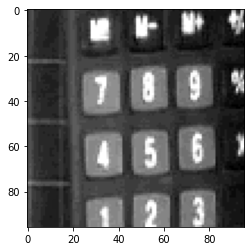

In [13]:
raw_bytes = np.array(HEXADECIMAL_BYTES)
image = np.reshape(raw_bytes,(96, 96)) #QCIF resolution

# Show the image
plt.imshow(image, cmap='gray')
plt.show()